# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

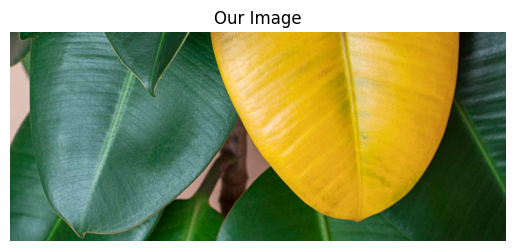

In [44]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Screenshot 2025-12-10 003215.png to Screenshot 2025-12-10 003215.png


In [3]:
import base64
with open("Screenshot 2025-12-10 003215.png", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())


iVBORw0KGgoAAAANSUhEUgAAApwAAAG6CAYAAAClVpYTAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe1P1ZDzTLt+YHvdP+H9uMsjAIYdkSwhI3cIP8Jfh+YBAIxOQJJLDFYFpGtrsb3AyycWNjYzdu2/iKG24ayefsd2D9nmc9GSujMqvq3f99Th+eqshYseaIjMyMypo+fv369cf37z8+/K3/959++Ff+9t/58Hf+o28fwMePH1V/+vRJ9R3Q+vjh+4fPpfbpw4+yW7bUkwbfv39XvWO3+Rq1j/YZWO9Hl2X34wcG5oH4Sfk+ZI+oGC3/rB4Z7Vr9S5zg80c0z7wdP36Q+/R3Rbsv38nw4+oD8k9F7nHLqeLCVV3yvSD80eNmvbMftcs3+QUPOgft/H6oafoBxTq026f8iVo4XBT18VON3x6v+j9z8vitMZTKsAmkV0OHLDoUxk9yxlbzo2R6xJd1P7c+bQbmhwXq88pmodWE2d8J+av6E/Hiu4FNCkD+DFfy2ILIdz3Hfe47+DLUrvzcIbJdZ+b3DK/OL8H0P8dur9/FjPtuf2eMPd67/YjdXYwddzH3+OBaTv3D+WnSPtpN7H6vfHJ81FHj46RxyJ7Ygyt/4Mf383jc6m3+diDVcVt6PmcZ7/q40/v44UtTxp1e6H2+poasq4kKZ3KALsXyVSJ7Bx/rejTtUk8kxt8V1BojOHLs/TTxrdrw4Hpr7Ho/6voRPMi29jNofEv94w/O1NimfKvCePmaZJdcQzjO418WowbQ1fqIHvYtMVu+VLMpHuuhyfvedPY7lWaL+L6GPQLd6LvGWbsacD7gU53w3a9zWXFdwwvuaPCpzgcTf+8fPn/4L/8X/lMf/sG//+/98JnFYePjn/3Zrz/+xt/6Ox/+jf/w/2tGBUoJFnWNLDi1OKCNrZ7DT7erWxqMB0z9Kse6VHzXGNrf

(np.float64(-0.5), np.float64(667.5), np.float64(441.5), np.float64(-0.5))

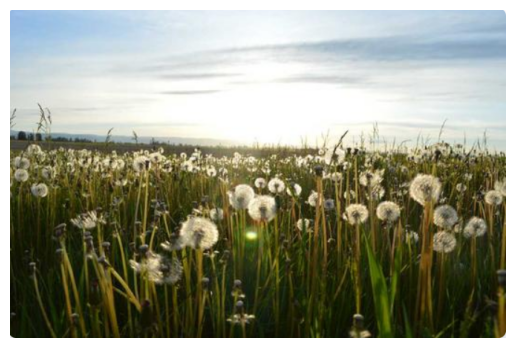

In [4]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np
base64_image = """iVBORw0KGgoAAAANSUhEUgAAApwAAAG6CAYAAAClVpYTAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe1P1ZDzTLt+YHvdP+H9uMsjAIYdkSwhI3cIP8Jfh+YBAIxOQJJLDFYFpGtrsb3AyycWNjYzdu2/iKG24ayefsd2D9nmc9GSujMqvq3f99Th+eqshYseaIjMyMypo+fv369cf37z8+/K3/959++Ff+9t/58Hf+o28fwMePH1V/+vRJ9R3Q+vjh+4fPpfbpw4+yW7bUkwbfv39XvWO3+Rq1j/YZWO9Hl2X34wcG5oH4Sfk+ZI+oGC3/rB4Z7Vr9S5zg80c0z7wdP36Q+/R3Rbsv38nw4+oD8k9F7nHLqeLCVV3yvSD80eNmvbMftcs3+QUPOgft/H6oafoBxTq026f8iVo4XBT18VON3x6v+j9z8vitMZTKsAmkV0OHLDoUxk9yxlbzo2R6xJd1P7c+bQbmhwXq88pmodWE2d8J+av6E/Hiu4FNCkD+DFfy2ILIdz3Hfe47+DLUrvzcIbJdZ+b3DK/OL8H0P8dur9/FjPtuf2eMPd67/YjdXYwddzH3+OBaTv3D+WnSPtpN7H6vfHJ81FHj46RxyJ7Ygyt/4Mf383jc6m3+diDVcVt6PmcZ7/q40/v44UtTxp1e6H2+poasq4kKZ3KALsXyVSJ7Bx/rejTtUk8kxt8V1BojOHLs/TTxrdrw4Hpr7Ho/6voRPMi29jNofEv94w/O1NimfKvCePmaZJdcQzjO418WowbQ1fqIHvYtMVu+VLMpHuuhyfvedPY7lWaL+L6GPQLd6LvGWbsacD7gU53w3a9zWXFdwwvuaPCpzgcTf+8fPn/4L/8X/lMf/sG//+/98JnFYePjn/3Zrz/+xt/6Ox/+jf/w/2tGBUoJFnWNLDi1OKCNrZ7DT7erWxqMB0z9Kse6VHzXGNrfchD3zxac2CK5Cgt8+BuedvYbHpby1S3wmQVT0++htY+qCD/L+/cP375/FTXlmrJqN7PANSO5HH3k0fShpP3RRQ/43mjyZsJ0heiwLywaBe21OojOE/7QLuGyrGb5lj83D6w2ua4F58rb/tdkduylN3QHFE854JdivaVZwl5wnvZv6zHOXjC4I7pQVTn39gxp47ZzxUQ1Trsm1qeqRX+Khm1WH43Y3b0ge4XYB7O9iS6R04VUyyD2e73jHGfRV33cgf67CzUBnwe5fO9x3ombXGfOYLZ3GbiLe6X7e+FZ/6DvcgK0OS//HgtOwB7g6P49FpzgsHuy4ASHnuqzbAJJjqC7BSfY28Gd3rMFJ0j7zCeBxVcp+rvOHlwLS66na4RLj4bUsrmFpT5/ET4+Jryrnvv5eTjGFuoaSoznUoZKO9wHHn1RS+QBFnSj+dDf2Ya8OjyPcwCPqGuRyfixEGQf9YKQp64hHucF6Mlrn588X5LGOqvju6pSo/r+nYVt87U9gxxZn/j6tWukU9ShAwc4j8vQIeWC++oyMc9nU7br0db8VTxqy6P3X/zP/Sc+/Ff+of+0/HEN/PhX/83/z49//T/4OxKqc11yIdgD7HBaveBkYIqRZFODSd8hseVknC0O216QnP2mg9khSx5/cHVwC26dgdS89Bvt3icH5K9p9GYeP4NpZ/L7h69fveCcMu687VgLprWv/Fh+GZMfn/C1xkOluz33aZbN0z5IWwcdD/zWA8SfNFIPyJ/JC7AQW6+IjrgPC06w7i5T7TkC9D/VfFFOcSW67SrB7F84Jakt4+N2FoVSr8LU45WmsoG34eh3YS4QZX744s7pp8P3fJVHvvtxhQ64WnBGd9pEf8cd/xX07kTVsaeec/yZ3ykL/e7C+ZnfZzjGouzj4Wpc75DjHOw5XPUnmP7fjTWBP8rP2N7pwo9s6pz1ofu8ohPAlD3iKtbOc+vLPEVf5gHe8lftfcEJrvRezSssjryqnh6u/F3hUQ9X5zs44MrfM58qRev2xjj/gcyJ2Ife598d6mh9sN/xrq+fwVWcK1ztN64qwZH3eGEO1KdBG58+fFdfrLvnMNun83P3f69B3g0jGOZeaJachScP5KI5b+AztgigU5u/XqDYVubaLuDFC1talk4Np8f5DR+887xr5By24h6Q2vk8cxqnck7E8Kbsbp6c7Aundh+/uz/q/9J//j/54b/6D//9an/8x/7Kf1g8ByYQhZNxLjYxfI56zVaLBboAku+e+F1HhJLpEdvtAJftuMO2fIVH7MRfcUKve5hLb4GLrXmf9FZv2TEe1T75onR7XrDA1ANpX43frsuF4Nu3r0cOwb7gxE7XDDV4Ml6calwHLDS/a6ysjCh6ez5fxp1a6nNu3h9MzO+8xTBXWgUdpKUgu3Ybe/FEXQEbj9+hT105J7+V55sLTnpXsjUH15jAy3mMMRDw1bp5Sz2d4DzzrU5UOt+Ic8YchuSZduJSPnMclUT0Z+bz8rbvB8Uv7PzZhj7itf6Onb/7u8OnOvHFlpqyLzgpnMDDC67a78b9GT2HWfnMOnh3obsfv+BVvyqLyqPJwsz9UfcaK+7ZF3h3LCaWzV1u1FXGufMZZg53NPjx5oLzQLE5jwQP/o4F5/0Yg2/f/JGvO6BNXuyP5Dd93OZXeKY373A+07ubf9Hjhazy+lH+mDNbjrvvd+cVTtG/8hO87esn8O7xdpUPy7cJ5f/WgrNo3lKnz90GlzFqvsCV1+4/4zDHAtoLzupL1ZC5w+lFpnHwzlGrcEyHZ78/vsOrOMWmB5HKWz3RypSXVAp9kwOUrKxNVsWdUCtJsZFzCXrtLGg1hiTjMseHPs+8XuE09vs4V7OGxuQWi5ryj/4j/9kP//A/8B+/X3BygZw75R44ZkcR8ZzIlf3iEdNU4lpkuS7qm/3R1sLA+TIJppp1jt12IAvOmaHuyA5g+pnbvkWg3euPs39taozQmYJC2pPPuE5MmWn35Rv96OyicfhLqXb8mdfy4qvQkPi7Fpzm0z7neuiVLy04hwwcizIAWQPhBWe3qdqG6mMJmq1F1moZx6vHgcw3cMTvi2L66HotcBQrugPosbQD0hFlXZXqLOextAXiF3/ydEe4xb9lwRlfKfMOZz0PxAYgC6CzIJk6oSfvbgFx0nkXZfLx+3l/JJedxwU/vOC6fZ3fjnfzRW/F8XjubfAz/X/Vjx3Tt8nVfmUbcF7dc0x793mFPQ62d/4CtX/DghPM9om+eYt5t99x9lF0N9dl3TjH1Vb0qwUOWtb85PNV4+xv0Tvu9H72M5w74KsUTQ8+fawFO3yE1G037dnXd/4eUJ1NDDUv7N6doz+DdxeciZysZn6Myp4tXidXfWsa8JGsHWefbOq6teV3jEHVpvpcggEbPws1I1kRFk9u2UA370hGdJ2zDx5XlbL+xrb4VOTeYf1RVq49rV5whtWq53EcKCncOj+uv8tiRykck913ugONWwXQ6OkpSuPwzny42r+7f+Mibhfw9/3Jlw//9f/aP/Th43/zf/v/OrSSRC40oZ8Dc3bO/YDcdSzJJFZo1SXa7VYbIReg+JgXS7Yrj1Ds4sU1zFlcbI8FZ7ETrV0fkLzrQLytDdLHYOqANHX3kFxKPxrRZcvCBRxjphJN665WoTuAmWRtL1ikWFoeTlkBTwenCD67qew6xyOvrucSkwXsjqsF58QRf1twEssvKBJv6A6gz4EJ2B7uiqCw2Hy24ASqu3/alhyXV6mf50bba+t2Cvtsja893c2Hw+bieJs2B535smH3/y4+6gR5zmdfcIKcgNIGkw7ycY7fC7Nfe07gKod3sdvO9uXYF/Zxfn2eNKIX+93n7vdZboD9sds8tOvB/D8m6RNc5bC3wfcf5+M8Orsu+b7yR4scX+kBeFf8M/ypfPlsDrizeycuR7Lvbi1c6T2LodJt3lJXjq0f+b5/34UWFe1D7a4nrvbFXxRmr8hg5qF2j8yRf5Vj8VWAv1ocR8w/e937dPKN3WhnfHeejg8i+CnaKt0KTZ3OhN55VH37ktMgtrp21vyhT0uVBTH16ql7WfuplNCrq4Lopwt7zct4XQu/9F1Nwnfbjtd1CqQGsQcz7uSDc/v6vEYd+h/9R/6BteBM8LtyDxySFAVXdn5G+ajtSUIiTdo9cdLxKiUUu7GnQBsP7gwn1LIf53zJRwwNyMlHJK4j0gdbm+aUNfsOtfdEbZ7ED931jp2/2uWvFxBLLGn327SAapMtEtA4dMqX7Kq4LpkdWedIv/SaPuqpJwfOizmdt9SRqb9Dl4UV4A6nOb2NX1cH0o6PpWyDNWHXHTWqQ38A3Sw4Y+/8qD99+KzavCzc0WP/FnfkUtzqozwwd2hLcgb6Ggr8jYXG8uOxYUzWC4XrAxe91Lu/p+j9AqY/cOX/GaTRC06QXHb6ClN21ntyghx45nuCPmk/t/5u966fHe/6eTbG4N34dwtO6t1n8CzHfcF5RaM+z43PEJs9l739MwtO8NLfG3M5uOKd8VHTuT26Pky6PdEKd3ruQfabqgPPc8HScvSi6zNPLQzEnzIKxxtaw1bbJ2jTwxePzSguk8PvC3m/BdI5Z8kvgJo5+Vva1hBX/Wm6+Xjc73Du/frZtm9IZNxST5g3unGDyg3bWVQVUReU7yWUvMAv02jBqbjSKLBlbjBLiOd5wjugj+hkTgvOahIqMbyitf8jRsHO67lKoLGR4rCZtmBv47AZiRXa9YcP/+B/5j/24eN/45/7D34kICfDBE79+gKIQ0p1LCP5BHsiYMYMvV+vzJ829pELuRaKlephXzhiVVkTlNbyY2TxMftr3vQHlYWVY1ueAiYNJg0e201o/JosyE+ltOvnbuEpRmrx3L/j7eEWyp/JE7LLDvUtHk1NrRrfeYeTksUU24xL7LVt3zvI5PjcZEM0d1LHvPAYv7/gtG2V1kvRncbm6YWJrbqs3Gm7j4XSO9awGzJW4MuX8VZb537ELjq+/RmcR6CXOvTElE98HLeNM2Zz7ADtdxewvKV+7C9yaRLM2Lu/KZv0d/3qwmvs/XqFV/rv9veE8jm93sW4Gt+fBfnt+4s65QrJZ8+L9u4LPPqpdub1C9z52X3+7IITPPV3TL7neu/i+Fm9wrv+nuqNFfsrf8/mjwsLj/InevLX9SY1vHeAz/hw+zqvp3fKfgPu+rpjPy6VX5kmy+SbnwUCB69DrD4VQ/vjYoyKHq0D0Zn1svuhdzap1Tr4C+G9Or/gRTc/6nyKjc4sZepFJeTyDQ1Pc79llhMjc6H2a21ZcFKfkVyIga7hXJkP5Xu8IKVWgW7/e5m6swaTBqe24uO/m0XsPv6+P/llLTgZyAQFqcGkH4GzKjWgGppnqoWZyAnEVtUdH3dcgHNoXusCLuSIYseFWPYdBwvC+ctA8XH2DexvvH3bOt0UINcCwn6sT2x0nQPY6+Dctp1R/nRRSNySwdrsiR/OEUPbRjXI/fsHj0uA7rrbpq3o9IftY7yi68lc8gJWCodf+avCtI8fe23VpnfQA310gUc7U3254GSfIDfvnJ8hm+M82oFLj4p5zblEC80qx+mieMc+TkgR2JdEJ6BrzL798ssvTZmX/IlF+xgXThijb4H0qoTOBWHygsnjvOfZDRinprYY/jmm5eMOpwXnDYjrLz8tXOUJ+BLcS4c/gVcneqFS+DQWBu9gz/tV+zy+9+N+h+XPtthN26Ndap5B2GjbdOyNt/Or88E7ONuv9s7/LQtOcMirquxMF/bL6fKz+gB2f1dA/VtdP6bHu/x2rPzO9nPBCZ7ld5Uj+jMHFpxaJPbCZPk7+3h3gZgFp+mzvwCfr7509TPA31vHZeGkV6lVhiarmzNX5d40oJ0FZzWGDCZncAtP/R16GUfLPS66drcOba5tWXBK7QoISoU7jvaI9g78Vl+perd1dJlb/xxj9p9tjoPkDbTfKmdcDtNCjylORlaKhSJ1PeivYnRbWtXGDN+zJBccNHXCnTz9PeQFxegCyr0XnG444dTBbE+dM58vvfRnOJ/YAwUniW4H9lm196ovgAPneGxMuzN9kdZm6i0fOiBlpwjy56mDjheOmGadYb8MFn7bf/tm6y+ptPIN5K8/02jTpb/64zh637fiWM0yRzB9aCsvZKsfKUb1pWZ87vxGH8z8sT7Zocez9SVTXbwqjKVrSdkIh57NCybgMpbUpzgFSO9fj/txMrr4YoN0ZWrvd/j2zS8WdKe7fWLmuB2rtlmQcKrKvgbkeSw4C8dJrsCYPIxLp6M48MJXPOOsZx0w98mOr/p5rOVn1ouuom7gh4KM9tIP8sLIuNOrhWTPqOS253iVB5j8ieNnPDIAfyTy6xG/F3Th+B39PdunV7D6snm0Z2+gcebvercX8hf5RH6lN2VXcvb1j+8+ryneUNn1NS+q7EMd32iz5QXyO4h/VyvWahOpztjtzuypt2jwsc8TO/+IQykFXTt+AsnnlG9t1ONy5juczjVA9/E4so/lx/WE9sdIcOrs9L7gxDYxQ6M37SK/wjPZxLyeazybBnNs4085pE4+ElV+VXP8Bk516aWt7YluP4C+jtre6vrj8JdApC/9VS1f9WIgdxBXkapdFe3+MK6DVrDqRz2+8i36w+iMNU7Yj7iwOp5hv7T0rfywy4Fp71OxKKWe08aMDSnvRYhdev6InCHNoR/A4frrXWy58rTDeq5cXy44Z0LIUgLTnDBYm3PAmA92X8H0GUQ3/jNBp49Fl6zJoyPjwnbSU2H/e4cA+a9al9hWpRZPq5A1QNRZcALZVvnEN9PeQC4IK6czLbDQ6rgRUakQD0Ynr3ya51Nl63Qxg/zJefU/iC3bkw395dn9Bscd0ap0fqxH1EFstW2z2JNb3r6ecVLzMzwgMpXxNnGw9uujbMJxtwUnPi3tMsaMvjQPPddszfNsNuaYAM2bpo/cq2S8AlpJ3/PqOYgzY628VgzlV5VF6Fo/umDS8w7JnQ740t/CTfxneYQOzjTb9KNiL9EfhdPC6nfA7+1vjtczZKx2/b39s3rBlO+6wSsdeHc6R1694AS7j11/zxEkBppsff+m8Kh6wvR9R/tCS+nmnV4h+V3pUENx/lP7RW4T00fq0Di6WnBeIXaHbWHSx/4Yyd3pgq8XL2h3esaL7I/FfgNJrXFOVLuaMz68mUtg3dJTy5h6z+iJ1e9aWCk48rPOBPqcN/CThea+4Iw579DWaIpecXqsVcSyvckHKBvpoe/zlULMeAJKHrfjfN9zyzrrYzwAUdbr4VNPOjhybkxZAM//EHXvL/TLBWdeEU35la4+o1BFnLWZ5IJjn4FfVV2rLMMRysIDcdYdOskA/I+n18/JmzE/4vXKwIsG6DVI0HErfXRKNPO7w6Hf9ITbjkUyUxyaGJBqJp2C+MU85NU4/LMvdAJv3wO2s5XrxpgcwBr2izfy49vq0u84sV1eSq/DwXlYEKvldhacx8KQso2B0QfQ1o8dpB0/x6ITZ3JIXp37se0FZ8cjO/GqndEDaw4sYJK+gcRK/MDnL9u/s+DcMf2tmk1yUgBRMy5IOyegO3nAgnP29ZgHrZd6X6hNP6adk+w9AIj+KOB3xvk98HsvOMHVXJm46sNuQ/v31pt41Q7gRzZ1jpg/+Hknk+DKb3Tv8oyNL7lVdN76Ocy4J/o7F9luFO70Mg/Cm7UKdLr82I1b3PlzgzMNcV87vLI//HDOSm7F4owmYuCwcUPng7k/oM/7iTJyfZrjOdZTOMF21z5Dd/MY59K1uvPgIduBPqutPKVn29DU+t1TeN1uqkM7INUXXXxoReMKHivnx91N125T0KkNz/5I4Glseao2D8xokwZql2p7av/VLsLvXE0kr25qMDM+jmdZK2j6xca8SQNo8k2fg0kD2vqS3qaT9uS/veAMkkCgZKrmn22C3cfevkN8oz3vIhWz6fPBAtbSoHCjR2bfSo19ADdauaPmWE1nYaAF0epTkBz7/vFLzAvbnrvb5adOtJFtKuLD4tqteiiEzlhNf3lMJBP5lF/bBZkYWidQSw+qPPE2PWNd7cSdegdyZ7pKFmVT7rjIdHpUmzHSIpFjPr5Vc2Bl/p37siNvsWSxOQu22b9r8i+edaquNl7g6sPrZj8g+0J0275ecNZo3PjbcfKx+4S04y4LUw/Q3i8w4KFdD31EpN2dThCtS025Wqid/Tkvz72Ue+y53OFdvXdx1Y+/CGQc5xiDvQ3e0buyu9J5pRc645z2tF37oOrxGc7ppxqnPb5sNrSe/EvF55Zp+w6OPN0QDb7zmZisYAqHnhVFgzkPlEuXU7vzGu5eYvpIHdqOUp7jmZ85trmxNXHEK0waTNvQV/tqt9vxSh5c5Qwt7uDx4gPd6FPv9wAR+bOvaS/5tAO6g7jxgtnv+dbxHdBTzuWHEt8pB2jnOjj6lju68gGBHhV0426O6Wq1xZp3tYODV3WrnXDYklc9Z95n366T/653qqt4Yf9cD/ymBeesMZaD7e3Qw0/V0+OyK/02Wbo8+8KGXckRxcN82zyYC874mXpQ7AMWnIH94tgXY7XhQ8dWg2Sj+AXWqfabC85pC9J+4Gv8nEj6CxTPbMF3YI34mItzWIyt5137bOiQwp+qZTvB5Dh4VUmvEtBhr7GxvyOv9nPgWHCyiDF2Hdr6Z5uivRDzQkbHfMe0zU8uOLHlMXy4wLf9mvzPF5z6If7mgxNNGekoRuqpVzq0iDn/2vLOL0B355312RD8cd4Dk2f7iTvdT/pnjDk+RvSpKfuXhh6BPR2/uAJeYObze+Bdf7+33rtYCxyfoIO7cX+lt9rP9XKne+LKF/lRR7brAOXGP+Wg1zxwpRvoCOkuHXptrzYvaN8Y6nOM+z6ru3Jopye7otPKfI6cOiV60Nv69SWmv9ShhSO3106n7clHg/3Bl6R27Lq00d3ndNo7P7jyE1zlc4XEDmYe8tC0vo1duqdSIuoDRaa/kx968ua8P/kozHzeWXCCz5/4LOWWX5eJeX0A9GEfX1RYX83vC9yBq5XqU8xHw7ngrIimA2yaBBnX8I4+DJ5yvtBRPfhf9QIgLeOk2/ipz3AGUwepSl1g1AFxjcMnHW+TvQMBfFSoWfCcFlbauG2fiYqreOpdsuv1np8LTqB4MS2CxYZjh7nAZzjtr+2g35klhdhNLF+qCjUeWvwWOdSz8BO708oFa6g9xNBnTsXDaE2E5K7FvDjDVqrrpCDdrgmuBackC0u3Sns8YrUy3POiVoGOBSc+vNgsrbroHP1r3+svvcCewUBOGGWW3IkrWjzLjgUxvPaXWMltwvYuAX2jdTqQ0EnduhqDY+xVCSdfU1DY28HBV/W9u6sAVdzH4NrHnQ51yb5d2Sw9asrPLTjd92e4zvW3411/v7feu9CXDsa8AXsbEPcdvX0hOXVMur2bnvUWnbjP5ODT9/M/74CTjTbdLpt9FBWDR6nozKIFJ/ptc4O7vEyyIVL1Qa9TdVaPUJg2IOcbm1um3LqoXeVbPS6u77ew6fBR1YpNTs7T5TlmLmDS2R/764k7/fR34mqOP5t/d76fIdeDQP4rrOpqR8w/vJVTRq7vmp37HnytC/pk3+UR/p08fV+/4/wcHj9yss9XfoO4n/rM+/1LQ1feMCWu4hXNl5Vic5hWAGJm/GzlMr9gBZBe/XPRVV/SD4ssVx5FOh9WBtkfb/h7teC8wtTB2EErYLETYurc+UxCyKMjump9iLfx6MtRwezUUFt6PdO/X0woLRyGHtTVgvMTsnZOrfLml4Z2xA84YldhwUkCQ7wWnKQnKjarDaZP+4MXmskRXudedBb0h+2IAeBnYerP58K1HzBjxic49sfwl5vftqFRpQ4Mva1OnDqYKCw45Wv4Xl9+Aqkf4bcI4t+x+WtJ+6t27S5leYwF7dBoA9pnnvKSj+hgV+iFa/qrsdr0iMW+A14YnOfRVe0T2hOU2sd+cbLf8T/Fblz52/U0Lt/u9ahTrvzNY9BgLsNLucfL/v4k/v/F3xyzx/FbY/9KD97Ov9ZrovHK5srvxKcfXzxvCq98BbNPR+HR55c/bsEZmhh1ZPeCU/SNDXg1zlDkyK+wXFxCbhEfszbtnOws5TWW/TX2u127btrpL5j0jn1cpj/o3f8r5Fo2wYKLOHhSab8ULTZ5dHuCNj8TtLFvEfvdT/qomtPzT+Aqr4njONdjQXbUzecO5/Rz5ZEs5/6YsVUfcynXGRBerkmWB/qr6stoZ8y4qU90PYj49St704j8Ci/PpgTcyyOKPzo0da71H5OabSg1u7DmoO2yDfYB8/ci+5szBezSQsVtFQ6AXZ92SmOy3i61mTRo3jF+SuY8ntbp0nCuVWqjDy8fxTzL68E4HLrd7gJSS/ugjdgBRU6uI499/6YdNlWOh+nPvqqXreicUqcwlWNxWD5AftuGseCg44SlusrJp00OetruWH1xnpxEKGlP2RVO+7Ai3cX5rdhdveN7z1Xt6/SFu74Fe8zVx5Tn+D3H4y87GMur8brCO3rhXe7TDfDeLcGkJ0rrqd6d3QQ6KQJduRmLiWkzfawiydG+17Ps6hwxgVZpu/HnAnX8svhKtK5ITvlKxzcHUp6105MLV5dl18vvhk7eKyTmRHlRrbHvwv4/7Y9Bh3/I3oi7I/scTFpQk83zQtyUq7Z/bs23reij2NCloGuSSvWDmv5Ubd0ai64fSuvq7ffvFNNur3HZ2xR/uYnCwtZtFXl+DY+1dUMnH9em33T3+g7nw47ZoAGhPHlLPaA9kw+mHjSFz5SdrevA0vLYdjFZfu79gZs1Z8MHLsgrk4/l9+Dhowptk+T46q3Fe8z8gO9UMd0MSRXPsLrbqM6xAzKfKIbGin0ydDOiOfmAI5dSa8q8Kqp4ICh/maQnPWpt3T7iDX87PjG2JdQdzmpjR1vuHoySP3XoR+gOJ7Xi45/flsRv9VVfSOoYw0XuEGYsZowsLK8WmRWkdtc6+IB0Wx495pDd9UEJb+ikBHtb2JrJ0bkntqqC+ziR+WxEzsZjdAT4Why7E5JL9NPOl+qWLmPgWltV/Zb/w8R8hHN4jXf1zv39ORBhz/jK35XeVX6XelUOXhEcUwevBi+y3d88jic98Uzn4W21TZ42dUraO8jtM5/hbFil9c+blmHjGkRMb/Ffl8N6FK2PYTzHaX+Ubbs31K5AdbKva2qBoOOc1Jh9yx2mOd4PY1+Prz95h1O5dB/dpNH5VXn3LVxywXbmfEb50n0j+zUce2G1bb/72OHj3DaxdQ7Q08caq+f9eRjT8qF9budH7Z/X2UqZRh5cvWN5h9juPpITtfdHyj2Uj4kegbOFfFbp3pWe+V5YFpccho+vfV0A8K66xXXkhxaMVUvJ9epPGbVhey4wL5yLWl0H1oquKekPnmFeYuNfLzrQax73SnXMnUMUHhjvLTj3HTWBRNL+0Df09PHQUSX56A+96Ir+7u7bIbzYcHJosmBfyx+2HH5tpja7lPpqZwKmR3wcORCnfCsXeFX8FnAJ62D8pAXn2eGV+/Q1foNzmwyrVB/dTWLOWpQnnuT2aW7RdCzjQ1W0ThiZ9A1UiMvCSI9zSgXztDBFR3oFLdbwY18z99DhzH2blHagq/83x5/qKh1v9s3jEqB74/AB1lsLThaMxLDXCfq1eOhTs2DCxotNxtIXupbXAceOoK8sJJ27pKIDKKe88o7cNkvfFSOCbvRhzjGYgL/0vH8882cO/uOBRz3X6Fn3x9dvrWaexqXmuGt4tvHCJbZF6cpeeY/9zrzzumDx7nBaQDzB7NMzvOsv0DAUOIT46IfOEVWrqg0fywgP7HrhMdfEK+CTj3gfejc87DlC4VGD6O39zfhqfpi8xNJTQzS92cdl7i/00sqdi/BOegVlVbl9rsfE1Js5ik9/bHkAvh4l1sWYF8cxKkBhkTrQlzYGAz/RkzNapeDrOBIrX+UH79dff7WPjHdV5Eo7LN7q57N2+h9sM5QD+0q1eE13TS6EJJZ4PKpGry1GfQ/ycO7tT/RC8q49rC0gluMYq50Fj9hPEb+23WO7Tb1eyKB/3x/mX+ypswCDnn16d8FZR01TzxEfQehjfxe8r3v8tPNMHvuSZtNz/1YSorleSoZe08TRFOz4umTw4PgafH9JSobmX0B2X79KP75ibzhyMPvmjKpvlTiUWWX3o/aHTkZiVM51zv7+ac3xAvOez/bDU5L1/M6Lwq+uFb6a+jrLDHngcR99/Mf+ihecvxUYawdUJzXQ4r4H72iX4OBpVIOi6fyDc3hnpi6KsNonW/LiE4MTR0xitX83kwvtzTfxqnA37cvHL/JrbRO4mH0B+fbbmhyeoILM6C+T0Le8kejVFs6q9vEsrVr3MckqA798F9+/Z7kmlA6contaH5h53dGAdi6K0Bpfcum+Sx1+6+6+Zj9PMm1qizuR3k9LAx7+iCEN0boASkrfRQioLL1M7RqL4ZB+KKC2Hh/vD3jdF7jV9B1Q+5K/0jvlH90i8MBY1EZ3SKRf447v2MHDhH3JmKAnD5J1YVcdum2gDftUjYL39RxXyMwB04yN50EWhfgtyYfPn38Rb5lDRA8dRfaCUzJAboxXFpzo24YLObNLoG/QzNOkG9uj/RzvLhD3H46+RMXUPxJ18xlO81SbHofRBrw4W6Oy5DtP3dgENVw6jp7xNC+L1iwPr+RcUKX3ArMfl0CMa84tVcdl7LQdtOYp7R6PW/BCpvtBH4JTPkXqzv4b/QDDi+h9XOb4xWX0MlY63kqqeTriHv1VZRoov9U0hp3h45eLLKPCQznUnNTFFvtyzFFRZwDFcpjiVeFPQvQiAh6osVXcAR+L97jazz53cH6pftT+PeIKQ7/IHlHlIPrgVa2KUVtJMqZP0TvBC7XyxDDikxzscACndpwXNMmVLXT6f7fgnECXO5yxyTgA9GeMd0E/EifjoDFIjCpc93/w5ZgSoAMvLyKzN7EhNy+o13gor0HXRrW+5BM41APsp4SYabzMt8RVWH4HanfEPiJOZ03+6m/V3Wl9fro6o3cZcIZPeHU64P0HK+16HgO7aD/dLxcxVKvP5eB3W3DO+hXmREm987xYAEXQyUJXnbwoDSWwFROhgc8mnVcNcLcTA5geMQ4Z7VgE4bFw4YRrXW2PeK7jZb1d26jc0Vj9FbM4XPDZsTMmevZoG5lXycLUWic9ExojnQyROogwaXDVFqf5NbVqy8TkTp4Dxka6gwbZN2mDSQNa+D1zrSddPaFrvp8uCAeBsnVqAqD3iaHTBaF02vFpDjUUo9o5AEAtpcxXsc7nL1m0LUSHOafjGmRM6qE7x8h7UqKC2PvMPMBJQQs4LczsKLVPGMAGyXPNefP8wiO0dRzRvlzqBc9n3vr0QW9Yz+GiV7yvDKAu78KSQ3ssoB0T3QL0yR+ITTdf4HddcBZef4v+jJkmfXRvzvQ7eLMbD8h+1Th2Fzlf8QKZ+hXmvLgFKnUcrfPFstvtc7Gm/09RHW4P2oLpy2TmJnjdGTTRwuagodqFqhHjDpxZ+B3OOX7JY+YI9oXfNfw5OJaUcpmx0TG4/ELxwhOW2s3LIhjEXgtEcYxX473nHcTu63f+Qcg6j6rkYkrzunOb/B1zrjyCmI6rd9JK1z67vhxSxsVxj6LHGXPBCURvQ0Mf8pZ6+j/7NW2fIbZAi8mmxa02NbxoQecOZUc1UXHmnWPOzfxMUOaHC3zbKi8KtLYrxg7plzDTVN3G/LAsjLazbhR5ag+o7/XsNAo4YQxgyKGo7/r2+XmuYnRqDxx9rf6f+27535UFJ5gTJXUK2cG1pDxCxLEyX1Fynrd+86th20IR9tYnyI4XOH5JsnA4iRMnNfDJ+NOn88+CKHfqjhw34rVTTbRC9GQjkS4v9WBWzVjRW/rZiaRrr8YRX8ro1SQxQ/IguQR37cUnn1qu8/NExQp76u0+gp0/fUJdWcVfdO8uCJFb94fe4NP+L7pFY8GJXhM9fuqXzoxj3LqmfPmFu3tiCVPOmpB5J1r/gV80m47nw/bcR+4Wqi6bo1wuOFUdcK5rDDKHvo/fzQwviH/wbEFnPXIre4Xw/MNf7MH0N3EVN/WF+iV+zwUncd/21zXY+3bV11d4M+wD5hiKrtDMHL10eiONfR9cgv05fqfxIebAW/4AC42qntm/7asx1e/8vuOTcfv+rc6oY/zu7F8vONEf5wwVgPMagwe/67g86kqE6phXVSGNxTNgg4/HOGfwX/RTdqW3y+98CZeyDOgYWPqLr6LkU8fpGhdotPPF3cRVod2jEG3xJENnySc0JorRjILIwVjxr7Ef49+3duS7n32+RK6cVWjMBafED3rBnseOdic/M/L0Mem3QdjN7MpnPuMc7LEeZDxVMh49JgpY2z92wYkfX6aqMDBivkYG+q7+dBpeY73qWlE4vGVSLKYh4EK+gBAJJyD7Do6dLcdtu4IMcHdv2nJhO99JQU7Ysx6aj0gIdK1eC6Zieued40sndZXsRHycMhp6tSmdLDglFiTbsPPSXnzn5AXnyg35o+4ZO3+2e/l/wvSXMg9wj8+Sm6b8+PClPIYmT0bDcwO9ZadXqPhRWb7PPmvB+cUvAYIpy4KTV/dffukXHuyXOsk4X/vFoq10R9xvP9mHSs/TtI3Hef/Dv/Fywo+7f3opLF/k6JhTZ8odm/1bOn0kW/WsH5vUe8wg8nWn9jn+2AVn4gXv+pvvPOw+Zvuunzt+64IT7DE4brmD88759PWCqVBOPtX4XfVl5+1jAS7tWHDueb9oP0NUX/l41d9o84JM579G/PysPyM62Na5pcdoX0QZayIcfOmNZNSsTZU9HzB5K5Z9pexgwRlEftIrsixPsis/waN860OhzgraTp/+y8Wzntqw213GXPmodjn1NbJTDgZ6XM+BdLvsuJrLd9gXnGD6DH3Ho9AvsWp/a71Jjkv9wPRxhZO80vJ9dfrsMQlm/OCZ7yvZztt9uU/PdWZNgpC0V0Hg8X254Hy10zDOiTH1M5DA7jNtbZveF5zojPVOwY3P0tfrHbHki88XFGYcliRYUGYc4EVKNy7iTl5s92+po3e34Dx2RkPh8KEGvl4tONExnZ14Srkw9bzxgjPeZl6T3hHZ0nFOVwvOWd/hTu9uwYka/YCgvY+d+t4y69oX/+TjRUTpV57I+TQfNegKB6veFpypRZ1etBiO2QtZxqRWGdwJ1T7hgt4HZxaIeotddny+cy04gXxVjBmX3Nc/K004zzUWlYPusNv2GeJ/jqNiH3HZ1vjVZGHBebxdXshYB9D7Ajb18jf9GtMH2NvvYN8dVz7g/ZYFJ1h5n/lz3J5B55DfAXipGVR74rxgukM+G/wMOleMBfuzPl2N65V+Pq4TTJ0r/Ve8kLve3n5ngajz3vfHLxfNOtjbj0AeHY6HJgv+WMvZL9eFyRN99ZvN45/HQGzApNkf8TMLSI3OXHCCs562oo/FXvOis+N6nC/60WOwYlFf6PWEmXp1tjHdhX4c/dVj6U9ojvY47yU+Dr0N6FzhtOAsFaJH19XZLrwZW4szvbArX9yQqnqe86+w30EEsw2FO80rPYzEDB3svoKdf9fe+Vfnl6mz26mqQvvE44pZxO+24Pz4xoleupnI2OwXzMnrRWOgiUTCWz5ZmMKVpE/8ux4LzmDJyha/3TKSX/yoOusVnUGDhyR68l3CQ7fgAa/cY1RQf+rBjSDRJcwOmrAe/tBZB7d5C4de1RasBad4jUlfIfKlh4f7BefEne9Hn7jSm4YqAfJVfMcyyBgC+UGHR+vwzrYXeKVTeVqWUiyraUEiexZW23hjn4UI/yyyI/5yh1PtnvZabOpkg0/PoeWvP/PbOQVzwRmc/1kp6Dl5oPx9/kX1b0X6Ynw/FpyJfTcX5z/l7DrxZ98iD0zZb8HdgnP6c9z3/Gc/gytfwdU4XOH3WnCyS3knZv9ntDu8s+AEV3eIr/o7eXf7mfa7C84rH9e8JhpTBvb2M+i89zsvOD0ua6fQzoLz7MMnhFO8JwvOaXuy2QBvLxOrr8iGPvm36tnurAe869mweMpCiPbhvFHtuGnYl/0FXmzZVnw9LU9cjSPtKhrj3DlHHr0tPHr8SozV7Ec2DeTyVZh8kPbO14KzA0Ukv2QxVA+/4hO39ep6ot/DFl394rPk2u8r+dhO5Pid+YSWL2qZrRegiRF5EQd/xqA9a3DFA1c6IHc47+TgLGNj3uKzT5t6teDUiflioAL5l8pzvSCvnK4G/4BO3k4retT5Rvq0XXdCa7A3m4C2b8HDX7L9InFa9LFoadWZQ5Co8XjSKRdLs3HBWwsS7M47NcAfGmyhsyPNWzjrFVFXaOU4lJJjEH8T0Vm6Hld/G/7cid3fFabO9PlZYdtnAVnkoScPJNcHPWgtYMF5v0Vufo13vzDSXGEcW1myLkA//7Bh+evZVDQf/lcfSC37pufVef/qfmvTqUvPZPOwP8e1qv0tkIdfQMXXjn2srvazC63KWWHX/tjtAfR+h3NH9GO22tf19Z2UM9CslwluFO58Af3awNC9w9Q42Q/6fTAW1+PxDmZMeammvvTS9B3YB++MH472X/MAV30Nb+5f6L2dBefOn5h2u96jbhONR/mmcIfKq2Zzbd5bcL4G+rExvcbI58/pk0UWzVO8iwUnH0mYmH6mvwBe9vWVPHcLQXxFb6f3OvScD9+/+2d4NKAPk7DaNhGiR3X2xfnFfZ/zNDqqS8+ttukF59SZ+xGg94lfiZk6TQdrHy2dWYODp5Lzmiph93kFdGY59tHxs2Er+Tm+wYwReudxrOGWcaA99WYb7P0GU2fnT1zJvvbPMU08bYv0PlRTNTk5r1pw/vtn6w2v3qLCmIFA76mjDfe68igqg0eVy8jkCcdbkJxmOBl0s2F9JPRjCR/1HNMDVKXk0aFek8W1tQ04R156LEw6RtFXEQ33PHGCQ4dH0ehQzFs46xVRC079hEHQ8gB9sMcMPzXw6JXe9PcGTj42f1pwyt/yic4sYM4/9bv5s4b6OOYBRVw/hVbvNtLMF5TWYlP+qmjsYjyALHc4gf+TtnCorz7RVsGnfmJoORTZ4zn55VHbM488mxRo+IQm32fhMUfALgvCp2IcPvClkm1/gKW3xgbs8yaYfoNpt9dvLZgKLNeD6SM02NuvMDV3Pz+P9/qx4yFWNTUzc4Fp9h0Yv7t9ERBhHrrP+hpf0yf0zqe3xRUNpj64sgF3fGe5cJY9tp9BC5Qf/tm64DrmO0A/NqYZM7uhXv0xsnAxT7US2fonlu3VHn5Sgyv5FbLgjN4skx9M/oT7xs/1zDvn59zVbjNVtTlq+ZvHoWl/mShyAzrfq5A+ZMdXaR0h7gr2Pa4L2rT/0OhsvFnL78Hjufw9w5FPI23le5TaH1d3tS+wxunRl+h6cKxpwdntFcdFel1rrDfe1AOTBndt6vkOyis7QayVAzDpftaC89+7sFp4teAEHDy8pT783iIDfJnsA3xwx4a7HKLr7Nms/v1AUXSzdX3yjx2W+4RaMug5OEVvnwFFvmjX+cB4AB830y+Yd2aE8p+FDVj61xcO+aXuvqNDMW/hrFcE70GqX/a54pzpPWZkUwfoy9hjnMBdvjtOsSnlx2+Rslk+0NvLvuAEkYnu/voOLFg+V7pFlI7s+20PLRqr7LFC60dxN8AHx4Kz6nzmUnmIAp0L8Trnz5/4PcylIfriLiq2Uw9kfi4+NRms3COjbykg45c2iO6qS9Y/izQ6cfIbmjJ9hY4esF43CrELPevfa8G51y9Ree+6V7Zv+8s+/0lc5c2IHnc0zLrFu+M3p/NVzOC4Q7Pt4xS1q7DAmTrgrj350Clpg/klzKkPZnuXXUGn5j+XBec+1tzNPPcln+0/8cfnDzLm8w7xtH+nnog/fkAcoHNXQPQnLzWIfP4DzkInPTA/xwpE12Jrzi3RY/2q2NStIjn0lpt0hu8DpZfsZhxw2LZd5JO3067rXHLRv91/XuDdxTWNHqsRI/xnWLarVoGuUBpnaB6RjRKbYPKmDph0sPPSvrPb9Y/xEPs8J2i71Pb3WHACfWvxvA8egPjT+J28PekzLEtHqL3gLH7Hgff9q/+TL7vX+o8X7fkZTrD8nnPw6wlPKGlQ54IPh2fx9uNR+qRmI/EA/1QCZl/9RafWkn/kzxaciiwaHYra0jCSr3QhbhacqYM95qOex9YXhKuT0DX2OCd/FZMvSe1Ax2rULvqh9qpnnvHFVnr14CNR4jKO6XNMLJCPb7/ye3WwvOhMHL0I6AUncz5vqSdu9FSwbR53OM3DpwKVTX/+qQv0ly9/OOQAm6sFJ7aSDTD/HnlewKZMEC9lfuZyYtrRH71w2+bLSWe0p7/Q0QPW60YhdqFn/bMLzmkfGuztl9jGZPcVvO/z/WNjIv73OHyGUxeabt/hat9eYX/9RLzHvnFH4zzvqff9TakZfrQn9nYQfuynHuT++6lTf+Kd+aLrEG+pM2cYw1Oss7/XQD/5chyK2bhecO68/S11xn0fv9ikDa7awZw38J8tOMMnJB85mbzQCz52311wHmpy376OBad9CXPBWYWzNJCeipqC8kq951d63BX1PFhzOOOwl/mCW56GLFC7FojxBabfia+sN4TRt4J9dqNk+19vJt4ed77AmzoHXQ/1lBcy9JFHy2eR7kanvuLPfu2yib3/U2f6WnpVF/vsC5nlH/9b/7wXnNNxmYc4A0dsIFWFLm6CUovbPtPuesa5A14TB2BD4Z92AvHQGrd8aSenwB1Htxec7eOURvvCVhO0Zeb9PM6u1Wv54geAaZLCaRzEbLox5VinpbGuQnuaeDxaVwSL7pV//J3iFvhh9YNThO1d3Abt5w1/e3sHuXM3UgtE7RtK5xxUQ82q/c9A1dJz6Elnta1F2xcFfoB55ShzwS9QilBfMpYlVS7wi1TBD/5sGVpF+9LyteDkYb0sPmSJ33rqM5ySGaJrH3l+GqZzBjfib9ri+d0vDZ3tVnvxiVnjUAtO9asuSMhSkl/qfWGw/OyxVr9AZGed2k99QXiFqwXTrHfs/Ie4N3Z3mPGmaei5H59h15vtg1aM8zhfAe3jS5gFWbePSeMv/3gWECvx9pwmrvKj/sqXStQy3vEF7vXO++NOL/vh1o/EtaCrywKSTSo8xn6F7z1Px1jLhxecE2N3LFktwB70KjM44VNPOtjnLdh1KflnGzbTPogf3iqv2SV69y1fPMp8LmAn3MbOtiyY5EcLrPibdFEllx4PiZYMb525oHdKyWMUL06XLf5Iw+/Sw3TOyg2bbpsPT897YDPuQu9wuo7jb5XTfg7fksC1c0hhHEKDtMGsj0K7QuuzweRQz8iCOxqkvfPneXfqpATozXmy+wkWX3u56YC2edcLzkHvuAqoJDf7lLRn/Q70ZYxhBzXv9LiqXI6vc7I7rgejtOvBAHf84cegbWrtCHzd+SP+tH/ELmV9A099abcnH9xuG7DIPNlpy2SAo6nX6ZG7c9ZdOlHYM34OtMYs0oW5P6deioN0Gea7r719B7T4gg/DvL7oc+9vHhjwwp81lG7oiseLhpV/5O5DbcdHMBgf+s8wzXHwuRM5ta3jSzQxROHFJ1w/rMflBKhdBdd8qzL2QPSLBefS/30WnNc0Mat8Y04xZyw7x1vY90fwqL/69Uxv+nuGq7eEwWPcR1zpv7vg1Pxo3VnHPPXcj8+w6z3uf+Pjpy+H7zugPi9Yz5Bxji71FT3HKogMhP7aCxJwJQ/uZLteRe7auNOlH7TDe/CDm+rD/sPv4EG3cMU7A3l0Fm0zB5g+5ketDn7f4Zx6rG/SnvXUAXf7YxaQHyFIO7Xn6vLxte/QhUc9bY5CfuIuX4Gbtl8yDBKHOrTBPAWn/mBS1fSvfKpOHiAvbWxbBbtOMLpg2lzxbiEn+F52wWy/5asgd9XdaMYmY5B2/E2fO08vJJRazSF3+QHTfkdku86r80Hw7vk5Nn0VPPaz+X6BAC4XnGBvB4fjTc5QIoMf2aTBbnOH6novOHlqoxpzPKiGIJfeiVjBChLKMator5kZWeC2B8bjC4O2+/qAEj/ry0nSLtb6paUOV09tXAasxoZ+0XfT9IPxkYl8s+FVCNp+a9gCFilSKHjsFlZ735+zPnJVxIzz0gn29hUOvyp8h48+rAVnMH1B37VnDaXxFV1+a8HpcbC+eCiXzvfjjjj97kIFxVjImVqaMogSK8DfcRiWCLEX+9GreJAcD2aUnAWEW4e/fks9+8C1eeeY7e8A8/T8mdA7PMRsrDYxy7/CMmeo7/Vf+wvcp1d6P7vgfB33GlMPmtYr2+wXEN1ZQ1KstnSfYfoEd239zurz9BRSd1y6eQe56bzjf9Z7Dunjzj9s6sEChzq41d3qYG/vnb3Tf3fB6bfUqxJzYdfPIuAe08u8G8V2z7mJ5ku39WZYyF7fDH/3fZrzdNc/2u646cOemnm67K9+Rmv6OvxxWB45ugaij3bHOzZbPw+6/GZFDDK/KKWkYgedK2dYt6XTlGo3qmq9DnLKvWsw9+/kB+F96i9h7j6or+yeAf2rnzWDf31sEaOpIiITXXVfEfT8uUyMGSv0szkVQL97fo6/PrOKXn5dwLHgBDOJ4BUPGse5pb/LrnTfwfePPjBiL19lGneui3F8aYMS3bVjXdeCbCw4wWHfOPT39+6EjVeqV787eqzvJnrmJXLigElLQQ7Mk4ic6Us/nAeLy6rraXXk5OI+l1QudIdzz7twijlw9P+mPr6NXZg+Jg3m/p0+DroKbw64rAXn7mdvg5OfvWY8kON3v8NZOaGleXp6geJc9znpi0FdXKp+HEFi2Va+a+gdtxe5wtrn4XweP9SOvgnrzfh8lvdw01gvHAIWnMvfM3DCOOI19jb5flKnH+eM+tYleO0PeHwmrvR+ZsH5jr99X0Zn1333Dmew+1m1qsK+j66x5wce5l81PS7Pc8Tu9YLJIELizHg7PcdpysBs7+9A3vm8W+AEofMuzcTUA7R/bsFZNeSmO22gH3w8IGO8vyOxDULh6g5n7sZNzH9qmvXZ/+MxBKI39T/27/x28+CDu306fZwKyfb0i3axC2agY+A3vh07sr1mCEVv/YHntUPrFcj36twrvS5OcCFxltyYNJh6AfTn/pm5KU9JG5Db1T6ZQPfr+CvZ6L+y3WOl9t3w2mB7by7gP3bBu+29Bq/6GhzXGZk6h+Uvpebzzy44aYfnyjSfBcTR5F3pzc48AwvOPbYWU4qyDsSPvRCiVZmJnwXntP/4oz/D2bDMJxKrtb93FpxgewscPKwLQBac5CPKmLkJikveNNjQ9uJSlvLNCZd+FE97sEjJ+UAxNZZtc5nMRdyGw1q269CcP5MR+Z0vMHVmSe7871NNS5XoBSbd3id/9B7qUpO8/M0Fp2UeG5ALtONej5Fi1v64OunpoCmuxr/k/MOR4/JwDse86oKqF5yRdz3eUl/9tG1w8te2RRXtC8wrvP7MJXH5mSp6RZzzCRudWXZM3lm+fIA7vZ9ZcE7c+btagEV+ijvoV5h24Cr23fH2DHOcJ228Ny5Z0O05BuF/3RZ+j/PuGnd6+R3Jyb/y9WrBCWjffUt916U/8MLf5X0QfsgPv+++nrWvgTw6i7ad99HZ59oP4V99PnD+DmfyOPtZ9I6pa7oy+czvUi673T7zIMdbfFA4Zg6aUn1kPstDxrAbkGfEn4vp5duMLkHvQ0C9LzizD1Ua0VvH9zo+ZDn8XWHXMbl0c4cTzNwCaMbw7jjbwWX/yuaODvaYjIXOysyrqzXHCx/grv1ML/SV/x3orPN46Zcp9qvQNq8WnH97fvzyIcBqM3BNiVhtIMdVn6xL4dQuoPcMSHWiGIbJgc/8BWbViUot4lZnqInZRfzDNhdoRYB1yNQu8mgeuM912T4CSa4/6a9yEsXkXrT6ycHddyTtl8KdLnIue6VXj7rq6gdvkYkH8M8oIENrLVITY+Lp+JfBtVUdQP01w9nvqzGYCwj1eRTzqlQOn8sfdznZb8HZHzZzARE/3RIx2nwzUm3G0PIjpuQd5+g/tem5mPH+KNvqxnf2i9lncBey/XzSgrNqbBQfB51z6TgDclif4Uz97C11cOhpLoQGxMl8fo654Jw+Fk1M9gf7jQvPygmdvcz5QzuYtPGe3m9ZcD7zty84I3+Iu7Xv8CwWWP5Hgj+BOZ6Tvlg3/1G4e+t9xtwR2ZUOi5Kde9eXiTud/Q7nvZ7nYHhTJrA70NkWnLGZ+g+2l0Aneou2re+2nuF+nPgXXxraF+zUk36G6J70X/wQOmDscj6IDsfLvuBk3Dxf4ElbNgyu/Tr3VePPBVXTbqhq7MeP/FOXkvU9r9h/j7o+tqULo+aLzq42OxA/wbHA1haMnCDqqUj1osAhHXeFPwhhz+sO5ywIZc5uT3vPGYTHlv2h833Vj5pnTF93NKC988DOe6e/Jx2Zu40v7zNosT58/G//71hwLoOrAQlC7zq/J8jLF3011Xa8ml7HYEhLlC/0qPviju5lzvpQCmXZHnq9SBF52CbWz4Nrz8pg+WTr4pyFIrTYVCFmMaRPf6D1RKnY5OlF6IqBjRc99oueOJLuuJpk72D/5505xuDoY9U7nTaAZD9+qQWn99nK56xnei4gpq+H+nv/l3rvy/ABVObO4tI2z0tVQ1zsP1dm5Wtlt6C84093UzMP7eVYfJRO/PJCgK3o5LYtODu6yYF9MYO9/2ko3u/BCXeOBXhs+w6nT/eORU6OY91J73j0R/uqH496Ka/AEOxaV3bPTpg7/TrqtCHPJi/w7oITf3uOj23m/fv+gmd+eQfqHUybOxrM5euzuDM/cOdT38J94mcCfmQPOoQjZv8O59R7avcUXpRRB7Z/zNnnZ+OQXXxp6N0FZ+iM467nUg2N31kOJo0PzgfRyQLuWMi1Lvv2K/8wU3R4gdsaZLXXfKYWi9fjrptBjV5KsO8fMOdVdFkEA3SaLFt/RvcK8YX9sxe0yqvpj99WfxJ3p0F8v0K+bR84d7cnP34nTnaUUslnupfEmLog+zJ4hwZ7O3j3hsBhr2qNlQu02x//O//C+Z+G5gDMAf8LA4OquM49yXGRF8i8JeQ2f9NSC4EtXzV1MS2f0jpD+nWxiNnZPtHPsMqFLzZtEmn8sQ3N3ZrQtTsqvYr/qQ61vmhZVnTlnVjRPhaccKXOphectUkv+VkggR1uytja9vuIk00huYHkHsx2Jmh4D7oq3z98rjI/wxlMu0zYAN7uN/WnWnCK7n0pXUkK5SP0wVMP4XspeKAUNF3qgtDT5gHoH/ORunTmglN+IU9xfSFKvhY4B1FHP88LA6tHFnvG4fwRkSugu58wjviN+PecXHHAo+65De513vP17glt3uEEd/4yZ9Le9QC8R+4j0OPjGeDYPRdwiCcKAzPPib3N+mbn7VA/Nn93dS7a72DGvaOZpTmTTD5Ie+YXXOsunTtfE/DCf5DjSjF5J8iI/izh7/k9Av3v/dEAH5ux72CjTWifHcDB7xPJ1Mu77OFRTzqYNLnuei5F91ls8R59zblCYXGyLzbZ8rKTj2AsjuGPC9CuuipR+JRK+z42Vc1GyfUo/WPMqTCPSkG/flDtyqg5y8PKsYwY5/gZiE4wzy9H3IHw+MpI8lN71NNu93+Lspm60Clpg1f+aTHsXnBy1TnbT5+A/Qke/Mx2kafx3XRnPmBv78A+ce323B/cJ8TH/+6/+O9Xf4bDzfndBeFVks/wTBOvHmBP/Il1PZSWKH5fzv7WxX2hdGDSw36VKZ3K9dAVjZ798Vkid8VtowdzgIUfGvZk3e16LUnGxZW10UubRu2uClxFdzl5IrT3fpaaeT6hjXhilwV6tfGj3B0nPu/wVQMTtB8WJFX2favQAXGk1VDMhZO/KRjgoxFfqs+Mu4oHQ9jn0cxF/Wu5+ypC7U96S522WcjXIgXC/e/1Q8Oxsz/wKE0Y1Q3t9fYlsut67epYhXyZKgtO63i+SKfzn99SB6Jrf8/+mbZtYBtl1bR9vP+loalDfk1CuyqU7+98JMNt4sxc930wMdtn2bDRZugpiOlXC85Yaa4P3MVNrvd5Gbob/gKovLPgNF4qCFe5gkkDN0s3bMz2EORX/rCNSDQLifibsq6vu26m7GPb2NuAc/PB7RhKsYghedi/d74ne+pcxYYnNrVZZ9Q++8Hb2N1E/1hYmWG6ymsoUH8G1semzWqTO5eiRZZsDe7iFy9k54Ba5AcfWs7FEa5ydO5dHz76DicPE0s+gIgNvwLDN8fXuNhGqdYEOX6HU9tGJX1u08r+Xf3OHFceAdcoHiWSvArvDu3gB+edD+fWqoePdluoPF6cN4zln5jJa9IA+pPeUh+8rovpqrf8s9xpDC5hben1hm54jN03kfXQdbqDUSFLHegGnPrL+OMrpWTsxzhkW/uURzDHb5FF+LlQQY/1hDeFk8ZTfNXPDXJdxDb2huP6PPXxv1cLTikQjQOortIy6uD8M9A5aSYik3teGJnuDBw+Olj8qTYLOl9wEaimXvO44HOi4q1mDV/x8NqeG/hiwek7fjNH+LROh8cPf0otmJPP2tZdn3kbttvbyUCfpcS21Oxp6BfMW/65e8S4ppvH5BajJrEWnNZb1taj9WBXSJ+z5Lao9Iv4zIK4bUB093Ga+3fGmZifeU+MYG+vC4z32yPcx88lZP9kH6Vfs3/gyG2TU0N5y/4IX5XkWXBqQd9xMlaBx5u7o94/qDH/dEFAdcZTQa/apYdIdz6qxtbqbD1f1K5CF5in83Nq0rtccKbEl7FIE5mnSr9ArtCqxTBNfyNzQpWnaOcbMEaMoRbOXcTv/Kh5HHfOG9GbuRq2U0haJWd/6OQpCfSHD1/KH3Wri7aeedHdcR/XMHvJdj3Plw4qQNO3xWNu8hldgZxMXWLux2c457GOkUd7x0Wb/cUxuI8LPGaBZhv7Bz2E32rB2Qlnvx2vPwH80BMs0rY8ZvtBNvwRj/x8xjYQ77/mcedfC+QhCn/XB/C0sMNkk6tVonxJ2Lr3RTpV9uGQpOXgW72wjHbYyaE3wtevHNPdENoqNrT9bHr6E8c8cczTEUOCqLdEC4tebOiMxHEEjW30RMeiIKJ5Vfa7mwJxmKNjMWgz/HlfHu3Cms9L/+qYJBZ8JKqZF90+TMsldziP/LoOZNe+veB8jLNDY1MubAunzkNlGzr+eKe0sznFnKhsPny/+r2jHX0cfcc3rqowVXR8EAL/zaurQtWJbN5xHq/64FXOHFt6Mi48apLrhcPhr3pbytargledPCyDLX/1QI8aKDq7Y/CEYst255HQ5BX99Veug6sfGVcDv4XafPzvc4dTwvJcixRdUNVmINhd7Fg7txHdqQF1JgWCFA9zmkLxqpG7ceq7wELSC06sJNdAUNufVcmBbh6GNzgMChCOmx1LPscCoxacTQmnAVE+DfIJSsf8yu0AnFrQVT9+9Fmcz/Md7tqeJqNkgfvDsEutNsR3DujX+OlnoJbtckjb/XIjOXWPbXLwDPTJ7RrT5jQOhdn9E64DFc4M3xGi3DkymDOBPFQe7DeTy6f63jQ4yYq0lHkFPfbjCcmF/SbFA+wXzxJqR+N40jGlWGvfoqr9Bi0Oc9u+HTtxHvH5M3ckH+Xpj/wm0Am28Qu8yGvBnt3bOSEiP/J2hoXmaaSZo1TN44KiR9ue74QuzPyATrhDFb4KTD1FleLjvqDt3jRdG79gNCLf9QD9dwrEq23nM8GuWBcTY+nZ7oycm7wfOWaO+VDKqHPRww56j4mtzlJF+IXW2d8zRO8McqR8qgtgNfGPCjXiGnrv3wZE81CUrnhkhQ2Gta0+0a9ciMhNqoyVTOFRV+yaB26j03zOJUVoAeCv3374w5/0RzpkZ12GThdPnPZY6c5gkRpNnsUn9gE1fIGGPGKP4g5S1l9vuk0pbi1myM0LKEoxqx/KVwr2o/ZYZNEO5KlzBvEZ3W/oKg+5G8BnFSLVc/oE2DZRYtv7y4j0+VvHsJ5sKYxh6Xm+9fnqGANo+oodfrBBFBli8+1Om6NtNHGuFhR2nWCW3SOOY2Lmd0IZ65iyE0i0UBdX+fEkjnWA/a65JBuJS68avKBQs+ipCy1t0XUccd6NbhPE0lNMbNkbTTYc8QzsdIMBO4VondBqsuF4Yf/6WFIsb1qn0DQv4CVriF02i1M8bKpfPn7toGZA6bEI5XgUq6p6sAiFV2CsRddiCK4gXh+rNISSF4NbcidePXY9FrhamGq95hHwtcnnkntI88PH/8G/+O95wUlbO851jDmBoBhoMhfPQWDYtDKpuh7VyOBnMu4TKZPiiKtN61TlwWn/Pwn7tjfq5KDfGfSeU1s/f6RXbFXXqLbaUR96jPjhDVBX0Wcpo8MWH8S2vmr5HTza6Pc5hI09MAXoL3rwDoEw2+nPxBXn1YJz2QzK4S/8Fa/Gq+f6LchT+b3QA7uKxmnklX4mJ3DwtF1txu0L+1PjOwwewKtbbGKHD227Bk1oYQqNv96PnZ9KbXQs9Nwm7rPYX774Ar0fC4H8d5mI/rKjrpNDqUXzZIKPJgH+lCd0ldTRUzzoseA8+gQfedOAizqY/BOtR9EXC84rrDvir7DOBzPejt3fnS7HosZFXXV/i1t862rxWRz99Ss8yc4+PK72oxeg7SfjdwWPDhGvdRInc02uqsQlFXxSCS3RkOtHtlvgDKsPdXwcCzI9SoWx4uJBPyjF+1zzlMUMuloMoadzCQ5LnUSq6E44frLAQ5O65pHGScXjFxz8whwjLszHAqqLcyV+6bcq1fev8MzABZchctDP8pEzfnjIbOnRIhXnWxIVcnM+2bfhZawYSsZh/a6i9Rbiq5tqNymkvfjkljtW+NYXxKhbToSM1foSUrVjX7rngnTlRbu4ktGgMlBces8g2zsMHxk34cpEYsYU4TgnlJ1jOL/QGNil5xH02jfS7n1bi6NDzzrWs25s1nUw8TpWGXdT8HV+zQfiiI6NNuwx5OlHbfXsliqOqdq3373gxJB49jex8naIJU+egdwUT9PEHG2ppl/3y7y40Hw+8aijN0GfSOhoSu5cWlO8Fiing6nzwTv4+D/8l/62zLSDYnTU9j2hxEMXgab2VRWdlsp27WzX+wBGJ/IzGBB2fEGO7/FgXQwNWnC0++5Z7Tm1pQKDHKANLQibceTWb6evXKvm1UvVuiNwsD0JXcp3T2D109oSoq8CD2WhYmx93cdmbz+DdVOMaS3a6TzgsBrpyF2O2yfQ6I6FyysQwt3C0nFtPbeGZYsTO9O94JTHkfgG7QsbHkj7ga878d0on+pbt6ijfizApJPY5xyw/PzFL1DmsTBj3+Ux9UPzo/7HZeisfrK/8rXHUa2ipnCrV1g5PMpD8+JuLVF+L/Q5obDHnviZBSegP+kTQO8o9dA/njXCAzoPTjv4HWLywYwde7DOpAuHPGFLZXNX/lxCg+hQT7q29cBZLcp4W7iYjosTnpzLSgq/iC9fftGcZgGnRWfr+M5xZUfAUvz+61fVemAYkM8puZJ1W1otUh4qcqM75153sQCDpkFdBhjSpCol51ql6G9VWGhmwSl7ZMTMOVW2bDhCrZNCQkqJMKiwqKD+7ruPWnxX/fWYBj0GDTxgoLrAhTe0QZyQS48DBJfOQ1q1id8VYy6YJpJ/zj/7b326b6sOZu7PEL87jjnwNiq+9oPL6he5iRSS5/R9FUteYHGcHzL0mtQ4uY1L+dV+bzShxeABea3CgtLwQi3zBQZPXmgR1zqOg6AYeiLgHF/HFHcVsW+H+34A6dsum21RpZZjYmpe2eHzZI9Nl+COBnt7nwdX+vRC5weznqIWnP+u73DSyF4j6SbP7o21WwzGXCel2mKGn8PXQJLd401d6+hQLAG0be5w5QOsduVSnXGObmsr38vG7ZpQumAVX8/DaMURl1fA1cCvVQ/kQiZb2aPNRLCe6tqYZ13pacFU6DjB7Nfex1c46ZNKVScP2+QJkspELjivoL690OOwUYihxojM/ORj5Cc+fRi+TXscv2ihi/5F8gN7bmlf8SfPZOtSWpQD0rMiscMrdM6f6kIezOMgMfZ6Yj/Ia/b5LVdh+Qru6An4h+yoL2K13pWfyQvNtrT12aRHi0fs8YI9nl+Esq8fY0787IITzBzQO2zqkQXnVSxwl39wZ3eFk6/v3Y9mUclTbXAJrbqKVGpDLRfQ3YbwRfNbLTipufgUXz5qU8eNdJvPR554+5g/emBuS7UusozrcQ4o+dc//TPZCNiacl0qAjHGBRoZmpixP7mA0qD+Viu6teCEV7H1GbU2lGWhdocWmdjXIvUrClVXtnWRlwMoAsvimIVULABwIDVlIp4uDs1T3I6vu6WiZVUqOMnCG6dGmXpTPBYkjzJtD9DqjKvh8Z+Yd5TX/PG8zJgr/y5g/C+HED74mTkYzIVG7Pf6beimzTp2Z+0091w9vldx0KRwh1jvtIo7MWxKqDvs7GOaUo4FseHT7rlwzA0q2/GlUNlRasO+WWkVobkz54P33TsLTjD5t3T5pq1R3Pzs7TlmkVFPvTsfV3p7e2K2v2zn3Tt8/B/91b8tq9MkqFr7gtrVCZEJUuZDt/6MpG9w+eCQr5skHW7pGelgF10UrH+Hs70x21ClUXN+11l+D/Xi7f7QS1vbPhl804dI0G0+XOl9d7v7ofMtPpBTjhjmoefPWNVYTWeFUx7aDOELTNvgaiHpPM+40tv/seYO+wX/DnyOaYJ815p75J75IlrkQ98+la/PtQLrmWvmm4ivq/Haeavd+/PU7v0pcGoo+ZEKdzjXz7RM4EN21Fu8S9R48C1/+rv39SrfO59TRj2P6XWMnu0nHUwfAf3my0CP2o/YX0HfxWDBdAVkp9ibfdqP/Ku9cdYrzzXC2xh3r3Y+n+16lscrzPOkaf+Qt7xUk/3jLxjg2+dZaI4Zndowga6K6zuLGfkRj8UTC04+fwYfJyi6N+ixVtN6rdpebJUH5SFFP4c+n+VkDDSM2FcF5rg4jG2PGPXARovfLOjKhvOp7uDQruI7ltUuXcrhGR/ScY76TKeetZFCVRVAF3ti8WDAOhdi8aym+ulmx8EfPJ41VsRBUM0y4DP72NXCm5N6DTyfoSMWPoSikZtBBPvuURs8Fsp4pcAzH3jeLN6aR92Pgsa/C26pdT1qRG/ZLno/3u6Az90+pTbOsGrl8A560VlE+8H+PFbQa0HXsQ659xGg4ndMtS+dCewjF1XsrEL6Cy8LTPSsS/5Io7N04XnBeObVju/a/vFnXsar+fq4Xs2PEj8bo31/rD4sm+5KZ2mc5IPer7/IUnbsPq50r+bLlAPS4yNjGZFn+Pg//qv/HkfEAU2iqtPJ4DHdBWx4K4FLTMw8qdxyfvawks2k2wI1tKN9NjPjBser7sbuj4zg8JkytwO/3T1xugiVDLFL9MwDnoe1c8vELCZcVei7qkIfsCml6rd4nJTktD+oDLh6HDEa2DUp7O0XyA8LE/rKbuedut71xN2XSna8u+C8wmk/UqrNhBd/9CN67hsbLzilpPI+Dl8jNsg8nXxindv017Xh+HMsAxac6Em0+65aj+XoKbBjkb3r730Ad/sjukeN3nFsDpQcDelRrnQKe+zfeodzzwtAZ8F5pZ9yhfAf5ecT6Z0evahTcLeugQ53BKcPHmDakvuh0/IAvfSN+of+Cxw946BrQy03lOqGeiJTL9agvbCyTxZyX79+/aB/C9MirvqEH+xx0jr44XiLjcHYY4bvWoSx0Cz6iz5ysua6Fnnc1cm4El5zlH5oOWi/UPU87qDSLD7f7iZn2iw0fWeKPGxnfzWfi9Zr/RJgrzyJWwsajzq0/Sl+PeiDX+A7F0H+Kp4WusSqp3wzRiyIvykGQYn7+csvVXcEBq4OF36KbcXArPx97TuXzS1OqfbCFG4548W2rzXWE7/nhQGdNvFSF0FKyCpXD4s2x37T3Bu+QqeO3kvU+V6+oNun28Vp97Tx9xaIqX7jgZMmNDcxZi7meWwcz3LOYeRtNyD/AuexYN4toReWafY4HaXmjI6BLqSPL4SaG905eU98UDFKWWqDd9ajtj299IJVTWGOu/t25k1MfndH2e36ezt+g8ipd91gykLvbbD7DuD/8rMLzodEqznTm/SuS0uLzeJDq979jQ6A6FzrddGrogAeE8/2gf+DFx6+xCqYcLv45TNlgcmNAnFKB5YmHhbaYNl3KB3X+tbNpNbb9eJmo+Hs2FnUmlenHQzEg209Ravxdg1ss7C338G7C874vtMjd/BuDr/HgpNt6GO+qJxz8AscEuejEHDQtf67OGJu/UtcsHSqiFrgrXyLV2zGcsezO8T43+NPnGXlvJr50gbYbWf7zm/41Cngut/X8jug6fc7fg4z3qwNXyj3+Mkt5Uo+6yAL2Dt5UF5rlJ/3eergh0cAf+atF8hDHkw9VPXZRfRoW0UgzZmrFoBVL9vHwlvkv/76qxZWtGsjG3KRLQ8WcIefIkRXqVC54/itFlNff/1a7W8f/uSXP1QeKJIjFV5qAaLFm31oEcjPx7Hv4q8v+FnQaXFZgl9/rYWa7ODRf/s5PsPpjUaOpSXJoivP0PXQ3bF6wP218sxiUDzOEXPBWdB4aH3pWPKn4PZhVKwabz4So33rHSCJPq9ZNgHU92/8fBJU6agiBy4iG08+qKtqwLM/6vB8Ps0+V11jgnzGngu/qRs6mDZPgV2b/h7+rOd9hGO7YTPtkft67jiR01/3T/0udmlIrBqeyvJl0naReUplwcmLFSsmt3XiJq6x8gToNilM/SHTsQvO+yn1s/EEsx+gPIvHCBwhdp1u5/qbNvXUDZ24Uy/11M+82vOcbSgWnO/g4//kr+UO59khOI71iah1QLbsJ02j4umBbEsQT0dnsdLTelOTwXVUOkqJFB50aipS71fa8MRGzl1P65lVdBUtOmlLF3lVh555qObVp/pzFPhYt65VukXDtHJGl3bX8lVbrQHLt2wiE+8T9x7aSzUVx5j0z0BzvgpdufIQXn5XUe0bXQuQJMN76NtqvzHn9JWt6BFOvINCHgo6BwUGr3M8LOVj+Tv4gv1I3mwq55h5VAur486vY6vV8zzAB793eoWjz13veOBXk35yaVVzFw/GnU8w477Seya/w3uvd894npPHdz8hRnc/0QbT50ItcvQW+LKf8hkDfuhnvqc+D8C5LL5y4j4WnB0OetfD1Xd9MdE+RHhTsG1ifNVfEC57lb6g4kc+S47esaBDUFD+yp14i88showt/r7WwpYfd/76tRauRf/JH7zgdB70gf7VeYwVnHzhkwWn7+7ZH765S4qMO5yOyYKT3/GrlnSqUj61KdL+BSrkxFONzyL0dI2MBSRvtcu694cWnHVShCtUpYVmFpywyhdFfVLfuI5g6+NXiyX5W5C3ToYtb8ufgKtpobbcFMivmQ31R7WL8pcSXqqG1Ml96V7BNqsOntmcgNmw3f3Qxte7dzhX2PQHBsesBc7LY55ummCf0Mp8Lqqa+jkhKW1zYQC7vACQbaWKzir2h2/AfI4Hxy9ADLcZB7FsLJzbrVPNxLoCvnLemtj1aXOMhKt66Ex9vYjcZGlPfgU/txu77cTVHAj4DOcuv8LHf/yv14JzYE+BnTp5OIU3ndd+0meJYOmwKOIqeDpgETqpo+tJ4Ih1JtBComQ0CaLAahw8T1DzeERPLtkgYlMHRmXeelQSHDkYOQG4Vl5V9EFwPrPDAxpTXh4RB3Vhsy3K+s1T2xuPT/GUDoxPH75Ky5hjt4/j1SS5AufGHd3lA3jWD5K7eWBvA8d9fXK5OoCuwK4M0kfy2/vL5RmwVXkYG/Lq3PYOXmD3f8S+iHsrY981faDGx/OrkDvz9EdEf4bzIr0Zg3J3kK8ccMrPIjHOS3fJz3Qw/U6fu+5V/Fl2XM1HtPgM588i/mesFZMLjk+ee1+0iGub/QL46AewAPtV1LQNZoxZT35sYnd1JyD6LG5DT5vQ8L3QdK3F1o/P/SL0nMcOfCd2YsTXLBWt/LbvgPhVMXNZ/IUHSVu5sOgrO76cQyzucrKo+uUX7vjhlcI1AT1s+04ldrXPuEMJpUf51UK40p0LzqpME186VNrIu/N0MPwmKlDf6qm7le1Ptoxr9y/5cXrA+rCpDTwtOBEgq4e+/lovJDU38MCLSvniWuO4geJ1AdkXYO7nCb1gtMtG+a7G9JX9kTkiHeIPJCa4Ou/ucUH8PwV2j6aXyFy7hx0xLKbY4r9sdBGofHjgovZh7ugKyt96fgGFJs0er6N/HruF5hfrKy/IDlH0Oq7iA45Led78FKfbqfdx3uU74N/J9v0z9XYbrV423pXf5BcZ9aRTr7F7jT3P2Q79OPuu8bDgDCaT/ZK2d/QWtIRecHLqYjJwEseCNDgArcukgWfZMz0Wm5xuX+NuMCafz/3srzwdd7dnwpNX9aPvXNE+Lkrd5sFndXBhe0r8MXmrdpPeqmE96/vehWnAeH4r7sxw6k9k0rzC1fU+OQV4fn/Byf5Y+8j9Pe83eP7LxRlo17Pucaw36OcazwWNX4Gt7p42lh7+KeV/7+AFdv9pu1oyfUatMW20f6nd7P1RvLlfcseVDeyy5weIr3YdvqVHXWXfvyu/I2I1WHCmPWVnOriaM+hN39KpsmtKjwx5Dps7IOVc8O6XzGZu8T9juI1eX3BGiW6OTzD9gd0XQOfr1z8TfRzbXab/q1LWVT/m+rUubCDt6HvR5rJ8nO3hZVEqXebTh190xJTFyW7HXMymzFgU8EkveFZbOHLtIl4tdHsRm1oLwlIQ3b5/qfmcvpZRlfJdWy38Wpf61/IBFLvrXYcLv36GrGEe1BpfAM3d0cmzLr7O+X35wy8oSif60aVMzDa6FOZF5gb1Nx/SD5g+KcwD6plj6FXX+H1Zn1V0OfclNLGNyouzYftAFkB+0c+uvQb79C0c79w8YsZmvF+Bnwn6fnypqfziun2kn2pVPcdtYr2IqQcqY748YFxcuCtPqPP+ONtaRj8yH+FSrxJ4zeK8g9CuTGe/yR7eUj8An3cLdkzfQO3q7yV/w/w94FIQpRyGrtrbON+N+85P+zyeRb8xD8DHf5K31Bv6tuMAgkwo7cM9SAOKfz7RW9biU7Dm4K1KgGCHmhc9y9k4DY9Lxcxdogc/YG/fQ1HKRT7zlnA52Mlj+Soesm7Bj0z5outmpWdf/gwnPpR4MfRUARknx6et5gGsZFkTWX+F9buh8wHlNpmrv+7m0Vat7RniyU3tNxnVPnGyTWunDx4/gO3PbD3Vq+J/OVGES6AOcrpl4KKtVOZYVQz9kL+M2vAJPMeiZz+4s8+KUzW/umD+isMLhRlW87Se+CI7+2i/0O0L7DHj59yPuqTolUL0HsHJQvkdfzVkHoA/C9gvCOGnDtgbV5jc3QZhRWr6oKQ3XxwE86QXpD9XWLnG1osK6N0OWnHniV42K+7S9x3OaRNZ7BJnxksJYg++9kIjuLKhjk3sADGORV4VLq58VIilwe5jR3wG0Zs1Zc6CyHQRR6YFjvlc/+CvxWbJO/SMw3kPSIRx0+WpazbYOoZzKC40MsRdG+wDl0Dxq9is4tUzHwEy1limH1l48kkrAD/1pK9qkD4yJzIvqD9/+YP0tI8yNlWmLZhjFCRH+6Lmemk97Fc55yKedtyyN01e5hvMgabafvqZsI/nqKj6hyg8eNiHjdqGIpCjiaPtVjaAfGuHVDtpUeUmEJbis6Gf4lrn8Df8ikYp44Eg2+a5eD4E647mwhovHW1Vhzf6dfBcryFkX8BLXGBbQz1TM5ytUeRo3KHyzjGqZvtwc9kzEvv5T0WylSPD4JH/ecTHnEcHlQQHMm7Bx3+ifxYJkMhuMtvaXw8BOTnyNgSB0R784+LpHQOSAPbLR2rAAHGncUWenQOnzm6yB5Qb5Vb+WJMQChMX28YF9Ryg6Jmm0e1SYR0FqZ0sDbBO/t6iv9qXLxpL7hGsUvIV/Rov+3vg7Gn1tTImf7W6HZm2A9Lz/qA8LuiwOMfRXxVOduiTKjEZtTVyJ5Rectk14DPmgVOv0fuC85Qz5j7lgNwPAnAah6r5gsEEEt5KD4752Sc05VUbF/sBk56407nTn0AnvxrwcECXzHKPnC6+A3exdGy8gVyEg1t/gwbkeTXuk3fVlwXs1yJwAr2U3FlNvCwKzr7h+05P7ILdZtKU6IDYUX/tBWdkYNLBPn6AGHMR40Wa3/HIgg3s/gFfBkofZnmEzy8gfij6+aFymQtzFpi+wEEnZhm3X/nvXYDEckN+qTtWxk9+tA+XLpBn5fy5xqY/Jwm/9DImLLo2s4bnOfaKUTm71PXjs89cIDGpU4IpAxk76vim1rfUS4WcUnZf6F7d2Yd/Lj8+fKkXjLGneJysP33OO7rL/iqGbWIbvyD2YNJXaGstOCsjDMQJ7uxnzmeabeWs8yn7ifbS2euJW58qaeN771+K7Wxr3rVPdDyhw5v1tU1irTrgOwWyO3I0rvxM3j0q774beOVjgrkKkKVMKNe6dvh4fA+P/Vtt0cTY4oDEnjnUgvPfPVoisFerEeeqquNVm2MCmkObs4JqSxocHE02EpxElSy1OIaHgYWb28vexGzb/GDcgmMRLfJT3auYI4cjZmkcg+Mc4l+12mp++NTvTNA8elCBoM1bSAzJijz0iwfXt7d79KbhBWT7QgdkHANyUJTugM5PRZ6+NLTB5zD7qdO/ts9iI9KE7xjPUKdxba8c9rnzkKgOT401gkAn2zqf5ctDE/sBlwNyh8YnYyPvK8asraK9BkEAy2tjuXuGovnaRltIHDBpsLcnjvyqjtreP8tcwOlgj1FjtvOzYc+ANp9FDWTdPiYNFrVyoJ75XLV3LB66665S+PRhLgwokVPQTwG2S3nE9L8XEDpjR02bBeeOOb7B1fxLfscCi1gfa4FTssSbJajWseD058xT1zgQmyf5Sdvt3ZfuqLJI6zbQ7C5S8dnqmb50bVVXkkvTdB/A+ODnj4544rVeoLQ4Z7APvR8Vu/Y1X/zRwo7Fb6sfK1mBfU7bvCw2ecteX9Ir9tGnUYeemHJyyL4zXeOJv5JpvMZ+iidpl27+wnYKkMVPPdU+z1PvA5A8sIcqkWyxSl5ZlBvI0FzzOz5S2/49KGY9NI4w2nT3sbePvAuTBrx4WvvNx8uEmzvv3AaTt870NR5NAeeV4jkRYJ5YppcM3rMxdDX1AfuiyY533IggRuvPOOeYbu+8R5RvxnDgyo/nhvOI310PeXYFkleRwb6vwQOPOFsskPipa8H5/3zQgpGkdGBADP9Hp9yo00V1rE4s/CB11KKzJ3YELn7KROQ6kWjnLf1g0lcn8IlDs9zgTqY9KVb8tFd8eLQTS7XaqnSBLmvJgkOXEjeFaCWe7LIjJKA870eQGK/gH1ZPsR0RdntdoCBK7dozAk6uOcTt7w77/rjOl4sgfMt2De2npg80L/6WXwTlTfNlnYbucPfZwge/tX9nT5a8NsrF41CvFUcu1tNr+cEDPy7m6a5De80/A170pv40nTa7/jzeJva27nBusa9wdwdnR2KngKt2sPP2mjuSWXAei7IC820vyKI3y/Tp3209x5n0Xk/5FeaCk77PEt4V8PmY54cPX375k5LyVlovbCjQbTOROPQ9dWigmyPY8yjT+MO3fw+zaNrNI64WNdh32rwdiW0gtUbyyXZmpztlJU9MoO1pOLjjQjgfI0duX1d+8OjP50/9j134qrb6Xg98yq4WqVpw9mcaww+OHNpfQHvqgSnPvGIfHOOEus6z1kN/LTjbl/Lruoub5+MjBajqCzA822DrfRof8AzmiOcNSU1fV3gmwyVS7TOoI5axYr8Hh6q+ar78nO2OmTcrjatcxOuYwHNHpOwXnbYZXij6WANTlvoKl+Mh1rKZ9ruvGecOxMgdYvDMX7D7hU6ufy4LznlCKOx5pf3xH/+X/tZDTCXS/nLiklLzjsS1LZ3aWT++f31YKETP1ZLAX7JpkcTqYn+xLth1ab/z5QTPJWcrF2Isf+xO88YE1GbtJGpIFascNZi54S/LC05MsuXRKmqXrUNVTPhvLjjZH69RJ0TFIoCTJCaWM0/Qy02pnSUBAsZh+fpZ7DEF+lEd57GDUDv3aqxdOz8P+Jr0lzEL+3zJgXj2We56vkwkHtt4z9vsaretTg2bv74hftIDkQfJJ4A+ihnNVyVkzoLdX2xfQV8dG36C6Ru88hU5drOEx/GQ9sSVbmoKX/KJber0jX2aRda0QU8/j6OL8fIN/BnYx3jgro+7j4k9p5w3Z9mB/uxTSmXw4Q9/+Hs007TILDl31orQEagcKOXzD/weZr3YUkxijDoRY/OdF2SYVsU/6ujfh1igERd5Fe6YAt0lVR98vFQWtpUe/7TGjCbC6hcyncuozfIdyqpV4HepJCUP9HuinAPLAfuL/n779av+kSffPqdPf/LL39MWDfpbDyKik74wJ8glcUFqEHruF3hTB5z0oFuH8dDrW025HuvafOEz7DonmEcO/BwTNS7g8o5WYsX/qY2yrM13jvtiE4R2v6lzYyC+zvrmvwLhv7YfQqyZVPTm7xlmLH13Q4N1b//YvzOqR2yMqwXCBPHKFV8aImZSybj4BRRMj9m6Mzl1zjzwVv/nxaoxfTlmUyf+PT7pOCR28jZ2+yvZVQz2MdxHyRnp78t+a/6dcZXLx39iLDivgvMD4grWCYI9uHbWD+5wcooMz9Su64uCJwOyXX4kWUfznARg18UPJ5YH9gbc8DdkcXeoK4cZw5NPQMZDzounXM2z3HZqjQRk0zTgFRaLOp+XLFG/Ma++HtG3E/AdclF9jnRUQUyO2Kpb5ZgIaog8AE989oXm+/J3h/kWhm29WUNURM12/2A/zENwgDDhJs+A/DOW6DCCOsF/Yr+hTFnx0t9gbwfwl6zmFUfkgOTMDWpxSNL7FrDVzD75cRtcHfRTb/ltdFs60FMO78l8mbFOMZ5gv8M5fVzlfsWbiJz6qkxZMOXhu/aXfLioTjl943iYJTpg0qmBhm8bP41vj1X8ht4xfe3+4wf70HsB6FOSI/XM99Mnf2bQU7oWXzTQQQjNs1zp2+Kco3ngu2gyz5mYLXqI9LEY7HCFT/zp7eGKX0x++uhP//RPZeTxrHMr/ahHZavcWPzV2lAL1YlyKcc6CpVebYiJDaV1iGMqIEPfPYSOPnc2teDU3wqhV5vqxBfGBRPY2BRPC05iVW6OVb3n/IIeEO8NdGyHW7Wg/dZ9LpZiELQG22E8Rl4YlEIxGTedwLYvTVIxDtTpr/pSeqrRUjztcofGW/N8JxgaOzieO9SxP3wWYvcu6NZX3lHAbphe+iFOk0/B9fdpHvSvKpw9UxM4vhjnR3SXC3ain/FqXsaE9tIz31/moi+Ws+EReeB92o2XwJecuVmYvozXznRE107hsVZY5cdPnIZzpoWi/JRMdblgH5+P4Gvc7bO9H8xIMPmPfS1//+R4S30X0yYxYUy+PQneVuQ1JhZLfelMOidiQL37woeHheIh2XVm+907nDotaaddAAXFq60WnKZXftWvNkxsVZuzIy/FAz6BAp8i7I8i/qFXwHbzd4UjxlM45uzXyrvqEfeYFIMX0Pbpsfr/hbw5+0l0CXz5xLeQ/gaMAaPht4dy4jzD+2vRE/JH3bRmi241kNsyPMUc9ET6Lp+tk/ozOR5ZwK9y6LN1LHRo5sXWlS8wYwWTBndt6pOsyPysxW4DiDXjhd5x6FD6Yh2E3usdV/w7P3sBc5E169AA+vv3x2+Be1Hk80nqzL/pI2M0xwrSxWNLiY8UAO8K0z919Kd9SvgT2KTvew0+ffBbs7RhcV5iQTVByzGq5gHdi0/tVFFlL00Wq6bwo58m0uKx+B2bheef/dmvmlv6PKgWnDhy7sqRfEpPfx3Z/EC5huZRDcUTbcnkY+4MK7taWIqHrBS04KzFgt4SlWo9yKuOTI+JtCXz59A9z1XgPfmZoNgC6LlvDr/tiwg8OBvwFGBzruHiuEyNtrdP5EPv8M0d5qqL9gK8aPp5XGxtj4j+J7+V55qTztHzJteulftCbHf+A0oNDd3hxOSIOeMvzFhXciC++nYtn8jxC575u/ri1OrbivU1H3XpsV35nn1/+eIVTGl423rLp3l3OT1inYcm9vZrf8irv3rL8nwuiq89xytMXYaCskb653AVg3dVyPBVLk8XnCB/kSiIrE2zPFi1E8oxu0unjiVGYdGg2vPtHtlTTiCLWXYVJluTReuCsLsYyIKFbx3rpNHthWLI3vE8SFbyxBY5aoiSz31frNlT6KNVqviEo89LTt25Q5b5U7yeoKD9qvOmY6e6WIeXqLoSzrR9fOT6N/zdwW+1leqIN3N2fMbBFwmXbA3RM8eCaHxVtYa+WpUTlz4dPrrLiZotZ+zU7IvLA6F1o+c7nLS1LZp9aPiuOMUSQJ28pp+utKvDC2Y7tObK5OO5m4cOZeMF6d/s497fK1k+QpA29aTvcCVbPHw0WYjPyKnnBebODlz9FeW+QKQsH/YHD0Rumq1lFPxcLTbB3g7wnQKu9HY/YNrtC81jLMrlZw64qovNaIiAFsrVFqn8U1XdtFR74yOEt7YdVxwtcFjYmc5vY3ohWa40JgTycWpX6GHHnSPrITPMdzyHdjHftRRUM3/JlWRh668oNamtx1gkR+SMn871de7IYpmHvXjfoZd3qD6Onw27gjOpmjHXuC1IpriOQV0RNK7L8oxwyVtq+LTBAfygiC43iMkUOn20E2yWHXeS7Wf6cy1/ZZQ+60XJQcvZCR6jR/6EPHJOLcI/hedYe18C576dszZdtfuE5eg4F3FAzfLDvj1kZXLsGVVjP3Et7Za7ZCP3D75lmUPT1vrFUZ6UHx8+9++iZnzSr9CpZ9/MjkxVwUTUYhvs7X2sHkHezPsiuVPemH7u6HOu7g9F3+8omWfKc0x/wRVv/i70Lp/t04ITnBrlgxPPCfiNc+RU5ZD0OS3NTu6DmZb4Vag3FSVQQ9L8kehQnLROQi+A9qc6gXOH0y2A79nbojnQctIvOD/rJOaRF3OgXalCUAxoti0qXtvz6IPkkB1Ax3rPcMR5ifalO39nO7Yzg7wymeEjdV2TlDF483cuuRBIB7/yTY1k1aKP5dlCD/UBay5kHzCKB4qsDOtRfe07sIlLwPN+6xNu75MZTjbDNj8ThJl9da02wmltPfUoevLH8QATXr0iF91eDj66poWz20sc0eMjQQr0j5JFTMrEbIfmM5x4SdsXr6mLn8SKjrYbfc5lgvYVb2JvL/jCm4VhFokg/acOvSOyJfexET/yCyNycq0qL5DB9J2+5Is8e9z7fhjZP15YnfcVe0J3OIcP+/M+YiOKpxaE1oOnrOuZBaRK9ZUFZ/Tg6K/yquiCXMULSWqpqD+U4xc0cMumwLZSFi9YMh4G50fdwauiPCCHHM8VpPgfP/xHf/rrsos+uVWbFPxinf5VId8eM8Ddrh6Zw5Yey7CxqAWs8QOsOrXwY38iCse1oIqpheSy/Hn8JpRXFfqLGr+7fNzhhP89Nim1n46PLiBb50zHi611dMwyr4udfCbwnfzuIKsKzQ21XN/A7MuklXeV8KYM7O3kdVfvuI3rLykcmPYmIz9fZ+SDjunZOlX5IzYYuj/v5Hcno8355Io/Eb3XqLmv/jrf6Wb3yf7NOJ3Gq/RSdGxUf7E8Wz/iar4kZmqi6KONaj3KJz7+U38tC85WKisZVhN6HxA6QQpHp0oxxW0e1TEutrqTdQ5KEthirh0+BmWhdCoslpIOnTmI4J0dhsUXLvj2ttALsgkPsHNEfy44V2jnF4iNsAZMeuIa6S+XM3mUE4zXuHCi0OVuG6s/DtUP+av4GkhnNfNTJkyUkoc3IV7l71e69jXzfgb303VKAD3fPgoUYsOx8JP62Ydbzk9fiKCv4pekeLoQySma5MABB+1++Hhg43maFwTYftKryeLVNjzfmUWvzaj6oHJ+1F6s+m1JbMnv44cvlYt46MAt4tCzqXi8ta1zC34ltx48UoCpnnZcoD5XgbeX3HGGDkLbnfv4peYB71JEzQtOfHpczWez5q79IFPCg77GzAEk7zucZWvBSeFLP/MCDJBzp6LTE4gZP6r15ML7VYvJ+NMdPfTbJuV4R4ZSMkYDPX2msnWyaAhiG6SND/4SMjzONSnRP+wqkOhjPOGveapeFO1/sCr/PGTDF4HwzdvR9o3t5y/MxAVyTtxVOLdbK2MGODsJinOQ0nejnhqcki8zQT+L1PQRp3TCC/7s15qnOK1+aUYqFo6Lk31UOelb6BcLzgVk/ocj2csXFV550WcbeJw3vKDLHPH4Unv+Wxc63TrMmxEdAE1emivyR71kkhO3Cl+8cuQlO+5glQ2zDRl3kicvkI060YxCeT988SDX5Kmqx08y2i0/6TXNO5vhgcyH1He40oM++lhI7blpWM7CpcdAWOO3x61pJYTLfIZu1+oE3vUHHmUrPTZF115uw+KX3o86wTqnlOTjnCbPtbZNP/LAnm/0gFVX+zmUdF+PFuzPvJPvQZND8vALHeYH8etRbDSX9jXmPgKrvyNOlbngBFNOEGKCj//UX/13KjaqvTJW4dm13lZBtSepNksulK+QTFj1sQgWnLILk8A5IFHRpoZN7XpYRUWfLcKu+SD5Rdc8ThKm3UdtTjSV/3t6wTui5cMfNGNhHiU6hu3qAq3qMHpED3juEKOpgj17u/tG0UWkcjln+B6ST0CLnfudOxrJvUNVJDW9S9sOuuTdOuEwRweFvoP4DIdfgF2TE/osbSXhU+oLZBy7n6u/tpcYVmKpXg2ra1Mo5egLEMxPnYIOG/G6jnL8HCqN5hhNetcuCeOn5cxQBdKITT00zrlok2p1TgeqnvRVzJ6dBqEC5OF3wlpwng7+HW3jj8SUZwUH2ECfIlTxMR3Yd+XeF+gsQvx7nfFl7HMVZCExcbQGn8OIgq7065luqQm/HjpBFq1zCnOMGgVQ+hpPullXLLjcOdMXBsgDzuFL6grimk0BwdhHbKjmQiPxGA8tRpNowSa2kbzs9LYuiG0V33X0BSJx/PeP9mU+vzfJndC+kOCvFpy40wsFeNJ2fukU0XUBKt5cePpVDTlQzX7QZetrHxePcfMLIytk7op3AoKq0EEXVFvxCt5+1PkeuqLWpnZ0NYgUvVbUmEiGv5bLZoC7X3/Kl8zQkR0+0csL0PJDKV8sABk/IFI+ax7xEQ7iICglXvQRRw8PEJID2AHtb3R0kkVX7Bpj50pxbGyWH8uovaA+Fgd2W1i+osuGh8ERDJB5/9JV7RfiAOjmWdnWvEOpEWge9Pzs7g7nsWTyIttCsYmHfe5Kw8s7XxmDeqodQOFRXwZarid5Qn/CRoboMHvUN3NF0E+O6qO/3U/OYBix9KQzGqM6/g/bQYUMZ31krDYnNfeJvtGax04UTUdHVB973bwBnuIvcJjwMp4ghPZC04sb1Cyr7fPACtH7LW0CORY9VlWoI0vfpal4R07X+PhP/9V/u0wqtdJTn2oz++aFAQSe10AK2Fha4qrxBK900dZlHHFlaK2CDm6sFFb8LDjVKHDXRz/boXZJFJPYTBBxDh6TmlgCg0GeZajaIYrtOxUyaZx34JLFry1pa1vFPNq0vpzsAXJOlD5xBuTXrrC2P83w9qdHXTiqLdZPAEuewdGuhSF7wHf9qtm5an8UpCKqUhn7JvWB5FOCJ+efE87jegXH82c+3uuwPJY+vkMLnvkrTQtNaxP9Y/OA2Exb4aS+5K7vscazthAk17anrYmqFi2Ufh/KOBN1nKzFalnhjp77ICfIHVNHn8HW/Ft3cl4jmpWXQlOHZsHJnby+4DSu6Fdf+tN4Vm7cocMmJTLL69LBarSwL/xSgPR1pa+CXvE4p3hx6tq7w/oT7mJtS+T9YR6a1OVZcZIHyEKOEsw7zpTozLxrIz0dxWUq3zwk73jaYON46EiX80/lx6OfMFvmfj3Epo1N1RkrEBr+BE31E3GLTvEEcaoyx/SxCVuA5I6fToswRg6KrafrtQh3vioIDpSfcvQ1d0KRy289+lpm85INS/GaijzgvPxRu01e9LD+0om+7nwDAm39SK661NPf9gMOeZU5b+hDsPYNshUTsFBjRosjWxFq26q2EMjULhRBS+xum1P+XhyXATnNPKA9T30s7HOIOiVY/Vp6z4D2x+/M+9JtdWV9NBfNOzfiEdOUBeWE/VjBa364RPQMHJczX3DVt9mPKZ/Y9Z5hzRSwjzmb0OFrlExe4Dz773GVX3gzll4ocKA9iQk+/tN/7d+2GoPIcwxmSNflnIvSNthqlkh3cMpBXkFKq4TWLl4lt2hES8873rS4ZcfNUU8CpEyIuuhUDJ085Nc8/8aZfWHMMOo2Obx6uvKCU/nrge/K+bBtruScSMO71tMFUJR5hunzTiQur9iWrfUcw5b24ztM7+Gkd4xxoQjRbBg/Tm0tTPSd5uQGaIcXzHZf115inx+PoP81fuXQ4/ca8an9fuF/Pyh2nSubpzpNaq8N/pWfYOZwfZC6tovpU1vRBiehJoXZNkE7d0Ae9ZdP6q/HD5K77T6YVq0t84+65sLubCD9vxoH+jz7rTtv5dVhiNMxRYup9pd+i5mu6djBz9bmWPFb6JzY5ASNJa/25OP33E+5OxZV2ORXBXIXZpaJ2U7/Zl+PutSmfXSyeAhyvEWuhWXxjuNQ9tzxWwvO0j58e4Fpfm3ZoG60rmTtX0WCsuvdKw78zm3p2VW7kV5AbJ9DOw/NmAXptvqkc0cShD/9NqtS87kdeAwWyC11aC08e39OvvFJX8qBpwVncZSz5kjHaxvGWL2up/XQcNugr+Xxe9V9+9ah8IsPx/GjFiSMKeJuJy/piCRmHXG1Hy33xvJR2kbzomqNO+YZm9YJPvH7n1WjSt8OOTSwcZVuX6L7Vw8Wi880D6FcrlzImUxJ0/NVhOaa5K0zoZ45tPapte6BPm8xW6u2PEd/RVlY56Gap2ou3gFiJr++wO0qO5Rf5yp0XMXvAi8f1Tj8wV4t6dBS318Cvx6/BJ9jKFIHD3piNabvRTty5ukzlIafJ0/px8qdmvGbWtf4+D/967XgZNBpHDXbczpaILa/6FnHel/0NeYps7qTWnq5qJ31LAto6Wctjnyq1rM6pYUafBhFZzHYLhiMnQeBD+JkkNg/LJKlX21Jy0a8I8a1HmOhWqcO6zkYdGoq9MjZdifeoWd/me6t9RbmGIK0VenkSozyuevpYeQgoX3W6vZKsxv32ONcQRrV3/WJj3uf0x/06l/tq/ORJYS357G3wSsdHb+NO/uMHXi3fhm39a4QXXTmwuUK0f1aC87Q1A8FfhVmOMdHOZTuHXIHL/YBeZxzWXc3jljDJvQf/vAHtWMfH3ubfwZCf95BjDy+9rID3YwbXtAoTelOv8HuJ/Eosw14R2bXJdbUAaHDRyeLTtrxoctV64DkmJymfXgTkS0ftYdVn2PvvIxD2kFip0Y0xAemv1mDKx5g5h0/t3nRF7D7oZz7t3TwpzumeYER0LdyXdy14EROPIV0fYxn83h8rgUObxglXvwqBz0s0w/V8yg6+SlGy/GnGyl8pruayWO9hW7dAB8gY7KPTXzqLeG2ty/qsz+F7Rcs2Ji3/KXPSE+L1gtMv6Ydz9aPvh/1DXRS0n4Ha/FvX9SzTMx26FNu3PmuBfu7iO2MFTr7i/PujuhOvNvf+A1m3PLSBb1qP4R5PLeVZpk85vMMV7mKp4vllEEnr8Qw/fF/9r//d8TB0OWcBB2ai03gwOhZlxb/sADlnKxch2hto4ePOqHZpOGdZO2BYnzhw/A9TuVVi8DP9dBikDybx8Sjll5VfO5Tr34Gj01ydqzawms9eytp0fx8knn3esuPF4rQzH9/CYS29eCxsNL+KFBxstn1gO4e/CRkMezcR1D5be+ILJntEvk4oXWZUFsTukrfHXiFGecajB13ON/zN6H9/hvsJk7j8MQXl42JO13mbw5+kPbOnyeMZzlMGxD5roe/XRegp33b6t848cEbfubCBa5e8JQr7vppXz/BfAs8PiaSU7obOfWMC2hfLThTMmbQ/E5ebClTD+hzmBd3Kykgeqqr5AXPrreDHGec0JMHuCNZTrrl/cNCcuoRA/7MiXYK7UNW9fQPXx/MbzlAnrf4ZoksPl0vfgr88ALvX+Rn/h6Dn0+aiO60ucKVHp74C0zuMjn/1Q/D+QTYTj/TV+Cfe0K+YuVPTMriWOgJ4lGbTmxXpj+xe2sM7Y/xXLFjC/21jreSamx1t7N4Gn95MeT/4xctsvU5Ui2MGQViRZM88Il+27T8WDT6ecC5eN74r2CXP/xA+wfTM8+IAc28QmHxuEPHiyhbwye/irvx/PNYiUFN6fwE9CyzfIEcUgDHMNf9Yqh9i3LzvedffLrPHu8AmuOjW9VusuEwbOrc9IV/iHoRt5BcDfskzl5W3Oc4+7tHjtWAGAuel0D8PtYf4b5qX2p/v8bMT1S1w5syTV8BHqXny2ke1Lnvf64FZ0/AdiY32jB47QmxiHYQvW7zbUn5qKb5qJhia5JQ6NsGlqjwMmql7N/F6iaadUVcH/qWx3rCm50qCp5WqubZRdHlTKcVzLQpGj35sJZpH5BS0easZ03o4hcQw9PJDFbswAXNXJh6La30irbLtyC7DFBhtonBj6F7rBbOi9qO3WM+Jd39M47xe5Gk9F6DPfQOONCOebTVIAceC4OJ8wG5MG2fIa/whWkCu0mjW1Kv44UHrKYPfrc1OsPf3pbtSc/jeZX33kfpVIk+Uv5Jxq7qgYzSF149bMJA167F4uxzRxaN4PDX7QA3MzXk027S+e/pjFEuGrMA7nBOuymHlwKiN+tA/uoJJ1lPW5CYOxJvp4GocoEf+PQjZSI2iTd1Qfi6U9Yx4O19iQw7+FMGInONj7VwTtlzS2wwaYB+agrfhJ+IHEw6fiYPzDZZ0F+DvjRVhNUqpqr0iQZoovT0wE6bTx9+5dvY0i+dqqWJrJ7wJSvuegHF8VI8qwhHnDqh/qgFDl+Kki8V8rZfhZS972zJd103yVWLttYXnGS5ZH84Fy04GQUFl8dSo2BX+7Tq7mF1rWhugKCPffHIw/ue8cImhYAJDOw7tWNA1tyioqHC6QAd29oP8TxGATH8+6nrHA1OcdsG3StwTUpcPOhXUyy6BZ6+/epxdZj0l6JWbSQ4+KLNEJ14QN/IrznTknuQ5kV2jpH97Bysu2NjOiGRr2BV6y6zbnPBb8fervPAGQluu1Xfw7u17aqi/+Etmeed0br4Jq80hZqt/4v/w/kOpya3PQlecNrZYD/QfIZEdqUakf1wSDCx4KydD9jN5rW/2FYOnAhypxE/5K7DQk9pnekAHpP8OEgHiudDq0JVBU0G4rSiLPQ0Y9cTl41OkHWg8SB5nlY2r6Q0xeMJo4jqrf2Z3XL7EP0CjJ/HdeHUttPKLKfDJY/W1C/Vgx/A26HF6654gT23O3hx8xq5KOL3me95sQVznoG073zc6d/xrzBtpl7alD3+3o7d5IfeeTMGgLfrTp3IT3pafFZeLEw3f1c47K58dW03Z/6ul5JxATudGjN0fRfTPkAWVOHFp3U/nUoQay0eqIe/iZnLxM5Lex66sU1+wcwvZepO/Omf/dnpLlz6gQ2IHSW+QOrETuH8fOazILLv2IDkMX3GR2y9gEV2noOTBrGbSHvncyYVZ6VyIH4oX7e3KpNjxobCnSq6QfdiB3IHKzzGlwVP9l14fohRxRV3OE2vfXXodVxq/VUoPrqY5mw8wSKR/lapJKVLqxLhumWNJFVPjs9+SK5n15IrtOkqgAVv/MUXNnw8jKbGqv2Jl+tW8dHz1MCh7bQlEAsrRHCK1p3uqkmAhy4eWiTDR8f+/Iyl6TpKCSo78mejX5OBbmCBy4PXLvQf6eqsBfgjjUOhYF6VHhRXbXOMCzTzL5bLn+WtH54GW01L1d/qI+OCam1QoR/UIH7or/Sbhz8CHzy7Uowzjz6o2Ui7A6BjqubzegF1ridau/x2mKaJW/SJx9wgQPup6hiXzCG2UYEN7/CHYPD+mX+5FpxxwlMFS1CabKt3B6tx3D2z2YfP/ZZ6s7pGKPfNI3jbFQ4fVTmum/C5uCD1QhUhx4RrNugip5la23rWEIkXPcsM6NhKrxpL3nRvlh6D1ewCmflD0P79TJ9s6tk7By88NMBEUT/h4M8HuGVwaot90y53KD92hZVZYPZBxI8P3/TPImdv2a9oL759Tj0ZFk48Jt0bWHPnOf48F5w5wQSv2uCKB57Z3tFgl9UpvIhmVDeOPTD3XQHNa71BF/QFiBmy5RojjZXbji3xpmNaT0pdKKt6itknfMyLfHjBEachGl3xxRH/27fHzzqBrWuymfsYZAFkv1SOSUE3JbwAiuPXVo/QmHWZdndghGe+2CU3CkgeeVt85oTu0ZeGFpyDh258iDN8x0+QuCpmlK2/rUu/99xmLl+zoINnSkBXd+J8VS8xF7bSSAy2fg74rUWHaa3QfhrE7gv0wSscfRjl119/bamR3E/7WcfGJy8i2g74SkQ7/B4Hc0VnsUhdBAIVfZwrsowDYlwmLnRisGVT1HkRq6cWdPmYA5C0ZYJs4q1dFyTvPI4iVsWB6kHU3/3qc162ZW8i8u9Sel6btxah1oLHxwFwomhdMVbMvXUeYwz4rCzLZ9lyp7T9RMl9XHkC/NHKl3HxIMN6kp94Um559JoHmMNypDa2OCU//AG21Q/die/YqCjXypOGkrW2tETWhsaIG55o1rnIeMCWHndHx7jUQ+uhto3bLOjUru3y5/GTvfw9xmX8rODKlD2lTev8m7TimDyhYohNPwCjwQuUrEvOvCw44Ute8yr58aBPPaLNa72MS/P4uOPHf+ZvnL80ZDLtdBRaVSHtZlQF9VmfDVmARxKiWxVbXnFkoZlYVNDDZZ1AoNCFb2E6pWbTTDrxxDfP1+L2CweiIbc4oJKyKDaCrPyszaOeFkqMS094NHygQbNzpGXdw5AaPfjNk771BF7ZhX4Dx/g39nYdah3VmHLGMa3s322YjINX/f27uODEZ8oV6AMXnKMvjbQn/04HTHrGemavE98FHuJwZhmY/u9iTex9v2qHF5qy+4sOOPSrfLrpx470d17gZwnYv7MN0k5NbvOzTg8+Bp14gBrbLJzCmyX6027ih75Feo6Br5S0p/yKpuYMhAl1kNziY+Yzc8IuP9I+YzMus38gdtGjrLeEz/mnTNCecSLHZ/L5ut1BvIL09dEj4ypOgL+0J/+gy5eW/tU3XvzDnfopyTvzBTo5J/8ULgBc8Fkz6dvspRu9+EuR3zJBRe1eUEfuhDizV39bP0VyQEx8MCr6KJjzEr9Qng5/clcbFkLQyhmeNtbVU7p1XtN1wW3VLU98CgtafWbTCq5rS9a6znB9Igo3Q1hAJL0TDys47IO14Ew8v9DwAkK5oF4bv7PZMehLjb19oFD+WzX9oaM2ZzFjPY9X0bXw0sIePcE8fyPdPHwDfNizbT3UtTldV8uKuFZuG/oh5RHXnpSLdgQ80+KhDK9s/Z//jiF7xXN+1rMf/prWizIslx51c6Tn1y0jxlXcGgPdqdWjYLeFkh20wX5YKA/qTxC6fEuNfUC94orxlFcJs+DsJOgJ1GeO324D5/84Lh//2Vpwsrc0WbQDfMCZDlCxu0DioaJXTgWx2pY1ynJDowoTuRA9/B6f42g+aX76DEWyxC66CoeN+i8901w4whPwpVTxGZZjAu8O23rhjicDHp8goQaJMfWKU9saujrgrcOGWKsEkwZPZRxo4p35z3Dtz/nN5eaux3CEw4lLGLwD4rGp/j4Ir7H36w7vLjg5WcSncr/wnxPKxDrJLBn03p41CK0XUCPUbgto7x8Ov+v/XHBKY/RpYo9xh90uY5MS3iugwXzQ4fYG0l98ZwF0FfPHNi4gsolj/hWQT5/hzRIe43S66BfgT/tJo3foVnUcvyULopMS2yD0zq+GLrQTMzd0kwvjFzpxsricNuhEPnlg8vjnorRjTx1Eb8pmPftCHX7spk7yVh4sUhrRBTvNl4GKOPFB2mx1btGdrYoffttQ9pzApIFyNOEcP9e41CN3LCfsyz79JRojdyJzubBe51MLjUqj9hV3zdb+KkmV3vcVV/8k1T/hZZZr/CYXir5sU6LK1DoVlIVfeSUwT9G/fPrFPDsxTR76UlDp1fUUnu4kJnHlU/642tWTkUmMb79yZRh6Hde2HkMtlPrzpOTBxnnZr56UWnz84cufaPHCnNDiWE/OnbHVs2hHjT+3OAb0cqNIrjTum2Ug8ZyLgV43EWtD/9g6vtjNy88SJi79UH+l5wci7VN7rodz0MLPzsRD/p3xK3+ydNByVcfq0MPWvOEPvfaHXXish9xf84hx+hnGqrgzqJ9ZqprIqGus5KAqdQ7a7YWdhz/aNQY4riINxfO4OO41j7gav9zhhE1V/fnC+cpa8gmdGjhq1f/sv/xvVVQ6CwvQLJpmOdVJ5jArFjIRTtao5VLt2NUekB5ZdVvojtZGC86SOWZnUTwugM06ZHyzmfEqseCxq50ATw/zJC9d2pQFdfWAyMko0LL7srcCL5jFy0QBnGyORVNiUfdJ2aY+gXu2tw+I4qsKTeEgUJO4LkCWZZ85ZW4BnSZB9GGiyvnClDwIjPPwYMixdTKuV/AJ44lCAc9HHs9QOnpF1OMC7uhcZF+BuFc+7vzeQTpVdAesuqJRHmOtUWDOoVNtfRHrjT5/5ODd9I5s8NW50d8Tv0noQBRt8lJ46l4MiHZOVDLDzyiABdL8DUovEPvYb+z07mMiuodNzfupB+0LtPuIHiW8tK8KiM0rxGbGCIh19KHvcIKpP+0oOs6rjt5VEcaCM/2e/QdzDI48uszcgl0G9th86QrZvmhFRl8oIPL4nAWE/jruSN5BvrmD0zZ7fokLPf1FP7RQw1YjXLXzFLf1oA8bCv3Vt5hbh4rYmw0c7msc1wXtGtfkJAdN/5IvrfUGW6nLH0ShDg39kHwvNlOOBWr7pP7ypW8cyMlR6WKbGHC7wkoE3a+RE09AoU7IuvDzqFi8la9/kqrFrxac9B0eyuhzd7Fie+HHLYyav5zUkZW9/kxlfKscyKz0wiM845bFkXjdH/GUYgR9o+loYtOLrSMGvsuWeSi92hQDPS9qaMSWMaZZo9Xm8qNE1MumqTGCxrJ6UBc3enwYAuXit+gFbCuGO2Gec8DdHAGicX2nHyMXbMiv6owB9PGrOEPP/4TEXrce1Rw30die8uOZfb5s4XHHORmaD93+DpRXTyRD6tU+YAF/8FETp6gVl1wyFkLzpFqPthx6pRDlquY73DperapeyJn81ZMFpw+YBkzVaJSj8d+mJ7VBg/wO54G2TzCrh8dJHB4D5Akfd57cP/TXkSxGowehi/uAvHXnWku09WkUOqSvB90oPxELo038ZDl5O+wumgvopgBN5KEHPeWqq1jlfLELYh/b4I5GW5P+2AeGF5wbkltVy8Mj/JbKa+QC9wro7eMy6+BdfxNXfp9hjh3A5sfX+5+bic93fB/YFpzQV36mDriLRTu61DudNnqzBMizKKDwV4+l0NLnmH6gZzwgf3VBnkCPhQlI3Ozb2MbPLMGkwV07dpR97swFFyuSK5u9pK9XMsohO/0H9OMYpd7pq7LLyTtjB/bY0Yk+PPrO2+0ZaxZIIDqzTH4+Izn5swbQXNypU4LkljJ1pm5qAJUfQg+u9MD8L3pw2qe0q2Zp4v9S73y6DkJT52e5QPwglbv2yVWT4dfirgh+7ig/eSQQw0GOOdeS4rk62gXRxGqhMtTTdXicv734qEdicx5mwam/MCUp0vvuhXi/iNSfIJBTPfKRAtkX/e3Xr7l5KbBmgE4daIz0VFYwxINtrnnqB3o3/rz4dl7wvKFioeY+Tp7Wg1VraCVaPNrlTPu3M1DbL7YRMvZSarzDaz9VmWOCWVRZVx5Eaz4jXbm0gqG8yt+RHyB/9A+GzPEnnmg29MN3YAW5uI77q97KV/ACvB3wGIvI9rrQ48yM0qKzI1gHOjUw7TzNWdj1mHro9X4T7O84RoTy97/8G/9Wc2zoW60iVekAwlfzEmi1QQ1bv6UuSNZ62hYygwpaSFKL9m7AoXRrQ607nCRIjewc8OjI5O86q93xhvhOd+eD8Obg6U5S1UyDfZCt/uhHcqlYRx7iW1s4yKrwarUe+I/ZCGQcPrpdsA36NWEHH2Reg0P0gmcUQ8IHwQM0VlvcK/ReF86T8tzeFw132H28g7mvH/b7Ny8QT6VFilTxiMkF7jXQ85dyHMaeoG2uvdyOC4iv+KPt/lKWL4NcXRvkufST7v67lXopW5jjGHrypFu44h11Ff9XeXKxPmNlXu392q/ksH4GpfPQM3bNg4oj4U531chTAPFXEUP8yFNfYfqa+ke7Cp/dm5jjA2Z7p9M+1c3XXa0aSy+sJK1CXGjuXHJhQl9sJB7XT591syALTi1Oxv53LLdtb5qF6UkmPmXFp/aFdyGjJ5UBLTRkU6X7cPJFVfkxM7Q4mdidlVifWR22freh/fIogtT8A+z3SCT9LBdxyc9ORKuNQm04b1pUObZejnu2mRNyuvdha6IvS/K2tQvXxLxVWW24Wmz1XTbF16KRO5uYez+JX3ItxDmmKj75cO7HlRacxKrxYER0h1MxCFCl9XKtiIh+mLXm2jHf3RKfhbeSuEUpYVfz0Wsw+3Xf2O9O4pEHwzxWyPrsYNuyf50GG/KQdbc9JkboyMDSi/0hSrvAnIKeubDRF8bCE6B7IXlg8eyNbfE436pOQOSxvYlbgKef+Tp4sZ+AlxLsejVWhC8/TqEaK8wjSkcjHjfPdEHvI4M5S9/Iu8CG/fu/+hv/ptprIpFM01Xpbbft1tiR7AGf4Haoc2wmagacF5yUTBoDKgvO5DPlOjE0TnaDBrPNYSvHhWc2dwucxKTGRq8iGz7wz/2M393/BLIlX3pn/hl3ccCkXy2EjqgXald3QvXWDBPqBe7y3uEDrfbwRZ6T98cuOO/GB1zJqKHU3bSHbIKYXghcx574/p0vYzB33I6v2Kb2wuARM8bPxN3jBOlXShC9uzr7Y/qbPlLzaTROr1e+swiijr+pd0V/0X+zn+PMMrHrAGLPvmScp250pm58zDL5ob/80guXQmyDvX2Hkx50Pckz5crP1/Eln+Q0xze8H71AgQ6mv9DUKWkn9uTndzjjP9j1HHvxKHtfdI3SW7Pn8Zt+g/CiE59H0YO7YBW3zaMLoMVu1slf+5Cs25ZV0W1BWqkNaxjQ8lfPyX8A9vjUxs5Md30ARh0fdTJS32j2ghO98Dgv85Zmfthe7kmjFkf8t7v0GPPic0xKhvuCzEe9GEU0LY8S4r9rV/0ChcY9NCSffqm4soJThf1QuSgIMM/P5lFxIq6EF2/t12N+qEMytJ6f6ver5KSHuXJZNYs8rlErLlQ91LSmEXrjKcmqe39YpTZ+hqEav2ntcbXvqm96S/3oiz2cAW/yi85AHXCbiJ4nxI3PgtM5IMkQg5XDRI+LFpy0y0nROmbaQeQf/9f/x9zhdBIHsKmO5oIQzAWk1W1z/jq+9Yaq1GRbA6dYtc1b5Oq8BoBGPSu7NSDIERjaAfJr54/5LZ8TvviVzWDvOkC//+kAQuidZ721OJhygsT17i9wbOtBozLzCb3nuPu603u24Jyap33UeFxw1kXi0+NC6L5fr+HP29wjvvf9e4foz/h3YxNM+W735TRKZ8x+X43BGcizwDGdWNimpJ23PnfMONBf3/isHXg2/zK2s+/gmV90dzm8FMBx/UsufoOPXdpZDHlcHnOYQPaHP/w9p3ynj/AA/kKD0DNnaMYZWUqADB9ZFOmOWiE6VzZ8blt6i3VgxgXT7hm0MCjbvex4Z/wACxXwSg954uyxJ7/DPvibOtY7L1ZnO3rlpMbP//QCN7IdsZvyyQtf11ndUbvOTdwiD5vwq/ZPHi0eoA2fhcDxGbnNN+db3cHfY56bB9Z5jXiOceTTmDRKtMJz3fp1EndNWkrOvNpHssIW9eIdn4EFWgAh7zq8stF5SEaA+T5rEL2c14B5qwZFl9EXvsSlu92Hg0tcnf9O49Dwl6QozSiglzLbb6H8ddcFludcB+HJR9PhRe+Ox2I/PNJkLlqvxtBqD3rgLq6KVTZgTAkurpe60xiwB/iODPO46HbKovbqs6j5zKoZ5Ne/GhC9ytH/7mgZQKSfQDru2Bda/vF/83/KgrMUGRkkUSr4wHBb4sZceFarujk7tSZm9NQsJq+08Efbt/+heyfQpm7k4I2Mzsmb6qLqqT/nH1aH7qqqrgE5eTbmySF2U4tYnrCOBUVshu5wLkhSqHHAB7KuGb+rSY8MD6rRLx+nIS2YL2LlFV5BVLen3JOznD2GFZaHoqNTdfhTDjTafcGSevcn/Tp4ZahMdwcPKK3+Ieo7HH3/ScRu2k967otd96ir5I1e9I9+DhpAT9/XQD92Kba9K/eI7ePP15DHzOUur6k3aeJOmyudYM8xOilzwZlFISV2aVOyAAng7bBu7ZGWUU+/KVdjBx/cySjxBdCj7AvOIDahD4x3PHZMvWc5TnC+iu602XUj22PMUhwV6KtYVzzbrRqcaee361HHHzTzNHqUhwUnuZW+voRUZnCn/izS7zq4kslP+ZSvKumeKmINF7U3TWBbJQtOfSG0iiq0dIFGF9omgAWCbepy2ja6sXMBhXUSH77wjiB0Yqhex4K24lneHCE6QJR8lh4XdBqVoHu/rt1W4to7eWDXK6r88wUp8WDjjwtF320VGOSPfImK9uSh13Xz2Bef+x0Kl2vQA/6Kd3TvAdq31F7bNOht4q0xg3cfbcJ54VuIrepBlzw1eMbTjbWeKGzh6Zi+0AuPYHdxf2yfEV+IcXB1I2fZRvtTDaDnSIEAFej4MtDgsa6Dp3lVIi0aZUlirVoP/M7F5cw9O1Q8FpzHCacN0gTQsw3Oi03alcJYRcef9JBBi0NszxRSFr827AjxDruSdpKTB04HW9FeEC9EDyyagVt2Uwfs7YkZD7hdQ9f1Ho+yXwzvMOVUGq6iE3PJpp7rYG8XQzv5yHuIt90mhJfYV8DX9x9e4MQv9RGjEPohnyuUThacd/pv+XmC2O9+Zs47pu5nqeVisvq616/zRM+6k8Y+F9+56Nrn88SMhQ2Y/UwJoOP7Ti/1nc4sIHEnkvOc95+rn/wSQXhB4kzejitZwsZ2lvBB4mU8d0QvmDlHhm3K5INJT7DwCHad8qC6PD7kdedPF6xGdK50p78pT/6hiT7N7+Lu+3fPN0AtMShX8wx83RacKeCoS7XOmloOsWibevEb3b2PD3WJ1aoXACx0AuzSqj1+0EA+iVFjrv4z9rQPv+hwBbGVuQb66+8ru/+4K9nUE5qPF32TvBHblPBSh54480pHo1cg/NFv5u6q4+vsjkb0g9LR/Fsy+Umz7Yn61h3OKtzdDH0Hcpt3OOe+nsCzwhaiM8cjNDXyOz8Teoc2emU3vOV50D+N9qvt2hSm78JNXC3ayofqSwzB6W5mcOaVp7HgHLmIPvP0Qks8V2To4U0NSi8vuJvJVt6Wknn/3P+Zn0UyA8x9Az3bcTMXnNmZrI5N9MGMrZrdDuaCswU6AcSPqrpQdqKZMPKCrNgruifUxKFnqunS67iCVCQw9vaBRDrLNC02f67qUfnkCxnwnbshb7VRyt0naJr6eIH6jG/rWg0dF6HrbonAz4Ei2aHs6H2C7gtOiZsHfbUgDb5958Kx+iz/vY/mpHoPlTFv7UClX4VJA9o/43vXnf7u/Fzyi/Wp+MhWacHAnu89Mm7Ye86efa/CHbXp9xl9JZs8MBcQsUmZPPR23l4AOe7YF20UTmif6ziYC87q4WkIo+sGT2261taCwvzM4F1NmXck91yjC5DFJvxdvmPKd2ih1Pt2Ir0ITn7v3emCH/FVfgBf8bfrPOZPm/zcusOcL0BeNl80sz+Sw8xlAn/h3+lwnuLzXizaf2bBGUQGSlP+9KsBm25aDy+uMcdHx9FPZoWGXWIPi62kTikm+ZIjufPkHTdyjI7QwY524fhJPWKY6njVGjxhbxdWny2rpdpJ5+hf5XLMjSq5rj5FqbgHz4Er/srzMbsJznUf9VnSkdUl0MhnTXXctPqkjc0ffTQlKB89a2HV1+HnqPPG9o7bGl8j7Z3/Gox/k4V9/t7FCWjr+Ci7/Xr+yCg88Gg/GPaC8zVmPqH3GtAtyuSBva0FZ+5EBpps3TSbDSfAXY/NeWdPHlsGWHQr+S11ZI4x9TgTqNYE5QLI6rp9dDmDzuy84gw9UeX3h760YZzkm8/328SmDHQ66ESPC+4EOyAHQWmVHosb9NBfJ7oAP/OifYUHWbUZ5nh5sCxBeLF9OAkPkM+3778eec065aehf6jo2CP/Z/18hlwor3KZvPgPb+Z/6FXNeFBPOcB+ln3/PkKOOr/zBR/7Pfbc16mD2c7CdOa24yrvZ/7BLqO+0gORzWL/Jav+svab8chnzzcyMP2Er3NAnQ9sFt7ZJoD+mQUnZfLA3n4XvkwuVA+aukdl0NQFSjQ9XOWV/qWeOmd95LPcY88p4xQasRYQveAEiRXduUicstR7nkh0U1H1Od4s4e3YeVxzP+p39exTOdcjx7SYbSMeEL9jJf9KSuxyNPtr1TonojOKdlj1Z3TPoSRY9gL6lIbsRx1cjV8QmrfwWXCCXW8f63dxdz2Y8UHOu/fghcTHD1/9A5svcfhnHE090GhkuUSf1C9KMHLk89WvgCUf6ZioPXrkO+l3gKpvzsy8T61quLX7Psf1lvrxYxowqgxbsO2exuMY+Lc4L5VPmPt7zq1JA69foM/81MHHv/J/+b+fON55y3BN0nNbOxri7K/59SihPtdZvqZNbpnDYeqc/JlZPrPgrAZ87oHKDxdZAtqG4Pm9K3HkoOjjsybYAl6Jrlv1IHHBsjX/JBv8AJoLKZOKMNoB5Ncfkk1Uqi+1sNJnG4ae/r6r9fSAxw4rf7mLiG5ymWUe4LSDSYO85XAFaTI8hdiR4tnDAlPe/3nNeDeHvrhhV93e87jDj/GZPHDk8ab9BHEzr5ITOPIbPPYbmLKU2WYAkwlt8lIpe94qTls/q/IU+OUfV2r85Md9TNmx89KefGgWVskZJO+dlwUfZdKUiVftIOMnlEp5OvvV3X3m+ONb6lmIAGr4mc+H/VYOmT6bRPucV3QC4u1jAKbebrPnFEBPXxO7j9+y4JyoPdeUUaPW1D32fMFjf2nH96SNPe6eN/LTftMizAuwfT6hgy7HYmzmfJm5pQRfj7j4byoxybF5Po5MB9ELuCR85xuzariH6EiP/HvOAf1gNfwu6Bz9pV2qNcpFrlzjizNEUbaFX4+vX3PHb/UHWtcAqL5exceOnXd1nF/W/gxQEXTx8Tj7WfBllivEb/DKN9p0+dvXa387GPvpM/Tk6aMSB585SME/c23Goe+cN868s96j/2D2NfScz8/AMeCxRx/fzLnkmVh7LoB5gdy8pKAZW+ypuYC+fTJ+DxhzNzAHb5GFPvP49SH33ZGhaYbn/DLHlh7ImAUaj3/+X5kLzmI0ddQoVWPueN2gq1pDWbXCdKe880vHrSpbEr1B0i4PTG1O4FqUOVg9q/P6fAI5lmYp+ZBHLq8Fe9j/GgqeFnIlJiZaM7itjFPuei69o105cTE9mApVG8ZAdfOL5q+1KjqMQ08L4k/uhx6yYcFkzbJc207YrXZdoC1ZUa5pa6uazx5eomTEBJ48LnBkMcxW3jXSPvO66aowlEE1+QcMsUccQeRqr5yHTmFvXy0g0p78/UC70oHOHbAr+cRxwi15NMgtJe15R+0aZV3715+Jyhw89zGAr49WVNlp3JBJ8t1PfBprPbvGpqAP/3f7KDwkto7k3cvotMIJcLygPJfAqTGX+OMG53+lu4/5rhO9heI5uptPsO/OB1cCMc7j95cP5/n8s1jjsParwRxqah+skvl4Mx2xTdmYp7lc57pjX41BxudxhzAOGna7eKE4V39Fn4bDEKl9YII/hEH7loxzk4jDBvjOVuyrrpzQ43omFW1I3bnbHx6aLkgCu1uS1W7xXVgWFMXr86J1iFFW8GxdfOjORYrmExeJefhrutFaOt4EREXSim5yjlhcEe0psubJn/YX7VTd2OAX8LYP2l1h8q/tF0qX65vugBAf3rLRvtH+dc6cT0vLwqqgZVMbzTcxKTVPpaZNA3rmhmrbt55Mdeyjp4ZpmZHjNchO0eVADPH0VO6hccm5j37Aqq1E5ZsbUlWfx7GdqU46tWHMIHu+dCVkfgZutt6QLVpO/Ww/Wl9BKGDLt1wm7/Clmn5U7afgdN2yKjauA3x8/Bf+Vf8OpwUmkwLg1qvoSiw7j2OAOhNAny9QT9w+doo2KyBI4hJfIFnoUzFyaX+4ZCF55FgVnc7kcYctJwfJYDXPdw7R7/yQdA2S17yQTzlYbX/mo71oi++cWBaIx4KzJzL5K3H3Z+VCfr4DBmbcPYcg/OXjzFuTzTjGvXWC49V8Ydrs9GzfAZ2rV1gz5h0NrtqUxJ51SrC3g513tYANEk/0zYL9pDPoW5RYL5a0UGvWsN9r8qGeJUCWfDNPpz7Y7Y53FAY/ssBN+53yXS+IDmVf+CqfqnlHcy44d72Jw58Gi+dVXHhX/DMyPgF+r3Gfz18O3F/83sUci6tx2MeK9pxXlOybyaPoHHaxP3I+SZlxZdc40aXytc7P823D6SO6O2+WyFP7r/ZKVsdx3qbPnc3ogTkvdz9JhxnNdUY+LksrFpa/6QtPpSdOS6rTviItP2JXnTHb99ncD6knHVzR1NjvPsEVL3fo3sFTvXJNT/nYWMJo3tTTZqP/9fSvzgTkG/31ApzmJ35G641jWH2rZ2+E9HexK/5xvD3py/BB8nqg3rSeVZgr/udF66d/yLwOgclTM0tqyIReHxx1w2ssUWqD1R56cVSVcgpGG7d8QoSaDAxk0LExvccE4SUUOL7DU0gORy4N2h//6r+2fhbpOMkVJ+Yfx++3uVimunng+w/f6Zm8K+xJ7EBK+c5nUhRk+fSi0iCCOtCxkN1GLVk+43L449EGcsum2jlhSBSFwmxju/5ZCR6FscM2SZqXE9UCdOlVws6BUjuPO4OxLVNkpg9K8KRpXvTkI3TXA7Jp17YXIeTOpZqVZ3ST88E/9eEe8rdlkH0kzPy2vj20QTEcmqR4dj1yYps7DXdAJN/KBQc0Boq95kWVbcEZW+8vaYn5+kPp5afkX/rLBPW0Hx61CD3uYspJzdK6KFpl8SEzBl3VPEWr+ai2nmzajicf6pc0/C5nkGOfemTbmHRDY158LSbrWMmiEh6IPi+z5oJT5cHb0aNb+QKyZ/KfxeuL1d9d9Ln4j0SOEe2jG8xjO3rz+Jq28PSiMheYUrGW9fMTQXrrvbiepxQrWhfEykXf9F4ua4MfKvyIEH3czbSS6qUDDzD3vH/3BTBl4tm4LDB/zwtOsPvD13zHY8pOdIVknNjD5aFkEKIkBzoWetgENZ3rEX/aNi+QLz3P/MtjbGeVic/jL3B2fYNSKv9r+XWN5H+1P+Cl1EaFP4LQIuyp1+cxDfIj9ludUZ7H+N/UnFu+HD3ufaR60dpWRXdCT74BYQXunB/sxopn7G3woKOHP8JyHG+t8449mDxo5lRdEY72xN7++Nf+5v9jcHqSFSc7Kv+5eezwwicuTqMNvv/wZynALgsIviewAylDwh3O+LjyR0udjc7I+cDBwx8LWDUu/QX7W6RT74hVj/WzFpGTObzZv8Gj783TztEFnjxM+20YNKy155d2xm/P664d/Z+pU4K9/Q5mPuBVG0zezH/PJZiy0Fc+3gG6R6FdbimRpd4LL1CoX4EXFdMOxDaF/HOHeOqB0OnvtAmic3XXJvopgeTV1Mc6LjB1g+ln9l88jV71teYz1NS1bKH2mPr7aG8gP3D5cx/XwM8clyv4XHXO5y8X3rjgF676mfGceFcPoJsSZEwp+bgOZ7BiaD9JFRntLPKKtT56ZEyfAZr6Ak63JxJzt3vVDmKbheeOK971uLgf0Y/fAJuUialz2GrY0ufHvoH4uZIFyFKu8Mx24pX99Xi8D6zzSfc91hwz6qtcoiM9nnXs8rueGsfWeYbd53V/f+5422uw6Mqvb8CBK53U6TvtXZaaTnM2PZqNJTdoxx+4kuuQLdrfyOjSent9hUuf5VTf1znaZ0zeywWnfx2t2t0R6iw4A2h9VKxP4rSnfCIX1DvoACz/ShIfep79hUInfK6XS8NQW37qhJN+wOV5k9/Vl0B2Xdr6pf4DyBnG1OCR53E3D5f2a9qf4VyYMSednXcnB7Qpc0dDp9RGWUCzYIje1Jm8Wb/CngsI70oWTNmk97h3+cyFWgC9x9ztopOiu3KlUsso6U57yccCC/r1ZzgN/g97uJKPlLRnHTzjP+tLkD6EdyUH+9/X7n0Hsb0r0un5/uNrvYZu811nzxuc7eVBNZD+Tyw434G/TPAayesvHs/Pk8F+Pp3jPHGltwMeY02ZC7ToRuZSurB7N2l/6a4mstatBz9wfujBK5rjS7UNRfPf52DmlViTfud4u7KbvImr69HV2ByfpbvwEX3qfIRl19vbNboqyqt5gby1T/K7zqes2vYqpx3PdK5kO+8qB3hX/AmkujZzB7t9UlNin3Pq7i86YMpE65+pSkecexz9qCojnfi1OezvXnC/QvwfcYRaH9SC88QqTJ3Q9GX3kTk5+d/pu+agx2C3CTJGwZSrtzxLZd3hZCyslxIe2P2B5XPp1ZXQxMCMHXz8l/6v+QwngKyd3CSx9J/mIyg0C87QAbd83c7EMT9w7HToHsqgbKVnd4e/fU6gw8JgC/XQBnrLFT9F29+VVg0cH1puveBKN38NJZAwdOrB8yIcmZ6txwHWBxw9EE9Sxx3x9vYcv10Gzq2OWTbYqfCA2X7orzBkiqF2+CK0fY2VgfM7Nk22nBh3ssJqb3GreeSziWIf21NdkDpxB7Rv0alyvD1cYF7t0P4aJbx38M4JDV9zQRvM9ow750Iw5ROTv9tCf+JArxEKP/Xu71l+R13lx/Gt/PN4BfGvLwkgvxjvM5C/0nkfWUC8wp73XxweF0JXmJ/RDa7G+12wXyhzwRmcZLUvyDBR0IR2bQqaY2p6Ea82Gf7Y5HOWV3knLmVib08k/70EifNsnCLD7LirO3yA3c/+2cddP20tNum5nwhWLlXleNjtA/gn+5+F7BuTBrQTd+RSCbpqmprzQcS3wFW94FbO8dugz3PBKX83yPhQ+4fk30DbHH3sHOb4gd+84NTGticP388LsL3fAF76FPmRW5fgfDtq6msrGsRfcKXHRxG+MYbQzZ8xpy7rF1xOXnweoHmcT9mPTV7g47/4r56/pU6RfpEYfunPih07W7RNZud0Aq/2oTdk4CHJJ0BTdyQVzL5UNhf49HfBznjkgLVz4+8K84K667jtJLw4KVrN4otOvXi+k1J9edCrp3xU4THGZ8bdc/iZcQTRn/X0kf5O3m4T7O13cNcXfO1929vgigdmLui84+sK0YsPFT0WEutK91181oLOiL+9Bnd3cGbs1NNu5niV124fxM6/DnM+8YDpb9IgOmDq6FKgOzNinWx2HBcbRlxP1w948w7nzPtZ/c6CU3m1/l8s6MMa22fI3ZCJq5yveHP/BfDmYm0iMhaH+tJB8wNFYMy6vsMhGTqJ9yzP6Mz2xGynDyA2U544e7ypM8EwT3/B9EPZ98fUnXT+nSiA3n2BqTMBP7LUsdlxxZ9+dz9g0jOvAJrybIF4Ajd8yuf0C+InvuNv1wPRKaKepZf2E8QGf/EZesZ4d8G5292BPzKoPVpEMwpv2Q3/R12FWbXbv+tv1oBT37cav3Cmzq6ffXOyH7RQTXYvOPbRwORtC862Kg4qFC6UUbehhrFosQ4093A+64cE38C3/tIQbuQLerjxus53OHfsHLXtQsCf84vmcuwJ77iGidWG5kPpMGIHzdhhO3mcRCYPQJvnPOgBfYM/4xJnNBo/M5bnSdJExTVtxuMJY/ZrYdo8w9JbfbnuB/xuCOe+P7afgRPfrjzbK++ZS8bELMfTPmlb/YQKRBQb9tH5Sf81ZINi+8q+2f2jp6iLJSiv9pGI0ZNqfHQ+zvGMnRc7HhIVrd/w67dGpVD8xLa9FDtcxywoausyo6/eBZlI/yOXXS8+014o+o0FIph+Z4nvVfZ5f43H4+MvAhnXNb53oL/Wqm2r078gMvbK+XzQkq0Gc8E5+dDMDxacX1k/mFt8ET2uie9xlhbyIyXrLFS7tokjEX7U6hgl22tXqz5oM1yLHLKuQcZo8na9s2xdxyYfxJf7n8yNO5tv+lmlMy9YfijXOtjaPP17HFdtVS0avzOu/bi9am1FJ4/YGqv97vExb6g8Q2LMHCci//jGRysA+o/9W30G0I/Xj2vkHYVX0OsOhVh+L3s08gBqJU9aetYLGXIWd2H2AextsPeTdOSPcYFnEcJLOtmr3b6mXqDvPBfWHDEe2lcLTqkUl3ouOINcTCZY+gUESQGz03sC1+A75duXCYYd4Wnh98Tv+kDrgY/0owx3XxP4e+dLQ8BjMMcBGnlqQDzGhQlujuVc/KynBWep+yefFu7i7q+gfxZzX4B9LO7igt32Hew+ALx383ilF+TEd5Xj5D3TA/j3o4BOleimnjnc5bPjVV4BvJQJ5TUKuNILrvLaecueei0y5oJjxryyD496Leo4PsQWruxmDWK7fJzjccfgHcQm9vjbfVPnrfxXQPfvHl4f67WXmjqPZ3CMNQvEImnPItmgAfScA4H4veD8zgK2HnkrPMi47zSY/AlavMhhpHedPT774yGnzjVtofcb7ZRgxt/tpn54xvm8cZYtn3O+7DqzzZdYdzmY/Z95XgH7lKl7R4Pkl9izDg12HylB6Ml7Bl2zb3RnbHRmHpMGyFXoxxuhY3/nM/S7x/k7C07y+8orsg1X/d/794AS1971F8wuVO/6FTzIKwU4+tZ70xPP8onsSmf/Yf/0de/z9hnO84ITfNbCaEE7++JEyOlCMhnvwdZgvd6xKLLgPF/Mli97Jy06fuhoe4Z4ilvZfemJSnPzF+Av+e3y1S6HFbx6a9oBnuJqB+25+EftFxJvz+PdBeduNzFl+Jtt6LSf+bjD3CfBVXuPC67i3Y3djoNX+rHAdrdnobHzoWPPlj3D3oje1E8dvLM/sOFENfM+4m19yWfA9jjozQLucgK7DggvWPa1iKiXqLlwp6bMmJT9gjX5KbTnl+DU3hD/x2c4L3xMu3cXnNM2NDF2/l/+Bed7xzmokWxq7ZfUgP359Vfm1Rp3SvYzCI8xmbJd7gVn7VOOo+JnwZmSMQ4Y5yD8KT94/LPXhXwC/9kfM2YKOQf6bHr5gQ9STxAHf7EH8ZPa8BxCZeq9i11X7e1LegE5XY3DPiYzD8ouv/IB3I8VO/bhpc44Tz8pAfT09QxZcE77GTsl+yOY9Cn26fc67zHneLC3wbvH+ZXtFVhwznzvgL9nesiIyD97laaZhZnHHQ3SPumUG77kfbXgBIrSOc1jCpz8F53W2wvOV7/D+WXuhzKm+x6CM7Zwybex2s6XyaXmAeQzSa4v7hzF9qSSO4KHbj1QoWXOwuwsS9jZhlab2gwCnnTAY5tt6Slm8jtDHHIv3du37k4DQA5+HMA2bVVuHTs88i2/YHLdz24Io5E+V7Ea9ZKvKfUejm6N/p0mez2IoQN8xAHnFrpVOGFALRdSTN+xId/TgbDhLLEv8coGu+k//M/tc5acvFKseq53ZCzv5BOnce8Ys4QP+Muxah1tAD19gLuxiV7kv/76p4cevCmf7YA2+zB1SvTmi9LYRxbQJua0T5lywB8t4HX6SgF3vNQ7LzGC8IO9/QpXY3yF3e9+Qj/k+WvGTMxC9aKpBX0E4lBZcyW/h+k5i8j9TZ7RC52a+Jnnc74H1VJG37ha1XNJjOlrAr8paQdQ+Sx+4qUEu93UuTouS/Eht9iy72f8aXvYN9Cz7nkhNDF9BbvPWYS6gEyrxMn8V5u3CRKyY2jLZqSi+Oh3+ynQJY9u4kgpJS9QKpxfHvyJYW5kw+opdl8Zh2M8CtD7WE75lPkfmHavF5j9+gnMEYIcWXZdOPEL6VOTrpcGdNrp6z4Xg11Xx9tAZMDkak+c9UxzZuH3nofoETNc6Wk8yuBsQ6MU6/n4O6Fu7TGeLjgpV2+pX9/hXNgH8NkkCtA59Ko+fhqpgYxTZvSOEpXkXLwJmgyWvqWutuWx3+kdO9/NevWieI/9AHveV773Mdh/VmDaTBq7tPca7LGvanCV46635/gOYjNtr+j9gn+HK39g5hr6Hey5pASh85mjyK8uwrNEd2LmtcvugM30R7zQKeDqTgWY4zJrcKVjmjuw/DLb4s0y+ZPOyfJ0keySGxDQex06oC0fvJisC8kuJ+0vn78U307jYy8Ts73LAGPxszbPMPfFM+x+sZu2Ele5O7fsYME5EX/MGxf8sLjh/HKeWylpp55zPfQhV+nPcJLn6M/0MevoUF/pcy5lz9JOSVzJh03oyHZdapUtJmXO1/Bm/+IjiF55UdnlwPJV429i+p325fqE5LPnODHbd/Qr4Hfvx1W/rnhX+JnYwfS9x3nX3++tRx57Lld5xt9T3So67KCLv/uZbfbHFaKTWl/SW2YnH2DXn5g8qMrgyO8dYH/yMeiMxzcdIwu3+lcLTpkWF1/5lvrEswXnvoNftUkGXvip/V/oI7VCfrZGpTsYb6uOxECXAeYRfzPWpK+w893+8eHTdqK/w5Xfq0h1uUX5LNvbB8h7+G69uWON53razvFv+RV466yH7wWWUvwHs301Lle4nLjKk5zjp2gWKpbeAmv9D3RR8lT+8Gm39n2MDReOIi130d0k3TmqwgOe/iMYWlvZCOTWOcJy3DcQg4JiJN+qDv+l4i+ttWpvjrFQpeincYmuTdGjQIdHbd7ytfQWncJC81xH70u/NQK916GD8Hb+xKePLDiXzk7/LL7/4BQ57Ip82n4B9s872FNddiHYQV0Pn6e5VVCbegQOzaLnYSHVP0Q9ebMEWTDFx4OvkrHNl4Zmf+wGvdTnc7sB3b7kTMprwcnxxaNrnss8vkpiM+nMY8QcLtArNhf1WWZOR7+6BNPWuF4YxE/085GY8MGkAe0v+tUK5yxxbVSRI/Qoxa3Sehc0cPs1Zi7u7urzbGcevMS7gUeuc5zBbK/xfo53X5DpReqrFMvV3P+H59lu+jx+h+aZrsL8E63K+9n15OPP9cSV39zhtJshh9NNqvx9KzD7LGdbs7Pqd0ewLI6czzXIePzmBaccFMcp8VaWBCdcLTj3kZs75o4GJAMvfNUiSSvFiJ4OSCv11ogPpUwfug3qlKlHWJHt9cTOO3Qp5H3kBgd619fWtLaF5h2u2yxvYMyYVzmBI4+tnjsWvKMXGlkK2HVSniG2V3hl+w7iY+a5168w+/Gs/lELSdWDlwtv2uGlfYXk9e75++6Eu/vf23McrsoVpoywoWc9C5gX7JQr3pdf3A/oQDLm+WK5PVCj2tQZFUVb0R3jt0L7jQXn5mL3uef2e2D2b/onJz2O/bpoyboEoeeXGKbePle/6zNKah6yvQRpo5dy6CGvhz4DVnR6EFry6FbJmE69Ka+N+PwjEfcYDn4h9cTVfp96Za0Y+ovY0tUCbpTgZDNigsQ4z+vzO1DBktsm+yNt6unHPG7kkAsnBceNfC8zZ9qznph6z8C+nNjHeG+/wnv6XCnPC5yruPRrfub3GViDPI7Cb4fTqRwv8tqR8Z+y0Gz1pTrapXbwtzp41j5sqnivPc8P+pkc0GRf0AdLXo9ifOw1yFj89ILThulWobjwTp/hbLyz4ARJJqAdnk4LKw/zeUoHzmOM2CNme9A2OLB/+gS5fmap6SC0vAyT3d/JpkqdPphV1egOUBWtt61ueM7UvPzwe20OvS/9dmFw5LblAuCdchr0Phle6aWOLPU+YfYT1R1mjGd4V2/iLlfqme8zzH7EZu8r+P71+kIeeeqJnTf7+O4PjefCMW0nHcyFBkDnrlxhlxF2tiPf9bggTN7UmRc9PmIanaC0mrqHzguNqc+H5sH0mbivcLnPjs9Ibj63HO/y+a34pn+csp/U5EWZCzu+xDVle4ks82DyUjLX3YYg3uPbyLOQEzXY9UBoLve8bW2PPluz93WhLUgHGh/iGNC8WI9eKar6hX94G4oz5sRb+7tUpFfz8Wqs6Vf6NvubGt5jOX+EBUQ2afzu/LngdOFLpwB/zuFKD2QBljaYdPDuQm0/b+x9SvvdBezu7w78qsHEPubBu/3Yv8x8B/bHO9hfUNzldzX2UxeKovk1VO/87fxdHmzfyTnpTXrP786vXzA+9mUH8wDbOz+AmFlw7vK9/bDgVF0cWtBXO/ZywVnzqQ4TGzb2zgN4zmFLRLocaKFXDJKGx0JPMj1NH28/dM7VcN2wL6Itf9ELTvr6CIE5l3rtnztgFrERp9oaBOtN3tFXcoX2wRd7nYAOOyN5p55Qf2/kcwe/q5fxBakjp055B3ucK7yjs+MqPn5S3slv70foK1v278Sum3r2Zfdzlrk8w9QPTX3FvzqRIpsXrVeInu0Wb69Dg7QnLxenE38u6E4z+xE+TZ+x29xdN2YeYG8D9su+b64WnFd5+ks56/gADzHrcdWHK3CBnvbJjf2Z4lzhT9o6NCeP6KFdznKRZKjzUJWWXxXwbEESmi2fKNLCTpwmeBtc6eCPZuWMPyu5ou8lKw37s0uNSasduIoN9vEHJ16dTPUXxduiKeNLHzPOsYNODOWylbufuZll8iY9i/kVV7Ghffwg22swaTBpkPbOfwdzTMFs77I7/MyC81k8QDvnkmegp1c/zXgF9vM7OC84PX+Dmec+zlMWmojQfhhXehPS7xLMWFd/tLD7ufILJj8098tMPpk3JTp/dOucX8ALz4zyEqPbpOC2Fpxr0lqjDo0jDT5qch7jOlAeul5Ap/X2nfLuwYDe0n2cKHXoHTrR460YQAv5xPIFfZHzBeaEn/Zgtn/UDHDbPMglJ7+mhs3imxcZ1ae6ANKa+mfbR9myd301GV7phY5sAtks7+DKT/BMdofEnfFnfyb9DvYT0F2/9ulypQcvcaF3neQHO3+N9wq5wMTvrHfeFZBlDkNf5QXO/tgunel/0mDZnHUe+e+d6JXbOcQFSmHeLrgBvmZewez/QfeC89SPLZEaOX9Gd7Af+2k7dN9B5l/yoIY3C5Ht3vvurkhj1Fcy58l8YC4UXaIpn/qA+LGbfZxAnjvOjI37D3DOE5/W84ITX9abQI+n6JHDjBv+lF/hZFOk7pQVb1o5by82088cK9AzRvxlHI7+DkQ2y35HcsrcZssdTu/jHO/U89iPfvID4QV7+2cx+ztp4Hn4Gm/raQ4uJN4e970+1di9+R2K3f89rvML0p75XfUBiqL5BaPU3/VFmeOJPDr7HU5witv0vj+udKhqBEW/wt3xEYijPvpY0zHd2PVpPyw41UlJaXvBuePuDieYgwietZOQYjZ/yUeMzvvxw9TmAbZzwbn8GH/sgnP3558ZPOd9pX/mafsgY1d9+uhXikP9ZAvOdvh51AFzXF/rWW6E8OSymzXRunoLu8+rGO8gsXfQn1f9u8Kdvx3ltaln6LFplxozk7JeOfXF/g1wZ2b2ZfVz+Zs8QNzZnnLldNHnyKmtw/Fmvd3XHXbZuX1xjrhAvmW9+0rOqfXRlMZVfybvsLnxKYw7nEH0Y4Z63tomA22HjulWfmM+25/HGdr5cJHxPlp3NIFloiQ7l/B1YbuRAd/Z5K3eamsOen+D1BPLbr1wAek3csq3r76g6jgZQ1BSlKwHq2qLz3qtKdq6ah1xZryr+hm0rpbPqs0S4M3xAiwQ0558MHPJ8RsegKbMheKkp85qs+V8T7F82liPQh7I3LadEV8TM+9XWKom3D7bv+vvPTWucJSF6f9ncj/wnV/VeG23xvMZls6zvK7y3PVpUTTPbsLGJvtbdlUyN4PIAWehIRKmbmheUF3xwYneFth3YG7Gjnr6EJQefSh50UjvYoLbBae3LOhywli4WnDyTz4T8QnuaJIhjliKW4SfSLUViowZ9ll4TtD6C1twlitfJ+E5F8TWsV70Xe0868N3zes/TSmVqbfDttPPo0528jt6V7LYU0/6t2DmMHGVz89g5v0zvt7Vlf+m74BO3lK6Gx/F+8HdCxZMr2NzAUyOM9c7+mdBnlf2P/RXe6aXGOKsb530lX3Q5AMezxE7OD3PcUsceBROwBTDR3fCLzt0myyYT7Gvc36Dd5wPlnHiz/6u+OZP2d5+BVJjAZv+Oe81Bue46Dn21Jt24Ns3LlK+UOUnkOKvPLbPLDivLzJ7H9KvlGDFr1jHe3zoSHzIQl8hOrtuLs573Ae9poMpE8oMSncyq97luz0v8OBR5q9QCOWrMulcUmrbuXmhSHstGNfiUZqjnQIX/3wky8eWbpro2Ysy5UM/WJQ6hjcGejxN94YBZE4fA9n0A0/P2mgrmFxtQF6/F1jcVE+L8uJqYrZ32T1KT8el9rA4BjHOPub1/BrOi/MLeJYP7SveBG1lxlwy6ykY5/jNgpOy5ovLvMOJPNjpr1+/nnjgUb/6qxeirzHz2/0eqBdFnKq8N+5jg49/7W/yT0NM6nVh8S5wR4+3nkrLUmDexKex4IwfMGmQtxxmIhVdtbalv2xmsmMnVCt0LgjJL7ap7WP1jSbUPBYlafpz7Qgdn+hR1wY9N1q3wFss8qlny9C94Jkw79BpuF2+dMuUQJRlN3XBsqd+lIOMrXVF3erdHZDI4mfuq1fYdRN3xod+fSIwdj38u19nv+/mOPMILnldB1Nn0jlJBKGnDheNz19+KZ/05THWxN34vcK0s4nt5oIJoIdPFzjT/4wNTb6/jfejv6QX7P0KznmvnCksGvKKPTKpV9FpvRZQ1PIBXwd05aIDFtBH8/yCs3yo3/zDETmfsY81bfKYfOiUtI2z7R2+fp0LyeSJH16UxC8/xP/rSc80dxvCYxueXyyg54Wq+5i7mxSdd8eC8zH/BXg73zmson/mGED/kBX2GkSeYya16Opz4s74yFLHZmLKA87f/ivAJUusCWJ8+cVfVkLG2PLrBbqprfGTlhyuuDAzvrw4rD2gRWWuofDSF3jIeddi6tXc/v616tJjX9Xjx6eia0wrg2PRC/3lYy2I0VNcUqm5Ww/9bGC6UyJ+p1YqzUPOv9dNPej401jwbD1i0e4olRvX6TYUoB+Pcw/LMz17fPct9XdBxs/jgnd4zo99NDHzMun2nH9nHdNsKd/6OH0H2FLm8TCPA8rdl4ZSB19rwTlxpWfqvD/ugN30Mf0IDF/lR3c57pCeYm36H//6/40FJ1Z01kybGX715elOOdC8DlETfnWAAQpCM+9Vy5+owx+yaQOcKMUDjrIsuj7U2/GSARw2r2ipSM3THn980FUZV22bUoGuuPZoX9Irhq5j7ZGphLX0ZFz8drL6YV1/CckQJ/F6U5lUzQmlo6LCYzmEpdpVt0MfejwtM8f+ovvniTmpVv8byVvbhXcXnEA+6asbhy9FvYgd/QNDZ+KkP+orPJO9Rs2W7VuQf7fAUJy7QuOP6dsVGO+8gDJyVO0no7RnfVXWyVhqop33PG9xvuJAjQxM2qD/mX9z36ekfYUrPucCXbCuTa4xchbKdpqz8DkruR/uN0D7ey9gl94aF9dO11+iOec+6YH42sXFPqLUleXuenrogGrwrXwza9+JWRQx9PS+PXgDtGeZvKe0Cos115IVTXe0AC+ChWX+wUzzoBSsh74X7PLQtpKd7ujibS3K1K7ic7gXnFJlUzTzQybSobbM8arUApMFH4tPeNKSPsuCNZ/FryYLTur1RwlIi6ebQ9WQb/ztC07z5E+8ikd+HdccAvNPa68XnPSTbHxFBOWHsWXlUbzq2oLe4TGOfVX1fCFAnRtSQebs43GHTQKUTH1y7oZ5jP2Jp1x3XiHNxtY8kFyFotOafLg0l3ThZF+Yfd9lE5qT6h8NnvWopk3aR5WvescNyvOiRR4aEYOeSB7HBtT+ga+n6wgPsn1xfVNOqNVGfemah3QLveBshcak9x1+5Frt0Ey8/ED8PjFoi5OAh5/msylZ9Lqpt4qWQsuLnP5FcxANHvCBYCCpw7IeTD63pV02czFNLWiAjPCp4Z30qpaemQe7Gd2GfwiEtCM3KrdipCV62O3tYPJT6+MGlRivlf+8kZhX8+UV3l1wTn/Q7/h/ppdcI5+6dzbP8K7N/AziXz7Qh5/v+3Ncf8YqR1f2w3xVH6S984I7Gry7P3y3ybqzTnkfpc9DF+jXdu/61p3MfnfpGfyj568xX/j+UVA47qq+72/fRyC8XTb5KWmDfYGSOkXtSo2RK023iz/3q+5k9kcb1v4oey2SquYOI4/DZ0mOG0fsbVWmV2PQZeOnafQgyYG6wDtk5JcY2t9ti5byqnK8MMq2F1FaO+tuqXPAxvECfLoWqirO0Qxo2vcCbd7pewfE9xgZXnBST17RF+f76Lj/pu8WnGDSBjbhhb7jgSmfvGqNfH8Gsw8T8/CYsge9d2XfPX5hUWV+B+h/1e15I+N11qJtzl3sPQ/wSo5L2MgoV8cp+PjX/+a/MZqPzo5x6+S1nTT1WHAqckkyN3RAQLTboy30wVKypWfpV70CNR+s+kzLOHTjRFdhwakPaRMP3mFP/EWD0+BMR4XZ/jFP4IMvKj4HDU6yja/Fr+jOqUpUlHXTE+jFT3So4fx5LzhP+Q96nz9XmHm/wtG/N21e6ZHf9Jn6mc0zvGv3l3vBCd67wLyPXKEf54M53uqFpbD0MofWVGKfJb9cSINd9zXYZXm702D/a8vG9U8hdx9S7vHufOFOm/r2Ql13dN9Avpz1x4PRIan34s7+7ueGZ+eKKdvptGd9opXeJ3+OTmw23scAvhacdY0Jyqq2vkj6ro59Hn7XdVw45kg5XT20n5VLNgX0pOiFob50hX/p2+7wI5/o81EIxhkJGqp6s/ylPnRA6822+/N6HnBJ1Quybj9D+gpWv4lz5qvlRNWvu+Ng579qP8PM4c8Ls88Tc8EJHuTdTn+mfNdl8PjjhrAjz6dapv5ccArRcXWABSHYYz3EHnimy695rC8/rgKm3se/9q/96ycvUzgxd/R5p3MxqFcm3Nofi5yTvh5GFlYBerxlHRpw8uaFO+zwYkb7xBOJpvOYkG7VHLJ8Poo4Mjns95rYIoXwwaTBXHA+07tr7/z5w+/IUoLQp503dB7qP8cF511McDd/drx7hxPMODNWkJjv6oGpm/rK5vfCX/4FJ33/Lf1nTHc7eNuJb6AvP8K782XumyubYw6824dNTfv/XdsL6J983rB/d455YfB6bN6Zt4zNbxnnZ/Ad3Z/Hu3ncYea390ttiFLhH4ZYOE6d2LLY1Gc166K77sSgF3r6rsKzpvPd2ISP/vwSYXwFh17V3OHc5SA61BTu+E1fV34Bujv/qp38XuH9s/MZM78Zf/7V6CwgNYjN5E36ZzFz+D2w5/L/Y+9PvjxLsvtO7IWPER7zmHNWZVZlzRgKEwE2STQlimhS6D4A1ESLDR7qiAsttNJGC62Uf4FWWukcndMtnqPTvSC5IZvNBgkVQLBQQAFVlVlTZuUUmRnz6BE+T+H6fr7X7nv2e/5+7r/IjJpQft3tZ2bXrl27Nl8b3ntDeTUU/aCP7/uTX43fw0uwsyO6gs7wIYWTu6P9+H3lF8i78Ql74hR/PU+PowG2t4Jf3/ThyB9/8/URbJ+IAukX8l5/7nASN+LXNLjExe79FE4g4+2WIyr7Cg6L8BFcGznS3pMu9ApCAQs7cA6vaSt3whBdwpDCOUTXV6zG0fYVzrRrOtx1/dThe+wfssJZmwTcEw9oT1DhBCiXx6UDknYc/RMD7k79GODx85X0tDNk7tob7tjJG8UN0Q0dBw8NQDWkrKoN2zUo5eIahT7Pj7rjNy7tcenugd3Rhw7GwaT1ETucB8NBZZowabqTt5fJyrmWL92TyNzWR0+ecfKNpCMS6hGMlc6qDqELZTMUzu32qd4wuGsTePErR5oHQT3+dTwCQvSQP7+NXQN5q/OHm3Gy5pPumi+Q8fr4vn/S8VmFUxz7Q8pXw5B8cMv81QYIK9zUSeIT+v6fJMh87imDIvJQ2dSQ8+BBdI92Rtsf4Sicfbp8WKnGD8nSbwcj9JW7P09nWE0D8NaKOqw2Ca7zP/6rb47GrH0SlAS76pYr/gOywcjEU+pEDgZmnrwcJ2i7o2MZhY9rXO2OEHxs6be4+cl7mm389PtXYFpwRQhlPI/UaxibfoXv0wCpcB5EN+klaO++9sKGaPvucbQ/Kwpnv0GnvR8dUNOm3Y/zROGnQuHMMiIO7rQB3KyeZdPXjE53Hzfc9lTCxRVAnfihkgK1rG29mF/QTgIfReEcSbcvY5v/A+DHpHBOzm+yfEzObzK6IX6TyDKJHEN8wCEa9k4e8VV1iL9WOHO8yh3l5Ol4dsvoX6qf7YMg5e7iB6SbcFze4Sz+xO+X55pfzSsh3UNp1kCeJwEenj0Ixsnbl1OENknft8fJXPMfl9ZB8FHjDQGy1fIB6e/jhxY6NeBHtiGFcy8tP3tPFHYK/5peI/Se+OCAoTT2pjXqH4KhuO4fAnC16cORP/7Lb+zB1pU00SVeWSiAdd0ycFfelhbLYUoVTM0PsF9h4mYbfxc3bX5C7A43mo3AgzOnQWWzhjqNdAO1G0g/xyI1w3F0fcUq8X36/rUCAHeffrJw8jxaHk8S6rT66XdHVOOhjjcJJP1QnDqtSemAPt24eAfBpHE8Qf/wqmQQHi9PCJcCEgd32kDtfnKQCmctp6RORwv9eh4HbdwDoJ4MJo0zHohPP/+4fGr44S0YnwyQ1yeTX+oWM9IGxtRxvx/3IUJ3m63tbR/jJu+E8D8qSmddxoG3q9CHHe6p3oRf8wTwI3PKHel0aadNOM72Wa8qTp3npE8Z019DTV+nmzAUZwjXB3hNV7z3g+S3b1rwkunns447FL/OH9D3TwIfJc44QMa+wl7noYb+0XY/HD+yTapwHmn2vrZp6Ei9r1xi59rQ7oLv10HC4/hr95DC2QfSPPInf4XCWQ25crQ+WdO8zqAKtLMNlgO3LdhEIkGjUFC9Cq8VP0clfA9ddEqMhSxhtmRq0gij8sKf0PlRvpQPIXokewBeowoiaRenofKnw1bFu/brx642UM4Sr4+fylZhdKHB0o/LIIlbCzyOpC009kaef1hQkhQUGQzhyEH7IMgnLCeFttwqe1yj7ttDdAk1XT/uJDAprUUYL8ZHgMnSnXwnebJ601BSXBNAtQvWFdOo3K6bggprNDwhdyS7Nh5g/48dkGHScp4UJi3nSekmLadJ+MHr8cp9vz64Xz/+KEAbReHMO5x9QNnkgSHC40s+AHTQF7f/A0deeVdll+ekA4IqfoAIAxvv0+z6VUtiEC/yKAPXzG/wIl5Q76DgBLLFAePGqpE04GO7/Yk0DwAo+GT0QXWAPONOtELUlEZj8IC8mR/sMJ14/bQPkmUcTBqvLttxAM2TVjj78o2LEwpn0Ca+f6SOq9R4i8fOHf+aFiDtPq72P06YZRMK/N6wAOf3T7/xTbWFyEg/8/jrCWsoPME7jFY4oyATcNtHsCwUzoSkG1VMseOhoXBHWJjCxLhRGwi3IxqCZ/hniG9XFMoQQJ/57eQJqP3j3EDf34cM79O1Vw0qPO40Q1CH9e2A4Xw+KRiSa1zZ9iHKeThf4yDzm+nu27AnoANqur49CUyq0E1aLhPDhEf0k8mHbGn2h/oIfDyU8rPC+dHLtoYsvzr+R+X1w4HJ6uNJw6TtatKy+mHyS/dQGpPym5SunfD9303u4FACw5T3cBqQqSefkwoeR/bZ4RxyY2NqBaWlg2+Rx94qTxkvace56ziZrz7U8RLqePvBpOPa9sCXbfZCXvDam3YtI2aoTIBJ5f6o0Fckx8HjKJwJ/bDa38/XMK1o9jlST4A2lcv0A+x6Oqz4gTrdGg/U/n4YMETPDid2hvVp2nr96rdecwiIfub7uDbSCB3RlWD15M+eOApKzHTV6Fp+hI/wVBR2wDyIFxqFj6bBb63c4g7XKC8Kgy8sRAfqF0Qf6isENZ++fOPC+nT9BprhfTpWlAmE9enSruUfT7d/Hp80HFSmQxCfepwMhvO4N91J6RJqun6cSaF/5WQcfJQy2heemMKJXCnb/jKSh+2dSSYY0VYPWQyVbbqHeA3hKOd+3eDv4yaF/fJQh0068f64FM4nDZPU7ePAuHru+yct5yHFYLAN7NsuSFuTo/7UggJVcOFK2ToZp8qRZi13umsc7RR/HVb7E2qFJNtx0pHHdNd4oHYnQDNULn06/INl9TEAhbMP/TSQYntb8lX4mqYvZ0JN81HlHse7D5M+ezBUprWdgJJXwzi6zNc4vgm7j2KeqfFDDw1luonHHsLtqaMqbAj6+L6/r3ACtTvTO/Lnr79Or4uOV2QoQflfAR2jOA2VvyiD8DFKAYSFP1THGiJa/TsKfu1GChmIYvODVdLLp+NlZXiEJSIsi+cd2IDCrdAUt6DNj0FULZkcVVhXYUGzx68/UvORSiZb8OkOKxyxw0lcdlnT7aC24rAIT3xbiZWd7ohDw7JXgKPjg7tuEMCol/DiFCTfYegIeyzHwNTEilqdp/2AvCRdTd+PWw8sybs2+8FB4chQl2ntzqigAh+0QcIP6UPHUVYXN2g6E3CkmZmeszzj6NIMyQy+A9walDwBVrw4DuSv0Ca/nAwTV0OmZVsrcmwUCeq6b2cYPGoZcae/xkNb+3/y4K+HwvnXBUZbZh8I7VOMwwXs/1oz+kZxFqj7SL+/GFea8mBYz53+SaBPOxSXfnQQ3ZACOwR1n0weiUs/1na5tEpYP05t6rCEOk7ayTthKB7QVyTH0fX5JfTxKWcN6a/x9YJiHCDLJLwAjtRB1eG+o+y218nUb1dA4moYCR/jrqGP7/vzS3oH8Try9e90r0WqK2O4YmJSrCHoxALb//wlPmz2KmucgSjFOQT1e97qeOHsMmLlrFYkTbD31Qqa2oorIMP7dDWMpjtK1w9Lk5DuwUIfoMtd3tok1DxqfLpr+rRRdCvSCl81zp4N1G4Af83/IOjHHwbeL9fdSdkPHifdpN0TR17lwM6+fGPjVJBxhuyDcOkOCH+fJgEZUKwS9qN9xHvZBCl3nybj1XHGgVm0fWgvn9oGSDP9dfmFmfLiaWpq1nlJ01c6MTUfYC+v8AO1+ycTDhXOnyToWtUQENqnGIcL2F/hHIW6zwy6A7Hn+LOmAfr+SaBPPy5+P50a8NcK5+P2vT38ZB5VWk/2behqk5DpJS79GQ+o4yQOqPkAff8ksB+Pg3aS083dW0lo9zhA7iH5hnD5FgzC0nCknu42rCuKDoTrc6zLsYa+H9iPJt39Tzcnvh/3yF8WhVNZ1w+DpiZuJLRABHV2CNnhwi+jycpuvNCVX6P0E38BmVHYtLhidwCmG8AzCvjRp9HLpe82PGVKeY00OH8VpBytPD3o44f8hYPcRuAKNyFJPlLgJUaGtfRyqaXgNl/qAXcEFRbBp5OjihsRwbQ476zW4RXUjaDfgYYaE4CCMAn0G9g4QCH5YUA/r33YryyGZAeHoZww6a/xNV2aGgfwGhagpsmwBGRLA2R4n46mwMK9pq3dNWxXR15D4cbpnw83dEpn1446CFwqisErbH9UoVUiI5wd2NqPm6+mWCEVfcav21/gatu/dv/kw0+LnD8b0OsxPSC0TzEOF/A4Cqc6bBuz7ue2S9jIr/Hha/t6ocOeBJKqjQ/IWbgE1H5bmQY/QJcmD1SNQt2+u7Aub/7d48548V5t+ao+Ttw0AHaGJ+zFxTjUn7eAmk/CEL+EcXTjaIB6PB0HxOHEaDTm5LBHLnu5qtGFYQ8pnNL87K6hr4TCc1x+gdo/wrtAnx75rLNUMBQPOPKN73CHEwEIKApnK8wQDkh64YSnmfa/1Qs99zVH41EenT/DqquZBThqU1z4I0OZCEd5gdt76Ttp+ul2k2nAWDpBHzdEo6lzBI87zX7Qj5NQ8+vbQFbcUBjuEbz+91M4E/Y0HMHYhjKGRx+GeA7BkSMzB/KclFdC8huXB2CIpjaJS7pUNG34fJfKNf3QpQ0kjyHjT+lV/qSvYdIyhm5K5SeH7E6hCwUveKSdA2QfnzaAm/EiUfYXI5/xST8zE/WWJtPFxFG53MJPT7OgiL6ZdBmnBsqvxvXDD+EQnjzQ70b73nhcwuMpnAl1fwfsx25QmPaG1fakUMfrx639k4bh6tMm9OOkSej7A9T3eyda9POaNt2ME7V/HNThtR3OLl7Nb8gGcOe4U+OBPt04hbM/bvWVvHHQT6+GjqfGzaJwAsThzy0IdzGA9bBKlpZ7T55J8gvUvBOG/Brhiy8gafq0R7753e6hodpOmNQ/8m1xAXgUyT59rXAmoJjuBWUga03K4igf/OHq8GSjoxuh7ymbwCCdYFI/CmJCzat2D8G48OmiOCQcFD8Bf5pAgGOF1eV5JLwCGkO/QyYc5P+4EFcmhvNYw6Tp9vNHvIw7xKMOq00C5YI/lUsM94HApZ3hQPprk2HAzk4MVODTTncCeajjAJmvvfXHIESb6RQ+TE2PmZ2d3YNLk7iEeAsEYfBhEEGBLDjqSu7pKRTdoEfZ5YMPKL+2kUH1Cs+hF4PXaSXUZTAUfgiH8OSBNjfa98bjEh5D4QSqdl33+YTd8nGEEdwA3aRQj0M1TOrfg8f0cEAf178jSfhenurXGjfqXbC9NOGOsQMcfAJX0yTU42TS9GlxswhOGKLr2wnj/H08sGfcktdXxmQP0de4fnifV/hjjK1Jidff4TRMsMMJ9OeZ/WSqYSxdL5EM6/M68q3vfitfkbW34JRRNOY92BE6udWOHnnyE23hnxRJm/4UQNR7aUb4ZuMUXYUOGngEn9hp7cDhniyxC7KFjNfxHE2zTmso3QSm+gTograjGY0b0OFGeQEcQTJRF2+BEX7FVTsIdohx+Ls0rHBSDgSDD6IRcEkkWh787W+voZREngzshqL0JHmi7CTUjX1Pg28zHLA3nwHJj46ZfHDX/jpuupNubzgdHH/GNZafAlF3OzsxEHRiBr5uC5igi16UimYaUxU7dySBmiZxQIezrxhkUxmUvhT0kSZh4Y84vHEgvKY0vg91WSSAq+UA+v5DOIQnD9EPR2EcLuExFc4aem1fvd+/dJNx/SJhKLwP0CRdn/6g+GPjFTthHF2tuNQ0o/RSIrUQraOOhncQ/hgfcafpQz/dzhjT4nMcz/AhN8C4k+6Evh8axtM+DI5ZleLXTysB/1Aag1B9ySzjpMJZg2ae4upgnMJZx+3zwY8sfXnGxplc4ezewwn0E6gn8oQ+PSxVtfIUXEkj6UY5BoBjurR7IP0hhaSjixTD28sQSCtao3EzTkKXzigd/iFcDabBruSr49V2XeCJB0bcMtMoBuFt49R80l2H1eG1DUjtEWKYrgb49RtF3w8MtYMhGEpjBMwaXqEkWcgnAJnPSfJSw5C84tTiVTqWubYHeSaNIAfDji7bY9fJ+zza9Cp84pCnKyYcU36KPNz71y/QD8fu03a7D4lP/p08iLY3jaDrp3EQDJbhPjAp30M4hIOBttdvf+NwCR9D4dwDQ2kF5BhikLP+BOt+QH/q96khf62A1bDHX+yEDK/pcPf9addh2GxIcerRp+n36/5iPe0aiFMrTPvZyb/G9emA3AmtcUDth1e9gO/TjkBROPtp1XFwj+PRx/OQaI3CiXI5ws9mNB7QVziH0h3hU7mHymVvXM8AxReQNH3aI69J4SxOFWS4cOdv3M0s7Krwzq8f/atq24ylwhnhlV+QlQWHUClLuvpxCB4YVdvvCZ18tXu0Q5r/oMI5QFfZCZMo2EAqy0DNq3YDewq84IHazQ6nAfo6SuEZpuYXfuNTFiyQgkda/yT/Ln6hqwB+ozLiL84KnpjCiZBlhzNoD6KfDOp0a3e//NOfNH15W/w+ctWduqZLfL88geC7d5Acm17lHQ3DnYNPuIegz7+GIRwtegiCTfAC6rikUZIZAWgGk+jBaDntD8MyH8IhfBSg3fXb3jhcwpNUOAHmo356o+BQ+ph9+0PXl8IObxczg7t+1O+7o/58JiP5YDkNmUCNytWG2cjJX4tjN44xS6a8Hino9s7TiXfcHuwdezqaIfpx4UO0/aP3hD5tXwHDrt0JR6ZjPO2H1XZNvx8d4KujctZxogV1fgAltA99hbMPNU+g9tflklCHp7s+8wUS3+d95PXvpMI5WqEJtaJRh6ebyM4Q/l70NjFZGQQ/4uJHaYuoTFBhglIrmF4pOagUZqYd8MNVOOvw2j2pwslKrI4H9P2APyXmwiwNERIseCos7762ZQp+0FaaMvnQkONXZhzUDaPfSICD4iccSGPW3DekIUO7P/2QLH2IJJEvbP9WbiDl6vMr1BJrtM1MktfJgeUYaZQhopIh0yF8UuA0Id6TSay98Wr+2d/GQZLW96tq6Bd/n1XZzO3ladQGxskwSf0CT7Y+fkpgsqL50cNPfVVQsP3CHcIBidN4NRT8UUDlxw28J8dQnHr9aJyffjQJ7dRMvMA+AXdtaqhxNU0YkJ3CCSLx2O7W+slxTCFBY19AhIjCjrAfFcX1ICCNhNpdA2VSz/v7xcGfuLT7u7IAczaC17Q1zZDdD+/8R5rtrcAn4BtSLidVOMlvppXQ9wN9fQgYijfxa5Fe+zbfUo9CT8iKBcYpYGkTOTM0lDGDiDIIjZm4+K1w4k6eGNwyOzspqLFChT9pO/jRKJx76CxXAGF9urTzeDWh5mNX0stQOWQTm7L00/taacaTyJSv0kHRkFsux8OtEo0w44OO94D5wQ/FT/nqtBP6K5hxDaXvHwdDaYyCwnfjieaQNunhjzttgPuQ+EdxQ3SxY4o7cOnu4/zQi+MC4IOPSrV1d+EHw1Cx9MtAUmgBlRNMDiIB/Xo5uJyhhWN3p2dcfNyE7cczgniqfLQdPA7AI5NIUfI1UAmZz1rWQ5gAsuooNtxpAz9O3E81kJHMTA2JZw7o05R5IVGPU1YDuEe7ZcvKAUBN1OFiIVhFHKEDhnByuUMGruv+6R5DZ0T8TKpw1v46vDZMUrtTwa9vYjxgXNBvGRvA11CPG+nuf2E3w/tQ8xpHA76fZvr7eABcHV4rnIlH8Us30A+v7b57lB8hkd9WvxIu3Rm3hbIzXUMbr4Ioi+TfQZ9f6kN9/Di6SEx8i5BhR5D1sm9++6/kjQrnx3+Vu6MGSpido6H9ymz9toIWmJubi1cLSODcVdna2rLNsXJ+4pEJ0LuD+ouHEuLpYOJMsV2thHnydyTdIlM4azx3Vyq/YNTXQSd35NUca3eGhctQpzWSbg/6YaP+cKNw4qbecOfRBr/gpqhEwozswmr3riLSIDr2xdH6A/B2il8funrH9Ygns8M7FuAyJX7Ypi0Rusbp5qfwXFHW6SJzxOzaclCHnYCbuKO4eOo9B7CAocHaW/8u5FKH+unoop67OAHBM8JGaz447oUhXPIc5d1BxhkXnhB0PEEe5QDU6R0Uv4N6zNiv3X4U6A9IT5r/IRzCkwfaLIa22u9H4GQSnSQ16UQ4/ZTxueFJdeMUyJiUg36FyzGR35qu604R7u5GGH6zgHfQO6yEdztRgfdCuJeun6Dv9V/A75Z8JM4K2y1KkZUjIhby7PfYxaU/eMqAcxxCMOSDuQCbU6+YF4JF0KY7oM20gHzm+CdnEE4MfXp/enMwnVGIDaSgg0XyCbuT91HZ4Bqdj7oySKjfeJIw6if+kWZ7R7jCiznIVWafQPh0e2e1yJF82nvA4PjxL3NlnUZAJFv7Oxr/lSBju5+wTZtx053hgNL85ndGdzj7dg39wqthnL+Pp0GF4hgXcPGnwjktxZKjYyp1VmE7VkzFQzSw2S7vwMp4UfmjMJxurXDWBbAX6ni4a379sNpO6PsT9qeDd9d52pBMA0xB1mG4s1rTb5Cjl9xYGCdvDW60A2U9BJPumJIupkNHJ+lsAAfypQ2Mw9VQysJ56+giq6Pu2o6ywFTtpeBtKvowQNrAEC6hL+PHASTJhcJQWodwCIfw0aAeX2p4kv2MMS4Vl+Rbp7sXNyKNPYHJMXN0cV2TlLjlJ64yyaWINkUxxRWpRno7j9jMCboEK5clXu2uafa44WG3lCvTZjwFlXE1Fc3wp8IUNMEPA/TGXymcDq6gTh+AJ9DH136cfT5DQJyh10DVNiDJpbOEO9MHcPfpU+GsYZQXBl1HNuUDssezD8RPk/WU+ACF+bVcOacHj+DVmYwPUC8l9RZavkVKzBHjUIhxQ59pFhwKZ79Qajvho/r7eIBM0MB4RyAKSiqS4MgElTA/LYVTdtICWXjESaUz4yYMp6uM2p8FczD0+WDXPFOmGgf0/Qn700VH24/mcfn2Xxc1DrpGuD9MSpflktCPl/6h/AylMWm62TGAcWUCDLmxazcwPbMX19URXa/DdRC4zq5hsnwcDCXdQ4XzEA7hpxZ2fcXm8YCxsDaJA3KMqiHDANzQYOq4NU0NeeQfNB1tFyfw2P6t3EDQBMZG4zMKZ7wfOnikPJiYNzIPHe/CxiAy0wYd+VCcKhzIdBOCfhTfpwFiJ7mDPk3663lmP55Tmj+ATD8h6fo20OeBH8yu5pjdRyhsUVY19P3oQ443YDqQe0q4XuF1ZYWd7qRhxgMXftAZZtv6hurUmKAyKhECe3ktUngDhjJ0UCaBcTR9PA2LSgOP4ohNIaUf4fEfnZltFUzCUpHJCkfhxLA72hXKuHQzHHskuwcCfIZ4Is9wWnv9CfvRdQ/RBHwsnioPVq51uYyDcXz78FHphmTIOu3DONpJoE/X5z+UHrjE9+2Z2WhvdTyUvBG/3FO+E9qHjuaHBaFw1sruIRzCIfy0wKQKZ443jG9pcl6sDXQ1bW3X0A+radqxTVbsRO5Np6Yfgjo83fziFrc4jq9oUu6+7ENQ03W7m8VfoB9/iO9QGqlHZhj2UJw2/QJDvIBUOPuQfCfhZzrlz0fp5LfQ9uMA4KDvK5zZVjqAp+jR1aURDkovhXMkiiDSjDSA4I+Nj8ILfEqGD3fagN2vfe9bQVlgVLi9R6T9zA5lHkh8HY4773Cm4kh6+NntzK+i4OetlJGp6EypYBKGAQc97hoyvbQDUsEhb6P560PK5dg9XjXPWuFMGPKn/DUM+YcUl6Sr6bN+DuL56NFouYyDfv2Ogz7/jwvj+GX+Evr+cZALkhrqNNLd5wc+TQLucvLUgsPV6Ws6YUv51Tig73/SIHnbHc5DOIRD+GmDx1E4Y8zKCX6vwgmkDQzhEvYqIB3k2IZ9hB0w0UFfp1ePf51so5C41vavbEXNL+Bl2EiaMjn/1pBhtfvRzkdbbNfy1u58SLmWvTYJQ/MMUNMY9n6vew9PTH/+BZdgGo3xKJocqyv3EbAP9NtGmhqsaFKeZVfSuJqGiiJd4bLcA8KdPOMubtLBU/7CRj4fqcfROpjifv378WnLkQQrqAu4TnxUkL2Q4X06lMa8t0BYCP7IiigG2NrccvHyABG0KJXIMT8/b3/uakLfl3s43UgrSmM4nwnJry/3OP9BdAn70eGOh1724odgP14Jkx6p/zgAecd13D7063ccwG+/chkXVtuj9EoXr5PPsAzv7NF8dPF/uCB5DhXOQziEn1p43CP1ehxMd41LRSOhP27WcWp3wsj4Jyvmj1AqoEv+NR12P12g9uNOH3qMufbogeQ7FAZkOAYBdx9NNn/0YZysOf8ClrkyiQPI7xCEXAHkmN3hR705OB62cmjw0388K4ABa8tgX+ueUlzsLo39oJY90imMgJJc5EK/cqcseJLUOEGWdw0EZbuo6dodU/2oxYTCGRjjKI92h7MusBrA98OG/JlwQtKMo8VmssaNEokiih9lcn1trTk2f7Q5vrDg8M3NTSudR48etR83gMLZbwDD6ZIeuOIdA/08AH35E2p8n2aSOMAoj8kUzsQdRDehPuc8D+W7D5PQjIMh+YZ2VofoJoWhcgFqP+5UEPv0fdtPkIZDme/3Adw9ekPt/iGCd1r3lt8hHMIh/HTApApnPe6OjjWjUNP1x+r0D9HUOPhjQknYu1M2BP35t6ZzvOK2siW7w3SQcTJ/lqGXXh2m2U2RoOnwNdS4Pp++fAmcMGa6ia/dAO5JFc4d1a9EHIHkV/MdJ+uIG4VTyZYY/q3D+5Bh2GlGyknOHR5aK4uKllcpUzvTIeJRGTu75o/C0eaXMOZP7p2af6KlhI5TOO0Tro8Haly6OwEDEt+Pn3QoHBgqcLsckeNek7K5tLTUzB6Zai5duigl85gU0u1mfX3DO5ysCFBQgbm5+X2O1P0rE+l91B2/vvwJffxB/oRxdPHwSbrH8+ro9+IS0ttD74Gsi37dDQE0k9D1ZQH2yheK3xC+D0O4SWEkrtz4UtGtw3CnaaFtL8K12c7woX5R+/thTxAsC+kfKpyHcAg/rfC4Cmd/vJoE9huvM2wcDa9LQlmI/7CBjjpwO35BZEEJan52yY+NglORGUZoi7s7MeoUlYTMt2YPhY2WwbjyGUoDqN0A42lg9FuCbImuptyzweWflEvkJelt1y8xO1kA0k2zF+o8d252NnGT5wzux08/ea/5p7vfZtht5A/utvkvxkA8O7q85W/SBH3hwk4taTtA/8yfVpJbTZklTPct9RSoFqwvJDAuPDOYMMQPyMzTsDCpcOJGkVxdXW3u3b3b3Lx2rXn55Zebp59+2nc1NzY2vKMJHfTwwZ/KZ8K4dJ37CWBvvGHoOkZAHW8/HuPpOn6JH+LT3xkcx+9JHqm7UfXqdxz0ZR4nH+U3CW2fZhwMyTfEP+utn1aa/SF25GsYfUq9AE9P/pDhUOE8hEP46YXHUTj749LB49ReGOKTY1l/TMPvHbABqGlN15t/++EJfiVSah4VJE3aOT738TWQD57ariHzNi6PCeP48sbvobT60Kep00s3+dyWXgNtXx6g5jHOTVHVJRbKZscraUfiCPr4frhBMsXxd81f7mJEMIJzHqxJxxwZNABuBcnVKpwlyJz594NnHW5E4UyTMMo8IMNrOmBSOhRMcKlwZKZi93LKiuXNmzebf/uv/3XzpS9+sfn85z/fnD592g27veO5tWWlM1+rVMO4dB/nkvYkMGm6fRhPN6qk1OG1e9J0Z2YmU3r69TYOJqUbkvvj4HIAOgiG5BviB10fb1N1ZoDOsZfnXlkOFc5DOIRDeFx43DucHwXq8Svd9fzBXAx+7zjXSGGKd2WnSUj6NP0dv5pX7a71Q/hlWPJJN/L1cekegd4YmzLWsuKeVL72w4Y9qPkB6B017ElXFinmptie8AKZ9jh5Rtw2o+P9uPikU4fV4Q6Tje54ZHpUt0vaMAUpyPJjV5nfOh/QKcXgNzXDjGn+EVbz6xha4USB434kCh0KHwRM9CSWDSCBBFNZzMQJryu2DqsBugzrh6diAQ3H6t/4i79ovve97zY///M/1/ytv/W3VIHxTs5jx+KIfXNzy/c+8xN6MzPdU+7c+YQWntPT3T3RhEy7lgPbuazyuh/0FT8gedVQ56uGftoUXx0/w2uahCxHoKZLE0B6e+n6cgjpPCe+byd0fANqfz9sXNza7sepYVK6/aDmUUOfN399iG4zlG6N64fLT88bAfwY6sGIJwg/fKX2EA7hEH5YMKoIjYM94/UY6I9zNezHY2i8x9V+nabASPgEbqD2c0BfQ4b149QwjrfdByzqoziGlaqEEfeRuIPYYkqYfzsyOUc8+WOoQkZ4AyM+5GidPbraX9E9knB1jSSdf6s4tIPWV8U31HFcfJQHNkE4og3VMvjpfXtzLg6abG8ERbnBsEu75lG7/ZT6trRxFE6UI5Q97FDmupeuAxnRE3VJEACPSVw//CCo4wFsw26srjZ/+L/8O68UvvjFLzZf+tKXrOQhH7JhUlGGBjkx4FA4CYc+ZYEmoU4v3Ql9/zioy6Xml9DnUxc6UMfB1HdS6rCEIVwCsoBPG6hX0OD68Wp5sv5qd5++9o9zAzXfPiRtP05CH4+/Luf9oI67nztN6y8dqIbopgel24vn+uvz6nBP/q0Bk5XLIRzCIfwkwo9O4ayh5jfODfSP1DN8EnmG+G5PqMDWkPh+uP0TniL109nj91ivsuspnH26cTCOjvqoY/V5pH8cPgEvGB/5B2qEpk/fhyH+oWrsxbscCmS87pv1hI3OnQBU0hbEM+SrkxtK+8h3f/CdXRRLdgfZBURhw43BXSfgQlSk2vQFSLr015Bxaqjp0s2DQWdOnGy+/vW/aL797detVP7Wb/1Ws7Cw4B1YFEnkQ4kkTq1grq+vW1EmDmG4wffvmgB9GfH3ceOgpu27azthXL4z7pDCCdTxwKcCNoRPhROT7+FMXmknZHzKJ919njUk3z6M4zsENW3SJa7PP93U6yRQxwWGeGGnaf1VJ0tQK9XvfgNaHae4BxVOIHAlyScIT5zhIRzCIfzI4MercPb59v1x5zKBeTudNX7vKOSwHg28RxRYBY5Q9OgNFW5EtoxbzZf7QT+/2HtwYsXVqFDqApeQNAl1/IS9fvFrN0oiLEhqNwCv4tyH7pHq1kqdffot+PR3PID9/HIXF1D7RuLI3UXJcsYOt+fMqr2Fwik5RxMWz4q/f0T5/be/J3wojttlpzDvSq6srFhZSwMNtCgpGMCTdmVqXB+IWwsB1HESKNr5mdlmcfF+8xd/8efNjRs3mt/4jd9onn/++ebkyZNWhFE8UUYIQ5k8fvy4DXzIA2HkB4PsTxIyjb7s2H3cOEhaU5m2U3D6ZdSHDM/yTFnIZ7oP2uFMqBXOGpK+tod49HEHyV5Dn3ffD1CP6T4Iarp+nKEwbP76EB1xSOHcS9uttAkbCC/Ql+cQDuEQfpbhx6dw9nnu8cvEex/DAEnTp+2nO45uaMNnT7o9PzCEmxSI25/fcKc/bWoChROlKSn7cRLq+Al7/eLX+3LIuDgH81J6ksvKcK+Ka9rH4ZeAK32jdOgPxTXwrEC8A3oUVMrlr4MRnnIS2u5wopjReNhFRGl5+PBhc/369ebChQtWQNlRTKWTxpPMoMWkPxvguA4AXT9sD61WQzub8RqkP/zDP2y+9rWvNV/+8pebP/iDP2iWl5ebBw8eWOlE5g8++MB0J06caM6cOdOcPXvW8nL0zs4nMKRwjhZwB+Pk7gN57sNQXHBDaYFP+rCHFJy9AK++yTrAZB2leHUa6QaINw6Stm8mgSHaTKtOs64T5O6nk+6huhuCjJdQ86mBtl6H8dcHOsahwnkIh3AIPzx4sgrnpNDnN+S34qUfQjI06fr0Q+PaEG1uUPXj9/1PGtARgDod3GnsVxYeDTz82YZXcTMfCXVYSy+TXw6sw4Fx/v3okM9XKXtFvW+cfcKAzMUwHQllYt3GWgsD1xn82ivIiC4euLlFFnNp4I3joaE8Skdx46EclM233367effdd5vf+Jt/szlx/LgVTnabEIhCz4k7lYWsiBSuL2Q/Y0Cfpou728yK79H5uea73/tu82d/9mfe7fzH//i/9VE5spAuyufq6orkmrWCyd3PZ5551k+1Ly09NK/5uXnb2U6G5ADAk34qbPtB8ujbCTWecumHJ5BOmjxSz7TH2eQbgGfyJQx8baang2+G1zaQcZNfQp0O7jTAUPw+JL86HpD0dbo1zUHpHQR1vISh+NluAccZUBKjk5CPcekL3+/9ph2iD9yAKIdwCIfwMwujiss4GDfOflSo+Y11a6z6qArnOLrUDxJG0qvcHpOf4GCZO6u1XLXbtpKL4/QO7M7w4sZ2nB4+oQ0XL7+9xPkoKlchs6+47avdYRlqOtzVszuGlB2o3QDl18eN0BcDjNLV8bIOwIW9d87roH1vqyB5QM1OeZeacLXCye4mxOwafvvb326uXr3a/O7v/q6PsVE2U5mg8dQKJiYrtm4waY9ktnIDSQN07t1m6tFOs3D8mBXKH/zgB83Xv/51K5J/5+/8nea5555z+qFkUmm73o1l5/Opp55yeN71ZLeTvE0dGb4L2Jcx8/g4kHFTlgTcyNnHA6SbJqBT1NLu02AP7fj1lTX8ZCP9QNp96OMzTt8MQT9PQJYfcVIuIGmzLGq+6e4bYCiNIUj6hPT38Zk2gM1fH6LjkI+9YQZ3vH7YEA4IXE+MQziEQ/iZhiercE5KB/Rp+34k0yhZqQkdzUHp1OEHpTPEa9w4ntD37wfwT5P+tFs3Riz3KJwlHKjd+ynOQOvniD5cY3kB48JG3DI7fEqyZH0/HnX5jOMH1LnowrqT6oT22ZJqzuvTAFKJW3wbKn/tBo5849t/5SN1FEZ2N/nKDwoeZnt7u/nt3/7t9m5kZqZWohJP/AyvafvQr7CarnXvPmq2NzekAB+V4rju93Jevny5+c53vuOHhz772c9a8UKpRKmBJwrn7du3vQP60ksv2U7ljKP1udl4iKiG9KftPJE3+8YD9KlMDRV+DVlOfajTDvdehROoFTig9vdN4sPeq9T1AbmSXw1Jm3msoZ+Xvj/TxBC/5r9fWWQ6tftxoB+n9o8Lw+avD9FN9jnKrzpfZwN9Xp2/J8IhHMIh/EzDj0fhHKKrcYx9+B6V+QhwaKFxaEfeORXeoeWuaIAc/kbS6hMVeJyx/CAYSg+7dfuP/IbCmdR92fbz98OAvAPLT0W5xx9R9+JrPxoJaeBP3Dh56vIZRwPgSl+Hjrh1NKdrv8KK8tnnC+y6PaMXhh8YpQs+R/7sL7/aYufm55vr164177zzjhXPF154ofnMZz7j3c3HAU/kxQAjGbWTH8JxA7UbkL4shXNudrq5cvVKc+vWrebUqVPN97//fd/TfOWVV/wFIhRO0uCIfXVltbklhfP+vXvNc88/513OmemZZkPKpmlm5lp5gFo+IN0o2ZNA/2GWdPf5Dil0wF56lDtj+Blx10BZZpxQ6KAZTZOrBZRh4pK+D/DqK4RA0tfxM2y0Ljt3H1LZxCSfIR4JdVoJtbuDIRy0aY+GD/kTZ/dQGbt9TqpwDtXvXp49MQ7hEA7hZxYYX8aPnTXsN8bW8FHpan+6Gd6sgFWDVhs2Jn6HTwVlFDQLFNcoj3H86nF7nHsSSPp+mum3WyQ75NeYgD79EOxH4yPw3pqiT5P+cXgAV6twVlkfF4f87scPCF5JB9N+GcmvxETV4UrirbelBeTmy0VF70gYpQn/9P/+v/1vXmUHcFuKFruU7BQuLi42586da37913/du4OEZXi9u5lMasZRwUzC4PuZR8HhjmQoIdgoTDwJFf5u53B2hqflZ/0wEIAS/IlPfMLH/dA8++yz3sVEvvn5Y83Jk6dEdUThHwq3JfnPmz8vjD9x4qRlH5UlIOQNqGU4yCRtHY8d1QzHnaaOV4enHaZPgxyUS8cfN1nAJjziBB1lG4DdKZtAxu8DONLK8KTpuxPq8kt3v0xzBzt51PFrcJiaCaF9mtpP2SSfaDfDJtpRZzJf4/KXNn/DAH6SsCGavbiS5CEcwiH8TEOMzz9pMDKOa6wK/aKWk3EdZI1jjg/bv/ZgmPdHlY+pagDM8XcIcv6A19AcU+Mngf3SMpRwzZi2Hwc8f5T46U7/7iM4xuxijGRu3cBA3oBBP5E8v5FOGCDSG3VHdH4IyLIKN5DsSzTZ+kNP099USwqjcCcOdASJzogqP3LbAm1jbJEp3ID9f/rn/9FfGspPS7722mtWztjdRKkjLAthHCODJn1DtFQcMqF4dkABEF7hLGyhi3/9SMHdXGtOnTxhperOnTs+4j96dKF58803mxcl2y/90i81s3NzzfraenPs2AKMrCh/8MH7zXvvXXY4Curs7Ey7E3pEpZey0wGOuBIrhcRSVLIJAotjNL+tz47wdc4MJb3kj7/QyTLfCt8qRjW+V1bIJkqHBU+5XXQgsvCIMwrQJtRuYKhuh+z9rkLUQD6Afvw+TE2Dj0Es8wx0v8XVvpYBOTs8AO+IlgNcJ2Od7jgZ9ofSnkegzwfJk46wj5LOxwHKJOrv48GPQ/ZDOISfJnhSfa2Gg3lG6GOmK/Kcx1LBSBhVaJiP09nNfNg73lcDYlyIUMa6GLPttdLhCSho9eOjVc1H2ObtgJirghemSheo0q7nmZERibG+OAFSSBjNU0B/Xkvo0+L3NCs9Y0dp84WloIm5Jci7OEgRvoqPnPjMi7uW8kztam4utGH4LSAnfnYZSTplMh08qnRtyY+uwhwH3jSe7xy75BF5+aKiXEUBjHDouJtZ6kOQtsOVWHBJbh3g9hXDFkm6TknlFEjnUel1tQYEXUDtVjH/0//jP30VJQGDcslOIu5Lly75qLqG/SZu2gmMozAikVE/D9DEkfXOox1fgqWCd3YqQ4UrbFfmiOg3N9e9g4k8c3PzzVtv/aC5e+duc+rU6ebChYt+IIg0eEod2ZLu4cOl5ty5s83CwnHhYpeQjHfVPyYvQyjoCh63vZiRHbXAKZdBWKUDkPcOwp20GUZ8oIoVHjce3G2MYgMR5sZkO9x0GhrC40LmJ921DWR431DuQ27MIChPIlN4GEQNNz/YNY9aoevs4B3huEfLOMM7+/FhKN5e3I9X4XyS8NMs+yEcwk8bxNh9MExC04ORrtwfF8MkvvMXu4T1UzWdsElSx+vSwB41DtEPw3OeeIY756ugqf0Jxqepwk3Df7oL1OGJ7+P2GP9Bh2pWPwydcUMBBd/SG9/hAjo8DNk1zKkbwI1Ogx1oHIXe/gDzrdxWPuWOsu7SCIUzAaWzuAq/gJZrayKu+BlfmI8BaKDHTtNFSH0qQaFBIGgdTqsG6QfdZyx5OAeFkN1ODMeZXQZHTVsBaeQHN2riCD5NVJ6MVwHpl0QuvMhANuoZjpylTKytrjbra2vN2TOnm9WV5WZleUkybsVxskqZe5o7knljfd07swvHFppnn3mmOS2lFD5b5Q4nFWIjHEYJtyZkCmOcCzLkSLdNFZZmpBMOmJY200v3iB1pp7IdhrIptt3IRnlitptHO2kKrtg7Jcw8XL51/OIufuOKfHvkLbh+OGXo3eHKX7vr+OOMG6rzHhANt5OlM0Chb/0FFN9pOqij/dFDyjZkfhTQlv7HNIdwCIcwHob6zEc1wI9qfBiG/kK8XaD33CMipzuNstDOMTZG2E7DnGMcc37OPT0T817xj/AbNiJU0qPl57QKpLuPG/KDgue250zmIGWt5D9pah1mP2P+iuv45suPUDLy2B0m3DXvKIe9/LLcgsaR2vjptmW6DNtr0tnhinsfsPyD4MjhlN3qQEK55Io9ZKbyaW4K6cqVK35xOkfpPJmeu1UJLoBKiNoP2dQEZnaGz1JO2Z6bnQkzN9vMz4WNmZUh3XNnz0i2I829u3eapYcPpEweVUrs3j1yvJkZ7kCya7rZLC8/bOcpDY4AAP/0SURBVO6L7v79e+I115w6edI2ihcKWF+OUHqi8bLywPbOKoUnf+LSbVOFdbjghemn4XRaumLkbvm2/iKLGlXKgTGumMCFnXQdvjNtGApc0vDVIdvFXYWlXMa5bItcBdf61ZpsareM81iHTWD4V7TOb5zcxXSyYSNvxqXcMCUetKYJ2X/4UGS1SahxQ+aHCVGKT8YcwiEcwv4w1G8e1yTU7h8P1HN7DYxaGaJhfbyBQGOwFZ2i7LRKT4ULjpgYv9vxvbUZ98M9ZTf3CcPknFAb85RJ/eNjG8mZz6ck9GkS+nhMrSACbMfYbTH30qepwzmi7vA9dynLUkT6UcmzW5zugu+HjxjwbVjHfz/zuCDOqh/pPcUeMtP/5P/wT17lRe98g/zu3bt+pRBPgvOUOp+NTMXTDNVAhwwwIwUyHmCJ4/l8mAWFMR+KwT07y1eLpr2ryv3KMPFSeew5jHg92t5SglGRyPLGm9+XQny1pcVwz5TdzpMnT/h4fXllpfnwww+a+4v3mpOnhFNapH38xHEVYLy2KU0q0yl/QuYVqMOG6GoeaSbBpR9IXLrTTndC+vvpDqUXpssHAK62E2p/xk13bQ/BEM1+9AFqdTIp3gg9jbIXP7zEcT+xO3G29IOyGxQdDMn2eHBQvIHwvhAVfHQ5DuEQDuGvDzAO/PjGgiFFosal20oOtn/Hw5BysjcNrlAxT7EJoznLjt1mmutQmgfwMj7i7nBlLtLYLs0icOIEbkimVu4BWWrckN+6GJs11bycSmTKkfNsHTdpR3D+m4ryAy0SrKTBtt8+pVPFTZe5BmtDpFPRwaOKV8NB+Ihr5xOGSuB94MjX/urPdldXV5v79+/7yz3b2/HtcRQ6Cpnvl+cOaELtBvDPstXocqHAQcZPRyqHGg+VEbgIC3fg4BPmkfjR+NTYJMPigwfNN77xjeYrX/nj5qVPvmTZLj11qfmd3/nd5tbNW45z//5i84MfvOV3daIk/+2//bebZ599zkrnsQWeZo+XxLfgdEcByX03k8AqvPbbSjkLPnG2Kjcw5GrjdA6DneabdgmnkYAT1Gkiwzi6KR62AVfAtAVa+gLhFBZeiS988cPTZYfDUUuMiqdBXnfM4t0PopyLtC3PErOkXQIiXRyFPPFWqpFB7YRBoyNQbOKFKxyPBcTZL14d3qeTn1XkCCCPZD2EQziEQzDEiLU/TKociEhjYA21glEDSlQfahrc+Lxjx1AW6LHQ5z/OjyIpjwxjo0Z+zfHNI7mRu0SRitccEY6HUBJnaRQnR/hwY3XjaabRTxs4CGde+tvefTSiVPqtNgrz1T7rP6KTEsnRu2enMsHwvMSjHZWV/sAHj+lmd1uxg7nDgEg2fDlFEDPBLuNLYLEIGF0AiEdG6+Wl9Ssu8nT0xdgXkDJMDIoYHHpuUqqYGVvkCCvppB9sS8FE0WSXM79TzlPdfHWId1lSgK2wLZPOH4btZBka8y4VhT+OcW2cYLhLc5Fd8ObZhce9xR3fvWT3ckcVvL212ezI/ewzTzVnzpxstrY2fMy+Innn5/lu+mpz586t5ubN683du7fNZ34+julp0Dvb3ONEGaJBFCPEHlPw+h/ER1ixJbGsEVzfbaPyC4O7mKSr+La4yh6hLcbgMgsITJYjztj5gzTj9I3+O3fEEmQ9BLR8BXZnPbX11dV7+jPtgwHa0XjZtgytnzaRNEqLdgVOg1W0oziOgdZHLS3U7o8Ck8fv+kBlLGfnD361AWr7cXGHcAiH8NcfJhtNJ6cTpcf/UfoRf5kTAhe040yQj/djmPu8a9mGYe/GsatsxvG8kmUVUrYGTTkwoRO084Dnm7gSFvrDKMD/8SHG1JwPgXbclnEewMtrJZyjbcsX6fGcifPlHCYQHjQ1urAfgSiTUlZ9o8g20gNGaVSm6BQF15rC01AlT0j3J38Je2yoEmB+62CU4Wg2R8OmeO/mW2+9ZYWT+4/Hjy80ly5dbC5evOD7nByFR4bEiB/BSCaLiUoIZbNtJE6sc0fjIn6xCbfykLQypVHx8Mv6xpqUyRXJ9qC5e+9u88UvfdEvdZ+VIrm8smQl8+jR+WZO/mPHjkoZPSVzujl+4pj5b0nRRDnlO58BpEH6tQn5o1JVICh5A+6kqf3YyS/svfThHjZtniu5wu54A0kfuCir7BS1whd1EHbGj3jhCb5hDoaQKaDjF1CHAbX8/bA+ZHjKm4C7NrSDdPNbh+Er5dC2nScNo+mNN/30++EpY5rE1+7HxWGeNAyl8XHMIRzC48BQG/qo5mcdxpcBY3SYnAtG/Zqy4vTJbtn7/KH4tMqRDErQOBM0KHZdeuEWp2JqmjCjOP1HXOXP7lLf4Iyo3XtM1T7wp7sAil3IgS/CUi7mWDa/+OrhFptfO9tSPqXrlHk24qSdaRRjPgRGWOuucGnqfKWJfKdspTwoz17ZZpjp4JG2DJBusJ37cQE5x0EnswqmdUc6nX/6y7/8C6++887bzTPPPO3j9M997nO+GxkvVd9wocYLxjFkNjOc7mLEWeioOGzjuvBpu5soIPnlDWGKTXz7JdSUKuro0Vkfg1Oxiw/u+5VIf+Nv/Jpfd4QCury81Jw8cdJys8vJvVNe/o7M3PM8ffpUmw67tXGUoEzXjUDg9IsbIG/4WxmL6fvDBA7o49K9fyV1YFJDyFabmkcqaV1Y34748TqoElCg53V4rfQRnjQZt47TD09/uhM/CdRkXZyuXgLwe91rd8JoXH7CXQe08reBPyzYp34r2UbLhTgYcLRLYFJcDTXPjwuk8yThScp2CH/94Um2v5+Gtvck8yteznLNM92j6cRY3Zk+Lv3wEybm8I9p4Mf86d26Pj7dStdu9IO0iztlS/ojwiOdj96JiKzYpRxwpwFXu4do2zhFCWFORF+I507i09mc+nL1MDd4Mk/Y3aZP6gmSz8P1sHwqiBEclp2Gbg403m7x5E+e0E/CnTJEeAGUPfBCJE1C65btE3DT7G8s8wikfxQPaVUdIUdlp5n+u3/vP3+VO4+/+Zu/6a8L8WUfXomEcDxIxH1J7nC2DUBmj3+GB4OONDP4XUnl6zk8SGQ3NIFD0MiIwMofdliRCXa+2JHkFUfH/BokHl5C8eQF71Hpu1aOL19+r3nqqacdE6WTir99+5Zod/0eUfKF/Dz57kvB/UIqgtSVgow1fj+TMBSWJhTdyQD6tNNdA/kGT5knTe1OA8TXh0bzBvT9NdTxh+whMy79g2Dyh5riSkcfgk7plc5rsD3KRxS2nyzAc4jvuLTGlcvefB2Mw41JfuPSfFwYSvfjwJOS6xB+NuBJtr+6f/ykQfbfJwXiVTZRJoHpshExZIB0oybUYeNMHac2/XlhRgN14tMM+VN3qPF9g8LpO42ixxCvlmMcjAtLrBVOAfMNJuXgPufa2lqzsrLicPi0ssid81Pi4cL1QpIDh40GylyGO6ijziJquIHYECNO+AHzqeoj0gXfzaHhVyoqF+wAHKEztIBTvM29Qn8cQNQpabCTsJv+3X/0X7166eLF5uWXX1IBqyJVMGwZ83J2OLEjGZziiNOiSrGLN/Kzrcy9Bq0GlCmvOAh3puSy7aw5nih9TI4bJdUPJkkRJZQw8xagtfMd9Z2dLSmb132v9KmnnrIbpfjZZ59xXD5z+cLzzzenTp30U+pFUH+V6KmnLpmGxnLhwgVX7PQ0D0Jlg+7saDxhU2HR4CRViCM7MpT+TCfscHe0XXx4JU1UemhH2XBoMNF4Iv3OH7Q1Xd/sRxdh5KfGh7uTOQy4UbqgjbDU5oZMAPmsjX5l7zVduUY7irj4sYNfuAPX+UsbM56AEig7OyWDIyvfkKsLtxFNShuhBX+A2S/ntYlVNnESRvkkkG7mYayBHqaON2yCrvj4sSvtNFnGOfjUYcGj7c823aIo6v5JwJPicwg/C5Dt9eNA3Xa7tj3eAEPtPcNqCLqUcbyJuDk2DZka9obzV/tJlutleJmXl5aXGt7ywgYKD7AwD8f4LRL3Y+KN9n9k15QQ41XvL+jTBHjcVxziHWRQYJlv0uRxfG0AxtM+9Glqf41L3p6v05Bu2cRyuiVO7c746QZqd4Lbg2we/iHYOo8Q87yucXauuX3zVnPj+g1/+fDUyVPCz/u1jr6/KTob/UUe5eE/kJEe/wqM+55RJ3LpT26lHeq9yYQvbvBiESC3IjmeeCDfDJt4LvvY6KMcpnFLx+GNQd7kE55w7xg7zZAHPphMINJHaNIJt4P5aeULQ0CEyY8DkB1pRFnzR3q4E59m+g/+6T9+lV1NCh0N/tixY2407CCisLkyinFJyvCnuC1YgIJ3OPQ9d8SPHUQKAWD3r7sLEaubWaU5MzujqHE5mB1NFM6HS0vN+fPnmxdefN4vdefrQnzacnV1pTl95ox3ZanVOdm3bt5s1tbXlM60aY8uHLNSHBJkLiSDHDnVBi7AYYBkQheiAHFHniOMFVbLET4ykVfs+CGcQi5U5uHoIGpeBc2PoxbDT+vGhgjPQXQi4A854usOyBdEgQuDzB1dMSZKt5lFXBUU+YlL04VuBKf8yvC0mnFEfhRubJcN8fDiVpwdFEnZ+Dtc8Eo3EfxX3OZnHDLgDPcR1XX6S0gxgixfwPR9mmEz+rcXgyzZfrMM0kTb7kwo7wcD/WA/cBMq+UmFu8UVg6Rh48cRdPLJZFhHA3igqBEfG54kr0P46w/domc/yHbaN31QF6yAcBBpA+GOfjmKC6hx6un0a/f40seNg6r8FZykEc+ICYDl32xaEJZxgcW0x79w53wY74QMQ7xtzcXwhG59nRM+uXPcwQM/xlL7Y7wJf7qDLmiBiDPOQMeXAOt4GXcPjn/ZsQHV4dt00w7CNrxvJgUXIz8obyiXGBVOKpq1wolJhRRTu9NkHJ5GD9Ylrtzg0T94vgUZz509Zz0jP0qTaThecccf4nXhXhDIxLVCcPCOMAB1KBSy5NPZ4KHyfVkRhNzJB5s2HO6W3vGTh8KRR+WfeFeaPf43Xeu2P9ONuPwEX3ARjsN0cqb89hcbSJk6s9tM/4Pf/q1XCaRRY06fPm1iPnOJ8gmubhQWrthp9NM1JofaK7d/AldsVid0su1tVmj5slV4xITM5y2jg9Hot8vDTPeb9Y3N5ktf/GJz8vQZ80EZPnXmdPPGG282Z8+da45KVhrUwonjzcb6ZvPWO2/7mP2FF180b2RT01d6yOkhpHT28Gc4+dl1lpQ3pWN3li4I/ZB+dKSIh583POCAB2AaGTUJx0u/Q/VDrp1mSTcUrBond5EvZbRtOvzj6UJRO1LoIl6EJS7jKmUxQPETixafOPjiNq2Ea+ksQ7hzYEp+NEFhSjzyKYfSdR6dRrhZTQYPaCNP1I35qGwxhAPBO9IRC5iEP3EyUceRhxZn0sr2f/j3A2g94CMfXxVOuSxvZ5LOg3sph3agNy7cpMpAMQnQzCzovqbQuU3SOkvjS9s8BB5sMgzI+MJG1OIO/5MDmD1Rhofw1x6ybe4P49vpaNxs39m2Y0ema/c1rovL6FC7sfR7RP3YvhiPgj7pOlxM6smv8GIc4K8aDxgbOEFk7Ai7nCpqPuzscJM8D6qYv1jzjMLyMke7XX6CruMR/JJH58cGsA8yO9syfVzF0/ywwZOHAXx8/S7ixlgZZRBjaRiXFHZthnCVIZ7LmaI2RHlH2QNZzyicKH6alVoFLew8yUsljit/wpKw4sd4zRcMb966Kbl3pGye9QPV7CJGfPinSVxloCvKIX6nUfCtcia30yJ8jAklVXzSruPzY8j8Z1tk4VNkMx53sY3HHeWCCX5SBo3r5DkiZVYYplb5ZYhNeOKw9dfSm1/ayNG58dr83/7v/9ddjqtfeeUVPyjEbue2CpqGc/LkSV+WpZJhZBay+wbw0SeZcyKBA9Ld0Um5oCGqg0CLkoihMXJnlB3L7a315ulLF5qlpQcNDzQtSen87Oc+17z0yZeleG7ARHFmmtW11eY//Ps/ar74pS/5c5bc2TwlhfTalWvNv/xX/6p5Ucrmf/6bv2mpKBzpOgbS9b/qCZxlRjbJyPa0hA1CgRuOQ/EEratXeTA/eUyun5qfQRaVCN9oyCYvdPwYVeEcJaDwk+Dh1d/j0E3zLjATEU7eVQrFNjbdZoYdcXkh75FdZI66LMRqw3vjqvnvwU1Pxauoalxrw09BvINtt7y7DFTITDiRwm8wPxRYOckn5ah/spr8QIGcmoqvU9G+ash2l/ZkwKAWimIYxaWc9kDNO80wuFz2CU84WM5Ih8GnzVvLF5uSjDKIfuvSst+UrhsPHRVE+Sd0/D4qkGZpkIdwCAeCWh/9zW2za4dDMNQ23eIH+n1Q8oshPG2ANo8iVOME4hMjkXD+J4x+RN8xRQHwNV+5iFtMQvixUxlIHGlj4FD8Imlx/DjdKSuc8cGUWb8C8Nq1634bC/Mz8yBPUDMe9NOtIeSP+TbHDaBPl/DIOygdjKMD4DcuPPGkG9CVY8r0UcD3OBW1n+p+chJWh6c/5cCNbgKwocXJ6jvvvONNOHQJoI4/CEWm3dQbqrxqajWMyKB5cA+U4CwZ6w/mVcpLbYLWS9uo20u4oZXtiOArHDSBNs9o/9CAkz4mupzPI3UH6H8MDnQb5NzKTzniyHSDIPIsmf/P/5f/0+4XvvAFvyidAqagKWCUv+9973v+8hANPSErxxkv/rAlQuFvFDSk0YbLqJEsHD3m4vBKxztHj5rtza1m8eGD5s7tOzK3m5WVJSmc55sbN682l997z53rv/5Hv+/7FCicKMYU9pWrV5q33ny7uXDxYnPh/HnJfaY5eep0s6oV4Ff++Cs+gv/FX/xyM4P87ECpSEqxhHyyLKK9VICmyWI7jyV8CIf8yQMYoTNGUNEbSoWHLVcJGImTUPGu+UxKp/VUIeYHuWhQUgKqBuUGR3sXSfCI2KjnNd0QjriRxihdrXAO0rlRIwtO+IILt8vPuJIPcPBIHEjyCKs8SoDSjRykuRU3pMQJk1CH9aHDiaZdLVZA+Y1AKH7pxgzxNeyJuz/sL5+yXxTOcel5cJEZpcEdfEZxDFzFW6DmK4riomR6hINADBTsQ/hZh+xv44HwQuOOvT99vy1mO6/TwR27RwcDGx196PMCop8fLN9270QQGOfO/CZ9mgROTbinyVzMUS7zHu4333yzuag5j/mNuXljY1NjZyh0NQ/skX4sdzdeBdTpdUCciJfBI3JV7pr/OBhNtyyU9c+GBf/UKbh2PmrLOHCD85bid1IEDMlS57culxrwY3JMRQdCQeYZER5YZkOON/fw4FC//BLqtJHNu7nCsWEFED6kcDK/9SHpEvBaZzJpjvvyswmkEAjMU7hH6MuEEangoAschCU9nteR3wZ/cfdhElz4R8vFfIup4cj/8//1/9g9c+Zs88orn7aiyfH1w4dLbths0fNddVZRCVW5GuAHbko0mResUBGKp7gptJ0tLjoTqjhUMJdbNeFRQRzjc2Swsb7S3LxxrXn7nTebqx9e8QNBv/Qrv9z8/Bd/vpk/JoWV3cVSoW987w3f2+T4/8TxE83Zc+elcC43H0oZPS7/M08/3cwo/rQmQDcApJEdRSRbCIsoAKd6kW1X5JU44Co6B6DA9nA1HSnZXXAuqHRb+ZUHKDiqq2DauIlzA8Otn5AvYJiOvOlXiNAliUl4KG/UQY3r8lHTsXrs6LBqHNhIty4/3Iq7Z3e08K7pSEMep29MiRseA7hHKKatfOKp/GV+YQApv9gc0QPRvgtf6qm1RSer6wDhtysdgjaOe31HO2oLEASr8Ms0MB27dGMjdRswHsQPjm08WxGvdudRTZ8m4yM7osXE29EQB8Xe7sS5RDulc6g8AMfovPsAlEyAExEfwl9j6E84e4HwbHiVez8QCa28ntBG3RrlrLkczCvbd0Tt6Ef9Ti2RY4FQpwup3OZc+I/2hBirgOSY3axOgvwwD6+sLHsO5PV+KJdsBPFQLG9iQRFdX99Q/DK+KI7/kKEwa9MmkRJe/u23lb8e1zAeZTPYvLry7dz1+JC4PoD2VTrR+o84+rfCidM8cIjQxVd4689ziWSqccwLUb+jUMsC4Ed57MOQnODQR6DH3tzc9O4miicKJ7oR9zm7ndrR9Fq3LLh7IeMqKfkV9BVJgDkU4LdwiG5QAVXiq2vmLI/5FbfbOlQA9eLfCAZTAmsc8dC7HF3hvg7GX0ROEkO/rFq/LWLBBOJoL8bBJn5MUf7tP/LP/8f/9+7TUspouCh8fG0ImwZOIdPI64LdI4BZkYFK4SQBuV1wdVwZfxmm+MwKOix1GNKBfHt7o3n7rTckx0bzweXLzQcffuDV3c9/6Rean/v5n/dRwtbmVrMu5fSDywpbOKZJdKqZnzvaXFLjWHrwoFlTR7USygNRSmFmqnuKnTRo/DSAVEIBy+zCrwBcS1EAb58OBaDNT9DDLxuUqZ2ewosSFQwIiSnfYYUeqy2/+Dd5W7bj6BRo3nRcbIXZctheXF/hBFKRbEHudnCwPwJNF2hBCSyNF4/xbbnINiIGD+e30BlE5BjYBUWoeq7pEke4y7S0b+I4TOk6f732mW032pbSLuE1PsFu/4vG6OTV0QTIXwpolF+kkVCnwVsDHgfquEM2su3FBdRlUK/IoesbYWUo0VEFMcICavckIM6KA78u7UP42QTaYr9P7gEWlrYPoBMkr9reiysKydApxThQ1BiPApKXAwhp/ZNBdJnsY/jrPhT8OhR0tR0ADQonn21GEeLKGMfrfKiFN69cuvSU5zg2aaKvxfiWZgi881aF9+0oAhafCNLxAzIukPj0A3XYiA0f5FPmcszB0i8/4Q+rhPcBXJcObu/sjeD2xsU/bkeyD0mLjf7Dae+VK1e84cZOMuWPElpfSajTa93Y+u8rnIR63upBNnlCMrTfDfD6mYo2v1Diplw74sDq17T26D8UAdO5vqLsWQCYBFyZs+3u2BmyDjtImoKHrdJEg3HaoMwnTO0HjvwP//L/s8v30m/evNncuXPHCtqpU6es1OXT6zXs8fNDHqs7g0biThsobhRDbAeLly8OK8PGqSTYfXn0aKv54P33VMlHmjff+H7z9tvl2PzcheZzn/+8VxwoxBtqAFc/vNrM+4j9SDM3M9ecu3C+WVladnJ0Rui2tnaa6SOzJIAkghDAFVt2ygCLqB9sADx5Ml0SCRyeiloSVwonPxnXr4sKX/xnHNMJKpxtoYjd0VXyPQ6d71ziqXCmw2NUwclTysVBcociHn7AOBwVXaQXRNmhiLO7rcZuAoLkoLoLs6ArcjF4SSCHCWKHkzDhgjzEpH2UCcm4Qme+xunPXtlE6LVPwOkW0zZ8IhW7docjJ6q0Cz7BMte48BM9eETYKO/JFc5annQD6Y88hGwRHGkDkT06uL3tgBtx7drjxm522QlgwA28f8MStI6JYeoI/Ij3+HEP4a8PeOLdF2io6vND2z97ICaubNtA9IVAZNvHRNsl7Yp4APxwX0tS8w4H/Lt+cDBEfwqIflb7/SsT+Whlg85W0qa922xKwbx185b7MZs/W9vbzfVr17wZhNJ5fEFK6HbcO6T/Rvkk/5AfgDfuvtK4x+a/XP9BOQGXZkjhHMevM/IrPzwQG/mSyewJnHP7Y0xymQViDEQazZHtsAcAPkWUiYGTIJTJbZUvJ7y3bt3y8yQvv/wplfUp5ZO88DL4WJhHVWGHrJYbN2kbI3qCCp6/KFWTdACxhDWpEQWETz8kKmXPg4FQiCc7z5iBczq4JV9P4ZQ3bJCFnBNph1NHyht6GAjXYaEJa8BfrPRj+/vxReLR+g9CqHAf+Zf/+n/YnZ8/2rzx5ht+3J87m9wP4W4IhQ8hQIHFfxZDBygkOzIkmOEWorIBMrWt1QMVwAvic0XhI74Wdpud7Y3mgw8ua4XxQfMDyYV8v/t7v9esra439+7x+c3jzXPPPtecPnO6ufzeZXXKrWZuNu64THP/QkotdcL7sliZbO3sSIlSAZOOBLJFuhSE3K3MshJnwStcuQYxgjOdIMijQXU4IkSTGIxbFF3wDi8KLEBIl0ZKV8WdiI4VRwB43GkD6XaTLRGNo1zsKUiB49JwgEzHdHLxbxz5VB78MJDRxmcaMDWVcO42ReGEwByVCXv1E3Ruoh4IIFK0AOH76RLkFwunjBVAk7blodEbNYo3DttIpWxeafpg4uJSxiApPMwhmMkqfO3O4WYcFH4RIXyOn3hw/MhINl6jUoIM6a6LgDzk8TkQ8f1fcIG3vZsDaSdnpl1DlMtBoFI5VDgPQXCwwgloQckgNtjXRqHf/obaIyNM7Gvsz4/xpZYPfx0lnPEbfWF/fkDQBW32t0GQ3B7/BONI4IF8V65edT4XFo41W1vbPmI/evRYc+5MfKiF/ZooBsY33DF+DZWNcf4P267izzAmBKQfp3CmibgYuSp8p4QyThF2RHMw8wLlUeUWEsDFVPDjC6MCNiBQspMB0LntIl3+EGBCQOdhR/n27dt+5zfv3Hz2ueesV5Af9JXUWYDaTgMwn7ocZNdhzFtBIXwRq56zEjcIzElWOJMD85hnwkiXNHCzwSCesIr6ULmjcGLbT1zIpSDKHYZyIlxuYhYa+1o3MOqHFi+GV1A6SD/Go8/Alz8zxqV0/7//8p/vcjeBbWQ+a8lXediFZOXHt0PzgSEXGjZ/pQCdUfunGqum6Yc/zhGIhHkpaWScDJadK/MKKujWtbL4w//l33lL+/z5c80v/OKXmy9/+ZeaY1rNvfPuu35f6PzcnN/ZibzXrl7zZy5pIDSWS5e4t4nc4qsKmJ7hCebYYWJHjbSQj7fjp4IDrXfPCi4z4HAqDBx0xeKlq44mvy0pRkPKYENHkx1pRDgvYOgriP2BOco2wJSddwTG0aGADYFlIg/FHbIEaoRX5Tb4jmRkPusrlJMOR9o7Wm1H1IJTuDvGCE5YGmEFBS1beLsJ520EHGF4qCK249dZS36zpKG/mm+GOU4mYFBewPHHxOQwaLo4pgFSnAFgIK3rLdMxD2zHDD8dss8Ib68U4s90EVudsWADl6BlmUz0n8TzGyXV8Q1cTTH6m7ZK2jZ+K9FjIJ7e3wu0IXcRQ0/hTAE6QeSWhwjtAwGY/SAWUG10mT0sZSbBdQA2AXe254RJcHu5/uTCUD5+uNAf1zqg3LJmGCNkD7aDvn9/iNp4pD92wPpp760rXxUaAdpZl2a4Y65KSKnD1q88duuHt4NEaEDET476Zd5TB5/W3yiV+DMvige87C5pvv/++y5HFB/maYA5jXdMcxLJ+LL7iN1N2U6D6MQPU0OeeDgsHCN0ifN7jeFX8UIGTPiD2mOdo3Q0tZ20m1s7gxsvooJNi6s3XhxU6Pq4R7wMv93x45/yU948puhfBrcfpio4g92FDq/+lKLnrfmj89I91prr1683N27daF55+ZXmGF8r9BwkSpRN8kM8/JS73C7R4kdMpNqinklGf7mhlnHwleRbO8Fh4WyB6Gy8uKwKLwBe8LaSmf66fosZqQsrgiUVwsQyaHi9X+BqkQirYdDvdGfaujQ/OahLn2BDA07sj/x3/+M/352djaeyTp897QdvnLndHdtw2CkPZMyoEfKG/d2dXTd8QkPpm/NW/7YyBo5MIxbv2QQRqwIayY4VRF7KLibNnJRZvii0LoWX8JkZKbqKc+fWreZ/+jf/k2SYap5+5rnmE598qXn2hRe92lhd33DaKKU3tQqZocCV7tmzZ/wpzLt37zfHpXjOsLs5e1RmTgKgGJRBTYWKjLSSuO/Y4axwMvHKNkb/Ln6VlFcXZMrkGjCkqeA1LwF1Bat8jRL5MTkVXCihhc7rEnuMloEexygkzr/FnRWeuGzAdle2uwICGSIukEkCMfBNNRubqkvJTT3SDly+WulRnuwQc91i6cF9KfULVuq94tMfZUqDz1UfsvH+Nacvf6REuUf9dzhj7efBNNBHj837vWd0V+9UT081y8sP/XJ/d1gEp/HKQnnzIEA7oyEjR5srgdMpKckdw0LJuf/DHfIgn6wS1kJJa3TXNPkUkNNXRIonSRNjfjDXv1eAOC0P7UnlpuCWmxyUSe7OB1W44/6sHAJ+vQhiQCuxAwc90KYeYL5AhLvc7eVXJhJrZQ9umIAuBX6Dtg5PyOgtJXyRBcZJDlEbFQ+GvBV3hqcN2E2NYSJvNQk28Di4sMGUCWss5aS4ND+5EG1lKL/jJBfWdTghVKRUuat9v+hZfIboO0GfSg1KFeMGYYy99FMm3R2PTyz4GZtgwzsjiWqFAJpHm83UdLSY0YTqvpHCTXmsYwyb05zBpMtrhrivxwdIZqXY7ezIrXkvovQz5ZTDidCMf8yboJwpoTSn7ZT5lLGMWuCKF8HeWQKjfCId9eS68uPGwk3PNG+//Vbz4MGiT/Z4CHZzY1NlsNOcPHWqOXHilE8NZ2Yku5OEadj+Y/4pbkMdlrT8CHIEwfeojAtZiRmW1h6o+LTQ4lQT0hnsMolz7LKK9zirDLDFe146wcramsuF+uXEcmNtXbrFjsd86p37jPg9J1s+8YcH6dFWkFZ4ggLnRAMcHmNOjP8YyaM2dOL4QnPv7j0pnDcs4cXzF6VLnIw6o55EOiPFKrKA3JrvZFI1gBXcHol+h3br5hZy5LjvJO2y5YddfUwPQkygQ8/yO1pT76Lt9fKBkyjOg//DbmkKPX+tu/LvKDOky0No9CfeWb6tMqAfhPLZWB/Y3GROlqeA2XfecIYgZbgQhn/EkU3rjkhBO/37f/AHr546daY56QeETnirnshUamjOmu5U6XQ8XzQVJ+JHhSocphQM3MDLMPkzEZMhvggUDSWUjjl1Yj5Z+UiKBirbvAaVZndbhbzbzMm9u73Z3L19s/net7/bfPpTn2peeeWzfrcmjXB1bUM8Z5qj80fdCLY0UOyKDzxOqbHQWLc0UDBoIBvvLrPCqXTyLf+8uJVC5dvvyIgbXoQhXyk7mwgPJSAGi0KPyGqAkWlANuXFHw25YOHhMjE/QrEJL3QFJ9amobSDNug7f3FDKwfyGkdYwUMHxCCrhqNewNA2pcqy0oStsNog8w6NjV1t+be3VHbu2Co7NXLusFy7erW5ce2KlM/55sTCsebYsaOqJ++LOg7l6TJV+v4GfpXOlPMYA2m4yWOxVZaWu9DNzkhaKZyP1Dam1RbA7agtsA9AHHWDoKeclQarXhYaDFoc41OS5NxQ8tu6w2ETVIGLTigeSstDYMZzHNG2cQs4bZMTbHn8Ml/Z0Ga+KXfnq/iJ57IRPtOBJibSNDEgUF72F4C3EK0s0X6SD3QhSOQLgrDSW0YBoSEKWQOXJqGN0NrpCgja2NVOCB6Ry45n+2sGo1wCqrTccCsaF65wNRq3W1Gbyz02MCkOduM51ZST4gAL+RMJIWnWZ9RUX/7SMjpo28hjwAC5q7cP/aJz6vozsUwJZ6zFaxZuF43HKMZ4aD1RK5QxCwiFkyEB5Q5M14+CSyZsjvYyqfPuRRaEtG0WwAD86XJ0MafjPguCeGmTGHYYlCaHwV8R3Z81MFqpfBQLa4C5zyM6Xdj0Xe8Jd8eUOMtLD5vbt281K8vLfgE5rwfc2tzw3BrztXhBXtKPcU2GdC0H6UdY+zJ25Ztx08qF5QuapOckI3anQpa0MR6jDOG3Ec7VJYGR2fNlMcz9zCfM77Oad5lfZoRPm7kYe5Z5R4Y5fUY45iU2pPALrXzPWH8gHT5ryYLABv1ENvWEnf4w0j/sjwVKFydo2TCbtX4S7Y8y3ta8c+HihfLJ7Hi/M22RcgdKa7W7LQJA5YVbpdVoJnP5dYEFKJzKppy5XkgaWcL4qS6XP2UpWc1KadI6nAxh9hOn2PpBgSeejcOouwh3mmornk1L/HX1JTYG59WOaKso+MEP96zpJIHjpSE+vKBJm93LOHNzs1a8yItnPadP/sTzH/3BP3mVxHi1EDtLmumjQZKQ/tHg+T4ngtAhCQOP4sdqAzI6LeFUChVhGSUIAvtyqnFqyBIK5RMGmxsbzZZMfBMUI56yNzfWfX/izq3bPkZ/+dOfbuYk38rqWrP4cFl8YB58UICsrCgyq5OjR+d9yXqTY12Fz0kxRekk81YqqTxsOcKfOCQstvgL7XxYWTJ9hNVxkMOTf+JME8orFWfbfAKw8TsN6BNX0onmJoCvqyfymYqMC914eBecywJDndSGh6TcrEp8qhr+Ybf8Fcau4oKUSOJtbq6rfqXAqyOurS5L0bzmC+o7WvG/8Pxz/pZsdECiiodsOi7lCbhtmHfk0cbu4k+8bLlkSvlqcMHNxMEAyIDMAO1v+6szRJ7IJ7GgU8OGTvXsgdNhKlFnCXfkze5ihwk+/mvLKsICX3jJ+OqFUywgT/qxMcgeAxXYkm+byBd417PskQFbv66z4rclcL0EM0O0iwgMbB0Xk0C84jTgSUTJhwkKrnUX/xggZlB1tF06Ha6Ib0isQyT//iCqWhZHAlRqLTodlGRHUtsfBZflOopN+6Pg0v2TCl1+Q9JReRM7mpdRmgOhIo92Mtqe94OsZo8PaaLKBdHu6UO8C3FbYxZjjsce0cXpFeMi7QZKjXGsSPfUMVC7Y8xi3kJZgUcoq2xW8H7LjWZd8xEnPSyEPYfleAFvhg8UNeNwRz+0BOD1By/G1PrO9fYWSq1k1Syd0jCEmr+YxuK0pCEcO1DXr131dbFz5842J0+c8LUy0mB+YyeKHbqUgx8rFJYXb/ISrshV02ZwOlpv/pom3ZkOdoxhXXhC5/eYJtvzXnETHuW0106eVghl0AmoE/QE5h5/EUjjSiqasakVxp/FzngYdsFRNJMGXQN3MdBY6ZWbmthYX7PCSZu6dOmi78xaXuWFtHiTD/J5zvJcX21ECZft1lVLXshThc85wX7+zDwWNHajqCgeeY7SK2WncGToACb4C4/Cj/+OjLAIR29z2uJrHa3YKJo8eE1i5DUU81Cw+WOT0XJTVlPS71RWxCPP6DixwINfpEdi0OM09G3B9P/2d37vVV4xxLEqx6EcL8RTbyHYdjuhhxAkgDcNNLFyKLuJShAtm+N1BEVhZat2m8K0ZAiqlYQ6zPLykgubTLqsBSsr8SWF02fONp/6zGd8PI40M6rsTcnC6478Piyl+5QaBR0SBYwCOyrFiRflshuKojsv3KzihZKsDo9N6Rbho4HL7XCCooLTAN5ZwlRuwuhAoSjTiLGlfFAxUp4SB40HodJwKL9QFovtCgIP31QEI51wl3SLO8MtT0XTNzRX7zoS1+lgux9UJtJ24ymd3Lt14kvHe/2116T037SS+fxzzzXnNdDlfV52BBj0gegsSlXxYqeARghvSzrWdpEr3SgrOlQM/EDstD6yIgxP11FrwgLPQGQP7cr4Eqh/+GE8gLV4TPojz4mPuKDCrRy0/ijXgMibys2myic0bVkHHprAwQ1mXXww8Ve5TRf8Il3CAoiDQOmPtWQfgkdJKoCyich4iiUbp02EG2W7Ng4yXbqLdwTq5Ah1uNu5vQNGP0PG0HNXZtT30Q0Q9TEU+lEMkPZPKnT5HSpJfgPog4k/ALroLTndqGsR0R86KJ46TqJkZ9xsexEGMgxK29LSkvs94ytKBJOgeqznFOamiASPlCEZtQw7kJe0PP4YQkHk1UOc7iwtPfQ4t3B8QcNFGYdEY0pZdpVkPGYUfsiDjPRRxld4bEthRTzGBI+doY2YnnjEZ6wiXhi+9pe7rU1z5cqHzS2Nx7x/88zZM83yyrLnQcaxhWMLUohJjZQpJ3j1DDIWY4YFwl+bCHOcjsywh6cMc6uV6+Luh7eGMO+odjRD8RjXs06oC8JyXkHPYMwlf+z6ISqG/QrKOeZh5h9aceSW8sb23G2QuzL4lbDplh8u+YEsFNAzp0+7OKgDeLPp5rnSaTHPxxxPG0SxzbSR0xsoqmxs6wXGMx+U+OLcKp9Kn7ikRftGlsxDyEr8bofdaAG2245wyI4fmzJMug6v9DJ92Rh2ijfWN7zxR1pHpSdlHkgLYAc42mzoNZH/4NOZSCeU0eK3DS0ypqwY5e1/9V/8w1cfLi03D9S5VqWoLT54KKVuw8qn2odWAZzto2CoUaioSJwXzd67t9gsLa+oIR2RondciaA4zivhWdN5G1c4XodA9nn5+lF1DJ4o56nztbV1dZqVZlarluMLvH6JLB6RDOvNnbv3ms9/4YvK7FRzR+msSgs/d+mS71M81ICzuLjY8O6x2bmZZn1tVR1v2YU4zX1Q0d5X+BE1hDmlNy0lGE2eAiDnLjDx5X6FLxTLtpZOODzUsEiXEuKPJ68Vo3RmQflJRctsbYc7IVZqsQPYNkwqVPHCnf7oSKzKWLXZLu4ab6VessWKLI4oTGfDygTaWR93E8ZROh/2dwMYNIRp5aY6YmcTHAoeWf+rr/9l8xd/8TUrm7/2K7/SfPKlT3iQ9Ha9yjLc7CKo3DDKOMXigaAtuygX8JQ9NjgDfrUPBpNs5Hw3nzKh3Oj0axpMUXBdV+Jrw8Ck6LQV/HRTd3aZ+vUmQd/VQRsfpPJsu4/v+anzgC48QeK3+cME9GlKGfCLQwWcZeVBySYG1TTmVbHp+HfppC2pbCeM0qXBynwAiSu2IfmAq91DMIpP6lqSqGnKT7Txb2Dywh02rtImRmQJfNy2R24ZR6hpngyEDOEKA2RZPQ4Od+J/kqGrpSFpO9yEeaGfyBqtP6BuDUPhADjHtg8Llz/o4b4nQ9WjtLnP07e508Z7opfUV+K+uRUQ9Rtik04aeHuhN/BXA92asQwebLSsa6ENz8uX32v+6I/+SPim+fSnPyW8xiKNqYxVkUbps5o/an/IoV+ZXOiSFx6+Zb4Cz64adBEXfkGbu6DkEzdK79b2ZnPsqOZU8ebtLNwrffHFTzR8UY9ysiImPjyp7nl2tOgHoZu3YhxKuzUlzCecVXHlGIhdG8qPcbxWHtNtg59Nq4LPE6mkG6GVgV/KRP7Ic+JCrkfeVEK+/A59XAWgANjIII0yRyGb0oMPhhMx4vKAUOJwo+AzDz5civd3w4f0aROkyTxE3XPfMedtK1Wi8Ulv8TMPWfGS8VyueN51dRzmqSjf1tBe9Ee4MhB5kbx76GTIH7SAvKU8wg5c2DnnJQQ+6s62+XC1cbZZ1qKKE2FkR4Zoh6ng08e4Z0zciB/pYaLdYqDD9gm3yyHmc5eH+4XkL279N9O/9V/97qtKwwoVjHgoZ319UwrhhpW7JSmj9+8/aO7eu9/cuHGzefed95pvfev15pvf+FbzxhtvNJc/eL+5LjwK6CIrhFV13A1eyr5l5dEP+UhZJTUmWJRa7p1s8uJ2VeCxhYXm1OmzkjwKn9c+QMO7Qdkl1XqnmTu60ByVUjo7v+Cj8gWeHFMG7927owLabjakMKFsci1ACakg15ujx080x06cUtyjThve7lCSgSfWUUjd6YULIzcFJpwfwHCJqoTsRjEN2/FFH8u/Qicb4zbvhtPZHPeAxw532KP+OG7xFAyx/mNFFm5w6adz4Xcnaw2dlo5XOjAJu+QsyFhDHC6gc2GYjsHl87t3bzf/9t/8m+bChfPNl774xeaZp55S/cXut8uCcnA5FqP6oENQDuDdQLNIyBG2UPijqcMGxX7WMrj8ZOf3gDnGunfvbnPnzm27T2mRQWdNIL+aS9yoo/OrPvTn9uuETGUD64D0y9Y/9KRpIwi/nYaoU8oneDpv4B0q2zwEjh98Wr9RJR44R6RsOh5tealwEpf0GIAWG3REhy75RZr8BkDDZIcJ2uCSnICOOtDBY4SkpsnwYkZlC1xHHeEdXRdiKBGNzfQS53xFLP5AehlR6E1e3E8azLuk2RngcXE/LdDJnWVdm8BFG5oE3M+rmnGzM4/ER1jsNI7iAkb9pM/dOY+FEkPdW8EK5y564YEStra24omQ403vwNCGGN+dPlGCZydP2uGOfAZAg2HcYycLBebu3TvNf//f/3d+Yvmllz/ZnDt/1mOMj11LWoxTkSb+4G2rAH09IMZYdiJRZpl4ebsKn1pW7zYPz7wombsovizYIy6TPmMi9v37d5u79+95fD2vcZkjdh9zIpf4MR8yLYzmba875A6ZE1e7M1w/9tuqwofiMN8AWe5A7ZbHVp12zKUy5NU4CMJNmaHEMcKQT5Q833N0eLCDv/+EBxHpsTiJudQLF+ZBlW3ECxk8Nskd465sBUkqJw3ve3fuNBvSPZgL2fFj/KWN0d7g41c6tukOzK3wdEKqR+sSMYYT17uwxZ3pYkPPXAZPFGTaoec2GdPAjh/4F3rnAXcx7Txhsu7KXMgasoGnnWFTRlwVebC46DI7Jh2JPHN9LXUJ+HG3FYU88hr5jdNX0iIdbP3RX5Vf25YFExtCsfADH2b67/+Xv/MqAz8rJDoAR+g78vDuSpRCDHc016WA3r59p3nrrXea73/vjeaDDz60/979+/4G+u3b6hRSSlEW2VHkWJ4XqLJ7asWzKLB37txVOtM+Ul/ivoQydezYgjskO54PFAeDxrzCCkOKydz8QrOlgtng1QpqLDytRwPmiAHFkwJiNTHHfU1l78HSajPDg0XsbireppRYbx+rwfB6Bp7w21Tlbm2GTThPYxG+tSUlTB0dmzxQDjvbWk2poOnUpK+id+dXRnBYllDCpBhFqYetcNe3vF0TIKxzK9jVBphWP5g4Fqn94U7bbnmgo0NSZ6HEqkGVxhGNLGjHGeh9N0byLz5YbL773e/4k16/+qu/2nzq5Ze8IrcskjEG21jFkV8aFiGRB0Fko/O3+esg/fChsUsIc0AWypFJZ+nhQ+9iM1CfPI7CGWWMCQVbtEUW0gj5krMkLXIkhF/hFH0KOUTX/iSQa6zgjYzFYRP+YldlDS7IwgaiLkxdMAKTgqxMEQDZOvmK1K0/ovrXRFVAQhAIcBRPleHRGC1xB4XAIRmswQNPR417b9wBaQTD2MDX5kcDP7qUfpIgyjha06jp+oVqVe3Qvr1VW4AAtefSHqwQFvcoENbxNZg27c4NWdwhj90V7ybCr4Sx+8eOH/MEzxqgcEJTp5H9D2+XLna6ewB7jSkosgzX165da/7lv/oXTuPXfu1Xmk984sVQbufmLUvLEsDtgV1MWujSj36Bv5zYrPNZxCnLzsM+DNGOIQd5Y+MEyKNLgLGZo/hbt2/5C4A8Rc/nmhcfPJACPFN20eYk31HxI45qsRIy3dhpahjnd45wVnFqWtxpIr+dH+P5ULZpzSgUEYwC7Hd4cbe2IDcRULTZ3WSzI3HQQUr5UL6eZgsODq5//WVdhYKneUJhlssGPHNHhDHvQbsp/YBnR0jzxInjftk7H46xAmXJIo302a2fkbDiwUYW/djQzC0DMuvXMhSbsBnJgKLH3V6UTvzeFS1p21hJJgIpFFwa0blsBXV9BLg2Qx5s/dHH7t696zl2bm6mOX3qlNqkFlTENVXH10qo42LU58HrB/atAUdmCHV+gxY6cA634Uj9H/72q+BRrjgy9aqLhJRBEmLHEVKOwG/euNW8/dbb/rrP6moolhvrm9KUH3p7dskXmblgy6uIpqQ4LkuJXPWdygdSIni/1ZWr18STT0ehWD50IbMVfffe3eb6tRvN1WvXm9tSSjlWZ9d0XYrgtjrTqtK5Dz+li4JBPJRdMshKkDzGHdTN5s79RcVppLBKNim8y8urzdLSijo+Su26d2F5CGl5daNZXpN88i8TJntNK6pV7omqAa6x0yt7Y0MKK6stKaobSpdXQFGMKOnxVBjrKxdxMQyQYbscVaZZ7LwygeZmm3KWm7BOeQx+xId/usOWEa3pheviyxR+jJxOq1Vw9jPR6ahzyu72ndvN669/2/dnv/zlX/QXpyjno+p4lGekEe2DJEImBkwGVppy8AxANiCHgGJn4sVNXBAosXR+Bhp2NjlS54gDvgw2DLZcGUDZZAEUCm8+tKY2ilwJlI0AMQOcYGv1oaPrgzquxYu8ZKd1ojL225nuYgdR/Nri+CfCCpnzEe7Eh1GNOB6BEbWUqGwANy7T226DDOBL0gJTFBNWyUmY2h+JjJgiQYGCGynTOryGbAVDNMkg7Mgv7pbxjwR+tKl9FBhXto8Le3M6lPfEuf3YUdP1ZWHi0UTkN2GIzj/gR+mM6pgERIcKt+0wtEOuR/GAInffeNiDUTX6psZEjQtbG+vNxuaGFQFOZTwhqh958Q+V+xRjAxNuNR6QhvPVtenIpxbqGt/YXbyrse/P//xrzR/+4b9r/uE/+C+aX/rlLzdnz5wWT54RkBClXNy9wmmH/7Bbo4HS5J1/ZXXJSmwqnDxMy5gV5aO8SQFgDrOyXRROjJUG/XOczjzMTibH5w81dzJuczXt2MIx8ePpaUrQHA0pIlC7E4xDPlsVRRS4+3mtuNR2H2+lrpg63DSQYeEWZErYnjfSLm4fLwuYY5kHULq9uGBjySEopZo/Va5ZTgGUo9qlDG5kQYkij4DFUFmHXKgnkleOjL8oXeLWzZueh9jVPnvurDe2mI8wxGFzC05RN5HXOn/2Fj9H926LpC9jtJztaKcflE7Cmfeo+x0tfGgHHO8ju4+hlRfoHct9J8A80tRpj+RXsoLXX9rguWZw6+YNX0/hNZjnzp1xeUS5cYoLPSmXtB03DGB3DxfQ5RdeEZ7yCyT/9G/+1j94lT6ypsrdknLHK5AQFAWIeGxpb25sNYtS/q5eudp88P77zdLDJRc+CgDCc++BY3KUVo4LFhaON7NadS1pVcaxue98qkIvX77cvP/+B/Zz+fuhFE7uSdBIbly/IWX2nebtt99trt+40Vz+4IPm6vWbWt3dbx4uS7ndnWruP1hubt++5yN+eLPFjSwovzy9iELJ7ujN23eVny3RL0lxhXa1WV5akwIjJUa8lkT3UGZJ7ocKw9gthXlNyiVKLYopCugyfNdQQjeKLaOy4iErlNE1rgZgNCCkQorbu6pbGtBUhlveMZZirDIVSfjlZrd6S3nn6gD3ZLl6sL3d0dptPyvdwD+S8o3yF0qoqlONks+KNke4e4qZ9bUDGntUe1FIe4bmTlwerkLZJC+37tzRKu9W8yu/+mtSOs+0i43jp067bnOXl3bhbk36+OW2LLLNlzCbaLSRZsExkslBndPOPMwIxQ41Pjo3A8fm1kZzR4sQnsxkR+DEiZPeCSc+ndlXIHgnmqIjW3Sl4N3Z/ulBjSMOUOFwKo2YsOBTaAo/D4zuGyj02A61G083eBMvDGUWg6pIXIBCFzLKIfgUXsUEP5OEOxxBp7+WX4QEvhj7y19kMQlb6soAOSjU+Ki9kvu2GBhoaoha7yEFo5g+De7wt/VW/OOgpnoS5icfKLMnBaM5Hsr/vjgmutaDXHGK4roXPieyPUY/e3CK09pyhD/ax6omQF73g87BzgtvqiBt6Nj5WV9b8SuRjkvJYueRDmCFkJMO0VjZEC5OPgD4yjDByXbfKHHAMcnzgOTG+mrz1a/+p+ZP/+OfNJcuXmh+/x/9135IEkWAfs4dTD+4AZfsX/Ap/KPfGatyiR0hKz+MEfpbkyJtHmXhjMLkY3ENMTHXspvH+6V5pV+Miz4xk/LJg7BLK8ui2W2OS9k8e+6cT+LY7GEjgHdxckpIllyalquD2p3Q5qFyA3ZR2OkugDxp903i0+6HtYBcvXQZwyinetOCfMd8xJ1a6QZiwwKD626mleGBIW8yiBPJUGbMG5QfePiEMhobGCXF1hAnxcOGZypgvAqJB7PY5eT6Q1xriDukHK9bUZWp4wfUaYin2qsECQVM0Nr+FR43OMmOcucFVbmvitLNcXbuWvoXN/zsTztMKJPY+hUN/s4ccTvGpBua27dueRF09vTp5vzZs1FOKgfrddIJoKVcUX5xEw3b6fg384BLbnv4D7cNqIxjnNL/X//D334VJZGta5QeVhJ0Bo68UTbpvLwqAO3/xvXrXgkgsO+iqFDccCQou2Hrvhg95dcR0QkWHz7wXYF1KWh3tEp7Twon32tHAJRFjrk5MuB4gG+XcpR7+b33mvv37vthoYcPl5v7i0tS6naaU2cuKNa075YuL4VsHCfcu33HBceWuC9+S/lbXtmQ3LPNppS1DWlnKGGrqwpX2IZ4hWKIoiil0AqjBjPCpGChY1mBFH92O1Fc16WEWrGUGz87oPek9C4uLVuZfbgSBiX14aqUV7ulwMoN3b0HD5v7Uq7Jyz2VyaIU53vyGy/cfdkrVnpXpPxy1QB+YT/AL352C0feYld2o1J+lQ81VF4HxXUBVocokrvqpDy41TfqvVY26QIox/Pq0A8kw50795vTZ880n//8F6wwUwZcsSC/M7Pz3pVVddvQePi6gHcaxdOdUCZ2dMWYWoYWtxYL2BG3dBfZcY/T/17RxRUOBo0d1de6vyDFp0tZwJw/f6E5efKUKBmsQ+H0JCBW7HiSfqYLv0iXqZEESI9/Uk758OmvpoOZjX7pMQKwBhwipr3HX+CgM05ubDskI+Aw+KlXxpFXciccWmac4iwyJj8g+IYbsB8iQSr4Nc2QO/MhTBiPEMIxkSeeNxcXOe2Hh99mDIX4ID94qNRukmOAS1T2qGl52yTgrmPHYNThRjnXMD7kryvU5fZxYbTch8pyGKd4bhNAJY/ahpbDcrDzQxsr7aylTUiuFQ9o0sSyVUaTndrcksbGzQ3eMHKkmZ+f1bzCQpK2xOJbY93qiueLhePHNPbzcKrmHikDzDWkxAQJsEulDgLGJvoCCmClCEIrGeal0P3RH/0HKZx/2pw+fbL5Z//sn3ku44MTfsBEMsRDrcE78xT9SpLRVwpO3At/0qF8UB53PS+hUKJwemEt8m2N0fhRjFBomMOgI70oT0UnTPx8vUhzAHcbz54953maq2rM1TxBjzLqnuT+Sjkg014AzziZQB5yfEh3Gl/LmgCG0gKX+HS7TsxbSP2UoSWLLmvKiwEUajaQeIIaeRn/CQXP3ECZUZ51nVKe7IhigyMPxM36qA1hQJtX0fBxExSqp59+url06VKhYz7rjvmj7IrAAmiIy/yDnYY8pJJnOUo6znpEVdNQ+ZKGnCknCqeP1Gknqlsrh4KUJSHlB4bc8HN6MrhrQz6ABw8eWAc7K2WT7/JT1ii9pEsb5doBfYjFUezoysDDaYTcADZd2dfsoMFPurXJtDG/9Dd/41UaOzuO66pkGj3KHGf3ECMA2jqKJgrn/bt3VCBMOmoAqnR3JDHy+y+32ALflcAzWnmdlCK07h1NVivHjh6z4NuiZ8XH4AH/M2dO+3iE+5gotcjCThZ3End2qAgJPD2ngeG4VocLyg7bzbxMXnJZK9/1E1dzM3OSadpKEq9W2rSiSeEdVQFocJKSpX4qpUmrHrV2lEoeQlIypptSfNyEc2/Tu4zyo5hJnfGOJAodyirKmO+Gig5ldVNKLAckq2ubflcoyiDH8YtSjO8vLjfLyj+4UELXFLZlBZVdVY7zUXS5moDyCA46FEgUXRRPFEuUXcK5W7rCzmpRhnM3lvuudsNPecs7rxjvkmJo1Ooc5MN5kSGf3K+1Ii2eKPprkuf6rdvNrbJTfFwDMNcKXC4qV97dtSxlelVysphAUUQJXOdIwGmqLaA8sqgoYX69lsqIBQzv9PKxuMo2jcRVaDROVrsMLAxAN7UQQbFF2eQDABxHMRihcM5yzM7Eo3ZE3Yuw5afGZV7YqRRD50FBfEkNhXdabZUHpwijXSEf+fP7Y4WDTkyChzornQlaK85i46fzFOb3vnGEI3raLvSxK8LDELzGhR3ZSj54YwOZjsKZPPGTd+8AaFDFeLAkiuORBvgYQGtweGWPhuMOP5Na2MXtoBgE+bPbBPww4OGM9IJnxAcbYSrv8OmPbkkp68/pBC3xA4IqKBPCnRTObAUlO08MesXW8q/xuCOvkrQKH8I9afnENdqqDOlRn257Tjsg63gS6BaCeIqdbYCfgoudN7WvbfXdjXX544s7TKIogNEu2IFacfP1RKM/Jn9kDTmjXVtu8QLvBJQeyhXKGG0u4rB4jLLcVr/b2loX7U5zQkol6fDxh7jX/aC5eu1Kc2JhwR/+oK85/0ojFFP+8Er5oP+qLyGrd42UJyZx8sac4Z1NjVs8nPjWD37Q/Kt/8S88B/39/83fb1555RXnlTLwO3bFc0NK8LbG46wLxjNO1SK/3DvnRAsFKOqJzZr79+95LuN1fW+//bZouIsY7/dkx46TQcZI5AfvspCbuZFE547OmT+GTRqupaFwHj9+UvIpDvOybDYXjh7ltU3UncZZ+ckn+eMoOp/yznYTdUGyKPGRJ2TGZszFpuwYY3mDTIYlHjsBegwQSlmMbfBOQ3ziYZAg02GH1m7o+JNNvimfNbU7rtsRfumZp61f3JeCRHVzhYA3mvghl8I/lSjviAoHD95ikLKza0f6+DGZb8skeu7Honuw0Dhz5ozjQsNcBh2QcRl3Actr6PKHScU06TFAjUPvad3CUx4ZDz2M9MmDy0dh4JVTzzs5nwnp+MZRcMJjeT5T/e8Wt/unw0SrP+ZhrqXcuXPT9MdPLLiNkqbnZslB/4hritRL5NX5VSOLfBf5YYAt/qST+VKKoCM8i6k4pl/89EuvPnyw2DzUKoqHNXhyia3l7KQkwu7h4r17zV0uLy89aI6SEQYPDQQoozQ0VmYAr4/g+64XL16w0Fc+/NDaM3g60x3xQNkkHp38zBk+lTjfPHy46LSZ/FEmeYhna5MHd3h1zmxz4uRpNYgzXnmys+lBUYPhI8kp7dj81jQI+CGmu/et6KhXarBE4eQ7n6FosrtHhaHg+JVPGgBTCUPRyJ0jH1mrwFhhBk5uGSoMhTPu5HGcGw8XwQ88iiA08bCSKk1xaKLQWFFVGDj87EbCh9rhOgBuXj/lo3PRsHOJwqcoiiOlV0ojDz2t0xlU3OBRGjdE4yN9KYUo2tQEyimKJIa7rHZLNpRVFGOO0FFkucuK8o2ifOv2neaGFDx2VFHcUcBR8FDsVqRgshDBeJdZ8ShvXkPlXeJMTzgeHONBMeiwuUJB2YYSyuAcu+nYlkPtggfGWJiw8+yJQeVOPfEgGqt56mRunp2NOZcfCwE6v3eilY75qVwYdDG4uX8aOMpaNjjKXQYbPnwClfTMU4b32VEPpI2fbhNQwrPzFTzVFzgGU/pETBwRHvRWrlF4hQmeUZ8G5SM7LoY/x8ZN2DQTn9qs+mKsNkMhjWYTgwkDUt9E/EgLwJm4XLGKrMVBacUTOv+BACfD+BYENrYi2G5yw58FtysG5RGFprIDCIvwAOKP8jG4LEmf2AVnTriHcG2UAiOeAYj8JIy6VVtVuqN8EyJCHe/JgEqiSpA6BdrBXxCyTQgm1Y+ihrPKjPgFp+CdCiebCUw+vP0jkmIgom55ypUdN40Pao/QR71RXtH24A6vGGsVx+nRF9S3NV47jiew4mYc9gYGSgOft+UEjTFPMjAHSaFjnuLF53EPEoUTcdTf6F+lLPBbCTJvxlrCKD+loTDkYF66fv1q82df/U/N9777Xd+R/Pmf+7nm1/7Gr/kl7ykbyjC286C4FDtmW+MIChlAf6SMUjEgjxgUPTZhULD5ShBzYn65BuCb6zwBbJ4uF3Y2j2gM1DygOChkzJfwZ05jXOUkkkU38jD2s+BnTOULgZZLYxx8MCicKA+4a6UJP/WSdB5nCz7DMCtKG6WHMPILDkheyaMtd/kJgzb5AoSbBzjXR5QPDc5RMaQZWMOS9A+/gF35ZAcOeKAFB/nmS3fQEZd6YlwgLZQoypy3CyxoUYLsjPcA5YAMjqc4tBdSBA/wcOptKfXs9KF0hjIvGhm+uJj5Yr6ivUsdCCh25hH50s55IsvNvwproZUn2hayQMs1Qyuc7nMxf/jKhIiRObhRZCpvDHLKTj9AWYBPSFmwOcn2hpHmW4BFSSjnWjip/VBHzI1uC6YIGYivnyJByB6u0byZrti1GyIvlM5cPPPqkpQ9XjfBygylj2+bqxx8V2ZLEzrfLV+8f7d5cO+OlIyVZh6tWR35EVqwBpDcLWFA4t2YdCwGBlaXrEq5J8M71Rgw7omPatwKKJ9LPHlyoTkue0s0pEMcRN9cZ5UWT5XTAM6ePd+ckXHhKJyd0tWVh77Xs61BijQeqlHeuX3bSgr3Itmx8quS1LnZuYzBkMYXDQMlhIGDFQ4VTUOPAlZDU3xeiO9jDhW+G7cKhbKLC8GxGqMwrYCqktR6KARZoRRAQ2NBgQmFhw6qVa4HHdIxuRrxTBkghKdBK2x3l5WzlCNGFpQTxYsdRlaHVCaVroHC8qCk0khoDtRMKJx+AApTlEs/CIVySp3a8OoqdlN3/GordqNR7kjj2MJx1c1pdeCj7mgohlYWVSYoncQHb8WZzghf+Ku8uA+M24aBlzg2imcaBocdK6O0OZRZOr13TWVY4VJe5McPq0kJZgGC4uvdbSmdpMtONg+DZTq2Sdsm84gJuXI3Fhz5xk/dEkYeUma+04uyH4oxSmooscSz0i0eXjwIn24WSoQRB8WTARZF1vWu+mEwZCc7lW7Xo8subNOrXaGwepCj8QBqcz7eKAMU7S0WO/K5j0dHH4USt0AqTowJYYd7FNzqWpYOx8YqxIrVxu3CcUS8GIwALe9ACOgRITmUGY4NtSY7OSNepE+n8d2moqA4GeSXHTggwuAZNhC4KLYMT5N0mBoiL124PQXX0ecESpkTxlhAWKQV9FlGTw4olcg36cGe5DyRuHxisj0IQkToCq3ixHhdhAdcvoVSZBiOrre9a8dbLNghiniMLtTb2vqyxquYzK1otezLpIsHMSkr8Yi6U9ve3rQdu2EsjWkratOaS7aUHruZKKHTM0c8dnPEHrIyhm40586fEx5FSGmqHNixdF8AZIeL/seT50UogY90hUdUdh+/9a1vNv/z//xvrdT93M99qfnVX/vV5tlnn1X6Ww0ndJQzih/AvUs2AsgkSdGnGa/JJ7uO8KXPUw70eSZxwvhqHooSijtfrmH3DEWZ0yzGfPhBR1oopxQa8rTjiMqNTRGuOzFm8p7rM2fP+XoTD8fyvALPXXD6wxhhJUECsvkDD/LiBSrlpDRIKxU//BjoXTPFz7wHzYrm4lQ4MwzINDDgQskmifD3wfIojufMgnMliC9+LxiIC0+5yTfv0WauYK73/U3RsxkGDW2C+mGXk2tY8KAueGhZPcIPVkFDuozvlk/GaYi/WzByqryYm6Hz3KN56Nz5834oy4sIy6N+UPJEOmxeMP+4txAuHBz5j4eBgZh/fQKlAPOBBBr57VZ4GsqBMiePlDs7u8gfegtlpFy1CmcxYuL8pFGg6xQa/cTcGeUKPfzhhZ95jvLKOYry8cJE8ZnDvOMst6xmlz5PenRh/HL7Zph1j/AbJwNEmRA/7T5O48XpcwuvehufRNRQ11TwXNZG2eQy6br8a2tSyBbvNw+kLK6vaqAhqmgeqVOzMmUgUrNSJrhPc8Q7lgsLR31Ef+P6NXUKXqbKvbwl70TyfdR5DWJHZVA2T0ipYSDaZHWnjieVUB1q3Y2PhkqnO3fuvFc7XGKF37KUV765vrqyaGUVhXN1ZUmd874aX3wtgEvVsSNGhbhIJKPklAystB8oTyjBd7W6uX3rZrMoPzQ8DYnSzTdsUWLjbfzSzt2oxE2Vaf6Sm4HIR/jqIDw1yINUXjkpPSqde6rsBNKoWUFwPHV0vnyvXhXu1bn+4t5GfLvUL6OltgRp0xCyA1F5NBYaUoSKrnJbwZU/HlIKZRQTylOx8SsMHuxyomxeuXrVAygD2/kLF3xBnfLjtR6Unxu26MkXHRE/aXpntqRDfrzDW5QowqDzQCYcyhYLCSu/ayiA1AV07Jrw6qwVHytwnxWFlMZ+89ZtFRcvOD6l9Og4UypTrihIOV1TJxFvFEU6ku/iovyh4Ckdu4XHtqK5Gu2KHQMePrulBQqraeKh3FrhVdvzWw1Ea0VVcrLip55RirEx1Gvyh6+Vd6XLggClm11reHI9gsnBb2xQfNOKL2FW0MXftkwsstQXsq7Up7zrLb/x5MtpMHlT1pRfKcPWECcuu7u9ug1l6wg3OOrS/UHGgww29aUw/5V4DGYxCJXBl3CHMbxSI27OMjGB2u2wzgBpKzI/dqZy6SFM7jYudsGHv4sTdpp2uAuD1YalAXruwt8OQ7qDH+mDI58cK8eue7fwDLqgzUn3yUGkiwxxTFWwKn/qlLpx2D7pQhN5MrVxmdduukiAn/wyVmKP0LbixePxfkgUSxREaGkH22rbDzT5xpPAyEGQX93i+PbJr/IpCif8Lb8VSk7FoEUy0YjEn7PlpEphtGHcx44fU19ZcnzSYozgyXEUAisq6gM0Hwx5aNuk+FlxnI+HPpgv2FkM5Wm7efPNN5s/+ZM/br77ve82v/CLv9D8vb/395pPv/IZ54NjcI5gu7ZMvtmFgjd5gXfsIIKPHUvyG/UB3seTyh9u5hTaDXPX8eMLJmXMgA/pYJDbu1LKJ3f5WXDDm11RcfWYwUKVBTd3OOc1f7BxwOYAspw5kw84qTxVVxSDxySNR8xR9GfGPJRuytb9Xjj+3LerP8IZZxgHUTjJE3yzbKNuwm3FrQBlxbyXJsqaMZ+xSONQFBGFZIv0mR8Y17DxYxgDeWUPaaA8stmE4VVQ9EHKi3dkslNHGaFc+RRN+fVunQx15flA9H6TidJzOiorZltlGYHlYgd9x8omvM5fvOg5nDwyd8KHcTY3ruBDXMuqvMXcxhgKjvKIOMzVOT8ar5iZvzBura4n3HE6rPYiee/fv+8NFRY5sVMaslJuvsqFDI4fBWq/XRHmeRajPOCmr9hGJxFNbJysyz+jeYerIvQ/8VZoLHpo8/Rp1aHjZBriz2Rsu0vXcgQ6/ApMGwhfZ08/8+yZV1Ea59W4ZhFOAwKiH5076g7CLuamBFuR4sVxOruQ0rcVlQNmLsc23tWkWF0uNhJDhhXp8rI0dg1Kx46q87sh88TdlsjVeER77Nhcs3B01orswwf3lMaSCiF2ligoxORJvfMXzvnxfcoAvitLi829Ozea+3dvSiHgCsC6ZN+woVUckyI7pwFnRwMXCszi/cVmlYdypGA+0Ap3SQ346ocfNHfu3Gpu3bjW3Lx53Uo1irSVUCkifNrx3p3bWl1pxSWFY3Ndq0+VBd+A5/vt5BFeN68rrmgW2IGTMs3gicK6pPK6J2WJXd1llR+7t+xuLqhRMwhtqHNtqrNAf3xhwcoEO63s+lGHuZsL5FNsDCAAtJRRdnBXMJUtg7LiBlYiU4Y43Xj1A010jh037Hvq4DwNzitCzp4941Uer4TgwTBlUWW7o0437+MEBkA3SrUCN0o1TjWjkgJ3GTXYMupBV0zQ4GYQkghKmx1E6te8VJasptiRZXXLDvX9xQfNQ3aepfjxINWFC5eaZ555VgMEL1KWgiZaOouftFdnRGF0J0MRk4kdX5VZwVkJJj3lZ0Z1QFGgcL751tsqW020GlR8b1MBKLHQe/BQHPO0OwZkBikrzhogYsdyS+nHtQFoReYFE1cF2JkA1+5qwkuGhQALC3ZTvSDg2F/+taKMsgvCIOorC96dDuUVgwLsaxSmk19hdos+DLjw00ZQmJDTk69lTiUcmbE18FCehFm5gj6emjW9DDZ++IUyG8qwn8plPKBAaQJWImiKIDxM2cZMecDKlsLApiFfdKF4oOyUOCIwrrVps8TseBEW7rRlaEslbNTUuM49CoxpQJcGhnxyzEveydPMLO2N9hz0oZTYZf/Hh0iXiazjHcDEhDyAlTz1Gf5qyIE9wdw0HsIreXcxyEPQW/Frw2j7pIXyF+2GXSXuNPqBIZUhY+K0lECUktjlAwiHQ0kB1igYzNJCIQfKH0olimqQMimqHYhn7KKGUsgYf0Lzz8MHUtjUxjhORi7f4aP/qD3G+BFlERDx8VLPLO7ZMaUtkzZKA33lz7/2tea111/zfc3f+Z3faV56+dPOH7us5Ic48EyFi74Lb5e5Wi51Qx8i34zHmT42bSS8ZJ5y3LYSwRhNmfo5h23ql/G9vJNTcRgLmBuQFUWRsScekizH4LJROI+fPK18RBkwtqAsnD93PurGaccCgH7KPMLxMkB5RRuAjD4QZZX+zANpoYgwfvjqAvNIBdn+gOQDDv6MJ/W4AxCf8ZbWhQKVaWac5OeyVRgyc8WBsueIGxxKPQ9OIRd0nL5R95wI5aJdhFYWGYf5WA1lEzuYSkvtx+OXypj+4WtTag/Iz65e7EJv+7g+8s8pF3NGKGfUJLKjtBJOP8xx3Kb0y/QzptuvNMKEAmo67ApnpZt+Jj/5uK25mKfw547GDie0aEEom8RFZgyKKyWJDSSOdOHpOlCep1WO6A65m4sOwWYJ9UKZMv6jxKNrEE6509dQ8ilrL0hUeSRD2Tl9/+HvcFGvIcsQEI6Z/uQnzr/KjibktFmUQgTl4vW2hN7RAIFyhzK2svRQAq9qjFAjIc6uVk1SPCWWCoMGRgdjYlKjY1WGrUnXq2OFrSw/8FH4tAaDY2pE506fap575qnmGa0s4LcmpZNjCMJRVHd2WGEz2Gi1d+qEj99npKVOa5A6okFre3uluXX1fU267JyqYTzSpOCnJzWIaQxkhf5QiuWdW7eaB1JgeO2G76oqL2srS83927e8q+qdVcmlZJqjKuwNKdVrKw+bTdm+NsDEq3ygbBNGHhakKDNAoZTevHZV9MvNWa1IF6RYs7In3w8X70qZ5cn+uyo7NWrhULSnVUFcB1i2LCjCSkv5Rs5bUnw5PohvsGpForS8i6xc4WdYoJ5Ig3UJyjxPtq343m0o25joBFyOpq4Cp8JU49Aqz3h2qMVXuDu3byr/m1Iyj2rhwZOUUmJJQ2lhUCBZ3agvwSIan/y4wcVKL1QLrhP4/iu0xqsTFBq1e9m0ES698zJleKjGNBCw6mcHkKfxUY7oTnTyW7fueAA+q0H1wsVL6gQ8/CWGCtOPeTGQ+FvCEiDSIw06Z0lXJo4cyD/tgo6vxcKDh81bb7+tgS3uBjMBcGeVDsvgRRrkg4EBO7o4A2MYvOSBQZ9852APNgYkumOEK8eOq4g2xlNOsqNqKCsmUgafkB8eDHqUD4NdDJrYxS1DWYU7caEwRlhMtgw+Yas/qj/7zRFWUjEoxateRNEGocPgj3tR4Etcxw9+2AxejBXsNsRbLkIZBcdDh25/NuyqaLBXmTPxC+FGxC4VdOSVExAXBIZbyLIpHREHLXgVWQAtTcZ+SrJz2z7QUC/hDCj8+qBxBqAvkT4Kkd+PxySsyB5jbSenjuPHhRzEkzXtl/IFwOcE3aU9CsRPCF7FIwhn5jlM9F76DMpp4pm8tpoVjctMxiiYrieFsTnAriMnIExYURCyPEKVxJABJ3FkW+HS/IHNGOOuQg8o+WDh6f6kcMZW7vhzCsV4x65WvFqG8SLGNWg58ULxI3/EhtYvT1cd8boj8NwHZQxd1rjKFazXvvUt8/3f/d7vNZ96+WU/dOqHZCUQd+do+9yxpL2iQDDqUoYucxkrnBqvUBZT4cxw7yjSrpVn5j3ay3vvvWeb/oDSBE/efzin+CgI9FWAB23hs6i5indQk12+xOdF/BSKfZip8kwCi1TGZhTTvFqADBhkYJfSLy8v8gGpQILDTbkTRh3ipmxR+pCLuCggSU84fLGTJwY/vGqegMNlWxbyTT8CH8HRNlRhxEHBwc3u5kPNZWx48MYU6NkU4alqxiuUMV5ZlBsKLPJZmPOxFpoZbsZIxuNj/gY+6YWypupUu6ANK89Km1bPYpoP0vjKAhssHte59hZf38sNC2w/F6I4GtaVp5hXUBRDgS3zj8y23IzdjB7IL6/H91bZJEyEHvNFgR86dmq5S8oOJw9O04ah9ysSlQYyeE4ofMgb6RKfOYt5gvpjgcQJIdcuuBJHmCrHdCjofIdfGXVazB/Q8DAaeee1mDykG2UWvC1nyUNrlHaL8x/5jLAoi2KEr8305z77zKu8YJQ7lUelBPpxfDqsisDvQZOwvJCXY2aUPI7Dj85zHD5t5SQUlKhABhEuesOaAYNtfiYcWeaFUmRlVSXFRjfH6iePHxO/Wa9k79+97WPsRxrkrHCiFCGDBn5WoFNSNi2TnwnX6mhrVXFuSClcE89NFRgdUBUhQ1wutrMS586OlWg1qk0NnlYaFbbOcY0UwCMogZJ5TrLPTmnVs074mvM7r0F1WjgUb+JsqxwYvE5IOaNM2AFdvHdXuE0p0Ke9kzul/KFcLmlQRiElHa4moIQSB+WO3eKHi/es/K4or5TNffFZerDoXYBZpcvRP3j8KJgogew2E8Z7ulA251RfKOq8PQBFGP+M6iYmyZhIGIQZmIhvt0qQ+qUnEOf2Tcpwy/VP+Z5YOKYGeEyLAk0mZWDhLm3eHaVDxoAjGWlUtCRxZDD23VJYkzJuhdgWDTi/CghaDehusDRqMXAnUluDhhUW1yF4swG86GRMbBwl8X5XeVUn6hSipTOlgsqkbOUSXjLwD+UzOgFuBmmOt4nDUdW169e8exoP5dD22YkQN+WFzhaKnIzqHN45iDovMtC5o6JsKi6hKM/EhadfT+UyoSywlefaWFZkpoNSkPDN8gt85gl6H3nzx0BAHctvmRQ3DLShxJk3cquMwIUbpbAohlqQebeSwVpxgx6exW1/4NiBwY4jfBR8TISlUhx8Fa7y8mfa4C13XGHZbna3C/8SH1wopNHPOdJHTiEkTxjcLhfyzl+VVyMDW/xMhlF6B5sOssQDgp9tpRVHzGqx6ji0+bBRkILe6dmJIzh9fIj0mbjh73bt8lJ5CEKOMFbQCoTcHSB/QioBQLgijTS0TmxaFwo5+aNM2d3lWhFPs3Kqw+4k5fxAYxvjPTsjKF70aYNf9VXSIn3yUPgzJm9oDKVtMfare0BUyCO/7HRG+yMdFNtFK2uctkHHvfpUNq2o0Gfpe/RBGXggNxsnRzRuoyQz5tHemMf+6q/+ym9b4b7mF7/4BR9RU47IGlJrHBEtiicnOzzDwHjk/ux610QML43jpMvCFBx5wkZG+hQ8KEfwvO4PJQkFlMXgjJTGs2fOaWxlB5Yxht3aeFaB/N27v+hdKN67ya4myqYSV2mE4ZRHqXkMY3zgS0j0NfedUueki3IbZRRKIDgUSLdr5Rk8QH5wg2MxySkb9Ch9sZigGqN0iBv5jPEp42U4vBgD8hQFBZAHoVDqGEdpYdD66Wlsxc34yMdXlYgbD1mxw9uo/Gd8Sgke+U8ojDTghXLFripXnrhixKIFBZX5g89aUxzgqFcl4jK27DQKAdfcuF4FPt4fzhW8xqdXjGu0Cs9rsn2aRj0oarQWyQxeiPAHnnLhvr5GMNMGXdSJlTHwSqQLIyeNywkl0DvZqnvvTooQBdfxFJ/6Jm4A6ca85vEXeRWWSjTt46R0EuYIz2dqH1zx4wQNOSlr2h5pnRJdy1M8SIf6ivk90y5GAqUstUyMUy2NEDH3jprpX/i551+dU4VypL6gCZ4VGg0YHPcKUTgksZWc41rlnj51ojmtznNSChevrji+cFTaeBxf5yP2R+X20+oMEsraDAqsKlkpSokQrSqXNsDgIrZWppakcGJQrhRVqwk1Ah9fUeGidbtXhbGLKfNoR8rjOi9/X5HCuCleO4rHMYrIUBA1MPKEI7s27MRMU7s0Uk2y3D19xOs3RIOyyS4tCqfUNNWsGpqUTRTIGfFB4ZyZUmEpHkqnj+wZkJQHdjwfSpllh5Jd2QXlDYWXh5jY8Vy8f6d5eA9lFyVTKy81qE0NuNxT5QoB8dh15Z7SCg1E4YSFconiGwozSiYKIcoq/jnJhLJpxVOGXVLeIAANO68chUti+pfkwVD+Ud7tsCU3S0KUXXY4vfOscmYX9ezpUz7OQgFHWeA+zPKy5NegKy4aZEIxo8ekQkdDpSOj0NH4UgkDRxwosNXlHeZ4iJCdVekyuPGUoZVNGdrimbNnPcAycKF4nTzBal4RGQRK+nQMGknXOah/dQKJm6stBgGUWh5uuq9JLFeEuE+dOovAYcSaHVDfAVK78U6l+BCftxxYyRIfK2LCeUdX/oivAVudnN10aBi8mKxIy9cKXBZpSIq8O0mXmYH2XpyBZ0gp7mIC5Oo8AtJPRNhR9mEnF/OzCeU0aVX1BmdDP61d8AmZAgBPeHgwEb9QalX/Kr/Y4ZSyaGVTYeBddqGoomT6iWXRhrKJ0tkpnPADZ8VT/CmrGNhcGfKHTSVHGeGPNl+V6h7DH9D+thkMTEvjsoGnSBijmBTBSDbSM66UD7J6Z8S+luFHhCKH6pK8IAdpbqscsUmnnuSzhjJfQNQv/sRGfaZsQ+UTuJz6Ynyg3Nc1DrMQjs/fsQjbEoNHVgRROOmvoXCKt4orgHRkYOUkgycLDHbUqUPes8kQklccWGxgBzl1ypExr+t76J1OlB/CmTApAxQP7rzHGKOyoDwY5ARRXhq/tfAGBS/66uXL7zXf/va3rbg8+8wzzaWnLoXip3GH8qK9slCiXK1wqm2iAPrLQMbDi+tM3AHn2hPHvXzlhzSjHXIVIN3w4/mIa9euaow54TZDGz516nRz6jgTvMYs+Z0Oc4LyxrEqu3mMHxcvXfJ44v5jnqHgcBdd0RzGbh7zNGM/+XZfLOmzw0leaSu0mVTYCCOP4EPmuBuJGyWVDRroKHPigQeIA29sADzxaJukhVKYV8JQAkkP3hjGb0nVppsy1bzgwyugwHOcznUAwjHwJBy5UEaZC9jloy5IiytW6Ar+GpPC+RCN7zwiutISk0hb8gI0VcIs+9q64/nOqOY28nJVixI+KuOdTpR+5jziIi4VaRO9xqMn47b8EPBgDfXo+YF0S/oA9MjluLZVBw6Lrzny8RXuop5Qf/PzJ4pAW2jTKrSkN8UuvHy0D/LBpgiLGXZ7Ob2jbVy4eFFDSfQN+FBenE4Rj3eP0kZR7M9p4eUxVwGeR+GpMAjtr43E2YMzXm1PPLINdvjOTP/il55/Ne7nTEnpjPcaokzxXkse/uGdZ+xasnN36uTx5szpk97dY2fSRkomu2E0jhMnOfaWkUIKjkFKybhD8IH4k6eIf8oKK7tp7BzShWZVGOxqMtDwyiUUWXYrjys97uzMK+35oxpcNOChJHHpfFsD4cbqQylYDHbsUHIfcUrKypwaBhWsQVOKLnlDAZtWobPziFI1w8SsyeyYBiTSt7LJzmjZ6VTVqDKhVQHJPuKdFik1rO6ZBFWxrKDZWVxbltKLsgZP5WF9TYrkylKz/PC+BurbCl9yGvBAifUdWSZXuVFEUW5RsrkbOqNyQMlFTsqDNwJw9I+SioJqBXbxntKiyWmAFk/Kbom07t62H4WeiYH8e/Ig3SKzlW0GJqWNLBzB37tzy4o+O7Lcqb1w/kxzQouIR8rfqpRmFGEelLm3+NBPs9NBmGDYdaAxMZgwYLpBSW4epGGAjwFlxitZSSEcssgheQFWYXjpQN41Ej/u6nBf1xf8hUN+f1lDAxdP79GBLl646JUzJUAaAJ3G9GZIMs65/HTqghNCpaq47GxySTw68PIyn2OVvAys8sOb4x+++c+AjqLIHSTfIRMzJk0mIToux8jIwI4m+adD88aDG+rI5JfjMFbbpEm/gtaTI0bytjZ4h6mliI93LS21K9plZDuBfIm/ogodAx0kCeEODuyqRLojDGwiXil/YUQW7jQpa4mKFdcGkDnSxNCLKWCnKNnpx/aoPKwsyo+83sHEja068y6Ww+nTQUctgZOn8Im4fjUZ5VJwwTvitX7RhajEHTaWAzf9NWkx6ud2Mg4krWShfXs3U4yZ0P2aHske37yO9kedUS4m+kiwN54VMdmUF8oOu2bIxWRM/860M2a05gTc5CHc3LmkLhOCtqMf8ZuhyoJ4yi+nRCggZ86ecZ/Ph344ieLpdY7j/CljuGiSKi3JfvN04wn+xOVIWz3WSiRlSD2QPuOTGpXdbldqXw+807fi4/QTUgaoa8YN+hQ7i5mugTZObJUR7YprWIzn1CJtmIf4/uOffMXjI9dE2KH87Oc+4wUtZcoY4F182fBh7HLTkuiMc5Q/aRGOgrO8tOy06NfkjTGQts69beYcyoorXbz1BSUMnB/WUL5eeP5FlZDSVHnBn3yhcKKwMX6yO4Xc5zXW3dU4hALE5E+do/TwwCQLYcYg0iUtTg7h45M8tRfyQzzu6REPOXn4E0WMsOi7KLycEIVSSn6gYexD2WTRn2VDWNIkkA79AwUZRZGPt3BfNcbneCiKdBk70QG8Gy43POHlmnP7oAxCQSc+aaME5dP+tH8fySscHiiU8dDLhsbyNT+zQLkcOxbx2KlkPI07rjHGBUSf9WaB8k2+vHhQnfGNejY4gDt37zTf/s53fJeU9hGKqGSWgQctlj+73WZlq8m77QtN3eVrh4jjeZD8utCj74LH7qAonLdvu22z45j3KmlzHl/UduhbnisY1zU3oXQzL/qevfoQDySzUcK1DNrM01pYUc8aPu1n7qKtwZe3v1Cd5PHs+fMuD5RkZ0KGcc3KsiFwYRLSH3M/PIk+zkA7/elPnXvVisOmVp8yq6ux0vJFaeEpJO4R0rgYKLhT6Tte6kyuNCcmOhUgPKHnqAEFlldA+CEgFQZK3ykpmuzesbplZw4FByVr4RgDCLusKIdqOFIw2Q7nyb4zp840p0+elvJ6WgruCe++8umlIyoc5DquAWRH/JkTCDuuxuZGPSWlmYFK/tMnTkmBljIjGdh15S4ody0vXjgfT8lLaUZ5Pibl9bwG1jPcFxUOOdidZYA/Jpnxz0v5YNCIgVcTjxKem+XC8ozk4IGO5WZLgzS7k8vLDzQ4PBAPdnlDqZ06si0eU47Drmyzy8p007u1geMokl3ZFfPbfcQdTp54Xmxu37rarCzzJL0GlS2t+LZ4opIn4ZekdN51XGVRHYqL+aKRUr61viJl8mGzvvLQsqxjVsJeXRbPm9eUzppG1S0N6vPNyy+94Pur7779ZvP+e+9oALijhrrlb93zQImGKOWF8V2N0/mNvFp5Vvjy0qKVZe+mFmXdu8My2LxGS01f8RnAaIms4LngzCAVeBG5DLiDtaZFBbvFGHbNX3j+WQ+KLBzw0wdJl8kLHOotOPq25zOZGBJCMWASY8JQIpJ7Xau8G83N6zdU9rGL8UAKPe+KvXrlmgcj2hqLJTo/u3LsbLDrwj3bVQ0qhLGDTmdl8GbS4NOsDCisxAknPQaj+JhBDHTe5XOciGfFrLiRzXLrh3ixQ00uOnAc9SX6KB3dD+8Ud5gYAOiPicu0KAfc4ADT0hSt0BkVNvdyTSu8j1Fi0nFHh8AGdww7+Llnh9syy5UyYzs9GR+VF/nccc0klBxMHFeHTTngy+sMyqhtygpeafKPvunwMUY/YZwC7cOShU26LtMwpLGiBV/4Q2HiiJkyZExAmVeAglEGWLyST/L/uIZ4KDqVGwejq3jH9Qd22KTgqM3HEbKnOdEgQ0AUG3mAhxnIHTbjMTCaZhgi1H4r8hrrfS1pfc194pzGYnY0t9QvWXTx8Cdj+rwUGCt+mnGjWKPNRgYQBJu65ciP+3YsSKVwHmXRCl2kqUK1kun4iqOabO5qQlyT0sSmBxsabp+iQ2ma5SgbBUCJ0pbr43TGn2lOpWRDw3x148r7zQWN9zdvXPOE+8zTl5qnL10qiiBXsna12F1o5jXH+K0nUpp4HzTKLadkHFcCjBEohex+kT9OApEZGagfX0liftG8Qjndv69xU+PwQ42Ld7W4R/H6wuc+p7GNI2eu3mjMUzyyzgKWE7x793i13x23M+8YasyBP2NQjCex6GFepYjnuUfrcZOdLtoKcwqL/xXfiURZ4tQRRfbkiRNFVtWSEmU84o42NJQtihIvxOdeaO4wQgPgJi5AX6KMeKk9yiZjHPJdvHixefHFF31lgfmbBQnK4HkpNMdPSqnTnExaYkZNY7neU/niBf8nT5+00pntg/E13k8qhVPjNGHz8wsqW5T5JcvF66LQFbj7iN8bByh9cjMnqMBs6Ft+f7d4qgC94cOm0IkF6Q7oHVqocBXuzTe+q7CN5lMvfbK5WD5z6sJWG4y7xCoH1RstVS3N5RF/lA0nh8tkR/XNKWRcNYQHLZy+G89oaDZVnjz+6o+5hXe2stF3uryzlfJGQaZ8eE5CyTsNCiYWQvH8A4sZ2jUfAWDzijqkrT6nevCYX9oLiwvoKSMWCPCinnglFOVLPhhfaPt57YHGidLqRSt1NYLDpt+FVAng+gaYfvHlM6/u+IEPreiOsFrDZlXD/bgowFAs1ZhVkGzXokn73YIY7qCoLnc04PhiK98P58hTBYJNxZNxKh2FEiUg35+54yf2UKikkKqiUd7ioaPthk9S7u6yzc8O0nbzcHFZPKTRi/8j0tiQLGsoxeooO6TFMS1b9FoVPJpSJ6KBqVKPBA8UTu9EKQ9U6Jmzp5sZKX7c85nlPuqxOe+OUp28540BkWsCc7JjlYYCqwFWA8lR4Xjt06lTC1JWj3nH9+ixadunTrPby2CqTj29rYYD3VENQqzM5uVWwz6ulZ+Smp7hKXOt2Gd3mzNnxGuBVz5IeZV/dhbFjmsCoplCgeMS/aPm3JnjKjMpkZsP1YBYEd/TQPah8rao/K6oXO9JMf2guX/vRvPw/s1mefFms7TI0/zXNIC/39y7dUX4G1I2NUis3ldnuys+6piP1GA3ljUgf9i8+84bzZ1b19SIee0Grwp6qAZ8UwrakmTZ1EQj2STT/TvXmxvX328eELamAViK7tKDu1IOF027s7mquuGNApLpxpXm1s0Pmnt3rkkpuy1+kun+NdXrTXVODcob3N3lKoOUQckyxa61Jg3NcZL1gfCbvi7AoDA7owFaiiqK/aoGctJ8tL2qutaApEFqjkamet6l3akj0PZYoHDPaeXBku/S8sGAVQ3AV6982KxqUEeZZJf47q2bamPqmFo9z2rRwgB/TPUOnyWlxQNgmHv3bjX37t5SmxNPyQdvehGGv+Pe5T/uAY/Xg6EYMHlyxMbAQPejEzLoM5SxK8PDCgz6TEDun0oTP7JDY3rQHoR4hYX6CFnVnzDu9J60Eyc/iy+Od6CjHXtxqXKJ4yEmEFn0j2neiMCAKGVGxg8oqO8gtwcT6EzBIElZKj3LOq1yEj2DT1Bb9iOSzW+jkE0ZLfMQnvo6u2L0ORYxPqlQvj1RM76Ijgk4dmWZGljda+xhQGYsQvFTPglB13M5IZhwGA/cpAkNiyKtaJHFZSU60sUmbSSlUDxoeiIQJ6XtAjEfFtbxQCGKS1yzYQHSNB++/47bGXfZPQ/5So/GS9Urk41xSocFFosxtw3X6a76nPqa8g0NsnkXURMj7dvlRjy5d9W+iwapCZfXdD3w7g35ZsJEAWUHyQCZIQZ2Xk9kBZCikZtjNh4ONMITJmkzmUS+RV14KFzxOfaG1ncOlTaK0rnzvNbnmNLd1Nhyx4suHrZjgc9DLMwfjzRms5tPrbDgotxYUKrzCEOb5aEz7nBux8Mw3MNmMk0ZKBTLyIJzq7n64YeW66zSYYeTyZJjdLdjtQcmYh6wcDFBqLqjPH0nWOOO5kwrYhvrK82tG1eb73339ebDD95rnnnmqeYzn/m08rmiPDCxqx4lAPLSBylD2rOVV5UzgKJD/XiRof5APw7F4JT6M18tuuPnDs6gKKhtwIv2Qhu9cU3js9I6f/ZU8+ILz3nTg7uDIrChr7BhsbAw57K9dfOa6Nc0J5xsLklJZhODIc3XnJCD0lafi7KLq1xbaqvIyxyLckl5xENJ22qz7IpjZjTHLLitMieTV/oXmz6UP4uLe1Ie2eF74fkXvGFEACeL9JFV2jJKif7W1S5u37ntJ7xfeOGF5plnn/F4RxhP2xPHSgaVo382f3wE7HYo+SULihjtGD/lzyYWbY0TUuZXK2riw8YSbZKHFpGddsccf+vGbeVBbUlKFsruhsbskydOqn/w7MOyxjSlQcY0VnGqeIR2wWJCbXdDdbX+8H6zqrljfem+ykpK4sM7nrO2NHfdVns5rjp58bmnhV9s3n3rTctG/0dvYfFJf0fm06e1SAGnsccbVDI+MVTGF1QWbIrx7nLGEJ7foP+Kgdq/hEMu5Z+TR2TmoeYzp0+7HR3ToopxkF1J+otfYSTIHWJOch8qL9Qbdcibbjg54F3kvIGHB9uef/4592EenKNPcWpJO+HzsHwRkPriGiTXS1jIUBHMDeygcgXNiwPhvKCjf8rQWhibAY839Ak3FP1CK+OqHzDTn/7cU6/K0riEsikjmy/zcDeN40Q3msLPrUJ+T2oKD8PEhREPDW5MaPp3BCYk74aWQmYwjiONdQ4UvMNJYfDgkTsfk4YaNJdaV9YYuFjJ08HQ7jXASLPlDs/mmip6k3tfHpuos1bR9RNWUjTZncqdmfgCQ7zHkg7mSV4G2Xhql07JpBa7RGKq/KIUsGpgBeHciB6lk4r2SkuDlMuEyU4TCJMJu3PY7NSB54n6uXk6TTTCWWwV8TQKk5SpfMiJfn1cyhSrq3kpv0eP8roNBo4ZNaB4SOv4cSmrJ49JseWlxBuKB3/SQkGXsjWFEqE8KGxDiuIjdYBdK/Mo9bz2ZkWdEyUfJRClTo0LQ/zN2C3lJctrqyixvHeT+yBqfDKs2jcVzk7kkV0mb+pzvVnU4Lh4/7YUysWIt8LnUcNsaYBgEEQpfKhOfec2n0W9pRXsPe+gPly6q9WpJi75Hd+7rtxp1Ypek+uyOjl43g5w20/uL/puLDupG+o0XANAQbx964YH6AdKY4M7vaoz2he7o1veCeA6gSYh1SM7FdevXPUqmtcJ8UAW91fZpWWC4D6r3zOrumYHgnbDBIvSsSSlkt2Rm0qLHQgeckMRZ/BZ1YTgu21uQ+wyxEuLWaDQHBgoWTVyDMk3kVlxsnplcKAd0i+IwyTjB8ckH7sTTApxvUWNRnz8EQYpr7zGiMHGipmM+yPg7skPYzj9MJROZGKAp+3GETFXTXj9C0d5TIrio75L0/eEYFbR6d0fhCIOkzA4UmPgZ9XuO94CypjOiCiUH3lyn5Gc9K8HD7QIUX/jvjeyt31NzP3kqGWm/YqH2lyUY9xLQzGKtCWI8pPKG3KQjpWMYjhikjDCK99qt36tjwx3uqGFB0UUeSOvpZxU1tzPdj9WOHHpD+y8sxBmiMWmr96+db05fXJBeaH+WBCo/6sc6CdWtJUWDwpuqF3wDmN4erzQmMACiXRcTioHdhJXVd+82QM67+owjpSxhDbJAodJl7LzQ5nOo+SBlnIj78ivfFoJYdwWZ3DskEQdUYn6d+ZVh+Sd7PMjXq4LlFHqTvx8QqV6YGxbXLzXnD3DnTIW/+rP6ot8JMPvRVbb3NqkXJlkYg7guBM+KH0kfWSahNSX5CefjK282oZdFBRiHxeWPElo7ywx8b777jsa+44256R0zWrht/JwqTl+Ukr33FHRIrpmCJQqjfW4YzeoKHKkxyJBeWGs+M7rrzV//rU/k3L0XPM5jtJPn1LdbjV5VcCLDpUNxeP5RvMFhrbBpOtxUHxp95Qjb3HhZAxFmMXA1asfWul86aVPRJ5Vd7QN2hA7Zluyef7h/LkzrnseGKJvO13R+3qZ4jCuMA6gcD33zNPNhfPnPB6jfPm4+NhRxZ3WXKEyVi7ZMeU0jod5Ga+xUTCRIT4Pyo4VfZYCe9Sc4mGUkhf6C+EoqLQlxkF2s3krwXMvPK/xC50AxT52u2kTKJO0Fa4O5fH3s1I245vu0PHREJ5ujzZAupQh83C0CaUr4x1VxgzLR5GyWFnzswiUK7vp3v0TXg6XEQqTd3VVP2wy8aWlOS04cieWsoAPO5sogzxfMi8cYzRz4RH1jynGBs1L62rDd29ea65efre58v67kmHH8+Miu8uaE5RYc/H8GafNQ7VvS+F87Zvf8GYF8wvtgHEK9zGlw/jNeMwHC5gvUG7nlN8Z2pTS5Nodz2DElTaVpSqPa4XUIfVD24U370Gnr1l5JJy2pnLgtX0o5+STOYOyoY55sw071HwhizYNH+5Xc0rH+MlOvsjdfhh/0WmoGzZE7i7eNx/uy54/f0GyuLbMgzqjvrzwQkoETZDbYydo8idDPSErxrRjzPRnPvfMq7vsEmIeMSiiZNIRMBoIxMqzZmEcHZNOQqOGhkKh8XQCMGm5kapgYwCQMBKQCnr60kWvlJ9+6mLz1MWL1ryfffZpZZyJD/11WhM4k7galuWIux80Ku6ksGOK5s4uC5Oo72MoLZQDCoEBkIKiYYYMNCSUKjV0ClHyUaBWNqWQxB1EDBNO0MPHF5FXpTApPI8VnTdlE2UFQJGGD42buAykVH7sdCAfk23s2nhCtK3ycIWSDoNsTHBqO0on/TGRs8L09QTlk0GRAYr0qd7wUwf4XD0ycokAeXmtBwMEfKGgI4pE9JEeE6OIzYNGzna+FRw1RitLsnHHYBvKTU7udHwmQL+TVDYrSlbL8clSlSVlgu3yWJMSuWRFkpUYE7hXhxoAWGz4VTyioZNyxL3Gy9FFj9LFpINsdJ4HGtxYnfmF/OpQvNaEiZBBnpUn7zm1MiY+DDjcscJQh7QbcBxPXb921dc8WDGD46ieTkf5eEdGNuVPvSIbuyArKMi8ceDODSubXJXww1/KBzsdK1IqyCvHbgya8KcsqXN44EdRuC952RkiPZSVODLhiU7JLT6U35Ur7ze3bt30oEF74QMM7KTAh6eFF+/fa5al2IOj/ty+1Q7bfqE0AfopgyJhDMr4CV9Z5gsi6leSh7qj3/iVM7QiGpdbExATRfBT21FDsmJYBhZfYZABT7tgdU97VjKi444u78GL8YK2wFUDyofX69B2aYzwd9sSjduvuMOP8YXyi51IBktNXhaPHaxQSknToirAg6TDQsEiAJro1/DgtEb9UDxjjGC8E70Z0BdD2cSoubtvMEmxiGLHlD6jInMYu488oX36FO+phQ9HoiRBhmLhyevg7t+56aNZ3JygsNAm7pr6AUob5cT1IaXULKtd8KU3lA52uo5o0mIxSh7v3L6h9n3TeIZ+TlwYV2ivKFaMdRLWPNk9Zdzjvcj0U9okbVrFp7EplGmXL/l2vVKolJvcpdwoDxQX01LXkon+yHUixjLc0T8fShni/Y98JY0HLFGgpLh4TqAsxE/lGLvMpEV+Yoylz3D0yW6lQpVGmWeob8nCGIri8fbb70jJOimF86KvWG1IwTh+8qSVTIBiJ54XTSpQ9wXGa7UzTh/oMyw0b9640fzZ177qNvEbv/7rPvZFYaLN8IELOKGks1tqBZrxTAbZ8nQr2ltcpaAMKVdOPwhHAedqDld9PvvZTyvrofyzs86Cg/GChQVzHYY2Pz97VP0yjpdpOizAiEOfRPk7LeXh0sULmisXvPhELq7ooIiQVx95KiJtmetg7I6yIOBNAshI30M5DTlCFsYaroy530oi6p3FEQ8DE4fxlYUheX32uWd9n56xirGS4352Hhk7UEy517uqNvuU5nMeiKJ/gac+jkv5iXGBNkq7orxYxKBEslHEA5UznjMYUmguyEY6vP+aVyCyk0sc8LR2xgDaNmM8dUzZ0ddRljG01XNnT3mspi8wr/F8B5tZLP64PsYCkI0YdjHBrXge0QJfi0D6FX3k5o3rWlDecjk/89RTGm+5CnG7uXrlSvPNb37Tcwb3imk71CPADiFlxrfLaWM8a6Fmb2WTtsjOJTvXvI/7/j2VG/FFx5zAmEj+YnMuXml3yg890TYU4jGYMUoJOU36k8pL9UEd8g144tJeqJ/VZeqK10HymfANLXDOGg8D+gO6CHdjF46f8NsaaEsX1AdYMPhhY/GKcVJ1pDrwMbrbShkrxIexWInzbwM+BDwYpl9++dKrzSNG0lA6OaL2+RtGgGIXCTEwRcIk6v6nIBQxVoKs+KzgqPWEQhfv9GOlwmt2aJQMHi++8ELz/PPPNl/64hean/vSF+3+wuc/54mBjo1iSd62lb6fRKNi1HiIj+Lg4zw1RAqdgqMAkQ26wM26w6JAUqkxCOHmWEQdSx0VedmmRn7yGbYKT4WLEoqy5nxtx24BaVJ5UehM4nQa8q1BVDTQ8gqNbfEkLV7PYFqlwyRPGLuzprGbSpUtOhTmOKLc1cDCJMdOF3d7KGsU5zim4mXk6zJcD/ATz6onaHgqfGeLuxzcaWWwJg2UYxYQXDWQGMq8d3sRH7lpVC7HuBfEE23LS+y8abV7dMEm3vemdDxDoVzE042Uk3eylTaGCSZ3z8iP8aRFOuLPIOHFgNLUsO5Bh90gGjPl7Amn/NHxqHx/QUdxXJ5qV3RQXnZOWYaJhYIVfrnZQSQ9OiDKLy9Pf6g88bQ4hkGDl9uze+grHoqLYoqhvTK4ebdO7YyBTcyUR9oTCjbyQ7uiuCtWIDgqZgKh3XHHj4E2Fx/LmowZjFEKPdDIfffubef3jhQHlGRWwygbDLRcLeEojh3dBzLXr1+RwnnDuyZ0MhZnyPVQfj5ScIcPEUhpZYJg8CWfi1LGyR/vnKV8mIjIE4ZBnfrBRhbu9jBOUh95tE/fQhbvqjG+WIlT+1A+mWj8KhzhVG0C+pTKhElMk0HgQzHxSCTD5Mm9M1+/keHu74YVnpg43IhkcgVNv0UObGRloPXCT4YJmbvZa1I2GAjdn+GL7KaPxRB1b7zaDO5o4yg6XE/hdTPxehbGGRZyjA35YKDzJGWTY2wFKQrvS+SrZZQV/YbdCybGXU2yD10P7J5wXMuEOKO65G469cokzhEou6Ch4KlPafxjQtvRYgQ5WMRQB5xcULbs1JMeJyDgSJ80uceMwslDgRzbMWGwm8KYauWNXVHqRPXETii7Y1yB4eoJ98K31G6dJykinDJoQJOcKhPJaOXY7SAWwm7v8vOwoG3xREHGzYLRypDSp73zKjja7CUpbtQnYxt1xNjou/zwV/lTLkI6Xf24jdHulh8uW1mb87t4LYTSUa2p/CSIH3pg0n/vvcv+HCQTou/0iYZxhvqFjjRil0wTmSqOMYGxgLnnL7/+dSv5+N94443me9/7XvP7v//fNM8++5zK9HbzwYcfKk+Pmhde/ITjIztjnGpZeSxfhePBWT84o/ajsqYNsMOHrNQjsjB+0K5Ih13s55592mXlcUH1zOLlqvo0R5j+JKfoF46flDLCIpDyITfRH8JEGigc9HuOUnmROY2duTEebFE5U5YqA/rknNoMx/jT09wpZWxlsamcqO2t+ORpWfLy9pep5uKFs45DHbHoZwzkKhiKDO2HHU7ePPCMFE4WOfQzTovIE22eNs69VBa+jcbHC+fPqn3FO0/jvadaNKkcoCMOdcsOnsd9NSbmTHKMMswmQ4yj9D8W61zfuOPPYvMaKeRFsct+zwYHYyzlws4yJ2r0YU4BGYPI28OHkktt+9hRFgksgnlryB2N/byL+67aMqdbXBmJRT8fk+FtALOqm7tSBu/du680OKGa9wOqvDLpwQON6YuaQ0oY37ZnM4P8sPvO169c4PonD1xLcNukjFV+bBR8eOXD5q23fuBXZN3lxEJtFd2FcZ02ERt19ENe+H/C/YpxnHGYMkga61hKh/5EX2JOo90hA+XMHMD4wOKBzRqU12eeZkOP02HNk+LvN8GoHTGXsDPKLjq8WACqYPQfm1KUs2XIvmZDGCbkYdxz+IQw/cmXL746PcXKjpUXT4XRCWiRJSEJ4D+5MR7IZRhTUHhScaGwyHjsOmrCUYZpHNxFeO65Z5oXX3y+uXTpgle3rNpeeOF5Xy6+eOFc8/TTl7wDwkrheeGff+ETzYmTp5stJeJJQvx4Ul3588ASOycYpJO2qALwgCacVwbqfO2uogqIY3HkJY/cV0M+eLIqJ29UBpziNQSprMFTK9H5Y/plNwh+KmAordzw4E8+xc+OAuUj+dSxQknN+6t0mCwn5MAtG6VKCiJ8tzYJQzmk8mhU3FPSIKB6EUcliGJGp5qRIsOdMimi4rmxzoqP3UTyKOVWvOLJRaVhnPijuJWJOJ5QIxylQXXoBtRo8uBOKEcmHPNKwfHAS/2HYomMNFa/YN1NQgOuJpm49I62HkowvPyVhpIundMPoCld6gHApm7YuYYe/j5ugQ33zkRGWVqZl6GDBTJoaPTUs3dipVDRSVA4GPRoe1QQA1SsFlVnLlPaLfWDAsPEQjrqxGo3fqE1A5vaLx2RgYyjGd4ty+TPAG5lSgPj3Nx0DO4M6lIO/OCbaHn9itNWOijYdHYUYXbJebiCHSHq/O5d7r5p5Snli7bJZIACyqp3UYMhO2fsArPTyWpbDJ1XXmNB3Dt3bzWLmhTY8WBhFC+I5g5v3LtCuSZNv49N5URdMzjyFCmvwLh+/ZqVX+LGrm/eL9QCz22k7DjLZqcWOby7wa4ASjZKiYhRph9ICaKPx4o57tVRnla6Fc7rpnjwAYWYqyxW6FXnhJNHZKNqvSjR5ISfekKBpB+67yrMx/2KS169iykZKFuO/UibBRO8UTbjtSx8SjDavCc8pUHbWJKCRDkzwINnF4Q6pdo0pFgR8/UW1S2TFK8qY1eb+kYZVBKSS8qI4n/4wWVPVtz5ZqLiE4o05rjzqTJTXF7rdkxxF07MN8c0oXOszPUS3+9S+dKGaF95NYWFDO8j5k0b7NKwI7W68kBtRwsPyclxOm2Hhxd5CDGUOOVT8dhpR9ZFTaxcqeH6DS9Y52oNcWfnp5o7WsQw9rJwQnli0qCs2amnjVL35JF6Z5FFGcGXu87s0LGQsjKt9sBRN4oKOyfR17fcD/0gDX2NsldcsRN/dl15BR2LN43nanM8yHJ8gaeC+QqOxhLx0vLZ8VDkqKf33n3Xn7Tl4RN2UtmlN6j9ebz2cBJzFO2FcZn2TBug/73+2mt+SOj1115vvvKVr0ipuNj81m//l+o7q82fffWrfgqZJ3g//YUvebxmGlGXUf7U15Q+i3cUTfiy+8zdUxPJUDeUE7t0CyfiLSrMXShKKLlxVUaLcY0RLBAoLxaOKAIokxcvPt3MTh9VeXCSorYopcTtXP0DQLlgA4W+jMLLyQz55OszbLIwbvuqjGiQJ9ovGyjqy/QRtQ33WdUBbxnhgSXqi37Kg7KA8yAcijH1SN/ltIidMY7+L2qupj7oa+zmuk+JJydPXG/ifioPtpw9LUWHNi1enFTRF7lrys5ivFpRrYA60pziU0fJRB+gHeOnzyCvsmyevOHlAgqnyjMUnliU57uqqY9zUq4Yp978/nfcj8+e4wh6TnW21ty+zae0WditNlc+fM8LP/oy/Y0raQsLWhgpPdKEF2OLF7gqt+vXb7h9nT3DVZE5v6OVeY42RftnrAfH+zG5t3jq7KnmM599RfXPqyGPua5p896AkHxW9FVmXNujzb/77ntW8mgfZ6ToMqa+99671lloP+SXsmFhEadQoW9g7Jds7ORSJrMK42uJlOdpdkTFk51YyoWHs9d5wbvKjPntpZc+qfpmvtacQjuS/IyljMU8RLZwbEFlu+z2hNLqDRjJwukAiyo6hjfFmOvlZg7wYkvSxNwauElg+nOfee7V2RmtmtUBpo/MigmVjBbNbpQYi1GsUFQ5dhM27Z0J7KTz3REVCh2AjNBJWZE+L2Xzk5/4hC9qU9DsxtDwOSqkoqFlEr1y9YoFf+rSU80rn/1s89Szzygz7CzG5McxrVfRNBbhSYdOoHKnjaggWUnFMRWTNCszFBYKRGOd8jevQZGLy5JXhocpjokfhRza/UzDHZlnn+Y1Atzhk+IkRYvjHp4CnJ7mSUAGoPjz5XWUHeF87I3hCoB4o4yaymVTwhVGfJQ6r/Zomij1ygryoSBCOz+nlbCUTeJbMVhW/tfU4RXOjuXGGgM5AyQXv1EG1Sga+Cpt4zVhyqDQcs+FgRkFLncNwfNQgXcmJYfvKqJsKn+kzbGYdymLIsjOqRVGlSNN33UuG36805KGiCzIh2KK7k8ZkDcUP1Z42PCi0aP0bkpRVpGbL7u3XHlg55eJhN0SaLwzKn4eXJHFNgok+WWADcXVx/dKw8pISSMGtuBHAXhlpkKGnhUobce7MKXzciTGKpS2TbtkocdbBbzLxH1XrZhZ7Z88cZSExRuFEWWHHVGVuhohfQN+Xo3LkK5RspGbiZo+YcVNkyuDEFcGSJuBlCM+BjUl6japluGy5O4zSgc7DxzNM0kwwfs6AIsAKdYxcMvWgOK+p0l1SYoebxZYlCLKbhGDEV9asTKpAZFjIa4wUB7knSNIlFp2Qe9zXUETz6KUNxQ0lDvu/iAzAyhXA+7JoMSx00l/Q2YWh1xiJ+69woeHCnjtCHlmEkW5QfFBTuqNvPClo1RCnW8VHJMXO7jIiBLCUR/tivaAIoycLIIoexRswjkOY6eXPMXn+WJHkfpgJ4DBnvwwNiwv3Vfdbig9xhJ2WETHnUMpnew6MpFZ0ZRyxxfDPGFJudjcXGkuX37XExcPnHDXjjGZozPqmLpkvArFcs3ti4mU+8dxTE9Zrrg9cdSOEsmROUogx6IondwJZihlR5xdMtpVtFE+kchYEbuk7FDdvXtTPFm4cDR4X7LwWd9ZtaX7Moui4X43kwWLzUifNoRctF3eKsGuCOXEw5ASVrTsfMcYu6Z0aLcscsirOk7z1g/e9G6XjzLVRlEm2Cm5e/ee3BrrZNjlZieJekRhsbKqeqcObt642Zw4obI7dtxtZ0f1RfkwfvPEODv8H374oSa9meZzn/usd1KhYwSa5SEljz8aJ0q7p8/QFngKm7ygNN2+cysU1/cuuz39zf/sP/O7BhlTv//9N5oPPriiuemF5jOf+YziM3Eyj4ivxgze0IICwQuxUZiQiTv1LDiQwmOTlDGuonC/mtMD+i7KGwsfypr+QPu7fv16c42HhpRHTvB42p/7cu0DsfQB8qC0mdegYyyLo3YW1rSH+GISZcziRUKU8Ys5g02YUEBoF5Q5/ZC6RkGCJ3WHLMy755U+yiXysdAjL2fP8k7QXe9csojEj5yxMA7lzB9QkULKOBoff5n1XEs/QBbvsKuv02/oDyjX9BnaC/J4o0dlQ7tDEadNeG5QW4v7pxzp8+T/I+WT60JMjByZw597mSzcV9zfz58/09y7faP56n/6Y1pC87nPvKxFyanme999TQvrK0qH63BLzbUr7/vBK/iRBv3y+rUrzbvvvO1dSPLGfdPjJ08081K6jh2X8qX2xUNIp3g7jpRpXivFgubsmTNqa1u+7vSMFioYyolFwOuvv04T0uJ0zmXGFS/6Bx9joV3QRmkbV65+6Hrg89HUJbue9Gse7Dl//pzS4cRDyrnK1YsTGc8tyiVlSp/kWg02/YVFGVcHzksOBTfXr1618sqpAH2Nkz3q9fnnn/e4GZsLR1Rvc5KD5zi49ofewLQGX9oTuhz6BPf9uSpDqOZQ1QX3w2k3zHXUl+/V03GIKxxt9CAz/corT78aTzTSYGPCthKhBEiIBDi+oaEFjjBZAitVEheRGGA5hmEiYVJjkmUF9KlPfar55Cdf9OAcR6HSqqWRs4qiA/CdUy4fs1PDBEOnvPjUpebi009ZFnYKaGxMZFyipZGS+agAMqpMqJDYheLhHAo8FE52TFAaQlFj187vj5SSRSXFioG7TTwEEy+kP3funBrvKw6DjsrwLotSQhFzfpV33lfqHTuM+LvC9Act6VopkmDEn0FBk7CtUlrc0DsWLVUG5ZQ08t4ERY1BwfNTplJYE2c/ewIohFbKOiWPI3g+acVq2emAFzXxkJl0vYOntDhC4t1fhHOniPd/8cQpO68+0mcgVjyuNsRThqpryc9uJnype8rUR1GkrUkgdpxiIRKNEIUsytLxHS8UXpqSjYrRSrD4RSj4KF8PUpYQGsqbhQXls+OBngGawR8moZyi8CE/O6TqmPIzmTJpMOBAw0IklB0NuBr4+B4+ygJl7zamAYsvVz3aRSHZ8aD61KXzvnfMAJ+7gLQf6h8TPGMHmYc1GCSR38quDHHoSz4aUTT8ViDNK2Rh0kQp806iWcfijbtSqaRRHihQ1HH0VZSlsqMr409Pqh+tSoHlWB7lM5U8FA0UMZQyHmByGWxwRMbdUim1mjBQyHgghIEyJ1EUPOIzWBIfhZLVs3c/NWmRZ5RS3pVqHqStPou8vguN7KRV5AulXEqz8NRd8vVuivKvQrDcTl+8mARRHigbyp37g9yHok7p/6GQ3m9u377pOOSLtClbwhhz2Jlh5xU8x5wcx8XT4DHxcteOccYPtWjM4b4Xb9NAYeJOFosLdqmY0D/44D35eZCPp2PjTht54KoDR41Mviixt27cULlwXYVXkKm8pRDc0ITHE/tMuixkUK7u3LzhXRjuhDLJIAuT9ZWrH1iBhf+VK5e9YwJf7/hIfiZVJlAUS975y3EhO7RiocUG94DvescVBXrh6FGXC7KhQDJpcQyLzByZ4z91YkEyxcTEmIryieyxe7UeD6GoLb/zzluSNe4PcjTOk8Esvq+8/4Hbsfup+qP7LrvGomOsRvGJ15Dd1IS70BzVApdx0sq6ZHI9KT0meSZ3dl8uSDljLOP9gEcXFpppNh1Ejzy8g5H2RZ92XasdsnN/TWXyve9+1w9U8DqeX/7lX7ZiyS7prVu3rQSy6857Gz/xyU8qy4wd9DfmA47D2dWH15rb3c1b111X3nFSsdBG2S3CsHCjzdOXkZ/dKTZSWABdvny5eevtt9Re3lfYZnNUig9lxeL+3l3aiCpKAE92PmMxxc79jtpHKO7swNG2GEvZrULpJ33aLHUlEhnJpbry2Ef/ER6eKAWMIfC0YnnmtI+qXebCw4dq5qlo4i5qgUj/YKf2DMfE5i9FUbJTbyhQXIs7JQUNHiiIpMF8S9uifrM9oXQTlwUI4x9zAh98ob9I3OhjUk5Z9BzTQod+jWLOzijK7LT4M0+zW2qFU+MA/YBXGzIW31GdfOX/9xXzef75p3ya8Od//lXJ9EDpKE2lz5tE2L2lL0kUy8jdf06EtjUGcUf15KlTzYmTp5rzFy41Z85eULuOE8vTp89aT2HHmwUPO+1c9bj8/uXm81/4vHWak6dPeTz/+tf/wrvcfPiG8YSx5qzKibGAPuC7+qrTWywsVW/nL5xzXV658oHr45XPfMrlShthvKLvtVeFqEiUDjXOxDtvd29L4XzHetQ5KbD0XxZzvDUBvSsUTi3K1S8uKD0v2FSOlCt9lnSQye+/FW+UcpR76tVvNVCfixNGZnmBaJhzQ7dR20K/EC1h6FjRN+QvJt193PTLL59/NXayNIFLeeGVKewE0RhplDuPmAQ0iXrLXnjhrMilEDJyyDAZxI4CcWlYly5dbD7z2U83zz33rLV2OqGYqNOwtc3RLU898pAFr99h0lpRg1n10ebZC+fd2agEtrQ5CqRjIZszqFxzdE4nDSVOlUFjVUUqX5KFS9J0vqKIaEBBAUOhQDYKLZ442/Dqx08QapXx8kuflH/WFceAx0RIQ0WRJV0KnIqhAzNI8MocOhJh3GOlgZEmMiF/KElpXGhWJgzy05YAZGbXNY6aGfSpWMk7z45nKHvsAvolsnIDKJDscNJ5UomlDlkJ8q46v1y2qGskj01ceMSlc8qfXaWi7KJUa/HBDqN3FaUE+k/C8cUFytMPXsGVHVV4oXDKrWr1QEmaVqChUhmQDhMOg6fLhIZaGnQol6Z0mBsxNDTOUi58tcarKRo+aSuAgYjGz3ECHRz+YqLiVCTapsqF8oxyjoGVFTV3DrlUD474xKU9MakSxo4NCyfu4HE0ya4GT4DyZOlTWgQ9+9wznriJ48vrqm+3fyYs5T12PsTXiqYMZSibzLAYQT5XneLQTkLBpD9FuBVW1Z/lJyvgUOhUHyhpTsPpkPdIhzInPJSrUP6CTyhdyMbgxoBPehxz37yGIrQU/JUX7o46Twr3TqYm0nXF9fvdjJNCKJu+wENY3vHUQExa9E8mfo79MHwPfw0epK38Es5Lm1M+Lw6c/233a2R1mtAoDZRO7+pKuUKxRAFmMueYEyUDhYKdVSY2xhoVgnmjALPDQp7JC+VLWqQPjkkbv4ZrtUFNeFIc3SZUvijOxGcXx7t5Mkya7D6gAHEsSRuk3aEAX79+1XmLdshToRz3LVuR51O2vrCvRcu1K1fMAz8TJsfmH1x+V3laVP2yCFnzJOudEJRQycVkjPKJgoaigky0z/fff08LGXbOtnw3C8URmW9KeSLcr+WRzaIbRfqW3+wQX25j8ufVLJST+amcaFc8dU/+/Dlh8ebYHuWScqL8UMAZd1F6WTQwwTCRfaiJ0q8qU/9hLGQBztj9gzd+0Czeu28at0XNBxqhXd7w5wjw+rXrzfWr18WL8UqgPkJ/RyHnegnvdCQtX21h91Dtg91/xnMeyqDNoxzRVjg2JJy+HnPClMpxxTtOPJHOJP7rf+PXm1+TYTzkSJAdTxbZ+OmrTz31tMdRwhhHSYuj1cuX329+8IMfNN///ve8o8uChrHHHxFROiijN7SguHL1qhUY+glK4nnNWzyBz24vO1DX1FauXr3mMD6MwqJ+bW2rufzeFZVd3MnMN1YwPqDA0n6ZO5jjPAeq/TJuQMORuk8p1HaYcxnPkIvFd4yNXPlhfPdAo/7F+KbFlca7p59+SmkhP20kFqqUGac6jGf0R/omCifpkL7naLWJq1evNOvq24yDfkWV2hKnGCgn7NaRLvXCgm9RfZX2FYuRE5oj2cjgDSxslKj+tPCi73FVg51ARGWX/5233/Q8bN1AclHOfAGRMQIZuHvPGM2ROq+5+pM//lP1r/tSgDll2FVdfcfjAZtHKGAs0LgPSXkwR0d/5YFglZ0aDXVBXc0f5d3ccYzOrMHChBevc12O8kEv4PSTNk6f/NznP9s8RVmqjKiz115/zQ/HMc7SlqkflD70C/QGHujh/m4+Ic51wosXL1hhf/a5p6VzvOQ2bAVRcaHxhhhKivhTJ5QtdY1Bsb8sZRP6SxfPezOPcPrpGSnJ1CdjXrwVZdlKeyqT8ERO6p9xhH7EXEg5IzOtxvWufHvXU8nHfMx8FosacO2c7E4c+hiZMG0xnt97uOmXXzr7qqdmMYyHS2IiFncR4EbBYwdJtho4+FA4Y0mIWy1IaLbn2S3jSctZryy4B8L9Ae6N0NDuL951w/bDBorHwMQWNW/J5ykpJjpWi4hzQg2Pi+IouHR2jvuQjQYQCgTKVxzJS0+xG0WSjoIMdEgGEPLEpLq5zjvcZlwZfimvBm74okjz0MQlrZrYqueoC8WWjnX+/FmtiLj/su5XDlAx7LywyqBzc03gea18uKdKB2OyRIZjkoEK8eSnDs8LjxnAqSyMMuByo1NQLgwm7vgqMzobeUnlBaVTVeX8Mrj6oSfXk8reA2UoTXRErhwwAfKNcBoVVQ4NOGz4uOL152oTPmlCSUTZ491oDEaEqYFImWSwZBKiwzBIMbizcxn3U2U0WKMwWRbFpdzhDbiRy4TMtB0mGKXjXfXIg2WDp+ij/Wa7iiPv3CFx2an9sUCAzneBVJd8/SoU4eicAB2AAYaOy9GPX1KtdonCQR35lSbs6KgOHi4yecYTj/D2i+g3V5tnNKjwBgV2ANj9vHThgu+F+UhCkxY7fXQDytRKo8sxFjbkxHlDLoXzqhtP5KpDygH5LSo/MtD6GkQpD+rb9WaiAMoZhZTdH5RZ0oMn7cyKWil3989S1gya9EEGTdox7x1lJWyFQ+0MORiAZ6Q08PUSFNp8yAybe7vc7+WrS6TLZ/WY/E0nQ99F4eQe8ApKo5VjKXpuJ6EMYsgP9ZcLQeSOXYtQ3JnAGA9iJxYFsuywahLk+gD3A9kRzXulpEH5cISJnwk/lPPg74Ux6WhiIwyli7zSLhjfUIBYSFpxUX+Jaw2hWEV6Dzw++Glm5YW4vjd7f9ELZ6ejsmHMWpZs0LFzx11ZdlGYIBk7LJuVaXZxNd5JSWFiJz5KNTtHVqSVJvLSl1ECqRO+84+ywMTBzhwTMPm1zOJJWdB2UcC5MoHMjCXc07wphdMPraiBMv6hxHM8jvKLYYeUSd9XKKQoozBTJ7g5FuQBEnZP2S0ER565AoJydffe7eaajweph1jgfvjhlebdt95x/u9L2eLqFOmgvJN38se1huvXrjVXP7zmhcv6qtqFyhBFZG2dsrguRfmGy4Y+R30zH1BeLD54gplJj/HEoDqOcV8LRU/Ss35x9n/49/+++cGbP2j+7t/9u81v/PpvNBfOX3S5kSZfcuGaFA/jcJ2IHS7aMWMe7YSTtjcV92tSWL/61f/UfOMbf9m8/fYPmivqNygifrm4FBTy/Nbb7zRvvvGmyui68inluvA9ffa8+cUd5x2NEw+s4HJMi72ysta89ea76pMXlc8zoQRKcaNt+hRG+SKLHPkyZzF/4Gf3m7mHqx6cerDr2u0er/p9uCh5zAOM5dQNZck1A/rKs888K4WFa2HxcCxtCDztivLFz/zJl2doqzFHxScymaeZe556iusNU24vLCpZgKPYo+QxVoNDaaZeOJK+cO6c53bSQR76FG2PnVp26dg152HMy++/27z77lseb3nQhXZLO6d/eVGhP4AFGYcD17VQe+2brylv91T3PBAcJw0oQeQn5xte7n9MZc77Yo8v8OEYFH4eftNiRXWkEUH0an8b9IVFzyPHTyg/moeRmbohv3FdKO7MP/f8s84TlUKdcQ+TtkqePceoD8bXEo94l9RH6NJlOBFB+XzllU9rTH5JtHNWPNGPGCuuqW9Q9yi3LERo54wJqgjNRxveD1cS7kff/c7rpmMRwa7vpuoTnYGHsVBuqTvGWsYIlEfqgvmQUmTOBJgHCPfJh2yeaCcP5Il6j/mWORx9h+4WG2Eg0W98kgktc5QIQreIORx6K6+ya9z05z9/4VW0cDLPjl3eSRMvm7l5adXcaZNRe5MhLAqaioCJn25VA2FbFUWH1xrEhH7cDfTU6RNK7pEGDo6SWLHF046smr797dfdWc+c4R1S3Pth9Rkfr79w6aLicZn5ru+j0RlRIHyUwdGDOiRKECo3W9soRgw6DNo0enZoqASUPjoaW89PP32hOXvutGTVCkgd94RWRy88/0zz8qc+oco/37x/+T0PzOe4iKxGwyt5KK3nX3jOjZgHNxhEeTrvl778C83P/dwXpVifV4ePI0QUEp58o+wYtDlm4Z5KGCZJGf2hsPppL9UKrxz5hV/8+eZXfvWXml/8hZ9vPvGJF72y5diQBz7cKDSZUoZUqu/WeLBVHbiuppzmWRnKjokDZSMGUim8MjTAABSJHcnFbtimOv5xl6dfii8lIxTaiEvGOQqnzFlle+WtcvbxuGweEKLu/HAOjc7NSikwUElOBmAGRMoNmUmPyU8IK0w++pZsTDrstiEbnYtwBbiz0cg5LkKhYgKlPCkzyg5FEmXfF9y9EIInu1pxrcN1rzKnXcEbRQPlh6OlT37yE83zzz0r/KPmilatKBt0SFbY/3+y/rM5ry3LDzwPCRKEtwQBECDovb0+s1LZrVJVq9WSWpoYRUz0zKe536hjXk1HtGZUJZWqMm9ew+vpvQVhCVrQzf+39kXNi8FNJMAHz3POPmsv8192G+hvVuixY4erVsdzM5See27vfDc6PBLlJgX0KIpXR2vo7DuA0dLbTMYtIN4AJ1kpsJTPAeeiN15r4DLvQ4v8rjtya+/sw1Y5ArJUI1b2SRrctX21azcluyWPDdi1GknZhT/81e+7w0cOFb+QJbTg+YviyyaQXgBx62zmdm17ueUoNODceKIBX+U3jU/ac3p2ZRhe8xkGjbwyutZLcbsG4FHjtDwL0BXDxaDU/uZ1xg2NWjQ1vwckeBbL2eJZ/EXWC1zlHoyjPa/u+Fy/jp/EO3mfawNvfnoNTcrQht5l0Gqd4U3PnvXgSe+tpqrsbXVgi2SEJEoNpHvtNXnxDICFn5r3DKLWHOCz6OCZ7ae12mMGEW3c370AHGCKQbQuEoRnGR/lCTV1IM8O6KOPDASHw7XwTZOfFqkABEV4GSkRadFCRqM5nnQoEEzvttE3FYWNjABoIraPAvSARLWPor6A3/Xr12ocDFAsgmrWJAAqk6X2VHmBez569Li7d/d+noeMA8yOR1zM6w8DTANYV9UGtxpaI4ru3rlXDgTghScAlsEhJ+iINLdoJj0OII5GZzPajnj87//9v0dfD5fRFoxQZ1md20YsMVL5unb1avf//N//925+71z37//dv++OHjteI5XsoXT21gk6aKqhzldzkBvYB0Ye3L9fkU1nr6MXR1Q0ib7Yv/9A7Ihh7K+6S5evBpBejA37qbsU4Hn16rX6Jlcz09PRyZOROUcuDpSdAnx9XknUzRu3u/0L+6vezr3pR/Lpd6CS3owk1bqti56qLFF0PbCJVhH38Jf08/YqrarZ2SWzVGjTx/SGKSSea2xsvNbii4PodXTAw373EzADqu/euVsgq/grvE1ODVwHckpecz9p960oIHnA9/g6Gqkim94viriZe5OzleWlivBvhPdmZ/fEgXiUvdgVR2alu3XDiUWL3akTxysix3kytkdJAyDNAZEBI5OCT2Zlriy3z+vCRks/S/9nDVEGxRM6zZV79O8aKMCp/EsU/d69B/m8Bk5Zud7ozTbei3zSob7cuzkNbBFdwml72S3EPnPgq347+/Ro8VFF1vEXAChSaJ/oYdezHjwNT9DVwJ99lRECOPGxaLmmTgGnvbMzFXxqgDPaOZsourzltKtV//7id92pk8fz+alaHzlUDgTwCoiwGZQWGVWuJvLOvuEv2WY/ySZn2zi127GBeyYnqzSALaED1Nb3/sZzdEhziLO/WVPxaF6X9cjl85X/y/+ATP9EQwD5/++1jz+a/RIq9g8XBIS2dbrGpEsg2Cwwa7f+dhSjaJo6ww+F4hG9Hmqb2sF2QgUFgmgIoQtdcS1iUViAC0FhfG08ZK0rrNCxReTBNBsYN2AzAGFG6s7tO6UwGb2h4cGKPqmtaKhcGDuKOUzNyIgKEE6bryDXenS+OeVhamq8AIVREIuL93Pt9Wz4jlxnNN7BzqzraQQp78+6PRNP3uBlnV9C4IRGZO1cgCawaVaa1IZyg7NnT3bHjx/OZ9voCQAJgx06tL8YQTps/8J8d/jwoaKhU4pm49GdOn2i+/jTC6Gx53eY/lB5epUyzL9dyx6hR9XW5LVKn+zkUYnIbeb9e+raPks5MnaMTaunbKAU8/OcytOxz7kdr70MWJja+7yfQsGwlBdAaE8+bMu+9+0suuhMpKQJt/0Q0ZNacR3CVd5PPo8ZeekFgAlt9kaEghJz31pbrp4PFt9oQxd1ae8FGBh2dX6tlpJT43fXF3mX6j596kT32aefVnqDsWekzYE7e/Zsd+HsmQKjgKk0IwNbxfX5HU0rCh+aaqqRJlIoT9nxkvvyGbxdUanHzghe686cPpv3T4efJ/Jc27orMTjqgymxGnESyZPCAl5Ehqt7NjQomhD2/I0C4VFT1JTwP5cjvBHNjZEJDRkMTWacJN6lzzQvMxTI30XrAVR1cI3uFBEa+m77CLiQmzOnT3Znzpzq5hf2dTtCo8cP7heNOFdqsSjSOhAhYNGzbPug3IHjGb7I1lsXA2JtQKbfW6lFey0cU8/dGrs4C9nGrKHtn/0EjvJiXiuDmbX5D795nnIorLf4SfNaS1PjQcCd0wLIFCDLgkiI67/JHqJzLlz38DunzDUYavRwjRbJtXa1eeoyKeDosqyV8fJvIB6w1ATntBLfNbs3rwGSyk6sgeFllDZfA8tA5mYMt4MNjAoyDWCjroE+RZvKFjTwzRhXucELkdj2nJ4NXYABxicLr9cbCECPPEPuo6bQKCHODX5hxIEWEbrlJTWjygDUHW+l9Vp0iw7AZ1s8yOiJpqINJ9KpM5z+rYhUiygBBwGmARj4R5BAOQODg6eAZvKzpYM0C8pyaFbUdFj8WffJnoX26mYZ6pUARjMDORKew37RAVN7projRw53e+YANLVo0soBo5zsyIsMEoDIKfAcegLafEopd44Y56cBRmD24ncXu59++qk7cvhI+P5MATrrRp++gM2+SqH2lexMmcEZWXd9+6OXgJzund9bel70lyMjHQm4/Nv/5d91hw8dyTNiOwa3t/vxh59z38XikZXl1W7xyVK9194CdSJ+zvrmlI2MxMYMDhUvMcHqS2UKAEg2jEx4TjzBeUJrdkNtpdQo+8D23b93u9Hp2dMC8jW2yYk7AVVKFfAR3WMN6KxEAI8sBJQBp3io9mEDjUO36LcH9x9EfRiL1xdnZ6P7+utvApxGo192VgT30q+/xk63pqut0WtAnUkpjo/Gs+SA/iIDAPkWeGV3vNczODxDA6QpD8bNOQZ0cfFhXr/f7Zme6k4eP1oRw++//ba7ef1G6BdnNYBRxpFMcEDZfbpLM/Lhw0ejy0LvPJemMCCRAwfsc35Gh8fCZ7tCD8A92GJFecqDPNOTbm3dSDrZlBdVMuZ5OTMeTdPa3//93+W9N/P3jbJNFXgJL00H24giCp7IoHz77TdZ882SvUOHDnYHDhyo9d29eyfPCGi2EoRsa9Gd06OjXbQUTW3Y7Vu3uhs3blRZ3p6pPRWsQ2P7DDg/jxy6gEg7J3Am9HAftcr/+T//n90P318MvQe6g3nNs7gvu8vGiv66R0S8+In9REcYzDUjAvUeWAkoltERJKATWrSY3Wo2mu6QmSIzruPfMI4AGd3lNf92P+CYfLbPKdfMNf/q9wtfimxSEiKPgGTNnwF0AIAPogvS11mw6GaQbXlVubBoHmDUPJI2qNp7RNlGRodL0EVSgEbGXncrxe/zDLmUZExTt08XVQSMUrTwkYCq3XuktLMZJYTZrPznJxALwTshYjrvARi81lLoitSBnA8BBePdvn0LRcSheFuOqpwNQ/OsJibjLWWdT5YehqHVzLRnBLCNptE9KrWq2LpSSmEMz7EVIVMr+snHF7q5uZm81tIErzZfZLP3FVi1lidLj8tLE+GdDADNXhQYPHPmdIv6RnGImoqi7VvYW5/TnSr9xGC6P0Z3fcBHun9mdrrWT+E/C1DWXFCz13ZJEZvPp6PSWbhLpTh4UhgGs0gRiPYxAgwFxiM0zbDn8cMjFPpWNA2jUuKYZyL3/vjjc92Ro4e6QwHLkxMTZbwZIyJhP71P2so1XAt/VAooawLuCCanoNJEEaDBKHy8gKb+DqkYlQEIOWlB2tuzW2t1sIZ+ZhEqfVD2YESHcVrAFMHjeT4ImOIhng3Q/OKLz8qQiWpLIXh2joP7oAHetGaCrdan0h6/pVGsS9kFp0Z0hSFgMD668FF4fioKLfweBX7t6rUCEAy9EgNwDO9RsOjoOdUDNxBVVqpAAGMn9UVJo19ezv8D6aI0+S2GooBmXqdk8TWQxc9s/9kfx24aONyAgDejOVmvPY+Qc1hm8HucLR6z1yh7z3ni+LEy3J53I4AmIpRbA5A2w/+7lkg2pWP9LcLa1wvA4KlQMo9UxqTW39Zchij/tq9+oTAL4OX1ls5rhtV6qyyjeMx622tolt9Cb+Ay18r/8A1gTTd49orQR1cANz7bmomAwVb/5Pm9kTJEO9f1k47jIO3IfQG4qpd1s3xX1BKQj1Hyb/soaqRGGvADqhzd2+bd5nUANftXYDTAc31NE8+rTofzVqS3AGuBTcpdg4soPfDcAEj7FkES0X0VeuAfHelqQmU1rL+BXlFDP4FNBtQ61tfUcQKA9oDsqk/XYNjoucVDHBTPDkBacz2g/8/H1BoCOd7fHAP7DGznuaLHRE5cBF19AY8vXm7kPnSkVDBnDp/a7+bU1rrzjN5b+iyfB6pELxlCz2Kf980vdKdOnekOHD4QugRQRcYBr2bk3ld6XvSHzLi/9Pf83HyBNM8jq+J9aA3MXrx4sfvmm68rQvxv/s2/qSMXyRldZp2t3CP6J/ZIjZ6sGr1I9smZyC+AuP/AQnf9xvXuboCdOlmydvL4ye6Lz76IPpms67zIXtuzX37+tXugjjYyhNazAch79swULzzMmuwlmpfTkG8OwuM4uAV4A7ZLJnNfANvaRNHpKHpSRBgArnFFsa9kwuB4zXFYXLaCbeJUbAQ89fc5Y7y/5NU+Wo9IMkBpP2amZwPsHhfd/I1TsLrCUXpaQNLkAKDLe2/euhnbvjcAZKii+rdv3YnenwyP0DcASHNE8Qkg7TU868u17Bkb3MBW+Db7pz6YDla+Qp+LonlW6XFlJIcPH6wo8i8//9RduXI18vem9pv8VZNZnk25gD2XObBe/FH6Kc+jPMGemH6ANx8FaAOaQ0Mj5QxtbLzoLl262v166VqA5P1uKQ7CevQAgO1MdmUZghD0tcj/3Tu3w5f2Ff4hX3Egw7/sv450/Qr26Jtvvunul+0ZyN5PN70cHlXbTRGhkVIODXB4Guj0DORuOPQV7bwXEKnJjN0+dep0PQtd5334t9WxL1f03eeNlATCfebXOANsMXunPpRg04dsjug826cpT0DC5CAjm4BNPKQUwvPhMWDRv8uO5H1l17OG0g25pvexNZ4Zg7HNZW/yfjKPLuSdzigsVutvvEKmYY4Azn1fUlQuCGAAO2WQMUNAmDrO944zBDrNFqMQcgOLAfZmZ2bLgBk1MBLvoMLsEQoLib4rYFWnCmSjFMlTHDaLgBEuYODQoUPZPAN048FnU48ePRpvZ6aYS9oJk09PT2dtH4qBvcd6qyh5ZLi8PFFRAiudQZAxO7AAKJrjZk3D8aZGA+wAytW1pW59I+By1/ZKz69vrOWZ2mkwCv69trT8JMpB5+uzqmsBpN2XET1yhCexPc+wHuDcRqwASzbXaTFqUkTnpqYmKl0CII2PjwSwHQwNesobAp7QEGDcOh5RVNUeUC6Y3YaNjLR6WKBz797p0OlZlMBSmOZprQEAq7rDrNs1hLsJKAUhvagEgAMQc1YKVIF1pQOyj8AxAG+vysjH6Nk7vIBp7N3Cvr3d//g//rFb2D9fAMbaKSFCCVgRbgyKwQmlNfi3vbYWAtBS8m+qU3Nu72y3O96okgOen3t7bmtaiMCIEOML410cLzYw2FeAfGFhLgDzZEXWNWBQTsdPHAtPtDlixkyIan/y8Ufd3tnZ8qgAd6BS1JKi3orCA6gUHyeJYDtbHyAi4JWqD7g9depkAP6MxVUU6MhhIA3gf18esPEqXmeQKB+CyXBRfmQELeo7ayBPH/KMACgFA1RSpIwlsFDp8IhoTSDwUl5HT/xmgSKDQBvB1VzWUsoR9KxfrSVluQW+KHFfbXJDNHs+j/bKPigDEX8pdudj51bhjwCaePoAQ323j4ceDVBYVymdvAZwWttWRFMpi3Ff1aD2W3SlrVtEum4d8jXQik71XAWQcic0yO/0D76r50RLr6NLvvy/O6MbWnAG0NirmhUoeQbCPlLgBS5ChwZ84yiENtZjXz2D9Vj7ixhHtO7N81h3gcd8W6dGOGtuZQLksWCzy9VnC3TmdT9F+Pys+bMBmPbTlhVgBWKzJuAIWHctxgfI9O8y3FlPM+AUuBrN1njhGb3HukRUXcvf61CG0Pt1Xtt46oQwY4fQ2HOH/kUZX23PWqqzdXO3dDU9YV2aNqRmTUlAU7KbvQ7drJP8A1/eMxwdjsZkmo5Qy8YhpItrVF3uDVy/Dx9bm420fvdqxqvplqY71SkCN0Pd8eMnKgo5mOv/+vP3xZ/sir+hx08//1jXEbmhf9mW8Ti7jK/Il69yBkJPNYbff/99AMWvZRP+t//t/142oPjzN+fPqDDlHDsjf4MCIXnNe3Ubc1YWox/oCFmnXy/9HGN+I3LxNO/r7S6cu1CATQ0mAtN/aj0vX76czyzXvkkh/+53v6/3LAZUAhFKI3xJ31eda81iXKogjaZaR67WIPXYLzIjEGPNdK+14HuAVI2u5j56RIADk23V1qpLfLr+ogCn9DGnpzXivi2QohwBSKd3fvrp55IFqXX8rKEJIOCccGbo7AaQFrM+ur4//PMia3kSvRGAnn83AMKGOM6y1RzaA/uKf7xfsEN0GfC0Vsc4ihYrb1EKt2XnRLMfPrqfz7+p2ka6/to16fUnlaLGI9VPkOuODI8WzykPIWNoLjtDTmRk2Hu61HOIsF67ej333xV7sqcagxYXl7u/fPVNdyWvP3iwGJrJDJgb/LzS9J6bHRBQwa9sE8fK0H42j2LcssmjeTb6R2Tzm2++DZBcrtIOmTL35uQ1MLwj117t7t97UM9y7drVrONJPVOB5rwfv98PkBRlBljPnztfdGv2Ic+efbp373534+atyN5GPjMU3DBVdaGyc/bGvhkhxtbRkWWDs2KRS7aXLNbBCVGAHE9Tf9hb+AjP/fLLT4W/jOxiT93UdcgOhqcP0ARPKbGBG/wN9oMj8Kv9lKbXWIVWarPZYJ+vPorgvp6PPpr6EmEMDxWGxxCtA1QtpbTszjCIhhf1DVu1JJpvBquuAlhRh3Q9THI4wNFJQtUlFeZyQ9EV6WDCBHRiQgxX3mQ2lBI5cPBgMZKHoaBEJvcEYKrxkX6xMboJEcdMKcpPOFqEFCHUHzx6+CC/f8i1DnQffXShBI9gUvbOtxVVFGVTn6no/drNK1FaL8JgI1Eqz7vFMHicoeaJP3/WPQnYfPjoUQFRht16BsIYNoJxA/QIi03K1oShdwQUTlbd5aXLv4ZB7hS4EiWgUKSWItO1QWiBPmj96reUMYCLXoNDCpxFMRjn1o1J4QOzXt8dAKY+69lzcwkpDtFjY0ueV3pi3/xMQOlsCSDAKfLMq9RYY/wEgalUfBhAt1vIXddFR7Vlno2BrhrIMKnU/+zcdDcX0BnT2Bgv+8TLUqNF8VS3WmjEGcEfWylr34A2JckbUm8DbJ49d6aih85B11nLEHmvz3t+Na1jAdkHDy4EUB4NODoQntjbHdi/rzt56ngpBcyvww9ABUh4tlISwJQ0nL3/4YfvStCk3jkbOm55cgA/T0wEmqBQnJQMQZZSUaMzOzPVnTx5omrGnDIhrTQVxSUa4t8//PBTGTjpUwXkTlVxLZ6j53EP9l+UtoHNKI8o5Ua/9rufDQSFbhRoeLWifTH4aEpuRGjVnG51GXIaGKSqtcy1RCsIPCfOv/EjkKU2Uy11A6bqfjcLKDBAItHAZpvowLi96x7ejxIMcMku5jubkTtJ61sfpccgcWLyj7o3QKChgTfPIHuftPRWepM33WAauApw+m6AXmTS645s9bkGOLfnWXLX/KRf8nJ92n2rBjLXlWKUzsvLZVz2ze8rxcvJLAWda+NL1/RFbhsAFbnNV62RTJlM0VfAgJ6gN4AuH3NvJQ8AXBbQbWatbmgtAJU1emnrO7dsP8soWrtoGnDWoi5tr/OG/L4F5uzH1hq37m+t6MOQ0oPSbp5lK9JprQBFA+mum2fJz5UVUTlKPRTN9QFJ19u6LhCwVV/nesCn6JvfpUAbAM5N8+X+W7/jJX+zX2VUsr4twMk5pgcZJlEn9Mqns1ecT7M6Q7fwG3mg/12DzmegRBSBSpGcA/sPRH4XulfRfd99+1X3XOQ0fCxiJ4MiWpmHqqwC8OMzSmfQj93BG3SWCQp5W6Uw6aR9C/u6v/7bvy1jLtLU9hZIakBaFq9UVb535DpKTQCOG9evlt6WidLAIruFbkp0jh4+WoANH7vWUkDcf/kv/6UAp2cVbLHOTz79NDr2VXfvQauL1XVsViO5EzXkFAMAAAKDr+xK6l65Vsl21mSN9sd1RKiquz/2jY1Teyto4PM1+3LNwQD2ZXts0q587lXV4T563EbwPHniSMXVtveRH+UGHNbx7Iv9sEZ7wh6x494reGO9ZMy+1+siqQI8ec0asS9d6WfrG2hRZ7Th1NKp3g9k4BOgli7GHCJdgj5+6okArAUmRJbtu3vZM2OrZmL3RwLkPSN9kf/Pc7zqnoc2pl9oWOT8AdDu55l8i9pevXo1oFUAajqv9WY/H3V/+QtwuBSbL6tDt0Vmsu5WC/68AkD7Y2cATAcwCAZJX+vZeBHdqomtPwBUAIzjwoH405/+3D1e3IgdVRcfABf5Qgf2F6ayFqDw5MlTdVzr2up62efCXXk2670fQGnCw9ze+QriAa0yKdgUDvrzn//c3YnD4iCAub2ytsYovamI6VIcD7pYI5INsT8+h9+9R1RS4MFe+JvgTAH62Epgl638y1/+Uvt36Mjh2ld2DB+U85dr4g+6nY0WMYcj9OnAc67pGez7xYvfdZcv/VIlA6LaaEreyDwQ3PPRhckvGQ2bi7maglJn+aEAzGA8jhZO3lGMJcSu5hISpxQx2tra00LWlEt0QAkMkCQl7rNbgMMiPJTIGI+OglTfCUja6Dr+K8KwxRyLi0ZktDRZAdIsWBMNReY1gNW1/E4ZILommI8++qhSJlA8BtYFJlQuqmUtBFZtxoOH90LIV8UQPLTZ2clau98Jh83y3DzbffvUYaLFjvK2KaM2hqTN50M7SpGn7fgqKRAlB5VWyjr9dN0KMWcDpeuBbmsCTCkHYMF7KX1gpZRplIRUulldwLk60GtRjIZCm6+HviKdQ8P9dY6vCCoGsC/2A6gFdnmOIqGapTgSvBHDou2pMgmgFW38jTGxRgZGKYLaTUf6PXr8MILVzgz2PvUkPBoRXntjjykWz7gV2Xjz9lUU+GBr0pmfy15MxLlpA5UBbWsCRMM1neHjZt4pfhbN/Bd//H2VGwCc0uk8ZCB/x04A4F0Bsa2hxT/9/HOA/qUYhHjCESSg6s7tW5VKBtat65dLP5VjJJVmLUePHOnOnj8bj/Jcd/78+e70qZPd+Qvnu9/94ffdsaOHArB2dRvxBkUxRUgYOKeG/CnC7372qp43999yIOyPwmsKlQxtzYd9+77VPVECADIFywiUgY/S9jqBbmMs+rsjRw52v//9F92/+pt/2X36yccB10aaqGdsjRo6wkUtgBxrw4ecBMbdvjsB47PPPqnnOnv2VHjjaEVrGTl7Y5QG3jOmhne99GQtzyJaCaA1QLQt1yqvNnJg7YB1dSTmCyT1JcJqzZxUqTORWKPCyjnN5wuh5bsOWwgwKfAR3gSs8NebALW6Tl6rqF/2zccYcUdjAk0AnLVIZ/ldaur4seOhyycFLsidejiRsKXFJ/W5AlKhJyBKht13KxWrGQW4Ejl0nCx954kYbI/ns+4fPFdf9FQ9MeWWXwt81mv5rp8BaAHbPmtvvV7vcc/oE8/GwfC3Ak1Rvt7p75wFjgb5BzTpCDT3JSLJGAKZIrGiIoyPNbtm3aduKpvgOc2QbZFEEWfpexHKiq5mHd776qUTmfB0a9xyZC5AjM4Ajs+4JN5EF2AE/7sunVj6KdfyO2dHOYGO383NFuVVvwfUArnoLviwEcPNgDE4+JQOpdenY1iPHjlaMgzEymrQo0C2jl3pQvV60oTS6dLSG6GJtdgj6wSAam35t9Ti7du3Y5D3dqODHOy+7GmM7G97wUb4qo716FXyWpmBfKsjvHn9WgDrg245APDu3VvRdwZ3x/7saPy7d2Zv2a2/fP1Vpe8BwCcx3Bu/BRM4P7NxqD2L7Bj9LquBhj7HyIte98QZpfeMjRIJNYuVM0iuBRjUkvp3ZZKyFpFXDTVkv9ngwc6BKvQrcPb4ccDDcEDZh566nlmR7BD75xhPWTs6W+OS7z0BUOpXrQv/yQrZY6D2fuyagAb6AI3slNcBJtfwugit+wCibK91A82eDX/4Sc7Q157jd9kkn6cvPRd7XDakph0870ajkzn8QDm+K7mNXrPPswFh3NbVADU1sq/CYwJES7mndLhr6myvrEiYAp9bm9pVeKAneAKfP1lc7u7euR+Zkg2Jbonc+Ag9SNZevtI4KtILmH3ojGrCW7CMTBmaeob90Tlog/YPg1PwnaCc0sD5rJWce37pfPwJM5FVegoPDwSYKsuSxoehlJiIgKov9T4YR1kOp5H8fvfdxe4f/vGfipcPHjrcze3b523h4+jeOER0iyizBldBijZ95UMFdHSzPw3vKUkS3a/yjI214sWxidH6HPzz7bfflkwfOXyocAbeoncEwUxJaLaN47sr/LQcembPgrEEYGCb3cFv6PPnP/1j6PFz6WJBNGVu9NHWIRk9v//dwpcMzVo8ZedpK4QuzyQP17w5qaPfPJMKAQ+XF6tofnV5rZgdGpcasVGYDQMCBwyKz1PYlJNNlWIojy6EehujxMCY50U41OE8CTO/jNLjfYgeSQ2oXUIEI0kuX/q11gUw2HSAS7Ew0Izw0kAirzipKcoWweLxERqKFDjCINYBXEkPTUyOdJNTE7X+ihBEgYsq9PUPReEdqMGwTVG/qAgixcTW8ABEJxwtSNkwFhjYz6oJGaFMGzgADHyIEQE0eCsTMZSMpYgyEIuJKTfPhOaMvWYWIAqz3IlCNfDVUGqgpYBbaB1+CvMOlGCYB7jx9FkBXqkbQAX4ea1OSo1tv71l5I2Uooxj4D68K0b1bBQExiVoVdwdhusb0EhCnhvT7Qv9CYbubRHR6hyNAmvGstW8AM0itUfjNX322ccxMFOh+VL3/fff1bNpmtqW92HezTfmrxpJ9SGCIMo43+3bPxdeamkkUVMpN3PtKG8RCfTQYcvI/HDxh0oDua51TE/vDh23hU/2Fsit2WU3b1QX5OdffNZ98dlnBVhOnD7dTQfAcHoYSJ/Bs+a7vfsQZRkvHF9T9lcDVm/eulFRAQJI2XKiAqHqudUvOwlkZ++27lWMiQj6tu2hV7801evs83itq8Zpzc1lTa27WpNUtiP0ban3I3EaPv/80+6Tzz7q5gK4+3Ztr31wEo39ZjTWoqwKrGa9+NDRbJ5dyvF4nvGzPOMnn39Re8gLHY38cOgqOpT948RIF/4aebp+9Xq3c3scj20tElhOV/gOz6kTGhHZz/VFhUVc1H7OzuyJnIlwRObC32hm/b6tQ3NWRKtF9/I/QEIKG6ACdLbS8bEVEdUAnry3YqF5n25b//ad/xUAzoXyP40RfbWmg4cOdVP791fk00xLWRDRMQZCaUSBxugCRovcFQDNvcm2b2spRzu8woCLBlOgDF1FIHPflip6W+tjxNo6/WxGrb3WvumZLVBXX7mGZduXoqfvEEJm6E30jyxKDfkO/TgAb+M8MlTt+SObUeKceCBGkxrlLzKrOU1U0Tq3nsW9AXGvAXPkl3HCk4Cp1xk2wIuxG4wOp1v3xjiKAFkygIifvG4nXBP18QoA0PYtoBif515ZZn1uc1M024Du0fpsq1ttTrPIlvmiGIF+KKcgtAaMpXk58J4P0FxbX4rO34yOXy055bRLlyqvstfWXxGWEEcHtOcE0hl2jV8A6o3Ip/E+jCig5RnYnory52mA3OZc5Csv+J1eljo0okdDC3Anxavk6u07EUbPFhkPHQENeyoiZ2RVO3zgVbc9ehj/aHqZ3D1WOoPTzBY5+lQwwO/6FDiiQM1gnGwG2F7b96ZzB0q3sUH4zvplHtlGQFSTF31mNvD0nql6JnSUqhdhFukVEPAMaCOTt/oUKFvLOl9W8GBqerLmCZsbqRyMHRSMcFStz5nTK+smMkuXLUdfm7v6PCBa9o/OWF13ithyRSdfBCzeuXs7YONRvf5k+XHdy74DHH6n4zxlZShCB7bIVAJy8ejxg9p/GUg0Ug8JD3DwKlqepxwaHMnHg0WiK9RZPwrY/f7nnwKs72S9K6FreC00UWoh64kHgH3Andy0E9lil8ILeI9eeRpcUWUw4Wc6jG6d3zfTbFjsIVsooGGdbGE12mavPIOoJKB75cq1SnOr7Z6dFcA4GpmaK52j5GIleMV9TK/44Ycfu+vXrucZnUkfzJCLrSyvdH3RW/DTylIci2ApaXW12RrPyOuvv17u/l//x//RPQiY23/wYGzoTPG+sgn4Cp/AGXR1G+w/VK9zVC79+kv3pwBAugR/aYRTmuHZBCwEY5TM0UWcCAHC48eP5XpqUzXNrYYubHorl3AvX3CKyKr3ybyJ+uIXdpwMsRMG4+vFkDGQ4ZXxc7R5z0fn93xJSSh6553ypKWgSsFEmIW9t5Q1pQ4IDQwMR8hfhUBLebCNekgRFO9leLyfJ2SBhJ2nycPE0OXRR5AwovcAnqIjEPf9oGGMUoW+AyNRXIqazbKLpx3FB6y6tgjO7nhoIpo85xJOXnzWSEgRB9ikiAA2/34QbwfgBGgpetEaDC8apb7RKANGwb1qPlcYnHJ3KsT83EIU3liBa1FXCu3e3TvlqVVUN8xjrMFMPHYdkP5NkfHGKV5eiugE5idAgDtAi/E0PwHIiqYpC8+gw07Btmdtxb0ikJtVGyEyi0Y8MExEiSgLEN3iTQKPrgG02yugjnGo4dBRHpQLWmoM837RS4BblFX6FhhCT68BYV4X/QR41FGiF4Y1+Na+PQI48x/jInQOhLlfRTt/M6auqeEI8/Kgv/rqz1lDrhMwRDE9efIo730b+u2u9XgetaoAqgHW1g3Aojc68aQoxuVKxzi2cTl8KCIQcB2F4r2V2ghIBLh40+X8hAdPnzn1zwXXTpZiAL1OCwFBlBeA3dvXk6f6jX8pnBgKio5i9dylqPKcjIvGKBEL7/GZdu4y4yJqljflNUBf/etsngtYN/qK8iWk5KwcswASoPXUqRPduXMmIEyGJx50jmxTnzs6Opjv4Yrm3I1ionQY/Vpz9gwwnolCWti/r5sTTY6AU5bOeqdYfOEne4NvydvF7y+GxovxzPezCU2OKJa8Z9++ue78+bPZi5l8JjwUYwNsHjykuH82dIlMhhc5BQW+w1dor/apPzzuyYuuuW5LqSu6j6yGduSAYt4CO/Uee8cpo2rzfsCv/su934s45rPVMBgADagYnfYkcud8bqlzDgNwZU99tWhKO6KwdES+CwDnmurDXIMztyvPgf7FI9mDNwXUGoD0mfqZv0vZF3D8528y5O9kzrVbOQF5qEW7Wn2uvd+16R0KHggQFecEVAQv+4ofGd6JOEjuLxoIMNEDHF0619rpEfSiq6Qe0c+9AEE0sNfuTs9av/dzngEuwG18fLLocOrkmdBgul43hWGrtAEt/E6/+DwQ3ejX7IBHQyvXHBkeDy/s786cOR8jOZ3XBrJe0dA2mYGjxikjb2oW8SiDufRkqd5DN5Pnu3d1Az8tR5IuZezGor9OnDhRupBzXnweW8WeuL/aO9F5ZVe6ddVVux56iW5t2QGNO2glQ2H9bS/i8ORBAEZlVspr2KA7d24VkBJ1w98AJODP4ZmKY8pppOuAKZE/zjugKXtQpT7hBa+RMb9322U0GOx29rqeBhkdoHFfwKM6Uw686KsmWIacnsSbZNUcSyCUfhfFExCw1+oH7QMgCvxoYhLQeRL60ZFAcGWeAjzpwQY4e6uxRBMrkMCWKB1jMwBJkU0lZOjBRtJdlZ5/9DDXi0YLf+tLAFI9m/sA3YIIMgKcbIEYa3UNehHt6AWO1lYAi00YHB7INZR66I8Yq0gZXXLnDrvaUs14tb6HxnM9Tc06+l9F9z3sbmWvV/MM9pEzI2prTcC656VTW4NLG8pP10hD0wVPNwAjEWANWq0ZdWFhNvwpI6nJ71nZDKVmdLqADV5Gd/yEv8mLQMevl678VvIxk73aXfcgA/jNfUQPjZi6ePH74kk1khrP9D1sOb4yPzWNInyszEU5D6fQ9IOL333f/fLrpW4w9Dh34ULJRAObmnqDLbIe9NRkJKgAAAKY0uTGJ7HPRnQJPAF+5NFcZjOX0QK2qHKL8Bo7h/fIn6kEyj/gLPcRufYNr5ki4NnpOvbRvolgV/1oeATvs/kwId7BE/ZdB3/PiaPDX75/BymruWon0DBoCkvdwCKq9iwLRCQE480+f/aye/I4D/DSSJ693XSMIyVQ9XyRBIJtg0qw8xqFxTBtdcsythRCU2KO1TIkOMAmXpx0/euXbwvQqq+sSEI9dDuHVLRT1MI1r167UoLmmowTL1znpWtZs/cYl2NkybPnLwucSPkIb7fQuU6tGOUYzNY92VsMBYS/FWWN2Zyc0Hk2FGUgleDEoyjMCKqRTBSD9BzPipAA5ZQ2QyAia+gvZsIgvhkEDKqbsIxhBFEUAXMQFmAU80gFqL/R6eYZGBXdlxQxmhEmEQGA5+jRw3lWRm+zGGAkQipSzWO2+brZV3i7K8sBywGRAXWim7w1giWlZSQJD4dClY6Ihs3a1I3tiqJ3SsVkQMxsvY/iq7R1aE0Z2m9KkwJXTydFz+D5SWmjs/viDZ2Vly//GjpsL/DrVBUhfoI9MTGaa77OMxkwvLtmSFq3s2lFotyb4gQyKTVfFHWba9ZfNWF+Bz4od5F2wih1044xa0flVf0XQJN9AojsNZ5XH4gnHae6ozc8+056MUIV76wUfNbPqwPEXQuioqx5b4A/EO8oQ4OMRcz3BEAPDKqr4uCQnbGqneTpKfOwjwwsJYB/Rd7RRTrdKC1NbL/+8kP3j//037LeCPHMnm731ER5p5evXM+aGX8gST2fcWFDRTMKvClHDQutpqpqlHIf9FeKQTndvn2r+zmGOlCwO3XiTCfVLD2uLECk3JitM2dNVdid/Qydwm+HD6u7m49yaUb33t3b5TlTyKKfIXfV/tIVeCBsVF9431rxMnlmAKSa1OsxCFLQ9nK7yFX2okJJ7kr2o5u2AwnhcaBKBoaTO5Q9faIDN9esyGSuD/gy4uRsK43qvW1fRfFaKtqUBAAP3/LO6Z/NPB8wzHjSfX4Wba0hfCAaScn6LhCZ90qZc9xEhBn3lj3Je7KfDKDxTV5Dc+UVnCzG3V7g+T1xqs4F1NNrHBKOCICPB0VsyCyZV66ARtbOUJWOynMzHPY4D18kI3N4e2t9tda8B69Lo3PK1ILS9+fOnc99J2OUV2IUHhddXdte0QXS2KJrPo/GvtHU9cnB7qk9MdQHu1Onz3Uff/a7rHu+dKD3b9VVkkM8TV+ocySP9oq8haxlwAA3ziNZaxHilmFSLmECBdqwSwXw2alc2DfAKptjXd9++12u8zD3brNY7WezBculR9GB8cQ/9rjxRm9l2dgiemgxju/Vq5eyP1KaJqwYlRbdEv1h9iCHnH7kXDLeaiI5dZwENgnAEvmkBxz0wIl+/cYZ7+2McTrCTOo6vWxytAywMXPoY3yRmlPPoD6QLnOAgOe1//TD2Mho3V+2hrwJCuB3PPEsdERzUUhyymEECPGDf9Ob9NSJk8fqcxznGzevVSf+lpMNdAgAAFytTte9lwpQyD6V3X7jhCNg3eQBJwCGtnlOOttIu6Xlx4UXtvd8CLCdiD6KzQjdKmsaWeMEcrToTaAUMAYY8YTSL/tz4OChcoR0lzticnRkMvy52FWZXfZyNTZxI2t9Hf0pkl/2K/zqmiKvnAcZKGDcaU/qfgWJOC3k+e69e3VCFDAIR8wv7I2Tf7z2C0jnMANeMoeeE6+TLXqKbbQfuv+fBEtcvXqj+N6pUWRMlkZpjsNX1oI5jMrSmHX79t3sWW9FQjlqgnvwCexAJv20j+UwxnbDIldFUG/cysvbuqmZme7IsePRQa1hDZ10vmvggQXosdaQalYv224ihbF727uFubk827s66pUcHI7TgXawFnlTJgBDtWdbruyCb89ZvS/RNXido8zec+w4ej5LnuEWAZY64KfwRuxZ7uM4WXz28MH9PNmH7sTx413PsYODX9acqh0W3Jc/xOuL4VFHUxHObGilnup7IMKSjes1k/JlFNVqiPahO7CwUA/qqCrCgCGhXQha4akHaR67iGE7G9aD86ABEgtnEKSAT8ajFVH85ms1MlKkATMxSpQ/BeZbFMU9POjf/f3f1XUYFaoKI9isZnyEz9+HcGHA14BB63r3mggQIaFQq/4wHCUqac0UJmOuE/TtG8Jl7I96itAlz+1GlASvVj0r5VhK/i0g3SIOvv3OuxYpBUQZP8wFcIogSClhQuD4eoBzNSPldZ6cqNP1azdKaDANA27eGUbjDCg/4JEDcRcunCsPxuwv0R/FyhpcRKoYLPWedbpIDB2wBEzw4Ck0n1sIsOA5oz8Aur62XkJHmWHk/oHe7sLHZ6MEF6IIvGcou9LVcWGYXbqBYwJsMvYAqM9KuWoOUi4gzF7xoygFzTsie2o7+/pbAbnnoOSks4BOitgxo6KrjIE62YEh9WR4abOMkLIKneSffvpZFMRwd/zEybzWZpFSjmpg7asNY2AKX+anL04DWrcZms4+fto9iTNhZEml6h/fi9GIcctnKiKS63EuRAgAhMNHj4Q2vdlf9asMmLo/TWDqPbd1R44fikFZyJrVYUkfNsMLlFWEJjRy2s3tmzdrndLBmsSAKjSe2zsdwL+rIrxXLv8cWsYL37e3Gxkb7p7EiP70y9XwafgwPO4RReXQhJHmyHB0pLoYXAOsq8YqCsO/0YQx4MEawm08zenjp+qYxNU8O8UrAq1+2x5KAWaLK2p8+tSp2mseNLBpdIjoub0Na9Y++hYtjqBVWp1OQWO/ATrqC8nZZADAvuiOt9kTumFXrkuGRR6kogvsATrhh+H8LRdt+xjakSNOI3CqZIbyREdpZ06x6zWHtslUK835re4196BE/WJaBhAu4iP9ueWEFljL/chbC9UCELl//rMuvxeo8x1jvRk5Zdgb4AQE8UNAbr4Zc1EuhktkGcAVyXZQg/TmufPnQp+unHGg02QLx0+2munFMl70Lx63DhkYOqqAX56TIZU5sl5Ap0idn3WQR/ijgeL2LAAqhzsf6E6ePB1e6KmIhiYYeozOsq7DcWJFy+lvtBFxrq/QRpQWGDh08Ejk4Vh38Mjxbu7w0TgxE6UPRW2shTPskA0GErCr8gUObvSTKSQzs3sLoFb0O/QATOggcgZ0zcexkYYXtYFDgRXHW1qjaCU5AlSk3r///oeKDgKceIT+ZWMYUoYX4Ni/f385nvaXDLAbfZEx9gQodEb+5SuXCrSVrEYG6KY6ZjGPbpg8IHrj5vXu1u2bNenBfqE9B+JFQCVZcy3OajikQJkaSvrBM7I5g0O7uoXoLrOqgUw8KvNWAYrQSiR1Ks8t2HD1ypWynaNDw914ZBHQxK/WLCDA7gFz6lDtuXtwbIzN23gm86A8BT9uhr93RN7mC1BKt1dpQPTtcPQwxwAAbOl3pT7qwZV+qMd8lfu2hjF2Q7DC9BP6Gkjt3RUahQZ43utsxugY53e26mmN/hF02RH+Im8PwtdqN1dCF40rAD3nSbCEPsBTo+EjdtNnRkYmaiLAV3/5prseADYUOnhePFVBgKy94YoXBYRE1TjBrm82q0ZizqXU9f0HD7pLl64ErEWunr3KvQe6Y9HVp04dC5C6E9u3Eh3QslZGJJI3gTQ8JJqrDErZm8ji06fPs2+rsbnjoYWMrV6NVh/6OLaEE8fZWc++5jJxng6W3hIdlTqXUhdgsn/VgBk5dq1nG8+rU//unTulX/YGMPaSnTy3dRvDRRYECx7cu9/0WvARBxXu8jvQSScrw+Bg6LVQc0z37Y58rcQ+sDmccOl3ci5VzuHZKj1UDifQUmAzOKlKFcIfcBd9ysbTPwCmOeXVJJ3fgeA65z3rdXCOa9Or7HnPZx8tfAlsvjKDLvqK8nYRCsq3waqffPxZd/bsR93+hUNRGsMxAh8KvS9GSVFgeyM8ojrQrxC2b16mwlELB158Q90vXj2LIFmAIeItEnH16pU87FL+vSfMdqQ8BKl0SgIjUeDjE8Lmk92f//xPAZTrxaQ6CUVpKChGyEYChDwIBbmio8C0uopbPIwoXJELuhMYELkhJJQKIEZ4Kai3b2JWYo80FajbvHfvYQFsikEkVJrS/EdhY8oS6Bat4REAmAA2Qyn1wkgCfUAXBUdhKDQv+kTZMAi66YSwy2jESDsa7vatuwWAeE5yt69etGJ9IzCAUUaimp2y0Oa5b4+3vadbOLC/6MhDVMwunC0aC5DYC0rHfShtKQkG2nQBypgBHx1xrFlrGDAuhtfE2xMeR2PvpwjNOMP03kea0M/cO13tb6JsARZdhx99fCGKxCk7ImeaDV5lTfcL9KI/7xSgkc5ps+aiGKNM+RSejXFAI2MonNks0sMY+RbNVH6wsP9QNzE6kX0GiNvJDZ6PwQX0eXBGlJhmAKAxOq30IcA7z2pshRqbr7/+rvv5p18idPejfJ9F+Icr5bnV6UxoPIefPL8ZBiOCVumo8DRjNBZFW+PCwhsAG7lYevKoe5f1SAkzkJQLAX4ZntLpDrRP78nzhP8Yl5ruELpQ2tJXi08eVmRDhJnB1pV46derrGathRYRzdk9MdUdPXo815op8KDwXM01uaAMRTABTk4kMEG5iNgfz2cOLBzsLl+6VHzFW8WnHBoeahm47JEU+/zCXDkuapZF4YwZA5Bb+tXoM1HhOF6RHYDT2oAVPLcF1ChAQNYc2j/+7d+UsgJmKShgFW0YMA5N7FyuE0eQMouyJ1tVYhPFffDg4VyrL3ska9JViQB5HY8+ACwVzTM+FCIa4F3yigeU20g5qxujgxTif/7555XCnQ0QmoxT6PtpeMeaee6FnvMM7XdOiGhpnrP+Dvz1FK/62QB2c3IoZiCdfgGofA5fcRC8Zp6s8Sro3CZEvO5+CF8AUAxYy4YMhJytsYd8bnWakw+0J1uAgH1Sz8ahUFrBmXQf+vJgDB6ADmzQmafPnC4jTWeJSlmn6Obp06e6Lz7/ojt0+HDWsln1kXSMdKHGDim5I9EZnD18RM/3hYab4a/e4eE6HUhnLyeWnD3MHhh4fvrMue6zz39fByicPHuhO3nmfPTKye7AvoXwR4v+arIQ1BiK7h8eMgZHs4FvNdZqdB1BO1DrpP/Uxf39f/2vleKji4BN/MGZF5k2I1JzoLUCQuwO0C+NKupom7Zvb7MgjYa5c/dWPv+8Jo6YmEH/lRMdyEm/4b/rN66VHjBFg9zRU8YbLa9Gz0YGpKW9RtfieT5LmzQRUCjwEt52zGSNexodrzQpBtY40p7xXaVTRQ/x5rFjRyvy7fc7AUUyRPZxC6wAx1LK9t3oPboVwFCqgNfwCJtoxqYInPtUQCnX4IiqJyeTmkjpqtevN/KuOCnhJ/rYQSd4Q317OZYhGsAL7DlGVfZEDSgASoYFc0yV4UxoaFtbiy1el+YWXXxQw/m/+vM3ecbH4cM9uV50R2zu+Lj0bRfQ9yzgxnWV3glo7OyuRz4uXvyprvXZFx9VZBmY3vpmLyibqj1cWS1AREbM5PzjH/5Y+pVTdTlg0zn5NcIsNGe3jh0/Evnq7a5e+7V0mpKHqtHPPpF3NNI7UI5X/uMA0pvVHR66cUzIEYAuygsH2XfAy1G21iJoJvuk78FnV80AXRNJb3OIrZ0NB24vX75U4K8noJccC7ZMx7GRERQQ4IwK7jwOgBwOxpBpZUOB7OfPHMm7UicxaTRzItjdymT9WGBRFmwwMnbt+rVy7F1DBlE9sZOajBNk7znQgKJ1wz7P8wycC7NR1dHjYcEp5QZ1zzg3K2tPKujyMjbv5u3rld15sqwETfNcbIrA0ucfH/hSA9BaHh5Ik/oAOodjzA8dPtJ98snvuvn5g93E5J6Avj0hwExt4mrez6tjFA8fOVgpRsSqlFX0MY+cUjcn6hWlDcFlQ3aFiO+yKKcWIZI9taGMLiVhtIZaBkZCyo6wusfYGATdGyb/UF5lpRbC7MAURQIcM7KzM3tjSBdDdGMmev5ZUUHtNQh8cjSgOUonP3lxlIuGGYq+op8x0mqRpNN1tu0JcPNMUkCEkhIibI7CFI2jjH3VkOEYBV7L8yjwilblmuaNmcspSjf+2yxJNYmAAmMDxAq5K5Sm0HfuNEPM0XLxkPIcos6+rUt36sw0j3EkygjIeVazt/74xz+WYrZnUhCM8FD2MQSo+4hI8B6BsJkw1OHsq0aEx0+WY0im8iw6RSPA+dyu7Ju5ei9fvYkBXItxivKM0RPtvhphvXv7XsDEZjE8wOL0KMZOvcvb7K8z9Xf1tzpKe0tYADHvA/YZYSNARkcGupk9mqGM1xru9s1FQYWHgAqgAyBR20oYMTgjpESgjZMIPwQYt26/wYCRgL4oqf7hkdx7KDSMIu7tjzF0HKnh1uuVhjGeRFNNT/gEsBcZ4eWqy/01AO7mjbsR6DasV9nA/hjCkewJJQP8jAwr6nfM6pNSMOopeegMOoNNOc8GCOtufxveWowwLz5+UIq6v3cAm3V9O/vzHSCqo/fFZvf4wcN4oUPdZPZD842arWFRj9CsOr/fGFey3h0N4OeZ8nD/9NWfK4JJWQLD0tuffvJZO8rvCMA5G9rOdQv74kjkWzkIBS516uQQINT+Gxotpamm1fqdduG5Qv4ypFJ+6tIATaNCKFbKiBfrWUXsGW+RD44iB9EeS32amSe1zygBdpw6ioFxmNozkfcORVYWu03lBjHE03lNg8ajGP5nUZjbwkuDAVLjASFjea9TwPDgxOTuioDMRM53T06XvOzilMVEcjDZncm9M5Hd593TOIAcGt2jQKNyikMBqaL/PHtAdS5/O3rsWHcgr88fQKuBKOXRbipyNmUkS/ZfJA2YpnDfRHe9ffcyLMJ5AEB1isYJsY7ID+DJcHAmGR5yABg4c5oDKmMhQqBL+MKFC935jy50165c7X4xHzE6zBrx+E8//hKHBEDeGT3imL02nYMz5QuwoW+F3oCdltY0VzJ6OHpVyQRAeeT4sVr3xvO1bmJ3AEfAlUYPhsHnRGDLQZqbLZ7bH4f10wDv/U4sCdiyl+wC38E5+gDOsaPHuuPHjoTXNVKu1+QGGRdywHbKeHDMX8Ro0zGiQHv27A24PBN9szc0yMXeG6EkY7OrexOazMxOZW/Hy26IOo2GP3fuQDONXOpCZa8c3TcYA65Jje3YGdle6f7pH/8xOkUtW3OQRW62B6SQ/bHw58E8kxNYgExlLd2HN92LGMlt+bm+DqCYmuKnqNS9cqDUnaKnNLAU58TYVHRceBaYefasoncMPcdUCl2DoSMO1+OMjU2Mdf0xxuqRRXxnIrdrHLTwyTZRwqfRVdFPdNe2PAed8+CeqBW7iUdex648jP5/HN7dF903XOCUoyqD56QZWSZOgw85hnN5+XEAxUpeb2VQjx7eq+iWJO9w1r0wf6A7cfRk7rejW1mKA/o8DkuAxLNcT+SpAGb4elu3mWsCmjI1HMRWk+d+Itd4U3RZsAFIZj8Fg5QJsI/szczUbBySo+GbV9233/wYu3GrG+yb6D687emuXb3dffftT7EHjyPzc9Eth/OZoexVwEhPX/b2dfZEc24rs+lH89Xl7pdLvwTE3Mhr7yKrcQhjS7exsaGnun3HhrLbd+8+yB46ftqw+f6s41h046dVJ4nG8Ajns2bohqml25VO3L13PU7HvXL26VMgmqzJgJoXvi28ZZQULMChEfldXtkIrngdZ3Uk6zb6cCVy9SxyFFyRvRYtlbUci56uTF/kZ8XM1jjjle3MXuMPcozGMbv5bPT98wC9/jitPW+7zbfPA9S68Nvu2DknDq1022NITp+IDozc9sYjHwpAdgLkzZtXQvPVPN+TrP95ZFcdqbrc9e5BaNIbOzo7P1tzZ5UWapR7GVwiwCNQpAPBz10yf7FZRr3V6XLhUbwJwGtuEgShi4L2wvuA+2acrYex/8Ftr592i0umHSjV8Czhtby2+eZ59+xF9OEn5xa+ZNR9A26iNuZeCWmLaO6d3R8lFWVfGagwVIgkXSIq56bmM87nm4KTyhVxUoNoQLSIn/CzEK+ZkWoOAU2Gu6XSA+Ri9HWhC5834KuGxJFeajrMq3LSzWjVvjBsPse7EUGTqhCxqWLgeNCOiZqdDaCLUtClrZtzfMKm7IrHd78ATaUKFW1nDepNrIGSZCgxomiiEVEvAwYwvTNWRRIYf4X7DOjMrMgc0BclEuYzJkn0ACg0l2s94NFoGKkxjCD12OpgdkXAZssYMdxVv5k1VtdZaMkLBZQYz6dOQFh9WuBhb54JkN4bAMUzZtTa6RYNcIpQqntlKCldESVRFmsGHNBSCjP6Ic8dIBdQsyOgDI1mc000sw5epq5TPoNzZnli9k8agWJ6mr0RQWBm0aRGJsQStEGzrW6HslMjKi2uIJ/3jcbqOAAPa+FEjI3qqA+tcw0GjzOwJ0aYQrD/DI+B/RSJiC1DbJ/VumB+ykgEjwfNSZGGsH7jabxnMACVw1EzFUUnc72JgGt0CgHDu+/y/gh0lEAwf/b/TRkyzXMcj8kYTx6flBcALEqgplKXOkfDcwNUovEchxqmGyfMe6XQe/Pc5dBE8US6ut4oUynIQ+ETKSaDx9+F39XlMgiTFE/2FYg0IkSUq5pxAtSk+MilqIn7X7lyJQ5Eq7W2qea2/eEPf+hOnzpTYHIgDsngkEH20VTvt+UeUnNXuxvXr5eco7cIMRDmOYw6Ugvn/GyKTz2U1BvwoStWPZ/PAUp4qjpZAybsgn3neO4PaBW1A6g4UbqL1exJx/CU1UCKwOw/EIB31PGvJgdsxGN+1c0FIGqmeB7F+DCOidd2ho79AaLSiHOz06HvswIAoprHjp3sJuIgbd8eHbDqvHED29XkbivAbF2OylsKAAAc6DWz5zhl0vjSdNLQMgJk1wg1kRbF+DIr+Gsw4Hkw8iTVAVDaCzWxohhKJnbtImOina3ucMf2XTEK+wpc+ndrJmxRIAalgbB2aozIEvAJoNEBd27RD+ulFybqqLvtAaHXszcc4YDLPJ9nFB0HpuhB13QPcsYp2TO9u3MIgqgmnpXREFUWwb3/4E7e15wEUTgReREr0Tq6fHZvHJTwuqiw8SaH4zyIAosUKU8CsKT6fHvf4UMBo785lNKQovSifpyTqnfLH0RGnbRz8ccfu+cxVJoq5uYX8oxxSuLMGk8jiidiUtH8Saf+7KpnpAeHwr/KmPDx9m29+Yx0rhIvDuyH6FrjbDiLi92lS5ei65U1tfKX/tB2m3RsriWqpDmHowNIiNaZhBHx+WebxEC32catthaQ7AtY46RLzQP7H97LMgkEOMbyRRx/tfu5RnSZdSsBEcl9HX07VI6ymrwu/DuWPR2r+rlX0RHvs/fPo0sHB9TBk/nIcXSPbJL50/TeUkCJKKQ95xCp48TTQDyHSoBG5NiXCP6PP/5QQMMtlUjRO/fu3I0OGy+wOi77Ez1/YP/hyFQcktg4eoHOEhUTYe/F09FvQOa7ty9z72dVl0y3m14BHKPBZvauSjpiB4wUBMzKroYGIrDlhI5PxU7Nh1Yr3Y8//Boncqk7fOBYaN+bZzNyKrIZ4LI7ANEZ6LrQjSgSzaSDzQKt+aHhP9FEwSINxzrldY0fjA5RYrO20o4yBow06rzPc928ebt7GKCuiUpg7MK5c9mrmTpa9e7tO5FhQaqVcp7YSaU4yhweBiChWwURooPZTWl+fEwu2FN65E7oqmSCsxbFmb8ZCdSfdRqRmP0elymV2WWPRLMFL4Zix9vxm2TqZdagpIp+JE9V5xz+fB+nZXk1YDlOzOvswYtXjng1E/1F6DkVu9EfudMgNNodjpPACekPvatTPPz77bdfhx5OSjQ1YTDPZsJMeCtr13C9LZ+lY2S4BBg2w+saVV1TeZegGIXDYTYez1GnAhWcDHzUG4ejgoO5pvdWCVkcjvWny9mb7EMXIBr9yKF9+mytSh1ee0/kxWcCc7qef/HF8S+lMRBeenAqhohiBuAmwxCiB46E8q2msTzeEPyXX36ulIG5j6KNolCiZb5FN4TundWKadUCCPPbxFdhGql0xqeMVRjjdUAOQmA4ETWGUDqmjEeUAuWsKJsCxxA2lEEWXTQSgvEARsairN1fLaVoh4gDgCVyoIaRkpbmpFA0cyiYBogQGHgGPkTHgD3Al4JjHChdtYMUNIM8Pz8TujgO1IiDwTDTTKUQ1gLS1JDkNuUBm2n1IZsgtQHAicJKIx86FK8uimV4WM2SbmkpSUAtzxE6oB2wt7a8USk+8yGPxYA7R1gEWp2PURUivOgkWjU9O5s97C+vjWJi+MzAehRgKpUqeuxZtmroMJFINiM5PQ0Ei1C3UgolFmqKFEUTaAanRtIw0qGv9KAuU/U5AGTkqIRGB7MoF5oAHTxDAg6EUB7AmfqwsbzHgQLKLKxVatw3sCTNYh/UiOn6t5+TcRqGw1OAAs8UMMA3FLVRLOjluTeyZ55VRHtweLwAOzoDn8NR/FWiEa0ghVilAPmMWkNge6h/qK5HIQA3nCJRuBbpMBOu1XRdu3mtooxANw9VCle62pF1UiSeW32jrlyAXPeeY+fw4ccffdw5GEEUJgsvoVZ6AVij5Vj29nkUFTAA0DF+vX0csTaihDCv5tpoTwlyAOyhYuwL58/nujF8kc+tKRMrS08C4B9XiYB04c2sHb+bACAV0joyN0LzhwHJq1Hg8Z6jhAEZRoiSdeqKlK2mOKNmOFkKy1strNKadviCWX70BwBjbw4GlJBLz1Hd2EP9xR9OE9GVLVMg8k1W1OLWgOvoFQoNaMdv6LQ7YHcqylpzID4/FBnggJkeQf4MIfasQD/Aq6v26dpy9zjPLDJCl4g0ilSQMbXQHIq9ASKTU5NlUEQsTHRglNR84QlyKPqhO94eqiXmKA1Gb2wdI1sptABSpR4MuSPpNNrQUxrcACB7WAAxOiYMV46nvwOlsjjki4zgAxFFf3PGeytZMYZFI4jDL1r3vT0BYkXg0U0aXsShaovPnS09KeouIqtchEPDGBnPhR7SfO4nUol+7jkXoGPWoagVfhL5Ja/Alb878IJDwUmpxsI4rCuhM30uO+MYQiUrzpiWrhM9Br6uXr/WXb5yudbts62xZkcM6Kvuu+++7a5c/jXP/aqyRb390T1ZM1pFBWX/zbbNvgaMtHFawH1r9Kt0ed4n4PD48cPw5GI5aXjSSDq1uNti3WQ08Jyh3WRqLGszSQM4apkXaeM3lS5VSoKXPZN7s4ecd1FA4AgQoluq7Cf8PDzsqMSn4YXo8dgkAP9+dO2H7N9OujYP4ToigwbHOxXo1fMY3vAaELt//4HS/eyWtL+IvRF59JjoppNlPM8RZQ1Zkzpx2QzyuZx9VGohfXzr5s2qhwx0rrF++AOI1FDiWEj6UyaoN0B9ZGisdB0g7/OcHLpKhglY6okDJUACRHJyBVxConxWrWwr7WqTEprNbB3rjl42dSXOfe5d0fzo/5HYNjrx1s07Fdg4ffJUgSz6wLfrA2LsF4CXP8X+Cz61VK6ObvYdH7LNNTUhe6j8BnjblQU/jK0VENH0SR+vxPn0OUEoNFbGcO70qfDb66qVxysmYdBj6ph3ZV8co000nz1bjUyER8JH8AZgTzeoB4ePPC/7KdAm8wq0ydINDanLJ7c6s/dUmYWyAnJHjwGc+M2EBlk7/QsCcb727m3zUOkJGQogFU8DgaYH0FscRjpB449yFiluuIYz+ujB49L15Batfvj+h9JHjtzm0ON5fMMJYPM4rnRgyWF4yUg5WVgyYM/tC/tARwrU4BF1qAI4MI6yNrxFp7Ebot8ispXxC1gHwivgFRmlY2Ep9gDm4MDSHT3/67/93ZciNQRGxITiBgwYL+HsAmB1BJSieEdJKbyNgGbzgD8REClbXpiFMf6iTv5Te4Gp1Hk52QaDIrgxJKJ96nDc88XL1wEik9mCCHh+RyhnjFenaAhuszXD8AZsnM9QdApvL/16NcT3oGopMICjK3srLc8mYjz1Znsi3KKwQtvG7Ugt3YhXrubJ9RFZnZLo5q1bd6JsnxTTURi1jgg9g6P5w/vRifCPjgQ0hiltqiHa/iZFcTIgALjUmUgxrQYcEIzdU2NVFwsIibbNxngS0DYeozVmiR7++sulXG+9++KLj+scc0YanSnsmj1553Yxkdf8DSiC/Bgm3ogUrVSXVJ2aFfvH0GA6DGvNipjnwshApwiEPRAJxVgUlnQVDxPjqdcwOoqRk5YHNNWFAfHoJk3vpAOGTKpH+F6NyK2btyJg5rJGIeZ9TQlOlsEQycQnlJr6GvXAIo1DUcA6/9AmdjlC0ICUSDgjROHZV0qmgeQ2JkRNV2PuNr/N+v1bNBSvMfKG1d+JpytqW45QwBQPXhdsRfCihFUb8sZEskTUeYtDAZ8iOA8ePSgFqv5TR/X1qze6WzduF1DFg4DzeOgH0Fg8Pnr4YDG02VcgDj9LDdszNWvKBBYW9oVnDsbjHa4I5tbcPEOj64SiKBHzUo0zAWiALN+UxqGDh7qzZ86EVtPlGGjOek1xxQjfvHUtMnI7Snmxu3dXjeBilCcnY6q7e+dWrvGgorG6Ditdx3PPZvB+lapQ5jXKpnh4I3sUxRJZADClofC8yJDIhvvjYcrRKSUUIfDCsdSVf+TIoYoI+zcQ2CKhIgA6oh1Dy+hsK54G9rYifs6mjjrp/vKXr+r3+fl9JScMRkW5IiuALvDYm3V6LtEGgEsEQhTn+vUbxX94u+o3ozAPHDpYRkMqWHmCkTR4ReE9x83hBO+yVyL2DAKAbEzVTHSH1KGh3RwBAIHzNhan6MTxU3kWZ/1rRNvWOcQAfRgEtCIzAEE52gGRVXyfPfMMmhDwJKcF4JD54ZDQHd5TTYGRP8asOQQxKpEztV5419w7ckXX+buGRiBPqYvIJocZmCdzHCv3nJycCu1GusPHTnT79h+s1LayoE0p3ehWMnY2jszROL3GRwEMdCLHS100R170fFl9bK6paQ9QM6fWiTZXr1+JTGzrHN5guoLmki4OOOP+zbd/6u7cuV4gZ/+BvblvT4BAO6aPQRblU+YlAi0AAmS6Np5Bf6lVUT3yLIKCf+wT54Z9EOHkCKM9fjoV4DEa4ABMsC/slQgpp/pGwAgZEC1dCVAgW5ylBjoDduPkmv8oPc1A418lU5U1i21TxvAqMm30npvuiP2slG32GQBTxiKDAHC6L/D0+Re/y/7MxhbNlg7m8DjZzl5zKAUuyN+//Jd/HZqJpL2rDNFqeFXjS813zHo1lek4Vt8H8FdkmdOe+zjZRiOX0jDlUc9fGMO2mW+p1vCV7MtvThQAIcKLlnSUUUvPX7CrGl2VevVn3UZT5f2hizp47wVQ8Du7BzQ2Hmmnkqn157To3RAVd0CJOuOBgZ2lh5TJyFwK/thTQIvDrgSEDikwGXslczqtaz14RCSYYdfIRR/J8tWs26yLvsffSn7wwt7opLmAQGUSt2/fKPkCeryPvAGbnFkZuJiB2LiBknc6SdSQTnQoiBrXiHP0fhzifJb+8z72cAu8TQSowiz0uGwGx1WjVQHO6CW6f09kQKQWX9ONx48fCG01DT8Lzy+XTNFJQOW9u9n/3Mtpbw6eWdgnq9DbvXmt23y1+/H7n+uYTvWVdJbAEloD2Zp7BYU8r96PIJysO87U67cBvePlxNCL6AzkqltlYzj4QDE9yb7R+TeDhTg+JhFpvFLT//RZKxnE9/AHXbaWvSYn6qvpQ+uin2X3gFfBpLnZ+a7nD78/8aUCV5vrgRlwRp7giG5Ko2NQL3lddA2QEfmhBIGuqr3M58ybpIBEOBjfSnWHsFldRUWNs5HOqdA7RZ6NcsSUYajOIRVBFeUs5aIO7p3hw0K8TqMZqGjfh/xbCuXHH37M/Vrq3d+8RyccjwhD+aa4DHx3+ogj1I6r1YpipjAfPrwX7/vXUkoEmifPm/GsIo6AH8XA4AJY0mqYWBoM+HVPSraaScIk7n0/TAJ8iQZIKxt6yphSIkLPwyP93dFjx8ujBa7GxloJQkXIst6ff/6lBrszupRaf9/27vz501WyAOgCIboAdUJ+d/HngM778YpHutOnz+RvBgtTBvGCAigpOyMhjDegmAiPukcdb+pNKTlpDwBbIXHbQ1EbEaH1Sttak/q1fQGZwzHClArDuTeg8Ysvvqjf7aHUJBrxbtTRApyOExNRpHhFTe25KB8vzdeLGNtbeVZgtFKHWbtIho5lNFWLChCLVkqNMZIvngWk5O8Aekv9tyMJHTWpREFESjRzPcr47/7uv3Y//PBzdSTevRdglffosmN0jdIBzChKUUVKag3PLD7uXkYG8J6GFqf7TEdRAJpqcSmF+/dj4GOwjsRpOHX6bPfLz5cqGiXFeyr7YO9PHD9R4Et6jPIxb04TBQX9ww/f1/45eak6wHMtPCza5/oUrutLH6vF09EMLIhqAeyizMAAHjp/7kL30YULFR2VSuTJ6zz98cfvu3/603/Pvb7tvvnmq8jEYnhqJVSP9zs/3f3t3/x1KZitukSg6/zZswUmrEe3oS/7feLEsaKtyJxvChYv4n+eLF7dkhNrAxQdMervwBdaykiIZHDcRN3tAeOEPyhxMuNLk4zohIitvwFMFfWJQWBYz549UzVtQAAAKRIHvJXzkzWpDRbJFWk4+9H57sCRw1U/7vhBZQTS/GpNTTIYz7959RUhDM3x73T4nAOihpbhpmfoIPsmotlqdgcbkFxfKbrgdXx/I04HB5JeFKX46acfSzm7nvUZGfK73/2uSh/QaKuZCc3Qiv5huBgPHdAD4R1AGghnPNTTLuzbXzrQuBH3BQxEJczEpZPQV2Tl2NEj3YFjR6sMQxPDlSuXsubHRWOOF5kEJtWzyhzM791XDqqyFFE5kWTp88mpPd1E9uADBz+AjMMqsqq5kF6gKxkaOpzuQePV8AhnWBPdeHTfjl4KltOk/jN8Mk3fPQ3AuxHabIujulAnib18uVHNEiJU7Ii1oJNykdFcdwdbE1lijLdGwIlmf/3Nn0s3S3dyyKQp1dfRE4wW/sZ//yJ0J4vSqHSBCKKmCm9iHEW5Odf0kdIp5UnAt6yKkhwZkZrNONgf8CGyv1J6kn4fyOtStI9lHnJbUcStIfiCIa9jD3UqKx9QbyibBEhrtrVvBRIftpOVOM30gzpN9vNf/+t/XTrOaDO27NLVK52OaOvyep0kFXpMBMzgI+BfyngoupazQEfqBbh9+150l9F7L8MDvwWEdvYU4IuaybME8AR0kjUO3nIAimMfla2Y0uK7N6BTIIrDJ6KnSUj0zvVEOosfQyd84Zx6KWV61n4pTVlaepS/x3ka7u/2758PndzfbGH2Z2eLTkfniDIrgUFzwHZhYX/ZZltq757EiZcppTMFwZwcpNBLJqCcut5cN2DIVI9X4TU6UbmOLKtyIc40oDqWvZuaFmH8EJBmtNHOkiFZB2DLfN/qEI9OrAH7cW70LrgH/YV3yDenBi7QnMwplNmTNYIX9JzAG+qCPSs6f/jwOjpqomqszZwWhAOeXY/O06GOP20E+VTOoFxQPaX+Dk7Dm82A7NADuIN5ZHqXVzfCA3oceus50I9+YUNlTGWpBeVmp2e6xaxPJk8WWabLHpIhOq0aTiPQMrswANtMl3PWrFOEnY3gfJM5tulZeFwPyNjIWJUwLmdNRkIBoYEytU7P0rN3ZueXlJbQpyhOY6aeGLz+GNHJij4CR02AwvjZCCFvjNZOzFCcGs8kYJGS2HypU0v6ozG1zQBkpeIQlvLZHeKLBL0KgzofFLiwIEz+eHGpiCX1o66BIWO8rREgunb1WpT5zxXhrAjj6FgpBt88K0rABtRaYwwZFEackB85fKTbvWd3gTaA0wBT3VkUe9XrxItlyCk5m9lS6EAc5SqtRVloUMhThCaiBFt1VqJnL7KhGI4X/Oihw/ad7T1UgIEwqo/69LPPo2R4ncYzuZKo7qvuz3/6qvvqq6+zplvlfVQqN5rA+eEzIqURBgIOiFyJYv7hhysR3vfxlM+VQAJ4UidAsJTBzWtXK7qmccs+9Gc/gdE5EUaRjdADzey3SDQDBMBrEPj622+7//f/5++7ixcvxSNbi8B18eCUISgMb13rBAMwZMjU3BB8zO06riHtLX3BwGHcB/fb6BXRJF17AAWgiI5AL09cykZDj+jEYJTt/hjEwXjXIgabjs7L/jjVwXOITjCcolI86RoVEXrysNbWnnX/7b/9YzzA7zpz0vCY+wM6CwEb9nIpSsg5846RjFTkf+oh35UxAS4++eTjKCdNFh+qdshnL13+pVJvFV3Lvez7r79eDq+9706eONN9/NEnAZGtm56hcYqECHl1uk6MBuzNlhyIpjAOov9SHpSoqIXGKgIt/aqJjEGkcCviHxBr4LrItPTb4UNHAjyOd1NxWABD0TxROSOwfvj+2+zdNzGA92PkXnaHYtSdsT8YZSQq9/GFc2UEGGppdzLyN//qb0qe8Kn7tYMHNuOFHy96mSQhxSOCzekT3fJ33rFonHQ2g+FwAkevSusqs5DGEoUSmQJYDdb2E8izFlEd3Z4cHEOfRQBF18sxiicehutu37gWfnrVnTh5otszM1MKFNjFt9KgUjy+gQDRAkoc0DWu6fq1y+G/pwVWRQXJrAMW1HzaU4YcCGH4gQk1URwpQOV21spAmAUr+mvklfqqixe/De8uF4gWnaZnpA7pGc/EYN29e7tAg7FHmmy8j3yYK+k50dwXespKAM6cQk6TY+h0FFetVfjbWqX6RI80pHgO0wqqti1A3BcDJ63GIQAIn4anFh89qONdr2XvRFOjBko+6WZ6YOtUOTrAKDa0cYTvSGRdGlV0DnBQ32XNgJF1cRwZEpkCUT16EvixPqlAKUeG6Nz5M3kuZ/iv5r6a7AYCnPeFpovdTz9frOYIAFRd71V6PQ637ml6SZbKSS2cESBXdPF19sSpUhwlOtXxkz///FMZe1krDgHjacaiAERle4YHy4bovjVuyH6L/ABDGl+tm95Xl1hRyci18ii61Gv0muyXmkK6ry887f6cQ3ODNdRJudLhalZf5xrV5Bl7qSTL80jLi9SplRa1FoQ5fPhQ3Qcfs6foC3CKal2/djc6y0ku0bsx9PQkU8GpvBuH170AfVHOqKBuMDbG3gKeG4Ba9kmUan5+Ic8b3bWW9z4VNVQT3gbMC/gAh7rLpUTZFtk+r3PoXrzS8Cr6Fj3x3Hxnkb82nkqWw33oCnsO+L2LLqBD3+SashfArKAHOgN0hw/tr/1/9850BRmi9+HdhwFTO2O7ggeiL+gZn6cfqvk29xCoEP1V5mIouqaV1fDYk8X74dud4bU4zNFhmt8AH1kj92Y7NdNshPfeZ79ET9lymIVT+yz3Mk0BANVxffzooXxOLWMAbNZfpS7ZO44gXaf8i45xilkdphE9xZWi48hHBd6iNwWKrF99qWcU4YcfRMLRoWZO73DM5WQ3u3cqz9Ab23S3giHstD6Wf/yHS/UMp06e7PbtXYgOfVINrACnpl3OLdA50N+CNwJrSuA4TVLzaivJGzmHbfB4G3UU3R6mot83su9Vfx662L+qy4z803vwXhErX0qXZFCa3m8znWEz0WlRarTzOQevCALhkZ44J69eBX+tmuHLNIl4a9jb0/UcOzr5JUVIyaqvK2GPgBE4wEjxrY7ASmlGWWG2VjTqtIx4AgGTFil0q/MN2ITMRfx8NWVqvJAu+NVKDQrFDoYxzIez+dMzc5VGVZTsfgiIoTXmEGipNWMvpBk05QAw1kipUIIISQECH8AAxU9x88gZc0BUXakuM2MdRCzUXxkZxFthHK2ToCpidm2fo8w1SFixG/j+AAD/9ElEQVS/KAPlBdnbMI0GFAbPQ/jdPRQFA8C8OoaWpw1wliGPQBrTY/wQb227aF51wkfAohD+8pdv8ox3CiDyxHnTGMHJNCI2ak8JqqjMP/3TP1UUwdge88NEl3kPnINrV693P/34UxRb6/QGUKquNvS1DtELkTfRRIbG/SkwIFGkD+0uXb5c0VZDdqVM5gJWDmXdai85CvbD+wibUxR452gn5F7pwewPBSktxdtXk7n4JEIeQCs9z7h6r3s2AyjysCNCEe8vdKTUfE66ybPxYNtJGgBxlGz4yygjI7BExXm29ovh8x6jMxYXl2s4ulreSg+FrtJuF86fy9pjlO7djpHO/scbdk631AcPmOeuxowsACaiTQ/zPkZUdE5qy2kXoggK4AfUOw+YPnCgm5udK953vi7eUY/0gbKiDHveZ9/HCkiK1gEXFILodzVmhFfRzhclK9riXsadmD6gk1qd7lbNF76biKPmvcAjvjb1AeC8F0P8+PH9UjpA87FjhwIwADV/X6xZt+qL1Pi5v8ia+j9OHSCk3hm/qutUwwmsoIO/0UOAUNW1Urq5juyIiClAanKBz42EN3WIkx1GB0CiZyhjQNWXOh/yT/YYC3LEk0Yjz620A58txzkQlQDaRN5EbTi3UowUPL7GA8ZtaSpQV0fROwoVgJfFOHb8WClbitdxeOiwmO/qwI4xAyZ0qYrwu64IiHQTg6zOzSk4VeeU76tXLxctgQZpbE6iyBiwZz3ohBb47fTp01VfycHAE+ruZB041e5JFnwDrZzk6pqV0ooMSG3jCSk/UVR6sWVaRJTehf8WCySLLLqe9508dbL25fs4HVevXC7nE++KwtHJZF2ZFKeaU6gkyLd7q8OcmzNTOU5O1uE7DB39tBrH6tfSD0b4jAUEArQ/x/E3RLtKdfJ5TqDjDXXQ05OcZmD9SXgScOc0qB0md9euxWF+5YCEsZq3yXG7deNW9tsxg04G2x6n/XF4PXxUzsBg9yHG7UOuvT3AQLbs0qWfq37RyDaHFKhlNXtWyVeVE0Rf2wP74hnNqFUjLiiBDiIwnHLRQtHpQ8YnnT7TnYvjaA2AqSZEgQLPqOGUQyoyJBJ5YL+Gy5kCaQIxd+7SD9FgIvCxR3Tri2exR6E7OS2Ikn1V/rMQfSrIIbV9L+s1b5PDwLDjR7Iv1T0foMGh9/04eymSxeF6FRAhjc8uawYBpBwTTI5knThRyrak0rdKkejG4eFWyw4Ac36VP6ytK2dSz9vmKe8qwK9JV7OJsrbo6/HdWdtA6XVAE+jW0Eg3cCrozdy++IU+2qotBELpBrZcsMlYn5VVx45u5mezL6LEnAJATmq4dFCwBZ4SdVMSQU4Bc8GrloJ+FBsy0jkEA10c2lDBkMiD++GttwFeH95nnQF49s2EibWnK6UryM9EZFdKXdBJupvep6vIIye6AmYxRpqe/ZscFQj+DVhKravT95xAKr3GflczceQxW1F6vkUOHRH7Kp9/WhhICQR9XVmpRV3lTsiKrlsymmq1M4f52NHj4QHHQz6oua2iy4CdCTzsvUZH+4wmyiHYteDjrFophMbGBi4r8xx+Ffwp2cq63kYW2bytTJd9ExSA7wQXBYtcqZrF6KLwS5UrxEbQh57HNBaAFf4TLHz27FUus70CLTLEr37Dg9Y9FlulbK/nj384+WV1oRYRBkrZqL/r69dJLZK0GWC4dbJFNiMLRByMKk1ugTYh9M+CI2zbduQbId+UklTr6GGkuyhthGAA+gZajYyHUUvkrHIpZh6fdJMmDYWvlKnNVZh+/TqwuVFghYKgQBV083wACgifwmLYrGGrRsrvOvUwhjUgsmtTgp7HxnhuAFajCkL7nEjLvQg4BS+aIY0EoB6LglOvePzYiSjuvSF8G8i+c/vOUm5qSFZiWABGo5xEWzCkjZF+9LzOWAfkNScZEqsWEGhizBW6S8GqU5qe2V3RAjUjIrO6XP/81Z/DAC+7Awfn8/eZMI9jFHcVCLty+UoprxPHjkYZTnfTYco9+RbBYRDQog2pjVEIqPOsVZtbtDMCY1sU9sPyYtS5Aptnzpzujh2O0QxdRROk4BlCxp9hBb4wNTACbIbMBTbN3uPAqO3V/UvJl4LMGzUf2TNpJx41kC+iUccb5lvdllmivC0nRAGcGnQePV6sf4taAsQ8fddheEXKdCgaq6Hx6U4EVf1IGbH8/eOPP+rOnT0dur/tHt6/Ux62bltNAIKEH2KwNgPSRE8Ygp9+/ing4mpFzvAjowM4eFDrERH54nd/KKUgjcDpoRAu/dpSgwCnCKbrmVGmo5FCwcOe2X7Yc+ujoAEp3acMDqWPx53mwsjPBsyOx3mQtmDAohLCi/j8/1dXhu/MfKV8GAHlKAcP7a+6ZREycqiT3lxC4EvTkX3hLAHYGiIoe3Ni1QZSqCJMZRwC0vyNolaLyZADiqKrUuF0AtAkmggt7QrfA2Pep26TovM5QI4hwYcMLn4hz8oCAA/yI5VK6b+NQX0TBUehPlp8UDyjNgwfKQPwE/i2J208z7XQK4A0+whsi74CvBw9aXRKE+gTubgdYIL2pkyIKKP/xYvfFciwz5sBlkAT8N0ipzz/N2V8NN9IJ2mMAtbN0LV3GgBEbhlGtDc/keyY62l/RLEMsAbKfTFceBfIdU/PjJ4inOsBGPSqPWBIvc4Ic37QWBZEfejWsPRsYoGFQ1kTg+D4WCU9Pk+vz+/bV0YH39o3upejJ4vFEMg0/Bq+lbYfiFNDn7zOPpkucS0yICoPyI7HVvQFAKxEZ/3w4w8F/KyfHl36DSgwXEAJpxvNqhkiTgS+0nTACRCZ5tTQhxw2Y3KAduvAG+ReRqTqaePEi0aZ8QnMoNvNm9e773/4rmTr008/rkiyDJq0vEAI4D0ZulQwJc+rhgyf3b51O876nUpPy7bY/5no9iNHj3UnTp7q1KHOzO0rUAms01WcPYabnRBB9YzS8AsLe7Ou0TzDjnJqb926GzpEyj70FOBUM8dG6fZlgLfHkLueLuO5+b0FRAQlnCbzww+X8sF3ZVcMdKeL7JHRhJwyaxaQoCN7AyTZ5E0ykhvmsmX42VSAFeDkyAsQyf6o56RT6Fq6BPBo5QOrpb8bYNQ01EqmBH8Ghyaj0zfDay+jK/qy3jb2Lx/O/gBS+Rndyenx2Rqnk28Rr/yz3tN+qqA3/aSNA0O7OgQk+paTDPyRKfzNtt66dSPy004KzFtq/0QVpcXp5DZVhq7biB0dLUzyNDQM/Ms1TCPpjQwG6Oc17xkZlsFTSxmJzHOqj3cvp8dNxs5Ox0aqTx6NjtK0Zk0yUvZGtio3zNoFtV5UFJJ+hweqTCD3BJI9P5lsNr511ecOuWfkNrS2LrSoeZbhK7oAfcgIu4kGgC2MZb9257nUZ5vI8Gyj7RMcRM+pASa36lphK/JdhwyEX7ZtV9/sQAPd6OYTs+8fal1bjcMytJwANFRjip8Lp4RuorlbtmjLHnEy2DU6WSChotl5ds4QXBN2iB2LTMTmykJ6Zg6zwAE9i3bko5o6c62e//l/+uhLReZFiCgORfUt7KohZGd5UpQURaCWhQGVshAadnMPzAsciQepoNfnfJ4U2DhKEPKW3tKZxsgATojHc5yY2N1tj8dmDNPuyT11/4ePH2QjnamtINfE/9Z9trb2sgyY+kNpeJEskQ6e5BbgtLlS8DaJ4qEMvda/C+FaB54BvPNzbVafupVKI2bNGA/3iOzyIquA//6jzlm5Uozq6dQD/af/9H+txh9rFy0E3CoFE3COsDVMfMks0BgeAhfm4hkAGsYTSO/zUNwDbT0b44/ZFP2eOHG0jiDjReh2BXYYUUIqgnA/YMB9nMrgOi16Sek9C1MEQIR5TxjUnp9ApNSYyCYGYHSUI4i0UOaHo2jthbA5b0nBPcPAS1Mj5xgsof2FvXNNGKO8Ravsg4hTiy49r6id6DMBAm6BUalyqTmRVI0QjiolkGgNXPDiXU8dq47NLQ9MZ+pEQPnU1EwpSZ65VANatSPJKOmb3a2b0pb3S2k69UNHH9C9shrhD/MvPhY9oxC2FeD4j//xP2TNopBvQ6es5dl6eHRb97KUk+M/Wwc2gXweJXDtemvgocREdnmwjPcIb216pjtw4HB37sIn3eYrUTjNN/cr2nU766JcGDneubrlq9cuFTBjPABVypsH/Sx8Czy2piWzZ1sXKP5yEoxolLpUzthIvqW21pbWwmtvu/7QibxJM0pf2d+tAfTqjihw9ZAAC2DkflL9AFDEotZ7+dLl2hsA0ZF+FKs98txV6xiZQD/gACiibCkThqk84igzPOULrwFNvHoAxH3xWDXq5Lr4hkxyeHxeExCD73Ma+mpESN7LiIma16iaGKnq3IwcoT3FTI7K8cjz4muGzt5J5Y+MDOSzmhof5FlkQtogdhEv+gHgBHJFpABQ6WoKEj9fDuBiELdmwY4HpNcQ5cgDvaFQXmrNWjRB6KBXg3rj2rXy5CvtG+CNf0Rr9+1fqDrJAoT5ElmzBgYJPZliTocImYixiCBj5PkNjP4QWqoZExDg7AHO7RjIpTxD9EX4Cu/jS3uRy3Vq8IBxp5RoTqN/pXwPHzlazg6QLoIBkDCodJEMCP4TPTPHdSIOCgN5/8aN7u//y3/pvv766zJUnG78/CK6HJ+p1eVA1niw0FgJQtsrTuxmrncnPKQutp2m5v50HV2Nb0Xdaij40zjiMVQyF9blmEZOcOmH0BHA7MmzA7o7Y+Q2w0uOfP3l0s/1t89/93lF1NXWyvzQ+WfOnCn9ZPoB24XGsl83Ip+/xEG4dv163eNEACagaTpLOYF5z6P797pr1652OnTxnMMrgNWQqACiUpzug/KrwQJ4DKpr3777INdUbgXcAJdkDtLpul3kNDQVtNBH4FAMzgGdev3a7e7nn250J48f7Iy2QgMpfM6nvQGM0Y1DnUt1L/P3zdhhoFPjIv39vntba2XrgAblauRVf4RvehS4HxkaDZ2zpNAIr8m+NJAK3n0IEAMOsp87h7MGUcYPZefYXJ93fc49/SLVz0YO4rHYRUGRasKNTAWL5j30Of1vHNJSATZgDw/hN2d8yzKqsdYXArTJgFg3ngZoRUA5vCYJvH71ItfTFMspV8bTpkWQiyqJi2xqHJS6Nms1S615nX5nS60xQlx6yPOORrdptLKOqWAg9aP0JJkxiYE+ojvIFkeU3th8zSlsEVOOjOg7fieP7DwhXIv9McprZ0/kORsm+MZ+0XUVNQ/fhfjZP9FBQZfmgFejdmzm3N44x3FW7ty+VxlElzU27rctqvuaBCN4BsjjS3hJl33VSu/SA6E3g1PZoqwtINTGs8FjMnvoI8IKxMtGyarCd+0rdA/P4C/A08xmDhhaaKBkE4FaOl5U2COx3XSpCLqyG3qo7uu/rBtg7Tl6ZOxLoe4q/o9yFmEEFlsNjC7UjShzozzMp2wd1GqYRLpELihfgAJ6tTBEA4ZaLYjOYN4IBjK0N5RhOLJgxd1S2YaQYmpCpvicUqbM1tcUpjryyuvSSGYUKjB2+pCj6ngS6kIV4Sqsb2cjG2KtTopHDkRXR12eY2PdsN75znFioptj48N5zBjqgA/GxE5KkQNvgDVCiZxifAxakdaAawbU+JOegEV1lyKKokxS5YSPsEnlmWnoVAjpCgampeWlJHgVjs3kVep4j5KLEcBIlGMbUryQv70v5a27E+AUTV5RTxZjU3V/UUKAuKiPuWc6z83KZEQpNLWf90KDGwFNBIUAqfGxfwACJjBnEWBukRVr6SkBEM1SIE0pMUqGXw+EwTAk7cnIKIKmqAB7eyCqg4cYdl56RXDdJUrX/vzlL38J6LpWvzuphDJRX8IYMz6iPsCiiIsOdfvQwKmO2DZxgAco6qGmRs2KCLR/NyW13qldExEkKNeuXS/B9+WZ1Xf94a++6KaqiWst93oUYXvRjUYoATTHJ0odimzNzu/tvvji9wUKRDYACwLJIfMVXZEvnfJvu//29//QXfz2Yqco/86dezGElyuioWxCZyyD64xmw3eNPyKIIuJjoxPd+XMfZV0TpWwUdD8MIP/++x+7hf0Hu08+/byb27c/oCLeb247PW1W6kD3+qV6qXjDufdAPNbmvTZHSHQQ+LdvQAZ6NBlUl2oc0OY/ZwrMQbx+7VZFV4Aw6X6AE9iRtZidNZKqjeywxwZOk2t7DsTZ81aLuFJ6gux5ndIXiVATXh2Z4dE6E3x1pTNnkBy/jXYSqTS7ViYBEHfSjlpP4IBRYqQqy5C1cVDVjOvAVs9ERzDwBma3FE8bp6QO7c1bdaH38nf1Xxxg0ZHFuqa6MM4WfiGLLWXXX8/qJBdCSMbVv4m4ahgD6DwH59S9XEtUAAiUZrt1+1bRQXSOw+aedIY6csX5Gr2s1bPQLxxXuglv07do4bo+h4aMsXnAQK/aRfJnD8kWmZF5QGM1jiIYUo1AMiCv7ECEDz3pC5kc+xAGi4O3v65bJy69flMRN0AQAPYWe0gWGdkhpQyhDeDlhJIffvihwJVSqGpmy3OqT0dzEzl+//sv6vjAe3GEZXHadaYJSdY4lGd/ER5tQ+xFMw1vn5jAm7tCK6nJbTHChozLSpl5ulGAhMMGwCtlMUN2Kc8+GlBlvJe5n4DIocOHuj/89b8scPMkclZ10MuLnSkRpwDJ6Edy67nZMde3Hxz0PVOz/7wn9IzSFo6LqQZ4imMjoCLlOxk9XLwWnSwL4uSr0tmRB+l+quHho8XooThQAZvS6pxFdbIaHkWM2AnBHWU9Z8+eKsPNPsq4ZCu6jy6cL5mwXjpPpBKvWrOIsBmfBuKrvZTdYKfU1THZeI4tlkFQnuOzomh4jE14FzoL0tBbgIHgioCQbnBZC2sDbERC32X9rze3BeQt1Z7tmTLNYLjAEnsplcrRNImgP7ZpK+slJU85wkXAESdFjSRQJjKo5A5oVXZw/34r7bEGQQ4OKnDK9gP1Rv5tjd9R1qLcQD391JS6y+HQZDVrbaU6ou4aLDWq6C+gCx0WM7V7LHbLlIHX+X28ml9hFtm3l2Qozsx4dLI9UTsqo2Df0dsXm0hH+K6sU97PjpBTqXgzXk3pAV7xKZ3fRrbtDJ+8DA36YmM+5LrtyF32vl1LYK/VRbJ5DqrB/xx5c7bv3rsf52w1+k0A4FXetzP8sb2CAPQ9kDcYfegEH2PzhodFM3uDSWIX3oa389OEFYdTKAECNB/cXyu+z0fLMVDjavoIPGb99oq+oCPxC3tBJ1SUNnSQSTQ5Au+NBzsZVwnPKavAqwIspuNwfugHEWDNb2yo+/li43uOHx37kpGSJtIB2MLHUlFO7jEcvHUgIrj6BEpGRFDkEYgShq65dbkZdIu5RLf8LjoBLImKYJ6llcUs0EgLhaqIwQszbsmczGeNuaMADh7cH75lDNQ4vY0w9BRYFHGhfCMf+LqYFxAWxWLsGFnvAXp41zqwRBoA6Ocx6DMxwEbPGM/R29e8L+iecvZMojmaaaRd7ty+mw1ugEWHKa+HMgXONLTwlDUv2QTrGwmQAIQsTETEyAwGXGRSOlNtDUOMtrxW3r3CWuFqkRHGy8YQ3lbTomZmZ6UIeY3251qUrDVsnaXs9ATz1XhBDFylGLOOQ4cORTk87375+edKC6v/mY1wMG7qtBg7EWV1ciJaopO8VWvjXUqnqh/z3Av75ivFr3kA4C+BjnIBbirS9Ejk2VFeXQEUfOAnQw5cYl7g5O/+7u8LkDNoak/KeIdO1izix6BKhxNcClEazf7aU8/KMGJsfzfySl2S19uXny2yZnzG9NRMCcDN7CPFyCMFwP/qrz7PtaMMnrboZs/2953h4uoepWB57RyKnvCUVBYwYb+PHD1SXfmAGAMOTBNIZ93/+OMvMXQBXTtjeAIkpdHVzfIGRXKlHR48fJBnVTO4VE0WIvKitwP9w6WElKJwoMxqVdy/P4Bz1kiocMajgNDR4ckoh4Hs8Xp3/ebtgOmb3YM7IngvayIBjxKtKUopKF9AKJklK0o2yNdqAPjNm3eqwWV8TGf49jIEnLp//T//Te7X0pXSSRQv5w4/iiI6Yk3kGj3wCDBrQPgWoLUW98djonUV6Yx2qwHVUXj+rrseeH0exVc4KPtlwLWuToaT5y/yTm+IMNM1UqZVlxU5FXGipCfjlOAB9bxkXf2XSIh5jNLfHE1ghCe/tS76gv6yPs+hQ5gskXt/Y7A9FxRh7T4j2g280V8AoWiCays/oCc5khQ0PrR20UjRDI4qOtJZVy5f7i5dulxAmdxxOJRpkDdfjIGmB8fYSQMfjOw6bs5MVI4O8ObeHDpA0/pdG6DwewOfrRMeYmCoARORK1EIUS/013UK9NWb8k2eBAg8O8AE3InUFf+E1s9iYERSK70ZPYrGaOQ1e6VBTH2vebOMvT00m1nNpY5/kcmqNRsa7ZxsIzWr03mg35Dv6O2uN06yMUUT4SElR5u/RYBeRxeaf/y2+IpOZsCk4aX2BS8MuL5+/Wo984ULZ3Pd93G2dVW/L2MMJFaUKnKIlzi6ygXolxbQiKMSGYTUzM4ENBlV/PEP//AP3Q8/fp/9fZn3vCjd4RCE/vAgx+NBAK1Gu7fhG1FxYLU/+soMyKtXb3Ura45h1pE8FjpvzzUdIqE+UGexDNhgd+jIwe7oscN1bbTEVwIJc3vnCkCb1YuXODdmWcoOAAsvosvoF0CAXHFwyqkPf0qL43V7xMmyNsEPdlHTEx7Fg4D1vvmFyH/WFBvEbvhyzCN7hz7v3gs67Qj/qxUc7hyAQTfKOLRo3/PQ23SKbd1HH51vEcvwKMcZ7T/EPvkCYmTJNKRtvjJNYjD8MR7+3ZVrvCgb4lnYDs4PnULvkF3XMQhdSQZQTGf0yXpO9IeHdnZOcAOalBEA3vhR5oSt3Bn7Hop0G3TBxmrW1xeQOFr2FN8/jWx7XjXxJqwAmk9ix5aje8oByKeNsSogLXgWXi46Zo30BR2B79VwA6v34pjRGRVpjpw9frQcEdrVPVnk9PXE5s0Fl+wvnVWHy+T67KSUOZsG1LHbnMgauRdnSDaPbWRvALu+fpFnDd3v4wzQ7ZxJgDvYx/keH9TzkjElgnF8qwRT+VqrzaTrAHE2HO+qRxZR/ufMdvbPvR4/jl3Mejy33gmlaWy5dS0FHOcxQzN9IFLwoXPugYc168I/rQZWI57A1VLsk8hrb0XBjYnsOXpo6EubKrS6VedFkVFGolPSHQSS/0MhUXDqpTywAnCbAHDujpBB6JS5DYqOywIcxaYbTuQSs25GEAfLm5H+BAYoGgDOKQFSlZSVI84U+OpeE5lj4EUkbCiAaV02CTDhQatR1OzDOzQihFADktVBFsY1KsTJCv5+6ND+bncI5tgndQw8NkYNEpc2tcm3AzZ5w4AQg0owPDsDyMBspTwIp8Jz32g2OTZZAqM7dVVBdDaEF0aJl2LJPay/gHxo6vpSLuoymqdrZlx/Pb+u5uiLPF9fdeAZNi4ygmYYtkUkhbMDIu/eq+tR0oD+wvy+2h9d+LwMEVEg1JfIIOMgnUQ5MawMbatRWS/FDhhLHVZtTRbh1B1MybtDW0afsmznF0vR4ZpmqDEnPuBZM3KMgIjBd99eLKUh/VYTCvK527dvFh0BV1EN3h8FBECpNwEu6wSJgBOKAkhtaYGdJZA+x/CjmVEQOh0px9HhGLko0h9/+Kk+ozhaKv2v/uqLGIcd+ZsmlEd5xucBnL3ZM52D8fJEw8O77ieNpPOdAT1x8ni3b/989qs1kyifoCzwiTllohjqckeHx7IzphrEy8s6ATcC/evlS/Ho7wU8PimvlYPiBCkyJupYzQUxtGShf8CsxYm6vkiAgn2nZZmhdz1Ozo8//hwQc7VbD88xyHirIuehNR4UFVPXJb3u71XEHWUgsuR+ap7VWR84cCj8JaL9spyws+dPhRfWs4uUDxD8psCO6B9Qp+yBkRMdB5xkEk6dOlUGyX3wPafBV00gCE2luewnJSzSKaWKR2saQfiXLDx88LD4Bt3sN+elaiWjKyjWDzIiMVyUGPmwbqcNeTTPc/Cgxp3dBbBEwmqWX4yvowZFRETkpLvRBshwTxEKxlp0lrzjoS058Cz+7RkpafqDviqDGsNujRoGvc6REmEvxyf/Y0Rc3708tzT2gwftLGV7omYUOKnoe34vXo7+JN9oblwZA6Zucjlgli5FX7qUMRUNIlcApjCSyBBQqdavgFZ0Hjn2uvUx+ICSf+MvfLK1Rs8O4AEnGip93t5WyozhjM6gC0wVEFWlxxkkegE9TDQxbN2pIiLTHHzfaAtk4CuynSXlmiIu+NQ53yIgypCiS4aj24c0vqlLbvOWm25pky0ASroEza0F8KWDyyEOzYzlAwRuXLtSkc1qzgutyohmHwUrBA84hZcvXY/D4hotI6B0RRbrwf2HuUZvAUdGVg3hjZvXiodsKge7jtzMvciwKQwr2RvlFXSDrIXoJcCpaej1a3WSjuwVme4t3j9y6HB0U5vXSJ8ywOwg/W6N1ov3OONAGx2P9+g3f8OjnCtOKV3eStvwZexT+LICJ1mPcgAyInWsttf6yRV9SQY4l6MBfGp28aemSwAIoEc4tXgaydintbWAytAH8FXWJXCiLhJGoGd1XstSLsTu4kugVoCgOV/WJhtI77DFIl7GB8b2W8faxm+81oJOZBEftuBA7HuWk93L51znTXTHRt6bvRgK3UZkTj/UsbU+Y4oHQirDcGgG3qEDAFrNN2/CMxPjrYHR++lvtf91MEx4zZo5jk64U9JW4DKvyaygC2eMDOIz68Nf7lGR0uh3eoL9JRvez2FaeuJwADX9ZGsiNmkuAH+yJpHQBeSjzs8vfbKZ52TRs++vPevT3F8grPVWsA2vXr0Nb4gim6mrREJGVqYRj7Lj6tUFw0TXwwNd5D/6TxAGPekOQJAT1jCUtPyO0tn4w+ueDW3W153UpoGTQ9gXYNnGQypBUr4omOA0JfoQ4KQT6W8OVjnv4Ul0riBZACcMBMOpsZb16Dl7auJLb7C5GInBZYgYXXUHDL1uQcBB/QkDDjyqk8Dovj0UpQ+YMYBZQ3lz/magq4LfxScP8u8sNswrzCuqqrMZcDTX0QDisfHJApDCxmtrT4pJeLgUpbqUrdN/GGN1lrw0XpFUnRl7FDbFCRRpmGlFzbzatQDSg51jIEVPnRKhe1L9JkG1iaJj0rhQfHVCRzAYBMzgdBoG0gaJ0OSlUk4ijU8Wl8obApC2IluA29Z1GT1MLFXXQultBBFBF92lTCiWkDAM2gC6GhkCBzAzLEYPSc/zhnhfFAMGRTse9L37AU/ZbApNCk7ZACWpY1N0jYGSvsA4vBqGUoG9+xL6Yprc2/ByTQkUiJpANaj2Aojbak5QKoFXCJpZgwSe4iFsAAeDAXBQtHgHiBQJpvjtt89T1FLYIojW0Wrqnta+UVCEnIDbc8INvFkncM1DF4W2D21EkTq+0UqNT+9RXjCe9X2o8P333/8UzdUco71ze7rPv/ikG5s0OuhhnIKbUTCrpTgp/eq+z70RnEduPJMoFP46cOhAAReGQg0pJQAcMjDOYQcQnfUenVPARUOHul+G2zqdCiXCuR7nTVRBSt2IiJo1GJ7m+ZI1SkZnKUAg5efbfvu5FH7RKGWIPyPJm/SsMgr2AL2A/T61xKETvsK7zhrXeex+rqNO7ujR42UoPENFK9VS73YM5VaTivocDt5QGUERebV+/qZxQSQFCCVvlDF9IcJXkanQMi+Et9YL6BAWRohxw7O+OUocCfcxHw7v4BNdoNLVUj0MJwBFt1BeQOhg1nM4xtvoHqAZvQBfChMQUd+oVKZAYtZBIdJJH95r8npR6yYD9to+4bsyjuF1SpmRwqOcKM9DqXKymny22i5yhtaUtnppc+pcQ520aEkDFs0RXIjOsQeavUS9ampBKGDaBjmkD+gWtZuiloyYtUgfvsjaRJabgYgeyndFsnPfppcCjAPKK0rEwY+e0EAhMoyWaAYUMqoVUc46pFTxOLnCl2QKUJBiBGQYWSBUZEdA4G7AlXFVTg2iI+gmNKW/RbzfZX9kTKTxObaMkhQq/uVAVu11jOj42O7w33SBzLdvOcvq+oZDp4HIW3RcHspYHTRVnwaASAuLUKrzty/KqjhGHBKg1/gbXeicxctXLhXN8I/9sdf4h25RUnTzxu3YIGVaG8WrdJPGQ4Ak21ElUqdOngjvjGbda5HVR1knZ5dxHQnQaYEOJQMPAjodDiGiTg9x8PHvVkOjzBWHxJGcInk25nCcIulX70VzpTtPn63kbzrZDftfK/qLFDo6UT0jmwL40L9G/yzHUTVDUwrTNchWAaLwB1Ao2qh3gBISCQMSGf88bLeD3OdXEdyp3Y6xdAJYG1/HcRfdZmPRxjedsbS0Gkl1DO5k6DISmms03YguGM81JhpWoPuHR3I/TvJYySc6ISqZgCva6XBsgahnT65rBFzLZJEjNo1uhRvUuitV4fTKupB/KV9TQQzwAbiGR/oKX7wOT5MDpwWpOxW1tO+AEqcJVlhdeRUavo9+GwvoUZe6s0CVs9alsmVWAWz2EG3oQkCcrMu0kAF6T9qerMrIiRzTC2TMNA1d9daNjzj9GrWeP3vTPXv6NmsZCQ/hj8Zzt2/dKhCJP8gcPNFta04/AExHlo0LzQThPB/ZJUdz+2J7ezmzat43c01liOwGB1NGWuRV+t+UHj033kOeghHy+QL14SelKn2RMQBZTS26m6QD1/kW+bV37g1fiXDiNXaKfleqYL/o157wnP1BN9jJs3kdX8Ic9phe27t3psr3YJKef/U/HPtS0T2Ea3o/DxWREU8nm5lKiskZxxaBWAkRd+ZBGMSwUO5JUKTfMBiAqTAVAqeEjRrQLfno8f0yJDrLgAv1CLy0sSjBw0eOhZHG8tkIQoy5s6pv3rycB9Fg0NJgdvTmjTuVFgFOD+w/VAoJ2JSiZUQwBSZQ3K6mUnqtZm1GmP72b/+ninACds5Qf/jQCKKn5UFtNYWImFJEDAYvj7HcakgCFIEwHdTqfo4fPxGGeRrvfzECvKvOsTYGgCGrMR4xIteuXwuDqi0dK2OwFQEilItLauDu17fGBMzkuEcK3ay/J8uLea6pSnP8+NNPnVEqjo2TilUzZl2iJW+i0G/euBslvq062xXKS8cbJ0URC/fz0g2ZFSmioKVqGDyCA9D5yQOyJ4q7dVHaUyBZ88RCrqW+iOdOEagZk2789rtvCzzyXDR9IBiGBYbwjpQaYdaZKzLsbwCn9QCCSg8wKONA+IbyPAw9IEKBjY+N194DnPYf3YBqilRBsufQ8aggfGx0MIplshQwwy46eeXKjdA/AHe0P2ucDA2OdlNz01nLg98Ap+HdwFpvnIWpOFSD4XHAe42XUTRihFqKsHXxff/9D7UXd+4yDAHRr96EVgbcOy/+UWdoL8ONBxluDhDFTGgBHoqHYp6IxysKqySDseLBA7uAgGcdyl6r09oI70nZ228RjYqK5vmUXzCSBFnUmMNDeezMt1SIY2VrVlvuxftk/JSeOJv508+/CACaqFIL3wYxz8ya9doajYAc0TUOgwgTp8+zc9y+v/hDKZjKLuTbWjXNifCio6g/2ttDhlLDgowEb3kkwDz/KMCJBvQMGaIMOQ7Sn5QYkJcnDU1E6vCH34366Ck9wetW+6ew3jrppVbasVxRN4acAaef8IM9tS57AGBtRYSBVs6g6GIBz3xTwqJKUlHAHGBdo1AiIwCnlPnWN1DvJxANfBw/dryOgBPZZ9B2xXCj/8GAZMfZopdoDToyfMAhp7TpzujMsDn96rhCtdUiUaY1lBHPw3DmAGOZEsBeY4g1+hwA6plfhhYikOSMTqP4AQuRLcaDs+v5AFvP7svvrfSgDf52O+BdnaTxUejvm/4GCIEkn7UO5TiifvSM/VKzKhsGKDkZRWPk7Ox8wBbd0UXmAgbfK09wcov5fUAPg2kMlwkLnJ7WVGcWq27dqOHSEZwbkTPRR7pMNNi4J9kfepfhZy8EDzSA0BGPHz7KNdU0clpb6RfH6+mGkp6Nyl78u3//b+unjI8mFga7Cw3VKtLd+PFB+Otx7kNPyfy4h5mt6tvJlSCAWryNZ3ECZAOyfmCmZCjyY59kHxpt4zjevp6/Pa95jWR+i/c0oCnjsBayiPfI2+rqs9xDNrA3fwsoiZ0FNDWZ6hA3H1RtqXpQ/5Y6pY97Im8yKoC/Ug/2A98CEMCmCSKzs3NVYmUyQYHOyGcEsPSXcWpq9qRIV1fwQtPXrk1uHDuMT6d2xwZENpXlAW1kDQCpEXLqEdc4QkBbbEeA/3B0srKlcgxznbGJ0TjpcUoiY/AB3YEX6d3NN37X7GNigbnGvd1rspd7AJxALYcEIHISG0Cmvjv+R+izvZvbO1V0AiRFgdX2r607ROV9jZYS+WXDSy6yZnytJtpz4HNypYaWvRG1hVvIMEcM77WIXktJswNKElaWgD6jzNbznifZ65cV/AGOrdkewFV6FthJs1LxCx0Be9DPnh2vv38PlMckhXdKH+ZbyUA1MGajZPBy2exL6z4HPqW6gc0qk8zeK/cyD7OCKVmrI8fxlSCiqLVSMnofYKfT6Fa6h4MM8KKRwAEbq0lVuYmgGDyAf51KSbe/yHPaC38zG9ypkgA2R9REh57/x//tf/iyNwswI5PndSBAzWBYBkbURcr3agw3Zs2T1g14Pc07a23vInKUJgEBtigCkYk7924HbPwawHm7FAp0rI6AosVQ6pCmhPd3DeT+MayLKzU8l2f67r16JeMNnndOSLh48cfc73UeeDqEjdDGuGNkv2MKxo5X8uev/pTNfVW1jzxU63IOuWLe3VnXcoTm9p3rEZhsXDwC3WblteR5eZdSIxQIg0jpE0AEZBThHoalzhCPQrcBDJnRF4CviAlhkOIVZWEAMRpDZcyGVLYIlusrcH7wQGEwr+pDtzA/m7UO5hmfdbfu3AqouVb0VCsqBYcZjwSYO80ASHWfqh9iPKPopwMyDx86lGc9XLVVoh/fXvwuQP9xrVWRsyYtkWcKHXOJWDJitIuoDkBs5iHFx4s0y9NzAJiUgn2RtjS2Sl2Nn66hoaqF5cNsMW4N0Dp7/mkn7W4/RD/slT1Xs2TwrTS8sRJqJnmkU2FKxs9pHKIBdRRh6M5jssfeG4YsoEoBUHy6P7eHFxVR752Zyh5PRDDV8y1lHQ9iAEdDj93dwYPz3dGjB2JHzEl7GEWuhrM1LgEl/fFEuyiKpxsvoiCWA8KGcj8NJTMFqDklIpW//HqpopoUqVQR0GKE2NsoU0rIHjvR6sJH5+vccJH2ulYMJD7ihfM0KRRpQ+CW4OMlKZrqus6e1AzT35Sp/bJPAKV6Lcrf3LhPP/0ojtW+2l+0RCNgbnXJ8OibWevlOm/3RYye/d67b1+3cORoNxgDqEZtIzSsKH+MyB/+xeflpHAgRO9FNgEdmQOjwkRmb1y/WZEkdbnu5X2anwBHGQCZARE/nfcid4y7TIRJCt4zOTEdHj3azc9lzZEBYFNNo/StiKjaMB4xBWhvACeGDV3oE4O6TQNQUI92WxkP0Wx8CfDUiKMoYI4ko80AcBiBGulK9PEZkXKOqpIBTjYeq4hC9gKPMbYiuKKK6N4yONKkatk07K2FBuoEAe3WROV6dIHJFovRZa2hLYYvTixdypBbsyYqTQsMJvlSNqCOnD7FHwwfHVEOWOQBCAOk7IdaTmlIBr3S7CIJeU6VVNbNOAKfeGgoe0lpWdt4DBs5NNoKOKM/GFRAXwTRfTwHmnm2rW54Bo5+pIt9WavrbMv+Mox4Obet63AKACs2QeaHkVKaEvbNtRwZaYwZXg/YfPayW11/VmtpUUmngJlfCESP1/xS4Fhat0Wr4/CHVqKslc3ZsT06ZKo7dvxI6a2t9CY6TQek4iERaE4dfgR2XrzAS32hlCyRc9vf1/zZv/5Xf519HA9Afdhdv3ktxth55xoVZZICIgJ8fr3ihJ9cJ/fWYCKaaGwXEKkkQdPHvdgpeqE/fM9IayISOUMPZRIAvWY2c3J39WUv4/BW/Ts9ln28S1eGT9W7VdQyvGZvEBDIV7+q6vPVa13FjlTWcKkG/Um3HOAPiJjAor5OfaOoMV5D4y0eFEXjiNJ3ExOyMM7+7ylHiNNBrl0XX7GNO3s1wmUJHzaj21dD0/C0iGzkiuyOjYjC05300mbuwTFpIAefyOTdu/uw+g00c5JNkUp2mXw1J+lVMMCuGj+lG5rzouQDsAPw1K6+eNHK2+wzumwGLANtTihkU42lMtdbFK0ycOEb9mvvbOx1dLDz7PERGihvce0Pse34Ao/Rj3QAGwWUboSfx+Ooky1BpYfRe6uxg9evXu9u3m4j+epExdBfUxWDKSJqTVGP3cTYTGjWJuywraMB1Oq0t+wB2SfDarbtiUCb59D0Ws9C7qPj7B3nW8+BznL7QhdyvNgFWRENfTt2BuwFOygtU8ZHXrb6KJQwDQwMZ0+UF24UmOQsCQ7KZJVjMT9XtscekRd00lOztbd0DedEQAve4wzQ1ZV9Ci8MVpRdJF0gIA5xdLHMGGDKLhYdQp8Azr/6EhMAC8sBCrN7Z8OEbdgnJuG9Q/HStBfOn6+mnNE8oKioKJiD/6WEtmY+adUnADomNc7ciXDx5HgnQw67j+dFiSnypRgHhkY6Z5ffuK7b835F9KRAX7+OJ2RocO5dHVDDBhSPB+zNd4ditGam9xbxvr/4fQ0NrtqvPCSlI71QQpfN4XUsRRh3BBiI/PEYHPOn83V5JWAMSA7BrcVpF5SkDRJt0j2JmKW0svk2A2OK+jACPE11StIfvEhKHDiR6lQb6P5Ap3QU2vAipN14NLzhZpilqnZkzYbHtmHTUgqYknHURazujmBoMjKqSirf/E/Dm117Np4hkDlRJQjxFAO8jA26cv1qtxYhsflqJhtTtaM5rQ0g5EED0lJpnuNxjPfio5UsNwol+yv8Xp3xETw1UpQmflBHRWgYZOAIM2nq4O0A/oRJeqHV6LUIJoNkP0Q/JsaMDAot4wTwspRYTGRdDP6WArYuo2EYGqC0QEiUhlobdbeiAoSvxm/078znR0KDPFsEQf2I4ee8vbE4OkeO7g/fzHcXv/8q67yX/XgXpacLeLTr7x3M/r4MX7wITRit193JkydKuaGdqPnd+3erqNzsNif+OAdZxMh+GH0DlElNiXhcuHCuO3zwYA2j1vjBQD54/Ki7cu1q+MVMT8eC6aZvNaFkjwyKEm/mfmTQkGoOAn7297mAQelFdLp05edOB+bCgbnwVKutq9Rs6Inumoq++stfum+++64imJwle0RBGL794d2bGKSegIcooBiR23dvZB/ihVY0R92g4yv74ig6zaPViIrAMgKyCgCjb3NC1XZuvZ/BUiPs29B2hr14NnRSd7kwv/+32lEjeET373R//OO/qOdEawqw5sJFYTKear/VcYrmDEbxcXpFDBSwu+5WLRhwBEihoegG/qHk0Q2AIae+RTjoNcAYCACqFxYcxNDGFjVQ08b8HD58uMA2niXzwKS0Ef7U6U6JtvQjHtjeff7p592ZM+eKVmS1ry86ss+IJoP44+BEh02EdgwoGfHt2QAnaakauxS5p8jJjYHhouEyBepfn0buOBuc9RY9iq7LM9az5t/1RY79LbIq9SRCwjDZjxpxEh1FlgA5YABox18+15z2Bpyty17QjfRRqa+sMZYn/35R8qAG0jqF7DhFrgF8ffQRJ+hAGR8yD5SQV41rnOyqxc6eSBUCGqJJwOyb18+zL+ZbPq9I2/zcfMC1bJoz1NW0tRNcgGC0cn1OIH0g7e/f9L+gCAdYhgmNAd2NDcGL2DMR8qyR/pRVEIk241hzpH4Do+zu3bsVsPwgdFHy0OrlHi897h4GQNN3z0MzzY+yWdvCo6VPIzO5VPjiUZ4J/6nDVJqR9USJcdYBPzQHGgGDPTO7Y5gdNbirooRK2YCayhZmjTIYANNSwA65wvNKsOhEgRSOpiyKiDPH8X3oOBkQ1w77mKjpAXQYp7ki8lmXfTKj+F3s2vDweOROBsmYsefdg+huaV2gwhqMGzIqzr6InEVdhIfCM0/Xsm6d0/2xwbCC7vXN7s7t+92VqzfiaMXeBRDiT7LG7jhogXPqd1FyQScNvcA3u4F32EYZPGCWXTTyqRya0itxsAKAlMPQM6aAaExSilQBnPAI+XBP5V30qhmcIWG3e3w4Dsju2nuZISUPbPrrAGPAE0AmD7JoHHz8FimsKKuMEv1h3ZthIHqUXRbFoz/shRIHsqN+VDkOWydyOhL6GsavllKz08CQs+edICjLEDpmvTti44BzOposKTMaDi8JEinpK6CdvW+ZxmCC0EhgB6/DKzAFh4N+pDN1rW/pMJFStNIs6kCd7XX6T3TqS0FEY+5ed+b9VmAn+w3Eo4vAApAq4jsSzCVyyc4B5XSh6Q/erwSvsEvW7xm2xQ5Wtir6gI4r+x9ZX+dc5xnexI77W89/+g+ffMlA8woABQwMbSt+pTylr4RljZg4e+ZMeSatYFjB9HgBhuEAye25eW+8K2kNReaiZAQW+GQEhPkpMaF+TEZ5FJH7B8v4MMTrESoPK2z+/r0UjyjWhxDFcW0iTXujTGbq38K90qBbUYmKboQhAM3qxMq9K2Wc1xjK/t6+AjRCzS/CjICg1AaEbzSTCJFoU/Y226FOBjOaneVIPkYuDBJhhNoNW8eYy2EUpwSUdxIluTC3UJ1rBm0DRwaLUy6UisgLZhD1EW2RUidIDI5Os927jRSQglLHJ9I1mWfvAuzUE8WTGTQOSoMWw7grXtWeUp4EVw0ez0knHmHGlIsxHEv53ggww7QM2ccffxw6quERjVqvcgMgCuhiVMzJ4nQAn44Fc93x/A1vALS8KYyqY96+ug/Ax0vl/aMTwy+ixMD7ydh5vYBkKEs47c9oeEZ43qzD8GFo+KKYH9/YM4qSN+/aVcdpgaEHo0t5uB7wSxiBpanJ0QKevRHGNh6kRUye5+fI6ECAzlw3NT0WwPl1FKAxFC0tJpKUK4YOa+EJHiWgsllOA2PD+IqmOmkH2KPQ1BA65x3ItBenTp0po8EoZpVV2qCLUdSZY0aBfPXN193lK7dLqSvqNwfWBotmqYkjG0ooPBc6AwvlLcaQvMoaCLXokueSdh0YNMFgrEA7oGmUzc7wjXmu5tr9/POvlcqRDpfSaMBjMUbxTnUO7urbUXJABu7eu11KS/0U40mxA1SuYQ2A1tjoeCmwmemZbj5g2gxN9VveO5TP9EZXMOCMsbEeALBoj8Yncvv73zvLujXLcTC9hwL/3e++CM8ak8OhHAoQ0SwBzInWAU+iTE2xVWNVvHPRJIaSIwowiaYDA2qL8KcIulILQF+UFNCiLMkOg0BeyZZImugmOVICAFgW/aNQD+QZDwRwirB7s78zMhw5ehJPckpFOTbDL4cOHK70mPo3aWQRXLqKXhOtMOrr3PkLRUtr9WxkkpFso0ua8aDvCpw810lKlh2760S11lUNgAJs9Tx5IEbR9bOUXC/PxkDm+ckNnQOQicgyYEMxHvQlAyAiSWZ9iVJKvXumKnWKbJBRpS+tzEFjiuh6i2QyPu9jxGovymiLihrK/SGycLIzs1HE1FGN9CT90xynV52mnTpVKz8rAh06iLYbyv0yr9M99DiA4hk0O3JIAF86y+lflQXJfiit4WyoieVsANMEkEwYnt6aPGUQWmMKPWe+L95ZDx9arwCIAf+yezdvXu2uXr0UI72c94uotQ7ytY3or5dZZ2j+LE6pdK5sy2ScewdrkA2GWhMhZ3U4/56Y3BPDa1ZiG+mHN+l6exY/JfTeVsEBTW+yKJvARd5bHep59jxM6eQHdZJTq7XnADiZSR+Ck7Nk++jCN/msNKfRP+zx3tgC5TYnThwrAK/mW1aAw7W5GUsXwCmr6Jz0pwGbmlUqqhZHiTyzmx/UBL43tDvv/S3K2aLQLbopkr1v/kD0twHxr/Ps6svv5vcX0U0CVh+CCQwPf1v7wGmQFa1Gk+wVDIA/RSXpdPrNd2VSAZNyYgKCKjIdcBcGJwvky9zvnWQhfMg56Y3ec1SlFD7gytE0mrAv6x6JLmXH2I8qgcln8W0dJhLbvhnbCghV5Dtr9h9Hz/oqkh95gYPoBjzn0AxBAc9l3Z6J3JABPzn1ZEK00HP2xaYPDgNkcMezPGNvfkaGoverKz18KHOjVAp4dgQkeeWwA26yMnTDYJXbtWyf+1gXmS7nMgAZX3luP0HRmjoRvCBr/O6tQE2+3wCSajbjOJNrssLWBJfYI3isZat2VqYGrfr7h/Nv57XLhr0sJ52eogfoA/uqDGIj9PQcBFAWyHOhg8yx1zjnnM+e//hvz33JY/oQAkpNMBiidrwzZ5hOjgEze8vAElgCWIXKAZyEWv0cofXQE2F4kTN1EECK33WAiXACYLwBKRHF3bweDwiJ89yAqg8Begy4gaLbt/N8eVLSC+N5zVxBR0mKRjRlz8OSYqacqoYixoVQ6+xW/E0B44kWXm8z+aByQHh52YzA1Vw3Xk3WFF4LgQNaw+TNoLV6OdFOG0tx8ECqY3eydc+rVUMvQq/m7sK5C5Vup4yM2vn666/yzFKLorrviiltgGeugu0oJ8yuznP3ZIzu5EjRjIeoaFgxveMeX2XzW5en+pXWWWcPMDRacgBEzBR0AziM9pts9rP85D1Zu7TY7774opSWCMXt27cKcIrczsdrYXScqqLhyfrVvKg9ap2gO7r9UXJobNi0ZhqMLiLHWPLWRKx50vbbF69RGr3A9aKmM0Z7VykqNaHO1eWwSOdyPtAGyDMeCgMDs9JJiqiLJhE0Qsb5cQ3AgAECSoE3R4FtBnw3gKK+iFJrBdRj40Pd7oDNbdsZheuhh9l2bUQVPtp8/T4C8jJCKAUVxR/hUYMi3dwiTupv7hftmpc7UjLhrGJ1lvsW9heYER3iDSuo35s1kREDgX+59Gv3p6/+3D1adMpFvO5JvGyuKyXEM34ZcLErvDyTvW4zGQFR+/TyN/o2JSVKYowGaYtTMNQKvodDD0Ox1ZEtR3YNxNfAwAmSplJ7+yKfc7737Ts3C4Bvvs0zPbqb51J719KlNS8tLC+iL2ok4o/mnCzgWiRTU9/oxGRTTBUxizctpRgBEnE2TkvamIcLIBrxsW9+f/fpJ593aytOA7pZQERUBcDdv7CvlDR+Qy9jfaq7MXLcRqrBe+otHUrwLrvVaszcSz0SQ4y38CY+FcEVOcEHjAfBJi/0GV4i02Sdo8EAu27VZ5ay7+/UggK409nfuYWFri+WthzO8LJjEX/95deikUivPZcRKQCbNZBl3cnSyK4/OztXUT2yfPLUqe7U6dO1J8AHgFfnOsdB4/x63t7oYfpKpAR2QndlM2MBMPgKsCRnfqfMPW+lBtm9fBCvVkQ3gNE18CraMbROQePsqkMH/ug6f2McGONsc+01uWa46F16Eb9Zq71hYMg1x7FvYCRr+E3OYzc4muTO5AIzTdVrX792PXsTW1DcBby9KV4Gmt/kdVFT++tnnUddBnConCTGloEH/D0npw/4pSuk8ayNztAYiSa5eel7z8CRpFsYURFOgNOIMY194wGcIV2jSa7LYHKCjdkxRu769VvRsUafDYT/TAJ4XXIVVqvIlSiZPui9M7u7OWN1YgsYd/WQNyN3b/PcehLUJwIQdwOGPZdSFfVxgLHgi3mxp8+cqpS+ErS1rFV25OTx422+bnSTqJsz8kXEBEZmAiTnA+bPnz9XPQpAEPnL/3VRd6VXjX9zKMGRI4fiYAxUQ9elS5qQWkNnzHz2nWz1Fx1qVnE29vWrAChZutDcGp+uLnYDcUpHRkT9HNaikVeZhHmwPeHNyTjeB6KL4yQHcD58YCbyai7eOrvxpUicfVl7uhr5UleKpgGh7HSwgJpNExroCnzIPtAdIrH2i/6QxVACYKSWHo+egGRy3Je9k43ijAGcAhycL7xKr7+K7QNuh7O/SgQFMTiH3ifSp4FTlB4Pi9Yq3+IIcY445wSiBcQ0KAd/5O/0CSAp+knvOErUewWICjTHZgkqVQp9zJijngKcZmICm8o0PDdHDzD35Z5q7tl89xJZdN+Z6B/ZJkBNnbc52EqPSheW3lIO8LbkSWYErWGMcl7zH/3j2fD/5uvIXmxctF43Wl3zs6UjA/rCQ/21R8qSOAB1AEuuvby8nj1dLaxjb5zDL1U+Hx6jZ9iiakwMtoFplnKfF9knAUPr8nwwESd86zVguuc//psz1TSkhkgomqcihYvx5vfui3cwE+VqEdKUq/GUnhSjl0HPwwGgUDslal6ZweVze2dDODOlnlZBudossy+BzUC5AgqiX754LTq5oGjH9vFYeGvbe6SJWp0Cj1So39xCI2KEevPMldqibdUnSklUtOOZmZqtVkm9DW9dSkfTCgvBSGt62ni+nmc0XoQxC+PEgPGueHuME+GzNsqEogYQ1ZkoxK9o5a42YgEhNRkxCl989kU90/17d2s4PsApcgPUVp1SmLnoGqAi+gNwhiC5D4/CCUQBNFmLDaKsRFoXsxeOfXuyqKNyew1wZjS2vnV7+1bH4ZQVQF9ETWpH+k1RPwGZiRetplCpw5UoIcXpDAWlaz6peh2RFd2Iuu23UtPWDfSoVREhUyi9BWApUSm2LUDEwxRVo9jQkBdZNW8xyqJjBBtINaJoKnRROnHv7p0o6psV3t8fA09wODJ5kNDxfujLEEkJNEOC96oRJLRkcDSvqWfcszuKYN3IKmkqM92cYNV1A0O7Csgbivvg4d0y7iInIjKOiTNEXfNC705NUk5kCMALHSiJAmLhGSCQwTNQv4x+9s78VBGMgcGR4sE2WuNJCf3cXBskrv7LcYtff/t1DM+98I00/kA1IlUtWsABXsWjmpcMEWZ8CbGidV389x9EHgPAKKkC9dlrheFvAxh5vGQPYNjI8zwIvZRrrMQJ0qwzFqfo4OEYnuyVSJKaMUPoyeK9h7e76zeu5nnXC6zjJXJiVqbZkRe//75kFL1FxSfGNPzEtgWwvc3eqjUTCab8ZClWpP7i2InMAuQiBAy1CAU5Mh/VFATee3Vrh+8ZLuAcSGKI7BtlJjItIsCZZbw835tNkTQNOrx7EQWpIY5n+CIKz30Jk/0H1hkMrwNmPPZKQ0dWrR8AdVCFmjP1Wu4P/OMxjph9kdYczf5WA1poghdNCFDnLb0ODAK6bRTNhwAWDXDvu+kZzvmhPNdYlQupNWdITeIwCgW4ZhRF6TgU9+7fiQO3XNFr+1kOdgA851tHcTnUWQv+ewtc5y8iLPiwrhN+MweTTrKOimyiF4OYn0An3dYb/aoWlcx4JjXvIiWewWvkTLbCvznraOn6AKPr4VevhUSR/bHI8VTp7JLzyL9rONrz008/6Y4cP1ZG6E4cC6VOwKEPcoSNy8JH1gzoM3gcSNFNuvXkyYCwC+cD1mfjxMTpz9oBVI41PeOzutM5pYC17JWzxNvzZ4n5otf379tbJUI60TXyZEvLcBuxV8fnSh1Hr3tG8qY+3Yza9fW3Vfc3Nu64YuPYXlQUcPMdUL4jdicAI7zqdJrd2U+f1TQn+iNyP5xnOH/hk85RzaKGDLkud7yFvugooALootWhQwdjPwKGImsnjgaoBmBzJ5U6CdKwY744fECmpqwTJ0+GViO118ANvhkM35w+dbI7HwB77NjhyqKYVfrf//G/dzdv3Qt/7ayIqpS65xiIwyDCCUDu2LGr9IW5uOR9V65377aGVxNFZICUMTXHSOYTQAdENAr19Q6Vs65JBzBkI8k1GaTLpY01wQ4OaLad7PoHwwsiYwHQwIuAh9Ku4ueALYe/eIMRUI8fO2bXVIJ32WuRx+zxe01Q4cfofaUxfsdfZBofcDzRZDO60qg7J/TIOGIcKXilJQCe+zyP/X0X3S2Qo7mFfmWj0QK/ciDJXkVscwX24srVq2VT8SE6FAiNLcPvgksyFgIy7M62nqz5w2ac/efd02cCYNLVoquvgj84hm/CP4JlsE/rQ2Hj6TaNZz25Jt30Orq/JzildH90nwwKXmeH2GIBLwEa0U10jwhHbjiaGp59Hk6wZNlfZYl7ozdaZNQeiVgLDo0FHIp+uvaTJxvdtatPgulka5WEOLVtR3c8so1Oou7oLsulROXxk/Ap+chd6Gl3U3LlhDzOmHp26+35v/zb018SVoW6FMCdOzHIeb/O3MNHT4TR90VZEwBdXe9yk4CaLJSXLd2I6XkWlJloFuPL62C8KGmKQthWuowBxwwUJ2MgOgRcqYN7mgfKZQIgRJHMowyC3wyD5J68JgWs01N7w7hqgqK4wuDmtwGdUvLXrrbuPkwgDdkGqWv+0Xn8uvvmm68jrE4imi8jDTgx7rr1GugdiMK4F6FSYC3y2NKtANP7MN/d+w/znGYC9uWZnX4k/Z7niDEbHhqLxzsXD3Usgnonnv2VCPm1GnR/9OjBrre/de8DW3V8Z5jLeeWYhRJUbzKzp9V99tXIp8kAvt0BQuqsXoY2jKiRKjyKgTCTTjppQ15TlGEAoaavx48e1Ld5hz/98kuUZTY6IGh12fifMHYYx3FZTpoxBFiaQgc/QyX10hh7ezzCqarZHQAccw3G7snS4zrpaNmRkPHWKMmW5iOKGgl0q6m7XY9CHc7r0dYRHqMVKsX4m3AyYM62lbJ5H9D06MH9fGap6qj2zKhvbWcsu68uPscucnQwMXATOc/+G1L/vJMSoFSMhlBUvZK1qb9hwHRdP3/2NPdtpRyMOhB19+7jAorWF/wRXnXaw0ZA62wMx0Dx8NN1qYE32S/jQnQvmun2pDxyQFMH8uP8mwCpzUPvqomJQIryUDai+o5XvPfgbkWx3gQYSA0Cf4Qc2OHBUw4UGw96Oo6aSORgHAc1xspTpEcNBr9XHbAbBVgNjTb1QbmAJpI7MXQXL/5QERZyVVGs7CVQoxHImpz0ZY6eMWGKzzezvhe5vsyGiLYGCymqApRRADIQ/ZFPjoLU3dzcvlJIb1612hwDqZV7ePaxKCmTCWqPI6uK7Os7ilmKF2hUziJi+t033xYtNRc6dvP4sSNQbClTM3HpFk2GTjyStkIrQJGuoEAZA5FOkTUpKetlyKt+M+8XFQd+lLGIPDAgFChaAIQib4zJqxhHETG6SPkAYI/nKmORe+Jq4PMv3/ylalllM3Qqu540PIChzMY1AUqKVsOh66sBnYnTgY9dlzHbH2Cx7+jRbmBkpI7g/K//7e+6f/rTPwWArZYzWA1JuS+jo1zGs26jG8MbHOmtelryRI49PzDmGcqwR0/JAgCH9oxOVivbs01E6H23trIW3WEWYQwTjsi1pcYZA+lt1wI4GH/gXB1fZRliXEykQFvyK0I7mjWMje8pHalEhOPK8O8/cCB7eqJsgSHt//n//M+/gfM9WWdXhpijJ3rJsTZWCc9weAGEgTzfkThIn37ycXfm9Oms+0336OGDgIyA3tz7RugmvQhAjAToCSiIYuJdusq1NBFauzE4Ndomz+bQClFFToWaSzpBZBVAKFBRoLE3fxvsjhyZ6qb2mIQQgE7/vXwfkJE1hJa7AkzCnqFVHJ/sM/0nSi46Tj/diy0SmZqNk2DmoiklSms+++ST8OWz0u8HF/bFIdkXQLwvOm8qjturKoMZGhjuTp08m+d0Kkw7etjaNI1y6kXMjLmSypSC1zNRgD28pXlqPABUoGck7yO/Sla+++67OJU383l2uQvPKuFScyywAZgZd7Meu6hJKI4rGYre0VC5ual8aCBS8K5b31gr3Y+fyWhlm0KPsER0wZuq2xRowDv0u6DP6tpSsMLObnQ8NDOuZxMA3RY71OoQ2efmQIsQ0jP9pVulXfGt/gzzraV2TXswjQVYlIkbjx7dEQDGubYW+oVOJ4dKqvCNhi77PhJ9S568hveU+OQy3YtcT0q9jgfNNdkYWQv31/CkFMNe1Ni30MpJhZreFp/AC62PA83UCYukVuAguIDuoRuUd1XPAVsdzEO+BG3YC3q/gkrhQw5Qle5FnmVsWhNTaxB8HR3FLls7nODLc6JVZQtil9h4kVWOqtpSsqzB2BQG2AFmMJIKWAelOFtKrARHjFTEE4JT8I8yKbSHP2Q3X75cLxmoaQPRQeTk9OlTpfsFDWUb1amLol4JpmglkbIUIwU2/S4rKGgoo+V41p5/97dHvkQYqSSRTaFRpwEcOHQsRuZgmGYsSjZEC2J2tB7krZYF87kYlItYO3r6osQxRdRZiEkQMR8gZCPUOqirVGMBTVNSQEoZ2wibRVV6K5uSy+ZB1Si0wuOavZiHGBoaj+D05OHfFEFXhNtfOP3CeBcRgFYs61qUkNSMTjNpl7cRlHPnz3STUxMNoUfQbf7OADwz4V7mmg/uOdkhhOxzuoAmqFZjcvuuIyrXomRHq8j8tUGr6kAVsIdpd+0c6vp2DnbXLl/vbty4ETB7N0DhaTe+e7g7dHhvdFQ7uovSVRCtgF7YnKHUXQaATQYk9UoXbAbMv2A4zWvTANWfzXKqykYEyxmmwCv1u5lrGCgdAzg+EtoD4Y6+bN/G82zLDatQWqg7DLe+KsUuzW2mJQXkvGPF/E5LaSkQCpp2WpifzzP1Zh1t+PXK0+XudQCiZwdeRKrNmmTgGWGgAC1KCYUP6ozkrJtSIxT+TlsrZ3j5Yr0bGdzZvcu1NjZWwwPvo0TNenRq0u2sT5euLmjz3doZ+5rEpiamSrB649E9CJC7n32VHgfw3uS6T19I7RthtT0e+Fh55CIU0oTrURj37j0sgBnSh38UgwPAO8Mrz6NECDLjHCMWR2FmendrrAkNAXJG+p5OxfAVIwt0UeSPFh17qPhdxO9Z9yzPphntu4vf1NgoYHF3nAlTA4xw4ckqCdm2HSAa6Xp3hV9zbWnikYCOV6Ht46WH3Vro8uZdQOLrjfBSwFVlu6Mks8/qb6yTchMxXIx3CexXiUcUAWAqomk8mYh3RSYCLp2B7ZSUPZGLgSjLd1H62wOYxqP0dF/6rOfNjaL8KMA3Udij3eHDR2IgF0KrLsBgM0DsbvfjTz93337zXffzjz+XbJqNK2Wi0dAe3Lh5PfxlePfOvBb9EtrduX27exIgiq7KOKQPdXiKqJr/SjlHbdTpWGgexqhnp0B7YnQock5MdfCXsovzFwMJmPoS0Wt6qUXT0VQnqnS/vXqZa73Lw9EnDXxGMqPMGQSDxzXGhQC5hvPOH3fXb90I0L/fPY3Sf0Xpu0fWDjDpxi9HKK9zTHuzpsfRB0srT8IDAfLb32Xtz7u7D252LzY38jm8j2c2AgS+DX98l2d+VMbW8wGarZbOOBdHQQZkBJxKHxqdJZ21exxAUTaxXM0rwB+j6H2i/4waJ1KUglHTjarxsXu/I9fU4LIndI3Re8YoAXtxXkObrTIDxrfkP3QfjKHmHKEpUMdIAYlS9VKe26Kr8IPsiQinSGXVlefenA3jwy5dulrX1eSprCKWvbt96272X7lMdEg+r36Mw/EicqwpZdYJLofUBo4GoBkIrzv6abceHeV9RsBIk5ZsRonVZIPsse/p3dPdqeMnu1MnjofOT+NszXeff/b77sK5jwNCh6KLnkdXqv1XL8/4b9T+iYo9C69y4k21GK/zt9mxHd3L5+8CJOOcx75tjxCydaKReEVUVvezkS/4VQkB/X4/IFnZCKBw6uTx7o9/9UWAf+RMtG1PQE0AEidAmthJfmrrFvYdjs0bigxruNWwIsLW062sr3SbkWW6Q6ORRkEjhAC/AjWxIbKOVXuc/RIVNgR9M/rcvMvroffKuvr5HV1f7KyDJTTLcAQFKgB42R9HRYpk7tj+PjSVEZuqgJIubRHLbZEl5VnW1Rvb2BPgyllhO2TGKA0d0nlbeHgpOiDO8dhANxzd/Pz5Srez512cgtiu7DegJiJJhpQpCCgBYPiJE+NveMM3vt4RvpsOKJZG76Lnhwd2Za3vY4MdFtBTEWaBmp589l3Am0wL+XkfzOJ0G5gANpBxeRodEqQRmijtEOEMW4Z32Kne6AV9GoIadODMHv0i0W07+8MLPblm9K8ILFkJOKR/lcLsCrDWENQXnprZK2W9O7Y3Nn1idzclwBRaPQlYJY/TsWMCbLCPYA+ZJ7NsgizyYF5j+2qcUd7DGbG38ILIrLFwfXkeTV6CCqKgosVV858r4b+NyDr5lg2JSi1AXc55bIFs5VqwxIOHsQmb27odvYOFq4ZHQt/ob8dkS+Wz18Y4CSwqNeIUKoFiWwByqX+OJx6+e/dh7OCTAtjAvx4ENDSWzF7LPttHs0N7/tUf9n4pKiL871i9VyHK2Pjubm7+YAzlXDggjPVK7VNDx5ivNfw465WnrHswApIHE8blDTSwoL7kXXk7jIKaOO9vdX9h5BCw1Ulm//K9stzS7DxH9R5RbQVUKdGKcIYZdvYOFLA150odRtVw9LS5ZJUyCwMwLASd0ZAaln599Oh+jPlwd+LU8RpHA+RShEAIITfZf2P9RXfvDqOnQac1EfD4pVxsLG/YtPzxABlzM9cCKp5H2e7Y5timsRC7vz5fafYAs94A5j2zYwFlAREBI7yE6ggMw6rL3AJgPG0pmmGRRtGl2Dxny+sme5lnFDECJih2aRhzTMPueY9akwCRAFY1nDVWJkD6fejFe7x/71EpNgFIe6NY+M7th/Feprqx0d15HpFaaXQnLvRGEKZiMBRX5wORfJ2OmktEPAnVvcf3CgzphmupgfclzBvPfisrIKzZC4bOkGXHohEmhr0iRnm/zwGXfbtiHKZGwfncSjq5neOMR4xaAu6kMfDbkRir6ZnZSskq0HcOPh65f/92+HU5xq+LsAx2GwE5yzGMSiSc0qRjXWSGkfQfhaL4fCgC+zx0BbrfvY+QB/jxsjk7AFr0d+i1WR6eKG7z5jVf6NKOUg7/kwFfFM7yylJeI16E+XmE2Ticx9VkpHbVef1OzOK4SBvphucw7dypEH00r8Vohyc8s0iFayytPCqwEhetexaA+XrzQ4R4V5611UyKYDKgnAmOFu8xuxbe09AR0JvvApxR0A8DmPC/IfcvYrg38nMEYMszKLzHd7qLRfyleIBu1wb2RRco9KnIkdplCpJR0Ah287oaYM7Bq+7g/sPlGKCt6L0GjB9//D7rCdDKyqz3eYySfXNGuCzG3OzeimYZpH3t2tXaK86BKMmjx48KDKIXueH4hfzhNelAtXjDFUXUIQ+Aey959be3eb8SF/SUkam0LMcr4LmG0ocfRBI9K54EVit6YH+Ax+hCzqGz75ezpg9RojIcgBns5rOGuNN1APnb0IixHAv/Gj69Hn1H53E81sKfi3Ee3gRoAgj2QLbl8pUrAe2hXfZvKICe8cHrQIBIQi7YvYmOHDcbsSdg8bnu5tfd/Oy+koM2MzYyHwcBSM/y8sytHpUjRAfjd6lItVtIuO1DHJqRCY+Zdbfjec0SBmrQWGQWuKRD7Ll5hq0W723xvWgx3iPrxr0oPWkzYaUgX+f+dGUcttBcZFt2gt4ajBFb2H+wMixKa5w69iGbWV3zuR/9Qt7ec2I/vKnaeKU11TyjNCMAGKDRUFONfnn/8aNHugP750ODXdEB6+GO7QG0+7qzZ851586crwbHe/dvdvPzc93RIye6vTP7so7BGM2J7siR/RXBzHLrWQvYBXCoTV+P7DqBTgDAumLJwq/vo8/WutexOTtiONGY9GfptUciYMYIoT+H9NHjyCMgG92gB+KTjy90Z06d6DYiE/T8UH9fQISxWkbxDOf3F93SY7WPAZcrDuVYD3Abit2YqbO+lW71Rb9r0p2ene4OHT5Y5Rf4tuQqdDF8X6mC6BcA8iFrh+MuXb7W3b3/KPz4Ks8YYJL7bYb21XiWfeNG17zO8KaOeVHDLDF7ExpE97cacs090Yvh+62mEDNGpb8FbZQf4QtlDH0BnMp9BEI4x06kGRoyEnAt9HwfQBgtmTXjTRH81lAXzRUe1EUtuiYCb5at8gqRUJFr5S0njh2pJq2ePLsZq5wtOEKGw47ggfIII+vvw88cAvKtyUe5H0fpafTHyvp69Ghf5PR5pbVbE1U+FxnmLHs+/ykJJGf+xgbbH3WusI4MQwha8qLrvH9gZ03gmZ6dCFCf7MZGAupfB+xOOjlqRxzG1Thhy1VyMjU9W4BNOQAnEx05x3ozBOnIFAfSMacTkX8BANFuJTqcPjX09I0Odnovv0aWW4SX/hCYghuUxmBSepBctrKAD1VmJ2P6LI5Ut60v+9M60YFvUU+2rhzLAFP6WwkJO6KGmC3kJFhzmxrA4e+6W3fuVaDSFrTsQcvKCCrab/+WZRSR7/nj53u+VHdBIQMI8vBjQbkzswsx9PO1eHUADRwK97Yu9FfS3QGEolEt9B1gEePNO4Fo1fjxoHhJW+FgoE2KugrWs5GM1+YrzGd8zlIUSzvP2ukOH947L7QBFkbZCSm9AZz9fcNh/nb8YA0xzfVEOjyM+gU1UVIdUiQ69tT4USajE8MB0XuzuTwzp0wsBZQ9zKowq3ln6gyWiumLMBEyxtf8RGlVoGZmb4xuPPmHjyLgARWYfKDP/FGzBNtpE+XxxNMZHg2I2jMSg2I+pfSmCEcUejZW3YzQ99vsVt6ea4TpGBweVxhO/RZ6OoWjOiMDJBhInsN0vCfelIgmCfOc0ghSLbiPoFDmjx+tVv1oRUEizIRMucCJk6fzHHPF7EAK0Lp/Ya7SPJqOzLMcDkg3S1QcNRctBXf/8cPcl5IKXxVTtgJqBo4A1PGJAeqabggYpeJ1e01xiHaruRJ9nJme6PYEuOuCdJ02MmsofKCY+lnVQfHk7JPmHIJPAekQB4p5uffvSzU9zXqzRxG45Sj0lbW1Sj0pnJdK0XzCMG+lZXn2g0aBvOMoeYYGTFphtr2IYOS9keHyNO0//uIcAVnSR7xJBoAQE8ynARf1vjzXm8iDqJ5UNWPmlClef1+enzIg1CvZeyUhFBjQT/EqP3FTTQHPXz3Nfj/NuqAETUWiUU6JccTaUOgc5RRe4bVL6TLqAIs0pmiH+/DuRVykyu8E+CpZ0AUrFfghxoTBFHUczfUAawoFWGJUgAyn5WgQ5FkzKGggataOt2ylM05cMtVBrZ1DBWQTdMoDZbdvXe8ufv9tOX31lbVUY5Bruk8MTJ0bfehgpZZNPNhqkjJyiyLVrQwIMXatAD66Jw5pS933RUdNVDMA3UPnTGZtHF1yzAC+zn6LjgJADANpAqroYbRW++h1YC0iWD9F0+iHLC/e/6sqb+jXHBW6sGXWwwHWPMVJBjZr5Exe8z7vp6jL8Qi4dPCEqNnWnFRNR5S1ek8gztraGKUGvjjMvoAukw4U94uwWDA9ef7shZq1axwOo+uoWx3eeI7Br7KmAIk3AZocdKnTGu0Wft8Z3azRqx4+DysleOHChfCf+bu6oNtUD//GDxwOUZMtHig9ENr5Vg6itq792+sAUAPsVZOX63GG7ANeUuflurJobIfGssruUH6c1+iGocEY7tBJqcW++fnOVBRpejWQnBC8K21pssXv/vD77vCRQ/m72tnFkt9PP/28++jCJ53z68nNtZuXSwcMxqnr3SHSNtQdO3ooIHQ2tMpzRj6lEtefWmcX3tItbFLKet4fJ1ZtXfTDs/Xos+WnXXBJAc6K0IVOlg69szHmUuMRzbYPond35AJ17GNAs9IA67h9E9B+2/VGlipi/cb0lfHwxFJ39er1yMBaZFlKelucO2fUB6yERjMBz9Lkos3juZcJAKLd2FjETAnT0vJygMTLvMf71KvnHgEGX3/zXXiQ84n7gI+2v4Aa2yOKptbdvE6ZkLBg2+f8P8fIvtPfZAPbqIG052Yzsrl0P2eIfqgIVt7IsfItsMBmqst+GVsFKCK0z0iF45/qYciaWjBJSYQo+UxlVETLOcLoq4b84IGF0GugrmGNpmUA/+xdXz7rd0ARQCUHxuqRicMB6JxO2RHZg6XoLI19z4M5nqntrROQsu6oW1M0ALWWqc2/Iwf+7fncturjs0cCdJx//KtsANCem5+OIzNRzyvD++qZiGl/9NNabBVn/kPV5wJ0dHarieyt8guOMofFv/HyoQMHY8MORL9NF02dNDgfh2p/aCC7Qo+p/aTDYIvh2E7jCQE8TnnDEMT8t/r20Id+9m/2BN4KNAy9zeB0jPKuKhe6ffN2eE5ZYzuNSNDQ/eGp6vwPj9Gv9F8d6RuacObvxOFR56wUEl3cx3vdG/AE/OlVdOz542ezX/KuX0fpVe1BNn1icjoPeKCb33egmlVqbl0UuPpLp6iYb6jmSipK5E1aj3Aa49EQMqbsL+MHbGJu0U5eo/y/RUf2ahMpW0K2FsH2UzckUOVIqnZ4f1B8NhBTatHHlJoAAEObw/PXvALUqFEzMF1nsiaayd1jedA2KoXhN5/NWn+4+H331Z++qhQIAeAl2SFyJWTsOX0ByJSTCKDfRc6iA8qgAtNN8AI23xon4mSX111vGLA/gHN01EkhTm8I82Wz3is6D8how1ef1rq3AYy5ds09y7M8i6JmvJhAP2sEBAuJngGAQEDVkL5VCyuNzfvcVvU7lHsp/jgGlP3S0tPQwCkzTjGJ0MdIaGY4fuJkKSVRnAJIz9bKezTXUY2Nc9MPHlwoL02tJGav2jhMxyDy8MMv0gDmCrpfbE3oYtDsUBk53g/D6r3t6MLmMalLLOHcu6cb7NsRgB1POIqOQeaFGqXgWdUPT+6eKqFUI0j5UCK8lIEYpsE4ANdvXKnOUoXZk3sms86lXP9tGePDBw8UmDKzj+NASRK0tQA7R85pclGzQgkzjviS8eDs4AF1MyMx9O7ps4b8GhFEebcO2XjeAblqxvBLpYjyWak54NY68bvaHs4KPn3wgGE0/FjdMCdtvXibrIhGEnTjwDbfGHsjco/njZ4RVf5QvKtbUioDyKF0rN3sUBFxTUfACz7wbW3q1XS/asLj1KifkoaTPtZoYCSVulJ1oup/CvhHoVFAAIE0NxoWGIny4CWPZ18A2puOMoxxPnn6ZA3prlNtcn3DkS9+81V35fqVrKGlUzw/5cOIG+zMOAAVZl3+/d//XUUNXEs9anNQFfa3cput9DgDB3CaIAB80jXAzOLDxRr3c2Ahex5DomGOc4EX6BYbyihxktCxRTSb182gAFkVnck6RX3IOnUNuAHhxe9ZO+BLByrVYWSXn6xEdp5H9hlA+sszrGUvs+58XjROlEsJkXUBqurqDIqXVTAfT6QDfwJqFLsaQ+krUZn/8B/+1zoZzTGoro8Gf/PXf13v1filphoQQy8A136LdIjWoZuxNxpDNFpybpS1tGZPdYuc9501xFl0TMMbh7bWkp/42Tc60F10JHBsH31WJgygYUCKtnnNukTcrEkJi2yBNYUZi+YOvuBsaJDzO0BA3wBhImymOqjz5ZTsjZPpGGLHBv7www/hj9XSD3j8o4/Pd0fOni5QtxzdRL84XODzz76ohkryCjjeun2t9nj7h+iqDzGg4SOfr3mFsRNA9noA1KVfb9a+kkFpS5mlifG+OkAib+2ePFZmthreHmzR7rzvQ57BGKf+PINZuxwfjlDVm8e+sBUcsSNHHJowE55f7q5cvlJyq6eADHN8ObDXrt3onFgmmyAahp70NTop0zFLkx4C6AbD5+Pjcbhl/ETx35uwoYmR/oiTENCB38jIT7/82v3808+lY+wreZCNort94RGgBZizL/SVPbRGX+St7Ele9zegQUCA7Ijqcl7c52l0Gb4Q7PBZfOb99lyUlB6ruZ3RKXQr59iQeQBbHagM5a5e55IPZD0j3bkz5wKsDpY+4XwcDPDyk4qmd8iUdZsJ7jAGwHPLPthvaV/ZOjOLDf8XmdsIv8EisjGi1VNT09F58E4LpCmxefZUkKqveHhlZSNysRo+VjM/kuu0sXLGbxmbJ3hS49by2OyZKPTU1ETpVDqEI7C2tB5n4klFBGX2RqLbZRWU0ymBcl/PaCyWQBfaeU5Oyueff177CKN7XpFG5WtGLnIUPZN1GWEm0OTf6iuBPA4imwIoC6rAYXSHkXv2SX0onDLQB0sMVmZRhnFlZTE26Wn4dTLyp4djugJ0HH91qnBTddZnnzVMmjnrdzrABJe3HzR+0lOtU99eyIoBwd6DX+jtns/PT3wpRQIkVBEuBtgV4gyPF3PzRKTbKXFej6iRmh7RNQCigSmDTs2zk6rILuSLgZKerUnzURgMzdY8RkoLYMweltBVWjyEpQyBL4ZvYKAnDEFJNcQuzVAgIaDUv6VwRWMIQZvxZYBtvL2lGPaAEFFSBdu61Ajuziisc2fPVYj42pWrVeCt2PtdnkuHr/QUxYO4NTIg16tGhChgtaciFcLnvMD79+91m7mvdTsb+On6yzCyxhaKiCf+PIKevwc0S9FQbtZspANQXU1JEWbe8lAA5HAYBigQ9eTxbct1AURjJtRDoQHDOBym9VPzkxB1KfEoeIX5NlPHLIHHcM9fqK0SKYvSDa3MHjt79nzoMlnCg1Ffv3oeEBtjfWA+zyXV8bzbPTnazcTrNWYJGJSyI7yvYrwVBRMU+0exayaRkvOamiRr37UTEJgowChUdO/eg9Apf8r1GXP7Yug7I6M0Af8U+M19AB/eOSCrdlCDCEantAECey2yOzU9ESa/nb16UkZrIkKjSw5Tm0c6E+Eci1I0V7SuH+XHu/318tVuPca+f3A4gNERiNtDo+dNyUZARQ4NmMcT6sekL9S/qHm5fuNuRck0gACXmjKK9+vVuAgBaAy6aIeoaovq23Np3vcBG0tRGrNRDHmuV86tFiHCp+OlFEQjRQTUyGpGM9OWLLWTod5F0ezO8w0XwOc1V40SZ8Rdch0CLipF8boeBSQiCjyreZU643RJnT2LnFDgePxl/q05CW9L2wGJgBhPmuNiX0QcrSEfiAz2VhTy7p07kYu33YlTJ7uxiRjP7N169ILGjq+//UvWpORFIxdd0ZXHfiwGmA7g9eJj6Zfvv/8+OqUdjjAvInT2bJyMxaIvwOP+IsyedX11vfQQBWqEljRpHZka2QJiXVf0iIOKHj0B12pmPVO7lkHekU8ybX+A0RhFqSoKGb8zkuTQjN2V6IVdoQP54ZzgEwPZAYM3kad3ivzzWslc9r+AbHQG2RTdNhKLvgDeREM16knFOyBhMcYI8OS4SdFV+jB7tydG9GRoeiqOoRqwdtrMy2paUNpw5crl7pdffqrpByuri9Fx+CJOeIXcwsOhDYdValYDgppNo2bobFH7FmlQUmRMmfl7aqiV5bTzwj+EnwEU+834MiDZ/qJVe/1D6SP34PyLLvs8J8d7WyONjEcDGGpht0orlP6QKzNS28xcDhpnlT4Xn2qlERoOOCOi6Pfu3y15OnBgf147EPne023P2u7cvBE6/FKA0ylyRhH19jqfGphcDcjgGERfvJB6znPF4RddxWsVqYkhffg4QPCKGbRxLLPWarjIfo6N7AxN47zFkXsZXf0qdOwJ7V6Hb4zbeRm9K0o7Ejt15NCBAjmuaaqESONIAMq5ACKOmGjkvXt388yvyuGa3zvXHTt+IjR53d2+ozlouQx3pagD4JSrqf803YXuWFhYKLtrLxhueped5bz2x04rCWNbtsohlNho5tNIK5qpUUupms8Bm/arBSfafpJ1B3uwXcAFvcLZ053ti/NgT/E2XbQFOMmgxh7OF1vOIcEXGi7xEFnjiLBF9O9A5BATNZzxMnigNfUqwxJpc6zw4OBInK1j5ez7LOfX2DS6ii6XJlfzfebMme7YseOlO5WYaL5qNfi7okPmq3aXEyAjqJ7cc8lIeWa1hqM6p0N/00mU5gHvA7sGc08lVeHJAMf37x1+sL2AXdWU5sMwDczzMpiFrPUP9BaQLOcsuoOuU05UEc7nLWuL1gIPotAcu+XsD3ro8jdjVkAHb5jWYWg/vWVaSbOxxqC1k3oEjozPAhDJrUMzNOapWccX9kUkGf9a6+vXnOvo/fCofRbVtUfsHYfFiW/KoDTHORzFKVKbrzcCeGdjPzVPacJSa/oya1+K3KwWHfXbyHQ5bU+2Sz29I19FtelYusU+sIX2B+CsIEy+ZGR6fv/xzJcMq/qOd1mIKJV6D99OyzCJfytNxcuhXC3QiQEQPYbVYTs+lkVWVKivlI3IIo8b2DSc19nT9+4+qJsL8WK0PH+Y9GWWIhzOYIvIqd2QFn4WkOCcaZEAD9NO/pGqLdCTjXFvhopG5AUvL+uK1eHlyKe+6rSeCjgT4cS0Z06fqRpHaRg1E3vCqAwGoXoL8IS4vLwai4B8QFgMqesB2GMjQG/rTHu8KM2k9sSG9eS+ahpEil92z16sxQDH8+vRLdy8ad6otBblJz0mdWuz0Ulo3pgZDKHAGJhW9Hv37qMw6bMyvuMTw3VutvvXTLwINWAM0APeNpZiobzU2pnbtboqdSJ1M1ReiZobjC5a2jxXYxl0B0qLfMh7xiPQ42HKdl6wYn2Rp42sTQpIOkLphS/4Q6rb/QqL1B72lCCX8EeZUFyGlBtI7zmluycmNJgEVAesUN7SZISGsq9aSZ5ZyL0ZWqjLdSqPn9UpH+N1587N7Me7/G7KwNvwSwQjgOJJQJhIlGg3AG8gvJo5wm1vzRG7pmMztB+fdGqMiO6uupcufs/JaFDsInxS1xwSGlMETiQojxjF1Yyxul7RHIq+wFEuJJ0A7En/SRGLUpSQZ1+ehs+N2JJaYRTVUaERoOl6sfXxpIfzrBqyWm0vsE9BeH6fpRhfRsGvLBnmqxbW0F6pfUr9Xa2XfFFaJRe5kugKWujSxTNP15ZLaQ5HNoFCPG/d1m9sDYXpnF3KTVSJbHBO0AYdnahhGsRK9tVoG2BTzeWt2zeq+1o95r17dyIPbVwQACwyL7IDzlBc1iqaDDyqc5W60yl7/MTxmjt56dfLpTg9GAeEAquu1tBc6klt3xgFms+TLbzPcNdxeKE3RcnB5BiITKIPHvMtWo8229TpBRgCFgCDSE+lBfN+9BbtMlkgmib7LuWFrhTntvAHRzW7FCDy9jVHrTXa0DMVscunRCs5gwydffGsjx8tVmTTEG6GmrMGpHlG9PcZkduq5Q3POHUFyFb7iG6AwaNHD3K/8Gn27oVjSdVzRx8DG0odAPTAl+zlZtYLbLeop9QbOcEbeJbutKe1/wF+uXsZRe+1b/gO0BcFcdKR9+Jz8g58G2zP0AIG5Yxk/dKZOsdzgaI5Xaq8RIQL2DSpRI3f+/Dfrl094eld5XA7jpEeowvIz/6F/d3pU6fzXtFnmaXxcrLV4SvBoZObDpZtE+EcjzyP597vKgKtueXFyzZTem1FiYtoORoDF3n+OAVk8lbs0fLyszzjSGhIZrNfO94HrIxWRkAdBduzkb16FYdeHa+nDwOXbA6oRY9za1YxOj548DiO5Uat9/iJY1UOVMGG7P1MQPTemdmKxtHFG9HF7bSte+WASLMCiGhatdmRW/pcZIsDiu/a3NgdccYb4NR74N9qE69cu1KOIVkwueVJ5MG9jabzWXwocipjwGkAaFrN4PvaH3wocCMIkseMHIWzsm58y1bQJWra8YZyHk6SEgIOlN+9pQBr9Dh5tU8t7Rz5y6c59KL8omsA59qqMiA4QQ35WMCJUXwBYQcPFY2UIbTv4XyOzXlfNbFOWALCdZN7XjajgHTWXRHRgwc7Ux/YRDq1HM+swfs/5AUnfw0OqpuOLnsBYItqR99+4AD1VkmG8Y5RA3lP48esvHgc6MvlQo+33aDZ2eFJTj3gTEeyB3QkeX+6yuZz6sLbr99HR74Ij/YXvjHph5zDTXdjVwR0OLz2yRgxkU+OIVyAjjsjH6K5+Mrf2JZ//Md/DKZayvsaHsDX9tt+iZZvbAT0b2ri4QzQedvzuaYj7JfSBXwlQKcBF6AXKR8ZsTb7GXl4thH+CtiP7lE+RbeqnWffZb3xAX4FmqnGClSU4+warQyK/aCv1e3Ljvf81SdzXypcHwxYBDKrmSR6BbgDOAmqhyguLNaRWjE7EortiyfkeEsDwgMUcxNKzcV53CIYjxcflmdZx11GCCrNlg2BlClu0VEEALKE1DUERLeHWJpv4llFyUW+o4ze1reHzkd+exjpn5YyBy5EVKThje2xTkhdtIvyY6zUEkl73L59J8bPQfbtFCHRESCZJ9fSv0Dtu9ooKTI1DRSklCfDrd7n/sPVMmgAek+PMQ9C7AGOm1Gcb57nb8bgtPpNggvgqiV6u6k+bbM2ynVFgdXQiC7QZeiuXpWXJE0vLYjW0zNTJWyY8OkG4+OEI8Nt4+nGqFNOaMKIEQ7eHfBmL9REjkQpGwa+u0LrokGOLLOu7QHg9/PMoi0Bcs4TDnBwLKl0rHSa2t73Ecg1HZWlrFqamqKvepGstYxxHJY20DagOnuDToyxmZ6eUxRNSYCOzVwhz6Yx7F0ZSY0HyjmAfaUdFFOlVMMjrqm2kxK+fbsBTkOIDXIfGu7vdoUPl1dj2PJZDL8r+7IeQKSDtQxrFMfDPPvjRU0gEbaZuawjiizPAhQblm6vmynNs2AYyiIKmhPhWTQkiXarZ/UfUWC4NANRaK0ekIyYzWjcDE8SEHWa0IsYtPx9e2+eI8p27Wno0sopKHogCDDuE0EPnUTJWhS6TSfQySkKwAO3XqksMiMFBAj5oszxQa2rniOAKNcUBd+Z6zH4lKiyE2UiBmO7BxlTKgI82g8pIc/AOxXJQD/KvL7znNKRTl4R0aSNAJVbt252d+7fiQK80z1afBSeUevzopQTL16He0SjOqsBGfQlt+5D5nxLFYlk4wXyiZK6oemKqleKAqQEgUKRQHujpEAEyb1cFwggD4C8SGU5A6FBi2ziteix3+7di9Z5ZvQC9uiSiiRGyerydRSb6Gg1YiBcaI+/ObvKh0Q3dbQOxkmmYN3DXttzTi2j1Hh/InIyVsanmgXzOdkAgG00hlZzjkhWNf/kmRnYvaEDMICfTUWQluN4Lz95En1lnp8ob/RleP9twKbxQgWkIi/VeRte05hmHIrMhocsUFn7rSYPDXYFlCxGRp/ns81J4XThOb8DJ4zgiRMn6rkAcWBTqQ/diBd9C0Rw0uhN9eR4CDiwxwy1Jh/7jP84nW9ec4rfxinsC38BGyLyRq+0RhWRKdHNAwcOFG9bq3UDmc35/1BrBAaAYABT1kADg5pAsiXVqEva3zXlqCvXSMYwS3fjA0fucaDfvdMDMFC6yqi7/v6e6jIGnrdlv0Wq6JbX2T9pa8+lHrF357ZuNI470KFUBf8Aeeo9R8eH49hPlDzSH5PhAVE45QIiyRwMur1qGbOn7KLyClHGps+l/1savWUm1DcCi3ojBHXi0Ecvlm0WECr99rBqPU2AEeHU0ew8f/bTftLPgJmgUGm58IrXyYedwqPknWwI/riPCDY7VeN9ssf2Ay+UnokGl2nJ1pRcYH06yPsKkIYfOb8lO/mjmE1Eo9aleZONVZdqAsnc3EK3b36h2zs31x05dLjAFZmnG0XBrRFdyAYQ6rr0NR4AnjkmaLrVwAWHyN54rqqfjmDRJcoL1MmOjk6GD+iQ/jwbZzZaLGICKC6Ijk5PF4Zwot7YuAHuHNHQZGS49IgUOaCpbpLZ9sU5xG+et3RT9tZz4zUyU2OHZqdyLbM2Q8/okY3YNBFouhYGkWVV3iCqynErGxYbD6S69+RvdOFsffvtt6UTBIxEPZVTyfbANHDSixe599tt2QtR5Raks77WCEqHymC9LNsH5O7c0XTX4ED2LDaIEyKgNRI8pk6+TkMKrdXyw2oCJviQg6rhVGmBWtIW/Q7986XZj42i1z0jHdfz2fmZLxHDUVK8eRc1ENWigU+1eTa1jYdhXng0US65wVAUBiGWvlNwixEYKJFPisF8RGduq6lpjTMECkgzT268AAvFhwCUYo06yYZQoj3bAyYD7mweQCMFov5DSp2jTTil531WJImHLHWuRufpRlPKBt3unhyre4pSiaTcuHa95pwRKhsEyCAKJgVKC8Dm2jaO8Ij88UxqCHWUQEUjw+gPHi5lfTFI/aKNO8IsL3JPqQRp4SjUYTV0Q8U41jjoiKgw9/ONl/l+kXvuyrM2r1s9KFqgM6BFGNGdsiKp0qsYXE1KSFyA0NxUG0jhUQCiEQwAwKSuloEZzroxqighIOe6akNEC6s5I/thLBEPx8/19eXu5o1rndMtnGHvOe0pZW7wsaiJuhDCTWG18QnqewqmxWCLQomIMdzPShFSPFJ+AIPjTw25Z5iMNGmOTLzpbKiaOeu0z7xyEV5lFL7tN2UmRaYRA2B6/lzqJsA61x6M4AOTvC78wxM3j7SLYhDaB9oURT978Spr2NWNTewOXXtyH1HKVlsmhTw8aGLBjgZi8rdKtcRTdlYvJaPYHv9v40zFCNTpFAGWomSUUjVGZb+BPFGoJg/4qYbxhHcB8tAm+y+CgNfIDiVe9IludtoMAAKsKAOwPp65uq8C+qEFmuEpHcyl0PPVIpwxkpE7xj//K4AmOlDZhhh4vKsDldNEbqWVAaPJgE9pH/JdoDrrUV5AWZcBDI01zwFwusJfZm06vgFWkbXHTx7HGdG0tRp6aDJqzpN5lc6UV5ckoi86CUD4o/VxTkXBKOUyeFFueEe9FRC/pbyBKx3Myk7srT22T8oFlKaIDLoseqI542x8DqACzEr9V5QmtCEXvXHgRiZGuu3RC+4NuC4+elw0L+Ca64lCaEyakAWJoWIo7dnOnt5ubGSi5iZO795TKVI1h+5ZgCb0AvTRkXwaEC79z+oBQxoUA1nyrKOdkhSTNMqw5plEguf37g1IZ3TVpQ3W/gMldJ1ULiNQjUi/1Y3Rq1Ku+NRxeMqj8JnJBjV/L4/tb0Cd95JpQMM9HWvLcLSaMMf+bitwi4bKUxjeSulGJul/QJPxIvOcaO/HdyLo5Zhkv4ADe88Qw5oi+PiOrsu7I2tPy+FUVjOMr/rcS136ZhlwEW71j1J11iqd+GRJ3VuLqnvfkzjb+M6alEH17RI53ZH3vwlPiNpy+tssQzWZr15GD2Q/NaBYn+wE3SSw0rtL/bsZqhqGVotPpyZHKksSDqzoKMD5LrqgSivCg715rt0TY93snqns7Who21+8plM8FqB0bEW2c09nwmv+YmPw7VYE8U14DJ+JXItg239fsk8yc9LCADldV4eH5Jr0vNIazoD6fs2hegFC2NIbgJ7ornriNp5KNiN7FR7wjORZcMmeWS85941fyR8erv3M+g4fPhaeGC/nzj4bfYVv6B92mq2hb0X6K6X/23/1DFkrgFa18XlJnfOu0M5ncvk8d0u9mil7YP/B7qiB9+F5DVH2fkdoQYdFhHO/ODS5aTlUuTbbbC3stmCItbquGxUgzm8cXrLsM3SM+nR0sE7O2NRuc293xz7vCe9FZkRp85/PV2Nm9IPJMmyMqTQAv+vQgbIAFlKlKVHY1XwW26X0C+0qS5I3fIjssyNAnUjvvoWZ7P+u8Ih60pZVNVLKxcgafeE69LCMi2dcfPwo13+RNZi9u72Apy+Rwhs3boQWbXqOFDdMpbyEfHrOkKm++vs5Fc2hBtK3bIe1VCNe1miW9bTJDdvf5vWeei/dii9mpx3P+6Qi8HgFj8kM0tGitBSvWn80MwCfE+HL/ngeNsC+cl7Z4p7TR8e/zP5Xx540km4jnW/PoviF67PfIYlaRh67RpU8SUCSonDomiCUcctFRGYUju6IRPb0CCM/KDAjVYGBROoIlsig0HAVwOYBMI36EIwd9gqRg/JHeHlRVgU4w0TlATZhQEDgyWZXqj+fkVqSIi5gG6UkLW8obnna+ZCZVubXqYlUf6PRwOY049waewBS3dlAIIEEAIaGeyIYIyEoYxYByp0w1qNFDSkiYBRjS9O3z/DmHXXJIw39QrdKz/YORThbEbpUz1AEGYjdvp0S34xSUqDr1A51iq3zm8FjEHj0oriirT5jIDWvmAKQrm6drjHIFpy9Avaev9wo+ooaA1bGlMzunc9evChmrbqiCNW1a5dyfYN+s7dAUvaQ0WxGoilN87nWNxRdb0ZZ4LGeYlgjpig9PKLmVLpC1x/mFImz14QUaFfD6VhRxs1xcBuhAYUhGsrbW41HKG0PcDNo0kXGc1EMHCLeKR4E0Aayty3a0RQ0sHjjljOHjdwROcsalpeyDzrNd1VKUFPRi9wvlw6dmnFy2ACDjm4F6MOTFKz9eJpnYLAoA4qX5+aZWiQzPFPKrB0jqvYR2NlS5LxDxtJa2mkm0gt4R7bgXe0VY4PGCtJ9tjRB1s3Y+yLw+AQ9KHgGrEUloizIRGjui2fsC3BTosGgAfRbxfrWQ+6sxWulmwOe3dvUAAZUSpCMKKPw7JS1GYWe1/MB24A25ScCqeuzPPcwtHpIf29NF2rg1GL3VKSBk7ArwFVUgrE/o5s9ho0SBvLReuPpWu6tYWqslBIvHv8BtGQcrcrovMt+hz6egWEcKSeXfIm8tFOKfiNFKXjgEtC0RnvG2ZF1EdWUbp+sU0+aMRV5ffL4cfZ4pOhHN+0J2Nq9Z0/XFx5SjsFJAPoX9i10H5//pDtx9Hh34sjxish47dixY93BgwdyjVaqAGwCu65F0WYbIj/hPycmhffMLAVERHbM+6tmt0OH6hSZE8dPlhHReU++RDnpAMBO/aOoh7Km3oA16TXGTvnSwv4D+T4cvtfkoERpJIBnoTtw8FDWZBSLus5WKw9wlgMT3SmiZISQ6ImULJrjX+CbnnHCEt3YMijN8Ev7MoL0W9V6Rs7Io73EnF5Tg1Z6JHpQV/276DAD0LusZTpg2Yk2uUCc8b7orKeRdzN3d+czOysjppvfve8//P8y9Z/NlWVXuqi30sAnPBJIJNK78qxikezT5px7+/QxN+Lqhj4opAj9nPpNuh8khXQUuqZ9s7tJFlkmK72B9z4BZOp9xsRmaxc3kdhYe605xxzmHWaO+aZAphO33r59E1l/VvN2nbpNnVXoCC0S0Iue6S7RIQF3kbvLFwe7yXF175eiC9bDp7FtoUFfRfDGAzT3qk6Ng6fudXSkbcR0HKjei3sc7UsDuX1khqGNLD16cK97cN9GNU6xiE4rQ7CZUN03Z1RK/X74wwEKaIK3KjofWXYKmBIP0SGlIHgE7zjeFh/NX5+LfrmU+/xbFBXIEWGydgBUlVBkvhyKW7dvFmh2LzzrVCKtxlZW9UOWuROA4BgHLGRtpe/xKF5QaywFzQYD+Da4fvXzX2ZeoolOwXsX/blUcuhFH+Ed96n2YBkDPUQO4QAgqBgBP+Q7gM3oSDvbm7MlQia675jqR48+yfvjAOxb5Zixx7tKOKL/ahMT/RJdAJDRSb29IMoIWvkI+942HwtgCCxpVSfrgSffRw84cpgetaHVBrOZ6bnwWnTN9LXokcmSTXiA/bDvgZ116AdVXM5reLgyulnb169elT6xabN2fMemiBDSD1Q4mbBPhE4FuGTwgDC6TfnE6zcb0aunuU5wT31ndJnNXuEhvGGjp6xsZZuO9guD+Lvd53S59e1t9LP+nC5gEw0ATjayHP68PKMcvaxNT3ZbcE8njNbKayS2dG5uqru5MJ/727jWRSe3ThM61ihRsA9DkMr3KxMdPSmAReZ8thhgzHbpD8upoauUXeFT0c1exJoNvfSzT+a+qU0QGbFICnBShcaZjKiVhTRIhqSh1jBCDBVCNADZUD5Fpq5TIS0gKn36/MWTznGCdXpMvq+QXj2k+2BEhoWX4LsIYvdvFcDn3pcDUhgd3wM0oXagA1PxtClKRp+S8yY8FshZzHpI3rh5vQjuVBNpFxELQubEAqkCNWqYQFsAi0ShNs8+CiEKUsHwyIh2KxNZ8CslRGGlMK1ahYEowI3uUh8PNGAoQkdZuW5qajQABFBW77rXvQvTiVYGnoSh31V/zJ2t3fIo1exRxow3WlNYFEnb6R/PNgulvke6Ry0IhWT3vZQyYfDG5ZhNFE95AoCo1kQUpDzvAFcnEkidOV6PoWDAADa1U2rOqhYlawYUfPzRoyZU+U+6sEUYLwVMboTp1PIdF+Njcm0brJv10Orp8eNnEe6tCGCAexhs4cZ8NzU9XgaAssMXU9OT5b2/evGmNk0ATjokLC7zzLXswCeaa49mTPE+o/x++P5x99vffFcdE2bnZnLdZs1bXZe6lq0IyLffPi6BF2kh8FqtaKGEz6o/Zd5qUfsGAs7zTHTB1wCcOSwtLpWQMad1WkmAouiJncrSVLzklbWVfLcBK5FNTgqQCfQ2Y4unc7/wk528hBEdbPbZ2tbXTGskuxhF6puiRpuKNOYtoid9bx2N15oyoMO5h79leqXYOQJAAdnBs57LAKuLJJNlAPOZEgRRwWq+HqVpYwYnDLAkO+ReNIYTEIp0uhIAgy0C1lJRNm5oCQV4ogFAYrL6kdJOxnUxwKHa52QMUk4sTV/oamcqpa+26fGPP5Zc2hmNDyhFbTfIJsBtLe/eu9t9/unnddTpmyg5SlYWQTQpXJLvhAIBc+YmSstRtIlRVLd4PbwMADFa9IPo7YfIK2eRc2DOgKhzvFdihI5Ch6ozzNhtqtF6hNdOVyiIB7j/9//9b6LHXuSzke7zz77s/vK/+8vu3/27P+9uzt/srl29VmBRFIAusWEMLUX1bCawPpQu/mLMqqH7oczMYa4ZiXzc6h4+eFgn9IgCOL5Qrz6KuUWrtrImuxlTS/XhyyrViHKXYbIJT9YjM60a1F/84lfdf/0f/sfcYz78c5T7LXS/+tW/q9NBpOtEp/ErvkTzdhpIK7sxxmr0XGCEPqdnpeaU3ojGt5Z39LE18x1r636u49jRC4RQxNVGIU6FiL90usgJy/4Br8eYOoqWB+50M4EFNkeWR2QT77969TafbTbjGv5zIpNd607v0eYOfTSeliZ2YAl60qGcWI5UhluZnoPoXMcv6u0ITAAjnCf13voRbmzuZ95OkBItCsDojz6cGoszMFubhlaX9VINCAtYqV6sGfNk9PyXP/usuxuQVxueqlZRrd5xpbPVn9t97JhOdJNRAzrHIseMfB3jGH5su+WNUamJQ0y0gZvvFgI6RcvZ0ulp/RfVxDcZxtk29Ngcp52ateFIAeU6NFytkoSHWYN3ATivIkNOfmv1mdKiQL01s47GLNUJcMoGWseyg1V+MJ1/R99nTI691i+X7gG2gCQvDtRlG2HDO5Wyz5sta7vW2Xoay7LHqY0t0Q6NxyudrW6TrUInx7dKl9MrwC2w6EWvWUO6jfMmbS26txZZVR4nAxVyFO9aU1Fk/2bj6AhBBPqI04Sf9Re+Gj6wKVrnAhnHkKJSxoJRFQjI+OkIZ6C3Ej2/d+VYr0Wf4i+AW7CKLURDdkNpA70jWkgvWVP2eu7aXJyS8dJlgl32AFh/ekAWp90n8pb7l40vezGStVzMfYNbAnhnZlt9J7vNAaMfAU/2x7VV4x662bTlfmTCGNCffvYWmKNz6Xb18FofKv26EKfwSnSnmmVHCrMDB/tx8uOo3bo9VxFozwPkHaQhWGOTMl4fzPfYkFWdbN6/K9tuLGyB8QGrN2/eLH2GTiL0lz59NPONXXXSMRZXukw608ApSQCA0rf4lLPFMCjEsBMa+GTQnMKzsHAtwqCecLuOdvzuu99n0VqTeEBQ5IRy2diwI1xEs9XjqJVAEEZDdMTpMTaUVGQv4xDpYKgBBJ5gr7DdwvMoRFbt8BUtskDt32MlnBgYkauuIsK0rvheGiNeEi/F3OyGZxSrgWoMsnZBrVh9rAyhKKLobp3MQBJC9NX17YwjghfGdUweEHH/3u1uZFRtqyiTuhYeQ8YW4JTpxmPXa22v0nDmqW7y+F3bsSuCtZuF4oEu3LjRPXjwqBix1VEKy2v5MFkAjsFmcDKtAiv69hEogBVgATitkXNspao1uNeLTe2o46UwRKVKAfysBydCX0b0x4wia/GFosSvhD4Mr2gc4T0rpUU5iwZacwqLISKIBHB766AK6R89etDdvX+3xtyivoNVh3rn7u14cNe6509fRBEFPJV3drEEUkTC/PXH1Jz+iy9/njGNdb///fdRnou5XtusKxU19TzrxUgp/3ge5RpSZ9zhT4A4PMloAE74eDMCY/wHWSutkUaisIBO0VjKa3nJOeytkF30djvCTVArDRBhofA4QAAEnqm2RAEQeI8X11JP0hVttzSgh774jsO0vLIRANcyBniaKNkI5jsiQTSntC9Q5O+AhnEbgw01AL4XUIUH1QiRAc9lxBR9iyrh+yxlHCsbAfRoVWYRR834w4TkWO0p71o9KtDCeIucAQjlNef+gDJ5qw0jASHq15RnXMz9POAo9+OcluIJzSgeMuzF+CvAt9sUbwM7HD8blfBsBlHKWKrwhx++Dz37qtDfkX348vHjxyXvjDXDOzrqPGfjF/UQ6ZTaZtTMS2eIzMlnNYaWmWA4dJewPqKb0nJ0FxANkNhxbJ6M00F4L1okQKL1quPht6M510r3cHZv3brb/ckv/zRA46tubGS8TjTZy3X7cSzskleCUjt0rXucbTqxIsShaUXEozOqvdzxaTly16/f7D569En31Vc/725JoU9PlyyN0mExxH3hM1Gd0ZGx7uat2931gNIMvGRV2g3Na65Zi+L70IOuXl5eix4HoNtJX4txWL/7LvLz6nnp94pQ53sMKJ2BLlXKkzW29px6eppRNG7gooH1GK2sm8+tM7CJ/9CQMSEj/l73Q/s8x9rUuoQH9NgUbbFhSCq9P2vC2NE7ethyynQEoAdkStCf0bKpAmigy4AZ9z8OYEXbsgGRi6fPXgSIxPGIzpLREdS43G9ep927o4zj+CxO4Fn35MmPue9iRQ1FIF++XgyvvShwrhSkBUbedwvzdj9Ph4kuRK7U8u11ZwU484QwsA2Z/QEWz5+GT/d3ytFDh8W3i913P7wqMHkra3bz5u3I1pU4CgOlowfzk361DkcnARmxMw0Er9ez6Qt8o5OHE48GBi8FKM9Ep0u1OhecTLbAxMuXL8KfywGLkdkjpWtvKiIPxDkO8//1//5vFayQvm7OwuXwf3i8ygqak2B9fd6cQs6tDBoAM9StO+0ovFAAJfRXFgd80lOccdd4Np1MXxEsYMPBLnRktFnxZzk4+Y+OFQ21PjZNWW+bdmUHrgdk0zf47iQ8jGd6dfAcOGsu8ipCnz9Gb9is4yx5bbhaloruNj52gS4SBCg9Fb42V2CHXqKi8rXMO2sRnKNFHWC99CaOQuYZEpW+UBpXG5CpmehPDdO1x5N9xHMGwp66f208Pg3PcTCzflWW9U70kS5SRhSbkO854atpSBqcDm6AEI6p0qKM056Y6u4Rx0jGlpyjKx20Gh53xK3oJoBJ1/g+gI/OAmqCYf7t1TKV7e/4htz6G1p88tHHkcWMO3MWxWWzHS+LQIJQ2IXNtlZKgRRNiJxbd9+HVzis5fysr8ZObNXY69Sz6CdOg44CvcN3OBuCLJc++2juG7UBUwFWPMo6Fi8T94L4bRbg1RAUSpxAIMTK2lIJC6+LdySFrd7QKStPIoiPf/ohTLtayp/g15F8AToMQAGezIiBED2qlgchBMMpCorxLD5GqsbXBTpba5RKL+Z7Fa0wxhgP95dqo3xFNXrAlQFwb4oJg9XRnXlTxhsbdpXFqGU+vAvG2H2rD18UoYgmr9B89X00fo2hMQriO6Xgw4d4/DEgIheUqxYl2iBdvmynbK7LWFwPcDqTd2PNCRRnVb+ql6YajA8XIgx5Tn8UsppSvS5be5/5AhnGJgXEuE5MjlaEE9iUom71I3a/jZXBAFgBTvMIPsg4bJhxgL9TPDTzdXSenWwxxHg+7E+R8cYAdeCFx81T4q0yjFLbR0fSbtfzzHZ2MkWALjzIa/HgKKCW3mo9OAGLq2Fgbak4ATxsER8n7gCpwPny4nrWzIlUirJFbhwSoPl0gPQlaYapeEgPo6QuxGD+2K1m3UrZh1bGyQhV9DDPMiaF1OalxyRBL8UdvkYLEZO1OBnb4SebKgA/TgOFAzRqFyOaiMbOO9aXbXUp3mh4n2EiYFKx1kh6RCoW/1kb6fQqiI5siEQTaLu8NZGneBlsabrNzfD+xb7wTpwEUezICocGGCSgNrqYHyVEiQGbAIHaIQ5EpYnzbQpGaxnKhRBX3WbuUdHM/F39DwNvLlXuEjExJvzdMglNGTWF1dVz0ZHC054DgPSSNhHFtLkC31CcA6EDOWX4jQ9dgSJRKcoP7zFSVW/63iaSjC3PwF+MRTVuLgrYjd1qwKX9ZAbs1AS60NsGLfW6xkqmw1oxRAFLcdDIFDpdirG03lKcLSqhg4Bd9Q1IVt2m74s40AsZH2PCyDr2T7RKJKc2OoTOaszU8Nqspw7Qhg48iUcYx88+/1n3i69/2V2bne+Ode3I5ycBM9odFQgK39FZ9IaNceihh6nIVYukX8waBbyH/27fvtv97Gc/734Wh+reg4clP2pRAcdK12V8shyALB6SRhXJOIvcMA56ssrQIC6Hv+I7mTR9+ezFywCf5eiCg4pKcDCBtiqHyDzRhH6nU71bPXZr+USH4AuGiZGiP4y7HAljy3X1xiD5/wpA5CU9jT+MAQQFPK2JoIIMgzIdm3A0k441q2N8hyKXPs//6juTMzNQc5UvLEX2lBLVJo84uBy8K3F2eqUcaA040zk2Xb188TpAcjXjyTgzBjX8I1cY+g/VJ9JBFI4IfPPmZcZ22hy4AJk3AbZPn74Or0TmomNF0szu1s2pymxxKtZXt7rVgK/TC/0Bui2CThRlCxYD4smxljZAm9rJZxlL38DlipbPX1soPQroqLdWIygAIfu0vdvqncktGwVA0+Psqajm9etzFeiQVtdQu2xEeEtamSyJyPsugKUMZeZcD+sG87d/+3fdb377bdEnA8y942CENlWOlHmXjISW5ShEj7GV7kt+RKOASJvOsiD1d3QEHq09WRKFK57N3wEhIIzTR96rTC7PkV0kF/gAD0ipA75qUEXyyfp8HHVlJcXboWsrG/k3kEtfeT47J+jS9KF7TIdV2r4Mx1qTV51vesBLxNdc8K3UtHsCbWrx2wbXvvw+VIGijfDbVuRyKc6C+mib144DNJ0fT4ZgHafXAYoyXjZ3uYfyN9mncshiJzhZGXaci1bLHA1UThYbbo8CPtZo3rhrXUI72Uz0Zv/wNHkSIGlZ5NiQ87Uhp2urG5UytzENndgmcsxe+jeMw/ZyuujwahWXZ1kz9qa9sxaRj6HQ4sbCQpUucIjx7s0bC/n3bs0F/jEfdg/gBHB3c13EpObLqVECpeyI/RAwtEb0eGsjFZube9kY2crabFitdKyU+sI3wzEE0/HopCowMsPBsFXroTCJKAAmRwgSLVq5tWlnb9BxhEAK2mYdR+jpE/fj4x+iAJZyD14PpqcYKbiWwsLsFCel1aJtas7EpihOaeuLUeqHYQZRnpa2zFzDWC0MrWaPYm8Gj8KP4g9z8oooVnWYmFWoF4grpB9wo1ZHGtf2/8ND3pf0BGNpN2dLFVc9XcabdQqj5pqMW5SIADAEGXLGYje6SMBZxqcuqfV6ZGicE34xINKRk8ZAgY2OTOZz3pQIaYsE+ZsWIc5hHcr3MBbaMxqUv4W/dftWKVDRJ3NsG7R4j1p12FCiefhpCSwgKcJYG3gi7A3EDGTMDWhiWql/G68IdzM81sIcpRtaaF492PYWhwAYBNhajarzVs2bEUEDYBNI0MIFQCZYvE5pF4AJUAI2Ac2Zq1MVmZ2daz3E3r5ZjCJXI6lMYKxAhggsI9+OTVOzqNn3SLe3o+b0RUWdOCvoQpngF7ugjVn9lYgN4MBjK8CXazWxdy2a6mnqCMkL4TWgUxrfclIieE6qjIDbLMMZEpEjJASqNs+Ej/0sxQ+UnvN9rwdinfccGamoS77vZ0VsoxAocBuuRFR9zoAo2QC4KDP3FAGgTIEc9ONg4R1y4nlUHmUPcDNwdhtSJsZKpgBuxkoZgUiJCKAIpzW2vgXO8san+I8CoqApD4Cz8ZmOBOGhPNfubEIAzHOCjNu6V2Q0/+TIAL1NR/TXmAGWSq/lvwuZs7R6U3gcxsMCwMAmWl+MoWZAOQT4mhOhpIbzi8dE2UVdOJ95anCKNFv0Uu4HcBoEJ7ginDznfEbR0QfmZbz+wyd4UjS3lapELrPwAKdoQIHXrMtAwCfAaexoS14AJyUVd+/c6/7kT/6sU1vp3o4mrH7A4aEC6XnXeDJP/CYqgc5OyWl1WnFMw2dq4+nTX/7iT7o/+dM/7x5+/El4PwY+821tgdRttVpyY0ZwRr0InjH7jMwpjbELOoOozX8yIdaKPgPYXr18nd/J6kkZCnrXOqNPvaUic2djs+ECDTyiOfpttwF95I22nHovehkPNv0lqtMCE8BmRXLqt8bj9As9ZoxAZW0ay3dFNadjlKTx1HVyINB5avpq1qQdsrC6sl4GvjYRZo3RSBaOEyFjUzoozzEn+mNpcaVSzDZkksPNrbVubn48a991aysbocdi/r4Wum5W2k+mRcTUcXxv3q7kVhqjm0+AS/T2zZvTVcOp1nZjTS/ZAI9L2rypzc0aZ0Lq2xxXOTh4uUpFtGMjO89f6Nf7oSI7mvzjF7KFFhxEjr1OFLuxE85vLwc/dgw98QmbWXV8GaMMgEhbkxM2yFG2bScyGkupc5gePHrU3Xv0UfTks+6v//qvAzZ/F55gXwZKBkTXpHxFdoEdcwV+6Qm6y3GzZLRX8+7EPxtFs8zhD1HQFiHL8hcvugaIsOZHcb7IC56SsuYcVx191hxQZYt8d2oiNiCOud6yQKdUswiYz2xAU5dJnutYyuiHeocmyu+UHuC9Hj4gQ612UjmCzKfStxZJI/8tstieKzpMFjlW9BS5sPdCmRsaOYSFrjnGV6GvsjytDO1vkDdxkAu9BCwHLmWNOdsCAvYQ2Pg0WXQUFcxUc18yC3zbzNM2Re/tHXeLS0CZQEh0Dj0VZncv9KKTyA77Q74EfNC60vP5nRw/ffIyjlTbKNUr1WIrOKTWFMAUzMJHwDC5RTM4ToCHPvOc3sY1oHMz4FX9Orqp+dVHWebyNNcag+CKFlUvXr4q0Gmnu9IiAZaqcc/6CdhVRi9rLWslC8YmCRiIaLJp7i9yzh5e+vnnN79BUP2+pJbXC0iKaMSzjbIAjCjAjfX1MsJ2DO5sO2UiAh8DbNfr4tsIWRSJHemvXr+sOguDEGk0SfcSieFhMaReCEDQCONnn30eJpw6V3oRhgzYYfcbG2HmeGYYHpPt7ALC7TQizMPDY/j9nSGrno5VmzhY9wY2CaTQL91ooTxDFHRg8EJ3797NUkCiutIaNKMFKgNZhiTMmn/zOprhbovGq9gNE0mP6ztpsWv3bLxRafJLlzC8zU82Gtj8NJ6FdRD/YZSuFH7raTgw5Ai04Rj3gSgBgJdH2Bq4MxQL1+fDyJionQwzfXUySsPpNtuh8VIA924xBaWrJxovmRIeyWccCkCOl6M1CtBFSADO8n5CC28CnikV4OSNS01trkfxhobj43bAj4YWp5USxkQMqg0On376Seh3t4StahIjMuV55h7SQxwDHrtorBpRCvTmLe2Ihssgfv/dT/keoCtCOJUxj2RsR7nHbOY62B1knARMOYBTDQiamjhSjZe0q7g6a4PJ5UotYSSAhuBaNwLw8MH9ABmbPjar5rYvc5qbvxFgoD44fBBe4J3jVQq4ou5Zf5FaypzAVsQJKOd8RB4YE/ysAby5tJOpAr6KV6J4M54rUtQx3pQjmlLcxydaMMVzzD3UPXNOpO85X7VLuKIbfRVprZO4wgcMkBrLctgih5QogGs3N2+2pZKbY2O8AOdcAIkdtpR+FXBHDprC0RNU1CLfQMf81Jmi9YNznnJr3ySyVM8OrSgMxfkizyKbAI0NCkA4sEGGKRRZEIaBIazaofcB7jbUZe6UWwMuyhyiaCOfNqdVgXoMr2gs5wUd0JChce+eIVZr/CHO7PTEcDcYurm/cQF7DBWZwcfWjyIPg9T6MYZlXPKZpuz4s0pxil7S7S3CCQRcFikOz41m3QA8aT2yhA5o92d/9hdVtzk3d702M+iheRy+kUJVU7W8pF/uSu3UL12HD8M3dApa4SOOrmj6Z5990f3lX/5V99HnX4bnAyhC8wJ5+R7+omvpWU6GsddcQw96S6P7sanpbizyQgYYZLWxdiY3ZyTPzbzVQwJoaIA3rbWjErXEmYhMMxgK/v2tDHTu7Rq0JEfAIj51T2vH0Fsva9hLk/aipWiqZqzoHHp7Z8ilY93buljbMGvW7LjSdjbaDJtfhJUTzziOO5Ai/LW4vNwtR5dxRmUhGFUn6Nhkgz4V6TLm/CeqpWyDnhfFBJRkfE7Pjrrb9+bCexfj2G5G37wtm3QWHXvr9kIdIYtOsh4rcXyNX8AEuBvov9DdunE1QGK8+xADu7dzGJkIwLuMtn2VSh8KHw/G7mzm+/qI9hpl01d/+P5VpcoBC5FxGyuNT+QcXsO/ZP9iHE7yDPSTu9Xl2FWORnhFbTNwSOcDHiKi2vTURr7olXKEAZk8D58y/jqf/N/+5/+5+/t/+PvSSc7HfvVqw7LmWmlVG29bzSEQDAQIVKC/jTh0A31BlpR+fPggBSpwIXqtXrPVmVp//FLZsora7ZfNUdenLzNAo+RKTbrgQu1rCL8uXHdEsc0jI6XvRDjrJKB8t21828i9w/+xHZ7D/nKkZF1Fn+kZeqjq6UMvfSENjO3T0cEmmHBfvsNBBYpFMdXpbhYvkksOZ+0DCSaQSaJDzQNAnZ2ZLv2Jz/XftkbXrs9UbfXY+GT0vlMIdcI5yz39FIjqL73NaWNv8IYM7UnAqibueMJ1K3FaVlaPcx0nikwrQ4CtRAxbJsHmQvdiA1+/Wg792Pwm00psfnr8JiOImsjaA5kioyK8FTkMb9kPwLbDV73N1daOY0BPk1V6yTPgtrPMW39NwURr5NhNGA/AZA/VveIPnTSeP38ZHbMVJ20gtI6zEH67cfNWOb+6tcBMbBSd5P6+h/HoCMBYSzA8gDcu/fmffvLNlbGRCPxEPC7nOO92R2FwXiTlz6BhMruk7XZbW2W4jrsbC3Pd/PxMbnxWYXwAg7Fsxp6iai0GKFMDcsIN4EdBbwV4AZIIJSJX6DfGr1orRagxwfMni7lHF0aerKLiuWvzWawGNkW2PIMSwVw8GYZLKJty49EgGiNtF7wQPgESAVzL4qtP+RDmu3P3TqVJGVkGYmHhen2P4QO+baDAQBbYvUTP6Oa+fkAj91p3JJiedk4QUquir6WoVKQ7TIt5bSq6dHEwYPOo3mG5mp9Q/ei4o6XGq0BZvScamg8GsZNe1Ef6uto1hTF55jZO6DOnpQLmsnZot7ysdOBCeUwipiI6tQuXV5Z5VwuLKFCbkSgcJ+p4o5n1sTEBEF1ZXo8iCSiKQbA7e2xUZPNS9+PjJwEfu/U57/Tevds1HkqCgqE8MZbfq44mSlxU0HnHtWYTnIRLZZh//U+/7r7/w4+1HvjE7r86PSl0ns8a2Ly2Gc/Tjn1KXBqB50YZE9pSWFenKoJpvR31xylQ2zMWZa0AWkuRe3eyvlF66jcBp5HR8e6rX/wqTsZseWqHWYflGPeeN8ZpsNZAqkgaZ0ZkkSy04x/bqTz7Uf6iBHhQZPG0jHYD8QyslFNrG4O2l2OAGPGAjjwHb9ooZny6OZAxUcwCcZEVUXhHsLlfjSXzYVztnKRbOCe8UyfeAEO5sBwhBsGJQuio7lRdGbnQCw0gBQYBKGuPXz9k7MCXd1mlvCnz7dBJGhmIlELEN5RmpW1zDQOqXQ+jL0pKvjgCzXmMohc1zLydOIW/rItNNPj3SsbOEGl7Rm8Ynwg7AM5I2pnseFf8j67kkIPptLCP7t+uOQFZ5Ie33QXYtjPxKfzITv5dKa/8u/rZshKspbkS3IzHZ+YnqqULR8S0uxi5kVK/EhDGaKFVRXvzcz8K+cuvfl5tW0QCV1dWc0V+Lq10//rP/9z909//Q/f85cuKAjCUAAXjBigDCJx5tV7SrZzkv/pP/7X75MtfVET7XfiBzuQYDsaAWAZprnKg8m+6kw4SneKEDfUNZa0DtLPuWs0A84w2EGI91NfW8/J7X/EU0CPqMF5ZFrt0RXVFXfAlvmWEyT9+A0DxdMhUxqqc+cyFHuPQ000FNvM9oBJJ8ZNOIpwXgy6ewpO5znswn7ed7OGXzOc0z5iKUbIByqJYT3Pqj8zVqV6hk7pq5TtVXpK/69YxGYCi44Aop6xOc8iU3miELQ3adI7NJ7NzU931BccKhz+YmfCJ/xwGwunV6kbU/tnzV5E3ugvgzD3fa/Xi2NXZyPBwd3TwLs53ZGIn8nhpKCBkLAAz+qX02vtuc3UnDvJod+PGtdx7uKLN+k6jvazP1NRMd+vWnQLCUsrD0bF0usilgwfYWpHZ168Xu6dPnxeIksYUvRb549ACY45MpWPJMVrRrwAGoIp/9Jb+b/+f/2/3r7/5Tf1OFsgInQk4sU3WDODQN9gz6CjyBMzZv4DXXIcn8BtARFboT2DKwSp0STlz4RlgEOC1KQRIYWOBytm50E4QBNDMPAUF9FatgAb9GgCkntXGKNFB/GWz4jrZzzhwlXkCwp7D3rgfYIOvgSw1l3huIphCayU8jm/34qTWLvusJWee/ny7+Drrz56F7yMv9ECLEEM2IseRk7wv5BplgUCizNNA/u3ZIuGcAtFQz1WGJxVPd6jPN05rBMRNxM7R7XSxzZlkjI2TiWXf6bkqHYyumZub7x4+ehjey1pFP5QshPY2te3vvwvdnPQYm5kxy46oZ2Yj2OneGqAFPWgu5AFYbalzsipLYfOzMjeYjcMvxZ11yMzfRa/tbreMNbupHRsAKsIpG6iOml2yGfHVm7flYIu837h1sxwHGKBKJwKyRTnpdbqeM2tDtHF7piCU8sDWQvGku/R//D/8h29EoGzsWFtfjpI/qFA/wMULpLSkenjZtVrR0P19TqUZj7CP5HtqRFqvSQaVseDlWkhCV/UdIYhICkNFwKR2MaqjFu/evR8lMRGv80bVR/Fsn0f4KlXw8EE1Hr57714de3d9YT7CfaNQNnDGyJUBi8G1AC3l2U5fwYSIN5mJQvl21LXdtk546a+aVYxcO45jKAh0RanCEBQuIMMYWhCgjCHxagoMGHGMmt3jrfaR0GLkyQm7zKRGhMTV7PR1J8fvu61NO3wpxgDiKFKg/cqVgQB9i2YnbX8BSSltZJYarbB5eX9OZ8m9J8cyZxuuhP9Fg8KoGRZws7W1l/u03bgKnBlqzGw9dgNO9LZUVqCNSEU2A4KIHBqYG0PEkNpocHgkPQAsaEE0Fnpcrh2P6GO9W5pXBLMd6wWsZ+HqO5Qg5V8bUnKd3bsPHtwtw7i1td59+/tvu3/9l38pPqA0OTJSdgwfPvPSxsJZzaInxk+JAmPlTEQp2nWsWXk1vs73ecf6HSqqV2R/6+ZCeaxZxtBZ94LjgMXj7jD3+vjTL+K53uj6wo+AqNM+ACbrTiHx/P2U+jL+5oEyqiJlUuN2j2/XT98RBfKm1NTTGScvTwRCbUxMcmhyFAMjKm7zVuvmUDu1Fadn/BQx/hUtsMNf1JwSoTDxAJrHhGcM1iRrnPHpdEBRnXNl1a7mFn/0YFsdUZR3wAn+QEfKjmxS1tKYDEv1l4wBr40DGZ/18zfXoBvAb50K0IVOnEPrIpXmnqJMXr4nuk0hVrQ44OZDeAyYEanBj72WY+reRF0U9nMiRZABTvLMuIWRatOImmQ0YJxm1P5mPPvhZXWQzqSHg0TJT94FDAdU2GyWqUQ2pZm0MxkIre06H4lT17oFtFYvAcGDdgz3FY66EHnsi94BOltrHfWH6BI6RKbuP3hYTq9oirTQ0IAWMi1CYMd2ZSRijNUTmhNZFeXnvHqhqw09c9Fvv/j6T7qrMc5k7V10I+A/HAWNB0V3nEvszGYgQ3RHjdp+HC+RcmBe+pJxYUzo1yuRQU5cndgUGuJTpR7cA46ZSAv5dRoa3VNyEGPDMZyYmu4ePnzY3Y7jrfYKGBHZ5CjSI4w4R8vmCSC6SlnyXFEiOkp8vXYnhx/pf5FK79Jv4TUGxkYKtoMsqmsW9Z6PTqj64nwGhL7L34eujGaNRsrJlCqt8pPwal/4ctr1MW7bcfbIf9VwMl7hLUCOQbUhRfs5YG0hgHFisi+0sIFNu7Pp8F5AS+iihrxlJva6b7/TEk60VD1d7hHAOTx8uVtYmM0a93d7McjLS+sBAbGF/TqVqLO2cqK90bkBo1dnRgNQr0UXjpbDRveymzZbsjuupmtlIwZCJ4C4SsIixy9fv+5+evy0e/VSxw5R/7apRjRIulmtqVP6rDUdRLdUyVP01kr0pzKjvZ39ODtqdE+KVziJbFSVImSeviuSl+WqYAR9yMFBOwBOgEgZUWUhIjwAFBlxEo9MCz6SiZA5BEhbGzcBlpaBuXH9ZtFWdFM0UA9Rek35HbkW0VTLr4ZXJFHwQe2msiBajX2T0reBxf3pXLrQy5iMtWUUM1f4IuuOltcCYhq+OApYdWxkbHuuYUOoPtFKcuiAFDW1aGHdgS4peOUacAL6GKdDVDyv9kYct64Ve/ms14O3Hdhh97XNz2yFTXC6NsS+Zh2cmjU5kbUNtlAypBk7OVtd28nP9wHiM92D+w+7+dDrzp37tSn41i2tq7ZqPckdG6IjAMmam50K7UKzfK58YH0j12QsjTbBXFlfEcQqZ8j6wVstlZ5vh4/YBXYJbCEf7lPfjeDSo3X8ZtaXLRFtvhrnyHjxwspyK2tRNiJyzSECZq39ws3gr1yPlzxEhN1mWmMHOOEufM/p9B3t3fCGMQLNl/6v/5f/4Rs9p+y2e/XGkXQxqFk4D9eWgTfMmBi0aJWO9FJjDP5wReZa/ePJeQ9FUbQWRRnMtU5WyXfjbYm0qZ1Qx6Qfl8L5jz/+tLu5cDv3Eoq38/ikUrr6rzl3+csvvyqwKVyujgeqtiO4Ha+krgKKFt0xvuadM1CMHmStxQimZDDtTqbYMLSoEeUp2rQVr6i1ewI8DyICLbqHEUW5SK/FwrAFICK5QtZD8XYJgIJw3puCWwI7OzsRAyfCImUYZXMaz2v3XZgqns6eligBCbkvwekfvNQNjgAyEd5448LYwBXmqbPMo6jaefK81g9RnFcieFoaqWM6ioK0gaLV2tYRZlHQLbryLgLFAAvdqzmxCSLCwzBTfmFKhnMiYFz6xpqVEF4kQI2J0QxYVssjAtA2QMRTK/oAYSIGQ8XQ1h844VUDi22DV6Ojedy4MV/j1bD+29//rltaWqoNFwWUQrMGnO363s16bFebEkJojY2tpWvdM08PIzMKs9fC9DG2uUME8qDS/ED6jTglQCfl8S4MLxKphEGNq927E+G1iQgAY+n89beLi93YlfHM42I5DniH8NiJao6EqlKLMcB4hhC1tJ06XUYW6BRh42XGu8znWoCoaaXUOVyerR6V0rRm1Ygd4AwIq36iuX+sa/hkP3PV2661IiPAohK8yNaewzrJvgbEnkc4OQtVoB8ll4vCi/hUz05gu0WPWlTwuHiOKqretjGE6hijw2r8DKa6HTVyjKTxF+CMTEg/Axq1ASK8HnGov7l37YrMT98T0QS0yfdQ5Nl1zXTIOqgRy3q+z1pnzYBQm8kYsuoAUevbUrY8Y8oJH1X5RJyVk9Ddxg/zVuKh4bSelt46RdAfug/YqDE/fzOK8lp0gDqjufr3TN7Ospd+4+BeifwCcABQX8B0f35KrX8IQTwf/yKiqAIgqeyj9FD0CYCpzkmUkfLG82TdSSkADedA9Mpai47jX/eykeTzL76KzAUkRdfRl/liPcMxmG9ev+weP/6xe/r0SRXiu+/6qrpuNV2hfUCyyEpFZQpUO7FmK4DjeZUy1aEInGkbXsIvIpT0gYjh0ZFa2uiDAHT6wZo7BeqXv/pV98knn1QtNkeInjNuDpXITavf5DiEK3IvfO4F9IYtyvmgg+geQNTnIkJVtkDHZYwVEMh3Lucab86gqLfPqoVZOA7gBNLUcWutBjgByqPRUbJv0ulOsYqYVHCgAYvmADUHhC5sDuPkVID4qLGSzchtHG0G0JG9VXcdnYcGj396ljkA5xdj98jHYWTnYrcwP1O64CQO3d5O+PMkfKBfY66T5bLT/rI6zDj5k5McIgBXJ5N33UacBuCO/rRuynkcR0u28BbZRcPByMKr12+6Fy9el000ThFokW+9IulmvG8jojXBkzbBkmMOExt5lHmzqyL2jqfWtF8/ZPQ3FvYXQM/Ui1fKaY6uAHitDSdJNFHEsdY9ukumRzayUuohtnXCF8ApNaWtGV3R7tmXud+InDnRj2y1Eic72tFa9BJImZmaDF1bpJSOdsQnULqf5+9F31MUdL3vYi8OOC6j681F6h44Z+fpRbq6bb7ReUbJ1dvavU1vc7gFUegY4+DcSksLRpm/7+NVzibdRQ7QonqLxwk+jp3a3AqADVDFz+VgRc4FbWw23ov95uzauDkSHvFMuAHfDA2RTSPXh/NKdFjrSiNw89nnn3ZffP5ldyu4Z6F6juo+cBZZf1p2T1ZKwMQa4FvOEb3pTfZXVsiwAJjgBLvu1LW2Sdc86N06GCc0YyfpI3PzO5xEb/nJRuldrL5e1NJGPidhWSeA1t/thlfSZNe5TUPsMbtnPwbACYcNlZ543xzSOC0YArYqAJ/nc2yMrbKO47l3PivA+X/+P/2nbxix5bWlLOrzMNZhGQ91DupTLC6CWpTwQW7oUH3b5afygHa4uzQIj6ilybOYYUQKMWOPEVVXYydplFYADPCjNnAhSH/u6nyYIwolv4t4Va1AvDRG4Ve/+FV3/8GDErxSZpmAekXMzghD0uo+GSq75QlPCWMYSspACJc3aVFsZliJ4pbqkIKxuBSY2i6eoO8BS7zESvGFMSH/FqEUhXLG6GjVmwjA2DnfPzBcwu1ZUrCazV+44FB+/cF4Ra0OL7o2HpDWK6dRENpAUfaZD0Aa8K5fZ18/T0ThtLYcJ6GdCG0MfgwbD046X+E477Ai0BFmoCeECWBVIzrS7QT8UvKMQtXi5Cdm85mI2dbGbhRfgEfuHxms2qebMYCMBbBdka8IoTXznf2AY4IlatQ8wYsxbttlTIeG81nGUylbIHFL3U3rAdZrPita4vmE2HdfvHja/S5g89mzp0VPJ7ZUOi/81DcYQc391KauBtiKRDMITQmqcWpNfmly6zE2JjV2PYpxtAQSaJFKvnP7dvElsF8dEjInzsJ6vEh1YepCDyMEDNtB1notvCZi4AxfG0bsrrfmjJmUCAXZCtijBDJXgNPfetEVPGhsBBmANzZKUoqGcwIsS0l7D45Yu7b5i9GT8rkU5VTC6hXlTk4K6AM/uZ8IAiVsp7Xoqboeykz00trYJOWZbdOHFGbbGYl380GAWasrxd9kwNoX4Ax/AQqZVClgXr8IF0DsugI3GW87CMKY8an1Fpl1Kgag1+pByRddIQUtYo4OPhsdHi/6Myai0ORBr9fT9+oGWxQCABWdVjaCXykr9DzIGACAmlsuZATXllaiS/YKqNmNfBqgmekG0AyFHyaz7nFG5290X3zxdXfnwUfd9Zt3CnzOzS10V2MMpbCuXbtR4HM818u2XMlb3eZIDMJgxhyl0OnT20sZ40+8gpfJGOVLf6jJo5xF7I4jO69evgqIudJpXq3tjDY/IveMPZlhKBmF2TjLn376RdYnxiFggR4JaUOjszibK93zZ8+6H378oTp8SMfbSGFTA5A4lDE64YiDa+xF9+gFETCtfmzYZCgvxXG1WeFdaKw3noyOIw4PD/GICLBoMAc6RvCzz7qvvvqqSovIjdZ42qMoG1laWiyDLbrFkJTTELnyXdFuWSoOC70hoocXgCLRzXqfGy+1jDbx5cPuYq73BkCUvQCf9Ck6D4S+YYJuI/PVkcJBJFEOAXKt1GY7eub14pviQ/xSOiR8rr+l8+lFgTgAeKZ/6EIMqKirCFqAgs2nAX+Lb9/E+PdnnnqXdt1LJ85ddIqYE7ScTnOY8XbdjQBIZRwRtfBZLsw1/cOTMa5xbgMAP8RBFnQ5CD9OjA3EwdHPeTJ8c9K9fvs2Y9R147hbWlytSJH6ajWJp+EtG2M4ITH73Zs4u87Xp5+Hh0YzdjWP45UmZlPo0Z6etZOdE67m3XGQGwGpMm1s5+TUTMmqyDAZJ490cdkZCj0vcgRsSi1bEwCCzbSeIlYikRwDjtaUANBAZCK0bW2OBgK01AteLOAkelegJuv34OHDOPjXYqebvLNhG5trpfPRmc3i/ItmwgsL85FD/V8z/73wN/1nbPRlRVnzfOsK6JFDJ/uo+X+79LZkBZADut68UXJn489h1nWpsgLG6aQqzxSVt6dEMM1GSyCNfmyRd8EOWUrP7AvfcFbQiH3ei5OwHkyzXTr/QnjQoTNKL4DOiHTu047BVHYRdousHmTu6H2W+wgWkAU2iL280N2+fav7k3/3J50jPIcyfvW18NDLl29qo5eIvRIKfXzxJ2fcqYy9IJo2TKsrW6FVy1BZB+OHseCfCo5lHoIA6MfuomWB69DMeqGLYFxlG3KPy3FcdfhgK/QJVd7AjqDnWuzv4eF+ePFKeGu6sk30t6gmwCk7LauRIZQerBP4Qhj393y85Sf+U5uK3zhA9Nml//jff/kNpU9hLa/aVcnABpTYQZ0FtOhuUDVtJhbmEA5XOGr3ttSPqOTRMcaWegYwGNx4kQx8jKifFsnnUuZ60M3HODhPXXgaSLUTmXBi9v/4H/8qYNQOKMpAOD+K8zyqJPyN83gtop0ma3wMFeBE4QBORfi8RWswqp17KCQtxrjaTXUti0CBFTDLvRGFogRSEJ8QALd2sPm3+edPuS6CmTFTsFJGaKKGlN51eoYojk1AIoXVYmJfFDjA9dRbkkLEgKYNk14+ixcv8tN2qAay1BxEo7TlwIyUvROG6szraGgCYfdwVrS8OUpqa0c6R7/OdtB/pahzD/UmlJ/o6tlJaBElZcxSbcoTRKeqGDxk5S0DEyLN29sYvnlKaHDv/p0oqPUIoIa66nEUoWPO1YwnHi1QKJoTxR6yl1JVCvDi+Ys6ceq3v/tNdS/Qswt9AV6tYKQ59OrE3KJCIjbWlFBdylwIUQPE6spsCOkC6serhnR8XGrzMOPfqZokm5golufPn3Y//vB9DJvG0Je7pZWVGILwdkhuZ+rRu7NuN4ZIEbj1Hg9PqDOxyUmEDT9RUkCcNalSi3xOgCtSGMXs32pPdUag6CjJeuUZ/HOZARFIgGH/4CiKRgG5zVVRqAHZzZA0GqI8b1SKW6bAOcnuV9Gk0Ag2BNJsamAFAcT+yy36y5/OEmX9bMpgCJVNtDYZetkyPHiIDOoVh5CUbKvhpLwU1zvBZCxKdqvxEMAYnsI/HAnGhVITVaBA8H9FxQNM0QEPVbrH/fIZRTg64oxwspU5RVmJyluvpkgPw8eaQTfAif+UuYj0OeYPSBLF82YgtvPZ2vJq9z70UbfpeDqRTVHN6/M3u/v3P4pz+lF3+8797uPPv+qu3r7bTV6dCxiYDF+M5z0WZ1UD7ckY1ijArI3okbZZUkkzcTg4kyfhNXoE/5VDGsKqZUUT9ZGcWFFO87XG72O4bLh49epV7jtWrcAq+xJZxePu9SaAkA6UZtKT8dGjT8OT/aHtafgDODgJwBY9iQ5eWa5I5fOXz0PPdtoPHUKX2rA0F1CtLABo8KpT1c51jZ3Z65ur9W+0RG+RE9HVU10S9kQdW4QTr9HfACcdav05uaKcDmWQ5gQaDpwQJ7IZOrAJeIkhxQ+t4wJ2Oo+k5CdZqs9DG06CN8NcNXP5njq5i6HLbACO04UATjo6t6nUue4BVcMZmQGg3OtK+NBaaLrNERWdU9da6dfwB4Op1Z2oM3oCTZz3uWscyMEAutXu6ePW5UKvyuqrHAPsWdoiXbwUhyLjVqurt+zw0OXu1o256KeRAJHI0KEShghg33CuoYv2Mo+TyoAcRV9NToYHRTgDrvCtQwKUKrB3AIdgQwvWhIahg0181uRlABLAAZTSt2Njztu3+129u01d7ahlYF/Te7uEEerOnbvRv3oPn0R+2OH56M+r3R+++yGLAVS2owmtUQVWQqeKekb52Zgp60S3uEa0lm2p8p/Mp2WRzmLf1WlLZbcuHHQqXa4O+xe//DrA6GrZPnP6+c9/XrwtC6e0Qw0isKld3vSMvrZatq1lbQ4KN+i5yblhS60V2+mZ+jZy3kSWOUMcOPb+2fNnFcEUTWtBpKaXvv/+h9JjbLZMgJpvoBlwk/HZCc3U9uvJTR+GuPW9whJlq85KRwsYmd/x0X6edxy7sBdbulVlhfiizuffyZrFhsI31oiNpPNFf+k3gJPTePGCYMCHopMoPUdCDeTPv/559/UvfhWbulfpaSVWdKjIoXWt4F7mK4AmOzE7G0B/bnvIDj1Utfj0felvGWQBEQEL4+LqsyVZv6wzuUQbtKWHbt+53T14cD/fad1EtOiyIQ4/0mPobQMQIKoswWZsds7mVDhpvfqkn5UzfTPg2XG3BWpjn1s/YEGftmGZfgBa8ZgsGT6mw0RM8f2lLz+//s3bxRfd+tZqiLuTyTUDZ7AmojGq6Jxwf53C0ac3ZQQ9DCPlQlFSqO8/uL6BMMyOCSkgCgmzi0oAmwzZyEgU/ex8vdVSKPDX90+B9a2bt8OMdpdt1yArYpR7iYA0YNmOekRsoMlkjUcaUVi+amTCRBariJBJqyFRpN02aPRF4cSbmJ0JoGm79wA5huI0Bl16l5KxcAqu9ThrqQegkfE+604z3u5Sf0Q1C55F7kVjRKB4AkAFoAPs5msZRwBDlD6TjKYiD8MjrfbRos3PRwAjFNu7mVsAYsgWUNhXNV+inISx1+YHUDk4wHwBL5m7Hl+iJ7t2oAe8i0hqao4GUsjVTzCMLyo2Gw9KYTPASXkRenSUlqh1C61bjVeAkghn1rF/MB5QvNwHD++WAgR87RC/EE9O3W+lhWOgHX329NmzqsPC8HaXvo0y/fb3zzL//Sjj/VKGBAUDSg1ubLX0E2Fj2EVHGRz8gm9EgESceKYifc5hN3/9SG/enM+/L5Vh1IJL6F46RZ3o4x9/6J48+alSFIyzjTirdrGGDlJ1du2LHCuB0OJERPtuBGk0gidFepo1BWBtfiHkFEIGlDE6LUrEMuuU69Qfqh3l/FTxffgV0O6PQIt4UAMMDKVgcxpwEYYNzUR2w3v5SXYAfWlocqBWCODzPIrt9EPb+U4BqYulNGzmGgoIYcjKscp/AKD7E/Cqocl/Sglsuqj7hKYiT8AAvsXLUjCUsCiTtiVqEvWUpaxEu5SOcGx8z4YOKU41kUAomjTAGYOR+4vQipYDADZHcFAZGxFdu4NtksN/DJxsQH/mzjiQR8asL8CXgmsOH75Sd6jeKOPPWLW8sXFGj1bG/F2e6ejTjz/7vPv8y6+6Bx9/0k0HlBlTvlzR3zpCM45F9fIFlHJvRk6USX3SZPhleuZqbUgZCl9aP7sxlaeYnyieTWWrMWhkxLg4R3MiPFnn5cU3caie5O8r0SFT3ZVxfWGV+lzqDmNgX799HZkQ0ddQe7j4wbOsoXWywQfNRIAZfxEHTegd9lAORgyCaKiDEj5++HE3fz08Hx6s1ivR06Fk0VabutWN1QImjJFND71oPD6av3Yjc3ZYhyPrtovfP/344+5Xv/xVAW2GHt3tBEdjZRlkIV8toKfUJ4xTeiYPjmzHsc84pFyBzer3F91G7zNg3v7zHXwAyNN80qo6KNy6sVCb+ygKOoVDp6n0aX7Hs4z8Ueivfk6/TGunhy5wQb87plgNGiBuo6lemcosYhNL94RVox+mA25mqyTh5fPXGXtfGW0lWmzQ+tpWnNIn3QdlRLm/6GYkLmBvuLt9ayH2ra/bzDUvn78NMI2z876vxnkSWkerl9NIL1+bm4zdul6Ov7Kj53nW1MRMORfvoo9XVw4y32vlpLTOCjIr63EsFrsnz55X/abUo/P48WY7+jOyFTa2tkuLr+u++IRzcO3a9Uofo7LNOiJTgDL9Tde4B2DmlBe8jP85DIJHXpW9iw4NJiyn733sXT0zcz+OAyPdijf3do/C2y8r2mUzD0DJzj548CA8JhCgJY8uNafd73//++4Pf/hDt/T2bfEkkAMXvAnAf/PmdTDEVhy1iT869daodYHhHLVd1GwsXaaROGdQCR26/PjDj9EP26Xflch5Nl7IpdFd7+NELNcGF7Lp3vSzDi5AEsDq3pwpfTc5sLI3dC56wQZKytTpa0GkZvpJ5PXJ06cVae8fskeFcxg+VSsenaNOUiaXnqP/HR+MX4O7gmukrlsXEZHn0uW5TnTx9q3bBTBFC2uTY9ZzbSVOYuRL1JG94fA5tQxeMQ+yWlHOXCszyslumCo2Kw6CbFTDXiFohM19OBiuoT/JIFt39/aNarBvrJwC1wGcnA5ZCLjJ2qDhbkChPsjuzbmzPvYs2A/i5ENlQ+rZOcmcF3ai8YMMVtPfDXyOhO72WCiPCviPba8I5/27Q98srTjNYS+CF2EPE1DMDP6xGqmTGIYJGzKmopzGupmp2W4qHpBFdPIOoeMJXLjEQ+X5MhaAhb5cI5VOwVhCvnMRlvmF293sNTsFr8Z7nexGszBqRil4E5Y65JmvxluPlJWgFPg4V0RS5keMSBRzeWYRntqlm+9ouSH9KGJynOciekshOMlkqtqqjI8Ph/lHA/hEpQCjANtdgtlqMKVrCtyEcYSN7WQWDTsJYBRgOYwS2T3MvaN8tcnA0IBxeeV5foZayh5TYZLAwdCHEgzThyuBtLP3R6FHmDa4Ymx0oLw5qZ29A2n9SFLnaMWJgPvWiJ1wDuae09MaAbddcBYV3Qnd8PBElBKFHKU+aDONXfyXoiQy7vydMXfKhTQcR6G8PYKSuVIi0kkiSe/DyO9D8/387TgA4ULodTFvSsTzGSA1KqLfFaUbBLLt3tag/yBjkS6OEQUqM2dHYa6urldKDGARsZAqk6ZdfMsYtkJ2NUMjUdDaH2k5w1BVq4kYVikYBfxKOVrRP6M+EIdhKvc76ZYiwM+fv6leimp9nj/9qXv+4mkZMucLA80bGzuhozA/b1pdkh6Aecj7CHPucSGgSF3Wfgzy9vpOt76yUYbKrlEKm3Jj2MA1ShFgzPBKGWiFxWnxb0KHRiKm+B+wqbZEgEP4kDGg/GuzSsZ7ZXgsylxzYVEiPTN5p7kBc8KQRxFSIBSDNLg6UKkutdBkC1hEw6pzClDn5NSGgPAa5Wgn7lnma7c12tfmkdADX0vrlIxnjADjnZs3MxbOZXg4k1OrKfKysSlNd5oFuZT76yHXgGdYqGgBXKiDVIsncdbnusyRQ4XXwyG59qTSkJNxdqwlYCWNNTkx1vgwNOplT0SqepFXtDAPwDeiGbkKGApvT2vBEqC/cPtOd+/ho242POKUmrMgZyel6aagd99xgN6HOBTWhF5Cx4pYR5mfHO6H5+JAhzfpCeMeGLpSm4suRlb2A2pW1jbiSJz3fsyYj6PrdmLI9gPstjdi6N48CyB53K2uLdpU3V0JWNHqbD865dmLJwEqwMJ6OaPKQ/D6Rx991E1l7OVAR47xKZCo3s11nLfVlZVS8jY8Oqv9448+jpKPsR61YUvURRRmo+SOoXwXR1cWYXVtJXQf6h4+ehQeD1DLmBlW5UAM68b6cmh/EF2Q52W+j+5nLNG/NnjZqd8f8BUGqSi5tDw99vzZi8xhM89VYyhym7UW6QmPWB/GUIDAhiulOpVGyD0Al7PwHUYRHeEwCwpwAvXglI60UcTaZ7m7kbHwdXTNbtZlI3M/ii7ZCS/OXb8RHr9UjrNM2PiV8e5oL3J2pj3RSBwFLcjwofKT4ehZcvq+u3lrJoCiv0oXnAYlcq5GV5uXwcEr5aCLNon0H8aOqTE3ToO5tXA9Y7wSR8dpUq1NmX0G+oaexnk+OzvIcy+Epx0LLCIVOzba0pU/fve8mxibybUtIAM0XMy4RebpHbueN2J4F1c2s8bRLZGQOt0sekSf2fcfjiLnoeuHODRLbzK32NfYxPsBkI8ePCod9+Snn8o5YvBt7pJlBNjYrVs3bga8LuSzvQLa9lJozUdWlWbRoXSdtn1Dg+x0npXnxoxmvnRvHI/x2JmLQ5k7/oqu4CyHlzjWp5kjUGLX+suXz7sffvw+76f1O33McSJjK8vLBTRFuZWtyIw4SUxpCn3Inuv1y4Y5FppTqP3P8HCAZuRU/aPIppKD68EN1dd0arpsvr+9erUc2aEbs/bRN8AvIA6cs435MOvE9xTR5QTaoGiDYzRSdApaAd5AtwyMOS2vrZaDSecpv+oLf+1HBx7nGRx2zhC9zcaTc5FM2MPGTPQT9QYcR0fH8xTdSc4Ckme7mzdu5Xl93W/+9V9Lr8uy4qnv//Bdnh1QnGf0R7ea340FR9jSfRxmtiP3DjBeXbWZOPo1f4Mj1FDKuhxkXYDP4SsOicl3gldERL0EpOi4X379VRysle5xwPtGnEfdQkYGtc5rWSQHdwj44RHHowKGsJhAh/VShyyD4dhUu9TZAuUG1g+gZvfxtrXkFHJAZXwEvTinNjTLstKzFzXD9ZaaIaix8fnJexAqDqg5BSpitLK4RwdnEaShKA6NomO81fhFyfDYpQz7eBFhCItJyQMpvRRfFZZTC1n4oSiNzgk2MSKnEca9AMmtGDsbeKo1y26r5XNm6lIYQF2MY+bsRN3etIkmACnKYDcgT1plPF7ReBSZurusQSaunrKBA8eIiTRQtu/PgFQnX6hRFBlzKke8uNXFKOf9GITWzsHiqSnkYds0cZLnngSsHJ1mrFFu26HLLi8pc/8QgkWlVtSyUc4PQhwDenkoYwjjZ/Hex1Bc6MuzB8Psjrq+IGosJZ9/55r9ww+hOUAQIHtRGsAusDBE6DQYpUHwyxHIvRgmGzT8J+3zIetTNVVRwuq0TjPO7SgzNR/VviHfB9QBHkpHvQWAoMaPt1QR6whsX979oeGHgMo49N27C2fdzrvDbpm3uvQ2wi3l0gT0JEDzQ5TiyRkwHtDUvYvBCFCKYSlgBs+FCmzQ/qHSChtLGEs1H1o75R7hHx6nyLd/91px2CnsP1GGmenJGD8dEfSN0/tSjWKMXYAMkAtMrqweZS1brY+TVShjQI2eF73Ay+6v7nE4SmQgtLj04Sy8G8X7PgDndL9bCR8svXkVntouZbD4ZjUe6FZAmEg5zzJzyhsd0QuPUzaE07MoPGkp9LHJB10pwkpHhlGAMGCfIRKdOKPEzDn89C7rdFo7rQF60c3QIGNHS7sX1afVaSG5Zv/gtArRKUQnvPBAq6ExEBwZ09Cegsytw7PgnjUIn9CSMbj1b/yJfwLwKEBjBRQuIVj+Rgna6MA7dm2hqbwd7WccWhH5XC1UedOZW7XZyr2BTs299aK9cCEycQEolvWgWI9r/iLHIpBO6TnKc4ATUVY1kUVbvBqjJApdbY7yLJsi+qMkRdbe57qzPO9yFNpQwFRfDGFYvzs+y7V9AdEx0HsBZXY1b0WX0Cd1Ulj+TnYUyg+QpyjzXbVxajLz/Ot37nZffP2r7tOffd3NzcdZyTwvxpG2GUV0ajXK+Df//E/dX/+v/6373W/+MTzyNOPbjGzGgB5udIvLL7offvp997vf/2v3/Q9/CG+u574yBzaQhE/rIIq18JFWcXlg0SUgIPysnlX0jy6bieGxKWFibKyA5s2b17uJiSsBK/nKxQDgo51uLYBXV5GTfF/afiV6kqOglvXTT77oPvnosxiw2aKh2sXjjPP0xKY/crfTvX0dsPDdH7qXz14GPO92p5HLk+j3DrAPAJ2ZvNrduXWvuxFjqXThYnRRgc0PAZaXBjOOvtKPAG1F17OexUMYl6xwUiIL5FjKnmGiFxjF9a3N/MyzsoYAiSgLfX0hNCHXJbv5j+HkROFbesymqb6MI1IUXo3xOsvn0XcjQ7JashmOPZYu5lCLRsUBznMdrCA4QmZL3xSXxlCUjGa4WQ9gUYQ2E4zNGgmIUFrUauj0DR2Nkb6U9eoCqmwYGhpEi8hYvieiJ+JMH+Dpd4etHOpy5jQymAfkviLVnHFy11K14e88Q2lWblMZEvbgYta3i1599w6oW+ucNa+9G8AFbKpXFKmWsRJ4sO/ibXQX+6VGWg2uzJ+otdKbYVFgzlvWpFL6ccaUBeDBgf4A+NF8Z3aim7sa0Bzd+v7ksNvb2sjYo1Iid9paXQltK1iROWgL9tPjx3W+thpfjs67k4Osk2U/CThZKfDJYWo1123zktpTGVJOpeAGZxgP2HhLv6mVJOOA5/pG7P9q20DbDhQZLT6pPQ25Hn2jTctusntYyZor7dLdpEXDo19Cyt1d/E4fM7r90e1tr4kNgxwSGTrZF4feCHzRnxfNNc59tH0F3WQdOd9sk3xSljDfo2/ZumJzn9b3HJTijHZlDJXxia7BQ6cZDLVeNfb57pn5A6qCB+FfP0/zrNNjEUfy1viL/WD76X6ZL1HHyoxEz8V4MZWl+2VrOWzAJ74WUZdNFF3lxDtJSUT1YDcgNo6Fbg42rhFXc5BxE4hQAyxrqg3VcMAzQCt4V432t53stFEYrTYZ08W+TKdmzF5VJ5w5W2c0CavXT0GKclorUhZimBiDWuAwF/ciCxZH7YGjlTbCCHYEGhRhhGYJqQaoaouEwRGrjGYe4n5+17pCxEpRsxAwwyUyJzW5lnuqkbCT0nNElOoowvX17uWrl93zF3Zgvo5QLWXkFytNABAwlDx4njqvmZBZTFabAWS4MIZdfq8DJP7w7W+ax3gkqrDXLS2+6n78/vvu+fPnee5W7qclhTN2W28pXpbawVaEHVpkLsaMJtKyNjacxIgWgQelA9XBtTYU5s2jtTutapvy63Fo7AzgihbyjuJpqh2pNkNhDFEkQKFUdhS+xTFfYLHO4801wtMMHxQnpeRdCh4rU975F+UtXerEEePHUTwLf1RTyPtUqxMeKcbgyfi6iAumdYQi7yWPyJwDCOL57x0dVIrCZgK1YcoG7J63ganX1si51ZSuwYnI4g03tk6EldD2lADAImIJ+BoXZcKbBqgBHq8mRxHUjKE22kSYpPN9r6VAAp7yNxE6O5alOszbN/GfdalNDeEFUT21rKIdUtEAD1VxMUBA5M17N0pSWxoeOvAksgVkop/xiY4VqSIbRby6tyPgRChbTQ9e9zn5IU9+MjAlIxHmFk0TZW3gdTd8XymakrPQouiV9Yyhqv9c59lRHuRG1EJtkA1wvd6kRmg8IqgAJ8UAZOM7USK8m8XNNVHONGOudU/RWHLPCBsX3vA8byBP5LW81XyXE6nuMH8qGrTd7eFk16ND7mncIUfRNVfk84DoMxtn6AiprdZgHwApwBlDUTumM14AFy/TI9LxgCe9BCwB5qVoK711udujPGP01OUqZcGrFK46P30aqyKQb5uxnGUMIob6p74Lj3rhed6459AfO/Hed6JT0NhO6Ws3btRxk45Vlb7kxZM9qWw8qWfg82dPu7fRKWocRfqHIv8xFVV/+e23v6vWX+o61YqRcS+lQCI2zsA+jBzhY9EptAFUSLGpiAKqPR6LsqfDpLvUpqkLbTvFm2G3KQLgUG/2hz/8vqI76KNu9fr1zOHeg+76tRu1OWB5yeaUVyW7QO5ZAM3+wU7G+tvu999+m78tRbcQzAzC+ubf1tlueqm4SqWTgwJH5hO+zkAqalz6Rp14aHzOQy3qHf2Hb8LvaA504iWpOnSxvj2nx/c8WISxvbOW4U3ZrSr9CO9n5gVY6AfG+ELGwtkmRxxyxlW00njU40vHFiuEJr0WYWUXMhayaBYFdLM+lohocGwASQCHDOwG8NCVIpAi0B/wl+/kOTZDmn9t6sz64fvaDBR+ZdQBvixX+KwvequBJhFjfFqy4n65D4eNHOJV68v25M8GU2MGGm/fuhMeed99990PlZqkZ27dvl20VTr0+KcfOxtJjUnUzvc8w+YOpRxktCen1krki57migJd1+ZE4RYCaidCi9jl6EJ60JzQDh9WW6nIgPmqO3S6m+d43tTUlc7Z79rUCb4oT0ATz+HgWf/JiYmKupOjKgvJfdW8qutDA5kZtascMwcXiCZy7vV+pOP13CY7r4MFZP10jXB4gWip7E4DQdG7eQO07Db1fRRwqtPKQJyVuLS5L+eCvh4MZjk/tjjfYStlMugBXVls1CkeD6nYDmVmQBb9iWfY+QJWWS9ZJJkfkUIt2PA1/SnQ4L7GqyxMKyf7R9j8ECe0z7jCtzZGK4Og/8gCngbslPF4oU9YL8/Tgaft5vf9VsPNTtHzrRXhZXyZQQsIwGR6n+uh7QQvsiWQZl70pmyQN1sj4MQpvJS/+7cMlzWBxfANW2PdX2QN2I6qEQ2PeZY1Vipiva2Zv+WWkYGMKZ+ZIwe6gmTlmWZwbL+jIwHMiuaE0AhM0H25mDYfVpH7gfO0gY0GOGl3RoEHVPVnuR9GoCjsdBNe5Vk2wBlwkmcAlrwYRd37e+rf2ntn+6DbXN/u3rx+2z356UnVkFBOGBFYwqxeClMpSSn72hUM9WfxCW/mFUaSgjSWGOuATt6hmq4WztdJfy1Cs5n78GxzWeaBkASSccAkGFndD6FgaGxOYcAYU+kDyluKi6HwLOdqIy6GbkdIRqiBG95KnoEBKTULWRG70YDJkdBHOukyhZBFyFuE1jPVPlC4vINwaXlNonWipgwAY8YzER3I1EtZGJf6L+mcokWYgdIoAHZuHKybzxkBETobH/zkkTLiop+UMGPKC+7vcxbseu6pQTAQzmgIk4cHsjaYsZR3/kO3tfXV0FWqUEjecYbN+cAq3uhg81MBpnxA+bsfpe7td7zGI3/tWK2V5TLKHApAkwEAGmpT1+ClbnoydIhNwfyEvec0eW6LaDTQR4dXNC5vYwMebeTxPYDfNVIWIoZ1dnqeY13RGc28WsSlgTZroJaQl26dPNN3KWd/L+eKp6mNVJSEkxowp3UB2KrmM3OscoYIYBtzM4QE2OeiJ2QPrZSv4Ec9OJeXl+NxtjrnprQpSnzRXn53LTnxfXOsa8qaNfmhyM3FZy1S0wyTSLaaW2PzNwoOzUTXpb6LnzKPfDXvpoD9zKrlGXEqrGv+M8/eXI1ftwvyQK/ko1KugDZaeYuWVV0pAJrr1AABmqIc5MaGNPPWVkuzfsq3gEZohy8ZOd0JHBOpjEbdmBZZV+PN2wQiJcq77/W41KrGJBhlBuhD5P9Dximy+PHHH3W/+uUvqy640ljhNbXGgAPFzNgAQIwAfsYLNog1Q6GWLsAn9zJPPFhOX2iiHo3cMPdnGY/jaZdXl7odshVQbHnUjnNgRPoYlEbntqZeEZ1aC8LEYQY2yTXgRc+cBMgPD4509+/d7z755LPMYbyikYPDcarH+qN3Mt8A2LdLr7vXb192DjK4FB4VYSTbaGkdAWLt5QAhOs87/5eRt6hkyUkGBpSRVeuJr/BM1dzZ+BndjDPQzwZBGxPQmtyhUQUOQic8glbWPf+fe6pf7S+dRA8DgOT4Xb5T14Qf0Jf+Icv0IFpp09LO0T/Xffi1ZJY9a/JJnisVeq67fFdZg3EDuTIoFcHKd0S/GHZzFhWyQRMv2izY10dWomuznr36aYbeeNHBc/EJIGL+ZNn19DV2MCz63mdsDxoUQI4NrQjSpf7w7/XOKUpOSxLwcfLRjYVb3b37DwoUKNng3IjikwV1jOrH9cT84vMvasy9enHAUWkHkCX6RtZFz4AdaV6BDWBWDbjxmE/tdg69bALi6Cs901nExlGOQ0+v0Meav19fuF5rR//jZZ0/vP3dfZzkpicnh696b4b+VS4WYKk+OprgXJbfZS3y+cxUeCVYYW25e/nqRbUAszFJydvFjENkmF2mn8czb2fu07Ecb+DR797WXdxcTMM8layJiFemJo5LZWvyU2Cs9FPZioC3zM0c/RuQsqY9fVD6B7gKn6BtzTPjss5Fm9g8sv727ds4m28qDT5agPNSOUUVlcy66MFd7aNmHEs81D17lnk+f1m6kLOnrp7u4CjhUdF44+UwiyNyhDg4Iqb0In3Ui0jTr09zv8WllVD2Qzd3bba7fedu9yoO89pmnAZjj50jO+rOjcXmoNaNhBy1897xlZeOC2SuF0TQepCtxhcli5mbdlHGSicgJDqZn9KeiwYlIqQlkOJYkR1hatE1RGf0KB5F0fqXIaZdjISkXpFKhknUkdGlGCw2dO7INegcUwMj6jZcJ6+/U/3WNkuI3p8BBBRI7n3gyMh2vimBACYVtmtbsxkAxhiMRTjoW8TnMZdiD3Mx7lW3FEJUK44QhbLE0C06ludkcfT048XzZsejgIfzU6p5y+6sKBeGy8vRaAwXQbHg0Ds6zF1VSyJKSZApJWCltQChsCh9Hs6GnWrxqDAA2ojobm1GOYVePcZlrD8EJBI0HQKk/oBhBeU//Pg8xjXgbT9zfMdbsjlJmQJD3BoL89ijh2scMUkRHvQ4Ct0YuQZgIlNhbuMF1qV+AFvANwISQAhEYS5KkqA0MNJSuFJTR0fAeOgmGtgFmPBioxTs5iU4UkQAQ3nt5pOnULQYldKyPgREhFYh/f4eQAVwGE6Ac8aHWXlBmFPUmlDxlPeiSAEYn0s3ApM25fg7AKa2SCqbISBkPYWB4c2/bdCh+FsEsjUPjpMVotlxuM/JetdaDfF47WgGZK9dc4TX1QgKxUQgI66hWQP4MVh+z/cjHlX/w+hY53ycv8eIZo2Bd0rP7y1a2kB/gbv8x6OudFzuVzuiM07KjSMF9EkB+46xeZtP1ftRtOFh0YYyGpmr7zLmZMI90NwYe0C593KtNfHMMhYZX8lP/tar/bGePneNe1pQ0WfXN771blHmWo+sNR2hYTgPmuNXfBaZqFlnfekRfOV34Ns48YR5WrNqURJZt4Z27F6fv1HtVvyuT6Fd9kUXDlP0C36t9c3NfS6qTub9bmMEA1A1Sln/jD7DMUNzAvUasK6d4u4ZHgY+AHf6Q5mCFkZ37twJDzgikRMZnrVuEaYGrKLv8HXWvBmr5mSGRHm200AcNsGJ7p1/DPz0Vdbmb//mb7p/+cd/6JYDFAAVmQM7au2iBqg512qVONgMCMfAs62TMdqR681J/PHHH6NXduv5+BFAVyuvzvXevYfdRw8/CR2iPyMfCvzJvPfM7HR3eUDUW9YljkXAz2n0EAAsc6MMwHr1TtLCt/pINk34oQxMb+29RO+sKVllnDSU//zzz7uff/VV1aWVrs798BiZoAObs9qcCxvRODVOKxPRu7Gg+0BA1fBI0R69zdd36BlvY6pNFcW9gA+e5/jJLjTASP/L2uBZPOpz87GGQLv0JiDNMNOtIlDuKQOlc0bpx/CZ3bn/5b/81+5/+p/+a/fll4+iPnLzMLO0ZK+nLqcZmKTDeQXAh4vIinuaPznoy72npie6yWkgT/S4RQXRwhoq4ejvY7SHYy+UkNk9z+5NhVcO872ZPO9yePek7M29B/cD8KfLkTBXJQT37t3p7ty91Yx8REDEkm6nU9jkULCckumZ2c7OeLzKXtksRFT0gbW3AT/Q9ZwgWS2888UXX3RfffVl6QP9nTmfeMumJlFVnQ4AXsAX0KM7nNNdmYTQHeiUqpcQ48D2ggdebAZQTKejvZ3b7CoHjO4r/QiohldF9ax5tWDKuj188KCaqbuH68i4qCIeFanjvNB9167fDPCbDF8BUKKsHCxBC85IbEvGK/PUytDe5/tOrhMh5fRFWkJL64kusnzsIzyC33zuvHs8lk+y5sedQ1P+7u//vnOoA/6lu+1TwRtkiE42VoE8kdy/+7u/y8+1jK854VLiYRkPr7ICOkENPDrqxCC4BhDjmzw+Y43TEdBIKp69eFl172rT/Zy/fqO7E0cUCGdTBhyiMj3eOdpc4EuAZXjIZump6vryy1/+ovvv/rv/0P3VX/1l9xd//mfdR48edSOh4QE9pHzBJsvon/oZvQVf2RyI960LuVC3P5Hn2YF/6U9++eAbBpAiExbGIOopAILaaBECC4VaQJ6hViYAFqXtpx2WClXfX9BkNgSiSKIoK3UbRWvXGeC6s6Oh/EEYdiKDGc21AGbzcCliCB1orGhFFlGKyqkFil4Jth1Q6mPUX5XyqLfm0QMZi353Aa8Rkoq+EqzMqaJEWWC7YnkBCAC4eCYGFHbHKH4XZrboDJu0OcVKGBgbjMOTZ8CMR3rr+ETNZwQ8mM7udlKq0ByAApyrHCEMMzDghAr1DdKEYZ4wMoCrx6lebgVcs8itcJ0AMV5RiIcxcAGZI/E+xu1+pfhC/4kIcYYc+oB9WYVoE/QDeuyYZ9gIKBpRyICwudSO4syRosfEBE/LBt5eGc48130p0jIEwFPogT4CG5lqNzFOuUYoLwWAnhzmfqFMri8wmet55oHl+bdSipESAKlfpxeJIjFE5V3HmFpLhwjMXo13HYUtymp+lVIzlvy08DxhJzoom/CT52wNKCNF6c6dFiWdnpzNWHNftbQXTrvLoetCDF1I0K2vbcex0WnAugQUnIMPYMxRZXiJERzoV4esH9372plPWUtRKBlgRHiCjFYzHgcZXVMIaO3IMBEYG4148F5AJqDu7F1KlLGtCHPGALhxrgpoRvkWaMsbeKKQAPgwZtEAXzJ65I/hFoFhxHjUAJEoFDm1DuhnzXyvAGjeaF4R4/zdc619AZRcVWA376koYN74VhxBQFmbGiBQirLABm7L86V3jaPO4M+nrXaVDBpjSzUyev1RZO5DdowHoPCcudmroVIzgAyIDX7oIXXtzGxNrScnr3ZXZ6+H/tOhN7pFCeancTMCIgScAMbtqvuFEd0DwG3XABsZY8bNkNMH5YBa9wABQAPvFogMXZBajSo9yDnpC8+pjxUNffv6TZy+t7n/UdHcvZVf2DDSMj7KaxTuX6naM2vOSTbnKhXIbBksTj25lhJ98uRJ+HGjjKz1o3+AFalEYJMRsyuYYRVpsIkDSGdoFhcXu59++ql78eJFATA1oRqCA2t0pCjJF19/XTq7bdg86jZ3tLvS31TT/OjC6Cjptky/eM+JNnr14fXDd/sFoABeJQJ/E3DsWeZpnPiw6opDV/LIOYz2rOcplaCf9XW06/pWQNqnn35SfKr91UYcaSlcGaer0WOcA2fTA7fSeCNZ/4tZf2nPtfXtfDbSbYYfgSxyXFGmczmg06wn+Wm1Z3brR25yryvRUbduznSTE/hepD+2Z3svDutEbRqii5VmrQdMj2UcuoPQBXNzU90vf/FF5hSeDXA9yz3xkDTpVz//d9WJoD8g3f11NjnlqMYGXcv3pgMg2ZSnT0SbbSaaCsgf7mx6GQpYBBpqntH5WslMBEiFZGU/RVFFlpRRkF8BBW3FtPD68mdfl73UZQMgnAptRUyVgT178bSifaJmn3/2RUUYdZHg8ACSMirLS8sV+JGxAJAGYnvqGGjZq+gyu/7ZNi3ibKySfdSacPbqfNEJ6L46NxOeGK5n3rx1M0D2dsncqzhPnKEvv/pZ9+jRw9B7vOzrZ59+2i1cX8j6tC4EbJc65SvR27ofkA+2mVyibwV0ci2n0c9WthDdku9NTU+WHkEf7fmkgtk5esFJZAe5Pz0ye+1qtf6hZ3vOGR0hyl7OTngfQGc7rt+4HjoMZU2cUqeZu4NBnGR0VEEwbewmpjSxHyge4YDLhllDfIenaqd/9J1sihr/+bmxbuaqTG7A+oZAW0Qo/Ao34d+3Szu5X8MRTkWS2QXUZX/pSLJsR7/aWPpGC0A2Cn11rMFT5E+JWUZQdGbvgPWq68y6y7hQcTbhOmFL0MNhGbfu3K4SBO+xrBEbJmrca6E2NoHXnKt/WvRRXsFhfPjwQXf79u2qA7WLfd7hKgGmMhW1CTr07WWHBCGtHxlVOsEe1pG2pWs5USxEOMp5rxS8djqt9pL6aHl+ExIp0nZBexQp8nxcxhzlgSOgrbUKoMgob5E6wLFFV1oPwKPyrEpZx5vXCqDn7VLMAAOlz8hS0Ai3MK91xpX8vaVvTAqRXcNwNkBpEVq6EwM3xD8SBuRpM+w8FwDkPBydBTYuTODBTWk1g94GAm9hfsbIc3Jt5kgeSijyB/MEPqrZaRjCaUFtx3tL6bgGaFdEq4bTbmARm/GJ6fI8el4axQ3AMiToKB3u5BXNzJ0oZJevkwsIGm/WLjngpWqTMg91JhwEBhLdpTn6+0Vknacs8tBXYwGOqs4oz/BsisLEgQcRT9/3WQGPfFZeTz7Xj86JPoOD7nmheoU6DclzrL9IATBSoDQ3RD6gh+EHan1gHdwPIBNdZOTQwLnqIyMxesO538VeJGev1tD6uLfvAPxatNhsY4OTaIvzct0zS1rrxvTgK88WPZCqE7UCwgtg59+9d9txjibWUHkF4NcAl7VWsuD7AA2P1hjaqjcerEhgvt9YBfiLEg2PitCJ0IvUtGjNQckEbxh9rHelDPNvY67v552L87/Q3jPOr6v0F7nIf+cPaiPIGrsO4BLZVtvn+bIHBNx82ytzIRtBExSuyBNecyvzVS7ibz5DO/Pqza0im+SrxtvS7yUOebY3WevJCgBK1qsGUdTET+8YVVBWrZr5tiGZT4uo2hSQR2RsZDlylrdyBrSSQrfpRY/edjrQXJTdzToSzk7P6dJV0/mbz7WiUWun96tjPik7SppeynyiqE8io3qTcjj1/jw6itwGVJczHBoxXhUZDk2NDWBR861sBt0YdxGWlg7MuoQY6IbGNj0whPiBYaK31BRKJ3C0LgXA1pvCzMf407VAvTo0kcnHjx8XgNRkXX0UZ5mcqvUuOudl84U69p9+elxA1ff8lKKTCcHXnsExlkFwLPDTx0+7zbXN2tQ5HfDw1Zdfl/xZTD1kj0KLd3GS+wKenK6zvbvR7R5sR8nFOFQXinbq1+vXr7rnz58VbfBeTaRWUt0k0BBZyb8BTw4EN9guXZdZE9/hDDnR6NNPPq0d+jdv3Ki1U5uIjmSvbosXIoNqetU2r61tVcmVEgURYryOxs2pwn9sRtPH1guYYmPcjsNjl2/POHMoRW0AH3YA/3qxKehs/Ldvz3e/+tXPKiKrxs4csRPgAxBaRn2CGQPHLP/iF7+opvlqDNkfwQK6wADoH3JkbvjMGFuAQ7cWDohMmQxVbnqBg0geZSc4+3Q82R0J6FuInTztXr1crLR6f+TD4QU//PhT9ZXmzDvFRaui2TguV8ZHqzXXTJywG7du5Hr6vWUhlJyZr5Ivn5l3AbPInucBqddic6XqpVzv3L3b3Q2wBDBspBX00LbHyXHsA31BdtC7HNDSAwH70ZsLC73m660ND6eSQyKqaQc2O52vFLCvDET4y6lDujP4vJ2D3nQXGwV03rgZvlmYjx0NQA7ZjsO3AJN/20PBhrVIaOiaeSp7aQ5+i0TSv+RcB4+sbMYafRj2qE1BBzKLnDN2Ic52/2D38ceflL0C/uGGqmvOPWqdwh/5JffAX+9j45WqtJ6T6FpdefIs5R+9unmOHzn/4Yfvqx+1jhKFATI/zqYNhtr7qVOt+4ZFe3s20LlKU/KZDZUc1QrO5P6cZzRtQZgWiGEfyxYKbrhHsIM2TQ7AGB2bRO46vWs2aymSKUiwf+BY3Evd3Xt3ui++/KL75JOPK1LtZCk8LvjCiXIuPnsDi43HljulSNnR1PhEZSjJFsfa2nJWRDaVwpGjDLi7OHplIh7pXBZ5NBeLbOYLwvqZmFCt8Dzj02oicqMMqnYJh+AMGMN6ZHfVOfG9MaH6i1bA3KJONuXw+KR89U6ss9qtW/7eCNyUACNnt5pIiIF7IzBFwRsjMJSOBazoEDASxubBuJsILAWDjyPbNXFMzGgAeA0ceGY4Lo+kWjybVwXw9Lxn9RcisAWkM/9SQVEioh5Cx7wsDM/+8Fh5CuZBiIH1AYDzPOKpBhMAVbs5GCVTabgwixl7Hhqhz9j4SHc1izozM1ne+fi4dhnu+yFC63jKeGHxximJDOl8/Iy29GIELkBT6kPEsOpMcxFwAXRKFQIDsYf1bhHSfLeu85uIWNa9FFTWPp7wSADn6JXLYaxLEfqA5RiokK94QIq+AErGZulCmpqT5xUv5BnGzuPUkoXSAyoABH8cG+0L8CQcXaXGebuAQK1BBNxalaEgQFlj3qXeboxyS+NZMzNgENqmjKasbR7iZDRjRgG4n3XY3ZXaDO+ad9YbBWzgcq1odNXI5rsNgLRd8PjKmrpPgbLMr3RIlBaQZ/eoGt2qOww/FggKf0pRcdAoKUdZFo1CJHTybwqwGNMC5mUN8HWrjcRt7Q/5Z/Ed/nQNI9hSma3NknYovGPy4OLenM3Pu5ys89/RRVlHM+DtOZy2ShNlXplA8a60sXn6nnG4tqJbtHu92iTIBdpoKaOWimIv5y+Gn8JTN4hNjUs5ArpzXDkqIqho4b71Mw5UpdKv3yjDZ8MKxT8YT90JP/Pz18MLrZ5TFO/e3Xv1E6/Z3AFwclA4iKIqjBwnhrwCnCcZ31EcRT0Hq2wm11WZyblhM0cABo2AJ1wiIn8jxlNTZFFitLCG6FRlG1GwI1fiQEXpWn8GIhJUf8Mf1jIXN/oyWPmqJstSjV6VXv+7v+3++m/+uvvuu++65ZXlzslEDlMQjeH42Azx4+Mfu3/5l3+pzUGAp7RbpWdD++bQxYhn7nTDv/7z77tf/83fdyuLK6UjNL6XonY8p52ndWpVANTx6WE3NjHS9Q1eyL/DE+/24kiqZx0sQPqmeog+6+z8tW7W3HpXdivGAyjIL8UjXhxCfyfz+NIZ85pIt4bcV7qvv/66+8//5b8EqP2y+/M//4vIvgbdzXlSe1qnnIXnDuMUiuTWRo38WzlRbZQMT7I/6IyWaEqGrKOIMBtQDj/DFrmunplZR1LEcVRiVCUW+elD47bmxkhf/vyrL7q//Mv/EPB2L9e0KD2HWcBid3erTnTazk+AcWJqssDXw48eVuSHHIkgtmAC2W5AmN7llPXkouQp14p0Shv1B9wPak0UmyA7QAc3fUq3KMsY7n79699m3X/KfS/W8axqxu1Ur/0HkWN6gHzYMBKWqzpBEStBgeplfZ4Spzdq81PG2NMtbDynFKjimNy8eSe8crebGA8oiYzWCT0ReY4FwHH9+rXS52w//YiXAULR+qWl5XKm6GYHSLyKsyJi5xQ6WUaBIPZ7BCA859cCwHl+SJL1ay3k0MsauW8PyLIB9kcIAojKcoyy8llH6e62TmyIenZyQU8Cc95AvvEqPTBeMg9U7h9IiwuKOWUK4Mw676nFJfd6q96utVLSY0MjPQnkUdki8+wrbJJ/BFu01lYFcDmisSPUhGCcbB99PTIqo7XfPX36Mo7cYtkWvIpn8U7JcuxJPTPgsvZ/ZEGtbzm1FUC5WKAODT37SG/OY2VEsZeAdObNJqpNV2upDCXslHVYCq+IouvCE2AYIC1auXDjejd3zWEV49WZx3nvt27f6PQB1U8U/awF3rW2bAw7gjei3Ur3lJOf8Wl7RV/Cac32OMJZ3buyPRudrEdYVBq0om9jUxFe6dEsZd4MNJBEwCpVlnXuG4g6jZAgkqJeRAI6EJWAVXuJgEsbaTRAHp8U4VMEHQXl/Os5KTLHX9mk4qxkIEG6RN1NgMxlxo2CwER2Nx8GMF6sonegs9o8hBAWkJKV9hRNZNyllSwoYQ6bljDbIaiegBeOwUUiCBkNyqBSWpjd773ojwXXmyzrnOubsfUZwup5h8gFSjPe44BnkQL3KCbJjRgKdHFPi7+8vFrn3kop0s3A514YReoSo1UkKfQF0EX+1Pb4KbInLM3IA1HC/k47IBjWiGKLHOWePFU1oLxkYCRgN+AX7ShewmiALdIsZZ9558u1uzRrJsojygnUAa2MCcNBoDRF11tsbOz8lKPcH0AlWKKrlKM34XJPu6ObV41nIgT5ruJy6RhMy4N98/pNpW6AB56Tmj/GAphrP1ukpHn8BK6F7q2BsTdHaCjXMgQ2dO3npwb3O2WwXGMtKR3MJPSvxxhgkI9rrHi+vcMTuX8vUluLZq1DyO04Fc7T1VaLcgXcrKtxmiswQRmNT0zldwY3PJy1lbbAV4yBMfpe9TgLV0rV9wxl2/zQwKFXW0fRG2ubt8X94wuN/Q5wiv42gERJAx82DaAFBqt5n78oiJJR9833RWEPD9tzevcADAu4h4eBOY5Zecgx8mTEnMwTIOCQUDTG3eQivGVs5/zC6PkIT5kfuuqDCnQ26l5sKfvwM/pr9K0/q3+L3ujBNxZPGb3IKtKUlx/9ovTDennjndrVWUoWD7boircH2Ry4tbnera0uxxiudbvRDVLU0l90jTHiK+8eX6F/Lz1kjjaVUA3qOO/dvVtKGB/iLeAcQMZTV2fnqi5Keq7qAkNKPS17NeXW2zoxhJ5DKT969CiKfq7A3F//zd90/+v/9r90f/+Pf9f97tvfdt//8F3eP1T6eyBrQaacI/3td38IAHzSLS0v5l42EVhuxixGO7TyLCnX589Wu+/+8EM1Qw9ZsrZdAVF8qRzH6ViiQeqx567PdDNzkcFBuuwgPBKjNDxQ0Zc/fPf72gHd46eengE+6qb17Dh++XuBzfyOb+gONdYiLmRV5NbPhw8fdX/xF3/R/fm/z/vP/qJz/rbPRUukPdEFj+EwdHZIgCNnR7LuADw+MI8qg8AToWvxVBYJEG2RJLzXnEm13wAf3dpApj82vjV2WRjropQMEBHR+fzzT0sfOUGvtfQTkVMidNI9e/q07ouO+MRmndyos5mGHiNTdfQvOsSOKcOxA5jzbsycGm9yAgCenBx22r3durVQRp+NLVATmuB9sqqc4NmLN7Gd492du49i+ya63//++/DbQvcg9ARQNCn/w/ffdU7DAkysref+9PRJ9yQOw8sAPyc0Vf1mxuh8eCfnRZVk3qOdM9BlOR2dyllyCg598o//+Pfd99//oXptbkaWACqOAyBo/pw9YHt2diZ04QgIKjVb+cP3P1T0XlBJ5xdncotyDZDfXENryFpJsaNx04Mtg0KX0P3sv884E9Fc0ZnRU2xcnwyoAA87YG+GloEcM8exLhX4ta7GUu/Yogt5i4IOhLcvhM67sfPK+wBN7fIcmGKvxdb2XtZroDIbgjoVXQ8trSndB0OIKGKlJg/RO6E5vIIXyHgdZbynzFC2LDwWewGljk+OlT3a3Fa+JiA1UJt0nGgkxe3gGdkUes06ujfbJPIMwKIaFocHyJmNRAf7HD61uEPhV8flctAyhq2dcsJ9j6w4ZMCmISUDGtk7OMRxm9ZO9HhhYb779LNPuk8jA+y1ul06QNq9utHEUa+jduM8cCDYFXRhc2RZ2CBjLv0ZpxaQbg4xXAdPWSdHEI92l/7DX/zsGxGd3Qhe9feiREJRURAo3Fm0tOhAPLGxMI8TIvbi6YkcMGKhezMsESQCTyHx1SbGAzRGBioEXoYyTKTeStTDiRiURW2wyX9AoaipncvCrjbRnJwcRNCklVuoWlQAoMSEokiIND8/GwbsuuWl10HxryoCBrDod+dFIbp++3xHKuNfOyWzaNoGaUDeS9FgnNr0lN8BOsa0F9Gx67MEoTzyKI54pBf6TnL/TDhcoMeZe4uKWmRhekzMY3q7EsVHkUQovLVu0S6gPyD8ypUw9+RoPNcw2tRE1axOxAOxO5GVBjgnArbtesYIWj/xGKrX1sUwZWheHn4UmDYSdQJHxkFoMIICaEaZV4b5gSqKARNSbDxGtKB0nSlfx/llrYBDaTWRSTt91SdNjg2H/nu1xsAKYA3oMwZAp/6MfnJUFGKL+lEgvM72TFHpFnHQ8Hs0Dsj4mDOhORZN8aM3ngL4KIv6XgSvAE3+o4jUqTlFg9FlzNzf2n04y9qG4bVQ0o6HonO2NcB56UKE++Cke/t2sfhBLRAFhIY2bVSh/ActUeKB1xngl6J8Nmons+vNVysgPMtoMHai3xU5iRNkDJQgx8h6rETxVSuIPAeYL0CTmZ9kHoeAf+ZFYVG0XtI/HBa/cuA4Pp5R5Q6hA6PvJ0XDGDPmel0CTrlR3QsQcz8Kz8t1vtf7G4XJAzZuBwjwSI0L7XnPTi0R6QAUtfwCdOiCihScjyO3yn195t9kpMsc7T7WtzYALD8V749EseznvngKLX1PHZ1UM3CLn/F21cFmTHRPTwbV2ingHx4JmLs63924eTtyvlBRXLJKj+Bjzd0BevIwEj4GcilAxkbz552t81M6MkaglF4SPVfXiMZ9mYc6Y5FWztPFrKXoLsOGSRu4VZLRsgOarl+dAYA0v35XQInDC8Qx1ssr+tPZuewUIdeoxWvG2fr2XhSvzRUMN/72Qk+RQDJbfe6yhmUIbtzIml+uaEWlJbMWnEbfM3eK30lXgAc5YRT29jbrfhwjYwTktDbb2HL8bAxRaIS/6Ksvv/xZxj5Y85RWBgzoVqD3n/7pnwI4n5ZMMh7laIVf0B7Xor/aUnVa+zFujN7U2GQ1V79542b31ZdfFlCnY+7c0cInTn3WYDo6bjsGaie6elv0NPcUVVy4uVCGWdPtpeX1biNgSwBkPb8rJ0JXOmsockWv9LIxZNC6QTEiwu2zD93ApZNubmaiGwufaazN6bd5yjnlMhlvI6MM5VBAlI0wDx7er6iPc+lXl99mXnF8I2MMOadyZW23exP94VQnPVSBRkeuiiA67vfKqHT1YPf08auMzwEMrZdzxCQ0k+FqO5g54zIAk9GpDx89yBovlEHWcQKf4snJiekAs7469lILKOUQnBy6Shr0519/1Tkzf23T6YD73dTMVPdX/+k/d1fnroUGfQUu/vEffl1Rx1evXteaA4X0qDpLY/e7aKXoqE15ehg/e/aie/niVelJpRzar8nKffzpR3VCk04leNKGFOVXeE6rL2l3mytlGZ4+edI9/lGbJtkF2UH1hv3d3NR01bYL3NCkPncP/Cx6ViAxfIsPL2QNBTaK36If8JxsYm14yu8YkN7l4NLN+LGa1IcX6BrgjwwI4tSmqYAeF3k2GeKlVFs2eyoCOtlpG33wBId3Zma2exm6/fa335ZT2GxqHOTQDOimA+g67dAy1DzjSukGtgzO2MpYSAmnoecYCZaVrT48LXs/m7dNTHjaefTm8SaOpbS74J1DIkQIrRNZz9QLN5TuzX+cS9HYheuzlfbmhK+urOVaqX8UyXWeH3o1naSjR9PdJ++PIg/aS9EV0bXBWBWFzTX0O/r5H51vhz3+KVvMjoXAbAueLIcz8+Rkykr4UrMT8E+cqmAO46eD6/7ht0uffnz9GxGr1hProIxEpdPyn2ihL0OsIm48Mkp0O8oLKueRSg/v7YcgedwpYJC3dOz01FgU/GFF6zAK8Oo5mv7uBTgyEBSHv/FW1Nx8iCJ//14IXBQiCnNkMIPUMshxVC1lCDBSTrdv38gYLnfPXzzpfv3rv6/m7oRZNG3x7XIubZ4t0mNqYBDjYEgGVQsTQnz8LsYofzPPyECMA4DQBKIUW4Eg1GgAwRwA8PcXRHRbdIjdr9Nj8r0CrWFkAMbJLP0x4nbBoa20oxSB81b7AlY1ELZpSFTTrj5F37zMAydp5K7Oyl2Yvx5a6jnmlCJQPsKUeYpQoJ2UIAMioobJRYsoYJ0AjBuYYPQJtH5fGAAN0BSD9FI9Ng0ZX9XhZV5S/M6+ld5XW3r8Tki9tfrwnLa5RK88R1lKJeR7EQCgwTWYEr2NofqdxfDaSekEE2cdX75wkvsD/45/lA6JIs+8CAYDWt56aG39/aTMfGZzg40WhEDxtTIDGOHD+zgBuZcoDZ1CCahrAnw3N3a7xShvp5UcHZ12Q5mPelTRX0bApg9R+osXI5QD0jZtRyaDjlY2kFAI5lJ1QHmAf+9nTfGEOUkXSeeai2gaw1cgL9dROcAbECfNjr6ewYPN7QtUqDsiwDaOULKUY76eieWZdZ+mAFyjhMOuai+0BvrRpnYr597WXNoMuHQLz/K7vpfqgEdHW72P5zRPVHqs1deKFknjclDwCEVGKbaoLmXTA5xZ61yrhZd6UjVyLXLmM3J1VvKlfyeeFp2yoRBoNGaOpDFU+nvfiVfqUp0aYzOXzUgjMfTT3fjkTGTSJqeTeN2rFcnxHHKKp+y2jKjlWcph8vz8pBzxqhSdtDrFTgeghZfog+wNAos6e/HMndttXpyjMFM3GCCym/WQrmtp5MHGf3Gc1SbaEFnykLXpH7D+rhku8K5uUQRI6hjok5a3yUnrFmtEHzLYxmwEfheBID828dy9f6/Wo917oNNPj9ODfsbtuegAEIo61DrmvviijEPuLfJPTuiNqtmM0mfcdfugt7QqAdjxWTMoLZr68tWrgL6Vki/9Tiu6n+fWZo6MlQ70fDx1Glq+D59xhmayXjeix+5n7jYc3MscGB51sU7cwS+XM4cXT3/q1peXu7Xc22e3bt3opmena4OGyJNjBIHON293s7bS2233sBNzPKdnPMk7fmO79rPeHIm2yLHOp/vdvdgI6du1lfVufW0zuvRmAJejivVEXcrcNioy+rOvvuy+/sXPu9kAt/0AyMW3rceqTSG6o+C/14txQAMKbeYYn5Ca1GYr+j007WKrqs4zY118Y8MI/R65FOkMbTR4VwpQfHsOOP374aOH5fjhr/W1dnwo+6HBvXrlkThd9KKgjzniGzWSA8P93URsscbr+iNrRfR5AL5SNICjevUur1U7nDqHPDTmWBircVYAKLTrbYKVJeLUcHTIBv1bPZbzb2fEi8BK0eMz9bf0v30YeEukV/RU1kqHhQK4oRO92EtB21jmUAOHLVQtf3SKoMjQJJDaov9ewBznR1srzgN5E1zhOLJbeNq15Xzmd0EP/DAEAMXhQbOKXIcXWErO7/WFa5Ghs5p7S8nb4HKYuVkX9zuOvmvn7IsEcz7oFWDdiUaCAwVS82KD3EOpl93Y1o3uvHfvdsbedFn1EBVJrJPjAprDXzDLtTgzVdoQ2z+mJWKupxuHgg9sHEJDTfVl6mwKE02tTGN4SS24HuB0M76iM+iL4+MPsXFadWlh9D5r0NLod+88CACeqwDC+FjLGHEI2HotC3d2Aq7fPA19tKtq9bK3bt6oo4bRupe+Vycuu4rm7Avg6i3QRGnQVWwDfSXY4jvAMTtEd5iPNaMrvIvvbZ4AWBgHQKUiDYXKAazznnBDYZRhERshaelTEbK+YpraNZrrAJR8M/eAqAP2AqjefwCCoqgCAt4FsBwebWcABsvw2LW+ngVaDiM7yo0x2QxRsohB4FLua2tLeTtqaaMWa+ZqlL0oYBSlqOqLVy+6X//zr7uf4onbjCBq0cCQth0AocgqsNBAWL4S4r0Lw0lpBHiFiUKPzD2jDGP4PTOpe/h3CY35ZYIUvwW3UcAbQAEsGzhvYADB2j1a9MdCUk7C+PrDtfC89ADDIdXWNrJsrAeER9EqZQBcncoAnI2FURh9TMuYePNoGYYGgs+fm39QdgQDyDOmVl/Jw+AVthQUAO5+hBhwqFRU3pRfqyexa18kt6ZSwt+K7QeLP9SB7BZ4lqqV+hoNaJio95Xh8QjjRNGr2o9EsRoaT5AwSq9TAFdjeG0sMHapEl63eaEJAMSY1d/ye36p+/m96JzPqiFvPq+oeoSsrst6WateOQOaFN0yZwrFme2bm1u5LnPihLg2gqRFEuVgLd3D99zbczkMFy8GuIVv/NsboAZu8b4oNFDm/r3awjzuHJS2SJmokNQaQ1EELb5qP/3uWe15vWcDQJGh+luuDT2akc/11jtzLcconxu/azlEjC9AjEfJo+8WXfKBn66ryECeTk6Nx+e+SwGjleJy2EsKR4ptQfuMO/fjCN0KwJ+vSIgaS88oktfd8PH5Ri+ufp6rTINDaaOhY2HJG74hY0CojhZ43ZujgsYVcYhilQngOIn0Wa+qi818MqiuP3yoBtFzak4htg0wUs9VX57vkgvGs2T7fM1cZ9McRYw/fNfbNTYJlSdufUJjShEdmxyF5vRh/ibiUEAv19hNr9btwcOPApTuRCfNdldnr1WrGHWKX/7sy+5nP/tZ98tf/LL75S9/1f3i6190XwYMfPrpp7XzcyEG20YPIBTY4DDiN/WgALj2RcCsEpqfnj7rfnj8U/d2cbkOjmCgRgJyxwNiq61JjKjSj9qFHD2OhxhL96PTRSj/8R/+qfv2N992y4srAVPOAefo9sc4OSv7WYErJ9U8f/5T98OP33Xf/v63VX8n4lb0CW2LNj2+Cj0Ywgv0GGc1/+YQ4erpOF52KH/y8ccxeDPFrwCJDID77EQOn//0pOhLL3OyOF0cHNFnBhw46gGhnoPDeZVmxqv0M7uDVsAL3qWb3N94lQ65l3QePgdArD2dL7VtLniYviF7xsjA1kaIGHrLDrS7Dw5Xy+kzmRdgTMSrHVdqs2iAU8YG9LtnOVhkPzzH8JJRvOZ33y3+O5dJgO3t4tsCOhu5H/qZs/nSnxwg+yc4TDaUuF7aGL9vBZSUPYjcAUQOInHCzubWdmRP0CBAIHwsysi+0JMAJ0DhQfRFATs0D9/UeoR3OB1o5d8Aij0cgitKv4zz6dOnlSpvXRJeFh3UWpun7gtv3iwGZEhpA9+t9IdM0YWuUUpjbHQga9uX9VRbXO26Qku6v3eohPFxLNisynAhMAAb45TLiu8cay3jKvMn2g6klbxynjig4Z86grkfeBXlo8/JfnOuTsNrxoo3NipavRss0tLRzXa05vP4vkpxQjuZXc7s/l4c2gNHbbd2etYecOXMYLPK+kWnyuiyIcA0HTp3bbowlXWQLaV/ZGTWo/O0kpTiZ/NKR6lXFryKXvZZZWLieHkZSx1NGjvrAl0zBK/0wBSBFU2ujdK59kp0FppwGJS1vXj+oltaXETOottsbPK14KpwZq5TCkZf6m+Kf2zga6c+AZqrayK+lypIU4G1TEQQo/RsfuqCYdz4H88Cra/fvK5SIJnnS19+cfsbynRbVCOLxLsgXJhEhBNgAiB7wMEmHAui0JvBcnORsQsBmKF9vD7Fyc7SHKj2Rmo5MbG0mbM/ndetwTG2YzwBSYrlVC1nPseKFy+cRYAWQ6B2jBLGENq3cYCCkl56+vRJ94//9A/dP//rP0cANwvlT06Ol+L54ce1EN8mHKHigQYwI3QWq1LAWUwp6JP8jAycMzIjTcW0qAdlZMGA1Qrrs9e4JP+zMKFO/ds10i7OEi6jGQYW6ZDa0JbC16SfcocC7jyt/f0os9xwaEB9XCt4Nj6GN2TPzwCmeDXajPDmmgGWElOLtlOKCPAXzfE254rgdhRHmCzP3s4alXBmUQAO4FY6T6QT8wIWXgwU/MA7K+9GaQMeztpcyZpPKSjOI9lIcwAA//RJREFU93iwUg8UPo9fV4PLl3QOECHhdLR7ArHoVenfGFPzJdS8Z8rd57WDNI4FBUBBuO/ObhRd+ACPGI972GjC26asABlryeGYjMGV7nYaVUvrcwqE9/O9ODgUjJSkWhzA5vXr5RjW1Rikk6pho8ylaOzEtRmrRb+j4AbGwudqAwcrxQnQuHdFXDMo88B/PZ4QLaJQKZOKhGcu0nC8z7JAZVzIUviJMswSF8jPdQVo8qJI3Y8RMG9R1TKE59/1YgCsB35jHDzTxpd8u+jLIFc5gufn5d4FDnzfv12Zf/s7WaLE63l5BqNMLrSEsrYaIaPzxOR0gNXtrG+MYH5nWN3T+Dyr3TPPy5rVhrwYSjxunQDAck4id5QSHSHirrYxkhYd0eSgHKDMp8op8lOdpppOYGt4ZDzrpzfcROmM9ShKgEJ9mjUH9tVniT6LdDEQFUmL0jbGSkPlMzVjZeTydpJH7SjP+J33T+7VVDOMBRxK0TfeBQAZbZG4Vy9fVoSugFYmLiqo7nA0oM/a2zU/f22hDKcIkPoo50arc3P+sHY6rgWQRBk5kq7Vdkq2RdTbGERCANGR0GFxabl7+fJ1DPvrbmV1PTyjhCfAK0aqbahoWQtgQPTLOhh/8UT4CU8A2kDB2sZqdCkdst74KPplZVkrJcaFwxvHP/wOvLAFIjtLAblAf3GPdcvERZkYf+smE4IHnMMvsnE1DvIvA65/FaB969atAoLq6ZZXlzNvkUlnxx90jlZcuD7fbZLdrBd6GrMU9Er0HCcwfneG2BrCv8/PuFGlXypokHUvUBY6VoQzMlrdJc7BHD2ufn8kyzs/O1V2yvG0r14uxQiPFF9zEh2VrK0O0A40PfroYXfjxvXoidfd0yePS74Yc7WGImFrG4fngKn1GTQHwYHNgAXBFMAGrz9/uhRaR9dlLMBqGDQ05vS1tKI0b2+jiBeDLnKmJMFuX+tajdjjeIj+PQs4YDvZS86J7EbfYOj/4aSaoC/GkHNgbt25Gzuz3+nb/Pr120qPP/lJ26TtAh2j0eXSy9a7t+kX7UXRK8oamqyutnKO2uwRXtyu0ihZp/4CzN9++4c4NgfRu2sVAWSbBEbYH9FOYIvjKjUrggc0im6a21wcMycOAmc27oi2sT0toyU4EJrk3mSWHvQZgIXfKt0eHjNeHRy0DhOhrz0dkSngv5yK6HI6osBmSC8zp4OM8+NhF3xLZx8eOG4ztvnsQmVenMLz+NlPdV8BCbLv9TagrPiMCEQvSPc7BAAok4qny2ZnNWyfjl12Cpyo737GzIa1nfDuhxaCLXbucyba/dic6LU4CmTOgRDS5HioNuSdX4MY1oBeZsvhjdJ34aG5uYnw7PwfMyGcq9LXA8N1T2VMbBydolsAXvuQ7x0f5rPR/u7h/TuVjucEO93M0ZecMlk6WRA09dMpkAZNvlpnBCdC5V7n+nM92ATuYffwfS/ggh6yUrCLjWQyBJc+/eT6N5S0gmcTK0MVOGXzj7M61dlZPESonUtZeBt0GKEL7/W3etftBg2ru8jXI4TqFS5n4v0ZcJg333ON3lYKfqUWKYcGOKWg1XkBnHb02glGcQKEW1mweIVhHsaF92WcP/70Y/eb3/62+/Wv/7H753/59bm3d9JdGbcbWoHtYYRhKwpd9367xC9E8TEWDLcoYF+h8eYJAgC9z0OkLFrVcBZgvFQGQYqaACA4AQAOgKLjLIzPKdISjjC91BLjys77fvXyy1wLgFQdbEuHAsBiXZq2KioXRpciUL+mnkZbED3ehsM8dqzWGcwxGhtb2kkdZMFbyx5CWw3Ho6ExuHN5vUUcRJgq/J85ADiu5ckTSNE58xCp5aX7u/SwhtpSPsbGA2xtmsYrEsF71etrfv5mlMxs1i0MlbGqSRHFska9UgRCeRoNy5HwWo9XZPOUqAsP8WB/N/wTDy/0ENEAMHbjLYZ/y1AVIxlFflYNWcYJNEt3zEc4/FwJXXj1gIW5XAoAbp5wPL3hyzH0CqKnQ9vd7vWr5Tx/MzR2QsZoBLIv9xZZFQmxLq07Q9/loaxJwMHoeAy+ei3efosgGpc51brmDZgANgSL4jNi0WFz1uaCYeKwNVny/6gq5dtAH8Xqhe9EVkRvKA1G3wsQJB/kkeIuA5E72CGprQgFnX8WHwArJbe5J3lq9xfFtIszhHYfS5GflLG/+xuZAuY9ty/Og35xHDHywX2xIYXHD+BJqeoU4Ds9Y98DwRygqivOt/CZbEPEID9FmwDdAJO8AT6yIhJRjloMG7CqNhtN67z0PFM6UD9BEVVpIecnaxeiBrbkCd3zLAaruiXkc0ZZlAUva8nDm9+PvijFbpDoFlpwHnpHnlKYfgc2eyUg3saGbmj0/MmTGPCXmYcefq0MgMMDcFYtcNZNXaCshF6xUufVK7GcrXbyS3WniNGlM9su+6vdVMCotL4IsTHM5H4il+o9AfYWcXEIQ5MrtAU4KopX0TLA3mbJzXL4GeQCzJkbENVk/Tj8v3X+3qi+kiKPV2cmA0Y1p247eAF+ZQ2cLvTnpHk+J8HY1PYzYMX/eY5aLM7sYcnzu24yBgjQ/E9/+Vfd/fv3i3YMO72HHgIE6uiDBQuoSXM/e/JTt/T2rVBjbRBSU80g2oXdVWZBecl+bZw5iP0gpwCYsowCH6EI500kxk/OKRsEjI8MB3BfPAkInihwf3wUIPjsbfTe5dgEgNMxfQFXmXcmUvJ578G9OFgLAaYvuqePf+hOQlt9nm1WNZa9gzhn0a1qegUJNLO3Lq8C+k5O9RnWKijP+Wmp297cy20DepWuDEl3KkloGSYglM6wonhhanKiu3XzZtW7KlVhpMkyPhPlsja1+SIyA2jLHCkHsuaLi2/K8VZH/O//w3/fPXn6ovvf/re/6f6X/+V/7X79T//arVSvR0GRVo8sUwdI0/Eidvib7gE42aClpc2s2Wn4WWr+KDpfeQOn2+aYyMJzm0Nalo0zIurlrH1rAHyyIXbTjwzFIcgzzYOuAuhltQAidon84g9gcTD6uKLU0VsCM+WQ5xltfwiMEBsbfla+gucAW7W35AGPu8ZhMkqrlMmRdTo4LBJ5o6vttm/RTXXcShdOYrsGA8rOTvS/bIDzx5++LzCIHl5oIzDR6NfS8RxNp8OxWdZagOX2ndij2FAOGxqyU0D0yWk7X1wEl81H7/HYUhiIzDc9fzH2faOwQ22GyzobOz4RYfcc8qfjDV0AvMrwOKFoOjL82WcfVyN2jqr9G3Td5IST1a6W3bSJiNyqGV+J41cOXixSptN9/Ohut7AwW6ewKRs5jRw7bMdclSAtLTkTfzufxVZHx6EX3UKnLMWWK7WRVWGbZZUEl8xbCh89jiIndParN6+r+wbAu7i81F26f3fyG7UzFLY6jcy9GcqAv4w5E46xjBEHIqVWASxH6/HubN2XYt3eCVgITigPMwtkdzPhwQg2U0iNSaVZ0IuZUEtXBLET9hgIEQXRTUddIYjTQE7P2ukGIgKMomgWb0+K6c3bN9323jZT3o2MDRVzAG48MdHHw8PtjFUELt7p0UkBuRbdBBZ5mNpYHHlS3rwQixjmLdBmvliOSmP43xdhRbcIXf0p/w8sYWqGvHeuOekwFtdQgG7xLowGdjDQ6i8o6wtdaJs5omk7bi/GbGSs1cEsBkittMjdZLxc3uR2jArlzQBQXE4GoKApBWmWmM3c38aBDyVMdgZ7nuJujFCAM2uAISlbPfswFgUPrABe7l1tfIyWQsxcGFibJUxEzZPjwK7P34qSnA1d33dv3yx3a6sxZuEHaySyoo0M50RtJI+OoDJKavAYdekydURD1ieKk4IBUDgl6Gl9Wp1saBraFDCOcKIpTw7gpDwX7UiM52Ru/VHcFz606BRgz6vV4gEooASXlzcC2Hfz94uZz2gp/Dr/vZSuuruAnn3zlpKgHCe61zGGjLC5AxW9DTXlgYc23gwwb7DSyTVCJRwXIrAUz3mtFLYoXmBszndeU6p5uwf697x8igigK4Caefm7zws0ekJ+t64949EAbu6dl7n7d9E63/3jK99xTz/JmZe/A7re1mwoRnEw88Y/BRBDk5CoFIlyD9/ngHAY+AIMn2fhEwqyIjf5jDxbTw7EaWh9HBD/4UPGKkKVt00V5tvrJYc3jAsg8V2gDa2lkIdjpOymFL3gXKxGDtClUmGeGx4RJQQW8U+d77zmfGc74bfy7/VSoBwhAK2adFPe4ZUyVHgtz/R9ht+4zBtN0BykcWxb7cDMM0UopJ6cloFfWh1ru0cPTCqtGI7xvpy/fwgdPNf93BuAkKbkvDHwajsZI/Vb1wNe7t69V9c4OODJsxelnzi+FXGJPDHKarv+rafueZSagSr6xziGJi2lzKFo4N/aVdo7a67p9lzm4AhBGx5EIOmBLELmQTbGIi82lNhxOhr5uZY5Xyta+B/+w3dKhMgOp2cqc/ryZz/r/vNf/afu4b37+f5+0R34JX8MzdNnTytCjF8cQ/jTDz/UySSHudZGi/v37mQuDUQdhGax5dHHgwEmkYfwUH+/E1BGysjbZY3fGGVRHnZL8ICOUBoBkF2J/J8d7Xbz0QGzAdh09OKbN6FDuDCOFdqK2ghW9PUP5ft7mS8ZvBhd8TZ6WMo8NgW4C6/Invz290+7rZ2DjOG4dJeNMoeh1as3L8Pzh6F/X+neF88Y6tYeCJ2VpxweSKk3B9FgOIXsEpm5fetmlWNonA7AMdLWwqEc4xNjpVfpEnzgVCMHKoyMXam5y+wZu96SN27e6X7z22+73/3uD92rV4uxyaLHrWSGZgK26Iuq4Yyzbc2r/V14ylhbn+3D2KHB2sR1M3r80iUAqGU9RWE5hiL1nKLmBHXh46noQGV5+wUoBYvoeLpM70pOl138F2JzX2cN3iwudmvhO6BTFwb7BNhpegN/wBDsFMdSgAmglnZGExNBO+MYNIbQRbZ1a2OnwBXQxQmk5y7EjumOo6yP3Y3WK7DKnsIBI8P2mHTBBqKAe9FV4aHwn3Q7/QokA0ps1p/+6Z92//7f//uin16Z8BFdSZ/Mzk5kfQ8qI7EVB+kkIJaOtmn42pyG6dcqK7GytlwZQ9NQWw7UVQYmY6E32qbj8H30ibn2spbWhs5YBwYzFnQBXufn57p7FaGM4xPasYUyOTYEi3I6GvzHx49rnedF46MvbHY8irNgD8mD+wvdXEDrzege0c02nrP8XQuk0CF4gZMHN0zHQRaoO8z6AogCfhxSmK7KN+Cs8A6AzsGmq5Se6HbAwaAzrOtuAO9Fu+52A96qSDhCW4CJJvWKcEh/84RFG+0ALjCad6Xo8jBBDozAsKjJ8rY7S5uYE0cjRtGLvIi6FdPkYnf3DODQIiJgqxs4iDKwDd/ko6y1JYqNVPC+sx+0vbtZjJHlbnfJPS1uByTn1hnduTHqMh+1hs6DDgMxJmHBjKLeYh5+d2GlnUMg0UsP42BT9Dxt6QE/RdpKOEQ2Zue62WsL8dyvVzSMAmOkK5WeOTFExvz+A2W/n0doEaX+leIKWAi4ncpCq4flfYgOOlLNfYTiHWF5FFAoZG3hy+uPEFR7gcEA84xeGqmlt3j9QFPoGQIQoKODgKC9FrkqAGa2ppq1FNEUYTOfivDkrwTYdcjodzUkon10Y6ZSzxFadwKMtPdiwNvW1mEEUpTnZgRiLPeW4rJrdypgPR5UFClngUIDAPVe/XABwBI9Fp3JM/M0kW6eHiCBZoAZPRa2yt9r5Pn8cn1eadAo1gth/P3QbDdKTk1gKJ7nN5AqSlabdfKddrISumrpA5A3gOBelBva48tKIUcpj02MdiMB105u2s98AQlpF/PmrOTS0MKo1If2R4lxhkQlpZlb4TsQiZ/Q2xxqBplX8UTuC3hQGoQfrwDLPXBJkbRG4uTF2kpZ8uLbDuLqLRse0JYDgPAdBtg6V8QrP5UCUPCi8sbci1j16t/qNIp4yxW1z7ixB7q27+l1NxUnZSZGZKbWsnUzCA1DA+Ua6BcC5nvAdsZNWPJ7c2goHzdEX7Wa9ETTBxw8+uEs18a9a3KYfxsfJdQidqelaxpYbuC4IqmZMx4RyZROkwlovBvahmllG6TZ1elKxy4HeG5u7USPqCENINkPaFzdzOfqkA5qHE5uQZPirczMPSu1nTdDSR5KdjLh2zcWui8++7x79FDPxetVz6qOs529D3yLgjTdVu9M8WIxWu4cmSs5zZzoIGCU8gakxyanurn5m90nH3/a/fzrX3Q/+/Kr7vbtuwEVIwERLa38Lkat3vnliMMYuvHsKfkmNwGSmb+HiijsHuyGd0UJo6sjd4Co6MfI8JVuIcbv6vh0N5i1HMiazmadx/I3wQGnmU1NjJfDLpuihya9zkEwFbV2GJmOZFzQCIiL2o6xDQCIsXJkYekMxj70oLc0uAfY6WDyJk3/t3/7d/n8TXSbaJhoS18BEuBMKczpiVpLG9tGQ+/5iiYD4q4j2zoDXL06212zFteul05uG8D0XKSr6EZODNo3Ay4DobvFh/Dr4uJSZVyqbCo8TV4OD8+6X//6N93/4//+/+yeP31RzoN1FXViSPGbZ7axXCm5e/rseff9dz/UzuBWsmWNBTzIB37HE5yClp5FxyY35++sqY1MNjNKpXKa2ME8Ks+LfAco2c9wfBLaBtCexZ7U/giBlejXcjg4fqG3npwvAzBWcr99WYU8B2+2cha5FX0ihxvwC6841c8FWj6xiNaH4zE9MxGaA7rNMZqdnY7t4owfBEDsFCgnk+ZR+rOeESbICy09h4OId0onAk25lpztZr3fLC93P4Vu3/34uPs+bzXKTnw6DO/kouL9fLVqtdUoOy8dj4um2pDEoeRwiZADhUcBnrv521F4TS9K5Q99uU9ZtnxPxvTknYyadj5rkf+se/hL+QMEYHORbBQnzf0mdWTRBztO2c0AOTvPP/n4owqi0MMyM9pgXb823y2ETvNzLbNhP4b1Zds5HvQr3Rli1/rQaTKR9BRa0zNAs4NplALCBYV9Anz9HfgUCOBUuS/9WDYo/9bKaX1jtwIiZPXJ0yd1Ipjo5eXI3dbGWre5bk+MY0TbCYiLkcPD6AZzbvopNllwKTfs9fB0yM7V6enagOUocbWdIpWcY+vMqVOjypHpzzpd4Ijle5fD38ziRnTu1k7Wg/ORNVKCgZnxEewETIiGXlq4MfiNtFkBhaBpUSXGzu5Tm32yfpn0aRFSmshaboXB7dATWQNQRBGEvStiYNHzZiy1E3JSDkPN+2wC4tz2AFicxVhFUCkpKSvGVASV4vkQz0qUTErdJE2CMAMzxlhGLeAsvJdrz6pxqchaK3bdN+gSypZmUn9EV0tJtJSazVImB4CIbtZxnhkU5o8s1UL/G4i5XCF9rZnUYzmCr+4TpVWeXMZYi2k1M0reZ0UXwnQiKW28LY3KYxLZoczUgujX14yf3pktdUR8gSTnCuuJ5ejMi1E2oo+U6ego8CAyeRbG4rEMhHns5FY839IfzkUWys+tClSKXh5EsdZO2oqoxVCHBp7DMDGMCosz7WLKsEKEoe1mrvU7lQrIHz4AP/qnjWYOIip6x2k/MRZvfrIUo13QamZ0EQCg1IgZQ+4cYwSMnYUR0Tuec56Jf8ylBhsBsM616SOf8P7wi7XA/NNRBiJtb6pdAy/+Yil6aQkvm2KAeaciTGWtpCKWlhTdh8fPpDmkQZ2ZfKUUjIbEUqCTkwFaMcgOQACSijZZ49oQNCCKLjp8XMbLrj+ChGaUFiPR+o2FT8Kzdqn7m7FUiUIueJdntwgnJwxAbKnzngeLV9XQVkF7+IkxNjdREHIn9dlqNBtfU8QUGePuXSUHURAMwGl4rQea7N5kdCkwIM7f8GzPqSR70teDQ2Od85oBT1Flb/3c8H5F0vJfW0P8YfctEBFFCAR719I1MC8Nenjs/nE4OKJhae9QonSDsgAF7qLnFCVlaw7AOGDhuNGrc9fivd8OELla9zyOMZYCtdMfm5i/tSSfsh9vAyTqnPzMvyKaDGKGwAAyjnSNaGIPwACw3sYM/DenmO6RDmzAyroNx/CNxgCLQlsLm3aqZCVGwzV0ZtHFukbBM17kSPsl+rDpBLSJQc36qGkzV86TyLz72rUr4ivi9vzFixiRlwGMdIZsC6co1M+bPiRP9YzQvgB3xuh3oIBOw3cirtKV5dhkXs5Av3ntWkWFZJxaI2abRM7r3aIL0N7GrqXFldzb2mlXdtqtrW6ULKg5xIOexyGqjEl+H8uc7ty83f3s8y/aTvrQv5yH0KClgwMCIyN6+K2uigJtBPSGf/F4aDQRXfjo0b2qt5f2Ww+AcLwlMN7FkVzb2I6eF61qkaDr4QvdPGZmZ2rHtjlaH6fsyI7gR/2X97b2utsLIpxTpRvX43SIQIpoaVvHUbWhwzoAA4y4c8GdgDYREOCAgMP9GOmsw8TkbHh8LDoqcvaeXjefODFLduFqzTUU/TGWNRzpXjxfjb06iKxL349FF46Hhjuh6fuykQBjczLf15rhG2CGbl8PUHBUJT2ibt4aq4ETgcPvALcspHu8i33mXNg0thm+0RHlxcvXlaI9jkNOzzM+nF27xauHdN7HkTVZELX6znHHn2SdHJW9O+dPzyYHdAUwDDQ6JWpq2pGPzY5yCuqI1OgeETJ2N18tHSnqRp7UOKtJVS+7VvsQ2hGrSnfIjlISoKwB7swR3QKMZbNEl2uTbmTN37wFurKg3WbotBKZ34mu0f4H7SM0JSdncb6En+yZiPUr2tpVXk58xjQ2OhmsEd5a3e7evF6q3enrm6vhuavd7Tu3OyclsfU39Du9f78iow5m2FhvB4/gaXRTm8xhEV3kQPUcbvaDLAlkwAEt3b4bOsSWZgwinPi/9NDFvvCaWsmdysTS2f3BAviiZUfy76zLIXnLvek/+gZ4uzLSHyC+WPenU93P+rsfG5mJF97YBj4zDrpXZkP0/spwHIzQWYtC+oe+EKSxluGCPBJukuGm3/DAYdYtvJ/nc0CVRo6e1xrjG6WWnu95eNumw7X11Ypw0k8i6GzwRdEmxr6AZlmGPCVM49+UNwVXodpcU2nIEKoM2rnyqXqsApth2gt2rWcwF1vj2oqixEZifrfuGYCoyTwHoKCM29t/vVcZUfghBtupGBUR810pjih9USTK4jhCXMXiuRNGA1wwdh6S6xTY29UapsMEuV0DMf/2zgzyUxRGEa6aIJ5Ku9bzyhD5zXjCqL4DOFeaTgQ3ijn8g/9DZJ6rzygkgAKYErVSyMwQii76/KjmZ4GltjEnxbCppcEBQ9nuWS2GQmdC39KV2mnY4CHiIa3GGaBQeASimwTNJOO1homN2UJ7LiYuQcwYKSDhiRYlzf3yO6UN6Een5Lt5C5oUiEBX6x/FHCFwUoGz4S9mfT/kOZf7RgI0AbvZADftjniB/VVTxJvmABie+wFkHBeR6wytFBlDRtFwHsK1oXXURBimeK34DfWtU175exig1oSyskNQ5AdvAhS1jq7L9RQdBdp4+N/qS43hNDSto1MXbtaO2i+++KRaUjmNRd9OJwcRHApPDeFoQIrI4CX8necTwB4gK8CR9Wm0beCvAEt5uQEVeZ63CStZILSUhTH4jpd1LfrXu93Lehnv+SX1We/t5Tle1t7b56WUQ0fj6K23n+jVux7NPb8Udz73synJ0Db0qxZGpXRyv4BrG81EYmp3vnfxuPRg283KWTAifxfRAPRa1JXDZU2BNmvWNu7kcaXUGLWSs3wZDWsO+c/4rBfPnsKg1IEsJ2EUaM/fXWNO+WM5oxSvt12TAKf54Qc8VTTMvPr6tFy6EgPHSejCP8pp8gpZ8BrakZWeLBgP/ikAHFBb7/zb+vgpLc/QuIaC5vjYiW038cbqSvWXNA960duDylnItWoQ/40HMk1jqLHafCPF2Y7CtRHPelyKjuAMk4P9jPMw98X/e+ElczAe62uzVnXByP3oSODE7NFMyk/Jz7FNXHm/zxg+5JnTAWpq7Wk8kby11QAotMszqrXJymoM2kqAhBTbOT1rzeh7kbY4DY5SVBca4GCuFb2JDgZq8BhQiJ7oI3IKjJD7ytqE1tWLOddVkCJsaO055NUEe2I8zmPbPa5R/P37D7o7d+5WulmLN7WzCzdudl///Ovuz/70z7vPP/+8WqYB3GgixXsaXvRvMi9NiocrXRl+5Iw1uoc2cdY3N0W81J+f1VhtmJC5oqfxeOn93I/Ocua2FjgVIAhN3AdfupaDB4z7jFxZO06dGmW8g/+JHfkC6B8//qn77W9/F8d4Md+xv4GNOQig3AmdDrKm0V9x5A+PAcyt7s0iYLlW8kfnivr94bvvu7dvOV1tb4I1Ql88W85S3l5VzpIx6IXr83JuM1YBCC+bTNSGchJ8R6BF8EDqW4RfKYi3Nbh27XrsBke2oj7hncYjfq/nMyiZOxnDr/lTOVKAy+LKWkU4f3zytPv+hx/rLd0OwLQsy+Q5oL2S9Rfh5gjG4cvv1l7rpc3IW/F2nmJzoGjdu4ybzaM7ZIU4BIf7O+HJgP7YXvtFAE+BnPW1lW5lean4Ht9y2G14AzjZvq+//nm1nBJdddKXaL32UUpRGghuwAqYpPfQAO4BNuma2rD6arF780aUXznJXq5V5nNcugUY9xlA2zY7oR/9CWeJTEcflX5s8l9N5DMuTod/bkWmnj17UXKKBu1ERu2rNgp0j41xZLMO8FCw03gcqeolHJ3KAbQXZ3tjq9uzwTi0c2qRU73IuIwMeSE3+IjDITBmXmpKtawT7Zct/RBdBXz6G1xGHwOmhRszj4aD1O8Gb5zmD5iigcYGYLzDspl4hILxeMcYqJ8SiWrGm8B6Z2x55aHxIqWrpFcBEpEwkQACTte6ttJw+elN4Dy3jPg5c3o+4Flmwr8DrjCHd34tUMwoAJ4iZGMTYegMVcSyFGuYGiMAaIW2QwBA0Rw9DyFFO/P48zEYWxuX70PyvC2RAyvoGqCbIeM5vHj5Kp7OD91v/vV33cuXi2E8RwqKFhm35zRmKeWc55kiRpOKtmsXAGgAlHcn3TVS0TkLoeBZOkh/sGrdVHNRfyLCJaUl6pY7hg529osO8gClfgwWw5tjfzxdheqUqehGW1/2mdfCgNvMcCnjoyCb1+1vbR0pqrzzjKJN5sNQqqlRpyP6ZYfa0LCTc9xDVGokDCwyNhCl/a6YUPqK4S4AnjdvmlcOvCqdoAQYtUpjMr68kowtS1M0F2n2Bjp7/7ZuJo+XKHw1UfW3XI+h86Pm2psvRYsv7HwETtVvShmaqxcjNnftWp0b3Ns9XAAy9BZJqXRiblqKJPStSGdoqo5TaoFBxi/+RklYD3zrPpU21+ezD+BsPH14YGeqNFMDZT3+ZwyNicyhGX71wqt4s3dv87IexuQ7FBFvEsD1En0tWuY698L/FBqquW/jETLSHB6fVYo/b/xFefqbVKji95Z2tF5AIN5t8sKoWGe8WSn3GM/cru7dFKWxNsXZwGRfPa/eoUVfnqV7g/GggWe3+unMN9/llOEXETXKGBiphsHoA4iGT/DthzyzNiNmzLxT0U4RAGq6eChjqLRWLqQ0ORB+4pl2ylfAacZb8pqxGx8Fi2Y9MHnB8/L396HJaZ4DLJ6GZ0VcCQl3CNDzO7m2Axh/q/PD61Ub7j4Za3MAWh2Z1NlJ7vOBQxg6qjOmR0RBgZKRjFWmhYEGNitylzegX0A697J+ojDVUiZgQDaDXNPj6hjVjkvhMWR4Y2t9q1tdWsnPjW5fxig8LFok2yGzpFH+VgAW3qwd4ZE1uhn4HQsIEKmjq4xRNuPhwzuVBo/9i85qEV5ztGYMss0v1enhnMbFv3keHe1EGBER7e2sv+hQBRXC5+TFHNAMbztCUuN4LaU++ujjGgsD2OTnYum6m7f8/aPqqqAUpJyCgRjorIdno5WNW/ry2tENfKtRq3UO79AVQ8M271mj6Jq8yQFbYl6i1X//9//Q/e6333Zv37wtgAdYliOa9SnZiRNjc1XZJzwaHjRfsg0s0YnSr+SWY2YHMV3GrqqTdma9SH0vrR5pCA3Cw6dHmS+9TBc5yWaz2hNpN4PWXhlibXzB28bFKbZOXnTb7dt3qk3Xr371q+qi8Chr9/EnduUvFP21Y5JFafy5E/22W9khsmD8HDggzg725fAQ3aCMgB6gGziPnld6LD/bZltr2BxNYIPOrtaD9dmFbu/gpHv19m33229/3/3vf/t3ef9N94fvvy/+Rrv2zGYz2TnjBEBn43iIPFaWLs9ypr9/ozlgZQ5++oy+F/E/OtYDWycYdjM6Yy+8HlC2tbWZOelhu99dm58teYVv2Ge1miKDL148q+vwIn1JJtjnAtYB6TayWX96jn2UDWOTzd9c9vbpRR1f4CmO+mEWzIYkPNrOUeeAZuShW3N4S+eXvDTwR65K77EwkYvB4f7u6pxNZXBGsFJo2tPnyq96rY3U60b9dHfv3eru3SWvSiVk7YYC2HeqjppO68ucLuQ+dBEg2jY/6WozXDykxAQf0bHKiTg15TiVTgKCZeKGSj9kuUrfbNMxcYzLCcs8lWZcuRJ7cHWu7xs7jtUZCpPWZphLFwqAMZB0a9YsN+wLY4aQAZQ7GzthAvU98VYiaNK6Z02rlrHQdqFOfMmEER+jIb52PfmRCWXhTxAqyjj3wDSI/MeUYQz1FTu4ozj29sPo21rANKYOXWrBGcI6mSjX1/gQOwYCyFKT0KIxGUMYt4xPMQhl3BSEFiruBexYT38HCkXNjI0FFJ2q7+S5PMnwSRhMr7/jKIx4bMBUFIwogboasI0SL8B8OV5FGEhRPx4jfP2D52Aizx/OAnlGU1QHGW9XCgmIMK+ovnh7+lUCMs0QA6EZSikgysDpFYyQNUIT9xDVtTvy/UXgPgOmDAh55sdrs+scI2W1MufT2khgHPq1YZRMp16WQqQEMOM8vHylrRCjIqrN09QQPBfHsFKGCrT7+t6HqW0UEsXYK6FGf+luipBisi6AA3pSKNYCYFCbyYvLUBCr/o1ZCTDlJvojNcPAbkQB6AdWacVMhIJyvJ+aFVFUpzI5icruu7evF7vXb9ZjPN53kxOj3XDopgUYQFMpy7MLcSTeRtD2M15HeDVwaiPU28WVKOCDUiZOoAAubF5Zc1xi7iHSbDe6aA3nSAswZQUHBw4VUIsTJcg4Zt67UTw8dMCmeN3aZI4URS+6UIY592qALZTw/b6mxD27RbgJt52z59G4fJfR2tk5Cr9kXaOYGGWbPWz6cDb53NxCaDKRtWoK0nwghVYvd1oO39Y2Y3ZQhlDaSORAhFodlBQMA3h8ZBNVFIxIdeZHPnjNAI6xAVc8fCdtkCO1OxlOPcMaKbcRvRL0xTfkhnHdDy3N245WGw6aUXpfZ1Y7UnIwCrK1TxMtkV0A6mQQWopfJIZCVOLCEcA7LRrdlDDIz2MfGooRcv8ICt7HO16usYHnWgxZXxRq+0PmzNjG+IiGVFQu64M2IgNVAuS7eYbmyScxaMpe6D/ZAsqCwUBH6UaK3fo7rQvPc2wAnp7j11rPHFdE8Xkc2w3zODcy9CLZRStGyvg9Y2Z6uowVAHuwFx0csAg4tIiQ+Q514wGvkwFZg5daA20tYqRSrf/23m43EQOuzMkGr/7BK9FFNhK2iF4DwS2dV04hnRS5//jRw+6v/uo/Vgp9Ig6o4xE1ewcUd/akdwNKxwOwwhtOwRHx5NigyU8//tAtzF+r1jnv6LMQ8d79W93EzFi3uLzcLa4EqOLDAJK9vfDaRVHlkdBIlJQTEp4lGuFZcgXIZJB/jPa8ff0qrBW+ONnuxmLT5uZmaixAhaiZWlj8ybYNxTlWHrUXXXX6/ji0uxj+HOpuLdyo1LMWgGPRIZcvD3c/PX1bfKlMqDZ7Zt1rl374w/rrQapF3OLr1W59dTu0+tCNTVypml36ndElL9Z/ecUu6wsBoXl+dNXlyDiAAPBwVHyXjgBG2uloWDGLH1qJnDpyl31om22VCWgFdtqNiI47bnVyurt351732UefdH/y9dfdn//pv+t+/rPPu2sZS7R+9+knn3SfffpJ8Y/IdtUlh2cAbI7kWMDxnZs3PCxOQxyU8BcAx+nW87XnUGjuzQYYW5PJ8Feus5u7RQDbkZ6AiuMkbb5VX6zbBH0BI8hSvHqlH+lqgXUnACoto5MELyrCxvZGh9AjeJ+9iW+V8bVOKsqi2EVZJYfGSKVLX9s3sbev203bZKcWPVfl99ie2IPdHeV3B+Gn993NOwvdp59/VjR++eJFRbh958cffui+/+67bjNz1u+T/EnjV1ArzwbQ2QJgH/jzptqBMrKoY8LM9JXu7p0bkYHo88gdPQijZBFDN+BVPWnLCnF0OSicc/qO44gP0JTd5GRHE8S+XYte2ekGwlNX1LzGpg8HD6CfM/c5GXNzkbMr7bTAw6Pd7sXr1wGCuxnLQmgZ/g8fO6ns+vx8xjpUkV34iT2jt1qEP/8Oj9O1sIaae5hPlw3gU7TeXDiP6j7ZJuN9/ixO0euXJd/K/+iOOhDlxq3Bbyii8sYyeEoSUAMGDvdjSHNpWL28oJHB0SjaEDNgixfMiFT/JSg/gmLndNWohBG0TlCr18eoBLRREjbDSLfv7hxXPU1fGEnrHwuDYXm4FCkDzNNnSDc3DmL8MW8Df05LYWwIQ3k0+clDt4jC6i0Cw1tu0SBv3g9GGK66QicAANPS3M3oV+1KFtr76FBNZYBi/sQTGxwIA1wajAI66U6PYxwA8DxfPcxIFLdatL58n7EkGC2twEsOiaM7zNtwKZOqocn4CQ4GqVRODIbCezTg9VuY3CZCE0adsQs3whYmtQtzI8A7y5L583Ja78PqWxelU7WQYRTrcDHP0s4i0C5MGzCXFcQICpTZ0tpJGqULDBoTpgG2gS3KLaQrWjCIlOiVK6IGowEljiuLUsmcB4dy74vqSbbznKP8rrZ0oLs6Mx6ltNYtvQ1zb22XQzESxQH4HgY4OusV8JHmrI1mGSNF/g7BsvYZTObACDOugwUkz7JOIxGmmcmZimhIbWj1AnygjbVl7Hh26Cf9o9UIz1hh/pqi/AjJpYDiaKsY2v3uKLy1lzV9u7wVpfMuXj3vzu5Bm38+RAhvB6BejQE9qFNX0HQ0AmWHqAMI5gNor+e9GwOrqT+eZ8wZNzKA/6WlATAe/9ERxyYrkbl6N+dK/RTw10AoPvV7RUGzpuTAmbtVZhCeYVhbKj8Mgq+y3i11J13j3OZWx+N0K7SVmfjwXgRUbaRuA5erdMMaMg6U8kTGC6QVDWIYGRxgUunDzRvXoizHI1fu73jYzcwxRjnAmnJXfK8OE285PpDMGBf+/xAAXjWskSX08AfPxOcMgGcMxYntz5ozJpwsJ7tQUPgaLSaiKJ05LpJGAZIb+oiRIyuMVskveoZxWySc3BI+aVqHKKhPGir5lE4cyr1FSqquOjJjLZS3cE6AQM8tvJn/y5+6wxjb3X3Hp4qcNPkUcRAlGImilwIGyA/2nBCVdQsvOGLS0YC+q0bVc6qWMuNSs42nGWHOiKMde/cGOuzKXVpdDeDc6/ayFurdrC+aoKG0GecWcDano/CZSI/ayd4JKvijNgKMjsfYTFdEElgGasvpit6imwfz9/Xdo27nIGO44Oi+OD15HqCFBGiqV/EZXR/ezRKFTkPd7Rs3C9BcCI+RbXWx0nx4lbHoix3o1xonP7WpM+YQrdvaCJhcW+1mRDbxfeat5vn27dvRa8fdq7dLkU0N+tXIRr/32QyktlSv1nfd+qb2TUooou8iv1rPKJmqiFiAJAO5kfsfRSbfnxwGOMUBnBmN0aVD1ZZfqVTfVoDGdt42h17RAuhEBCyOWNZj/tpUNz0ZkBxddxaajcQ+jY9Pd4+fvCkQwcZoOE7Bi3xynqbjxNsNPxQ5X4mTur21l/nSB5yPFunSyk2QAGio0of8d+y4xhgUIBOA1Puyl3HAu+RUNFgtv++p+ew1tWePLZLPjg4zt+HxbmHuZnf3xu3u4Z273cf3H3Qf3b/fffbxo+7TOAg3o6vGM4bZmekAzk/rBLuprNud23e7jz56VL0YOXfjaHR0EJvGajQjBmzOXr1asoSvKy0ce81OqklUc6qvcXNo+sMrrT6VTrYRk/6SadqLU/Yush9WKke6mKz3zku9/csXryNLAlLoG96LPbWhRQnIcXTA4d52HNTNbmtrKfpEzS15jmPcqfXcilwDnBcD5Aeir9U0ivxGt9pYisdPL2Zsp7k2GCV2V/DBaU1Xxq8EcwQYxzkEpiu6Gv5YjyyuLK2Uw0nvnbw7KNs3nOcKBJmXTYcVLInC0C0GT3JMhyNvThMcGxno7t++2V2MvRohxxnP8cFhYROqynf39yO/cbIuRKc2GkUfRv9zUridggN0/NDIaDczF8ch39tYWWM9u8nos9HYR+D5h6ev8v2QNGMYujIUp3Aqeupit7q22K1mnmchu1OqkJ/upeuKpzK20rmxB6KkSv8qY5P5Cf+oc63MRHSLqD5soAWSU9Ucv311aqbWaHvdKUavutcvn3erS28jK3E+bSCOk3AYHXlp4cbANy3nbpNCMxYWqKV2m0AZyJUoluopFuNPsVXqj0KKALe2NVHwwGW+ILrDCGMk6Y2WdmgteQa0oYhx16YESFSwqpD9KBNjUPKoPE+vN01qeW9OgxG2bsbIuIyxrmMU8l/bhGBH8qUo9IwnApjh5N2MQ0VGItSMRIXNc430IWBRRdJ5nmu8AcLIR+7djFqFzu12zjv2PYApaC9cohl+KZSQoXZ6SWNEkmrDQmgJaPgpzUeRV5o+Lyl2hocRNH6AXWSRx1yDjvFCWkI8c3WyPOqIXgDyYbcJcAZ3RAbD9ANlzFsLGsr3pBr3MxLS5AQLzdBc9NMzGRyKQZ0SYJHH1xxFvEQzKO2WoleywLANZh3GuonJq6HTQBSNfnxSngHig5fz3fDJSeupOTyihEI0+ThK43kA51L4JF77RRGgKyW8h3sxiOW9irCIahOlAIesEyHj4VrYXtTZWAbDL0C+mqPJ8QDfKOTlML5ao6ij4jeAU6SZASAcGhwDnJdDSO1x1lY2C8RpKSKas5u1PxbBCS+jqXrU8nZDS8ZL3ea9+x/FQADP2xVRVU92/Ybm3uMVlfC2UW19Y/U80gYUtLN7KV01a2rfRMvxnHrfiFWehWPJWQNPUmzWnZI2NxkG0Xt/Nzc04XFmWGV0eik88icV7LtAJ4MtjY+X7d638UYfw73dOBIx1hTsURSatX8f+aQIZma05XEWvLZWlB4gKkVmbGcFOCccP5p1PT6W+nGOtI1vQFZz+BhJkeeW7je/BvgAzj4p3oAO/MzIejm5SmYAyHTcXVgphj3OZj7TDq16BuaNz0Qkp2Igp6anSjfYXcvQAU/oI/3LmPdqNvP4zD3KM3xsHGSKsRzqD0AuwAmwK3mQtQhdcx+/O5atTlaJfuAc0APSVdbV5hAtycy1Nj1aq4yl9E3u335/F7CzHPqo/wtwyZyUATjhg4IGCKXklLkAbfQb2aebzIPz4TpZJRGkN4tL3Wbt+NS1I3ox13ieZ5URyzwqSpvxaabeH+NS9buhB6ecgTavqiUM47R6SpFczl8ATfRWbWz80Ne9WlzrDjjENgHm2gsZ/0CuM7dYzoDNXBtjzShao8tZZPQEqvAzfpQteBYDI7MyFWdsiGGOw0JGpeeA3+MY7I0Y770AlvHQRU0ZlSgycvfu7TL8byLXduF+yPNO34dmA2NZgw+5T5ztPG9ldSv/VgutJkzKkX1pa2ud7ZR3mtHedhyjyMLExHB39epIgEdzjtHEhp6VVS2RIrPRTX3RCdGeka/T8Js2N9MFMve3d7uz2EWHeignePVmJSCpv6Jc+Bb/4onpjF8LoWtqWEN7gIwtU97A8aUvZGmAXTqVvbTGggPKMKr0IrQm9xq/V5o4NrOdOjRQ7b7smraOLYUeyfTszLllQtgSG7fudQ/vPeoe3bvfPbx7r7urofe12e5GHLbZ2Zl6/mDAzKTxB6DguWiLapkjsu+MdXNji2Ub+sOj5MV13iLsgAlH3+Y4sqk1FFCC1+khfMoBkz0Q4WTjCuSHVw9yHZyQVYsObnoNZrBJSHSNI81u70Rn+akh+y57k+9cn52Lfc19w+/S4Ttb0bmHNsJEH11kL9/neU7C2Y5syR7EdkTvyNBon0fnXr4c2ev6wzsONmhN6nWCqc0tcYTgA3KuDERARuBofXUttmM1vL7VaBJldXZ2nPmqZYyejc490HM6+i4PzpxiAyMPgjUwwkD0/sXcdzQO3u3o0tM4X0ORY05mtTeLnhbFFWHC004T47RVqVvApugw3ua8cGRtxhtV2zo+WeByL7ppIH+fif4dCQ03Nne6H54td4e5r8gxOz03q+yFLG51O3FOjzMufTxHcm8Ov7VV0sLZJTvWTwkjZ4eOIbf0oB7HSj7woXIfZRuTccxqzwPn+cPFbju0W15a7JbevO5WVxYDqvcCdvsiL8GA0e37OwGc1673f1Np2QACAAQTNI9RmJcwoGUGGNAgEoDB9U9j8BhM0b7qMYbgIVK+XeAHaKUYKzyca4E7BkIDUUDERBkEKTTARkNatX09gDgyLJra6sqE2E1UClTUxnOtAy1KQEVGeP28Q2DS7nhzMRvXuKfxVB/QXE9QzTn0rLF5SXFWZCTf412LAoyNDuV5AWqlaKai3N/HS3c6BYDq2ixerqdQCaDoBUZCI0z+Ls/EfOoM3VsEhlH2SMoJBRmJo3haIiAUGHDPfZGipSiMGT3bKSqiHcXLpdCkFkTucvsyFkCd+VQrjve8FA3dWyF8pXhzvRohERMvpQ/8WN5K67vVdjoziHaEU0zOt7ZZCDgkGMAUwNE7/94pG8oxNNfVL1QzZzv/tjbVKH0oAEHhoomIn7Sn3ncitY7+IugxuS0yi5ihTQGWAHYpyCt5dv4c4z1aqWIvRfPocTHrANCIEIlyI4xbiOTaUQlwLsV4Lwdw4p3xydEyMntRaO8yNptZMuXwjzQAcNjqVq5fu97NX7tRC6WWC+/UjtN4f4AIJWMjGMHciQL2WY8HFdgzGFJnh+UoNcD5/jSgsxwR8pX55p74nOHwwq9ASUU0rVHuXbWKmVdFwCIrVXOGf6PQ1dxQ8HgcP2XJOn36gFUN1w8O1CqJnsc459+Ut8bt1iPQPAZGxEXdFhDq7OHB8H2rmRKxuxzFfXVmKjyZ8cMe4Z2T3mlgMT7Ga3ctY+OkHXznu8CfnYnWcQigzJyMSRpKHRtZP40yC0Fi/EZLIYuouLe1Q7+sZJSaiFOUYvhR6kZUnN5wH1GI2rCU9WvRfWUNyhS6OA4BQqEzQMfZobCBtaGMg34gX5UOz0/0td7q1bxHAxDUl6Kr9QMe9I20VsatBAAfM7jWjhPnXu9iTB3BC2iggZonUT9lGBwKxkPKUv0gNgV06Sl8jj/Indpxit1JHi9eve62IrfVX/I888P4c01EiB1jxxBUhC0LT5cYi5vrnUt2uTVoJB3KgALTH8JX/QEdUsLm/mppvXu7st69jxM2mLVBm4sxqEqTlCDonPE+jvZRnCVpvDN2gnHKuH788Ulo2Eo9HDH8229/210ZG+lu3lqoVLoIj4iIdFyWNTx4WAbtIMBSClBqkb5zktmt27e6jeiOt7neMY0XI49nAZx9/cMB3aJQIpIHAQpx4sKrrZMIHSl7wIaoZw1tIyfbmxsB/ysx8mr+7ILW2qVFo/DL8pJWRNoQBTjHsTx5H8dbinZASUx/xjMZfR/5DRgJIwXgt40zh8fvuxs3b9UpUlKUaGQ3+4N7d7t7AczT4R8An7IC7PVsvXXbjucb0ZcCHYDYWTmiUupVIhO97itV5hCaAINNri5XmhgABThFRvFM1Y6Gj9Xltlpbu8DHAnhvdZ9+9Fn1Qb0dR/t6gOD09Hg3HNtR6f+8az9EQAs9gXd2o7cA3kp5R8aUgoimAYLmpge0CLrMgvSyOkb8zbkg/8q9qqn/ftYz42P/2XTZB4CY4woviOzicxveTiLz9coci1/zqqBCAEt1WonOt9OcPpKZ2lzfLF6X6gUeOcEnJxzOjKF7F8ygjj6AKDwmo9Q25NKHSpE455dq70VFHcPLnP7NTY3jnWCoHaQT7mzE2s/6tk4MwBf8AHCuLC7XepX8R/bVIaKRIBDPsaWYc31wihIezyATsEqGkFd4IddPx3bcuD7XnYTugmOZVMYdUJ152hNhXwBZF2ixSY5Bxy90B7t2GmCbm9ZzBwJQOWQ6ApxmziPhB06PdkbS6S8Wd6pk4Th0ylJU66azAHM24iA8RK/AU+Oh5xjHKddaY2tLXjn0dA6Abd7oIeCirpceh8eciqRTC3vMRtP5Wxsb3XJsLfu/srIUkL4RuYzzFJwwPCTSq3wgjvvCreFvqqE1AQ4tME5mVIoQU2vIS7lCsbwfypgSa9FFMknhA5whNOCTvxMshrLAIBCazy0g0KmxdquHiieb7/ue9JDUCyVMtTFegI8JU5o+F7nLXPPvGL8gd3WeWZcy9GrIjK28qzIATu9gzEUtrV+8/Myvooi5d/W1Y1wDNjLN3BMjZ3wxJkLl5q7NxbVrM2UAJ+3ICvBSe6oeh2KSksJYDNqVKDdCd5qxUgYhYM2BUtTj05z008u6ZEzGHHCe/+L/hKFEqgiP8fH6GTKA8H1ATzy7gBgGzgkHDajnL3lLZ/LuClznHt55TJ6rvmgoBhzQtqCEob0tWNEywi4SUu1+MqaxMA+HQ99PFzE82kM4sgvt1AjpzdjO1EaTVr+pJmM3XgvvHDBecZrA4mI8LemVRhuCWnW8oa9ILi+NJ2inol13hMx/orgXcKX1Cq3MZeByjEb4xb8diwYAi5wzcDxmZQVATe20zLxEmtF2PNdpiOv52ietBnDGvFX/0/bcrJ3dZoxo1lBZB8Dves9wGks1IY8ypljUIu/sbndLK8vd0vmuRt5wc3DwWqvp8rsouloWTC8NAryJ1reetI32ZKNepkveMhogXypNLzogqrdOBUrD16Id6MjgMGxSVtVvMXxYza6zJgAO50aXAk6HnfUyCgCQ+XkUQ3RycpD5idZp5r5bfNXfN1JrRElxRCK24Qt1kTbhiUL05zpRLZ0TmuMhMqFma2ZmtmjAMeLcqNVSf6g/In5UMiLSNeMEjMjkMaMVxpsaj/JUb3eWeeS7eIoSkxWwPjbMKGtRinNyTB9xcNRucpBF7JtzRHYpQw6DU4Y4dWhE/zCaQ6GbEpZK7eYlGlxOSsZoB7wd1kCa2kPGwD2k1aQOrSnaV8QptG+RROkn5TuA6X7VLW7Fu+85sspV1mIwGStjrfKU3AP4VuJyGB5WNmIHvzSc7IXopvKYldWNSi0zZLXRIt+/kLECZyFdgV6G3ef9Ga8NFMbWzgw/DB2BY8aZfsj8M358VVwWmg/HCFxRw5kPvnv8rFvZ2O4ucJjDd6h+MWtBDBlPhu1QRusIrbIeee57Bj+6mrEUtVYCoLeleudLl9+XjFXEK3zIWbPz1aYENazqTCsiG9rRcUouRgNSZXJWAhJXqrk/3akkJfPL+u6Fd5Sj2P1Kd2irYzMhHQVs0pmAiPuILq8H+C8vva4UnpryiTpxjixkdnH6lpe2Ir9qasn6ePT1bigTnRTT4MQsvQivRB84+QYdHF4xMzvXTc/Od19+9fPu448/Kmf2+vxcd/fure6LLz6rE4rqFL7wr4itrheffPp59+lnn9cpL/TeLuAfmtGx1RYna1Gp9NBBkAZoJptVVpLnlj7Jm8OsFpdOYDNF2UW36I3xscnu1s3b3UePPgrovZdnzWa8SlzwcXhzfyfP3ImDd9CdHgFYW9F97CzHMg5PHBCOs+gZoEbXGROgdjf3ZYsADmAD3cl4b4OurAs7LwJP59UqZIyZTMkFfVPZy4xd5k3ZnUxMvaLX8LCXv9ugyRrSP+wy+bOJreiU60Re6+Q2dLJZ+Ird9XH6lS2FnrJ1IselVUt3oKH6djXT2iLJ+jg+crdbXF6tsiK2GVCUAdzZe9f1DXKeW02i+mUq2lG8cI9DH2y2evjoQe4lc8N5aN1SnM5mb4PvifaTb/NQ1/khY5aivh3+uHnjengqspM3nWBc6wG/AP/mzm7kKPr8BAB3oItNRHllDHSN7+Dz4TgXF2MTD2Lz0eZi6EqeAVq6aXl1rVvZjIMXPuSk0hW3b17r3h3ulv45iCwur+906+H/scx3Mk6DgCE8J2jiaEt2xxuf6pFKh/nJP5BN4NgfZDy99liyY445Xc779ctXlU4HOOlFpxjJwrIdw8FnVQp1M4CztfqJ0GWxKhyc6VKeUsIAp5eUhQhOod54BLm0iFIeP0OaRQVOWvFsA6+OBqsFLPCqbutDCYn2P2VEMngTLVAV796/MXt5XXmeZxV4NaLc0MYPjKCu0biAZK8CNvEQCwCce44WziI0JpDWDqCoiJ65nbdTCkgzZnVKbdweRFGJJIhqTnR3bt8LgBmPUg3YWFrL4gsnhxmjzLxsVhof1R5orP4mNN2YT583iixGJcoBM2VYNe4WkcgCBngBELy6o333ld5uNM2aF+Dl6dTO4Qgg4bDwaMCLxoQxDXlT4NKATdAuhynX1raL7l6AS0WBYjxKYBihgE0MIwoqrK94WeQIzXnT0iUAl1NgeOTqS9p6GVtTCpubDXiJuhin4wTtdK06sgxN6s78NFDHT6KxeIWhtbtNKuJ9KbqMCzDOnICAWosC1aKjorUBnBE20ajdAKSXb17W+omo8DptKDnL/fpFk/Jgm4bu3L5VBtnpFmtrW7l/FNXkaAz6Zjei9mROGmkm9CYMrbxBlBpYFF3Q4kYUCLDAm69fvYryXzznrYFubna2u3/vfgE9kYjhfIYPNR4ezZjqqLYAdSe35KPwqvswMgxqEx7/bu/wcOYqGoD3KZyqqw4dKuKd662Ld30/n1H6bkOJ42GgVPkKo8bRcNSnqPXQOeAUKagIV/jvcH8rYNKxpaNVH+moRe20KuofQ8SAX7xA0UvNXuymKLTI09LS225/t20KUZtGlkTV8TvwWWUTnAqLF9CrBUrJWnhLKYXaOO06TmLkeP6TNrfl9wINaJ358PBFJAAga8ZIvHz5ptvbPsgYWsobKBHFBeD8rr4QGGF00K6kIs8ufZafIrF0g2gg+lUkJp9p2aO5uLf6boq2IkkVQWoAGD/QRaVL8n3GlGz39JMCeXz/09OnMUDqnjidQBLF3yKbmq/jrYpyxaBXL7vzOs5MpVtcWa1NcKIxzvh+E12zFjli7CvrEzmRhmPAKG7KA72UM9Tu0oy5Ng7levKpdQwexbt+N07R7aEYSvVkw3EgfPbjs9fdTuT6A7QV2iu3GY4ji25qrJ0WtRjgLLqH5oCiTQpA0uTkdBlcbXqORacDNoEWUTOnv9CFNvrpvmHsNtjsxek4yDgrGxFA1MoyOH0n3cvXcSJDdyAhrBoDvNONjk9nHZqzzvEo0BuDTkbIeKW3s261AWJIpCXALg6wBt9HB7u590k3PTXUTU1dKb3Qve+PI7HXbawDKaKaQ+HTgJx3OhYcRjY09r5WG62k56VEpdi1Yrp+40535+7d3Gsif3fEbwDn7ZvdjTi2+nDSVZwWb6117gYEXr91pxuJ/nI2PVvVNtSMFj+gd7WNC72tpcyD5vsCNOhTNIquthu9mtZn/tVIPTJmY9fY6ESA7c3u7p17VT40EzkGVo8Ptd7RIWC9W11+221u0NG7WZcAtIAAu7Q5W4SE06M+uQ5fCO1EK6v2ONfFasYeODZamVV4NaBS32I6UWq/jrKMXeLUkFly1YuKkYF8EMyALuoZQ9/8zYwKI8QW0G10Hr1BV9GN+OlCxfHZMRsQA+rizK1lDj89/TG6e6l4RcRsd3MtvJR5icblu1EWf/yOydkxzeEFYNl15UKrsQP0f+0lid7QxgfekfnTX1s/5pHYQlk9hzNMTk1n/eeqTlF7pDt37xSGsLk6zFjv6pwTPveujEtArPmzPTIr5HU466wu+jgAGRAz/wo05H+noYcoqz0U9Io60to5nu/TP3ggi162uDYJB0PsBOSKIg9FNzsNa+q87nJlbb1b3z7uLg3IWkZ3xT5en5+Ng79T/HYY3bW5cxw9c9hd6f/QzUxM5FnRVXFUBczKSTjPcFpf3RBgAvpVT1GyCY/1h49HojsdUPHixcvuyZMnAbXvqt+2mlk7/znu89fnsq6O0lYSp0967rFwc+gb3pMJe/UiksAFwCLU7sVrxngtwimkHXrl/yhD3+evUEreXiIZ0G2F2vNZtQqK8tBnC9gQhcScjCaj3Ty+KKAQvdrKiG64b+7vxUgzspinFj2C2lKUwJc2MAr4GdlWh8ZAEmIKLdJbBK+IVVZZpLXqKwPWRBgqzZlne4Yx+G6lFkLk+fmFPK+ve/nqTZSnukHXAq8oAHA6DlG6bbC8LYDTfRg6dRTAJo8L2PNcqXBAT2gV4LSBwLVC2hX5PKcXpTs3N5VFdn7sThSI/l1R/Pnck0WZyojmHiFj0aWl1AM8+mM8s5z+ZjUADzV8aG1XsfN77cpVl7of5uUB7u8LpUcQc8/9Q2shWtNqO/DB5oaoz2YpGcZUxI/nBWT1+IJitdNbdBNvUKbmo7mt8VEqwKQG/IDuSegYXi5GAjxtzPHvciTyP8CcQgtVaryMvNSOY8SkDarQO95u7ZAMoKlTJnI/Z1rfjXKQvnj1+nU1nC2hifCvBIhPTlMgzoRXm+o72qSclENVBiXPAj74ygYikrO+Hmcj11SaI9fjKwBYbSmeofgoavQi/ACjmld0RQfrYR3MF4gkY2jReC+0wkcRemChAE7eAEqNIBe4voEHHmj4ygfug1fyuaigqDVlp/uDTX2ifgMBDiJ9ZxwxkYwo7P7LH7r5OBT3792uE3Ru3rhZwBh4OjpSv5TrMu/pqbGK9M9fm82Y+rvFt47928vYoqxjLGrseYsw1PnhAwxPJpjnZ9LlDfP28Y+xq4fTTPtDjJ7zlsdiqD8ELIjWV6g9L/PGK8WTUWKrATwcPfpDkTqZ5Bxvx/MmV4xmi3jacBhAF9oA5NiqiJY3tU0K/ds46IPa9BO9o9+jnrH0njZCdAcaWyPrQMYaD+cu+b4MSkUbw/f4jvGtXbWR44HMnyEzRlFtbc88vByCXM8pphNEgjmiIv1H4am34ef19a1KGdvgJlLhaDjOnohg9RbMGz/b1CHiaZPQYPgMkDMmDk6rYW4ZC5EZfMHYk1nG2Yah8eHomw8nMe4xFour3WFkLVq4nGPA8GrWmxMtmvI++vHZq7cBnplr7t8Xuok/SI1VRix8FYrWnNB1KGBW6Y6+haKeQO7rF6/ihG51m+sb3U6lZQ+j98h2DKp7BaACEk9fPI0MtJ3JwKUNilMzc6FdHKTQVxq9Rb5DT2ud7+uaogZZXR3HSA3t7o5n7EUhnsTAOSJyLA7VaNHuw9mljEVq/jD8nnXOzS5lQtrlqOG04/na3GxF5mRMZLeuX9c67XYdqasheZ6e570r0DMRh20wwBd/sANXAvr68hy7ub1tUrM2sjgzAS3kzEk1SjfUdwLJ6pmrCXh4TR0lUeBQsGWO4V1bXS8dI2CjrhHd6RTyduvG7YDNW22zz3jG/P64RTV1yYgMi1yevQ/4qdSmoABwdTFAoR22wOaq56ua/9BUVE4goXqBxvaaK4frau5vzOS+l16lf5RpaDWlBpqebql0UcqAnvAUwFk1vnlWC/AoA0I/HNeim3ahs2i+Y28IR6f0Rd7ATZ22l/VcF8gIKBa9NZ+lOCiH4enT6DhAqdnuZmPoU86pE8V60UzHpGrsX5HEqBqHLlRaeGKym4gOsEGRvDpoAoh/8OBBgWXAc3pmOuDTMdH9RQcglZ3EJ0rtAEGAE8nYUJuWa1NfbLesgnpf/G592XqyUkGVDNjJUJxnEVMlRCLYnJ1yPKxAaEB/+Zy+2Dl4l3foG7peGeoreD4ZnSBotxyHdWUruhA+ybMd8ToxmjWIvFeJVp59nLlvrm93VwJKHYogwinzwKHWPUe2RJCIfnA0Jf2O78meAwak8tliY5e1UtupTRZ+pyPoGqVBnDcb1BwTy0HllLl3bG0DBSXJ+T+KsX7Py9+8PZTywigYxgIjGqaj2l1vkcvYuE/9G3M1BgPuvC08o81L5YEwkNJ/kDNi1o7qEMU9eQEt0tWiOiISULs6v4rq5PleNewYgHzRQ4tJw9sZ4x+HUm8eA8ZuG2xa/ZRXvlJ/90yGqgz5+fOlEZy9uhujQlCHhrUyaYbWlzxSVJaRF1kSyTFPz3Z77zK4+axumy+hCW8VrUR8CRYAWmmw0BEtlQbEHtXc0YtBa5uNfNabqjUBXs4BZxhJOx+78ZwCdWXECQJj+am34Gj+Hcazruf30CVANKraQYlK5f7m7e3vQuUUEOPoU5FMUT9F4wCnqIq5eBEwLUuM0/3qVXyTv2X+3saaCWa8WYf8xMD1PD/zxkl//L3WM3PMWy0fAfJ5KSBpw1ztdp6EZoRPdNea9vgCYHA9/nN3HhflZV2lHglORcPC743npeikT6U9lW/sdW8XX3YvXz/LvLUxOavIZwGtrKd61P0YgHcB8rtRZM7z9d4MYBDZbEfKtXEAgMbCUTFq4zbW5vg0GSk5yTUAJAVeu/8mORwN4DJAIgJ4n3Im8Njwff5m5fAJPjR9z6OwAF8RS8bHSRsinNI62p7YWDIRACfqOBlP9+rVKNYp55cDYja4iIIdRdm1Om6bVdrxg3Hi8sxK60bQPHc9Xu3ejrRM5DSKF1+LaotcFD9GvqXNgHKAozIZWDGKkOMotQqUU9DAv/tuxcFaX92Ikydyd1wbLYAwnnfvHuamfuvw0DnOmj1z4tRuYhcyJ21IJqXcRHboHsa856DSCeivfAHt6RrUNI/WLYMh9nutY8lnuClEVl6wVfWCGyUnasNW13YCtjbDN6KUKxWpXFperY0JIjxKRrLS9bZDmeGnW2rt8i5glTf6ZSBVZsCpq3Ois7ZAjXUTkRfZZGybns09wz/eIrDox/iLlOBxYLR25OO7zIdjoUSH7sl0cm2enWega5UJnRvTisDmnuWQ5Z50Af7Dp3txrvBzT2cKNJzmmWRMK59vf//77p/+6dfdb3/3u+53v/u2++nxT9VGp5fF4vyjJdo9fvwkhmsl329RZSqChHPaRJ9s0NDAWokHB0h9PSfFpghRQu3Icsvcu9VEqiF1+IQ5iMQTu2a7zp+d+XlOZcPQJesK/IjuABUcjemZmW7h5o3uxq1b3dXZmQAOR/0p27I01kWt31FXJ/eEB0WiQ6zSD/jDjuqD0BjdnTd/L6D1o48edh/bNf7xR92f/emvutu3bnQDsYEidOQBzwFuFATd4V7qIKs8K9dY21CnGwqYmhqb6uauzsUZvFaGHT3eR15PTg+yLgGZARR6LgO19JouAsAl51mUzfoBBtYawLCmdup7N+Cgi4lyEJtjOQItJcrJMsAr1iIA6s7d25UN052DAw6k4TNraw74ib78I27I2/ysC7Bp8wndDaiyncyH8gmRP5r7LPdR8neQMW1nzGtb23FANWxf694dZr3jkESDx4c0/w+VSVHG4d+egzfpfHMq/ZjrrK+63N5R1bfOD/24Vf1cH3affvpp1umTaiknyqnOcuTKeHgjgDROkF6v4wGa0zOOWNV2br6bmpyJfRiv9WLPa/Ni5gEAs69spXPn9QNmc+h/a63OvjKPGavPZJk40a7JR0Wviuxnjjr02FCFVm1zEszUAloF5vPGPg030QUnFbFWVuTf+ElWy2laJQ+FS5qdJrecGu/Cdnmz8d4CSmRb0IW8cjzIZm8fA3vMYc1S15jZZBFRmfOdXZlTjryNj7IuGbCJR6eU4FUK9FwgCbHPixghWDENBjp/98BZgYgMHGEQioHMs/KQTLoMqusRlAcQTzVfsyjqzIDOSs8hnOe4d/6B+EL/wCFlx0z3TnCh6BDVY6tWM4bB2Fu0g5INAULMGiOuNwnMm++I+lhUUZICtfV2vzw3Y85X8rw8N89E3GfPnldaw1zRxnPczT1F9wxaIa0TCPy0iH+kT+Zb98oz/GIYNkJ5t7PPG0MSGeH/thZtZy0P2u+ivP//oBUd62c+P8v3pSA+nEXpnzHWvKrBKCSe13SEYLp65N25fbu7c+dW9eNDA4BIxLT6p1pXBi53sgaMH5oyCLVrN7ygNQvDy9hQJD7z7oEfzEqgKRfRH4agpQOMnxOQsWfy+CP/V3yQ//1xbfzUBgJhy8mhrKLo/BujFuHyphSl3fzdxXjEulR7maJN3bUMZJsL40048XaLQrpQ6vLJk2d5P40QrbfP8/wCIPm5W42B17vXb150L18+jTF8mzUQKWiArwx8aH+id1r4eTteNKC5HdDh6DwpL8bBq4aaseLZBjXP1y9jreGez83vTq/SVL7xNqBJMbTvmaO3e5m3G4ucuEUmVylla1H1U/k75SKKYtPP+4AuUcXcLb+Lco+WYbBhTR9Y9UDjY7z7sQDdifCM84TDKwFFatz2dreztmdVtzYRQArAM6RVN5XJUIS8XXxAttbXNwqIDw3qCzjRjY5MlOPjxahy/vIj94znP9CyFdKXao7KMQwfaXGDpmjcd0kd87sA/7XO8YfbO5t5rihXaBeAKCJrI8G7k4CgM3xIxwDfR6FlwPZ7YLRlJS73480iWa49K6BaUdHcqnbI+2Ne1jn/H/qrkQ79Qzj8Ud0Q8pndrG+jF169ellng//u9z90P/70vHvy7HX3OD+//cMP3R9+eFwbYTiu5KeyOOflI5y2ja2Nbn1zregoKtyUP73SV9FLskQpoT2TMzE2FpBxtX7S2YCK6LVoVIHMzKcMTe6H96t/3jnPM7LmaN1q52l0VUvdZpqZKlCAxiIU6EL2So4yBjqd3iu9m7HQAXS+yGaVduQWaENn4k/8rUn406fPQp833bPnLyJLjqLdzXUN4FS9bDl2hxXFLlCUz8Ly9Saza2srBXysleijzYDKVfT1u3gp8pM1jnap65UD1IluJ6IrMhX6Yg5n7hyYpusLPOc/stFAZ4tSW2fpvrHxsfC387Snu1sBiPce3C/Q6fMabtaNCCo3Ufssbb2+tNit5r2yvNxtZK2tAV2oR6L+rXb7lvMSvgHcnP6ycH2u++jRg24q9xVJ1SpO1NZaN9qG1hkr3cfJzCqUbuVIAtFaXS1cX+hu37jV3ZhfqPZGMhj65J6eHub7IlUD1UUD0LRugCTd6VxyMureous2aXmzQ9YNMctZzqKSC3PQT7mVirW1sQ7X5wN0a3OSo2JbuZ3yJw47njRWr9LJ5/wFBBIr4ElJiSikyGDjWX8gA8EA+T+W7ULmfkm2MwDnQn/4K/TZDIjXxUF5lgzdoAwO/BC5UftPJui1KkPJwwQj3J+eQwNR3pnZqTqLf/bafADnbIHO+WuOsXxY/Sunp6eLdzj+Uv7k0ttGZtk645dJdJxonbyTa9QDT0/NdFentQmazLzNHQXIEAerYR3Yho0F0IB9+0kE2ipokr/hHfLmPHmyYiHwaaYesJnvZW5oCycYU/XrLNmE0aIr+5tus5T0DT2jnzY+I89KUPTJtsaCTO5jXBV8OtcbVYubF92OF/Eg2ZbNsaHVGuMNziNMphE9h7oOajGQMAmamOfBAd7LWuRz87l06/boN0CeyBGB1/+yZ+jdsIBcGIWAYirKSJqGYBCkEo4Q9iSgRwoXsRAO4MuPug7RGkFynyxSRCrTQaQwYN6EqJ3UcRxGi7GkbDPJMsIRDsJgQdROGBcGcgsRT8pDiyAgzUA0No3TmbHGKx5qafUGgM8K+NVOK0XoVUGQefosHobjqIDE0DuLlX+HWaVZRcL0jxTRYtCrx2fmMjDUNlIEFxXxS9niivxOmWICxG87PBHC81zLoGQRs9DlheUrg2FGxqX1uLTTudVgKUAnoRpHO43EbbKuLYKTe10K0wOXOgpIofZH+AgF72siYNN9rl6drvqT+SgIShy4aoaBEpTalj4kQEoNpOBOotz7a5elDQCA4OvXb7ujA/1Je+fnSoPk2hDaxiF8I11YkeMwJHoz0Go1PYe3I+Vo/T0PXfBH1XCiNVCU/y5FqeCnZuyBkEF4ohs1pzGNyy/Uxh31RrzegSg6XnzRaOsg0Pt9aHAxCmOqUurqDR2XBsjZcWtn+n6EdmvnXbe5dV6vdC5omFWfOWuztrqSsRI+xigKIXR3DVYGHqQhyjkIr1+P0rIz1q7P6gOaAeuhao1sxrG5glHMahXf4AsLSXFkOuHhFrlskd8LlcpAx15toLUHK4sfGfhTTeZF20fK2HtRWDpFtIhY5prf1X3pnUf549EP+Rv+1PpFvVdtBIqyaHXO6G6Tx07uJrUY3othPIoBF+0FMHnJgI5TUUS/S3lf1gNvItfj1/8fW//BZGeSpIl6kUggtUYKaBRQWraa2R2xO3d5yT9w+YvmP9FoxqUZaXtJu7azM93TPS1KQ6sUSC2REMn38chT3bvcg/rq5DnnExEeLl738PAYj+GxcONdux+A8e7dcLsao7i0tFxePzmUBqIQ8njkNkOd9+ibHKKSoncMlpxaC/w2NnfDX3iz52Grc4o3RGVENClTpakAHTxnOtVU7/FxXwQi39HqTnXzRH/s7y9KU3mGOc99qvTS5HhNT87Mz6c/omFRmrkfASuFH12Dlys9J+94DWjbCI88uH8vx4O2trGVYzd6SykbeYFWiHNiACU7bKT/0RUWeJEVeg1fWFVqcZFpOIvKlC+rPFCgMP2Rhyjn9UKeKR9aqZu7MYimvlVHwFB4VM6k6CSDYird9B8Z3Av/MxKci5WMgxzOi6FNWlC8thlQeKi2cOS0aBy+G07fLbIyA7WXtjxbe5nHRI5z/sXQbjh9KJ07Nlk0BPBEp6em44ik31OcnPAKkEd3y8FU7YR8zZiitvVkeL7G581J+hs+390PuLtZNW6VHsJxphofPHwSPhNsoE+7U7kbAAS4Sl/pKT995gX4s6/0Vt4Badt2GvvRscj1FHAZLjalvn3cdrakD+Up6fOpiGCLEVUSKQDqk48+anff/yAA5GpoppyQjQBiNNMe8iUazE5Jc5IO8PLlRi2cogvJrchZj1jH4Ym+YVPk12pzT0HKGIUn2NZHD8M/Dx5m/HYybgFgGZ+ewhHGSa/Z1a04XqKvQCcnw3aedOFXX3zV1NOUc0pHra09jVxup01WJ/d0H4EKK4o5sVZkS0NRCkiUryLq+kS3cTxj1wIvSq+xe1czTtpBRthpFRaWlpdK/ygobsp5dn6udBQQazqcLdXnV7mviCO+IwS97CIQy3B12yB1ht5gyy2OUzca+LQFKDzi3MIW4X1An3PTA1CR/+ipuYDQ5YWFmrrGa9XOEIzjLZhVubLRR+67n7ZtRd9bgDYWuhjfmzffa0uL0hvspOXc8VoQSw/b/MJ2lYJSffay510aWzOeygP12bLYsLSfww1Qsr1mcsqxCe2AW+OI3xcuz4X/TmvBqYU47KJNSORBTpg5i8yhFXsolQLoJc89MmltShyTON+vRXTzjOKT6MSJ8Iwce7L35NmLRtToH9hoKrp2NnK5vDATGdtpQ7lmdHwqsvOq7W0dVgBKjqmpdPxb1TwCFDlfbE2vkABPzFaer3vI37RDnxxrPJ4Hh/ZsZcYm77AhvLOwmP5mvLZeHpTuurIyW07g8LUb4/8o1+ogxtEAi2oREtE6EUq5AB1wWm0cZRDm45EVQcM4iPI2zPUmwlxbakVW+sBTMjGzEbCuqHnvZ+mUnEXKoyN9wgtcibL4m6KsHDbPyj9TTJhIPptQLgYw+BijVqYDO+fnG2h5cwH1YebhAIh4XvlNvhTkLoo52EmI0AHH4Zn6PpdW29PkKBkLLUQ7LuY+E2GDC1Hw9hO2QpeyDZBV/DUDEzLU1BWvQPSjFm9kYCldnhrvUXSvpkbT5qJpfkPPs4DcyFMpB0pc2Qu06LUcRyMMU0VLoNdAal1sTe6dv4CXoUtRXhY7BBAEyDMCymQ45Pu8ePE8Ru1llKvV55KTdyqiV0yR5zIycner9mieQ9nQCQxkMEvo04E6ZVmef4QAiGU0pRgwUELr2i+qQBh7JMHjeOV4QT5NX10tSgvwuydQAXCK9lDoBTgDFo1J9S1GBhjiuWJ6Qmh819ZXcx3gFe8qwE4OpzE43IlhHT6LsbwURXK5AKcyLHZuMUUD8L7KNbt7AcS5oHZjieDiJzvHyH+rOq3p19ra8zJcDAo+peg4G5SJvFIGOS0Nzx6169euto211Sje7fTPFFTol/twRihBCpIna/oDz+Fv/UMnjgkPWgpFvdIPvNOnPY+KtnJ35Bq+Ca3NDqCPVZN4Sn1C9yKjPEg5ksDd1RiEzz75tP37v/73tSvM1ZWAjbRHSRyF2qUG2CUDIL373nvx7O+2vcOd9uT5o/R7I8biXU0hmjov/g/QQAcKHO9sRdkAtct5zvumoD79PIbvWnv//Q/blavXC0CsbWy3jz7+tLYbtLgFwJV/uDAX3s44RzoKcF4IL0h81/aegxn+eXcxfZN/Rq+c1fSflaEK94ss4WkluAB70RblQmrLuhgiU51KOOXKZvefI4tHwl9A9ABUP3/xrH33/XcBz1vhy9FShKK+othqRyoTIkJiepWDzaCbuDK3UXovetKqdKsyHz9+HFCw2w6j6ekWOqzABk8pfbSQBYAVjR0LzTkHjLxV6Fakr61vpk3a3ndsqxJmuWZ/f6sWGXBgAGbO/vUoepElaQTqg8qRRzPRG/yBd0TjlKsR2cK3omrKyizGOIdBAzjfVnoEvtvY3su4x/EBOGMcaxeqs9fhEWVuAs6iQ9Y2dwJKTUXHKQrIV1GAIdXWKmcTHuYM0C+z87N5/nSlAADBVdM0/06Bu/RZTderV5fCO+hkOg5IoN8P2+27t0ofMMRkFS1/+2/3ipdUPZA3uLGxWYEFz5TbbiwGWxXa9QvdzEKsBDjaye3wcDef34VH6EY1B4fbxnp0wmpA2C6HQCQp9MuYGS9lwL762Vftk48/abPRORY1nWQM9uOY1j7dbAjgU85oj1xKo6IXrgSg3rx5M884K5AH2LFv5FO5HSADyByP7E3Nzbb7P/7Q7AXOKSqbEn0PfLMbtUAktk0A5+nTpzVTBZzR8XJcyfgXn3/Zbt25G/Ax0rY2VosGx6GpSLrrLAqV5rW2thE+t5BKWbRXsW2zoeVhe/zkeeULT8ZWzMzMl11Ce/xJ1lcCLtkkMy2TocVK+M7GF3Jz6X7OAef7d//2u8jTi+Jb+r5yx4HXMLm+sAM+W5g7mLWhw9gDhwCIawFg+IE8AqCcafQSihiP3Jjxs2+/CB1ndTL3mI8tykl1fZ+ligLNf3IxgeHx0GzDVq75TTSX0yIQo7zVwmV5qXaum4/8X86lfUW+mRpAXLs51hWVzd9m13bCBw8ePqw8VtQSSGGnhy+KvqvjC0DLbcR3ZmXCk3EIJzOWNyKDHDYLs/Y5ILHpnKqxtHF2fqH6DufgMeNbpbjC93Z6YpvOcl8y0YbD/wHlNcsX3pkKXRbmldM6aw8zplsH7yLhZmOH23QA5+XQbC70Mx1+IXI1NbuQsRlqB7mvlAjllMxsiGJzVq2nkVpC/23EmWLzLUbdS5v30mY0FOxQUYLc4G+0NWML3wlEwIRLAZyc5a1N+aH5fFlkdbINr1wZ/UerPfvKyu7NExRHB5u+g5j7dBODoI4eYQf2KDyCa2u0C1F4ELqSCa6zKwmlqCHABm4Q2eINuI+8IeADmOSpU1x4BtDU6PyvrsN8doVACB2qZOe0SRucDVRqGzCztalIc8t3gJwclniHOU2SNI+k8iZDpFCuhMzfIhsSdkWJggPrBYAZ1EE+BuCrr7xTIMfqaBeLSnqnIGq1YZRFD3F7TgBzQCoh8F1NmYUuNaUTpVA/aIA2pNGElMHiXQG48pV67mSUiTIhubc2G2TX6LdSMxYrmAKgr001qEW4E8ER4RBpkW+mVAFg5TdeGQEjHLWQKYxIGQAxxqIXHP+zh0YIFghFaAwEAiEM9JVrKxXZBJyMkfEsRaFL2pj+cQxErGvqBL2KlrzpAC9WKCQIWWJsulPB8KFRX3kYAHbhUgRjvk1GCAmGPD4Lk9qQmmX2PQdUAv5CM/SnkChLJZ3c3mIvgBrgsxBBiZeLURS1Q0l+N84MiJqnorqEgnHCL7sZAwqynJ+cR+kzMmjA6BXYTv85J3K4JOznjqHVbD736QwGgIINqTMWUSj53ouiqt1m8ptnVMJ4lC1Z4V1qfC4p5atcS50XfkRr7VF+yzNKBjLub06jmNMWjgznwM4PcjM/lTcW0Pnxh3fbxx9/UFN5vGPtL4cRr4b2T54/jEFfTT/f1sIpq/yBG/UNTS3Vvt25rwHz3KtXr7XPPvuiQOatW3eiIGdKeVv5qyzQn77+PspqKfdaKMfQYKLLzZtXa1Ul5fs2gF4dTkn1POte3ke04izjvBs6iEJdCs0AODuI4CF1RhnWKOvxGNYcthLd29sMfd61/d0tLQzNGN2AiWMLt3Yjr6a/LsR526uNCaRVMMKiy9oouqXv7i3CTp7lB1blAw5BxmVQw5Yh4YSJMopAvXixkSEwl3WpdAVQfJA2oWs6GOB6qRy1Kr2U/nBgCxKHKUpe9+VEmw7POOZ/Irj6c7C/XXmC9BnDAGTRN4yYaLzoei8GHk4JPYHy5ZXF9ulnn4bnukxxWKzmfhe53AvAGUl7lEPBk8/jFBxwANMW7cljMibqr86XUdk/Og1fxFCRl/DJUPQzRwHfFJCoqVeLZCzA6JshsCVknB6j40+O3mQcLkUuLfDJGIemdupRLL9SIQKS3mZsJ9ImBsx44yG6Ah+J1mpLpRpFXpRBqzq4pc9F8wG6/YybfHMOnpqze5XnepLvxkbtgBZ+T/ttZ/gi/dneYneilwCG8I+p+EujwwEiV9vnn3+W/i/nXItY7KwWHg1t0NizSCVARm4AMe00BgBxBS5iY7bj6NJxdJ8FsGUPw+Pd2ZQ603dzcg801w+8RO7pBQ4ofUkvbL7cDC928CgHViTR4iMr06ucW+4r6noUPhdt7mlZImJ9cZGIuelfzpt0nw8++KSi62Z4bKfILLMJ+LDazyZk/Oh3EVt2C53wx0u6N6Drxfpau//wQe3AxmkTEOFYiIrrp1q59FhPATIVHCcsYAoCYAvY0EERfM4SoOX+AG9vQ+zyuV5mSOhkDgWbfzmO8G3F6qOLptwjtgk/VPQz8qm9k2m7BZhkaT+g2L1N4QOFV+MQT0/PxSm7UjmVVqSXfIevRc21RTvwd63LCC1Ebs0Ab2xtlEOan8q5o6/pbTWCpcKw74CjijUW2pDVg4BWfVhZWohTsBd6CQDZaWqooveb2738mTqcFlZZz1KpCbl3LYbNPTyH/jFLNxSnw2YM7NFQ+js/M1n1jOklEc6DwJEIaQF0tWg59SKcVo/DIuMTs7GPV9v68+dN+UBYpIBx5IbTD+fZBINeVOaQDhfd3t3vC7dU3qBcbCUrNQN2ovd7YDBH2usUdpjuhQkuXXwX+xFnM+N2ATAoAJSGFTBMwx0EI2OX11kZJ+F8gqajHegVHfMStaFAfTYNgFnqhxAvv+Vc1xSAy2VAYQdjg+8YPDA1dyKQ+WfKFwMRHs/q372t6xhe7XEvCg2DaK/7EZb8Wb9pQ7U3R/VHOz0j98OUhN3UbjFJmAcD5dR6CQ0TBte6qBYS5J0Sp/S7FxqAGfq4p/ZUjT8Pzjf6U30gzXl5ln7Wr3U/f6QNOcojivCbahYJ1H4LEPajxExf6jclNPiN0l4KMFIXbGVlpaJ/y8vL5WEDoMoYUEy8Z5Ea+VqU2erqixhH+48H2EWpE0CCxYNDd0MmN7Bok/71kjNyrRRWlphvJZ7FKWrJqcvWwRW66Z9XLTLIjYqPcq9KfSh69Hvrt3GgCIq26JDPnW8c+ehr14f+AKYXEMUcvsl37lkLqOqfe4rumhJ0naitvgGAAWOhb90rz+tOlK1a66FFB6ANQHYhEG1XDNFlZXJu3LhekRKfe06tSGpafx5xsspaPUN1KkVtPrj7XruRMandQiKEIqfF68WTvW+1aK74uK/GZkAZJb9V39NH7UejOnKe9uFzCgDQ5BAWv+eCXrOvn1fXU3r6m77JIXvx/Gnb3tzItWcxUlfbL3718/a3/+k/tr/9+7+p5Hh5w5SIkj4cErmeNjvgMQOJ8s1Ei9X3EwXUBuBCgv0XX37Vvvrqq4rq6Iv2yMcztkqMSJORDsD4m6IzNr6z0EHNwNu3bhdP17imvaZ1jFfnh04QEiP6A0hbpCBKCGi+OjUbchhjupdnyh01pSelYT98FuPz9ijnvotjeCkABdjXLgBFJAUYtL/yadp0rudCR7x+MfSlcEUFybToJqdCfh1QAORYOW5qyfR9Kecoe1EBNGBsyDWHztHHkzGLcxt+LHBptiIyyakSBdE34tNrMgIPfTo9jw894uzLPc3vcnEBTePJMIp49ugzXvJ3eBSgy5iJMkozso+yqKOST8CTPevfhdbqO5KROkLTSiMwBmQwvIr8eLhKTmUccoZhKcmhg/3F8QEIyF/NduRd/yqPPdfg3z7VOBIQHB66uhzemile5WhWPn6cSzLs7JOAJc4YAOdhBeikX6RvzA3wrng5AHgc/SNSDdhXLuXOdgzqTtHWlPJexohdGI6OUyUEaKA36Dl6mK4m0+xSdVabMtZmmBQ5N+0pulTOZe6BBvRJ1TlN+/Ct1IlBVHo9zouI4YNHT6vOYy1MiWwBI3gG+NZXPCWiuV87IY0EPC2U/Ny6eaNHmyo4wqHzPDqOPhOM6esJ+nTuRtGjpvaBbg5J+mRb5UrTCl6y4YR0nonxAK9xi1QCzKLm7Gbz9Nla6CUi+DZ8fNTu3xOlf5H7ixAbe7Ztsp1Ex5qOtve8VdSb6BJwKfKNzj/eu9/uPbhfvNwDQnTzm9DawiPgtfOG8S5uCC3pD/zgfRBcQVd9pgfLJngZ7/yN7oPXAPixhdYl2KPeGHS7Whya9ouKGmdDGmAfefE3HQJAizJ+9OEHeY9uX7KN50zZDrxPvj23HIK0X9SU7RN1N+1tRoJIi5oCqSJ9ZjKAUnbFeNFlgmJssfYtBKxxxI2h2am+bsJufWgT+ci76XqRVO8+4y/j7TP6kCP4RKRRvWC7+8iHB+690Alg3Q0fxpylzX3GC0ZBE9Fl/UvX2knaqsLQdNooeELGOtbrNpSM+exkdr0CcZFtv+uf4JSgGyBsRhcmhDnMsgo8qb0cEpQ+LbkOLXOLXC9ya0FgsIJGa5iH55m5yZ+NGCH1QI13mEbDOF4FKvI7xWrK0kBrLKBYjFOD12GBUa8QcL4cnOcF2FS+I4FJ4zswoxRMw/dnIrhnuBel7XwM615lwCMYNVB5DMWX25TX5vPgeRSFvz2vPyN9wKgOF/jsjDQxza++O78LQgenuq0NhMpUKSWNTrV9X5SnXDJRWdMAmJeRJYhFg9yvjty1g+jzxPUIH5oCJq+Oe926flyI92qbtL1mRaJCwzbrx9DAwCcffdB++Yuft08+/rgYXARQEjlmHLRBPqFFH3ZwoaS7MrCVn/yeMMmEqOh4bwNFVYwuKkdorVTt0xsdeP559TYFrx7jo4cP24MHDwJu+z6zxorC7NMPFOb5UQydvqdddeQfIfkzXfp7EcffeXZ3UPq7cajpvNANgJfTYixwE6Pt/EHek1sU7+Cp/E35ubHx6tF0Z1DWcnkl2cvji6LJa6AMKTS0kTz+s5991j744E4H9FdXYqgulozYFnJ2RiQ1XvbEpRiMKxmPL9vf/Pu/rlWoQGfPXwJ4HX/uJ+VIuQInRfe0qdNd/cfTMrgie8pY4Qsdqe/PFYEXJd0/4Aj8xCEcCtCMsg3opIIr0hBD/Ic//K794ff/2h48/CFe6na7FJD8+ReftY8+/rBqzF1IO02NmeqhcETj8LSFOTxchsP4oyOj55nXw4937t5tK1evVSTBeEoYN/XJAKGjCPNpFBPAyXFg0PUdf9tI4crKtRhduWlxetIdEe2+uhTA6RF/MyhVbmZSfpVtTU2dA+BWfZIxKyuByYCVV2oDvgyv5PoLjJgZGlHf3GMMw1g16tzogiEAfqjNzk5VZPty7j0ZZ0M9QSAOmBMxFIlQlcFUGyOEz63uJpdW+mqnqOWN0IMcdhDV+UjKhqim9BYAxTgr2O1aeebuaaqM3tMvaSXK8yjpA0zbmtFOHXKSpQgAyHJdS3lHnjkU8hZNBQNiptBr16183tzdbHsBZLYXlTohvWOw6hgTkhGGo9IY8nwyhKccEeOc0h1JEefBYqAuouGryCRe9roUeeCAM6DbO7u1WIzDywD3mSlpCRbK2E4xdADK01c6uVaDx2kr4Bp9VdOiGX+3pse1EdiXugAAqvGnxIo+67syclJejk96bUO5z7Vojl5OJ6xyHok+YhCOo4sBYoabgTQupg9rlfkg2pjBBOTtlPLk4aM8Y7/0mVQevBnODdCKw7Ev7eEkDtrL9s0337dHT55VNH579yB6caOtrm/mkXFGZ2ZrKlIUiA3FVxwAvKXsFJ1Eb8k359wqu6T8EflCT7ozw1KyjeZo6hCJ6juRiS4bkYyLPodeQm+DrZJNm85Mm3GQ488ZsKjqTfunf/pNe/RIylCA8sZ2/n6WsQtvRAZjzSJzbMNMO8q5x3EY9tNX+XpmzJQQHDGdG94RkXM98CkySz+xz4BJgc/Qe8Az3oufQgMRd+fSOfrjpe2ab8w5A/iropt5AenOr8CIFkZf0c+igAIRZiBrdi46ts4LrbwXP4dO/dUdHE6z6PCd995ri6G7nEV6UlCGfcB8nEtOgqOcRXwY/gd2TZlbtQ5E0t34df9AiSnVHXqqnPa5TmUOU/VXrl6paCe64HEBJHYBw1nkXGaiKNSxCv1Zeib8x3mjW+EFUUfrJwRFOLh0DCBvsY6ZzJ5TaU0ATCJC3sEkmRBFVoLRY4BOzr1AilfPfeXcsEP0Khr63Gdr2XXjxBaVsxb5KWco99Ie1RxE4GfiMHnuYNtSoNO19Gw4uVLo8M8FN2eAB0pEB3uksE+39lJF2PrPr35OGCuCAblq9GCQvecM46R//b70PYnOu2udV4SkWAoN55xzhnMgVm9sGCkXuaX79HAtBS2/U9Qg9wpPEU43oLgBgoxbMWd5Tfml8jvy8pkyGvSngGfuQzhdoYm99T6eG/Kc3wGnBvZ+mz41rQ/4GBRgDDBzX4qgmL2O0DX35k3aahCzdfA2GoU7WooPM8pD411b8ZwbVATC3vXA5pXlK+1nX3zZ/uoXv2jXrsRjmpisguN//au/al9+/kXlC1rQwVu+tnKldsoAKK3+tZJTDiFPr4Q6fS2jGsU3iJpKAL98eTHgczLtPaukevuHl8cVRgP85KXq66A25+7ebuX/iIpJnu+Ko0efwzYR9IxV7nUKeOKvGoXOD2hr7LFFb5GjSBta5XtjbRBqIIyJ8VbFgOcPZMid6oq2r3zskSLtq3Hn6QOcOQFNjTE+tYtLsaYf0CIX4C8ChCboUZGacy9vLiDelPEvf/mr9ouA+1/+8he10l800wru5YDNGzeW2+T4xTgDy+2v/upn7X/9X/+h/Ye/+7v24YfvN2WNqiwLhXiBYuOgiI6I2Jm6MKUfbzqyI02EUafYTFNtbEjEF0UWKTBFtxcF33fdwIelTDhZ+Yx6IzFwFAqlPJFxXF5cbjev38j7YltfexHDqETNf2v/9H/87+0P//R/BERt1Vgt5PdbAda3ooCLvrWQ47QMuEjKsxfPK1qkbWTI9PFklK18LjQbJI1LIv/ks09rRS9AweBoo1qt8tKAR1EBsmYBlx2QpiZm24Uzq0tFEo2VlAxOUkBP7lmOnMVF4WOlXSiwmp6O4cC/4xYAhZtEGqUyAMibL9fzLKAWf6QNFshcYJgZn8jXm6MAkTgh+Y5Bwyd0BrBuQQgli9d8Z+GJcjfSIvpUenc0pf4w8JxCvKOG58qVlVoUhJFr5oZuy+8iMJOVc2chjem/OMcx5HJ/a6eo0A9oqAUtYXj1JN++kxcFeJGp09yHLqUzX5Wc9zzTvbaxud5erD6rqWB28Swg2i5caxur7Y/f/KH9+ODHtr23lR7lvrkfA0o3laDlW9u+9gVj3aiSRwf9qe10bDmlAV0Aj+8AJ+JDX/vMYUUD19Fve3sB5TFwPtd9Q4ud8K76vevha/nj3Xgdh0aEkQ3oOvTZsxeV5uB3YJhsisxYuGD3so319baztdkOTeVlzAEvdBEhrtq5s2OhhVkEi0QOasoP6JQ7aHV2VSWJLOm9MaYzgITT6AjO45U4HqYYgVD1B230YDqUjqIDjaVp06fPVtt//a//rf3f/u//uf3Lr38bWTqICEgjeNeeryqhZxrbwrY4WWEIka4PFIGPbKjhaJHa3MJs6TE6AWiqvPtJPKIeJuMcu1r6IKArNOf0+Tzgq24juyoTFa9cc9dFtuRQzkzN1j1rv21FwpG6XYw8HsfxfFZlu3Z2gXS7W3Gq4qzJHw4wqYUysVPqVyowbmvRfd9H107NzreFpaU2MRUQ/jbyfRD5Sx8AUFOtZ9qTMTH+9KvvBrbWGOMntKePLaQyHV782E8pmQLY5CumswXgapxyQ1F+ayT0H9/gDzzm6KC8213OkoO8FhDPuTa9QASOhQU8k+FZ8v0aX8RRIeeAJnxBx9KN2s0p7M6RHeDioBT/pA2eHR1B95Wty9joEz2pTzAR2yqvXU1PEU8aiTNASUgp5GzXbFZsFprDBtL9KiJp/AVLQhcAnGNicZbgjrUCUgg4wBUBTT8EdeRC81d6AC9jkcHg9AmsAK5yei0yFtjiPMEL9IDF2vKg0awctsiP5+M1si1vHz3yX2iO9+J4WXgWuljAdvPGrQLVgjKDoJT7kkPlDDm9ZpLhAQDL6NXNEYLBRiwPHLx0qANQCpGnEYWai41hD7M6P99Hgfi7J9lTWv3afm9jQ3QZgzyP4jN0jEh+F7XSAefruAYXo+YaRK9XGi5U75wBE9ep578jSp+26J8xfDFjCASQAjOimb7PWBQwqvvkXRP1HTN7ZDfqaW0Yqu6V85zaHxtmTvsZH21xjWhlDyOf3ywv14smzs7x6i7i99BWm/tUgpV9EpTRWiRxLJ6jSJfLKSHRYzknBFCxfCUbfvazn+UcIPBNPK25AKDbNbWOORnC2bnpdu36lVxv1Wi8QNGq/G267Ua+t83VysrlYoy6Jn0QfRDpunXrZu73XrtxcyUCcqXn64VePbf3JLSVx9sZr4iWozsapgG6Z3lOoKKl/hJGwoBejFY3xjnyuVMJXUPrc/r21+CXPD6H3Ct5dPhYQVz5RYCbF4WtPBTFVPTP14PxwG8UgTGUrxWS16s/T0Q9R84rJ6V3KucZV8Y5ivn+o7a1uVuCeu3a9XYrnvGHH9g3+WYUukVuW/n9eYz8ftvdWc9Yvsz1cjpHukLLc3iFIgvdKZMy0QsHi4ahkekY0Qj9iGTWtJgFCHMZx6Uq3bGcsVlKv4YzBhTZq6IzBesezgXY0YCSVg4ECFBfk/Gs2oUzdkKaDH3O2vPnT9r/6//9/2z/+T//P9r//v/9/7Qf7t2PEj2LUVyu2nN379pJZaEiEd4HERdTg7bcTAMDaDZqXCuqYPxCu0txnhQDppjVmmRU8XwHcuGPtA+4sbbkVYDlSYwYxUfJyi9T1kt9OflpQDPFJhIkumaFqigacCi37s6du5UO4P2zzz6P83W3FsSgnZ248sgyLPgHbwKMciItKMF3pNSrcv0CpgGZp48ft9Vnz9rRzm7GglGgYzovlWFz08i97xlMUS+RTXTqzo0te/sqY+CxdETk19G3GTWTIH1ChG2iFL8xl58FQIpetoB9kUx7DyvYrL2+79Pq9KIcZ7M6is3vNjvIbG5vVsTDQk8RnAuhk3zXre2tOCii0Xn+xVwjKpwDYK0aqhkTIJp+FOG8GNqZjhWVsbpYv2v2KucxOmQF7YgJHUuuBrKG4PSpP0uv5rp8Sn9HCoQDGqbx7BEvOgjAcu7oMfQHKi104nyXE5ar5bKVnouukItI9kW6y0mOfJFvAMvUXkWX8s+mDqLts3NzAXQLtduVppj6lBcKfJoadT4gwRkFqk1TWu39eY7rV6+VgZe/+XJto22sRq4DmEXe5SFapAmomT43zfzBh5+29+5+nOfOpy+v2rPnaxXpfBxQ+vTFWi0KUfVF28iuRT0AmciQnZpMRZq2rKAOW5V+1UKU0LzvZtO1IQDKcQdyLCax+Exed6XBhS/s3sSmKDQ/F1shGkbv9Tzl0Dg25yzPsEah8u3Sd7LGIb4RvQb4yEOtaiiHhxWpNqUetZVr3hYwVdlFEf40lHRknKRVhFfC/7V4LGPXo5qYgT12bmxAbFU5oHQ0fQDYxVYZX68ODrv9wE/0bwY3Y9zBZs3Ypf8ci8HYbKxv1Hnsiuvw3EnuZyU7Zim2rINdyX3LqQlty5F0PnCZNuSwsMVuO2oUV851UTxYI23cljqT+1aQKjfENyKP5KI7ZLYR7dsGwybspPP9rk/sirUVqsf4ja6viGPZVHYhOjCq39aYKuV0DCQPtLy+/AfPhNdDVykxttBVuxfYPNWHHPjiJO3X3gxjgTy2Bx4qIB6sZpG3NDp69jBOBF6kvzjYnDefBZOA0wLOGXjOGNnvdiz6OjLgqPq9+c3aEeWkzFzY9lueOPltcZAFLuRFuzdsaEhraHKv8DglmY7loDEqlycPpzgp/D6gwGYnSI2HIcl7ffTH+Zemc8ICxXCR83xLUfbfPcw7YJA71fm+o1QQqxBxiFdMW4xKYZwr/jQN84gQIAgQ61p4EGPVrevV/+itcWE3LwOwU22oZwLQBjd98HcAKVCd1uUqx/l1uaamCYqxe1/8q+/PGf78lnm5X7gnDD+gnWiMaJa8uMkpkU35GJ3eriFQFmSIMn7y8afxht6P0f+gjpXlK7lurvIz7Dbh2Z9//nkpk84AAZgZ5M8++7QipKbMyvDF2JsaUqMOMAM6L1+ea3fu3mp3379V5wKKFAumkp/JiFJ8xQsR9G4UepmGUvzpJwBgCoySy6m5Bu2MkehPdxgY5sLo6Rv6hWT9yP+KzqFbVxIZv3zv1E7x/Mug+64O34dAnS8ZfFHo0JwzFAkFLpzPaL/J+BiT7lnhhw5OvDrASFve5dwMjXtqmLYCwhwdQlaKIjQFNlxfq9FziLhVnlYcgwcP7gVgbuTyGOqLlKNtIpX0utjW1562P/3pt+2Pf/jX9uTJ/YDPeKEZj6NDhiqtw+6hTeUJhnD4cT8KnqdItnoidmid/ng+xWqlIoUG9Jkmyc/pI/BHEcXw5xq0QxeRXt2vWoqlkNfaN19/3X7z63+O0VnPeI4ENK+0y0vzVVbmj1//sf3TP/+39q+//W377vsf2qPHT6Jcd8swSEMw3UUhWiTw47177dGTJ7XVIgP2PMZUrp6BFhFGx83t7fZs7UXOe9yePH0SL3wriihAd06VhTcx0sq18J4HEX+K6yiGXLvP886K1kelvPEjfkOWSGGBJMDfVPxcDtF44Ehh5ls336v6dwrMH+3HUKRtxr0bm+iRUnjktINHTqdnUMDatLa22h4+fNCePH6UNoUGxQcMBuOjnqHdUGLgA+Qt1AE2TUeRvUGJMGCvcigrVUVubq+hV852/osrkX8dWI9cDJgokN0dBMaUEdRX0+iTEwBt7jMuEh6dMRZAf1471Cp98maMahFGCOd49fqklDydWykRosJASe4znGstKHENenjR8fhO5KTrIj/0I82JvFn5fhw+3k0/eoqAcXaeVBB1jgd2wb3oVgadcyvoAJCme91Q5xrG+ICT8TrAMPdyABoid2a4gE2Nq8WZGT+RIAZdipCi7nSpZ1n5Lg+VHkBYOtH3dHHnLykBccYCwkXireAept+iy+RyVkpN+MCMgsVhptWtSP95HHm5lLlhsyf0YZ5jJyfO7aACSfHs/lFbX99qdi67eHE8dupSu/fgSfv6mx/a0+frAW1KOT2NDKzWNLtp6EdPn7Z/+c1v2p+++bpSVOQ523mn7xzTU5k6j4pU9qhmBXjSFvqAsIt6AnjGgj0B+ukBKQ3oTvjxLF4cVHKxUn4wpl3H9fqklWefe9HFgPDlAG7T+nKzBXU4Ymze+PhUQOR4ex15PYyzuxMwKlf1+Zo97zerD1HDZauBTjrNONMh8h6FFCowgx9iQ+ho4+Sc+pz+0XXFRzlHFJL9AP7oOrJKv5VTlkP5HoDx6HA/OuhpeKW3szBH5Qi6r1kKY+z/UboBm2yU/Ptl5QHjwC9ctgjS7GGcl/B/TynJeWkrmprhUaFkPTr0KI6q2TyrtS0EE8QgR56jv3lSWkjP+H/+Jh/hP8CLfuLQyYNG99ICMZyuIR81O5QPxrQCLqFFpePESeNsdNrgO3nCAXkZr4FO0z+A3meH89C51A1bU7qOYxYdFP6qHapqdqW1/R11o3dLp+UR6UvkMj8Yj9pGNn2z+My4aLc+wUreK5CTe5u9+/Cjjyty63Mf3+iHgE3YB14zLuSbDoQBeinE6GUXOCgHL9FADN87AxJ0A+3wQhjfF5Hr8Pk8wnT+jxIpDyevDtT81ZnAoFE2PrmPjhKyioSdN85vBrQMVL7TCYQGQCkl3/dn57Y56vxz5UdGfe2RCFX3PRfguib/RBmdr10l8HWONmlbvqvvPT+MnIH0Xm3LGQaekh+UOzHYmLrei0addgQG8ClFMGUhxnSMZV+UMjcfLzQehum4QTIwTxPQ/OijT9rHUYIffPBhFPF0eVUPHz6MV/2kohkAJsUyKHUkMnn12pV0urdLdMjCntPTo/TFZyWARLomCngCZrx8tBIlw/AYo3tvAUF7tupjHHgpEsB72F6/PcM4mxaemgZU8UxXUpiWgvFCf/8zPp2e53Srw8ig9Pk/Gqt/1U/OgXOATGBTegHFQ+k7NCMcV9cCDmU8cwxeeKr4Nreqc/BuLhrwq77UefmbcRoYXJF5QsuY4QU11fJVjJ/pn8P28MH9gK/vA+ZeRIEfhKbD7fq1xYzdTIDSVntw77v23Xd/bE+fPIxx3T/vp+d3fhIB0C4G2fS+bdYYsZ4C0BcKWcSkTJVoplwetd4oAHSmDDkD7lFtjZADppfnexHo927dbsuLS01NV9sdrr14UYXJlc+RJuAecv129rYDDB+1+3JwHz0qQGlXmK+//bYWEA2mh4BOJaUU7lZaBTgWRdDG8uJDo1C1nDFgVb3ThwFtDwLeHgd4ckLkDlKOlCYZqrzm9O8gYNOK2VNRkzec3JwT778XwO6KlezkLa+Aw+o3ZWf1rVW13fADvpzFktt3F3L/XrO2pq5Cc9dUFC/0tUjOYcqRzItM0AMWAD2LAXsaoKye42BPcqVsgAPOW0/gz7MiJw6fHRwWDwIYCxgP574BABZcMWadt3Fr5CSG+02UPqegKmXk8Hy8bts7teocKns4ZmcnIu8il/izy56ddGrnJLorfZazCWiaFjuJzFfOWm4oqnnRVHucw0hNgStpPfiRca0ZpdyjqhXQ+6GVz3SVD8Cy6UXRnMHUOnnhYFQUwytdG+hI9wSg3M9nAKc7FwxaHMWMqXF00DV1ee5nXMkFJ2B729aDpqLRlM6yn/VsGT06qtKWogsG/FHOKOeLreFEhJZAp1xOess2mcWfkUO6G7/mobmvEnR5Zv7ZS1/+rZkiqUhv0u6H9x+0Z3HAyBAtI2rofJs52NdfGtfUtKoGNyrH8f7DJ+3BY3mcfQr6+QupDuttYzMO2nZ4K3JhUd7q+nrJNOMMvJBtUUZtJU9ohqd8T/eWfKVP7Kv20yY1XZr+4kXjTbZEfKWXUHl0pzEEImoGDr3JXe7HbosAAwKX4iABNiLiwOtiwBibBLzSFWy03O4zjhF5OVOF5l3bqnJnNivYTd9Pc/dzu5rz8aRIW+n4fK+9g8OzCzxpd+kCjr0fuh0uWxweCneWfOENTma057lDdtYm4jSY7VI+UV5vzayW7fUsNih6q3SBf2jHGWPjza7YonI6Nnguen2sptVhij6Fz1EyY2T9gWiukkV7NW19cHjQ1Nx0WImfRzWpTbv7exWdLycufadLajvujI8ewzeAfYHNfO9v56A/ecop9RKA4PRwEtFeZLtsctoHP+BX+KM2cEDv3Bd9BqkIhdEik3rMZomWFt4qvqE82Zv06eCoUpnk+NfmIhlH+Ex7ybCZVbKZyzodwy/sJNlzHv4nNwIgZmNF4elSuleQAN+imXtwvskq8KwNYd+0UVd66sEFDe2MzSADdRpdvFsN9/6XrzLo50bav5qeTKMKYLpB/uOpMJBe/V5u4l6eAwhChR2l+8JHnR0MxODcmrIN02BYL4OLGJjbcxxurf3lPcWgIXp0RG7bvzNQAKfBYsG0271d4wbe0MDhVeAojR581w+M2xuHmX02MJhexAFzlzEa9BUZepNLyJRYUVZGYdmVK8vt+vXrVe7D90XPnKxdFKzyQ3IqrUD3G+Mnp+ibr7+pLeOU7VDEHVPzwERRb1rlGIWhBFVFWQMseGqhQFpAmNPOfBZ9QRfGpSIIC3PVH0qwVgHKJQmDcgAAAEALOPU6zrMoOvcTNTXtK6qDmXhEhIJ3q//sbLHC+Rh1oJ7v868YMOPglabUAOIzNDdNZkB8jya8T+kFhk40qO+s5LeMY87RVRFPU2v1/fm90dJ4o5/+UDyivYMx9D3BYUhFrLzjLcpQjowSEofylwKyRFzQRcTnqQhewNrW1kbu8bYtX7EPt+lxifXrVb9TRNF9CKsVttFrBai6t5kxy31MLTKs2lOL5QI68Rmg2aMRfY9ueTu8W1P/2oyYrmFE5DlaaflJPM1f/vwX7Ve//Kv8/UlTKsfqS4Xfl8JvcnxNY8lxFM0DInnsnAoLGkQxv//xXvvu+3vp104eEUMemsv/2nzZF7hQtoCvfcJFY/uK0SipGkxT2cellDdCN+8iOds7myUfFDvFpp+iRaLFtq0ULeoLo0xv5f0ohjdt6sYnMo9XwjlURJWFCniUJ7hjC8n17YzFi3b/xzhij583W4uWA5Fz3dcKXVOxfTMEucpR6iNqRpK3KMIoYpFmfKJguvF+8vhx5Ot55QyqfWexkDJidhRS3QH4Ami0UU07W1pacGJ8DQ3Qp3RLVH+eQ0lnXPOkcuhzgt4UkA9dTa2V05wRBWjIkyn5cdFJuiu8NTM7WY5qV9TdkL8O2KQPa+Yn9LQq/YKyc/lHH5lOBzpNY/apTOMkYiEdQwv6TAF557z12QOAM63OZ22ikwcpPRZ74eOqAVnGp4M8wBhQJTNdrkWkekTHdYMIaunRyC5Z64X37axCH+s7vuirYPHi9jbABVCzC3163zs9bRZGVOXWrVvloHPEfwK+eT7jhsfYBY6S6B5DqMyShWxAAseZhjd7w/CrulHpCPmsLq1V4mYV1O599PBxxjeOWuwHQGK242A/9wlfWYRzefFK3idqj3+F+w/Dl3LUDuXnxqBvx6C/DODcCuAEKIGHyhMPoKALj4CakisLTszuiQZZFd7BJxqWfcU3eUffmpJOH42/CJxdtyyYovOVGdJ/udfH6b8x5jTUoiqRyDCa2sqT071YP3mSckU2bXsLsOI14B3gDJuEXpFJDpLtkodF6IbTT/mpAHHGN41iO+kjOkG/BIm0sWw/5s6DORTyH7Wb/RikolEdbCbdnLtUf/GLtvYdsMhvrz9rVfVUxkZJHTM49EOBrxxsjWcVz6dR9ZlE5By2sPRIZAgmYRsqnSRyUnmbkY3KL8+42GSl7Ng5vUSKgcrt3e2ybYJKFfGMTlCaT0ocvQfw4SFy4kW28HNFaEMLeqYW30ampDD4u2x+DgufAMyJiZECnfCAz35zfTkY+VuDBJj0B/3oGva/AiY5B29wXV+/7jJVfGN8MkB0K30ohQmd0YZdNwYlQ9H3Ipv6nNvkmo5lvPCQYGKlnpGD9MH9d7b32oP7DyMnT2rxHFpw1t+FzvqgQgYnkX4wNmZoIs5lMy4wXryi7jXW79XYUjiQb0bQZw308jvm6K+ubCgPnS8vuO7jCKHyfV2b9w46oGgeTe+Qmov0nZui6zlt6/7eDR4l7dkOyq6ilcVYlF1vq0M/RFDCsyFkv0+B0Ax+ZLnO6fc1GJhbC3JSvjcwBrCYvjhWQ7Q/xiKf3au3z9+9Tz0S3BUrYeJ5uyehMWil+MPQmMTAikpSlnfeu9Pu3r1bDLUWr/fe/XtVPFpBXYZNSaNnT1/UfrHAD++BYnoSsPNP//RPxbgioqbt1BRk3AHQu3ffKwXK6Fk4QWAvaveQqEJvi50ilFQy1Tll2i5KUFRTH4DdW7dvVcF0231R4iJaABABkJPBwIpc8YpNmRJKY95pAODxmDpN0eychHkhNvqGE9I2uUqlRtHdWKJdWEKuHzp6FYAow9OnBYwl4OR2wObg6F6bBOvOd8bJq4xaPhA4xlR7GGrgznRqeZwRbrmHJeQ5QXQMqP/xxx/br3/92/anP37THlqxGgEVjQYI19ctYngWg7IWEGrLx751otw6hkTpEjsY4X/TX3jm6EgUqOeUmjarqYW0M2QomQAKtJfyUl7CDhRAEtnrEc4+DV/OVq4NxSqy/cVnn7avvviyff7p51Wx4O6dO7UK0/TgRx992P7dX/9V+/LLz6t0D17pPCUyH0AzI99tNs+8WDXWYuvSjhiq8OqlKPmdAKyt3Tgep+/aXnjQbiV2prIys9ccjONhujk8JCJDER/HoCgtZAcoyho90AHvU4z0iYVHgDwQrg6gRQ2V2xQ+E5nEA/pItjhDPH/RiZnp2Sj8V61qqQacHuyftMcPn7WnAZwWHFlRPTkp+kOhxnAEBOANY20au3JFzyi4gJPIUI8CkOPXJXdmEe7d/6E9e/4kY9h3A+HsldLPeRRo5xcFuKWdjNaqVwuGbO/HwVO2yJ71BKDrif4OLJdTkfbs2Rs+fe4rn6OIc9/aKS1GX01RPNHOLDrINWnuwIBpAx06FKEuEBLhIn/yN0dzfUXQ8x1+emOKkVGNAeUQAxJhw9zbYgJGKG0l13k+vtdGL9czKoPZLnwmCiRi4ahvcn+7e5WxSwMH+nCgowuA5nb65mUHokEZNw43fhhEZdyP7VFqanRU1JnBzP0yNhXFEw2L/gcQ5Zd/+eWX9e4+9KfxMU5o5FUzbTm048XaWgFNkSr8auFQj8BZaDReM0z030CmFqNT1S9VnQIItCrevTlJ6WVok4ERrc67aOdvfvO79ptf/2s5QPV9ZMMqZsdZPpMXJXCA1fff/6AWj0iH0n96zWF2A5DzzhHqEfnIX0CJWqSmVoEqL9FjY0APmO599vxp2vgyPAfceH4PCtDT5bBFOQKgNaUcQDo9OxVexgNDFYUqUBAei+aN3EYGVXyoRWvdcVG/cj98WkGc0EdE04p0+aQFoqI/iw/zYNFkfKxPUrGMDbBh20UgW946AAgUYouODVrGmG3us3KAc3dQ81v6DDTbRciOR6q0KGuUm9TUu1XacmH1rRYp5Z41AxmWwsPdOe/8xRbKk1bV4Dj6yIyFcoF2oSuHMed2IHgptJSvOVTjRN9X+Z88D921i63FS5xPvId3ukPJBtLtnWcLFObdpgC1LXVsXG0Acy4T+NOry/5YHQAd3vVe0Uz2NPf22SpwdgSYG8wq1uLJSuPhyMWZCZ/hJXbcZ9P3bLHcUDGj42P6Jvp92M5Xdk4a9MtCNXYzz6o0ue4EdPvU80f1RXqIDQM0/cnjZ+2f//nX7U9/+qatxaZY1Adwhhsy3kBpb2OlI6bvKmjY/lLZpBp5hplRUwTXpv+Y0k8MvY4XKMD3fQxLIfT3NDC/OU+D6S1X8r4Jj8bVkfOqEn04I33JAOSe+R6Be3kYf7suR24Slgnpcn4GydEjrVFGYWgxri6CFFP9Uc/sbckg5d3OJZgfdqm6h/ldcdYScAzSu52/XenVG+pbnyu6FsVS0ylRJBeHM9AUBYJh6JwTsvTn59K6/PxPpMFgIizAMqV8FkN+Id8vhBm++Pzz9suvfl4LHTC4KTz9x/AMxNr6i/btd39sv/nXfy7PwU0pbKumHz161H7/+z+UQpTQKzft+eqLip7eef9um4jXanWmVYWUaAGYnDcj2hWF+ouf/bz97Muv2u2bt+p7gMAUAuQ2PcNzn2tTMxMlZACD51yK4qvyNxNqf5leQVMGLd64qE6UE7JifqtFf3IE0KMT96cX41ariDM+PxmnELH4LHyBl+ri0NUYVX250M95fRtMNwk9cx/39gxjDsTJ6WQnLY6xYpcyomFP38SLN1Y5/00E0DSSsX4dIHoSUCKCSaBMFfPg1aPb2z0qJbUZBfOH3/9bxuLXbW1DBO9dwFmA2dvuuQJmhMj0FOElXC9fHlXEDM8ylBZEkCnChx+8eO3qqV4I71uhaBqdfIyNycVFV0Lf5YRS1tE3p+gy1MajhBejEL/47JN2/cpy2inyer/9+P23FYGVvympXiRzc3Mn7ZzIYbuy6bYc5f3JJ3faJ59+1j7Ocff999u169fb8tJK+/CjuwFOS21qci68OFGALSQJj57FsG3XbiLoRB/UyuOXWxWp5XgBU0CVPEtJ8qJT9qO2yKHynWNI5BhbkQ+cipSqZ2dMjzJ2x+Hjk9znJP09zdi8Cph9fW5MGEU7jNgqTYHvtZdrbTvgmfoGIoB4z74UGX111CNqxzHCBzG+IgEVQUkbpF0AN3RMLeIIj5dayHgwHnYfevII/dYrSpSORSxiLNLm47T9JMfbGJShEvwo0fBhn5KWjxkAH+A3zYnJd2P0aW4sIhN27HrF8OXactziFFo5rjyTyDsjMDaS8Y/CH7n4Lnyf387OHZkyWICgRRMxLuNyekfKcZMisb27VeBAFJ5BqxXDkQ8grDurvZ4fQKdMz9mFOA3p+mHua29q/a/VuzFktr6kEXtaCQ8wdGOE357WDkSiQqI65QBZSW8Ucp68O/t4m8rFswwfIHIaGdjbPwpA24usHeS8o/bu1VHogt8HgDtOWRyCiEDbO1Ds3TP2azeZy3MzbSYgXxrCqjJE399rD589bZt7Wxm/nmoyHlmipzl0hqZSvKIIRKY7gFbNIPombQE0LLwQxasp5bJ7SlZdaHOXr7SvfvXv2n/8j/+pXb95rRwNkS0Aw8Ib/e1Oh5X7aiK/aQuXF2pXJwEHe45bnGehKJAtnURlAY4e/V46L5Sh4mrv7dmFjEd0bT6LbB6ElwsUhzeOQqP9w92aJeDIyo2zCE8kfCg8s3+wE1201l5ux7mNTLjmdfo0nuee5dz1zdUA0selk69dVUs4z4ltUWRfZFM6mOolHByRT4GNvwSvtQhxqMsth/DlxnZk42l7dP9B243ch/htJPYRbw8HXHPqerQtf4eH2NieEiAI0fUjK4wzRP0EHDj/x6/MB9DJ4btcD5AaEwEC13IiFbiX8qDUHEkylha6dpvAfvg2/+j2yLPIe7UlR+VTpm22hs2AFaao3dgCwIfTzrBojZeI/cbqs5LBxYWZNhm6vAtNp+NYLUT32BnNdprKzI2F98c5BAF0WiPX9yBGYTe2GqjtNT+1L8807rHrw+FRGOsCZx7ADGCenBb0yb3HRA7TXtxhBiPjsr/TtzQ2q1b5yukk2mm7nfQmc81ybO3tG1fbB6HNpx992D795P32wd3l9v6t6+1aHLK58Ckc5MKo2PBUbDZ7Er22s7sbuxh6RDbSqPBg1xt2+kuX0hKOcudZs6Ic6c1N21iHPrk3O2/MAWGHiKeZu54G16fpgebjI45jHsE2ROcKHgwvrlz8RwIqclbTZHmYm1Eah4fxPrShBtK0RQYpv1BmtVAhP3SgORRPKMon5xHKvk94GDaMadcDW3IBe6IaNS1KKeSgBER2RK5KWeTeViRb0ToWowWQVSJ1npVT0yRKNtfmQJQizZsY9nSaAagczgyQqcxamZ5n4EJ5EELZ4ez6HmCiyIsjPLRTOacGtKSdFKH2+dv35XGknfVdnu2weOZt+tNXd14sxjANAdzn1ACJ9K36FEWfc2YCPpQ0eh2v54M771eu0POnz8tg2qP66ooVuLcyoPYMf9c2tzbSrrftzt3b7aOPP2pzC/OV+0MB2rZLHgUDA/SISth2TCT04eOHtR2ae9iFp/aIjVL84MOP2q1bt9vXX3/bXqyupWF93Iy9iKWpFos7dvYUmxdxYszlb3IOYijjGZpeFR1STFrNLV7PsTFOpyk3UUMRLFMxmAFAx/C8MXwhV43hVRLGIo8OwDpz15ReLrOyunJH0D7XWkF9KYBJ3qP+8xTxQUX8oq1F6OZmJ3Kb03RZpGK2XblyOUM9EkNx0h48Xi0g+S5jRnYpRLzGnr59La8uPBPlQknYlz4qKrdnxORvpT3jMWYZhzUJ/6EJEHRxdKjNzE1WdIvAVb7jOqXdF24ZE0KsDRcD7HFa5/O8RzHqZ997Nn2nrHOe70XwjImtBfEduTDdAyyh5buc75ifGW83r620O7eU3bhV5794/jyCv93eu32nxlneEHrZpWV6ei5K1iKX+drf3G4jU/mOUXgTmZ+LYbcD0NUrV0LL+Yz3hYrO4CcLjuxYpAQG5/Dx4yclL7M5b2JyOm1WJggIl+LxqrxgkRHAkmNg+1DeNtk0nWoRjiR+tSTVVJTTx2CeREbP4iCNU8JylPN5Lzw3FJ5574O7xWMbWwHRe5sBS1FuGUeRxpkA14nwnRWnL+J8xb9oo1NR+hkfkTj7F59mfGrRQfQCoGkBlOn5EL8MVp927lN13NkMfYzKpTYtgssRDHhVQgXgqj3zo0WBODIvCiJF4MWTFzF6UbjGLfriTeR8lK4IDTgvzg98q+jjRQvvYjQujQ3H8xfSfN2OAiKOAzLenpoSPc556oqayj8Or8oLte8xeh8XPzOWlxfHK+LMkRcRA0jpRo4gQDQ9xXhOtb3tw7azeZjPs2VYTshaOH041xydmEaMYUubydtUjK1C//hCSodozWJ0j/qgQ+8CujJGIjsiXnJL0QxjVymqENOq8EtxOjJAaWdfOW2//NELb9vk8Nu2MBH5HupgHtCI+LXn6zvt5c5xxudSm58db0vzk21xfrrtbYWuzzfSx8jN0GjbDX9t7u/ERkaP5H7klo1gr2rmK0ZCPVizAkDIUvTUpLqEAWFs6bvofBHmw0PjIeJ2od2+80Htrb1webH0DsAgp3c7YA5YsqBpNPx6EjoAKjORFXtfi+SETUpGTsIfo1EWtvO7fm059xGNGoouj1zduJLn2fEo9w6fAsAj0WdD6U/lIgfAPYy+/uH+/fbkxdM4WgHDGQO5mWanAMUY29gZqQWhY9pHH9EnpshnYgvISIaz5OgwPEqXs49VGYLdSj/w3+qL56HR27Q9bYieFUAQIZdSICrFjklfKJ0WuVZrc3/3oG2svWxPHz0KqFpt+2Q2AwJovs3giUIWyLvYo9Ps9Zuwkj7SE69Oe2kxQKeCEdGPg+lwbdaGApzhG/ZZBBl/CUhUal6OAoyhy0HG/m3Az2L6LFXILB5ZexWdcxSAlmaEJrYsHin9WTOekcOxOKN33+vrI8amp9tWzt2L80H2h8Izxucszp1djKaje5Rae/b0SWEJC5qqkkT+di78I4AEc9g+9TgOnTxMUVIBEvZehPFd+sqdEzG12FYpNwtJVSrw2UwJmpE1eoVOIUtnkU2LfGYiu3S/GVa20djIYZ3Id8uLC+3K0nybjX1///bN2IIr4bur7c7t6P2M64XcZyzAbSjve7HpSszNL15ur9L+PbY3vLq4vNjGw9vwxPbOVsBmxsysSjoo+m07YvzOuZLnLt2KTrelt7q2qkCM1S5Ndr3rY6yNFmPRxxCafFvBSnu6Ly/NlB4ZXlge/scK5Qa59/wRyoMSlBOiOK1oJU8QYOjJ1oS8AGfOEkXz3UkYSgi98s1CeBE24K57P7kuwj0IL9fUR86pEU/DRCFEuTBXTR2EYUZzH/kWpu4At1xQQKPyFfInhvSVHw0CmIhBGDYJ7KYBBuAUwATQAExt6tvnATu5X7XD/dwsL8/K4XuRG78Z8PreT2lnmhQhOD+HQDCsaTeF5f7OsaBDXogcEQC1M1C8yShRv1VkLcKiHbk8gzIWhp9r18I8VtKJhJia/+KLL9pHn3xc9TqdKzdJFMFh6kUIXdRGWJ4xUgS2yqxEQHmzpvGteFfmBu3/2z//SwFFeVkUtDILmGVnL0wVj7pyWEJn/mhPFQgwitBVOkSQmukRU7F+U+y5T8NSXH0qpRaXHFMQGa6QFm1MP2JGEQngVdRlOApXfyhG56AxutY+z6FjqJpnB1zNLxZj8/634pkdpa0xc9VnQyayeHlhOsbEgpO36e9MW1oJaM/YvYxX9vDxRjuM8sxD0la8BwAwVunj2867IkwKAY+NTEZAMuahy1AALA93PmMhKvpi7UWUCMYAWoei2MYrwiGNQX821rYDEPbL2HB05HKZvh0dm8z1otfdycGXVT82fTPl0RWtKG4UZH7nCVoNLb8HXzMG0+MTpVxPY3ApvomxC21hbiJKZqWtxJkgR4CgOq7qoql6YPqXLKoDOD0dsJLxnglIXLlyNcf1/G6//l5ehce6ogD6wuUoTvto9wgEQ2d6yWrEpaUr6VscinjyoU7JEycVT2m3rc0kpwOdgCyFVCJDg+X8aNP04aym8sm5FeHSD+QZ1qKXePYYZjxGVATA92qA0invva9OaAt/bgVwbLeDGLHSNbnz7NR0AcO3MbKr6wGc+XJ0GuCMwgwvvQP2olQpQpHNVwFiFnTk62pXj7JH95T4h8dZy/QbsLJ1nqPyvaJsRfKsYKZnynhEFkU3RHtXn67GCGc80++3jEfG+1L6LmokgmpRHd4ZlS8nAjaV9gRYhDUKbK6vPcu9ttqbV/ZPD7h9u9f27aZzEF49zXkXJkJ/2zWGxpGF4UtD4fUYvPBZzHLILPolF1gEzNavkZ25+RrP/Z3DAp0zM7PFkwyGqL/V29pm8YrFXBmiyGk7X4TYwRR5tSUpugAldDNZoo/KpAaEMsQGmyp9HcQf8xgHz2xIvkh7RoGlgOqpS+/a4vRYRXIvRaZMQx8E+D1Z3WoHJ1ZGj7S56dF2GegMsNvfDth5GRAeJ3BodLod5zm7J3tx+DjLoXPAWG2zbGvBUtF5do0n4DzRli7PxSEJgIpMGl/nbm8FbOwC7fIl37Wbt+KgvXc3Mn2p9CDn2y5GdukS7ZM7ChyoJyjPEVgTPat0nQAvEUzpFDaFmIrTffv29XRZWtNZ6DbTrl5dLrrRjSJ2ZPHS8FjbDcC2l/6z56vtccDNkzxvfXsjtO3F+j3LLlCcHbmGHOAquxXas5dsNcdWBI0jLKJP4uhFL9F8AR2RN+PIbkh7IZuKdLORdC97W3YqOsg4usZA7gYs1M5YAcU7L7fb5vpa6LcXvg6wCJ/5J+8auBN/A/aMv7SjcEnaGtCVZx3XTEPAXcbGbBB5o7+9kwf2vEpX5fkdd3DI4QG8FabK+3B42f1f5V74bSHtrUWQaSvAeZq+naS9FsvJzZWKQPcAxBfi2M9MTLcbN263xZWrNZuyIWIdhVI8k3Mu5v4LCyKO0pje1XQ7550OLvsXeQHcK985zxQ15cxN574cKrnytl6m6jiYo9FHZgZ7CgedHr4OP8ujV8EEj9GDooeLsc+70WuH0XWwS838xT7ACIMFjrCWYI1A2uWAtqsrSxX9nw2I/ej9u+3WjRv57kq7duVK1RUVJFSaz8JFdnsudmoubXwXgoumo//0bPBI+FG0s/ZZD98Bl6FKvYu+4leO/q4of44KNIauRxlj9VfpDwGF0jmhmTabTfUuXeFgL/oj7Z+NzC8vKdc104YXC3BGeUfBilZ0AESghbb7NILfrRauRPH8AzitUGIE5M35Q4HdmqPPucBCgaIQrvJTcuAvILT4DOCsc7twIGop/dyrgG0YZiTPKsSPVXOe+n64TocpQQOPOYX1dTA8U4bgNArMKjxsjVjaBpnz3IqZGf30ETAsxJLv0vBqVy4qIXFNB5N5plfOG7SVMMhFYzxr0Uy+RhcLga7Fy7B9GC9nZXmhffjB+xXNwajq7zHwgJW8B3XYGG1gRQidMaNAARj7OstZ6dsI3izQaCpHUrscO3mGpoCBzaUACsoPGDR+BNVKvDcxynZooTDn5udLQVmw8M233xaYmMvzRdPWokgopJ5zJzm6198qYJ8+up+eT8cbAhwpX6BIREj+Z582UUrItHLf8/fo8E3dh3KkaPWD0q2k9ACJo0P7DAec11y3EQ6INx55WVEPnBoLY6M0lFpfImiY3uphw0ZoNUzuz+yUKKBE6jehld0P5sI7QzHih+3R45dReiJC+tLHF0gGNsPVpXDHYsAY1bS2nRyJWpnKOMgYTTc73MibWw2dTkUk07RLOZ8SAQatbhUh2ljfinI+yPioEmDqFA04YCIb49XHviBIzliArymZ8EUp4LTL38CzSAgA7t04MjQ3wlc1rRtlwpGI9qsI0I0Ag/HwkB1Qtjd3c72C6FOhtSLLUwGkN2oavVYQR0ZM40zPzIXG4xH++UqzADJrXANQKRjRDdv5mdGQF2QKZWlppdI2rFSUkwVgMizApi38eL9qytYOJ6gYGa66eJE7yshgkh8RAHL9Jr+JblZEMvzAQzYdC0SKUIgg+X7/KIAzvHXjxrXio80CnDGgOb9K6uT5CzMzbS68KXfyxUbul/EZmYxCj8GeiB4AMo7Dp3j6Yvpput4q23dxLELG4j/G1spVsvzavTNODIwJ5qnIr2nlmkrPd6/oSPcMn5/E0O3F6dqQvrD+sgCwfeEBBI66CCwQo+wbeRCZW7qy2GYWZqtsEXlgjFcDNlQ32Ev/3gHeF96knQcFLI8OreAHqKQsjIWmoscMfcuYRN5i9C3sQGYzVGZz9g5OwgvD5wsTLYTZr8oAswE7GYhyDuTimRnhYAKcnHBjJMInl5uc4xmGh20Q6RRcUBP4Zn7/2c+/JEyhy+sCc4zk1KxareMZx/Bw7m0l66kp+IDD8Qtv22wcpcWASXVG8eibyMd2dMHzjd0WkSmen5q42OanL7WFPJcs7uxFJw2NtwujU4GsQ+3wdXTOkOLVaW/GLsqs5E3AQOmjKJ20dziOwjngDIA1VTocZ9EszfbWUeSFE5AxjIzOzC6k3dI18tvOy4zg2zYVfSJPm8G+srycz5NxDkaKr+kPOeO1LS57Q2+HF0UdRfiuXlsOz3YAJpJlYabFTviYTM5MzZX+efZ0vYrIW8W+unE+PX64X46EaFht6JH7idyFuJHFrhdF/4Ag9gu4xiPrAQxkSbSJjNIlnCG5wtYDvDyvgWqxnwio2TBjiyfpJQ4uHa96gd3BKr0o/SLPhwrCq1xyfBBg9ioA3kyWGQplqg7bJU5d+i6NiRE2JJeGlS2LExges2uWKibqgLKr1DqdVwt+8o+d6Xgg2AJizTjWlH7kjY21nfAYTBD7L6Kd4S2dXMXcc54Q+evYLQ6gNSGTs9NxSDrQEi28FB6ThmL3pBCoHYd2J9EbFzK2nKy3r9605ehw26+q7tIL0kd+00c6Ur4zXSc4IMAzGhqb7ZmJTVKsvzZOWVgoO6i9sAfn5WKut2DMLFXHNBfbxsZqpS5wZOR92+EMRdbX1pqFbr0wfPjmXMcaY85k4Yfc1zbD165eqSDDfADj0tLl9uH77xfgFQ2FQ8xuwAkWjarZurCw2G7GoZpIe/VZlNk2siM5X0CCE7Ib/IHOALAxFN2U42zGkv6WC22GEf9QmbuxN2a0R8cnC7QKSHFs6rpyXi6kn5vRO0dFk8uxVVdWQrPIUQDnxX/sANOUHiES+RPd654UZQN8DebnO2OGgSjQAhRhpHwvP6BjBJDUtQAnUAq8haz58U0Y0AtAce0AxPVXj3AaHIr6oufnIvdEJJzmc5VC8KwCnPk6jEwx1OrLMA+vVYFkINX9tcrgKVWiTcCmz4wlUKKv2ozRtRE4pli1p0dpTR11Rayv/pZ7JSJpgHg4vJS/+tWv2i9+9os8w3TAuyqm/stf/rLeazof62SAFXMXGZyIkKM378KA97D6cRTiZimUX/3Vr9pXP/sqoG4/3haGGCrGXgjTPXv2rGigQLtkfNPYwCHgI19KsjjhBGAGe6baqs3erkAir5QwqSMoz0s+B6EiXMbaNKwcRQThdBCKywBHGLASlyNQGOHkxDZ2aNlLrMxFcYtwHuwDGqLbUg8oQdFl42UBkxXw8YKHFJ/PWMbqo1dFvsNKACeDwYBo9+zMfIB1AGQur8VBOZd367qDg4CVozz74mmUkkhlgNjibIQ5CiCKZvXFXnv6VKkfkfoagghkb0qlesjNLeD3OgItLeJtFLWFCgHTe5tRCLNtYcm93rWHjx9HyKJMY+gdthzkcd6OQyAa/fTJZkCnxQ/4yLTXcJywOGLpF2NTC7oCXEQNKiqcmwCCGuUfgKfWo+LcoiaHjhggie4UjXxbuTT4fujdcLt793r76ssvK/KoXFC0afhwJe/AwZvQ8GIpNakflJVcrSnRw4wfPjbtI/pFUfXos1kMIIlhE63vU2uiYqKl2uueiuCb0mXErAAejXJ7/mK1POXurFpJe9Y27PkdMGNs6Q4SZUU4w8Cjl2RuRbBFda8Cohhu6sA0jlxktfU4Y8TtyjWpC2NVjmQrx37uW1GH6KrLUYzztaBA2oMI51naFMAR0CDf6m14+jiGUV+kNwCcdnE6FYWPOlL0vGSbfonBNXUOEL+jXPMZEAWaOIS+fxXjxpABpMAlJ2BnO0A4ckxtkH/Ku6ofRAEDlCJPF8fiBAQE33rvZkDOdEXN0Wfj5Xq79+P37fGjhwEIh2WMTFu9fmcGRHWE0O2Ise2LXeTevX5rtTSjNd12AyQtiDLuNaUcXgcorQjv4z/Wtja22t72URmhkLMiynS4qUALNSxKAjbGx4bb7dvX2qeffVzTzBa73L5zO0B/pz15+riAiC1N/7f/6//W/v7v/77rl/CT3bYCd9vdDz7O+Xfa5RhhkX16TGR+PGMyNTLU5nLebABLbSgQuh/E4K9t7rXncdZES8YnAjjHL7SZ6IDp8OerjNFWjFYwaYBCDlPo79LWNycVxRnP+NL/BwHY7le1NiN5bMFoeJWzoE8jl3iaAVsHqiNYMEW3S2t5Fx5WSukg/LrWNrfWIuOHNXOwtvqsaAKMmdGp6E/uX9H78B1nShkuziy9q4wU/QZELF9ZSv8j2yF234nqaoC6qh7Tee5ZW1vbDBAM2Hz6vBY3vQz/iGbjB9OsfYoW4AyAyNiImnE2gDKRyhpr+j7PNOOw/vJlLQgsxxo/XxRwOGvPnjyrHZwOAzztfCSVZGNzK07ddAEqOrVy/dMv/CwYQq7c10wSkAFUAr1vQ/tLl95Ex/R0LoB9Z28/jtNEbHJkMTYRVpCTOzYyE3nqmxcMin+XcKcfZQXCE2yx9KRaLBWdR+f3+ab8v3RcxpGM5RgLWLPrWD6UzlVTk9yZTRjKQL4JX9YCxcjY9Fx4PLqMzhcxHI3zE9UQkBXdFB22fP1mexd9dxAddrB7FK15oS3Fro7G0bEnP1A1MTHdLi8t1/tmnGn6TiRvPufh3StXrxaw53zbktTsJp1t1q8cqfDIHlkODwpKcD534lB89+3XpdeVJ7R//kJsqh24VMawr70C+4JvswG0bIQUJk4KXlqKTbt+/Wq7dv1apT5duWIx1fXQYinjeFZ5xnjDtptVhimHIv93A0g/+/zL8FX0OsBcwaI34Z9eTcP4iELT0zOxEYZJcAlw7OtKXpdTgwby7e04ZZ1BzFobjWyMRK+qAKGqg+iyag+wioVEh5G1sFYw0Fy7asOZPL8AJyOGESpf0uKEepk6DjPmnw4BpZJIsQQl5QIAFECU8GuqkBB4OQfggNAxM5DWmbsDTi9g0Pf5rzNfTvAdg8sgEjLgpBZbpB0q6L/OeQZzADjDr4WmeQ8UqTp3QMygAKmpYYQU7WRYGUTKggBUqDrXp1dpQweS2gx4Aqv6zoOVZxe+qcGhUPTh9Wtt6MLJEK4EVF6NUnnvzt1S6gRXzgxDffvWnbaY3+VZoa8Ik/1YN15utZcRfqDXrjDC4wyW+4kqqa1odR5CS4AHPCVLiy6LRsphxOiiu3/6+usCENq8Gk/3yeOHbW5+JkwzU/di/OSULAQYm1q17RnCi8hRUrzf/T1KM+AtwKvyGRloY2fgGI1iLCkAMahpqGgYeh4c2CEmnuSl8dBhKZ5NAME+z077jA1G55lzUtC9pzQEwue7DlaNpbFIdyIsACBa53MEbnFxJU29UNOW6+vrGZOTXKtUTFcokxOjodPlZlGDaazLCzOVc/j2LcC5E8OxU562otR5RNG4UjzOAOri7jBBTx2h3E0DABdKHfGkGRsrNR88eppny3MJL+TSsGkE6GK7Ho9TO1afZzw3dvI7Tgz/XozCJZwRVAvXpDTguTJU5KD6a0Vf2pL+IrMonf4tpP2UintfuxoQGfClTU6SNL68PBuPcbHKIIkAM5zGTkH08ojDsBR4PSSH6gQMoelzoBIgB178xqm08MLY4HGRRAC0Zhly4LEuv90p4GDxigFOUU3KS/1O2xcCiIxmbX26pfTScdGX4fSswxguYFNtUFMwvHHtrDwpOiUCrTwIuaGROE70wsqKqgzjNbWzE94/jAKsPK9ccjnOyHwAnAjTWgDDq/CXKVfRff2y6FCelesvjUfZ5vet7b0YmxjnM2AkYxD6a4MUHs4rx8rMyauAYy7rUZ5r6vwgzhzASUc5h1PMCbBgBIDGtgU405r5hQDhyF/1Sc5W2jg1N9UuLy/W4gj0eRw5vXf/x3Y/gHNjfS+niuj3kjWieKKXIpyvjgHOoXJaXr2xReVJwGsA5eJ85GIn43MpdDP9pRSOPOPTfL5Y0TUy9OLZWtp/GrmWzgBocXqii0Jn0blygkLPqanR9qu//lX7m7/7m/aLX/yi3YhRVAbn+x++r/JZchktTvz88y9KHy3HEVIp4e7t29V2uEKu8MzcYgx/wG7Ax4XQezTEnAnwm4tRH49OmI6uE7vZjeFaD/h/uXNYCyvknE/HWZgOMFUmyoK1za39OBmv2u5R9AyQPCMX/00tcAJKzawcRneRoxiN2AppWG8CIpYrKDBeK9/pGdPDFnbk9/ANWTZhQDcpM3R0QqfG0TzYzjXDbRcIzHiroGEmAJjCk3SRNLHRS6Yfh0IfPK9cnCn3yTYX/XNlZbls2YC/FVc38yDd5NHjp3EwHlY7NjY2a9MEaU1KXvW6jmxAnPSAuprpSV/YOVEudsVCUvcUvKA/CwhEHnajw9dWN9pmwPsgov3i2XoBRik8ggo7IpV5Nw1PM/QFv7FV5w4HR0pOslSXo/BIB5z7cYTiOOa80ZF3cTiX0/fR2AxpWHGwQ2Ntt12sWSeLsEYuTuX8DmY4XBVU0LE6QqnINNAp330Q3awjdrjsr385p3Kqcx4dT9dSI9KclqLLFICvRXnRqZxKixJH4rCIcHI6KvUqYwdwCiTEw2tzdir78KO2GZo8X10r+Z+bmq0ZiyfPHhcIm4kDa9ZG9YHSaRmzoQuXil/lpytXqKJBpQ6mzYI2Ag7KCLJbNWZMQJxATi4AJ++bTab7lpcWottXCju9eP4i44TvzkKnALuMJToJsACHgy1PezBipGaZasZpeTm2drlmOPG6NQSwl+AAZ0AKGV0NfF6/ebu9FyeRE9pLqU1lnC7mnIDtjBf5F9XGexP0ZXQT/hukZLFZwLnC/3J6Y9LqkPRp5s4MHuy3H5vAKUIPOGltdbVsUsQ9fZ6LDM2HPnEnGHsGE4CqaGa+xBDAV95KyHxmcAbA0Cu6tgwR6vq/L4qRck6BiJzvap8L3J1f2z8P7vXn+3nV756T9xKInAPglUcZb7/yUuq+Xp5HaDpg0YoObuXCuU+/3r0Mrt+0y/20x/WYu9qfi7pR7e3zdwl16GGaxAAwxH7vUU/gPM8MI/KCLkbI7CyxsRGGWrnavvjyZ5UbdHBoV4lXYYT5MMjVMNBsrhN9iheUUePB2IP0o48/bv/LP/xDbdNnKp3hYmxNdQvdAx/yP5VMouhNg/re70+ePG2PHz2KEvuxr7KNx2SVtH6a/jd1Ys9szKqeJ2D64QcftDu33yvhkOw8knbUYqiQoxKf0Uc/A7SqHuceY5yxgsfDyGBarUjOwfsUmZY+UUW4DUr+w0eiRvrCSxVRqWhxfuSkZGTqXCORv2o4yqE5Hwe3wfBWs1oQwiAaR+3lZTKWhNDU2klolYELM+fa8G3tM57DQggKyzN72zkOg9QQDw5v5JkTMW7K0AwF2L0+jVClnabYLXZyYYGxKLvIa/GX5krNALC2YjAYu5kYwolgOAvJ8CslkiaVUQACdmO8ePKmOaRH4LPKiQltnAjw6KP0CZ6vvKWDADdRwNUXqwX+rseb/uCD99unn31SCfDTs/N5jsgv2kZW8ixtoSxEZCriSMfnXlWqq0D6YAwYBxHNjFH6xHExFVP05eFGmSkkv3R5MQB4oRYTidbgK86b1fc1vQ64BAjphzIyIp08Zv2xwlt6grzDAvGhr1QMvF2RdVY/bam8MzwUOlB87onOnRc6naRiOBdP1QxI3r2sOK60j5xfCjLfdbkPXRm0MDU5di9MVv/yNz43joxSOZr5D1+ThVHgJfdgDHbVU7Sf97Mn7emjh23jxfOAt+32LmP6NoDi1cFeOzncK2N88aLZjeO0384+e3lcANJklLd8zTg8HApJ/Eovff/9d+1Pf/pj+/6779uLFwHAB2hD33UdVfoq73ii+qJfEQo6zOp0uxLVFK++5ihHIWC55CRaHt30lR7rOq1ukVfXcQC+c3oak+nekVrA8Mtf/rxmTkQvGSMliyzmMcVuik2OuI0C/us//VMBLdN5t2/drnJC6pY+fviorT1/XiBfpKN0b95NRdJhjHRFywMA6AvtpSPIiH6K/BozUUr6STuwh6lJq+nnoh/nw5vym32uAEUOfUeDrsdE64FvQES913MHJf+A6suXp8LLFpXF4RgJuLSbzMZaW99Ybc8CPH79r//cnq0+DS8r+h19urlR+e1Vpi46F7+JOpnhqsVA0YFmDpSKExkCAhyqMjx59iwO62mztee9hw/b9/futYfR2cDaftpWxeDTNrxprLwDgj2PsUcAjSMeFbAg69i1ynwFoMkFFwk/OjytRYv37j1rv//dd+27b+9VtY0jaQkBoHsBoADJrYwVHVElyNw/97DozS5icvuBrAcPHrbtze4Ymhl7dR7hJ3Fkn24BVowbvYIeg6CVVwVj0id83HnPlRnEnNDNA/3u6H8PXr7D3176jG/oqrIv5D/8OpgB7ef2+9f9cvshcptn1YwdG3AW0BtdfCHO/3z0mIjfXsaP40rOOCvuxY7SHRz1HnzCg+lfyVRPR3LgKTpKIIrOsvAKz/qOXpcXSSdy8oA3+u8o8lP5pekmmyXKdxJHcn1to3YQBNosWKNP8RCwq/cAZ+3XHtJ59szcXFsMVrCdpH5cyDPkUr7c3AkP0TPTbSlyW+WrgjtiDeveIrZ4TdBOX2Zn5tq16zfCq9YmyCEPDfIsfCQXuG/uIcItUBKaR16BWX0sHGe4MvCojkfRXkRVe1RcUau2V10JP6fteKSAJh4I3w7PX77wj9AwYaUMOlgsTqh3A4FXKG0C4ULKysPpMPfRIA1W5sSlg2vrnJxQR/79dG9txkx19HMdaVc9p6Zi81x5XAhmlbodIzCVh7pOO9zDA0XRKBlKSvSIQBaAcMO8TAFD3/bPBQZqsUb+5fT0uTOaF0YydVUKL/ft7Y+QRbEgHAHCqPrjPHk1lD5lIJoziHiaOuHdy61j0IqRQ1vPq0TseEpWW4tsUeISgT/78P3cDxBCBwYg3kPorR08HMZGpFPfAQIC4TuGyapv0+6bm5SifLqd3Hc4jGiTfTQ3/X3a7t+/H+CwUNP8ptojv2HCCEA8vBPeS/pHeXueiwoEpU/6Jz9V9JYHY1s/bagCssY8dKLopS1YYaekDvpqA0CH4Ywl49aB+1AUnmifKfVzfshv9pEWccA/aAw4WfBk4YokbXUPgW+RR4eIyPAFzz9pY3XvlrbZzQkAGmrPn23XIoEyrAx++nt6Gj7OmJt2EhGciZGYnr6Uv2OsI6zSCiw2MTVvdZ+8IDkvpj4VdxbBrO/PhWkp4B9ANPW9sf6yHR51wZQ0/jYKTx9rGi60FGXj9eobY9iF2GGMGNjheIMBePMzUU7A31hAIAV2oV1ZWaoC/3fvvNc++vCD2nGKJ8wIiU7z4qsGauje+bnPRDCCAAqFLVVAxOEgoEGEWARBVA8ANMYl3+lUyVfeLRIc8EMtMEr7tTsn5PcOHKSGyGMypcMZAhbJ8EFAmGcO0mTIM8cDn1U91zzXb5w5vKatfUckkbyZMmiipXjSuIuK7R8GAB4eVNkjcvj21bs2l+/VGcVbW1Z1h18vjJzl/MihadCMxaso4EpXSPuVXbLL04V3MQgZzwEYQ3s6ZBSYTd+11YIf46BQtOimBUPpVBytgKcYq9OToxj5jSj0rTY6IcqI7oB92veOLoiRih5iNORdHp4cNuVrVsNLjx4/rG1At7fVA2QeWhwpecFSVgKYxlqMif2tOWuiW2g1WukHtladnlPAfLKtrm7SGNGBFjiclQM0NEwvtNCtbwO6vrqWZ7yuHCrT/SJvnJHLcSBqtXLGy0KML778rP1DHF+pHvLegUv5hYz0y63NWphSi97yG04TgbciVRqCaeU//enb9mLtZduJDjiMESygFxq1tPly+rU0M9EuhRdNu0Us2ssAofU46ofhYWWxFIefm45RDC1rNxgr0/csFjxu+2n/UL6bDViULmCK/FX41mzJfn4v5zSdjjSVfM1MztTvZ2cnGVszKtH7b0V5Z3JINZgID+Xc6IKjGNo370SywpMXzwIE7CZ2lGvOanqbruMM4xVyVdG4HGyJKL/oGvAjZ9OUJ31XVT/2AdmNNhv9gIbP4zg+kVO5oah8qwCCXbrk+Iabi0c8k0zUDjThMSu0OdB0rM0v6HE7vigtZtZKKhvAaXr/jS1H3wDcFt5aSMcpPopcioqfFbBZidOaPyNfHFPTtaOVQwh0iaDK/VTj0+wgMKyqiueevX0V/rRWwYYkAanpt7xD+Ypvh+LwmM2KDh0eHklbe35+2UR9Ci/iUX+UDU+fBJY4hGwgvVMYIT9WXn/6RDeRtZC9zUefq2pgJy8zF+SdjZP2csG5oY90DwsOR/L7YegpykdnvTuNnR6daNdu3m4rAVryNx1skBzwN/Rw+HlqZrJsETrR18AT4Lq9YyaGXuI4TmfMT+s84NNCXW2Ha6QrsW30n3Nqp644MqbQBURUMqj0gvwmiky3uNY0PWHFR/AC+6BcUW17WqaRPpxs7713q713O31YWS5Qawa1cryjT91HGhzuvP/gUfEU4Gq3rs3ggo3Nl5V6YTaq0hPzOoQN6LgKCpyUYykhxc9wDadCfqZ2iHTvpW0A7mloBo85LgznvInIY+iys7kb+UDrS6XLyjELLUZHhtrK0nxbWbwcTOS3Mu7QaBgG2gUQqk1daXVQmC/O34th8sowl8EUHaWAvNCHYHhwfTh/uby/A3L97wHIHLz6I/qJvu9/+X+/5s8HKNMNIkJ74V0v12uz8/zmHNebjigjnGvxce+zE+sqd6vPritDlqNqQuYXxpbRJQAD78vWc5gLU65FwT569CTKZK1988137Tf/+m/tRf422BJ2LaJ5Ko8m77wQ3sR6FM0gWZoHbnrRCjZTnRYJmQq3rZY8CNPIFDflYyXcwPjbjejq1WttyW4zn3xSTL4WxSHKpGNW+G5uvWzffPtN++d/+Zf2470fS0EoXisHFFi8ef1muxEhXLq8FEM3lfEPjTJ2VaIhfRVFUMrg6spiW1pcyfOu57iRfi2VQkMfXrOclPEYW8wPLDP+Rfq88ILx7N9nHGLQjVNFlYwD6ofhADg09bn4Jy/8CNxa+ARofZp+fvTRRyV4n336SfsqBvL9Ozdr+glYUFKrR1S6gyMqqx0ieSIs+nd0ZAzlVE635cXFAngUmEitJP3JCSsBRTcvliEB4Akkg8bBMW4cmCrpEoUO8IkYEHDT6Kbp0sHiN99zNIDO3RhX5/q+9kgPvTkbaIOvgC/5PrPTU1Um6/atm+3Lz7+o469/9av26cef5Pi4ffHF5+3jjz5pN27cSnvCgzHE7CCFyHkq5yeGAlgDZNFWIXolr2rbthjBH374vj24d69tx0F5HWMLcDqfEsNHHDM14N4E7OFRThT+WIhnbXpR3rANAt5//267ce16u3ZlpRwA0SgA1iHHisIBcIwtjVHTN695zuEvAJtzESbIcOWIrIcWQIB2l0zmYOS1i2MjRO1+FeXMmFIXtalBjor65flpbv0drJ9hDheEAdAgN6sD7+HDidDZIiVTsBYw1Pjmc+k036UNXT/l0K5SzEcxJMdlOOQvm9Y7Vi6ovY5MhD4LE21mNk7QxbfNblTb22t5PsfybRT8Xnv5crXqI7548bQcmP0oZY569HDajv/Ds9FRDIPOUascJ+lFwHitdE97ynEBnnMCwy3SwOCSv+LJAFjkqpc+5Ho0lhdr9T8e8bVVznILpcJ8+MHd9qtf/DKyMFvjJNdWaTTAn8wCQ1J5TD+L+NFTojVyt15Gn5E3nxkwCyNWo7t285uV3Awbh18UiKE2w6MNctjNADHyjp90+vm4VoRau9N3sxwcGHUKGWB2SvQNb7M/3THudsgz8I0oOv1aADn3GqzIViNWtJ5RrTrCeQaeVAAdAOeomyYVYRqbHMvz3dvMVPhO+0I8NT3Va63vw19YjNNEdzovHFh6W3TpN7/9XeWAb0Te5Gtu7mxX3qXpcW20oLP4vvitM+rgHxkPB4QR/B1gwQYEkMTC5TkWMlnYYYjDRE2d0Oi15avRyVciNwCkGqk9/QiYE8Gjl0TNbNwAuOI3uf2mz8madpROiL4QWU53Inr0XA8G9dSbPD+DQ54GEWa53wMb3l/nf+uWVz4Ofv3pLOJF3+eZFSVNZ9C0ZjOjM4rm0RN0gu99R3dIAaCXBYkGvDMUGX6dW6kQ4qBF5NADn46qzhDbrqygGsm2QeUQaB75QScyBPxtbwOLVtijx9tKi5GiQt7ILdnAY4PaxDrkN/qT3bAWYyMysBZbK+K/vrpaUWMpW1IY6NWaOo/e9txaYBQaSE+M2ivdFWKW/M3lubZgVd4Q2CT36m3XIuE0HlTZim3/49fftsdPn9dOVwJaRwHTz+LkfB1cAnMAjqUjQltrONgss6yinFXZx43CHwKIziF8/vYMHQRWK/Ke7/SX3rSmphaGx645j/7ps7f40doXwZwerDCzF/spMmRQTQ3EkEb6Kmql8yRx8MrNugL+88uDK0pDgfki/xsAjHpRdP/d0Rl08Nvg9ZfnaKSr3derwAgAk5+KuCHKAJAUk6WzXgPj4BaUFFAAwHg5R1SLAeMG8KTyTb0LdVPoYoumZJVDkZ8lGrA4PxtlfLmKtJtyJPR0WprTlF3hBZ5EqE/iWcpZEU5Wnubxk2f57nW8kWtph5XoR3XUIqq0AcPUQGdQKGgK/N/+7XdhhoP22WeftH/37/46/R2q2ooY2tQVb3pl5WrRQJRJHtHlAFoRwA8++KBySwADNPFOSNXT2tzea7//w7dhuq+LPkDsr3/96/Yv//LrysMzXXJyZOurV/G+gIW0MQ/hYctNNf3+2Seftal4Mtoc6tYYaI9orT7wlClCQ8DA93EEHt6mfyLKDDqlJIqORyiPbvS0txsaBybFf+djFKE0bW1nDfuCP33ypD16cK/98N23BZbk25nSs0cuHhZFMx3KaKFzect5oZUUABFTz7Igxt8WbwCbVjSPj6shdqFNmj6ctvLuVbzbrQi2+mNW6Iood16qPbkvjETgbWcXuoUeHAHtfx2AII+JQvFieABKPFt17YCMCDPAaREYYUQtShufffrJx/k+iij0kLe0ErBvmvPnP/uyffjh+5UfJvK4vbVTCwW2t0TIGMQAO8oqL4tArKYGsMtRiiEE/npEU5qEIr57ZTAZ6tjiiu6WEqecY3x2Kdw4SYOIPlni6ACc6o8qGA94ij7n8qYED7Bi6DlLDB3gWYCz2AENYkiAhhwMRy/2HD4ooe3OLONRfJTvuJ1SEnouKJ7IeOZwOn7xXuAw9wNYRZgujYVvLoWn/O6euVD7PI/wl54JrwxdysUBeKxpLTbJnwqhh1vPwWquGQro1Ioo/QuhpWj38EhA6rsYiFcBHKeHObtPm8/MjkUnjIcOFhOMBuADGxtR5qLiFpuctL3DvfZ81b7bLyPDvZZmSBpjRl/lkQhVOlID8krD0b0AVOSFoWLo8a3FLIwbsEG+lDfCW9oNl14KL5JjzgPAhQaDqV6GkV7tC/rGy6mzW9mdO7eL5y1g7NP5nSc4KwyNFbh0nl1pBvqmZC00FbkGFgiJ9tBf9qcGvQAy9R4rUojeeT5gY/FB7fEeQlTqQ2jMCQD2RQgHaRGAXEVLAwgZcyu4gVv0OD3uKSIAavXTs3MPfdMuup28DMCQfuMFC6c4+v4WnROJrlzbuek6AHp9I7cFJEOLmjafsR/2cIDuTk3Bc+A6GOUoy8tcryg2YC+PkO749W9+03748V5A5mYBUHmbQM0BJy90ZtTZL3yfDod2aIoH/I1e3UE3TTk6Oln0GkzD265VDd8LF+z8I8puB7HFOLVTbW9Xjr7FTO7Rdz8SDOml69AfqAywLt3VZ8zYXcENDpbIvr5KHTBulbdcYLMf5ciFglpqjOn+eqW9Ax7W7sqhPH/llxoHr8IYOk3m6QGf85P3AnF5F1mWstDz/0FI9wgv01WRIWsavAAe0Wrgee/wdY63zWPfhZYvo8v+FND1zbff0wAFtgd7lBcQzxj88N2PNSZkSkraH//0x/bgwYPiK3xBd+zsbhXP4xnOCXne3tuOHVAzd6f0Hr7Vrleh7Vbs1qP799p3X3/d7v3wQ7MokAzMzy+0yYwPGyUIAdyy8fRgxwZs6kTOm23L0fcqjdTsUnS1iOVawCOAOdhiFIi2IOzr775rm7u7bSfjuxH7YIFYRScz7vQ4XiYjHJzpgF0LPoejeDgdnA/PF0hBI1Fe9Ky1ORmLjE7pDQfQy3lUfgqP26mN3h4sXqS3RT9D1ozdWJsOPqhASvTM8LWrY/+I4SjJsFAlIfOM8rwafAyFaTrw615NL9ROeednDOLI90rXFEr3QIIdQehC3pXoT4yU159BRldY/TvP4DGlJblpARPXaEPe4Yf0X5OKwV0LMDL2eUIpZQqV3FLKeB4z+X1yfDJG9igM1QXVtZA4IAooEGrn1rTl3fcLxH366Sfts88/rUgOADeIbGjAcRjFCmkeipXVPCR5MRN5jnsylMCJZ/AkKBGFuB8/fVpGVn3Ey/FY5G6ku21hbqoUKuNKsb13504p6XQ77SNMF2rKHPDp0ZgOLihDzMojNaVppZ1dKkRh7dBCUCiVXlPVdEdPHTi0g8TLMGRoYmtN0zvaz+mgrCl04XGrQJ3v2QrGU6giCyICCiQbw84Eok4juYfySyJleKQrUnlSDGWPaAm3n0Th+Y3SOjc2OSwYwQo9DaEnZOs/YGy6GmPvxCBabHFsiiIK++Bgt+1tbbSh0EFemyl13quFNPfvreb849BuuJLbRXRMUVs9PJRne45p/7l5tS/j4aXtVay2phbelbAqH2HFX+3JfED5KE8j/yxe5XbAxuhQlarAwyLIlJYpMZ6x6A2vUWK1MTONTckTelFOSd+8dMaa7M2l7YDgy7UYrZy7eHm+dhT64O7dtrRs8ddUU6MUcO9Rv9DtQgfpQGcHuUBaj9qor2lqUO26N28pwuMCgaoJAIjGa5DmItoqv5eBo8wp3uKDfF/Rixz+FunUdgDeGL0K3QEdUQO/U+Qiga9fM2R0SJdteoMhM8BdD+S54Y9amAZUhKD0DD4x5UqxizDgXc6fRHsRth1RxbQNAHoVwzKRsbA4R+3C49Mo11f7bTi8b1W+6d4zgDUKWImnkYzj6/TPlO/Rcc+ZrL2fAzgs5GEoChhNR4bTeFGumRmKlfcOGIVOEzG64Wc1/4AWUccq4D4VB7dqsIqAvIrTaQXvu/be3ffy+2ilAuym7RbfaL/IKjp4jtkU/CQKXwtdJkXMh8JfBwFxchjHItsBDhlTNTwXV+wINh5Dsh+ZUDoKb8mHfFPGwB71C/PSX6aKLywe8Qw0itosnUFJKqvCNTPeFgHKD8anDx89an/6+k+lqywwEU3ZjkFVVzDCGgMiKnqlA8wchwFff/zDH9q3331f/G4HnbEYVFFNuwtdPHvTri/OtqXZiXYc/ua4yDOzYGifzgk/nYYf5uan2sxE5Gv4baMpxsdsyXra1jfRLmA78jscefvgw7vtLGBo6+X6OaAMak+7WBal+YB0RfjlJl66eNZmZ0LPjBEARYaGA86MkTqYFlsBD8MZu9osIOBCvUdTnmurCs9v5W9GO+OZcwFX6SM/fP9j++67H6KX1otHKyKuBeGRd9Efu6EJXQyEmE5fXd+ohT0WXu7ESZwcn859ux3teatyD1+lbQHn4RcpVZWGkt8rKBAdDxwNokwK9p9l3MG9nR271UVWL9Frw21/d7+tPjc7tgnLlV2mA+eiT6SjWIVuxyUFvempycgFueb0HqWtFg1d4JCFl421ElPSRJaXp9qV5culI3YDZoEctixQpsrFxVSkbRmDNx1siJAWuA3bqDk70E8FX0Ivf/eAQ+Qp/SrcEI4MUcJb3Vm1YcNi9NjpyWF0xbs2N9NXQttNTcmzkVx7KQdncSQy/zrNXts6ajvhm+np2LDh6JHw2rMXL8NDp+3arZvtJWdhbaPNjKc/l5dC2+PYDJUxem1pABCGsElGGhd54hj1qKQ0lZo2j44F3NhrRoq+pLvYbusONlZX84zV6LD93EmpwZFqNzrrs/sCeXZLkveOjgCbe1rca+YS0KT3BVQsJC1eSJ85X1U/NwdwDPSJkJr+FxRShxcewVtkzWEmEsYb8I/p8v3wAMyg/yLzyqNJ66Mj5E+bDaCTBX1s+iLnWPnL6bnLtX4A79kgxKJRw9kDORMV6IBl5BAvzk+2u7evt5vXr9Qq+OGlpYv/aOBFODVsz2rlAAw0Sdty9DxCYFAjSkG6e77rYJKSFZnAbBgp9B28/HD+7tx+LfAKHgIcOb/uDbT0z74X2WKIysMOcQrF539u7Xn+5bIyYlX7KvcdTGuUYQthGRHG1PX17BhmhbFFgvRXO2uv5fSJUJmiVvLlzp27BQSqHqIb5kTG9r3bN3PduwrBS9KF6Alz9SX3r+mAnME7ITY8FwtF9iL8OaEEnhcGwNR0RAYF8BEFiP+axgCsUc75TV4cZhQRRTPg0vS9Pa8BT/k3wFzlZOSZwuGmlja3NiPcJ2GU6TJapofQtRKHdwl+j3RYsUao1iK0mFTel/D8IGUA44gQ89wl1NvznSCanjI9Vsn84ZenT15Ue2u6bGK6wHZNHef+r06iht6auu4lPgpghJaVJ6RG5ZsOyge8pRxIecl4Lm0wPQzwWLhka8XKoYsyVDiXwyPtwDaZVpJuxZObCNi049BCTYd3Pv766+f1LFv6oRGa6aOFMfJ6bBU2OTkaRSmS10v2aJ/okWgOQbZPcAahIhOiLaJoeFR0Rfs5v6KsIsIiz6tRMnhV1LPXnhONMK3aBR2o1wZ0wzuijKYd+YVWyksyN22rbzPTE1Hylyv6NL+0VHU00b4ilbm/iLoos0iufc4pRArJ/Y0P4KSgL/BcNC5njj7v4ER0E/h9nTb1/GaRc/VAY8AzLqIH5Gywvzle4jjSCeQGH0o8H0SM8bTxdJ8LMQ6MRTmPebZIrtxMz65oVZ4LOHNqKHrfc16MU0XOcv++6v24FopcubJUdTmtUt/PuOBpSqd2/Qh/ybM+fn3cDt+FlgGcHItabR5QfhoacQKFEd+m/ScZtz3lr9JWETWKg3YRvVMfE+8DmFbfTlksE2PRp6NDn4BP0Xo1Ne0aZJvKkzcnbXZB/yP3MehbWwcBM8dtYfFSW4hTaarvMHK5HrC5sX0Ufgop0SX34QzL00wT0g+Oz1h47FLaMVT5xypAHB+pQWs24ULA5nwMUujYXtd2o7t7p6GbEmPGVNHmOIlqXkYW0ACPbkY+AABpD2glYmWPan/jk9KhGQvRahEMcmeaDYRSt9HU42bAiT316Z+rV6+2n33xVbu6tFI7mmxurLU//fGPtc2u3M0Ll+SujkVGjtvu9kbLCLerAZyLMxNVyJyAv0q7tuP07kdXZNBrlympOYHO7d3pQYDnRJsan43eOWwv1qNHAxbUVzxL365cWQzQjNO/dxjwFofStsWCBuF/OymNjWUs8p3atSFBjLUSdhbKHFV0CTjbyX3XAjgVsBY84CiMjLEd9FLPaacLStbjVHDMyQDd//Lldnv48EmlErCVnCW6AaD39+vwBGNeEa/wuZmNA6CU8o3sMOKjF8cz9uQnzJDBpyrwv/JgDLaxKX2Ya+QYmoHq+dPh1/SRpXTIpWMbzt5xXMLbR6+ig0OvbalVsUSRZ2PL1kwHQIyMAx0COABOj3JzvCslIWNCLgVWlOYCzhcCLEbCX69O9uP0zZZOAmrUJN7a2Wl27sL3qpvQcfhtbHQ2emr0PHo+VY4P2y0YZZagdgLSsfABW0/26Q3rHtg8+kbdW8XOVVa4dW0lMrKdc88qv129x82XGxVsch7by9Eaipy+3A+QDt0z/CW3Z6d9No68bwUcbYQfHzx50hYD6FYCNq1yV0v30lhfj5Fm1DjT1fJlBRp69K6n3wju0A09dSsdCB1hDvqc46Y82qMHD9qj+z9m4N40JZxu3bpRU+J/9atflt5U2cD9pwIC6Tgrxjsf9YXbwKB8URVSVDcBOG2EA3BUEMe/NBQ/cGakZgwWfdGtbI8ZRwGFg7RffqeavBYeCSr4vq+36WXU+vqN0wok1UY/GSvpSWazBOJqu+zYfrvnjeVeI7GdgwVZMAW9o8QgOuA19yCfh7nf0uWp2Ee2+iz6LI6MwTV94l1DhLBzXb0QX6P68Rd/51+a2/+F5hi3Ipv5GxP1a3PB+fvg7wE4K4CWzxXBDJEHL+cVQZ2f/zBiZ0a/9XOqbX2c65nO89PgOe7NILxJnwZgM7coRsaYsLJyGz4zlDPTchAX25WVq+3a1WshlsUE8drDCICMfEf5SAQxLS9lUU3J/8g+SviOQAGzPA0exmaMy6PHT9qTp0/b02fPywsQpbViXDTIlIuIDW/J1Hf1KYNUyiCN5HmWB5WDwqL0PVmOV6iA93JenlvXtT5FkGuE5HnLhE3+BwMJGGBCJU7ckxEHINc3NmtalgfYGTmgKPckWO7jfN4XQCo3VPRvUKvTimYMZsESIA8IWVQEfALc9AkPXWQZGGJYNXQwDsbFZ4KMSfEemtbY5yc/DxRR5c+hh2hgBL4Yu4z1uTKNVfFZGwYpIZSo68tpyItA8/ooYICe92Z7r5Urts4E1I7y+DcRTmWcRAwjuOEDAifCLLoxHkCgPVUeKvQmRATcvrcarfyU3VIKSOffAFQaTzxS/cuZIhWiJHazKHCW70Qe92Mo5FTm5DokmJ+mv6aj9Q89SQ4gCDBq3wA4kiM8qn0ijfLTPE0bRK/6YgmL2WL+8yzRqYxSxilGItcbW9P0HCS00m5jhqYlQzmfXJRnLQKU/nPElKC6EvBiYY9c21s3b9Xex4uLlwsEor9ryTq51LafoqbATp4BKPeUnr4FrpxXsoQf8VLJnCPj2ReycRzpqw4ULRQk6+Sr+CoHmShGSj84eu7VdUu+SjuGYiQvZJzP3EM4LZ8vTgS0x/C0fD8UcDMSwxZNipFzXgxjnKLXASYnZwEA7+IMB/y8CbA+VhszoMoGAbXlpojnZO6ZS0WSJOjLdZIXdRLdI6rBoRGJV+S+OwOa3Xmf3Ba9wl82M2AUOGscyIpS5G8LOoBbYAU4x6PGjINqdsPYl+EMf+gzXeWF/zkUgH0Zz9DVNSJ35axnDIyD5wDe9IBpYTzxZ10tmo93zYZZBClS0gtXc55q0VR+s2MPhVujFJ0isoqf6nl5/mj0nkUnGmcKruc7dzktPQ6UG8I8cfCOdxlGCnA8hs/iQ2lApYAz6Hipz+QQtj7e+a9oA0xTTOX4pj3e+4wYXZHxybOL93KtBSNmXi6NDpdRNYUJqJgav3f/QRVsF1AwNu4FhAAgaXJkxGwTB/0g98sYcfjS58Hz9G2QN0x/sbmACIDmhU/RWOM5A31avQOhPgZdb9ZixIwvupmlIwNmZRzIoWg/uedI1Cro0NznKlWX5wEfqp2wF7U9YcbS366jEy1arK0S8WXay3nUVyJWUdi0l15SFcbKZPZ4Ns9677077eatWwWybty4XsXw6dtK9Qqf0dvugQ6OGo/0rabVMw4Gk0zQVfWMtDenn8tJ1+82a+As9XE1ixRezT1294/aq9hWpdHeDV3sM5GAURyyre399qevpZd9V+sdHCq3rMVRErhwf44zgKyN9rI/yDjiZ05Irx+8HkdmP/zcF8HKJeZgiOa+fLnWHj64177/7ptywpRAMkP11ReftQ/et+XwjdLHpc9C0tLd4Tk20dh60QnAXqWIRZcA13L7RSEB2goIpN/0p7EXBFKHuxYFRUZ3A6ordzl6ej/v+wGkZNm4KKuIx4rvcg81wZXVM2Nl05Yal0gZG9LlJ+NzTt/COPnK76K9cn7ZPlLZ9XjOiyQNIv0ckHydI9+/syd/QHFocqEr8SiD8844AeGLY/PC4B2MEFzC6uHdA9AQ33thoHrvb/UaMNRfHv+zV3VwcKN6nWvHv3gNfq525H/12XuI0tvUB20wiErEDAS3+pOXc3oNTSHjkfJ2+7Z9irxatfi2chwxokjm6upqfXZ8/fU37cGDRwXOQtvqcO9TPuT+ZdDSDt4UoGbggTplJgDPR48fFwgFEnkwrq8pwr2dut7Rc7jSF4opjaQAMJLDFErlqWSM1CMlXJSjyORLyegBx8Chqa+NeBLuZwpb80q50rW5fUWZz9upCDEmrci0kcs19VsMg+kz3jkjTlmiY6drByOEUnSQ0QKw34SHGKq5uYWci4daaMrbAcAknlvQY8q8Ox2e476UUE3RjoXhIwheBUjzDz9WNDL31e6BB6WpQKhOTU+OB/BczvUBK2n/ANxRwpdG+tjjVX2RjyICTUBMk6u5tnJ1KQrWDk5D8QKn2o2bV+KA2Fo0xjQ0CqnDK3FM4o0y6hSrVYvVwrTDOYSewgTyTMH6jeJG+0hXPuf/mC4X6AeuJKxWhFLiPdJklfyr8ur9LfLHQMgdFsEfyhi+DT8oQs5hGEzjeeEp9wPKy3DlflZQUlrug4aiFfUcYDQ07wB0thaiGRv8ITItJWA3fGs8p+JAyDnSBvdlpMhaAd4cXhaW2c7MUeDzykp77/atykc1Xl23mK6OMxSgPjCsPUcOgKawAnBGfAaGI6PoG0+qIkAZR1OP9JTBcC/8RPgZJP1jHNEUr5Lhrq+6XDqAWLzmXpjHefKy7Gdu+v1CAOLF8dwHABLpiLM2OjXWxmem2nD+vsDoRoECnm/zdiKHM0r0NEACCAVWccSF/D42NdGm5iba5Ex4NGBxL6BjN0qfM1jtS0NNS8mVErG2zeDsXI+041VOEqNURjWA02FwyANZAZrs/HF0HN4Jn4yoBAFAALqhQwcnXU+Xwx5ZaGcBomknUNGnAV/Viml6zurknFqyOznR84oZNyk0fvPi9HKySsfmoGe+++77ONJPct5GnJTtctCUTKvV/iG9aUXqjJNjZTHQQg+JIukHHVIAOWOYP8rcVL3l3J/aNp50hfxLERMlkGraNT/IhTPzITpWJ+ZltqoWCaavHKVyQqoKgZs5KVKZ9pAZzhI+YTsq1z/3r0h3eMbp8KtDlYl4JpFjxr1Ptz4PzdRwpG/39g7D11K0pHUx1nafm6i+29VITr7UH+MHRABLfZGbiGjaG91A19MPPa2oj5+Xe3EIq8+O+vZ8XENnMu+oKe3cg76p33Lgn9m5yPt0HOvL821u3uYNdBzd0GfYHBWBDP+pr1p0iY5E85oWje4ApkKF0MqsiX6iJVD4Jm0L4M84SgORwnFw0IMWInIi4GYJC4jkfsBR6RHjnr6wIeQYf/Zx0bv0KWOWL2uc0KpKT6UtnHJ9o0/wjHPR233ZFzrduLGRRyfph4Ts6A6rve1mRWeb6Tp9E/kKJZUO+jrA8ze/+dcq8XXv/r2y9QIHwK9709wcKk4SJ1ea0M72Zq6GM16lmXYTu1CzEXb/2treaOvrq8ENaxXJU2rsgw/eq0NOvnPleW5vb1X/0MO0PCzlHe31TXCAHjX9bn2B6hxAPz4iP+SLPsYrdKopcQuB0L6DUDmhO+2FKf1gGPcVxfYbncIZMhvqOfS7RWZmJqVIlZ0tmep6SNuK80Jbf5vVU7PbrKfn+lxjgf75119dzoDxqugShz5NJllh6jhlZJFgahjkCz17qO8HQM2reCL/GyizwcvX8gLqXz785TF49c9+70d9V///y9d/f18vCqFCFZ0vq031+fxvZsUfFbkMgSgRqF/E5k2Yt5RtXp4p14Iwyr+bm5usZFz15uRkGAyDNqj6P/B85DJhRMZcQfWXL3dy39KPvQP6U0IQZZP36IECNUCgWl+8YgDw8ZPH7Yd7P7aHDx9UzoXnmRLmwZhCeR3mFQnZzbG1s12AUQ5Q1cQKyOh7spqOMLXXKp/INLc9eBVl/t3vf5/7/9DWX24E7PYah1U7MkyOeBQsgYwerigJJTBwGBgSAJPag5CQl7LuEVYrSLsyo6DQsWiel88YOaSJcu0gwPgpuQQ86qPFNaJ9vKHK6dT4sF7lzKZBwLME7gJIUUYFxjJkHXBGgAKETG9TbDzaHkEwdRSPaW+/FrcoGSLypy0OwIICFpWhZHi4jJgor6K3+6GPPLqXytnsboW2R+m3gr8T7bPPP27/5//Lf8rxf2rX443K68FHAKUIMVodHkZxFdYCbqUnGA85i2/KaZF/U4Yq/GD/ZUbFGIQ0OR+PMyLAj2mo0XYl9Hr/7nvt7p1bUUwz+S3jlENZGMoGUNR/4Ay/kUmgrfqZBjDSLhqLYq5p7YyVewBiIhvqryKqlAQAVxqBOq6zU7NtLOMzcAQoLGNqDLA2w2fV/7uMH8Ui2uo395sOWBUl9jzP4D1zQGwBaOGQqZibar0F6Bo3eXaKSpPBMkBpw58T0mNY83c6FBoD4gog53nRSelpmj6UzzzpdD80DFt3YJNrgOoyjjHmtUCoKI30vUIAfYbHgDureRkgQvAuN6qtCgM4LwZsAp8TMxMBmDHKBTqjoHPv0cnwHcAZEDrs+xxK85yGnqdpyDvDHDr73nnDximOz3DuOzIJXL5rx6Zn38Sw5G9yNDLWgRXHFw8wqEtxmORqVQ5s6Ey5F9AaGRi+yNcrBvltyTaDUVvYRW7wgr7XoIfO6Fkym3ubNUAjuy4Z2y7zrdnn/vnqy9pMgfPCcImS/PjjvdxfXci/cNZDL4n/gKJUEc5lLRKI8SuHIrJoChYICWnCH5Phr+m2MDfdlhbDKwE4pmHlsDFCuSTPE5XZjM7bL71jnMArqSFy3kOqaueAV8h11z/pZlqlxqcZObzss2ke1/hVe/EzoMAmlF0KbciNg9EtwEOR4zB8UjzfwWaB6vTfLFhEOp/xFYdmOGAmDtleHAhRpCMzVH2K3QvwqgU2AXGipcZHasyrOAZVQ5RjEpAJcKa5xQ/0rgio76SV0Bfe6/Og/aHBn+3mORBwZAyNJx4TnKg81Oh7KUzz0SMWgnHKq440Xs97X1wngm7NBt4wo2mGQ869lCp5k6J20btT8joDQjj4eYZIqyn+fCja0my1015smHtXhYW0Q+m+b775rv3Lv/ym/dvvft9UcLHBSI98p7/h78EMhb44vOj1DibpP2C3OyYqEsjVHwDB0iWlT8MxOa9WWOfAWJz/V6/YO7AQyulpFpw8WtjMhsLoiCBKLYj08OHDmsV8+vRxrUnYWF/L+MaBCj3tJGbxJsCngkko2K5cXYyOFy2Ug28hjMLseXbaqPSR1fxmuWzMcf36lbRvqHaxWl9/0VbXnlfkm560axD64cPBDJU+4XU69ubN6+1GzpmPHAFrY7FfFYCIfukBgAhbXq6D3dCVM1n51tEP1ovYoINsHwSDrL943l7oX/CMveI5l4rKW/BrgZlKL7bBJT/kgByWTfchQ0QPkw3gWOBgoKcIpZkr1OkztDm5IvoWuPUUlQxlxirfAZyIlf8KnMmbFPLukQAgowvjXwJPgIM3iGm7sothxTQlFDnhz6fWayAoA6H5s/D8+fU/As3/8VW/+t/5afVn/sf49JVTDPn5d2lK/64zZb9AdI5CHK2o5uKi/XEJ5LuKQNr+6/Gjx1VEvUrCRAnL2RHx0Udem5dViGTCGAzurS8EBZ0KDOV7gM1A1/RjTVWc1jTHi7XV9t3337bnL55Fefe8IatdhfMrlSEGRq2+Z/n9fgRhLaAIYFVK42kY5t6D+/ntef323Y8/tq+//bb9/o9ft9/92+/z28Mw224pMt4qIGtctJNQG8POsD0/Lg2vsYuMhomiRGJM3uU7AvouAtl3dsp9cvib8eKle+kXA6XvXQnFCIRuawHsfuuGpU+Flud1cSTtAHKjUPMdfig9k3Ep3sg/7aRIf1JCyKuN+df5McI1+D3GRv9M7e7t7zSrfjMq1T5RL5fK8cvjmhV4oyKoAUcWjVhUoO7d9u52e/L8ScbjuxiOnShf0w5TpayvX7/WPvvss3jqvWad3Bj8A0BPTY9F0URQJ/o2gSFPxvawavmJNFlZSHaK/6KgSjmGZ9AfwNI2U1aKuCtJZbWvYu+AWq2+jcyZRpEkfjm86m/TTCcSvMMHpjJFntBZlFNkiaGghr3jXdMpolgMnQUHrhEFt6jJqlUre3vpj53yWE3n826V8VqsElm2NesOAKVCudSRZ4kuMfhqyzGojIwC/ICnbdbsPb2skHG854rWkJP8R4Fx6ihYX5kyJxeij4ZbpEg6ipWXdkbxHWOLlqZqWWmyKGpbXn742DRQb2d3ouQyghj9wC95bmQcz1GY+K2ak//ZRlFUcSoGeiYOqB1ijL88vEtxSmuaM+NpBxy5g6OcohgK7zW9ju+jAwHRS4Df+GR7nfvvBrBtxwGJr9Ni+5qRifZl5VnVMvghZXiwAwdy0iO+St1Q6KIGplvp1fqzIgRsKkMv9cHYG48qSZIxwlMl5+lnOdvpMwBFl6s/StdZuDaoMiEnNCwRujgsRDgto/tf/st/KUcbL9o5zfUvnq+22noXCM2D5OxOxuEgf6Kbj+JEW8R38uowTtt4eHqlymQtLS3UTkQDIONwjYUx+qjUkTHkoOF/YytaJ92gu5vGK30oQGFaN9+FZzgdahzSPVWrmD5OHwqcpn+OASDDeEX60KjzDmN6bjTjBFA/+lQgPfTDL1Z82yHMGCkvhS9fnUqXiONxkdOCH/KcOCG2riVnHAHORIGmNLBHA7vRNdWu732VtXepXNIKSmIr2FAOf9pc56Y9dKY+aWuamMP/+6u3eRAZrZEvPUnPsE3uKQLnefj5q6++aL/81c/b9ZtX85zIrz3RRwIEAope5bynz21/+bScai/P5Bjarnlx6XJN55pxAbqAz6J39SOAP3LvBViYGQV8Nl9uhi9ehsf6TIy/rfautQ/RG6KYxo5DBVjSH3iXHNCRnm+Q0W5QUF+by/ZmLMmPdCDl1QRScnGuQ3dBMtejfGQlhFQWqGYTorfHJhw5L7qiIoEZX84EHVe2J3KzmTbi54cinrGzItTqfwKdFWU3nkB7pDpuY64nq3CFQAmn8CTS1dpiAOPVa3ZHkw9sKvxVUzN3nMOaPsoHZ4PQR0qNcYQX8LhdlN67dbPdvHa1LS3Mt8nIiICKWt2iksU16bfgM7CrlKJpePxDTgF+TqkgGWD/Jm1Ce2P8cmM9bTmtWa1XceIPo/tt5WwGiT6uGdQA9XBy0dOLHLm3fhkz+kSanOAKB5ls+a2nA9FpPXVGKpDUNIDbOgK7gw0PR054EgQ6fc1JuXH+wBAOv2EEf3t1oejMUV5h3gkHA9FffyEYg6/yOr/8p/vW/XI4x2B7/XT+X1znNfi+n6sNwOVfHn7t9xww7WBawkD2++tLABNlAcFHmEXI1l68aM+fPq0aWfsxwD3Uz7gFvES4RJcInqLIhIMFYGfIRE7pSiofiH513Y+e6/sMFAGUeKxtIk+ihqahvvvh23b//o/t8ZOH9fl5mBsTVoQjg+Xz199+3X68dy8K4Xk8o7XKA713/35FIe5FgJ+EgdbCSDWdvrXV9iPgptlF8yhJuUUlpGkSI52hrEhQLXjIlz0qog+9H1EhUWahnTFP3yXxvwkTAZwiMrxD/KEenpIg8g9FH23Fx/Pb29mLB2VbzSchDpAZngrjKjxtlyUeFUZOk2r6C8Eol4qmRjAYvRKQfMZnxs4IAs/FL6FylerIYaqpdoSJN+g0UyGEl9EBEvAl79/qzwKaERKGbP/QFnJ5XoyNYu4KWz9/8bRy7yZmxtvB0W77/sdv2g/3vy/F2IFMhDCHJGw5L5wPET1CToFQjDU9zrtNfyamJNWnb+kopUzY0px64V1Gz/Q8oIl+pjgoArULLU5wHcdACQnTKlZaiy4eximx81AtMgofUSpYElAhiyLbpjko8IpUZnw5T5vnu05V3mSeLSr8NI7V04zT6ou1tvXS1OB+FPt4+Fxpo57TQ9FTKioFyE0FDtxHLq/nAL2OKnodnpXqgB7ywwyK3D5j4hhM93NK8CbDUE5PRhK/hW3Pp71MnZFhTu+l9IMnb7EXAyI537R+nx7SH58BVqAJyMDbQH3tBZ1niYxKjZCDRzZyWpqWZ8dAob3yV7XH/KSFbVINRMk9I8aFgQF0IgeiyaYHx0IPB8XM8pIJpUGGch5geRSjtROjuhvj/TY8e0o3RsBMTOWiUGW4CYhx8gCqksG88BoQaSvL/FkRDJ0+DWK1wMUUm8VjcrHKwc81Vh5bGDfQeRUJy9/0c1i/aAZ84gGRD69O67f5bGHKheJDckifGdvn0TW/j/MqOoLf5+fUVjWN33W1c+lWzxSFU0Lp5cuNgIvDNh9+vfverQDV5TLAtpGU02Zqsa98JcsMtRxjYH8i4F6E1phF1kLDkCvnBDrlvWat8lDRSjyQJ9c40w365ST8fPFi7puxDQXy3M4TSv6Ysi0qZxwqwhk5JYdobcYIYKenC9yl/zWbRrOUodUmxduVT5KOQx+Ftuk7p8LT8AYWpqe0s9oV3eSbIqgDmMr9gQRgRXAHULD4pQIMOag2eoPcupa+KIcdfxHw/O6cOk8T61WDUV9Wv3KU3QqNzWo5ysinpQy+MbDdcwdpaqt67lnkd6+KvK9vbEZeAozSBzpZn0zDK2UzFmA9mvG0yUalHuS6yrNMn8282PXpiq1zoxfpYzZPo8mnAxjsAFr/vIwUWgBwAE7+5V5ogAd1TeRc8GtwcHQ90/g5YRD9BWzYS/xTswbhAzQiBxa4mOGysMWCMot1yS2nFsACjgYF9kON6o+ScXSsFf6PHjyusoRsnQ0e5CS/OlFfM/x+bDo5zn4A6VtgMs4rHgc66XxO7PRM7MBIjy7PX55tl5fmw+P0BV3SF3FV5RFF7Wt8zyqae/P6tYqOorl7v4utupTx9Vn76H+LZ/GxtktdMNPkRcdyFs3cKhBvsZGpe3RS/UTd4EpFC+0seBMgsk5F/VUOQkhSr7KjoRU9KcWp1l1Ej5ElWJGDPBF7UTOK+c7YYFX8p2Ytx+Z1wDgejHjnnDhOwTfDFeGM1LjQzQiuVweduT5/d8DW3/985IucQNAYAhGyetUFNXb1ypl1vlcHDf29jvq7vjo/Z3Du+d/9h/Pvz7/1nv+VPJ//7Q+36SC4H/5GNA2qU/IPAPK3BS6QPSLXPrEZQMoJHXgQiExJuI+ct9npmVKO8vMYJLURc5u6Vymac2VRIEnD0hjP89tPfY/C8xsjLMz9LF7lg0cPAjiBzXiYAT1VdDj3d67Vfz/ef5DjXk2bA5ymy+UOKVWyWqvGdwpAWeHGwBoHwJEhquhJKee+2AQQAIJqMVUE03kZ5PIEtbf3IwdCpt9DuCTvuOFNBEik0wpeIBow7IXFD2thyPz8TPXTjiminlZIVlRlcjrKIko5wj41ORuhAQ5jLOmqHMZHMyiZumf6UFGbfO7jqnF55e/yosIshKzn82U8AZyRnt9oGnZ3V04jhduj8lIrXlmgweBTTvj0XDHVIggRlwizVAaGT2RLkvgf/vC79tvf/qbqqR7F+zM9q5Yqz5g2Y5A0z/+AMlsWSigHABlyU1WTkx2cO880G16iBPE9BdwXeAwXyLBt5fM4ExZeABoEmfK+dvVqLcahhAi0ae2a2k6/OEyULqAxmGpEO8/33L7aP/SKAqzFDPlsD3Q0F7VXLkaZKSkkKhVsvtwu2ZfHB2QWv6cdpjMBzdq2LUcpmPTD4TUwssbMgHmm51d+p76HZnLqtFm6i9Xwno98nmUGhaFnKE6OgSPOhlvl/mdAs/Qei/ji+OTaAVisI/3pzi4AxcGKYcn33eE6LcDJuChE3GVBi6NI80wL2yw0sxPRBIMaIxD2rvwi78arG0R81/Uh/VALajJGxhLRRRetQLf/sYUJR6/fBnSSr9B7zH7o4cPw+pt8zk3r3Dc1RQtA488Yv4zjoCQTMK7Qu2d2PSZvU/6wfFsrPQGsnsqir3LR9I1MI/hA97neC82Upan9tEOfXBR+6DyzcmWuXQmP4ec3Gb9cVfQ0Dfr1n74pHpmYnKryR1W1gD7FU6ERB6LPdsSQxKhIp7h5s28GIMIvurGzvdXsp8wAO1RKwJf6pJ0OkT+5qA6LPvL4fBc9lLGq/Mv0rfqcIw8vHvUdwFmgM20BclyDN5wHpDGegE8He9XseqdXRDdF8Ogbz+l6Oj+iQKViAElmZALi8F2t/qfRRUcjP6EjBwY9xidjDzI+9A1da2oa7fURwCreC9l9Zqg5kpx/Ox6FI3ujHLm767UP2HQO+vjez+45OLdsy/nhc4HpHArzF4gKwJmcCoiKvj842muPHj9oDx7+2GzRaWtZ4wX82gmLzpFT2PPVzWL01C1Apip1RMdyFNK9fKefGoFeIspkeKQtLVlwu9IsCqqARk4GpqwaL9AcfmQ7nctRdB29QVdU8CN0LGCd7gDNnT8ERQoGhn7R2UCsZ+azEwdBiMHsi7UOZN2MCXtMLvO/qkBQwbDcH3+h5v7BSegiQt5XYtf0dNpZOchpl3Ez67O+thtwGWAZPVJRTXq0wLYIZ86L7bDpgwVE6gOLgsp5pUukIwzSFSYmR2vWbHKq58myD2a4bDyAdiV76XMPbi0UAAVcj472CyQODoEeqQUqqXDwBB2MQ2G19Ey73UvFlLt377QP3n+/3b51q4CndgGrDnR0CBYIslkcre/kyb2MA4EohBYZKMcvMlc6NPTEo8bLGFVOba4pe13qIeeGx9SwfvNOClafnZGydnZGZtiifFsLMfLyUBcbTJ0woI6fvqtDeyjwNCIEpODZG8/U2PP2nh+Y88+H1+A+dSNP6V//9F4vf7tep89ffh+cUn8PPrufjpcROmfUEOTPV2pwZ3Ke76DUCuVKQHjyfWXadCl2kR6/MZDeXe5vip/xr6hWviPQgwiFvpVn6Kh//aWfvELf8Kqr0GyY1/uulZ1hVgsARAr8btWmepGmyhR4BSzlaopiApjqpgGjpueBzEEkx5SPCF5FKtPPOCTVBgJE0E09hTzVTlEmicUhVG8pvZZ+iG46fO8z8JmRr3vKeSM8jBzDS5HwmkyF9RzB4SivMG2UMa/WXq9W/zPuaG4qFQio/KwwMSMnElHMmn8MpmsdgyjGgH4GgKJiTHzye01R5Rw/525ROmfxRE/D6CJCIu+9gO7R8bvQuueaiKDI4bQ6ti70ynmiDGobAuTyZh8+elh5sffu3a9pZ20FmkWq1Z47VMplT3TvsOhgsVEZzoBHfIXe8wuhNz5MWygY8gWwd5AkJeG4Sj2JDsnpta0Y4bXzEaB5904Uxgfvt1s3b9bCpjJgJWt9ugIP6SO6UbhAi2GjONGuwGcUlHMtEvBun2tR6B6BkCv5qlalr6+u17G5YUVm3+ISrdHcue6lL2TEwWPuDlg83BoXgLeDaXJIBvGAfdjtQlT1PkO/Xve0l5Oi84CYKq8SnSNHsR/po/y5PFc7MKepHU5GV/wDxtYDQDXXhK9qKj7ndCcTbwaI5j74rStHTggw0cGmNAVlRkQNxjI2I6FbxQ3TMOMgd7X6Fm0pwpIe5vu+SEFU7Zx7er/zu5Yq4P0quO9t2nshDspE+H8oThZZBEA5LBfz7FrIFlkkD3IB1fIc1GHMraJHOHUn9awJmxFYzJS/C9BkHNHZQheHl++MEXppD6BSziVeCH/Y1EFd3Froli6iA6fiypXI7sLlGhM8je5jafeTx0/bH37/x/bjD/eKHyzuQlPneTbS01/GWDSYTrQ5gX3YL9ttKvzfQbEIiejUce6v8oEakyVyJS9AqxmGHpUHapRhA8TZleid6Fx9Is9d9vPsfKbDODSqY+ATG1LoN73SpwE900zIuePqZWj9cy3AqcRQnFSy2CObruVkGHPAio4gS2Sb7OXpeDg6i46pSHyuwUfjorQZC0+iZ7wKTOfe6lkTN08AIitaGLrUmJHPyLHxNrbdzpK9bjPIPOCB4tXC0lnszLlOzjHon75xLvNteEWeYnjjgkoGBwGb99oPP35fsyj4wlER0QAmKUl4DZB0PRDunnbAMY6lc9JWDWD/+sPSHkf+JOvyEZX2Kz2Qf3KGpWPMxS7gNf0qZy0AlPMqRQLm8F3ZkvBI6Y4c8EQH3Gw5GoowH4cOna6dBmlCvncdvoFZRPaAJqC5AGd4RmqY4Auh0lpwlV8ip//g0PhFVjxH28LLfYbMzFnalWvTijY+akMQ7Y7eiB4X8VWmid6QtmAFu5kpzpWZN1ve2irZ6v5O5zjdo4OZn+H053UFlehk0U58wAaQe1Pjly/PF83ZhN3t7aZEnojr+tqL/H0QnunT86KU5MlubsAnB+p1xtOLs8ABuHnjRqVtAbFSIgSeasvKtLFXcQhOiMyTqRDDsKYdwYE+5je6owKQ+QHoNI4lk2x02l2/5bxAg9DK2OR/cWYq3SP95GR2PeT3fBcgWjOuGtkFtkdJMBwCeHKBhIpeYoIeCcVEzukKwc2xuxcB6A13pC3VUOf+5fE/e/Xv//K36kJ95aefrqu/O9PV6TkQiTEYMO7gpxLIPH/wEj0ACjCn86wmXrRLzcJ8gc3KozoXCozcpwCPylBbpT5YYQs8IKK8FVMVjEVp0bwG/XD/ioLke/muaUkZU8fAg8UAhJXCNgqm56ZEMuL5mJa9ZPVszjNloLyB/VGBTYuIBiVWGFr1xY7tSx7Qf+7o57pQL4NPiZg+ITTaRUFT8MYZzTy46+jz9uaze4gCigC+xjzhKOC6gNT8VAyLQrSzETiLZMaLjhZkUMoWqth+y6powJ2xEPV89PBxPOleNqUMQ74fKBzGpLz50Az5im+QMZ+7UukgoIxsaJ9L8p2IXxQM8JyOU+r4vxKdQy9RL6wwPm7f+YmaAl9cWmrXrkcIb9yKoV04B0+TbWFxvqIUB0cKNB9GGb1qm1u7tRtI1XpEkwilyK28XjwlSqd8EPkAJPBaB5xHodOl8lzRRP/GolyUiNAn/TEGFl2YvjzaPyjPeCr0shuDslI2GbBt54cffdSu3rwRXpAr2qfM9Fm+qCi5qPNhDIoILePVpzrsgvE2XvxulJYFcHa0eVXP+uabb9p3339fOT4Usn6Zct7c2Ap/r/ZUjXv3akcnuUBoW9sWvtysWYBSxuEBTgL5wOtAEmVtam3Ye2i6tLzc7sa7/uqrn7Vf/OIX7b333oththe1KFAv58OxGICDg8P+mVFA29MAI+1iSPTbOcASWg9ASOUb51wKsyKnoY17pGPlUHhWOaHhLcC2CnaLhgfgiqyK3gqzA5r2zZ8K3abSBxHP6YCxaeA6n+XTimoCqiLExatohz/T/966c9mXLpJPVsWKbF7yjCgKU+uMX69NORqDLLUl+ui12pqiAW8ybnF681yGLTA6fHZQ9B1M1QEFauyazeBklG7L09Kcage6kIlisnM+M6MDEJA3MqUwPJ1qBoAsoR8jazxs30o+KQ+AQHTTKvRaxfuHP1XqBUdVb9EDaLdw6TAOMyeHHNFrDCGjwnB+/vmn7ec//yzjYyc1Cxj6ZhF+p3/IihxkDTZTQlY4FMazj3F/L11Bx2dstZ+jygGhx4DWqpkc+SXv/seW/dlh7ePTRwh56EC81HVGjeP5q+tsdoQjjLChG9plPI2t/O2+fW2PlOE1qTpAqpcR4VQy/OiOv4Mn04cesKi8u9CqByzsUy4P1+pvhji/iz5G1xZgjJ4DOAvA6kS+FyGuRRnpQ52f32pnrByeDeBbOQ1kykk/PjmsXZHM3thQwwE0oX9NiweYoQVS2cYXlTh/aCdiPRhPY4V+5NzOVYCI51fQ6dzR5nxLyxmMx89+/rP25Zdf1gJSY4ifOWoCOoCVNDWBCnpDfwDL0ifpK76tyGpoJRcWnxgbPD2w8fpbNNcGh3ahS/RCl8quo/THeFVObvoKqyBnhqPGz12A2wV5kJG/XnB/rF1emGwf3k0/fnan3XnvRkVvRY3x6VRwApC3GQBvIc7Tx4/b/R9/iD3YqesHu96hkWifaD+Az970nFepDAft8aNH7be/+23tomcsAUUHu0q20FUUUx7pVgAoHY/erkeBd2FggJNurpzm/MIxBT7z8MgLWaALOnaTPrN4ebEtxsmk33S+2ogBECJvZAzYNGNQRwhFfozL4H7oTWf19DZ8kPYU/jm/SX43LsXL4clauBzeFSUuwPmXyfSYX2dcrx1W6qVN+SxplvKTwBrGO4sB7feujoY36pVn1HPdq373uX9VQMhRrT5/nf9cr/rp/P9+qX8EY/CVVy4YPGPwdzFhDufkkT0qV0KRa+u8fgPgqzxDnyixeLGm6xTLjS4IcXNelIvz3bMbmuEYBcr3myqdsLa2WgyAgXo4vgtH5ePkO0cXDs+ox4YBBvtnx9DVtESP+onAMDQWaihLsLcbsLNvWg29x+JNLbarK7fjrdzKOSthWAs5xqNQXNu9d//CEfGw+6ICz/VMJGZoADBf8OIImesUsgUoyyjHdjoXU1LUrlEY2koAAP/0SURBVC0FED5QbNjKYrBgJAp0PH29thIw8d7tWhwir8bOPLymifEotFE0YeBetd29l/FMu6KwSGVj46D6FU6pdon4aKx2MX61u1Fo6Pwa27xMX+BDitNCA4OtdiGQS7CMpwgBRgtft9nJcG4+H+wdB5i9aTNzC+2zLz9rv/rrv2qffv5V6HgzCmG2zUzOtbEQK4+MN3qp3bgaJZJ7Vl5PCDA+FWV7aawiGsBkGY/wi5QAq6/fu30nimcprKLcRrzK/GZVumLiptucb1FR5ZeFH8ZHGMkouRgX/CoXxopN4FEt06Uo34kY8N3tnfZDAGF5tpRI6PY293+Tc42bSKvxHxubCmCZKBoppL68vNQWl9OH2YD/OAQrV5bKicIbUjd+86+/D9j8od1/+LQ9ePSs/XDvSXv6bCMAOyDt7VA7zDOer6+3B4+ftD/86ev223/L+QEbL9bWKwIvud2UL+Vv5Wbl6OS72v4wPCLaQZG846yGX0Qtlca6ffduwPMHad9yjXFXZG/C+7x01t5Qx6kNXfAfoycKYPhFobS/FibmCMky1gGYeWecutELn+afupjOfh3ivgu9PavGLGNZOWDhFbvItKG08cy0GeAU3s6zqxZmnM3Z+ctxPJbb5aWrOa602YXlNj4dEBR+uTg20y7YTjC0zwXtLDxxluf02YAa/mq/oveic2YfdgKG7N18QjHrEfnKNeTr9evucI6mTaNRxnTqpQv4GT04d1H6kUXRdP32jFdvTto+cOYW+c2mCod7r8MbDNlMASGg2O8V6QqNYnJzMcXPYYuOyG9As+bs5N7ffP+ktvqzII5OUcqtIkK5kv7bjlP0zddftz/+/g+RDVPo7v+u2dZSmo1omKnn2Yy1ItqA/Zt3pmRPa2Xtxx+9H8D5VftFwMfVlculG9iWNCh9HEkf1UgcCh9ylhki8ptRySBneGuxBxBBLaEvXdB1UXR2dPVR+FfKzOT0bDmMA31L11budToNN1ZtVPLbwku5w1DsXW57nj7kmvTZgfb5IQYxf2YknJMDNmFTjN9YHACABLgz/PhQtBc44PTQE0C89laEtxyCjF9Yrle6eF1GeCTgjzz1Ke70TxtzrnxLi3lMx1pwIWhQ+W95R7tB2wBzzyZvfbpTVDw0jE7n4OJFM2eVOnAOXEQPy+GLg6dNVfUjd4Vh2PcCcrk/EKIfw0PhczbxJ/sPWOfkAlFARWQvfZDTDdBU0CYA/E3acRCe2t3eaocBvmRtZka+7khbDh9Iu/jwww/brVu3ahW8LaFfv0rb2JoMGOcCn7Jl5ZwUn3EgazDzHjBnTABI/JrPQ7HVF8J/cqnZdlPcZ9ErbwK+L8ldPY1zE1roP32Clxz5Irxyoa2sLLVPPvmkXb9qRmYhtuJawOYv2t/97X9ot2+/F3szGhlAF7s67bQnj55WGpQZMM6glefk1iKrmsKOfRGs4EzbYtKWpgqwq8rAcTSjhc6iwspSAfXu6xpVcyzctG7AfvARjTjyM2UzLWhLk4svaxDTh14ZQWQ1WGJ+pla323s9I1klF1W0wayTcSKUAjyK3Xny7FnbjhO4vbnbbNQikEKeOS9kzqsHzOJEZ+xrdiY05qyjxUVMm9PwAce9xCjXRUpz9P/b/Qlu6NFipMZ/sY9XVib+0VQdgakaXRmAigYe8lZzZm48kMuuEDB7BBKg804rhhgUnrYOoooY2GBqOGEtFJz/TB3zXgbz/17Qs5eGaiAQ14ZjRChPgpDDNJn+8RwVq2a8RQl5gy5nQADUnxgyzIgEGLW84nie+qmMQq89NZu2D5fyFsUdele9TL+t8I0xfSsPjUJwz9w9baEwlK3wDIsFMDAmRDONA4QYy/LM02eAVb+1bxC6FyUycJUbNxFwk8Hb395vl+cW2/zsUpSK3RYidBcmI5CSh0VfFe9djHe4GAOxa3TDGDG3aZOBYajxAPkzBvIK52byrDwTgMRQm2F8z8XIPHdlWUxDdgWd69PIGoXclzKr1XkZi4kA66l4ZqND+ZznqhNpz/WNjc1SDHJaXr2Own1zFHqfxVucyL2tROVRomifRi6ggF55luntgxhkC67yMTTQcCvvQmsdCA8BobMxXBUZy3e8KmAnBArN5SGdlWGzXdZxBP708Kxdv3Y1dJrPM0ajGgMYR6bbUYzS9q4oznGM9HGViHh9clC7mURG20cfqhk31rZCn7V1JU+kJIzHAUj7onAZYd4eRYWWPLzKf8lhUQGhE1kc7EAjOgBsbqnFdtFuOyO1EvDl+uu2OL+ccZkJXQMqQp+ZicmSLasbTV1NxcteCUC7ekUtULVFY8RzXgHOyBde5kOYOhIBKqennBgrvg/D/28rV4gSsjiKc7G2vtl2tg+icPGL6Ez4NsdwgE7+V3lOdpG4kDGp/EeKOnxlWq52KkoD8RrgYqUnz1VkS4TJTjLlIZOzMKBtUMt4GfXQQvWFB/cftgcPHwbQ2EWr73AxMG6cFjMHojAMqmiY+wNLvUC17WSPm/qHcg4vRbHunRy1g1wn9SQmu52QAbMN5yWMRAHVMx0NY02GPpcifzXdFacIYKjtJ2OERk19zc8HXC61eeMyl2N+JceVKOfFnDvfRibmAjznc9/Jdhb6nGb8DwO6VZYIRkz7TGHj+rQ5fTuJwTAbISfOIiVpC/KhLVwzpUgm5MzSofKqZiZjJGZny3jaIaaiiGF/JW1G0161Yw+PX7fdA1sRdmDejZ/0IMEBTu9UjHx0WHgigluOFDBjWs+YnQYgcgzoHrpTlES7TJcfHXFk6OscGRPAocpaxYkBQNXys9DkQoDxQfp9EscPX4hSqYNJP3CMVp+ttXs/PoyhG8uIvC7A/WJ1o9k+cDWG+WLGejEO0dw0+xIHInxou8qYmNBVrUSR7a5zzvKMC3m3nenA8K6u2aBiE5XTj/HwOlsV/Tgz145DuwePN6p6gJQZVkQ0HDBuw2+jU0fboi0rM1YnkVnm0LamewdxnGLAh9MfepBzODM1Gkd/MjbAYrhDSjt9D8/mH4d6RDoEXQXs5eDQSFmgZ5UwY7cm7TYUWbYVoHJpnCR+6cURDnPuRyenFXRoj8xViCRyRi4sxLGRhdz0dCXjyLaQDdHD4zyrdFH0eNepDHne8wxyS160QWTq6OAkuma6AifspegelC0IoRSOtB670xwfi2CmHbkZn8iU8I3o0Ylc9yp661WAvU6k6WlXWh4dU9PY4UHRX86K+pe1liB/Hx+dtlfHaVQed3pCR2yHt0QaW7t241rNeJiyN9MyMyNffa5dXb7S5mcWIhdpYuxS5UIGhF+M/jSFbNZDoEIpQfr1dWjxThs45AGsbwKIjgKM3+YdaGK3RyPjM2n0aDpVU9Ghyav0kR6kn6fipCynHdfloC6qznG5Xc57VUUIeL1x82a7du1m2p6Gh2fQeQc4C4j0d8/r71tRov3c/FxkTlF1syyXyt5uBNSpT1o1XANO19ZeRnec1gwBnWn1uDHwEvFdWQkd5i6HrkORv5Povf22vrHdNjf3wtvz+Z6dhndE0tUBjS0OfV6F1+VNwgDLV1Zy7mTpGuMCkCtjNzk1U863GUEF8F+/vVAzD2awRFTp3pCleJGNNVM0NTtdfefsynsVoKDD99MnZrqwTy6SmqiCQxBd7Fq0chzUNKxNRWbmORtjaXfuCxdc0LnBFFVP7iYOeeWGdFGeHeHKwKehp1F+kD4GthjAO7DpfJ/7P0KZI8pRgwCuDhrTlSieqjfmGREkHtnAQHUQme98zsGLNp3LE9WiXAoLhavye76sZ3tW7kPhg5ck5kIGoYPO8+mQHPpYp0eIe6TBd1IIGAXKXuQFA8utETXrfWcUgVolDXj4Btp1XtXnnGQLJ+8IKufGwAGCzgVSGNOKJuazqyqPkZJQiijC9SaC+yagKHq97W2dBBBlwF6H6S8GmAyr8ZVnB3TOTPO8brTFxeVSIhWJjHClq3VgNjTP//OMPp3AiWBceC8eD1j2CJD+8ziMud7kepemYUrknIk4UMYhWuRWeCk0Pw39KaCDtPVVmxqfLJ4wTXLt6uV4ZhM5Lde2dGRIRLInDdduKkL4Ib7xAJpMLVZ7hV3y3j2lAJooTIqGAgTay8PPeOEXjJjLCwypNwdUiYoBnFeXL7dryysxapfb+Mhk+hWvOcoLuLHf79MYxKdPYvyeb7b15xttb3s3fdiPwTzJ9WlXhHVvDyg/bls7inXLuQ2vhj5lFGiYNEHkcWtzM8rgsHib521q9OjkXdvcftVerNlLfb/6OzNtDNOHgOTxtHV5fqHdun6j3b5+s61cXg6QH9f1c0ApUmj3jrGKevdoFb4OLThMl8bCQwGWeb84YjFPro2yI1sA4VCBHlM3AaHjoYvdkmK4VBvgGZ9diDK4NBXdGWX9LgA4BvDt0GibjJK/cvN2u/3Bh21c6Zw4Q4wXRaWO7GkMnjGihNQrBT5MkaitBmzRFaXwYgCUFamIi/4EONk1Sd84OcAOfvSZbhCREblAVFN3WM9KSKuyzTaQkcpvY4EQPs+xNeTr8IjoX11AjtOGt6Hx6/Q/PlqPcKbPxbPnoMBUTosxvwgwjJqyBNQDLhZm2nyMzaIVndevFx2u37rbrt58vx+3P2rX737SLt+402ZWrreJANNL09PtXe4/HGA7FDqklQWwgE7t7fyfFqdpaEffVBQ2zqt3qRUifYCBKXv5VIrc74f3gKi34duzoUu5Z8Yth7I7p3RKZK/kJP8ilRGFAJKhqQDqOFcZz9jXoj3A1ldDh6YYKncaDjEyrAFHaVToka/qHiInoM5RgJ4YhVI/9DTHWI4noPMmxrEv+JLOcF7TMaDdzMje/kH4/WX78f7j9u1399qjJ09znmh4gOqLZ+13v/1THRamvcnDyFHNzOT5r0/NfLAF4d8Y6CqPFUUEuAkOnMWw+k3pqXcBOO/ijNZijcjhmQU8rxEjMhLUXyvH04OhONn4xaxLyU/aXzyS38tWxFjmVvV3/XOLgT3AUgGStXocoPQstHaPtM9GG8dx6F7HsFvwY5q0AhChiWi9IAtycyTSo/B4bpz3fF2vzhP6kr9yS05iPb8MmqAFp1b+oQhod2Le0rdDgFbaQg+mmfSkSJEgRc7KpWllBFafyGkoFbrVANch6qyaB4Z8G1v3JkcFjXL425So7pMT9PcMgSDVXNybf2+tR7+mO9faaYYDeJBbaVxPolDYTkAX2JfTOBtv/uaN5ba8FDt2MTq7DrxodpGwnrU7t2+1f/iPf9P+4T/8Xfv4w4/jgNk6czbPTdvontBFmoDobUQr350HSvKMqr2ZFw1xGmoch7QinaLZw2nXaMZnNrJ26SznRv4jtnn2SEUw6eFrK9farRs3290A4NsBl3feuxMHP07R3Hz+fr/A5sS4skPLBQLH83fNJoxNxSG72q6Ihi4sVE6mhYSi7KFwdOdhnPi0OTb44eMX7fs4Yo7f/+GbON5P4qjbBYgTbUOXXsKILTH1TwesbbxsGy934hCdlJO5uX3YXmxIpztph7Ezb94NZzj7Qr9KYcl44Fl6xS55dPRxnHK8cDE6xjEcPug8zBGjp97luSdtd8e2mHul6wUClT/E72QnpK68dG7tWcbLvv24m32gy+lw/Av7APC1oyDdFfl8HV54HWegAol5LvvJYTBLd0HuHYaswcuoVqg/Jzh3cDASQGAdQEMGuP72Xv/ycs5f/qtr+uFVsud+4er6rn/dv6tz/uKLvETE+sHga3fu4Cbe8nnwdz2DwiAt+S9nnwv64J79qBBxznVPq5NrZRvvJINQCbj53COb3dtlHORciPqqRSbaBGCUzs4DKKROF3fP5/whQkEoO/BLWyLElB8vwAuwMLViw/sqRRBvSV9ELY7jQVgV93J9u23HoxFhFnk13fAqAs27JXiiswauAFkeA3hV1DV/E+ZKTk4bezSOQsiRc4uG1ba0N0cRL+eIZmMef/vKuZwMSkG0GYB4FQGpLbZEvKrPQ1WwXIkgUyP2mZe35QZ2XXj3DsAVzSRIPaJJKKuAdISeo1FJ5CKDoU21NQ1EtwEA0RZ0LSUX5ZEe5N0U1qucA/RQOBmD9OXWzWvtb//9l+29WzdqWscY8zrtZWxqCc0VrN6JcFV1gt2DGIe3MfhRSBd7vu7W1l48vv0ogaN4o6K1vY3yaipyHSVi8YOVghgMiKp94kOXg3j1q2sH8WDznBhiynA6QJsBRUulQz7+6FYU2/W2ErpZhW4KiqLxouTRQfRXTqwpUp42vhjN3+hHDjiGcsxEd0TqySDaoQOa9PQO09Iiwqa+gRjGSP6gvb4nwivD5a3yUqMu2vziUnv/ww/bbDxsuUyVzxTAjN4WXnFSahFC7mmrQkbRtOLCwlwU7mw3np6YdtQ4hn/QUzK8PDXyI6/L+JrW4sBRUNXv3LuvduYgcf6Mb8Y5Rm5g4LyAp8FK9AL/eekjPmIxOSKOdCe0j0OFLjH+nCfMJNoKKHNURDhH43GrUXh5cbYtryzUblOO5ZXFOlaurrSrN662a7euB5AutYXlxTa3NN+m52NwpsajxAP28+gqchw60TnAR1es5M5vIlGXClCRO7xrMchk6DUbr1/RaG21TaOjdEfuVqu1034LAU0rl/4zxukHeboUp2NigmG+HGfpcmT03MiGlnjAS4SoPoevOm8NnwOxntOq5FTIGZ0WUJn7X4xczszOZZxHSmb0YxAtsyDPOLhn36lqJHwguv+6bdp558VGRXPsKILZ38QAigS9eKFkksgJ8ACIiITZxOK0QIPVw/ZTFxWmyzhb6OGo2YToGHq60mZCZzrLimUl1dKr0nFoY9e2iakAsDhb8v2kbJDXon3oUfbBFRkw/wp8ImfeLIREE3xRiyIzZoFZnZ+NbOjQFzGl/WmnFe6mUB3AlkifV27VQadrSkZ7IMWwYVeAnz0hm2ZCLDTyfHxTK9LzvX6KWPVgQAw9AFq8xbbkGQO76ZsuAtWPOvI/fa0G5JySq7GeWoJ30LfshRPSLjSs/DttzlfsHZOFVyoVKAeaiaYaP7qSHUEHQIcd03e/i5gRPHmv9BFeEyVXtPy9yM+1q5GdOeV7JkKXjJGpfg57zrUy+4O7d9vdO3erGsJSdNGHcX45PWxxzbTl7oMFgMZApJf97cEsTjnHLweB9J3+hybDIdJw7J+C7UqA4We5mB99/H776ouv2icffdI++fiT6OWPa2ckepdzNR3H+9at2+H1yeqbUluV15vjakDmUvS3nQnNNgKcoqLWgvSdlcxKBMjt7WacR4u/Rfpth+owlS1/Xw6+XYdMseNVgQERSTsKPnn2vD1XphE2CE1HxpRXGgvw3M35sWXRE6Kfcq/NoimrB/iZ6YVXgE1b6XKWRDbtfS4nvvZbtxuhWsyhoS2t1SCXf1sVUMLbZs1KXkLHPquYcc8AqL1ba3cyGvihAoh0WmyMaD7eUTiePyWIxkGpXZgElvJbzzE3mxk61rx9viSHteoTqs13+JiQO2rUXXl+FD7N+0AI+te+PH/Vd/34H1+MQX2fBxDI//Hlq2pPfiSszhlM0+fGdS1g0m+t4xQixdyFoSJ7RYjeyf4M3i8PSR8t3qE8RFxC5JyrNtnpqZyXAI0YVNvF2S1ALo3Ipp1wato0gjBodyn5CFd5JxFs3tMgMb+E4byPBfYyAASeoMrXqOfnnSJ2TxExfVCHkVGu6E9pFdecBhwECIVZNtbXa4HHxsvtigpom1XD3dAAHR0chIdRxsNzRCHkXm6HSUQuKBY/IyGadDpTf6FlvjS9Oh4gJTpplSpBWlpZaSt2ZgogsV3d7Fw81wixW4kALwR8qInHsKA/2uNASrwvlGL00StjEVoMXt0YKVXCY+7ERd+QrLcJL/Kk8hyA7M2b9Ex3c5yc9ulNof+vfvFFu30nwHc57QswUHqiDE5d56C6KcsI16sY1CgShXMZYAptd7cvGBIdJiCUnja7vgxAjF8B87zKcEehWGhm+ntqUi1SuVpymg7S5+F25cr1dmUlCmrxShTqB1WCRnkh16ArwOkZ+lTANvQGYsctsAn9UWiQhkAugTeRVXzjGluRlRLIiaKDZRzTbtNalAhP2rQpRUPhUNjo7neL4BS8//rrr9v9e/eieDZrqmohToPacMsrS+VAaCvQwQhJcdBv0+lkpmrK5TdODb5FHxwEYOFHKSzGjtwoAaJ/nDb9BlqMrZddLozBmP3Hx2IsQm+/kBFtLYcoLGzqnQGi3Er+c06BS4OLb/F4GZh8juwBCgMFWnKaoww+3o5cz89NtMWF6bayONOuLHmfakuXTfGN5vvRtpy/V5Yn2vLyVB1L+X1h3u4rFt3k+T2Mev7cTnt9Ivt1hHF62Sx9RXsbB6hnmHtM2wmmL3YB3g6PDjK+tod9rell+OR5mwVRJskYIwqjxwlRJ9UiAAXd5X/bU9zCKDzd6dr1Y+97B5nE0UFw6AAL6ujv0dB8cWmujK7IZuVyhW7kfjxjE9bLdVJc+jaDZEI6hYoa6G3Fr2oQwyOMf+S9D1CMZAzedM9r1Ybh8I+WVWH/NOSSov1xDhkxzmHl1p3Tjh7reuGk+Mh4azOAg7fQzXeVIhV+o2P0G/2U++mRZDn6FEUnXt27mCs0RaM0UyCUbrMwq9+HPen85UVnu6e2aGeomfEgb2lHwAB6/gTQIvNAFxCMJ4HOonnuF1JmnHo6lXNrkV36q91mcPSJ3gGeOUaeSc7rlQZ1m9dpU230L9//5YFm1am8BAs43gCg9rB5xqHUa9pE11a1kgCqdC0v57GR6FWWo3RPAf7YD5tlVAmwHGYYpIvUHuXyNeO4uj9FaVGevHQLNaV0qHO7eHk2etBmEpP5Ti3jXg2GfKgEoii8Xafw3l/96lft7/7+7ytXPl0KXwgMncbRf1VtZhd9XxH40NE96pUv9dywFd9XD/wtBYMMWmMwGvldqPxR+Zrv3blTPC8woDzUP/3Tf6tz6Gm5lRsvX7anT5/WYkv60vOsXSC3VaEjfMNuq6dsz3hpJr7vNO96h04WOaw0H0osbTPuGtprnp7VDnH4wqvwC4yQwz04gAuLl9POa20/INbqdQtAnz9/VjmflfdJRnI+Z4tc0nF0J55wX+8A7stNZfD6lt1A53qwhPxb+EI7tFWb9ZOOxGvaw7ZYGCcAgra+cx6ZwKOVbx+mssWxsmfuwwkAfvECWfAdHYJHL/ijI0iK7m1u0Kc/vDygH/33/9mrfspRS+nTcFcOhICYDv7uDy2NV1Lo/DoG1+Sf62tKIO8UF33h/l0oz4lxflTjI6g59af7U/raXyg73yFaebvRLPpmyk6uUDGyaYE3UeqNJ5k+nwVQnCkRwUjGWxiXMyc3rnu0aFCLW6KcKsoXQgJIplS6QgY6OrDt7cj36QuPrMBlBkobe5u6chgMWnnuFFsOeXE7O1Yx227raTEGr0jOy7YirWEWBgmZMAMGkGhd+VnIm36P5f4W4eS/DHgU0PnhIp6Q6TVM4lVGPl5gMV2UEs9WlKXKFoXOtbI2RhIdrXq8eetGu/P+nSrX4/UsHpmoyOycrb7ky/RIMRCiLh2G1MYyuhEigM+CIlFlggGgljIxdYOCaVtnt84VrmHkAJeZGVtH2qpPEnrft1ykyBTUy821trm1lvscpa2Us1xLOTS295Kwz4M7LYUuOV+9s9rW9OJYAFmU2hF6KJ0UY56+1YrBKAnK6CAH4gJLdtQBGtBZ/hZgIJdrcjwKOby0+mK9rcWrtShtbKynEqT7EW75OGnj9mY5FZRO0Vyvc32B6TxDji5l93z1Re0CYneqze2M+2EcImA+bTJODCVFwNDlNsX3QCaltL6+UUCzUimMp2g17zLPIRfo7jzK/ttvv23ff/dtexHv+8njx1FKqxm74wDaKMEYGzuFbLzcqGuqiHCeAyAYNwcgaPz8zUjx1sdiaK5duxZ+mS55Jmt4XvkUnndnUwDhTbONrDwiTkeBx9IljKL7dtmoKUYKO9cMonb+tqI1ZKwL+vR552nXk0nPruhijioMjXaht5xEke2xEWkcMfTD79qoqfGhyH87ShM4DQd5TpyZybM4CHa1URPTlL2hywMCtgb6q56ZZ1SEJ3QGesndT6s089Q+RWjmpOsQ6SB+xwG5Ov0PP9VWrL3UGUNrda1+4JMOsjN+dGfpPLomRilGhcPC2DGYaIpW9A89hKaqBDDS0qGAeO3kNJrWtsBLpEYUo4pkR+45OGYk5uJEhsXqhd/oQGNiOk5OrihLbc8YsGTLV7nAolBSFhYuqwCxWHI9GuA6HYCseD7dK6fNYq0q+RUdY/ahoma5V+U0lhODp85nnEJDxhel6Uw6xW90CX6Jis090++ATfpHsW7jwaaglXaXs5Fn5cNP9CM7QBQD67cO6JySd/QNP/Xc8dA/5yqXVDl04RJVKAa6ErhkQ+u+zsWf+S2X1nPsaIX3ySEQi2fMjNB1+mcctRH4ce1Atoy4XmgUHeGcennQ+as/EyDvMx5lg3MakM8+WAyJtpxoP+gzXTGYLQiZ6vvzuET6qR+iz9HLr+NIpgXD4dORgPzRgFj9FgywYJIzKOKOJoMollrVwOa7d8DIcdohP3G6nFg6RV/fhDDGx8I0uaRoePPWzfY3f/u3RSM8oc/6xvG5vDTbRgLYjQWnuy/M+jM9ihpo5Khv8jFHIENTBcS5Zm1UUFmYny/7oc4ofUW/2lAFGZZWlsux/93v/y0O+Y/F3xaEoSvHYit6GG3QU9+N/8L85VoYKS9WEML2kBPjUxVFLH2Y55Ol7rxfqvGRmw1Uuq979Zm4g9ibnpevH8omeh7HgFxz2KQyqD7y4sXziqICkiKchSFyrbaxT2is0gi9Tb/CEPADHAFwOkzl4z1t6M5KeCftzRdlm+hMPGi9grb6jo0aYBhtLWCccdfeAR6jpxw+cyL12ZgakLrWBRpqcCkoRz34/OX5ffj6ixD/jy+/FqPnoCDrfvmuPvs796saajnCJn4oYUYkzyqwmmMQ0SFkxToY6PwgCDpaHYuA+3vwncM5uW3u2dvgPAMlqgIgjIxEWMI0ztPnMpYRKLkyQv0B8KUoR8aDzidECnM/ORlHprz2ii6mMfuUFAXDYCI6Bd9BEUOCQh1IRXlWW9Ib/U2bHF7a62/MBNBgGsnGIi/uARipzakoL+XKI5ZULHT/8ccfx0P7KEy+mPsPBZx2r8+gepZnp4v53CMZDL2pmvBrBFCom+JkrIwxD7B7Lr2daVvoRmEpv2R6uBZBxPgV8+c7uV4zc7M5ZqrPwLhniY7ZDSXDGgPQI2nC+4BllYfIqDImtbo8hoViNg4D/jOWjCPB1mZTIeiEDUTZTN0CvMtXltrc/Eybz/PufnCnffr5p1FI8xGu523t5dO2d5B2nigdtFMAb39/J204ynMsAorjEBdjJGBDcV7F6aUtWFRzFIP59m03Krw50/2UIsVhGt+0nioDVbw57TqLsAJbymZ511RAZH+/Tylafalo9MbGVoDcswC3raqpur4R4Y+yUOj/yOH+HKAIr79rV6kATfvvP3r8qD2J0yHXh7JlNB3GB+8xXj6IfMXkZCw8e7cOKRiUCUAxM90Txp2PVykBytG48aQprM0A9mfPnrQXq7znrTL4x8d93+7aTciUXwxPpUGER/C5CI3IUNWazd8UGLrksTFOFujY2eMo99uOnIjY9Ag4g2Nc9Qm/+mzsyWt0VR05tbeX3ORvU3h0Bv1hRbO/KwKNeYkV5s14aafruj7qPCen6jjKGp3lVuJBvPDuzVEecpjrDnPXw9z7L44AzosXDmOw4sBcDN8PG2NGJv3Az4BRf3D+pT2e5y9KN0fpwDzfi2x1npdrBaDQBQw+hU/NyU2TO0tuujEqsCmaBifkKMAJLACNRwzBUXh8P2NjFbLFVsAPg6BNXb94Lj2ogLtIcgGLc/2If0R+pqZnA27tbvaitsa9FP4uRyUMbRZjcqpX62A8jBODDLxv70Q3hMekFQQvxIh6bMaG3o2cWG1dO5+R7YvyQy8E0J6eL0CQzqE5kca0pcqwcUwzNp2e9Njx+ec+zniPjNFd2kt34j+6YDw6G0uikes5vD0y2fvqVXmPuQE6/TRe+a1sS3RnLxXWbQj5Ni4Mdw8UCCz4m846H5OAPOfmZvn93O7kqO/cP+c42DGRHnbIS7sBGYCHHGknx3ZkrE+1dwcNKM+D8sJCQKsGVfTYd3lGPcbfOXBZOWv5AGRqS3pV+qACMGl31WnOt8AdGrBhAjEDvaul3gffoT3QKcLp/rll3vP8nFM58ufR95np+fRP3ny3Z3huYkJ9a2WYyDS7drHdunW9ysVxjtzPGo1Ds3l0APmM7sNbFT2PjbU4Bailm+gFnasc6dzfmDk6/TslOmXyOicOuuMH+kjKgOjkLWXm4njRgSUreQdevT799JNypmxv/eLFWgE0QLDTIxohcqZcmPvK16QHjenA0RvoVFPLnEAO0qXoQA5Nr42dcY1ciXjSrWaR6Uf6t5zM9L/yKNMmv6GH3Eq6f2t3O+3tgFB7gUV2VVSzptTzz+zZ5YXLJaOA5bPnz8+3637SVldXy/5U3mgFr9hy8tV1GFkQOENruqfKzeUgZ1X3Ow6hGTJ8U3xC2M5fvnKY4UL4bgfDK2Hc7nx1rFb8kX5eoHi6UEZI0iGDYdAynv9/L0rUb12Z9oH2Ig/lUdbx598HEQD3HRxu+5ff1Xn/3Xfn19aNz/8+//yXbcpXRaj8VX87oc7DzXnpJIBZEYCRsTK8Vn8K62OOPK0Mj6mxS4RicqRNzcQTnQ6jBGxeuJgbDfWpVIIw8EguDmP+Tvg6tCNtJgCYGTjyucCAM84bXf3Ld4NBoERMaTC4FJsQ9NxcmGax58bJk1PXS96J0jeKuZrSlnfys6++qtwXU3MYoxRInkMh1qKu/E2tUs5WlY/JRx1J28MJyhhRLNpRNMw7ZqKkcmGBavcTYdmPUdvft6vQqxijvbaj0G3ACMNE+HmbCABcWFF+5epyaA4wxwC96qthLZio5A5RoTo6b5VR1oaih7HqdGLoRCA5uWhWRiJH7pD3oRJwAMczec3v3bkVwLmQG8ZovbGNorpwphBE+fZCD8bYlDy6dOMxlvFWksOKVyWUtjYD0GLo0Q89KenumYE36EQwjZ0oGrCS+xhf7UtnSgFqfBopun54IKod5XAUoL65F6D5Mh5p91hFOHeiQOSWFpgNEKr8mbRLKonyGWi9EQWxGk90ffNlFN9hCXA3mH0qkeKh4Bkmxg/oZPBEXI2XMRUB5KjgE7IAEFJInAxpEBwx46XhFFrMSu5NyadNMQaKLuNNL++i/X8ZCTKGNSXJA8/frgf4pKpwmEwTkx39RKBSvmlDl/s+ZeZ+lHovuWHXmCJrXgxKB0imlpWSqmLexTPh18jjxTSi6J+zB571ACD0FyMlTzA0CT8fe899qpTN4V47PtjOsRWa7YQunIQAzbOjinJWpPPMFnK77e3pbnhiP7x0kPOsFO7T+9oiBz7NKeDEYa62RH60A7jufe16lREXAaKQReLQeABcNRkwkNtIh3FYHCFX3R84Ue5HBJEB2I1TUWk2Gy+rtBFjgRJkpoxkZLz0QN6tii2nhJ7Iu5wUK9QvL9ouc7zA45NnaxmrOI+5Fo2AQPwh1xXYdG2P7Fgtz1kAECNXYR95sRZm1lRc+EmEijrZicNqESdgaSGaz8AmHq/3HKbY5XUDHTpOZ+EtetFnf9fYnn9Pv8oB7Rs62I+dc8hxAjC7s+O8HtVDyGK9oo1/xgbPeA0KqNcF+d6fDvrR9KDnG2eyXrraAivjk76SucHsgvHynLI/eTdeDn9ru8juILqpCgpQBbCIdvf83vQjAB0IqmBFxnLgaHVH5rz9aScomcf313k/vPzmmfR4gd9cRIebSh+0yT0LWKevIqB0nG7WK+fot00aPA2vKkf3KuNsG+CDOAryB2ur1vQ9ZMk9gY8+k+Odbqn81vC0nN6JCQvQyDbHghPV668qNVhb5B5EpnKN53m3klvb5EXKPyQzR4dkqOtl/WDPLaysJod2aPPTSz99lwNp6Ck6ezz66eqVlXbj2rWSow7YtKeDehuVTE5Nt82AMXmO6O+QK6k9zgM4OQMcqp4S07cAruhd2k+PAd4iqegqPYJeNA4F/DlAuV7DBm02BgVG00/PYxNENgHTwXmm49djB9SsRS8BKjSkj/GWlyCNoJT+Pntmb/w+O/rkyeNKB5AytW0XwN3diljqv7GqNR55CnppQ4HNfI/uPThh+1zPVHTe1DkSk0V6RJ/DLwHNaE2n0nm9RX3m1VF9zZdkk6N1oXI7QgdcjCHd1Amhc5383x35EQG7EHRh7Q32+/m7Jzp8OL/G34N3gpFTwwi50s3qtPNrz8/rR28XZvsJmDop5/rMMxAdAw50xuc6t+7jnl1A+yH0rZL/UgCckLrwNwGnDC5E2C+WJz89PVagc+iCwYhBy+/Kk+hl5YWiVe5d4CyQDmM5PANTCqtb6VZGOc8ElPJjf8+r96EbgU5kAtujRvJG7b+6FPB0NcDt2rW+H6pyDUrE8Jx4FhaUXFm50m7evJX35RJq/dMm0bqQoZM/TKOuXAHOgAI1Q2sxVAyKBPrwWrVHaQkgFSMxGAz/cNUFjJEHvqK0LVYRJRLGtx2nPd5FRHhRBEX/JQirZ6beGmYEeNAkFCtj0fWc8SdoIphRtsV7HVQCLIOpH+cgWXmi5yClCgxHUct3A3RrKiEKTETJNoW1gCXG581bK867MT456l4ZI6bsyPDFzkO2G1O3TM4bcGbBkBX3BIyXa5oH/0mhGI+3zlOnuETrAD0gFv9SXsbGDi21k47oR8ZgLwZcXVW5R/YIF+2mRI4ilDV9kgMIooBK9PSfIg1fXhIBSJtFPBlm15QiCC2UCaO0Cb8D4BTJ7In7nc9LZjJe+EyUgBNEMRa9yUf6AUDIg2O8c2LJz/LS4nkNz7kodFNiXa4oFFE5Y0Bx6T9wQ5mQQwNlPCkf454n53cr9p8HNL+s9rNq6gNKzcBjGBQ44+wCRwU4wz/aKxCa2+e33ImwxajhVfmxnT+iyCLzACg/hkDidysiTbVrU+XGUcb5zzQ6UC6SYoEKpcfgW0m79XIjx2rb3lxt+3sbAZ7beTZeUEx/J33dzDiuBdw55DxtRVnntwDoihwF+NTCvnO5A3C0hrzjfXzEQdGUNDS/m26OQxfeBt4BcuOBt6QNlFrIq6eV9EhSLs87oJXxCn30nSwwAuoAyn9jSBi10i+hB6MMvHeQCTzFsNGT+a3TG7C/EIftSj1va8tq1YxTaAgym/IDbEX+zCT0GqNo2Ke82dg8ovrB966yd2k73Q+oiowcHNpJ6KhZxYsqptsBzlr4kd8tgFA+6ST8jC9E+sg9Pur6FJgd6I1qZu7S/y4gEdkxpS5th76V38fooScDrL/dKexXOh9vlq6Jc+XeZER7y57lIB/Op3M64Oz0zKW1yhvQza+lH3XceHjXXka4OuA+58/yMbcq/nRvbSKzB6EDmREJ1g4nyLlkYzhn9B7+JSN0kra5Gfmum+YFxBefaGf+w3dO60BBGyJH4cG85RwEpJO7zPrO2BZYyoeuF/JdBlFKiPuosdnB5kmBnm01HfcCPKJrysmi73LQbxwh4AodpONYGPQ613HyLUwTQNhYX21rqy9qOlgeopke4AdALQKlbxyeqQA/dY7pIXaRI1M0SBtFqWv2Kbqrt1k/Ubq6l7+jT41nvg9lyt4hl2jy5fm56Pzp+t1za6Fe5MgJUzPTVa5MKSs2vtLl8iz0Qbuaec1TKqUgjC+aONiVcOB0OLc2cDC1HlqIfvZZpdhOtiX36PnUsa9512ryQqYKcIZ/yfFawOXugR3uOojFE9Ka0EuR+K1t+97TGyLJttCMXoidwjOmyn/4/ofQ98VPU+citQAm4Hh40De+obtq4OvV6acthefwR96Lp+mx6AL6RlS2O0H57VyGLo1eDD1ghR4pNkvRAX/uFfllP2pMch15FoC6AGGX4csDe2H0/IE/c+S8fqRJA3D509/nn/u/89dP8mCg0+C8y2zzbrUuA1GLhurk/v/+Ov/b2/mfGt2P3F9H6Q7PzN8FRkNgHRoYvzJO5y0ZXId4fnOYKpLkazcf+URqDFpBy8skEMOXwtDRH5MBTG/fIe6rKMIeRbOThudbLa4EhGRpxGckKUsWRRRK/a3RCAlFYuUjGjmPMInudO+fcooWKmXRI0TyBU0hiSwpuWHaWz1FUTxKlVF5+uxJe3D/fvv+++8qLwOhgGdCxHDXFD6rl2eafqz9rEMjhth2amMANoFNGxhmNEKu6JQaM1NWPVLF6qWNQzzgiwWE9QVD7kVQX+TZ9x8+bN/98H178OhJexEhkHeI1nIi7a2ulpx7otlg2rU+Z9z4VGlGKejypNJ2fOGQ74qxvdCIkHrHqKbIe27jansZesi9AXzvPbgXUHNYY6XuiRp6kqn39uSo4E088Cr9jGLL03VvbnaqJ67HEPOgdwIQQ4l8HkTEjPFx+t1LYomq4jmKVBkgEhEShn5yYpU/itMR5Yvkh4dv412+qEOBbcqZcu+GAHhPnzNO5GOkeGW8jQKFAZtzcYqsFpcvVdONGSQJ+3ohJ9amAwC3HVvG402LSFAeFUmOYmBAGSUHZaF/ViRXaaIoQONpHLp36ndjInLwtqZPC3QuRdlHOQPv+KRyoHKNaUoKr7ZdC9Dh8QNvlJm2uS9l3KNhoXTGTlSXseIUUMYcPbT0MvamoCoylwtMO6rAgPeCnfJ9dwA4hablGGtRjpoyzN+1fSFa1nfdkNIxkbCKfBZgyL26AnVkbPP3YW6urufG2npblSf95HGOB+350wdtY/VZ23z5LIr6SVt98bA9fRzHKt8/f/qwvYj8yW+tPOrIQZWCqZxwbc39Aw5FqRmqoYy34JqcTG2o3O/IHYGoYvQ5R4TW6lAv9AoLhDYZm44BMjbdkAE5ysHINZYnXiAp4KdHwoy523p+OD3nAeoAUeX3hho19Zu/6vw8Dx3smrJyBf8PVXRU9Kr0UdrIwOE573aywY8ilt3xOS1ecA8gM6IbwBEHI529NHpWERo7dK1tbLXNrYCOtKcMcp6vnq0xTfPaae4L1NaK9YwdvUjeaAcAU/8VyB9EUshbjWH6yNGcmRkOKIlhD4+ShypZF7rWFqjRIbULSu4b5s6TiWnGnh0InfAiHpUXSkZ8X8AuxwAo0oGea1zQt16Rb4dI3sil8dKPI6MBHIweSqfh9SyH56TNIVvOjw3gfKdtKjFYoFi5yaGBxagAw/+Psf9s0mvL8sS+DZtIn0h44HpTvqpN9bhmT2scKQ6DjCAlvZWCIX2R+QySQnwn6RsopBClYYSkEMUYkkNyTHV1VVfV9ffCA4n0FglA/99azwFQTSOdxMbzPOfss/fay++1HVi0xYbg9BEu1tHD363T0TD2RA0BaAKJ0gSjGyULHE3Z6d2UETBSf3fo3KErysEOPvCX+3BTkeB8CkTYW1mRR8GhyCaHSOeYfbOdT22hmErBUoGI6uiwFyFcXgTHUfTxrs5ZHCfb9lixbD9iayaMPD169CDPohsDOFnCg4Z7Hz18lDLhyXZql0LjK2PtioWrlypiyFHDg5wbuqB9AYjIlU98GTbr9gcWQYwK0kSfujhOdhlhG02FYifco4NEFu2/SVfr4FulXouByqYFjtV0vCKcdWpZ4bMvASeOIVhcdNriwnLZ9dKFgQEXtj5m+MiCzm9Pd3Duf3UgY7eelY17UhFN361ihx9HLj8MznpVumijdSWHVT57TkTIxdexy/fj0E8Lj3V4ta10H8c2vO47Pu+AWPM4sBpX+VIM5Xd4gXMfHkffcvpnyM5bxT8VIU8ZPXWuF47iV/DUhu8pq/gLb4bHBEKmwwuqmDec/N++sLl8Kp1S351dBagGdCP6s4GfLr8hvZ69vocG/Y6rSvXD79eZOl99ne7lmuCYyoUwQt6C3vUAU4P39w23dnhe79Iciz5CDJMyHoY4zdmghHp4BqNeu3ZlLK+uVFmieYbmTmqC/8wxSr0MzuYzRr+Vgz9w9Qqu7lVjSklPyD1lHB70XKTKlz+Cuh1B3dx6GmHYSHoa4/c4AvowPcQw4cbG+Oarr+ucY6cdbG44lcZm5qI/nKAgJ0pxdysKuwy2EDcDpEdCKQQv8C8V7B2pWF5cSFqJsFwKY4h6zoajdBXKYIyeTxIhZYSimcZmBOL4+auakMwJwcwiY6YtXFq4kPqaVk3v0CBtpkwwJXq4TyG2ckR/BiN6L0aKYHPkRBDBash5P4Zk19ZR2zG2Iii7+zU/xcKXgwhgb3UVGkc5cup6z0B80E6HYSt6Am+IcOpoEKL93cMoR3xkBWlvgYHWlBpn1YrXCxejvIXZctUUjTjmBPb48PnYjbK0h93S4vxYXeHURYnuRKHtiISiSYRy4LMW0Io+zRxAq4x7ZSp8pR7l5rte9qSQiodDODgQ/YBnDsydO7drsYfv8FknJYX34G6KGmoLxT5tF0Ox6UWLAMNVmlC4WF01NGSPyvPpjC3WXNw7t25VdH1aWS+JlnI8a/WqTk4MpyEeEUM4D8GicXW65sZHn3xS7ZoicRaGkB/w14T7VH7nnTvj+z/4/vj5z38+/uzv/t3xd/70b45Pv/dO4OFsmUfUEe9SABKAGd44USmmeJSDVdu85EbzVXAQMPC2K6QJHfNubjLacGrz5ppT++jJuH//YToH92ue7V1zZr/5enz91Zfj889/Vyc/3bt7tyL55kGVDD6Lg7Yjsqz9pgXEgYpzZG+8VFI4n447BCO6v+aZ6BqR43aAJdHCwJuOjYUM5gjbTkznoQx4ZJm4tePQ/EMepossm3LDkVcHHOXV5MfPrfskfIEf4J/Btpjrk+99Ou46mu/ek+i0NOT8y4pKyoNupJ9hFLFpeQh+qz0XIn95FrxPpFlK5/idd291lC46cC+druPnRo4uxlHlXHmvlHK+07caFEMcWtln1DYuDGntK5jfeCtgFI8U/wdXk/yZsvH97386/uzP/o3xJ3/jT8b77783/uAPHKX4w/He+7cCS3cOyy4EVXRPMFK8ISmznTDz6zh1aNL5JZc6p6ka9du3giWS7N3opnYijL6ETwMvXcJ5Lli1r1lOM+t+daDK6DZ9OPQ1JzqOGLkT2a1t19JJORNnlq0omFOUwEXDgZf9x+b1vbqZ7/Kqe7o3RT4587W6PLdLRnPRvZymchgCoLbqoPVq7t43Wse/I9rBjfIDc751g4IHv9F/JY4Yntw75JSyiSKBIpDmG9r5I53Og93x7Xdfjy+//CIdufvhn8PonTh3gc/Q7zfffFMRONM5dF4EE0T6nNpl+gj70vOUdbx61wW0KievcJE2aa72u6eNabyOp3tGFjafbYxHqZsTBt/0ENsrautYV5uuc6itWVhaXhnvf/hR6Wl62JxKgQ8yuLa6VqUfRFboXB3p+UuLpQtFSE1jsJvDe+++V6cUGam8cmU1crRIDKteuFEWfcqZNuVCoiPIMfnfSJtrJXn0q7aiL3+kjtlcTn1x8La3NstpxkscXJ0UDqjty5Q38TU68zsmn0iwDs/MuCmYwssBLp/koYf5q3tT0wf4SiVMudNv5a+yy/+i7Ip7xSupDz8VLMGzQtoZbz/orAwaCDgC1CVVWXUx2NXgcJd8nBi/FQR4qQrNvaq0Kg5iUx5gXM3QqayakMv7BUAVUgTlkORGC0juUUqaN9UBWQUHRJTS6G0pNALx2rGRl1NB+Ys8GB4N04dphaV3Yvh60ULawhqkfGmauG2xytb2sxT6qoaC4JjgEUA9lTo9hOJNveDAeBR7t8fWOltRGKI9HQ6Xp5RProatYRRtoDAoCAwIb4Tw2bPH48H975LuxbkUEhdRelxGvVd9G5K7VM6YuUBW9zKgnKjqmcZA1TzEpP3dtCkOIXrCfDkimC6f9tSr1bN5jEQUMPwSIAIIdvjULIlCOUlbTpLZUK+hGveg4PETZ48flNFCM9vqGP5DanDp8XDOzbsUAaa8CAg6C8tTjM2D5pDACV5p4YY588kYQe3Uo/Zns/Wjk+B7Z388i7IQ6UEnZemViUJoF8NY5XG2Kf78xuLmb5ofq6f7tJx2Q+mmFXietsbw4Yk2XKBICoxhpdDf6tGXFTVO1tGnjCwVbg2xWlSEB0WTDLlcvXo9SqS3A1JnOx/mnQWGKCFR4dpuqibUz1ebRZoY/Yrypv5JNuEEPKIKeAsvWBXJmcBbkM6w6zhICIy/5PfpN5wzcuby4oH5S86/762urCZ1zCex1P7qCKVu8K4sLVev/0Kcco6FduBljlG1TXgusJ3EsTWERMnUsF3wQ34kBo9St8LZoheK3qdTniyWMtXgejp4a2t2HggQuTj2aBixDb2UaUK+4ceeX0RHUKB69PBTkaaSNTqDXhDpob84BHgxnYTdg2FT5c2t/Sj1rTiVj8bX6cB98cU347PPvhqfff7V+OrLb2IIYwy/vVuO6UadB+4UshiqIzsgmNtNj4jU60RGZiJH8IEGpjGYK1y7NqTNNQ2DPkgqRzr6pmBE1+DGCnFyRW7C5titrmpL/uisR48M6zuTvBfX1PBz/kTr0YBBctKNuuFMuxkOOOb4o5EhyxRaESV4Pzk9iiymrPjIZPMkcIlUMnQ6CvIZ/m8Hp3WWzhz5It9XriyPmzevlVEyJGr6Qh/YgPdexniv5rcTYNL2NCpglaNpPi2Jq8h79EIPZeJhbcfvaN+6weU7XGjDBx9+MD5Jh4ajbTcPTqgDNixKsS/wRx99OBwiwUdF93Lc0q5yEINHOsSwKT1MLmo+X+AuG4dOkUIGs7ZxC7zFY/R4gaIBgScAknmd4taX+Iw+5yS2vgi4dZURz/1prjz9bK45h9MomwJrqDT3zpwL0Da7D+3KUVB26uBo0QlVXpzyKnuGn8ZNwyRyyu5pM9y2bQ08aQibBw5NqLnXhn1Tdk09CFxsiKlm2oVW1ZbgAs3K+cyncqvO1EXl2APaSIfOk86vjghgRN9e6/rIMnraUs0iXO3lgNG1NVyPF7e2x3Z41NB2ne6W9pNXTh9nsyJncA4PSZwb+OaT9PzC8Aw85C8qLvhi1+wd22shbsQuvfeeRUOXZlODrP6+NNbTqdZxv3vvQdVNVmohU/iB8/k4jp950hxJ+vrBwx7lgQdwsPdsjojrSXSLI5BvXLuRsk0xu148WXgJnPh3opmL3ONFz8ve4Ztcngt41DB19Jo62kczD9wOA62XwWBep8i4zlr5WGkzWwAX7UR2efLidZ/wWB240CdYDI/gi5YDOhrv0TEbm1ulq/FB4T78p1MiLxqCB8zsQ+EeX+Q+2SmbiE553nqOjgwb+o/xwpMe+C0BNT8LaJ+A9vKElEKeq/JPL+WeMvKBYUvBuD/L159v3ZtdPZzR70/lQuh0udewNQyyQEC/ArHtyE3FTnkbiSYAH43a8DuOpx6OeSO9epp7HGKkzFakF8roIRrljQkm4SXI1UNNuRxTRFGHkLFP0QvRxh5iAB/noHEDZt/Blf/r3ZqzlXc8d9c2Pgf72xU2p3wMFVVkKo5oK0ub116obRgce1jKhBILoyuWoMGx76Fz2mHOYRt+DuDyopMSlotpKJTaHikZ07Qqp4bcwty1oW/a2UzLAHD+y+WqoRTKC7708t0zpLazG/yG6TlqVn7r2eD1CbeUDrhq7lQxO7xTCKI2DUceR/HhG1WiaTsLlCT+nGBwcTz9trFuHa0W5aGdjIhtXRwhUmfkpzwVcQxTbdEgeqAiMtovUro7G3pn8Lpu/NiG38T52uJJBCjCGf2QdqFXKkfXvGf+3eW1tdrM3VxSdFCPxNE0kVznSCeBAeEkaG+33VZTK2OttuqIIxAgGT7t90wCSCmKWfIcPCbdc2prqDkNxaN4CQ/rdfcCtiiC1FPKJjzkgm9DkJxNc5xEodavrMUxSG87ikMEemtzs5Sq4XK8252UvJNPPV4T7PWgyxDGIIiCmkqChmDESw/jHHHUdGB6e5/wZJT55JRQ4I51e/jwSa2m/Pyzz8fd775LGyx2gh/wKb+VcVBd9BRx59gxSPYXlb+MbGhJ8VB8Rbx8z69KvouK4mvDmo42PDx+GYNyOrZ2DsfjZ7vj/sON8c29R+Orb+7H+bw/vv3uwbiX345V3Hi2k44oJ9mWXjagTsfD6WDhsUCb4kUEKVTOJ5k2tMbpj6GJTB3s7Y3jGA8ODb1GUZfOTb4adgvdK4KUG7lVOqXoiWB+574OgI4nfoRjuqQ6AqvO02fYrlV69913xq2bt+OErobWcWbSdvSgQ0RTdDbI6dMY3d04zeotwiUJqpLNWi0cPUima35odOC0mAfc6kZ/W5JJ+EyERxQPfktWLkQOUij+4GyieenM3AtIRTN6lqOKj1zoLBUJc5W9CTzuGXJeXpkfP/7xj8e777xbsqHD/dvffhZn4W6daCSwwF5xvnvHkNSlztSFTyCUrBRv0C2l1+GajqYDenUwQw//M7TgoIKl6FE38w3xckfHqyJVsRdVgfuzZy5fvcvJ5HDW3PZ0rHthCOMcOPNpWxyjGJx1v/ECZxOu6y88greVBXddQ+eDsMJtvleHhq5IHnjjqJSzkmc1XJ06KtKZd8iXPDUFAM1CD7KnHrxazkfeUxc65LYaA0s7lPS56T27cSRN/apOokyBFY3ht+bihrHKuQpM0Ifm+EfeGr0Kvg3Zb8VG0xu92Kl1co0Iqj/tg8zuWKMpTgIXW9C6rzkufJT/YqKLbuTPiV7XOJbR073t4HbxiBEWsgO39rfmTHJ+6RV8wNnSQTaqiYfZIyMjYKGvdfbNx5VqekxYbNqzUhBHHo41HOOnyU+ZrsJz2lgXPKfciY5oyPeQKtgS+a8RwtCyOqv8sjTQnP4adQoe4UXpeL2pxha1DS4bkDLxDxjK5wnAUj1PvXUvn95Df9OmtJ/9hmfwk9nmi/BZ4GArKxiIL/JmsqT9dicwP7nlung4wOL9OJyA8oLPMG41vPLVy8lZmbuBKVKpM6RplPyUucwAglwAlHeNR95CYjOFPy97WIW8vqY8lfzuu/X7v+96+53O+/v3Cr4kSDNPqBac6DlQwp6Bz6fCqhlxDqIkRafM0dQu3r5eVCOXop+M+MwRnRGMgJTxr/Yqr/EpFTzaDk8z/EzM5wnDH35OXhHkMFQgUhclUIY3ioAj4Szua1eujetXr6cXsTpOT1J3lBlFozyK1n6B4a0yAAGtHJ+VlbUw/1LKbUed82pj3t6uo40xB1M4XvQUcxSl8n4N17pwOPh5XlEExRP5KopsFRycEspLjlXEmOAKLlJw8D9FvTgMKSdA4JN2wgwVBqfhI5vnc1DyUp4ZhkwFZ+JEpm58ST6D9sKl7wfpVW5v7yW7fBxNQoz3ohBTLxYufq76nBVsP8jgOg9aoG2bwUnX24xBCj3rJTCH7jookh58dFRFrRRI8F+ZMxdBX4vR//73Pxk//emP6ix0ygaMOh/VAclfO3yBIRWj09ShMu+RUSZjtbglOMRXYCkFFWAoCkaQYqF4tMUCrpqrGiek5yF1DxpdRU9rsVA+4bcNHqXByENVSj8Teget9ptdWbGHqgVvcQ7SLtsYmb5hGB7tlW1xlaFw0TOLrdAD/ku2yvE/qrmAhsHM3fzs8y/HL375l+PLr7/NbxubH1c0Gr6bps4LPo4jtxslvlkT3KWdbSvG0cRQdE9BKKdE2CLvqLPmkeWTo1DOQviMDDSfhichj1znGdqbb8fo1RzHGHu62RZEe0cvxs5BnM44XhvbcTw3YvCebo+Hj7cqPXkaR3PLrgHHwbOVuhZ1vBjHqeb0ZXrvI0bzrEWGc/mus8AZ1SmYDd0GwfSBaMpREkdRNLY6cqV3za/Ou+EVSroUd+ClK9CrnFPf8w5eJDdEh1NCN5Bdnc9pWN0efHfuvBvH80Z4cj1lz1fZ6G/fR7rhxSuLdjj+6czGaYayoK6ijmfOk+fgKHrOljg6NvgXDBwGdCu8Jzl5zHQjHREjRztkMHZE2+kSfF6OaN6vuWSBP6+l2WiS53FYzKs3cqRtIW3RXGes6sFXhS+BgPOll65eXRl/62/9zWrnxrON8fXX31Sn4O5398ZXX4lIf1uRcsGFskEKJUn5pHfLUGpA8F/GMPdfR16Tkx4nZ70SODKf3+Ywl26QBx6CJ2WzBYw93nQCm8iZ6lq3UyDoC/d4NHUkVcc2yJY4KN6Hj+LtQIA/OAugdlGdk4PZn9GNKaftTpwDMMFn/tCs7hWWNY0FwTvgzLN8Fi/lO3z79D48qI8OtHezOf+cjZoLKw8gkk/bKspd8Eb9O4IznVZt2IvDKRooCtpHc4rYW+VttCN8nBra4dLB7a2ESgemXp0Z2+VIgj2Pnth3erOienAnoJISq/3ghye4nIIWypHc706F2sg8CtgxJLxQeUbR1dQYdL1+/UadboTXzB0FB71l5wT1KN2qfM1vx9/OLcdFS2f4Ly/bh/pMeG1vPH2ykTKt/zCqcal4nlzX/P7oXzqsAgixmXiyUvFIwE15gjzNW/QCfgl9kypYlrK6zXiAXiH7cMwn036vzJ5Hv5ezmdT48j14SSPqU74ZHuX1PDerDPLRx363XgoGNa94rxYOhyfKwVR2lRM461k6NGxLvqMvWSFaeBJdqk355GvRDXWWOhKFjVJQK5NarAAbGuM/9ad1bxzO3JfytZgY3B5BRIhTEZwyKrmfTK+ZNvkRnxmtM23dU1elzovQzO2EIPdcvv+3r87zNnLzdfbeLHmWROAo0NqqJQ6SUHUjkfNAobejWBshr/VWMoY4CU8rDXm1FaIjtCmP4NfUgdQDB3p0hqRqg+k0ljBreq20Ay0EFGFDhKTo52pras6Dl8OK6Cvry2P98nL16LVvcvTL6Q/uOMKXL1vJ7hSba2hZCxEMpzNwmFwEa3UtefN59syF4AEc9mXjnJkndDIuxRhdW782Pnz/ndpyyTGVonT2KzuNIepNzZOiGK1WN6/Wgghnqr6K4GgHgmKuvb2dCO2TinIQBIusOIvhw8K9S93wVYYrL9nGoc7sDe7UsRuDfuAM80MRGfimePFc2hBeEtlSYfMnXLbDs79/HEdlM3Wb94b3bA9hjk+UhKrT9t4Tk+N8dqzboH65h43LEYhiu3jhVTn0YKVA4bRWac+EEt3L+AXWng95EJy/GFevXEh5ttqaG3/8hz8b/+H/4n8+/lf/y/9wvPfejbG5uTu+/fZ+TdEQTTw9OY5y6Y5EsFjtRk8RR0qJ3OBVPIsX0YiTN0XYXWTKAiXDXgyCieMikhQMvFNs+MOOAe3Et9E15NjziQ0DGa4XceBk63hwwC+Njz/8YPzge5+O9959N/hZKUVoKHjr2bPx+OHjUqpWOVosUwtmgm9029raiaH/Zvz6V78ev/jXvxj/6l/96/Gvf/HL8atf/9X4xV/8Znzz3cOax6cjsR3HzRnZdbxpAOD4EQnKSnSdkTekSX+I3knwY26XYRrH151GsIoHKuGTlnnnWFtMVIKnzNx/1Z5UjKkFUPihHc6jpO04j9uczf0XY3uP03k6NndOKm3vPR+7BzFWovf7p2PH73zuJ//hseEmjkr4jyEMf75KIl8hWwwXQxF5qU5PO6HoWHO+yECMi8V7jPtcaGExHwegjQRHlrzrZDDUPXqBL9HZ+fUMuiHtaWswcx9Foy0WYEzNp7Xpfw+j94lTeMlJUmht4cb+YRyqo/3hxJ+AGMevt4VbiON0PjqjjEP4fdJleMvwI3r4Tn8zrIsLS8H/SGfTvNa93A0+Qofu/LaDqm6wiFqFIsEJuvVK8lqYlrYYgWIj6No2zgwzGjKgk5zYacN0gYWKvD998nRsh/faicM/FrC0o8SZJit4P6/XxcBXdAiSU3h15kIH0SzOBhyX7KW9ZI6c2pzfAiurgcupiUIhyyLXvutsmp40H/m3j2aNjGggFiy6NZ/WbgZltOEmOdJWesQoGzWqs+GygT5wy86CIJnLWZ3x+eSs0gcFb+X2P/3AvsJ7mhec9mhSYMgf+9L2KP/FYVEuXSCvOX/etHahDszIr4rKCzoUHytam8ABHrhKByHlpnXpmFjFvl9z7NPM6kTAr3nSdinQAQOI6CZnHC570/u2bZPco5noYg1Zb9hLGb/QXdGXZYPTNnoOOGm/KVRW0r+2+7lXejK4SrMjY4El9dHPYH2azqzpF+oyOqjzbvsgC0/v3X+QMtJZD3+xrXazYawfRe9ZEKvDLVKr08wq8Rnsj2m1PSc1VcUe3xofffRRfdLPUuvqubFonmec7Fq5zi8KjI7d1fYJdve9A9etx4LdfNKHQUTalrayH8FbLfhMA9XrqnnPeY6v4KNS8EUOy9lUwNuXOpOnCsYSYQTOYnWE853+iTDGTzGSpIMvwqrTgnnzWr2jGLzYdVcwDg9FT5Mt+gx8FjCyy2QhaBzn5ufP/xNOQzNoQCtgfTaQPvvrG6enhBVVU7uGUfyFgNwn5CWcrmpwA+c+hTJFXDDSVMes6fUehQahtiUCZLUuDyv6WmWBkyJJY8PEpXyTnyApk2BO1Xu3YE6ZxJPyb2XY5VD8lL2QdXJWD8V+XVazi+KBc1IUNZfwOMpIGWkvsCh8xOyQt/Z0rfCjrcpURis3lb553kIfvCkn+mvuwvPx3ju3arhodeVyGSlzzThLjKWXrchdjOG4GRjNS9GztKBB+Fr5UwrktRqszpAVpQ3BrX48OLSFxaX0MlfG+pUb4847740bN2+nt3czgnI79b9XK/M4qjQN44iA8/ZSqxOJ2vETEWfQjw56WAjP6Ok7N9eebPsxrhtP9iOsToTQmTmfHu9x6CCiF+YLDc6euVjGiPKwyfvi/MXAsTjee/9GHLbb4504PjcivM6UFTWrvQHTfu8GjBLmYLUE10bc16/0EOLzFxdicE/GN9/GIO1aYMOoYSBRs7Pje5+sj/ffvV3Dw09tyn73YfgoMEUwjiiVtBlvX5o7UysrEdWkc3uYLs+ObHNMnaO8ONYfvP9+Oal2CzCv7Ic//GEplrwVIyuaHsUdfulpAC1X+IIciEAy5L53dOdCOeIc0+fpHBmmgj37yKH3HOcr9KV4GHD8XzwUeJVBqSlPtJgRbqc1+NvdKwVLaYluXrpk/haD71hVi4aWy/ER4aT0wGVek2htOyq9xxu+N8zCAFyaX6xO2YLh9bn5GMuX48nTZ+OLr74Zf/Wb34xvv7s7fvfZw3TsTKzX6ekNu0Xp8ahIJ8XtFBbRITxnSF9iBMHR82HzXhwSjsJ88M9w2jD6MIaOcSNz0UJpvxN1FsOOr8ZBHJy8UBEFETjOfC2Ii/7Yj1zth5deBEcvKnIeaQk/19F+cRLj9hS/Gib3Oc6mjvDG8zznENQZ4IaNk8+QmvmkKNpRg+gfjlpoY97jaYxFRV2DNz19us2FZrViMzCYb/xsk1PIUW2nyxn950Qx8w7H/iAOvnbOzdl/kC4xZBWHL4bbggxbNW1ubozaImlnO46YKLFpBnEOUo/V0GXcw09wCX+7Fcmx6MP5/aZFNG/bzoROFAGhN+uc5/DNhfCGKOhp2ti6M8boJE75Znhrb78cr+s3LldUy1B92C70DawB/PyZF+Piucjf2cZF2CBoDZ/HcTuOoeIkj7T9xtXLYwmv2As2+Lt983J4fq4WV25s7I4nG1vj0eON8Z1tdZ7ZPmY7dTkVaobP4AVualqQfR9Dp+X5c+PG+nw6UQu1MvlVcB4tOPajx3eD1+1dnUqnTp1P3XEU0l4OgA6RRYR0J3wEMS33waUO4os4mxxOtmclTqnpKTu7m3FQycqZ0GE3+m+vAhH2esZj+EeEyNGoZ4OTxWU7D/TiIA6oavJq8f/FGPtgOSk6PB1z9LSoa28vznn0n8WFggBoWJ9h7nyNuo5+DN+Y3sNucFjK1vpLPtNf2ISW55fFI4e7R+NSZOT6+pVxZW0tMJ+Mh0/uFa8ICsylrpcvjsMn0T8xDewo0/AyuDEX98DJcaGZTizne21lPbxsxGMzjT+tESCjGTu7FuyItC+WTj95bpEnnWSU7WJwthcefpb79vt9FR2fOqLjyo8PrGsrjqM1vzudnKeb4YvoheAnRiX1tNN0Gr6Zy7tryxdjRxdLlx2E4fZ1BMOPziVfX786XsaWHO7t5m3Rzqtjwc41Kytlc+DoycbG+Dodac6mkSdRevOn2yd4UcdM78bZNCT/7p13Y5NvRh6XCs/WM9Qi1/29mi9qxIhe0MmKqmj5V07KFcEk8zXn+5J9ofkZDpkQKOl8+RocRAbDa/jUvHudITaNXjc9QSfevqHk+kx0Cn1bflleZuvwBQZhe3QodfzhDDx4LuxQdhU/6/CD1fQAvg0dTk+SiYY9uiH5RdfZ/1qEFz3JvsLn+eiuRds8RhbsAW4hpMCO6VW1aAjTlkarjzaK/YtnrYLZvdz06eINl1ecBG7Gb3KiXLmVPJ7PPpMYS05eOaX56/Iq++zyI/Ul1TO/Xuep//5b19twdb7p+5vkATimZwS84dW2KMbg04IEDuVpjM5LEh1jY7Vgt5MzICrEIU57pJTXDp72yOP323DkWTJ61+Xe7+Ox8xbjxYHgtFlheevWjfHuu3fGlfXLpYwmIwVm8zQwsE2fDXvoPUnmuYBDWzilHLO9/RjeWtQALsOSixEIq+VWyqG9vObs18UyXPMxmitLqxUxff/d98bf/JM/ifP5bpg7Bii2lWNXjqY68p3hNrQjOpJbwdurKPMIdZxDbTI/Rlv6SMLmH0qK01Xtz5/tICCBk99zz+6Mjz58r1b1rcSRYTwMzfWRbZx3KZUFb+iV5sfwx+Dtw4mtIyjjKM8DQszBiyMRWtZRpjHmcDMfJ9KCIZEevbLeISDmR0QlBgOchmZdHGhGGrwcbds9/cEf/HT82Z/96fjTP/3b4yc/+VGdEczReR7l+s03X45/8S/+q/HZ578Z3//Bp+Nv/50/GR99/EE5pZejyCwu0t4zqYNBQLd2vEQLDR+hp02NRShjLOIokSH1c4NwAWfgwFynTftB7g5D3qL22sCZJPwV+YrzpjPkE1+lVfU5DQPmWxRcHM215dBqITwafKWM3rvwRTk6FLXhWsOzTrhaXXWiyFLwRuGGgiU36Gjf071SyJwN+759e9dJSffK6NQcTPtH5j0yxNDhA0ocShAUHrpTRq5E7yJP4Z3X00ty34k1FtZItf1Q8WErz6JbUm2VgsfyvYbZw3MijRfOzpVCPBu5NhJArs+kc/JSByX8FbdhHIVfjl7k8/nZOLMWtXR6/sqCF9sciWDmd/juecp/nnpPggRRQjs3gGnqzet86nT1tkWBJ4m8Ml7gKzjzHkcA3pIh9xqnNQ8uxkAL04qiKYOAK833o4Pgp3ZPCK1FQkWvGSrRTAcNON3KfHLyYvoD3NoBw/SL3Tinz08Pwh9jrK07TSgdqDj9omIi+jb7tgsBxwgEFekMzslxwCxdx4nXniePtsZ2HE5ww6tt41pnclDoomiLPJuinprDWNe0kLSLoyjShn6uCg5QKDg/t9iIMrzBB37Z2TkYv/rV5+OLz7+qCKcFfGl62hb8cUpKP4ia9SK5xn3aEVyzOdNVuE8SIKHP60n+K32er6L7yVTfdSLIaMkI2dFpSzUMM9iP66CJ3eja/arLhYenhYrwcHzE4IIp7lF0mSlbPbLWUwnIKR2TKl9fFaVKHjQoTBRumg9e46buTbwSHtNRTbvVAzY4BhM5kryowz9FOn1ynqdN+3Xw2BuBhp5ilftBUE/piuymTYEseOOQp4647t2JxZtpbGTWdlePN56Nh+kYbMfBfH7KnpLnOPKhB1zaRqc6wGijlPCD4XS6A57wWjU2CKxO+ow/SkcklfM0+10LYQMfXU1OOL0itWTDb/WEoPE7ijuKNnSc09M4+drbI4a3YnvuRF8vl5ySJdWSYdFMgR2bqNcevunQaQc7986dd2JPV1PPca0qFxUV7T9IJ2wvDiodrT6Yg8fG6awjjIrBCYdeAEMHufQwJzRtq5Gv5LeFmgLgyoXmeLhkKrfglS6pZ1VTbhNWKVfx9SwVXpMHzuCv5KKeydn53dfJ0aE2LQbvKR9fqbeuWVGvU97RsfeuPNVpfc3Q+HBWto8Ou6oxBJ0BPKu7hGBSmm8nwBfAIaAKS+EHKIJMWLxeTCDJm+QPIltQZEjZSbOv+a/+r7pTxSyBTZ3928P+fPvysD/ffubdulf30xBKLlxXik6b87iMT25qp6EwvTBDM2GLOAl9xBa4appBEhDThBAsbSqiJfHsZ23teqvalOGeZ5RTzEcEqZRIZeh81b6kNsatyMxz0ZNm9M1jK0ZJHuXZ0NxqVStIMQHGxQi+MwL9nQHjlHmDYRLVtJ/ZUoAS0dFLTVu3oyj3DmvOEyfWb8PiHE8Ru+oZRW+VwNd7MyMfXDGqRfu0g7J3comFLJwWe5VxtKzk7nlTaXeKKN7wJW+JePYQy0IJrk9MayjHWeC2qjG8gidFk95sNpz6GbPUWQtB8l1noefngTXCu3B53Ln9wfjg/Y/H2tqVwDlX+UTDRSnawUpPMo4exVpEzQUyDWIsDB/2vSiE0MCecD/72U/G/+jP/+74H/9b/2j8o3/498ef/Mkfj+tXHR2ZHnuM+V/+5V+Mf/bP/rP00p+UwnPfBsa3bt0shWIvxhpKjMHxm+KhYGqxVvCGnyzGsi2HLYk44utra2MRH+Rdw1KG8+HZtJDDGDlKk7EzN7mUeJCALhUhvKQzom3wH2OUNstrKJ7zsrK6WE6n7XimyE2t8q6G553QC+9N28hYrMP5hyT0p5S/i2P5q1/9VQ2h2wfOHnKGdEU7RZaVbSsd+UVhyQJeVbah01JK9AXDWPwRQgXemgZwGmfayT5xlDkch8f2BNRZBELzMV5vfojhyjPODZ4la+1w4qAowiQ9pJKiskpz4yVHODzO4TyJM3rystMx5zO8dJh0otOSMuygIEJ1knLLyQy8on1xxQKPRLd0JxUs7QzlRQqueLYVNl1TNK/o83H4xlnNM50S2Yef0whURUtfBgAxnFkHl25AT7QT4cCnaMr4TdFuzqEFVPAy6TbPLajRIeScOgVm7bI5mEvhgYU4Iep0tOpBHAYLNgzdtX5DE/Mv29iQEA5nZCOyt7vV20Od42RGRkVjX6XewnOea7eOYn/21Y5r8kQH40l1eVj6lHIuXAXHaToagr9Hi8DIcQsPx0k3FK6dQVPypPyqwH+dKkpJ38dBKj72ePY/nVTyFqTqfJYDlgtYjLe20nlsFkeLUwIf9vOt45BfiDjHoQ31bXSu80cO0Ug+8Fa0R9NTJt4RzBDt5jxPQQjzLjW5z9dvPe933go90R//5GduwkPZgdlVX2c/2yFreWVfik71nPZq2apiUi3b18EWvMg5C4/k4dTZNXIEd/S4q3E72W13AtMZ7+J5C2/TYQ8fWiTGm7DA5tHTjXY400Gwowi5cVY/ulocZDeXGvnpXkLum3bioAAneSk/ZaW9bRsjN0XLxitOIhuuGlFNApY2y1s7JKBD3jUSZOqc0wVNF2PTkimysFedBAEceO65p71uIz9rNE3ZnE/8gN+MFLV+Isd2tDF3dyV066NgrWEw7cgiO3bYVXNywR4IC37w5vuFtIOTObWHTaB34f158Mc2m3JYznTuG1qvVmImlMzXgqWY321w4cf+XXn8P8veV9Nx9rXxVohyD5/g/X4Hr/WImWk0feAMWpBVU050TIs23srreHbiEaXhLTSrqvPfRBtXqNqRRg1/DUS+uye5FNLANlOXwsj3YkZcmH8IhXjtYHThGgN4yFax99RR9dQzeTo10P3OrNp65/cvgM++/vXLu/3f6+s1gvNOKzbh6W5noSv3LRKqkyMCgCiDE2I4nIzkXA2ZXapie64CJdBg6ZFSRFN7fC8GaqksJMODe9WmVOY3oWvF3XDUu0mMCYfBfEi9ZqA7XYgi8L166cln5aielEgn5Su6yXgRgorcAnCGh/wMvL5zZvUwz0ao9+MQOKFkO+U8HTtbO2MjCsJ8lq+/+rom4j+Ls3ASBUBoa85t2gSXwFa6T7QmEMVC+c2QETowcU5qAjUBLpxRBCDybjLnBycCr2k73HKiHqYHaV/NL778cnzz3bfltOBTBpyxqd5u+JWjyZhevGg+0HKt9F5aWo1iceTY1fHuux+Pn//x3xp/9md/f/zsp380bt24GVxymkZg4khyTjh55iM1PdCnJmTzRS5SbqEZnOeedypSeXktPdrbKfMn48/jeP7DOJ1/+Ic/HZ989OG4cuVyyjsO/r4cf/GLfz2+/OKzoufKCqPeC3JqaFxnIopdQluyUTgiN/mEHg747du3xwfvvT9u37xVcyo5gxxO875sbm86hahATdiPs0vRSea3cTC6Pa2ktZdDYa6czesPDveCS/sAmr9pqxxDT71lk+iLhNcsRjKMxFlh4J33W/gKf4WNi9ZWlf7iF38x/st//s/Hv86ns4i9I8LXi+8Ml6Ex3HYPuHg+cBm6AaehGUO4NRcovOAeo2jIEp3c40gdMdqcgZRnKBqfh0TBm/bF2YqXgtdK1nKvZC18Q3lzPPERmbBn5ouk55GH4/DSccrw3RD7y3ROXp29mO8X6h6f0ZzPoxhOuyLYHkyE8wWYY9xemtuW7+okqHnUvJpEt0pgnJzscG49r/PAD3r4TDv68AnquBfYYfyKqMWxQUK8iyclHSD8RC7rTGUdjeCocdsLx+C3o4M9V1kkHAxwvrQsen15XF5fSSe0pwXhjdoRA6ICNv1mJXJFpdJ27+JRzg19KXKskyeyWYuy6Bd00CEQBk67ez/SFJY2lb7PH/nVBrLmGFVOnPaVwxn4wVu0DFro2+JhOjqCadh6aXa2O1jgiT53VndHHJvmXRcnKrIcvLVBZnsaBkPueEXUjVxxdNWrrVMZQUnJA9kwNKtuPGoO7PGJuYmmJKRjED3mu9SBBzYltZTOrGKCl+aJKVX0MM/bQVJPHE5RzjYVRQ/tsz7A92pPlZd3NMwV/Gmk55Mx99v7cDI5iOHQekdnRh3mPVpZLqroac25y0t0k44tR0iEd5pHmCwzPViaPjfSmKS0JPQ5yp3ocYsQA3vzymkPjceu7OzFUbONWGQX352eWmRjO7TYCaNLgYENUCqnr+Q3v/CBa5Ll09DZ+6YcaSAeJEutu9vnoN/grAiZMuo+GueXETOjNGvR3xwp5dXiUHXkHbanTj1Kfg6VOlbWVl/vv43f7PrgBCRD33WPoQhiHz95Oh4/ehR9d1Dtx08673Q7GtRm+oG9vofAQWPhW7QTL/qO/0SVjfrBCXKigdFg+SBIO3q3Be3L93wGEyU3MvBv6IDKnEv78cWUP9W8vqZ7+eK/PJR8w0vKJaPsa/N/7yFM3qP74C44mzq4U1FgcSmjnqX+4le/5U8CQ1Sml5phKaiebD0TwNyuTJh3xgQq8fIknH0vKfnqXjFBP1MhQCuP+zEWynFfmq76XZ/926XkStOXt6+38k2XEt5+/69nIuied5SgiQjeQJj7mMeE+vS0DsJ0MWyeGGbg4dexe/lOO0QXBuF5C8PMer4KpmxqMVC+63lgaEk0xdA6DNcKLwpA6RiQEEXgMXRt3RRnc3cvToMtMmIgah5VykcfIWqOhDk3QvomWOul65W2oAWOpBpuyOfR8zMRpMM4IXFKwsiMhggER3Pj2VacFPP6nF7DCTka+ztxRDc2x8N798ev/vJXNWSVloylRY7SfLULTia8+q5XaD4nvL6IcXySHp4FAn5Pk6SBhlEZsMmg+AQzh0JPd0tErDbVNlTsfHZbF62Ma1dvpB4RGlFAURY0RL/QZT4O4Pq1ceedD8ZHH346rl27Na7fuD1u3Xp3vPfuR+OHP/jp+NM//bM4hn9//PznPxsfvH9lLC+JcMYKBQj47CFk9GQ4dEZEGyjmjryBEY0Mr8tvFexvf/ubOmbMQpvvf+/TlP9n4w//6A/GD37wvfHxxx9VJLSO1ny2Efr1ggudAzghuCaQmyNs2Bx+7GmJxxjsEuTIiPsWrhnSNp8I7ihfPWnzhmwKbA6RxSJwtumYxprD53tvBgwGkRfk0j69eQ62yKE9ADmteIyyYaCmDfwNzRqGXVo0rcHQ6cuKJIk861BY/CJ6R561R2SaYtd5Ee18cO9heK4Xc9S5/OH/WmgXuocN8hllBqdRZoXfyFHxRf4oTE4nZ6Q6qXWF00Jz5VWvGf1Tbq3sR7A0EE/ROXCHniVspW8YeMqxP+v40hrOhpPIQ8o7zv3jlF2myTCXU2QuLCSF58/NxQD1YqCITyVRzZfJStxoT1GjWRCvYVRfygZzjY4EPtNJROFFBcsBTttK41UehhjAeVZwGoZPntTRBsS51JwS+ogzaY/PXngBh95XtsMn4EoU376caMO4yjM5QOy1XQm8a94svmJgpwUYeIFjYrW6ldNSsBiY4H5yOul3nQ2LmESp6fygIIi4eN7etj2/GH8wtGV4Atmk9/2ohWDhOW3lVFd0rBR9HiePr5oOl0XPvDS9P9kfulBHWz4RV8+VJxJlxIAtc+yvhVbTO/V+ShNBAmdF83NPe7TB98n2yQfO5RhcuwDQC5zOV3EwKzAQ+UGfvJL3yW04KPiDr2CpaKlcBQW0JFjQJp0ncz/9bl5gW5qW7MibNioXXzc07NvbNq7zTZ1V9VaHObxoTrzOgvem9zmWOrs6xUY46AL3dTq9U9NwpiF17Qq8hngtZgF781DewP+xSzqspl+Yn/oqna6a2gKs5MErNVc6HaoalYg91Ua2wiJPaxPKQQp925HsSDwnhyD5jn/wmykI2tm6skeF4AEeOWf2zPRdgi9oNt+eKdY+trV2FggR6FqLY40ccUDtwcmRpI92HF4RPQYWwRJbKOEhsKxfuTY+/OjjcfPW7TxbCu7Mq3aIxtb4+quvyhaj3/rly1WmyOdrB1LPKSTAa3X6TpGDzNBX5jVrqyk4TmeKvs59ay9ebyEVXdf4SX48RTfkAf1Id9Z0uvz16GaPjDTvzVJ+w1/+9WfKVx+eqfKSwIefXDPwcrXTWdvgBR8iurIU/UOXSsVbagd2l4VmdT/wwn3JV+7p7Cs3UtzMqqpmZv91qgy5WXPo+mEBTVD6cwZc5Su9W1ffy40QK2Dnh6FQxqa+Rkl7ln+z9OYLLpmlWbmugDr7QSvMvten15pB+51u/O8LptslCkHgzOEM4eUXKePQ+A42isiqu8Njc0ysIjxKE+y5RemspKc0NypA5o1SgHm3QIc7daq/8dbIb69+uhALsYtZgjCwmNuHcTa3IpxR/K8iwONs4DgRVdqNgezVzTaG39nZjMGKkEXhWVSiDMalJ/i2cMzIkh5WOxKMxtylGJmKDIyxu709Hj00H+XueHD/7vji89+Mhw++GwdxdGvBQxTx7377We49Sv2iZVZ97rF7o0BL2dpUq+UuxJEODEFjFEjK3umhxFcxXhfOv4wQJl/BM4uGBmfy2ti8F6L05vg9R4xwibatpk3OvV2JY7aQsmJcYkAswDBcJ9phBfxiHKIrV2+Od977aNz54Htj5/DM2Np/NZ5uHoxvvrs/fvfZ7+JAPxnLcZjfuXVj3Lx2Zcwz2IwT+swMJ/BauXNyTMrmYC+GTnF0K7JDMbys1di/+tWvx//j//Wfjv/kP/l/jv/0//PPxr/6V78IDh/X9hp/9Ec/H3/88z8Zn3zy6fjggw8rQunoUXMYJ8cW7BXNCN5qtWuUvGEbzt1cnJxXp6Hhy6QXPX/VMN32ln0gbTZ8PzT5dnzz9RfjN7/7Ta2u/Prbb8a90PLJxuPKt72zER55Nna243TG8TRNghJiXJwxP86ar0pZxBjsb4deW+MwivZlnjsTntF89MTRpd+ML79ybOnGODgOv54X6V8O3efKabz77b3xL/+bfzX+i//8vxx/+ctf1tQHe9yKbrR/ENnAKKE7J0AUbnJ0y8l1RQb307lzmIJdEDgptkZxuIBnFgRdnJ8bc3GuatFLjKgyybAh4VqxHQfK9IiSQfomeBvB37AILMZNh5JSxWOcVR3KgBg+Co7TwTwXZjyTzmMBTReE5uSnjUEUcjKT5+QuLRbTZ5papR6kn/5SVup7pROjo/jiJMa6nUPlcQifnyjfimzPTPy3OAsfL8cwpYN4aLiYLODx6AaVQFPabH6cObkcSGcXm3LDaeRUWihlC7DjI/Np40TXlFCRT52MGGLtif4+G347F7xxHHpO5Iuxlw7pbjqkB3EMnNte+3bSi3kH7nSYDbHHdoaHzI1OOpKO6l1RHI7NSRyQV5Hp+eXVOOXpPIdnSp7OpuNeK5ppWfqynQWdBQ5qKd0AeDHfw6b1DuVShj7tJp+ifIaey7mIPIqEmXNdO4hElr0n5a16r5yjKB1G28hEnfWcZ/zxuDepUl0MNMck76V886pZKg4BI2uBmOOLnRMOh2ydTlh3DOOkB46Dg4a3I7Pw1brCYhRRXjQHFyoacj5XzGqKgvscOhyVF/FWmJpTQV/TrVUWnLIX9SdbsNhClc+mYfG3v/D26XF02PPkzH16TLl2Tan9YosJwCoynLIDI+Q6iedi2ss540x3OzguJxUwcKLNvCOW00m/sHBhXAjfnQvPWUhW4I847dEnZ86IyqXM1F37O3PyU7YOmikoZI/DyZmF9xRf+E5Ty/5dDF9euGCj+tw/I1Kv7DyNTIlqkodpoSO96eSk9ANje1JPnuEp0cBLcYrIlM30HRl8MTyi6YehYZ0QGEaOFJQNWJyL/BT/2AZuq/imAkuBB77lPYwTaLHmndu3xs0b12OHBGj2xk70KpvEKedMWWDMFqKUzpt9Sb9yYlnSo8d0407p4JrQnMTfql1QohN1+ugIq/J14pRVgZy0CQp6+kycdX/hhyAlbQgt84wPUp0mvBDdpuNaCx+TjShJpcuqxvbypu9GGE05KIcUtqE7qfMlBaj8rINAdFR0TMhLkSaXdyQv1jSr1FMRWEKbB/BZnarqjEQPqS/Zzy0unfsnGEIPmkCVB5uXvedovi4Tg6ccwAFEOQDM9+meRhYEPitRAVEAMyHp3r9IV8o1ByaZyiFKqkUIBWQY6lwPcXDYus7U5S/3erjf1ZX5mXZVD0W+UljJCx716R1hcmWJZMjPMTt3xjA1QYsAne25Mz2f6CjwhPHnw+AL6SHHwVxZWah3auP4nf3ghECkjDDYOQYlNRL4MrZhviIyYAKHfNrTOA3Mua8FYCbgkoU1Z87EGUi9V28sjJU1R2Cdrbr29vrM2F4MoccTxUdARTlEECNcCCyaZrjZcKN6Rd8Ww6SOWlxfN+RsLipjdhThehaFw3kT8TQv5bhWm5sLWtGq0Oi7u/eL+c6cC8wxGs6ZrxXves1pWm+DEJhqDhOF3DQ6GwVx8+pSYEsrX50MC1weP9pDqZQTukZhjCgX/Hbm5YVxHIeD4bFvJNorg2LnmFE0ztfWU9ysyCcNn55uHBGbqa9fuTpW19ZD+7k6NebZ1mHSSZyv/fH0mX0Bt6MctqOE98bm0+/GxqNvIpQH45MP36tyt7f24nTHSQuOGaGj49DhbDoUcazOne1th0SttcwqPcrAXpP7yS+yIjKMRisrl8fy0lrwGId7z0pTq/oXix8sotnfO0p+c4SiAOekKG7z78I/oo7unUu9I/iwldOLGI2OZju3+CD0tb2NyPFmcLBT0dIvv/l27ESBHocGjmPd298MbNslw5dCI+5RDXlGrra2847Vyynj8GgntAit0TX0sZPBXPhpyTBRVFHvqWcfTRt/28Lo/Nirubn2AI2OiJK2NVKf2fug9sz7OrB88c3jGJfweASshqBDM/rBqkp8q52iHHiU0dPhxD+GZ/AwPFNwFB3hmCI+tfqSoc5z7bD1zMJicJfO1HHoKurESaZsL5yL87WwOi6EdiL2ohVUTy1aCs4t8tkN/eyl2VsPRUkGPxZOnwuuzsXhOj0OP4ZXdRBsDRMwA07gCvxnAu+5lHEmdT0/OBmL6Rytpb6FOOOvoifPR99c0ILokOfpLHKytRUvp4bibXqE4ibHseupw2lJRi06kl4qIn8LC0lhiSAv98ieE1GuBU82bX8RnNkhYDUGQASRgxpnK7SsOWMpQySIM0buLO4TxTx6jp9gmFMtGjhCy3Q8kk4cEME5Un/Jd5yI4NwikZqzBbDggR6i1RdjyI+Dg4oGKjH6aGktchMHb8tRqjxUOs7ikujVlcWLYz7t1jqd/PORBR0Lm2vr+C3E0FsYYSV5xKIM+3Fodf2q6Mpy9OoI/Q/CbzsWjZfDg9+UwZEjS/L0Ik1OwIuxviYaZlgyOiMGc3l1dewfpuMV+K1ON6UBfQ7TfuNPlxj6lMPOkIH9w8AaPNW82qINh1Ln1/zbtC84ihhrkqYWr9PJFzil0fl0wbPomMM4fBfCt69CIyvkOUiM8MJ863GjJ+gnYqiDr0CdBx0HBn7Rws7zDvnogw7owbBgOSSch94XMTfwpRNKwxN0JGdEpNcwNXtUoyZXrtRpOKJu1emJg8YOHMYhunJ5Jfi+Up0IC8tOzpzEqQtTBNbS/7GHZ2NDjqMjjsM8cF+L5fI+GSvnlwwEhw5WwPZOsKq54iuLw+4DT9OB3dww99Y6BVOcUmb4jFk5G14pnReYRf04j3OB8WVk8TS67nLoeeWKE+JCs3TEN3f2hs2rwv3BWbgydmQxBFmJs7myyEmKXU/5USBJ88FXnM8XkZ/jvBMdKxDyKm15njo59+fDgyLPphFZ6GNhk909agFs7KLoaZ0OFX7jqHFEV5bSriQdCp0bUWQ69OGTh+O7+/fK8TS33rxf02XYU/vg6vjRgX06ntHN7hxGlNMUo1mig+yEhaucX2sN8l4618sWe0ZOamuuwGREiu00BXA/MulgCrb2VQlKbAGZCB5IPscv3NIMm4JrVCO/U2XyB7aUR99qR+2UEFrik4qIRybpVLwGdjJxJsnc3Jrjn/qex5/Q4dbZXl+7GLsoOktAdHwsvopNXVhKZrCnMkMEnCYQ8VpLASZ/O6AcQBhxj4c8c6JyVcg671DWnI5aCZokBlC9Wk5dAD8TCRJKZ1og/cJcFHLuUVrlLEYZ6dWINNTeD/k+w07K4ZylXD0E2loZLMLsOQ9Jr49C7MUkSs2TciaF2qMYUxxD2JdhutIbRRS9CtFAR70dxzE5YexjnKO3i3kJhzrA2J57vgb5VUsK7c+UWjCC2wUmSAyOkocg0TcilhUyR7y0o3qzYaaXEbrncQSev0xvKEJOYEWmXnCE02579y0EljoAP+9zFi6vOtZuKUpGD9x+cAw4nFOWwXvKPz3dT9oN3CcRknPjchxQRoANOCfCnfo0jxCJRFbkN/RvBZk84V1RgAtpl7qt1HyVnig4aw5bWmo14lGUtGGEl6eHUZSvxvpqHIT0WmuIA1OKbEQpmP/WgsYZ0UMOg8cIERRzTgmgidp7cTIYH93iM6FnrEXgDQx5N9/ybhyqGIz7T3bHtw/2x5f3tvO5GcO0Ecfs8fjqs1+PL3/3l+PxvTibMW6Xl1YCP6eOEAfX+SJS20Oe4h8XY3iWxsuTs2kH4Yrwc0bzbC/CvGX+0fb+ePj4WZ1G8803D8Y33z4Y9x48iQP2ZGw8Mc0Bf6L/jH/DM72N0HzaH7qUFxNZC51FEir6mI4CB0AU7GD/ZDx6+LTm1D56dG9sbj2KA/g4BrCdyr2D3TjYR+MozGtIeO+Y8t2McZs5pQdbKWMntDgI36QeBcc0mS93eNwLhjiyx0e7ZWhsaSPt7W7FqG+knGdjIz3+ja2dtPUwzvv+uPdwa9y9vzEex+Bvpf2Oedx8tlVOvaEoDqVOklXceyJgnO4YOHL6PMqWgmaIGD2RAALROiC0ZMzJT2h6hpMUJfnCb3yY72KMolzeicRGBqzqxDPmCnO2wkt5Cte22hqh4auKcJJ7LQ9t400dR2EfxWHCby+f542j1B/Dfj59vQunkZXA/tx0msD/PB0KEXWaibP5kmGIQeBU+jwTB/E8JzXv6Su+OozRjS7hI86nA2lblmihar+IGSWO363ON0RWC1EiExY17UQJhxnCl5yllJf2ROpT6Ityvubyn61mzAWuiErhLnBFB3MmaLylCJlkyxT587j0KSMmssMBTFWpP80O7Pv7z+NoxsFJOty3EK1XUh/kvnmq8FbThQJnjcIErXQWnXMhMM5Fr4jQlhFOHRU9zP1dEcF8p+fP6dREP5yLnrgowhcZCKYjC3ZnCF1Tz6uk9B3GXN5lP23HIwJcJ1Plfoou/Uy/gof65QDp8Gp7EJLO9HL0Xox+8Fqn34SnUP3c2ZQRmhtyFbF8fiYd3Mj+iSi2YqLHzkY+LqS8C7yP8BiYeusiixpHdU4c5Wsu/81bd0KD9WA7/BlEzqVzZ7TCaJWpYt5NqdWRKF4MvSV8CM76KEMdnZrvOETnXudVB5N9qXm80bU4Ghz0Y0d40bttMj7ikOi0V6e/7Av+SfmpW6Tdn70/DWOymY2XOBLpzFfEK4h9lbo1G03nY4c5F0bq8F7ejB0Kbxjdeh6d8Sr252Ic2NR5FHwehxfiKUSPJXccZbaDwx0ywkB1JGsrujw/Tl2cjdPcQ+OalpBXKxobWrw4Zd8O0gbJqB1nPinNOvsqjpNqUu5Z94eVz5zd0JXdmXgibdIZxODlg4QmzIW51vyv7f2j6DV70kYXpV6ydlEABKmCv3LeyFPk3GJS9q1GNzxDr9R5GlwspuNyZX21die5enU9ncC1cfOmo4vPR656msX27k4tnDSvmq9TG/LH0UuPNrwXWT+nk4TOeDrVRqblI898B7RH73IUyHvu17zqXPDQgSqRX3CFLyIgIpy2KTOXmt9ltCI580J0Tr7Vfrqh8/OUg3Jcq7BkLjqKgKFj+Mm33MdXdLq5vuZY2+aogmN51qMvwXLSGf6FLZhSbyoL7tJJCd6AXlNm4DF8VIgO8DHr4+z16ytjbc18KPNyzO1AWD2Ggqi+9xUkVMpVnDr7XlcjwTsVVZTS2Cky6tN8mHLcQlxn5/Kie/sTgoRN03wITDL0xHmsq6rpPH74qK9v1Z+n9f9MI/3+X25BgF4UhAGoHEWfCJvL8O7q6lrtqWURhRC2ITvOrV4XwojuBeXBT97Jv3IslZc8KanqEo4314GA9/D2jCGCr5o0jGPkjhLRYxGdhCdDZRwtjFYbyVMymITCjMHmLFCiBJtR0Q4OtL3W+rzWa+Pyes/5cwoHwMx5pMxqflaE5TTlpIYYij5ZZiVOqu8cSVFWkRdHgIlyGk5Rhl41hV8CH0S2gkKfVnIpMCgXrUrJYRvbEdkw3jNKbGnJfLNmPm0shziJ4+U9TnENqbMs+Cf4Y0jMwzKnxWTuE5HG0KtQHfqCQQ99P07S5rPtYYN1p79s7hzGSTpI2o2jlPvbVg0+Go/0NPObob9+5XqMuP0/o7REqgMDmhgq5JxxtkUIRDQ5pBwELEIJlAKLUbGC0abGHcHYHb/8y1/XRue/++yL8eDh48CznZ6cVZgm1Icn8HvaznDXIoP0y6Xnz61qtb+rFa7prYdOIs6iEvZt4zA/ecqZ/aYczpPne2PvMI5enMvjOEx6lhwCeAz6G744sOb/bqftot7KwV/wbscASsNlhanOBkfgLCVUvdfjfm/zWZxKbdge9+4/CgypMzj2/Rdp51dff5tyHbEY5R0jwpFcWzPkYgqCubaMzYWxFP6qIbTgFb+3/JtXqDME/rj36eDUkDdeIh95r+Z9UpRBPENl/rGIE1kiR2RAXXNpgO9pPiYkouHLFBOngpymhmpryWAe1FBipWSV4hmdoQvjOErxi8aL8IR5njUFIsarjHN4rYQg6WXa9zLPqVdy8wKPpL3swfnIy4XArXNFQZeMJtENYHDRYQtGH5acf8/Yhu9Sb03viKyVnooxIlcW7F3IDXOO+xQbw7wWezBiNqE+GE/qVJZnryNjIlvzl6IfQudy9sMP0+lqFTBILvyMr41eidQdx1mehn9L3tNOTpshfJFB/Fs4zgW+Ci6knYvpPLhvazLyJxJKC5YzFGemAxfcKlIAF4ILhiw5nK0bG6CkwFORydCJLrBoU2fSUHAFDuSNns1recV9C0RM07kwFheWg8+V0isFYPJxdo7TETMahd4pJjgTfY9Tkfe03yX7wqXIUOhvwSi1hpdADE8cX7ZoZXl1fPzRJ3EubocWFhC1wa952PTxTK6KR7WYngqwnGw8UARNUmufDKQdPe3BojEyUtHwlNMOfj454ODFc/RfChJIqAKDeCxfrch/+BQeyTP+a9sZSIJz0a+ySenMwYc1AD5FgQkMelqZLpKlMFti2a1g064l0cEH7Ef0lo7baYoV48ZJ1Qow5IMMswlBfW4Fhshl4SRw1shb9Cb+axvDNwjPhc497zC0jo0teiWf6JjG1JQWTnHwyXb3HuEc7MAdHHK4JQ4ZuNkIncTDvb2yHfbB1dHci07diy62IAh9OWU6gUZQ5qJ/au/h8LqRp/oePqKj0JijaW0CvWOY/vLaak09cj76jXI6zQHV4ZmLDMSpjSxK7Be6SZw38HKULTgLoCVfgltwQm7K5qcdREZrSj5gIffLV8kf3sevf/1yi27ge/G7iuacweIDPESWQvfIjABLbUVFjlK28rxbPlcy11zR8BcdQ7+bNhCokgefzGTfO7OaK7BW6Q1gvvpV/sLsNvjRSZvOvvfee7UHlbkPgGuh8eKbQv77r9/PU8wThrZ6tTacFjkJA4hWNcMxvE4RacIKG1cJ/gs0ZXzA4C/fS9G8db0N0/S951L+Phwut/r2lK9sRiuRFCvaYsuaGzdujnfefWd8+OGH49NPPx0//OGPxqeffG+8/+4H4+r61RJEm2I7ys2ekJQz5mkHW9mdEEr0ppmVsx2GKeUW4U5bZKuhr6TSD/7LzWL+9DwrQ4zlSK9OF6R7KvmabN5RLoGocvX0Xp2Ecce4cm193Eov63qEwOazN27cKiVM6ZRQhnkwteSelePmDc7HE8ScjSPOVIQ1igb+OUjapv78LBhcYPacEQhUaTPDDu7QLZmPg9uNKKreVkJEi5PpnV4IgWmd/gAPwWILde6rO7cq8mNOjd6i4XjHHMLlyqp5nc76xvCigAdxJp8MJ9x8+WUcvTiVFs5sxAA/fvQwTpIzvHejyDivBEc0meK12GI1bTMvKLBdNA/OoqtqRWgRKkS4jo/3SyGCZXKYGDjGwZCWs3g3ntqe6tH43edfjL/89V+Nz/J5/8HD8fjp0/Hw8eOK/BEyhpAyO3+BYy+S8TxtNadyL0bDENmzyMiztHln7Meh3N0zZ/NBesl3x8NH341Hj+/Fueih8OcvDuKE7XcvFF8FJh08ynN+sWXLpsOP037D3p9//nmdmQ3HNne/fetK0vK4dnU1ynM5xvZCSCfaZQrCVkVF0ZIj+fjxo/Ev/+W/HH/xF78YX3zx2fjqqy/GX/zyF+Nf/jf/9fjm6y9raoaFbgzcIr5E0eBJtMBWUQxoTY8JH5C57W0nQjmOczew26vVytFrRSOd3FKueCi8Y3suZxb3ucaHcQYYZPTpaA3HykbxJYOpv3iYTIVmOmL4zGeZ+LTHsKE26X1z8sgEp9InHErTfbwInjJmr3l9prwDhzwdrYt8UeLmWMeoeF4KeOboptkz2QqN0qGzN6BIiE53neUf44su8kzOlvbVQpvIHENNmdslozqAufatpI0R0Inc2d0e9x/dj7yZKhGH86w5cEZqRNUYOyupzUPvFdV0JCeA7PmOr+nr0veBQZOM3NDRHNzaJit8VZGU6I1kzyd8o+v5WiCxHB1SJ6fkOX1BV1b5gA34DJofXX4becmD0vGpG97oFc853vhBZzlkKH0tGXGpOhq1TTv6LH/uobeyakpB8Hg+DluVHx4QGFA2HKequrQfvO6h5dGxUZV6kmdoq6K0OeWZ78ixZK+a7poGZ8FFyqb3u6yux1O0VEdvqQS2tmX15xNe8qmd5ryXzg3edcJMrbhggVKK0nbl9fQGjkQjgF5RPnmv6GXu51b0rZGiqrDyTVc5qmkTe4x/SndE1mRTDprQ+WCzMFEHzzQlw7PTHpq9VzFHhs1ox0bHQxndkdO6WXmxS3UkKDzmWW8+/6L42C4DEd9Z3XAHp2xN46xwmk8yWRv45z240Fkuq4HuZct6hNC97gShF3xa+5AOfOSSEyaAsri0VIsvJU4mW6Wdjt88iS2HT8Ebsgc3Ov+cTIuozF9k+x1f6tSpgFZ8YKpMas13c6oXCx/Kq5080jZ0ZXvoC20txy/01lZ0wzOe0TXgyb+8R880L004kfI1+XECbZLPfIejYqNZ4mDinaXAWbAGZv6CutC1oq2c+MDBt+pODDqqp+/jJXWDybSFOoEr99VUbS76Nw++viAkF7gllzKLV4IfbSfXqa7aWG+rpJgyD2Xo1IpoVt7vX1Xw9CBFJL9erXc0UGNF2pzvC0iNYax7CxDKJUor+Yqxpgo9yadU3/3NvrsKwbM0XX/999vv//7V+YLzwEKxnq9oICfTyuL34nDqrTCCN27cGNeTPDdUTZjNM2Owe2VnWkymm/QptxGcJuU7Yanq+r/8m3px1QvNQ7jmRFHkym74QywEeRFj8XbKK5qjfCunbdDM8boWWMHC2BEw+OVg9cazD6uXRfETCkw11SFx8qfVs3qBSBn+ioHfHnfv3k0ZD4vhKr9XZhfGZ2AZXcpAWzgUtRDB8EBg1MbNZ7btCaPmOwZ2QlFFPCLY8NW8ZmrF83EuylFPz5CBsqeTC1JU2i2Ksx8HZauiTdPcVYpF9Ado5RAEVos0TpJXT1k011wSQ/EVOYozqb3zccLnLjoH3JYVNrTtBQBwh6YiCvaV49xxODmehbaCOglMSSJvHOqtne04c08rInj33r3x7d3vxt0H98a9B/fHt999N54Fbr3KaS7c0dFu6uNw6jH2MNLO9sO072FFMLe2Hqe8B3Fav8m7D8fTzQdJD8fR8/2as8ihAKe5xRfnY1yDH4sCws4lu07SEfG0t+PTpxvju9Dyy69tMfXZ2I1zsrS0MN5551Z4/XZ66GvhI9EZuIzzmzp0onRCrEgke4/iuP/2rz4ff/nLvxy/+tWvxm9/+9vx5RdfxMm/l/J2y7F0lva161dD+1c1F3B/93TYeN9WTcW4wRd6iwItxyF2Dj0+qr0U06EwZ4oRWr98JZ3e2+POnXdqZwIbDqOwCAclZTjQ6n4dP3zAMNSeoZGjdqIQSmQNj006QQqPBI7ik5lSlTq6g3/6nXIwOReehb6l6POdkVBKrdQtPRdeT7qYjmdFhFJ2R/LIOaeVjLQzWxd+PtuRHSfQLC3PpVrORWgYee5V523AKnv0R+nLwKAsETAwqhcsB+nEG4USCWcQRHJEpnvYKnITPlMfB/TwcDewpANRizDSpvBLSnrD0+iTK6is4XE622lDhgnNS0M38ty6mkPD6YSb8jxrsdJa9OXltGl5AU5Cj2CLk8EUp8rIbcBJHRJ9VIsbVZirjWnamfQ85U6bxddUl+gY9aWU5JwcRbozZYXeRvB8BpqKxuncTbt60Kmmc0yjCnQnfoh1qk8yH4btiJJ6S0fqDNi31pG37FIbYmpwNzy9tbk9vv7q29qlofRa9Imy8G8teCx1SJcLJuCBXqMgkiXaCq60dvanbXRNeC/lm4KDx63wt4AkzUwb6M4ie/QH/S1/L+CqhUyCHnEEy2EL7MXv+ccpJhcuvFzDpDF6cA1WIxcdNUzmXBMPwFXNIQ7UHNIeDo4WSLZebJYyg6eCOY3NR+psp7NGI4WQczOQJJH3dFTCD+rR2bO3pPp1VDhBnGsw9+he8wRaXYgsaIr7INTmaWsjI1Qces6SCPfFtDuvVDIS0Hsc5weZS0t8msJAbra2HUPpMApzz01TelaR3Jo2EvzS0083nownTx+mU/wwHf6n0WHO0z+o0QMOKFyB8/qNa7W9koseNISuY3J4eDKePtkcd7+LDr//aOybCxrnU7SQQ8l5Ps33plnbdnxeewfDafLomLiaplDadrPwmPszcs3KSEqb2V0Xna3NLa9GkDuBefIzik18znhm6sBMHQbvltynIj5L6c0k1VZ9gZuj7DfYyMJroOoCi3paznx6XHJeuiPlfBfjKJogMqkiD6t3H2ITujdXF/bfdanSu4TWFhIipiKnd+7cqW0IRBM9FzWCWAir93KPQ/b6qvoD1awdnZTen9P3Rl6n6ZqeT3neXJ3H/8FZIV8vftoP0dwVjG1/QkfCPXn0eGw+tdJ3d+ztRnEfOLFj1LFvy0uMJoHQy7YlR3ov4K0r8NT/lCcHVC+1kT57nPvuxVim52RBRG4UQ3ISzLfRqw9vx6Bg0Cgu83CCHjThgNHiiyuL4+ata7Vht8gh445O8Cb6xggRWI1lbIXrq+dEHeT++QsEvieVVw9e2YFNb9sepN4vcOE3fwVzKY/kU1YJh+aEAaMAqsczayLM7+9bXY3OVsp3ZLj5CN0JbUfkOJy1aCxG0ncTsg0BTqvfJflt30NpGrrtaQ0RjBRnPqwNdHHSiwizSI7j4ixu4oDUXntpExzOx9G8evnGuHZFJD9G8vLVcWX9Wpwue3fOj+vXlsfVK6uhrfJPo7hjhFSSuspQR7i0wb6SFlcFsDjrjsXbizLbqVXad+8b/n7Yn0lPY5x2RPfjCO8f7sUoPs1rx8ElZz6O/qvDGvbetqp85+nYjIP5bON+lN79GNE+65pzIfh9acFK2+AmzurcQmBjswNDDbkZJotcWTDWQ/5H4YnDsYsXwrvqqFNQ0q6wXic4jmNy7ixl1sP7h8mz8fTJ+OqrL8dvfvPbGFiOZW8oL/INFyvpdJFhc6Hs50oZW1xlIdGli2fHpx/fHn/6d/5o/J2//bdqtGBt9XLaadJ58w2ZIBvFKGE6q0Wt8H/nnXfHB++n8/fRJ+kAfjLez3eR+uXltRhCcwVHOljpLJgDHJ4rpZpPPIwPRDrxik4L1yKVFp/U98j2a75NstNBRRFiMKkK7ZkcTjewqkSPcPaq01ZRmHa69NonxSt/yWU+GeKaWpJ3agGVNgamlGJqctHw0oL5TqFDfs/Zfis4S1PyenfW6UXTCkRN1Gf6jlSOceCsaR7oLFqRdhnDrL9XcSrPvQyvmBeflgemnhcmmt7RYTSo1fKRh47ei7y0PE7D53Qix5OOaue8j4bVCYFz+XUeOQ9k7lJgXUknZVkkBbaDR7tKGFrVE+JQQVNamKfw2oayHGqkKew07tqh7cAFA+i9GgHLO6k2eOMcKq8NI2OKn46O2ymoUac4HEYT5iymzPs6h2RDB6fnSkbfpbDSi9WO3vB7cdF+tCJv80U39YuQu0yvMYXkcTpx5iNWxDltDsIjc03ntmcc1Oe5Rxe1La0tptgK/JB2onMb6fxLW5GwIoO5x+Erh8rDyCcZ9253LFNmdKP5qODXNpd2oBM4XGhZejPvFf9Wvfih+fwwTlA5Nt5NnfQ/p0JktadOhDb5bb6zIgNapZrekrYdxNk9SuohckCQC2UF1lkyL9O0JcO7pMWzmjoQ/INXO6e6+kquEJvzYz42GfW9HJ/UC2680B0Ijho+Pk5etYev+CnBUazd0N8y4kI2ZygqPDx9uj1+9/lX4y9++cvxl3/1q/H1d9+Mja3o59gWTvhDo2Ibj2s1eZ3rH3nCZ+a77+xspd37xVu1ViL2AnyCNU4gckiJ6Qe2Gnz8ZGM8evy0vrMPHNmKXsJj8XT4Mwqds05P1PxcNJChIG6njvzJ2w4nxAaPyYKOvrO5tc1g5ADuSssED+SVo1t6OR2HGgXIS4XfvCNNTmXhKMklj2vK53P26LWemJ65iq/SnvrMs36/AaxWVF46Eg2bx4vPw+9n7959EofTsn2GsIGogpII9P/w1VABDjCUky1MKChJOJuzWUO0eQ4wyH3TGMLSv6stMyF/c3VjpjRdjZA3yHF12Q3323kbEYWLtIfTYGg1venkc7yVodinTx7XvoY2cP3mq6/Hvbt3y/Hc3gzjxGhToubALS1aHR4Cpw3T8BxCd88kKWWqCMLLsaqeY4eiwcqJUXdNJ8gnmHqYNgrK66cx/1YolsOJQG3k8m32J+x9ZiyvLgbPcyG2xTV71SbGoof5+4QEDI7pa3iK9qgeqSihTceXyoBzPm0RYt5Y9S5rxbzhv6YX1OIBc4B6qAyuJd9bI2oDYYAB36Pb4+BQSgzA+bG64izuMLqIYeBHZ7isYcgoGMrVCs39ODwEHLHgbtps3WIpnMr/M0xjSKWMfSo9q8IgjrNqUrfyg+qC2dA73rOifWX58lhbuTrmLy2n7IXA5BSfm+P69Rtj/YopCVfjjK7VnFYGem6OsGgPwfp9h7OPvBShFV05HnuHh2NzZzdKxyKb7Tiaz8YTc3mi0Hx/9ORJFN7jsbe3lTI7wnn+nHN1OeaHtRrXHM79g80aWj842gsOWGqG4EydBHNp8cI4faVH/jLGNMo6OCzDEPpaPW+RFcNA3Ak257MEPHD35G/TCg6S7LKwHzETbYiCTlutqj453ks7n9deqJ/97uvx2999mx7/bkWv0cEJHe+//+74+c//eNwMrgy9cohFAbxnePvDD+6MP//zvzH+J//+vzP+g3//3x//7r/3741/+I/+zbzz84pc0g3EA3+KdNXq7fy23+jy0koNW1LG+NJRc6Ke5uZZfVm8VDwY589fysCPzZH5ZGSCtRpuI0jhC1Ljn++lE0pj53eueisKsXg3zzoKFHyXM9OdRQpfPs5fOK1Fu4xseD7/e7cKnPEIo1z5ZlNhSi2lvJrwn0/DvBLH0BC7+euMWNio5LP1ovriAIbPalpO/lTB6NR8MEROW8vhUGZ1yogCuXKq04XakWLOiuKSZXwros7hkCh+7W3HVeHVAY4DMEWM4YOh4jj5TldxQkVpXQIEOhlH6WScDcwLocuCjkCemdIgogX3QOR06vy1boafak6VMRlieASTTnEZ4dgD+ZsOOrroVKUV38Otd6oTm3819zmyDx/kpbYgCm/AacQjfPoiusXWbuFzOltdKQMu4UCb4U1nU4HllOZdOog+0G5RNsOj4JjOrea2aYP3a15ykAxnp7EJNRQZvuhOUWSyYO524c+pzXiS4aZLNA4t0Fe7+vSeyPKLtO95nAeRLvYrMFnhbWU+jFZHM/Aq03v0dm214w+eIC0P8LdAUjv3zfc1Hzjvc6Cmoflgp/kjsPXcV/M6e/HZQXRNHS2LdVIue6LskovgprcmC+xC0LmH9UU/jYq1kxoaBV90gQ6Dq+Q1F/xpApz6LrXchkblhLVzVVG30MOczTOp4IwwevhVIpmlC5ICSb3P5oJdAODu/fvjq2+/GV98/dX45u63taWcaSn3H96rwA0+sl6ig215n32NXSr7Ej2Hps82NmrK1qP4C6ZQ3b33IOl+HYBh3nud5hUE4eXmb/yvLPbD1Izeeqx5seXR79I3hVNtZYfglVzk+Ywn4KckC36ST/6JlhUNDg7M7RahLoeznMXGJzksmclVI4S5p0Dvi5JOkVJX+SoQkAvP4NviK/fyXsGFNikbD1dSVr2RslNWRakLPjQLjPChKXu7eh9N9PJKU6iMWtiVAmRKb11d+usLQ5RwBdmiZDaglmwzgICYWR6XxmpEKb8afaKIm8nc7zx931XKKvc10iXfhJRCXK4W5jfp9QURed+kcI5Kb31xpnoBho+F2h8+fBCn4MnYsVjj2UadvmNj9Jp7WsYAA56JMUxvP6m8qxQciFKXhChJ+Q0cSX6JEtHucoIibNXDS4JrvYNakX2Y8tNW+wOenkTxcjbTUxTdqQVW5qvFSdNjFrUwbCZqwlkzEVmbHKNY26EUnnvxjW0SJD3MZA4TmCBt6Gy1thRaXl0LQ9kPMk7qcpzppfNRZoaW2uB1TyU4mwlAt80nOkapRamQFxELNMq/ODSOuTTUHwcpda7GWVm4FFrFgTL0bSL2NPdOVGLao8u8ze5dUoAjDrUFUdfG4vJC6kolwXNeKYMmsqmcYKwMHWfzVfDywop+mxGnLkbyzq3b48b1W2Nt9UpwdKngOoxzb47ssrPjr90Y1x0fuW6I2WbsEfbg1h6IWB/3wwF5aMNsQVhwEXpigVr5R+EHJisibRViDk/N89zp1YrO4KWcrPaDg/PnXgSf5gxdjJFv3sVfjsuj7DgOAlxOO5pfOB8aLY3zMYa2rbD6VwRHHnOQDO076xfuKSkKDZwl6FVy6JVGmPju9KqafnFq3qW5lpHZwGJHgeOD3cKl4942nu2M/b3uLMyLyqUjYwjJiMVPf/bj8f4Ht8I7c2lL+DC0chb7u+/cGB9/9P74/qcfj+9/76M6eemP/+iPxz/4B/9w/P1/8PfGz/7gRzW3SHQN71SkMggWjXUZRejjTO/1np6RPcoY/xBlUepSWMEz2W6HM5QvOZevebPkERO6Xwio/9767ZrpjXx6r7y3PNN+OmiSUzxqKF10n8LkhND93ved4etCo1sYo8AH2XAPlvgaVR7aVhQU/WpahIfh5XpuEWKPaii35Ct/NfScAjg75gGCH71VX5Gw8EGyt8Opjvypy5Sb9SurY2XtYjom9Ede6Ob1le+z/3IxDDqTvaiNPFaEJIa3hxBjzNUBlqTStwEQ/k90ctJZehWDZi9Hu2VYvZ7GVuoTynQQRZxyP7+bx9vh4eSU4xcopDZq7XB2RylYyGuOCkVd5AO3Nmo4O9DOU0dqaxVw4KeR617owQmrIyUtjjrmMHHcRJyUXyCVviI7OjLqrPnEcRbVRdbxNr1AtooHU2+9m3eaF0OP0unBX/il4Ao8gjd0+6T35YN2nfkJ+8UvufCSoABHS+RPOdqOducvitCKlEVv5l37KYMHXBw2JZTjHiT2d3zm3ejH5NcmPOYpfON5+cEDDzWkG1qgbXVwioSczXTA8hY/klWj1+gZ+OOAptC0qxcikZ+q38TyfNceL9qBQWI/67AF8pt31cXpMn0Bwxc9UpfvLV/KkhecdH54FF7yWc5m8Fu7uySd1+nS0Qi0HFOACDTorMCDBTIYkYxILyKDe3HI7j18OL7+9tvx3d3vat/hZ9ubxfMcSyf97R/sBC5TUVJGdDKZePbMziHfpTP+2/HFF5+Pb7+Lw3q/nc1vvr0bH+JxjQgFzam/BS+Q1Ccw4Hx+vtcMwNd0Znzxeto2+V5SdWDyWb5MMpcd1gYGsPDjv5YLeEL3xpfyptS/8Zx20HYQjW/h0OUdF9qbjiA/vi3/Cr7zfNJzBVt4c9IBU/mVqpT+XzWTf1Z2qGDsBA9nRbZEuAiOjCVAlVnjIKM//39dCiZoO7s7Qf7D8eWXX41v05uwb2DN34hS4shUZCKAuMrDB0TuMSAa49KYqU7lFiLeQqhrIs7rRleeTm/fq/tJM7yl5RG0wGNem9NZtrafVaSGw0Ph2F7IPo0X4tHVdgPqSN32c1tdWYiDsjqWFjFPBEeUIkxg8+DCaIlpw4uo5vJQg3XJF6KaN5JCa+FHWlQCJ7I5XqXXfHq+HM4Xp9pmv8mlOJJrqXd1LK8sxSG0tY4pAO2YGPqFspq7lLIpWmet34+TQ4kdHr6KM0vxwh0Lp2c5n3JW4kSs1/myuRnlKuraEQ7lTfNqKMuiQuERtMrJzzjDr+K0gR1eJa2UlwG196SenryGIZz4Yfj2hR7k8VEZJBHavJ13O2TfQ5HJQ8VFMZij+t77744rV9bznGJMwbkYWSvs5wLjQvhpPbhZDUE4i69eWpG/H2BO40SujA8+/KDmBtrLj3J98uRZlMXX49tv7pXzubS4VFM+DNUTOCt8HZOn8z0fJ9k0ClMCRFpF7M03rMUDMTBBTlBHSUdeAtP5eHBWjlPI9nzdj0E2j3Pj2fbY3cP/4OOYnAQXHM7zcQ6C58ge3KWYvP9qXEy9thp5ZTsZQ6QpWy+Xk8sg6XjEXwtvha4xpBR8OXGU+FwvbAunNZ0UnKuNffCcT3XXnrtpgghnzeEMXZ5uPAnN9tLmMd55Z37cubNS9NcJsJ/ck2dPxtfffDWO4rAyZvgE3ixau3HzauRoY/xn/9n/e/wf/w//+/G/+d/+r8f/7j/6j8Z//H//p1HQn6X9+6FvywY8cKjoFXtd2vrqSY0sfDN+81e/HX/1q9+ERl+VAjdsLyrHmDkG0tAohVkRD5HHyBwnBm8qr9pNDmeND5jFaxBc38PrrdhDi8g2PdROZTsG9HnEPb87CsvQ2QOTOnpRMhrH64yj8Sj5mSHISzpOp5H3Gl5KG8m4ToKFFrWLAE4PD6Or+Xk6jbXyMzxHdsIyqatl2b6znAPD+KLzRom0TeTCtJtyDr2XOp+nPDzjAj+ZWb+8Otacjx+Zw6bao9z4T+lk4CcONdnWbnngo3lEVMQpURyqGtVIHu2qVbfHFGjrafiobcqS4JdTaaskK/XTyHIyUmV1qNphbn7lBPaoFn5E1yZVbucL2kX3wUezSr9XNiJfUiC9ZC4yfheJ5CSAzzO6yZQKQ51H5rXmPcVIhqE5qNPUk45Gh1uCGOWgG9uFvxRm+yDRVc4BJ0G7nQFu6ojFINpCgeM37062iYH1ndPrKluaVE6FPzYgKIJvlw9TJUypYiMn57+GS6OuI8oVXazoZjJb8GKHAwciuMppT1vkLdTPcFFD8wVXK+ZadZzymztzBY6ANJyaVRFFcPktX3hAqtMNQrqo+jhqKSPlFc2040zkIMBJZNM8+SnVnER0jm46PU75Udt9ulcc6zjPhpF1mi5cupS68yx5tcGVKkoPmipm0Y8Rix69S3sjL/ajNGe5OoOBaT68uxC9Wztw5HdNx8oXfEInp+ToNHMwdUjoTzALxnA8D+uglZqikLrpP4tPv4sj+uDB/XIya2/Uw73oovvj17/+y/HP//l/UT7NgwcPxpOnT8dm7SaykedP8v5m9Jw51rG7SSUjIYo2VQcrbRTssX0XPqz9VOmu4gsdOjiV2JOZw+mPbst3+q46NYEV3kypmVI5nJ7EKTWqx5bTsx0kiswmtR/Xci4oqM2T7WXrBQGKj5Nc6q4dEvBH/spHC2xgeXMpX/JdiVqj3WgxqzOM1sEC/BgQLy2Of6JSDROBKM80ogBRrmaGBrYLJTDt7JXHrcDkETbXuEaye4RwNrRMcTOWlF2UpSiahvPybShtEj3lD5HqhQBDil3GDJDZ1Q1sx3hyOH0SPoSdLm2d8qgLM6pb2wzbOL6S8SqjkTJExp6fHMSJuTjWVpdKWXYU7WUY3gILxocCyZ0YD/tUnguzq7+HJuCu2wEOCgSjI1bBGzgYhXLi8psTUU5ccMf4mPRsA26LPyizOl4zZVskwVG3iwCDopdrztX84nztQWflnUUWC3Ge1HcQR097DUXno6JUa2uGlVeD1zis5wwzx5mIQ237nnsPHuV9bYiTdMDYWRV4Kfgyz4SSsik85uyFQPFjh+P+7JlIKdlAmYIJeumxERkdV9cvjmtXl2qeKefMHo7O07X/F0Ns5TbjaUVy4RgbhdYMIvsUFI2rly+Pn/7oRylrvXDJMaiNlSOwFncZTsZrDOZpnKBz59FSxyBtTvmGZZ2hbnUyEalN60NLCiKVpYzFimzCpfmeC8Gnk4Eu5x7HEu5XLXwLXh2JVotW9Mpn9FQ3cXBCBGWine4zzpykim4lAxrPxXG8vDIXo4wvO4LLKKDPkyfmfImynImAtwwdHuV3cLt2+WKc0uXwiogJ43EmOHsRp8BmxVZMGnKUNw46Zzn8KCq/t6vzZD6rKMirOMtO39BzTt1xMMNd42zwju8tfrmYTshOaH8pfPGDH/3B+Df+7O+Pv/G3/nS8896H4yc//YPxox//aFy5emVs1vGZj8upN01i/erl8f4H7wVn61G2zk/ejoI+Cp+MWrn/y1/+ZvzmN7+r1fx62qJGlBx6hkzh96WS9ZZzwp+bgckn/LdB9exF5OEw8hW6rYbXl+ejaNu5EMHXF7EPHWd7IU5CL6SzIXIrUx0Bc85CquSlPC36CBFUFLiKHiGnMsEINnRA90sX5sfxYWhMN+Ye5S2yVwcQRB7phHJaQp6L0WvPX3J49tOTp6MuFE3JvCFbvD0/R/7TtpOXY3fndDx9KiIfXIQfTWl5jpfT6VoMfpdrA+vFyNsYj55ujq3dF3XyCxiNjGxvR1+l41JbpKUDd3k9HdSVxfDPYejQ+wBCKRMCrWXQYthaR4czgltOJz2uc1xObXh5dW2pFjkxcHT0sw1HpXKSDffHKcrnUvBi70NOQYorHUmnbW7txjGL3oAPUXod2dJ9bUQ5OPuhW81v836wjV8u0jnhzCmKhTo3rl2tBSgcSXx9EEdo/dqN4PdkFm0LfwR3HUlMORyiwI83RSSxVKosnclxFIFik+yxexC+YZB1JDsA0nINtymieJQupEt7x5XdoqMOYM0dxySpn6Nq1bRV1DqjOhvgwlD2l9XxPIwsWiBpz0UOqncvWl6Veji/+HMttAuKhj0mJ0dAJ+kg/ecp4p1bRXd4sF3YQXQgetUK7jyraHNgMDxOL8mb5tanAIRLOcrrrZCCtwAzH5rShzjF1KC7D5+NF+msnImfdyF8yz7TM9YtVBnhoQs6fLFTe+HBmkYSn27Cuehn7z7Rjje9vrh4oRx6J2o9f26f3LOR3b3AHzroNAVOJ2UZji/nNc4qn3cpfL2+FjlMGcPoXiqKGS+c029zsQeCQ0XBIAysc4IGkcVzoSU7/TAythlZO4rMwRd+X7u8Ep6I83lyODYiW7WGIHjFn6b12PHFoh9by5nHvpdkyhTZ0YE2Tx5OaxoIPyIwGGGy8T8e4ADWNniBV9JAOpQN2dnZi9xvli5XXgUJSh/xl9KmOH+CA9Y00PulwyipMEAFxBZiB8PzFsZyqNXH/ohC23O3tioM4cO+1R4+ENrWqv6gsWQx+OdQFs+TUUgN/uDGFMKai536FtPhLUczf9ppukiNFCAY/glstR1TaCWYFAmPrbwYu51Ob+SO/PCPDiJzdio5S4FgZFf11mdKHiDuczIwvwty3IeYVlicJU4CJSZvCBrHZXq/Pex6tX5rqLwaoLeEIRlji0uURzHp4QGSsPc7k2OZBnEUax4Sb5kh6vo7ysHx7Drl956rYWkHmfSVYxqEIWatuk7CEARKWYb5OEJ6II6w2ne+KcqFeXoPyxj6ILUQn7y1ii7v2TSdstRcimmqW73KpWj0aGrCfz49K9wmXx4X4UQ1CK190vRonCZyef3KuHbjxrhx+9a4QgHHyFECJjb3atS9YmyrXg1B37lzs8rSSeX0MBrmyZpXeXRIkUXxRdkZrrfdUDnh4RZDuCJqyrWNikUk5biG0fWg5JGaecPs1ZNNr60ibtGUuR3UVnsMp6NV0+3luHJFPQxzGDXMVysKo7jNMxP5YXbm5ylxbU+d+fNcL1fk55OPPxo//tEPa0eB27dupNzmVUJEw+nR8Sf7BB3Ov3qOx5bpEXWmuMU7tohx5ObFGI/9coJs2fXuO++Ov/tn/8b42Y9/XEdg3rp+bfz0Jz8a/+4//rfHn/6tvz1++P3vjzu3blVnoOaFRqHMx8HXI4ykpzcaRZN7DHlIGhyF75KvNhkXCQmsjCFDJ3ISVMbwmdhtM/9W+Hr5FomZbF8yhhvzalBVrHfhPAfdezEyB8eltBgMGCgZ8Jc6KZd20tzPuymkOm+u3CjjGWdEVB5+OUAinjUEFSpQquaeOiv+Xnr7nBYGy8bBetKXr6zX8LqJ8ytrq+P2nVvj3fcsDLxctPng/XdjWOarDgbbyIE5xlYQn6J7Opz0TaQh1TmnnxMfgxFARBnBCn/wyVFjNE1XaCeJHrCYheGLMYp8aOfUc4avID4l49Pwne/BAeWbG/W9GhOCeEfeCW/TJxjMD2ueEjkxx5kMiBjY+ik0Dl+7GvdwTeYDU9onMsSJmk5Icp40Pm2nOp2z6AsrW9VnWBEukMdoCQcZzjjXyp2iTmSGs2UhXm2mnbpEImtBGUMeR6GmXMQZp1tq9a06g+syHnlD1MfpY+CgK8tJCpxk28gB2TDCo2xGGz9wDjY2NmOMtwMznCipbQP8oak0Dc8V/+GT8LKshfYkei8VVZtsOcXIieJwftGIA4BGOrzoVHQjJLnYEjLbztLZ6N7V4kkOFP1S9C+6q4LOp/vbNjgO1JxOOpCWrSgXgGAf3wfv7sPDgvUGSSLanDWdCR1Usmk0jBPGmMNTRS9TjLZXWyLfdjHRSaVrXeovucz7olVTXWSTPPdUpJkdy282t4byA18FIlK+CJ0UpRO6WjQU/ghtzefkbHLY5VcnvatpLf/wGCcvbXAP+tGdI+PoVHKAJvKiKGe9tgc6OS76lI6G1zyjs0OSorFIbMlNgKvFokEiOyU4og0T3c21nmSUw8wZhgs6GY+gr2DB1vZO8SsPCC7ImZFW0Us69nbs3U9+8pPx05/+dFyJfkEPz9DY9kd2VtCZmc99n4sCMrHBPXqCDuQntq+Q46c2p54JWYGt6BHgi09yr/esFuWmc7xPHtI2fJ0EBh0s+Wr1eKpBK7TVDh0MWG1eDNGToedyxm6EP+g2nR5ThsoZV0ClxqlginfrONm0MdSqsvkY5Q/l/dIjkX/rB0zfSs11Fc/Vr+b/6sAjQOBDP+/Bf3Wu0B+f5NI+/9Uc3pSvLu/jF1P0Wk+0/4S+FZX1Rbtn5cBh09c98tt+m2zFe9HV5FeVZ93wNuLU8HFyyShNQPZVkNVveQBVDlO+TwB5VkKWyjiOynZPvs7fww31GQZFcEbPuz1ZvN+drjcOZMMApumaYJi+5//KB9xO0zszRBd8bczrOeIgiq54vdvDaML/mMFWDhZ02Py0xC/5RD0X50U60zvI8xpeoXRSoDA+h3NSlsrjeE54wQCIc0p4i4GTdwY3gDrsnZSfCE8BWlCxfuXKuJHe1jvvvFP7hd6M82PLJotXKD0OFefQPL2lpfk4p1dqyLlON6GsUp8oEIfTfM2zjvM8Z6X6pXH58uUydiKshN3QtyFe0cxpf0FtaxwGVHhLe2jsNKGUVyvG3AvuNUc+yr0niad1affy8nx4gWLqnlNFCvK7HcXAlEYjO5pQUCJHHBE7B+zvxeGfKQC4wl+M7dRZMOxRDp3P2fzLM+kJnxzt1VnqzqMXvWm6cCTwe5yrOJt2JVDn+++9Nz799JM4TO+NWzeux/G8Nf7Gz/94/NHPfjp+/IMfjI8//LC2oqqzo8Mj1UPkuKS95TjEAaVoS2nESYEPz1o+fFJucMjxiEI5inMSekQcKxrTRhIPiZj1Ag3ghrwBNT3gODuGzx3ZyCEXBTCXVS9fr5VhtOl4kYgcB5kSGNEOzzEwjBmDAv81jFy82TSjYKxw/Obbb8e/+sUvxn/xz/+r8ctf/Wr85vPPxudffDnuP3xgskNF1NeDixu345y/c6u2RVq9vBoevR5+Wis6w3fNA2YwUzYcUIbgwAMiJPa9Q2c8ho698AUOouisAk47OJ14qXFHL+i0vIyBRHedz7ybZ55z9FRWOgGvpG199jQc4Gn8CkOt+Kb7Jdr58z+D1tGIOI3Bh6SOMrLqDy16OFU5svme5+Hfkum0T3sN3TEOov/khSyqT1vsHNCdj1444ZE51IYRJRewiZnyzDXf27MnHifU6IKOZvggec3Z1AnQCaWzGDPDs8ouXsUDgSfN6u8pG0/SuwDFB6WLY+DoJvNL6YGW4Ri08EMZ1+A3zcn9mYEJXGjss5zjgjo87Lv6krfsbb4XVUIP5OFUqLtGgpIpVC14XNPQpnxueUdb8Ws7QQIS52uLItMrkFkFr21ODEl3nhnF1BGdUOTPc/W4V/o1ecumBEb1CBxw2nRsy2GkgPNGGWxvKiPfOWbaVw5hmKaHh83z6ylJaD7BQ9bAzCEtfIVF8C3eKbjxXj6niCwccLhnNRcMNe8w7WGrX5yJHES/oXl1KlJuRUoDb0XT8j68pep6XzmCDq2r0ZnOcrhInudh8UAAUYY8Oh22WKtt1gA40Y3I5VvZrXrmF/xhBkEjOCRb7ch5Nm251/Ck7pTf9XXCpxZg4WG61GgXHOJDozpOKRNhvH379vjwgw/G7Vs301laKB2HzyTfnah1Ed3YkZRD3+gooBM6g7/wCq7CZ25oC7y/hrk7d6aZiAwrHRx0FP42RQ02tYOzaRSi7BylkXu1LRHbA19JxR95Hx4mOkiYyAJd9BbsEGxonRb6RaeVHso3eFVXjZgGBvTxh+ZNl+ApBRqSxwM6Qf1q1+ei72s+a37jXbxeTxBkdhUPo32+TzTSuaaP/HbVZ1J1KJVZqX2YNyWRefxLpqNjgke22Lt4s/0GNsZ3NhD6uty60SkAzr67eMRemC7tLqKk5Q1EpzJiGIiy00OMAFJ87lWjk4dSPgqz6aEDvMpLPZyBiSEbyBaSt+ttY9SpHIzkm8r4/+cKCoqgLXxtkEvxpO1SwK9h2+ohIUXgwg75lu96axZ8jLEUJX9lfaVgK+QXvIG7kG5oqo1q46O4vPJIiFPCmzx6Be6pHLEwCWcMoQxPrdaRlctxIpfyfXVcuXotQnhnfPLJp7WNjOFfvRKOIaN0UkOOr2rxkEinoTUt6OEjvRbwmOPn/Pj0Di8t1vzI69dsNwO/lCqFoc3a2rgRcSkhAiuewOExvMpm0DuClHdyi1DTRYSJg0TpUvwcqDl081rKqEnfwZnVzaLG0CSaAdlLSz0FgEOiJ7u/uzu+/vKLmkPzWZyfJ08sKnG60EGELj1SzkqUMaOpnPlLeMRKWltEbYUWx8GTuS09rUOUtoZC813k0zZA9+5+F9qfHTeuXR/Xr1ytSKao2/ra6njvTnAeh/O94Pzy6lraYcEMxdBz4C7VULt5MwQ2Cc/Hi0B/qCEv7RTF6KRTZescUWbNPRtaiDyBzf5/Z8/01izKdczl4UEUYM2LMvwaJX3QczYPaxiZIuBsiuy2TLjUy3jWnqXhcdEhEQzGvlaTBqhSZOiZiwLAy9W7jTbesOfgt3fHF99Yzfn1+OLLr8e39+6OB48eVQp3j6s3ro6bdyweWq05pQtLCynzxbAZuSEoyhot8bohWU6bDpkoDmNDN1xeW6t7OhToUMPseceQEXzSG2CkXOtovBkeOaHaVO0Kf8EpHUJ94sVSzOHR0h34EzfnPR1aNODYx1Sn3Xk+03X+I4PkF19WaYEFneG7HAUdrLz/ekVu/rBzyX5w8tz0k3xv3eKJUpQZOsQIO1/bECRamk6SJ9V+owpNu1m9BYe6RYJswh0DFZyBnbG08wR6ymgutqkjIu6H6cRsboqcOKd7KXzU2xu1oVZvjFieaW91hpPgiIzTOa2vGEbGgfPPEbYJPD0u8qStDHI7jq5yihQAAxzvfFpZLfgfX71w6B11Ns/5rFbOWjtLwaf21lw0uiG8WAuq0uh2dILfyPluOon7+0aV6A94SxsCZ0W/2Yv85rhaLGRIUT2A0P6qc6o/X3yyYXWiSpzqGuUK/dgiWy0ZRse/NlO/fGVxLC7NlUxNeUDexpVMN3wVLQvi2LE6kWzmXBxNO48ErgBUPGFIEx/hx+LP8Lmn1aaUW4t+jD7w36KbjQTVaFDRS73eB4bv3a6e+xmnJA/AUkTMQ+2E16AotTfu6XTtK3nJnXB4vVO7KuRSZt3Pe23vwdA0VMpUdtvt1EjsChZ2Fl0a9+CSxztkXISas0THCapMsu5qR/DsWF1ZG8t2Wgk82zvbkbu2P+wJ2yryVnybhI/ZWXZbB7FHW9PGwKNezQt6C45wTX/OnrXTmbalzMknaB43X5SOpXfCF8E3x5iOL2mHhNAHGrSR3smvupq3I7veTbky4Wfw0FlGbWpNRegOV9Jr3gRvI7jLzuU3eGaVFY79rLz5UnI1g0MWcoj+ICkcBT+lAzzPbXiU6DovqF8nv2xY2a/YorxzGh+l57/Oot5pS8Exg095nZoV2ucTpUWPytLwJRWfRYfCQcomAA08QEA1AeUiHGVgCe3svnqnBk/vNPD1UYAgHkZigBmYIlgahBExkJ6ucrxejRbWDhxVflJ5wrmmOiChFGjKdWkEpHT9/92XZ/U8FKleRIRcOxgbSErpSWGK9CBVxxkp5vdK65Sam2B/OUO0cRniDJ4fV6+uDceIeR2U4cd6wVnn5nfV3KiUU/OBUkglsOS+9tT5vuBHgbzbThqDcJQ8hs7ioIWA2koY9ArhW69VhPPa9Ws1f5PBskLTJs8HSa9eOSv90rgZh8BEZGeBO7vYdkCLC3FQz18Kw5urqS3n4pjeHD/68fdrPgsYrKKNWEcY7U/HcSEMDC48Q4c/F+QRIg1vxQOf0ZWBOT2wGNRaHR/jWD1Qc2ouwnzKSDtY770okpPDg3ylRCjjFJNHNVRSDtjLblPoYxPyL7/8dtz97uFw/CJn09BHhf+DNwYSJHq9jjyMyh8HTs/Ze5a2HAdv6BrY8mlLEXPUbIVij7V/+S/+xfin//Sfjn/2n/+z8cUXX4zd7b1xevR8bDx6PA4jcObQrsfRvHHt2nCE6LWrV0P/q/kucezX4jQuh7/nh+H1M1F45WQEGZThZPCd92zhFj/x+CQG6fA0MM3H8boW2qzlmSGqF+MkdZ+GRrU91iFDFUdiY3vc+3Z3PLy7PZ4+2hpPHu8XLvW6p/Oz/a6IE3yQL45pjKm6OCH4pxRcCE2xIwNFF4BLDndiHO2vubl1ODa3DYGnAwVp4EfUtMcpRttxEM9HlhesLsoz5wdzjJxoZEW+3R5qoVHwj88BduGSY05ttu+UsbPpUCwlrY7ToqH5kXGgwuei/IaZTVcoOQxf4ZcSE3CnML4OJ9N0BQajxD/v1ZSUGJw37UrFSX7LK8FDqsnFwaJYW5fQNUWrtLH0QiqEQ7Ja76QZ5bCW09m6pP4wHZmIDJ48P8w3OGuHoeU+ZYuUXrBlmUUS50ITw9HeMQqkg15ofG2/gPR6a5/qTB7WdjQBp5IV1yKl8IHv0JKsn56ab4m+cRIXV1J+cMUxS1srQl6R4u7ktqGAn1mludyjY+lrvOIBI6TDS3bBxFZ4XwSGk6GN1KpP+oxzAn9IJ3KrCuWgB6NfDkvea53sWX8oo+Y+BsHsQtmO4Ka20wnBwWOetcMtnH4DD8oFs/c5JsUH6kph6PS6CnkClCZNjsebTw6HKFZHd3VMRdlOX/TWNhzx1XR+b9++HlzglzwTaTRikraSba33m9NKh3N+8Y0pCQeHVsaHDwIvUZBe68zQp53N3A+dai68MtNuPGThpEmM6d+mDdHBKduiSo6oIWD+KlYuGqQ8OCkZSFvR2VSEiV41Xzbv1wIu1cNRXuDkFk+klAr6BBfyAbFEI3XVM05M6oazol0K4ROoq9cvhE5pZOFVBbk/Rf7QDj368l7z2PyChZ7zVQ7dTy/q9NoF4507t5FtfHf32/Hb3/ymHJ+ab6q81Iet2pLHJuZeLSJK26SaBoDm6tXGyK3IIhoUT0h55h4dWSn4d7zp2SB1aldNDUy7RfXyMzBHXqNreyqeEQH4gLuWqcZUCg88BFonu5ys3GjdpROSDndsr/2h4ZLurY4S+qWMWsSliJksVjvyO8XU+/mofKZK0X11TGU1SGHKCxT5jv/wEljAXh1pvOAvFRP7Cui5nzomX01+v13ar7Nk+sPkcDbtZ/Al0SHtS7XeJB+myZUfF36Zpi3yXyrgkdeTtxuGMSaivH2pfwLi7asqrYq6Z1CTlaNcAVBMRgGlQEDKZ0hn8qQ1tKMOLYTKEnHy3HdImYaoGq5G5ITMdlalBnZ6NqW/frmnrLdhqnwzQeIkYmRGJg+CbN/jxMiS/IyiCbq11+OZ07G0fHGsrprcCweIWbWUg1nDGFgonwzYJMQTXFPdb7cJekP/lKC95nGRUE7b3nj0+NH45ptvx2effT5++9vP4nz1ed29L1wELvWYT3J4xPDvpWonxtg7bzkwrscpuj2uJi0sxsCfnhnPnsV5ieP23bf3xrONzYpIg5eCX1qeT75LBUMNVxfcETjKA/iVtM9wWFIa3q3KVY3oj7waRylKKIxmYjeniNGCJ+VUVsJBiWHkoH2m36peDqR5oWtroryL40yEgbAROkJpLhNhayEkWK/GYm3pxOHEa4ErFekkcKB1FOBF1GVhgUG+WAuGzBO6ffNWWaC7wccXn305Htx7EGd1fzx+8Gg8ffBwbG08LccTbBYOrcX5XF9bH2srl8fSQhxN0asoDu1iON4WzpKRNFqvW+Ty0vxyHNQrMWKmRKRdZ0S4rHy3GErUdT74II/2IaWYT8fuzs549OBBrfyHew751csm0Z+vlZkoIWJsP0wO3DTMKRp4dDgjGZqlLpG2Wt2d39XDhvV8D4vnXn5HRpuZU3fkWbLZ9eb2zrh7/+H47eefD3vYOU3JEZ62ffru3r3x5VdfVPT5wYM46eYJpwQLWlAMvnUCOKGU0eXLqxWFf2mO7dZmZITCw0eMg4UOlJw5oL0inbI+L2QWp4phJfKiEkHxrF3ApUzbiXZqDaPHCaPQLU6oLXIYRTon7fZedaRT9qS/KNxp3iMdwWDX1iUxHOZtTpHNalzKb92HVmSZwxnck9tCX8MpyGQrMh2LM2cvhjZGHCyOSGczjkhKqfZTxgwjwdB5cOTo5OC1UVCn9s6qVzdmzvv37z8eW+kkHaTM9C+SgQw4UcswpCkLMZKRRbyJzmVQk1ytSzkaEv3o2E7tx786zeGDmQE3nC0xMuTuSGch773U/hgYDmivqA6EYA5ODTm+RlmuYJF5boPp9/RgdtHRb+rtufzkyAX2Q9vHzVhUuXRCyXn4oYxaaKVQo7ry11XIwx+ddyrPR6oqHE+pOhxlMHM/9cxdOl/6R4f8zNlkjuNXz0Ibi1NMZejpE+poO6fN3ZFpoon6RIyqPLwBrNL9+Am4SZwTkVY4bBgCb/CqXLuSeO/U3HT6OPcropbX4XNqU1CX/JDD2RFJs3iv6QI36vCcDMEA2sM3fSEYggfKeQzOtVGHoYNAWqGm+qjypbLT4aMUnXLaFr+NX+337TS/j8PbFk8FgLGwtDyWV1bLVoKzRzvDd6mH/nbSn3Y7Nc/pTg/uP02eo7JPfAx00kkgd4X3GR4QtGFMvUnYkDl/rStmcl8rV6MLC6n12/3QwChK2k9fN5+TXbwP7NYLtX3fyWF04nHtEFE2KC9zPEWGyQXaVGcu3yf/pHCVrzp9cEXy4aL5b9bxDSx+e0+jJp5Uv0tRZEt7Sl+Q1+kTDMHHrNgUWlyW8qrAumqYHRDypFD6ju+gDjVqO1rYhqvsl7888B2vuLwHFxUM9H1WFphNvTH60k42vgNffqde9AWz6yxlC0FFlNTwJimsDWn9ljvEqUqTGiGTwm5mEJXTkGpE3ulekx65+Qbp7aVBgO8GBO2B1dfyfvOnId63Cut1vUnyqdP3ydnEVOr577qm96ZL2VO9PH9KTcp/SX1vghURMZ960tI8Vmd+Q16MZFzlWoV1ZX21jKn5h5ymsHiEgjJvAuRu1eHZpDi71X2pupkVbBQTXFIKhrMpryaic7sfPHw4vvr62/Gb334+fv3r38bAfz2ePHkaAscBJjMEIQ7n4eFOGPAwdLgw3n33vfHOux/E4bwzFubX0iZnkD+vKNaTp8/qRJz7KdfRXDbzNSf08rrtkparzNosXOQpcNbUgBLMxivcN/pasKtNMxr5xFtHhtSDxxruiBNYUZKWw2qb4XQIeX4c/MYfpNjIxM72SdJBvp+O5TpiD7+J7kYBBC+nEYyjvFNbm+QdPWlKeSmOsvm1y8v2jVyIs20iP96EU+07Uyu+b925NlZWDZFdGleurKVH/W5NUbgSJ3JlcWWsxpG8un5tLMxd6l51GmQ1d22vgxeiJHU+jqJAOf3FK/g3z6KWan4iY2lRj1SdsJTDATx3fi6wXR03b90Zl69cC79cLCfQHNCFdBB8wiFFpc06OvfvPR1PHu2NufMva7Wmlbvvv3c7ZYcmjEU0vqM/KZTamy7yY1GRaRl65biR0ZmG8jlhFPGb33Hkcu/CLELLQROh5qAZyt49OBjPtrfHo41n497DjfHw8e64G8fShvZbcUQNed2PA2o/ut293eAaN6TsEJfh5DjV0NiuE6xshyXS9zx8/awi2KZNcJZ90g/OCzdlwvxB/FcjAynPlBBwwyOlbQ/U+j27VzBzOsi4+umuWVs5mj2dAQkDT0DsobSKxxTP4rOOSGNSz1sBtyFNBsxWFKZwKWq8NSlsDj7FH1pEPzBAyveeiKOpEuOV7ZTOVifA1IiTitTl3aQe7u85pIawzcWGO8OEtSo8dHQFlJaHwIimNjR//GRjbO0cjL19IxeiKPTHfDo2V8fl1etj/uJKO7ehM16UWufDKb03JXoIpvFGO35dZ56FBni43mOEkyrCLI8XAhOD145k8JWyzT8UIS/6FQ2DgvxXejD1gb+fdRH1XAPRIngwH3PS0+1YNJ5cXQ69kI7COQst0rEI/uAQjbSxaa3clBN6aU3zknvTZxWbT/Q6CY+YumBqh3l9AgiR56gp+ipv19xsutU2PTrm5vRZMDThszouUtpdTkdg5LT0CuCGV0dn6vBNerQinIc9zUzb0bdgCw84WlIYDx04PBXNrT9wKyOf/pMfnnKXE2mIf3pWtM13DnHdy3vuTdvqyHPqneosG3kxRNpToejvLtd7s/9nzo2Lrof2qifPwFl8MPtt6Jrs7cb2+F6OTnAExtpbNnygg2FuPdztbG1F590bT9Ohpf/svkAmiw9SJxnRiJID0KRMeAN/RTQnXg5u87Wc7YpyBt8tu/FPSquz1fmGJvQEfZD3qmHFazM8V6O7zZPzJCDiHngkLW05gcuWCfLiYdG48NPOm6v8ptRZZQeG4lEl5oZ7WAfOi/5JyqsAXSW6Br827cANLnj0bneC1dm0mEYUplRYSP0uflv5a+Qj+cDHlvmUd0b2ql+Z0lT+dBWO8idIYPQFjdmuql/ds3LRJ7e8rwAVRqQK4S5gpfAZIF4ujNTVFXtnAsC9btAsx2vAvI+ZrZA+ihFxmkyMSJBkrP/SJUqsn2toXqgIqPmJhpuU0Uq9k6tASfIT4/4PXQ3TBPsb4fSXn28Im+8YhXNomJYT4Qi8Vhr5l/scIEmXVK/1ypXLw7GILgrDNXn+ZXC0aUY4KaVXvQVKLiQDTwsHAcKoelhRbOVcYbJeINDbKGyMu9/dH7/61V+N3/3u89p0tjbIDn04tOYsWrFumwfv3rp5a9y8cSe4vBqmnYszcBTnwLxGQz3O5D0u4XQM3NLKfJJztDkqnCC40taZsi9Yux3gxyaVCCmmdteDXOhE2HUyJO9TYKW8U25lzDuG2vGYFdPO2b5xbWWsX16q+YiGEikbQ1Y2tkcbbaL49dRrLlSeGT65EEd5MY4pIw3+9csrdXLQzVu2OHL+/YVSnotLF8fNm1fG++/fiRN+OQ7p0ricvDcsEnrnnTpO8aMPPx6ffPTJ+DDfbzqFyNGXcd5sHUTH2jbDnNLtze1hv0I7GVSvLnhgWMwtMvdoJcmWP+bWmUYiqlg9bSTWOSsHcykG7OK4mPL1+JeWVwqFZKeUVnBtyGvzmQVhL8bVK87QT9nLS2NtRWQVbwbzBDef9BJSmQKwYCh0cbGcOyrGsDC8cdTCksWvXuN8cog4nowyxVzOWZ6dBNja0D6/j0Vg0s6jwLMfh+bJxs54+my7VrUfR5GYZ7i9Y89M00E4mKfpZDSt8Ux1GAKcozGtTBe9dL6xiKa99fCvvMXHceZrsUpwXRE0/BXE4LeCXQp8cKkJdT9f4NcwKMWM/1qJxzGDx9yr/Ax97nnHUXsiYngYuum54seZEnZpT+nElFf6jqEqp6FHa9p40nPKbsVfm44zcvWuUugti8UMEUcuju3iwOGk3JGuHanUUnqlNhu32X8IytmsVfzRhS54qBGU1Ee2diL/27ut6N3zKGon5Z1JJ3N1XF67PtZW03maX0nZOiAdEJj05iTTKFW/kxrfAPcM3+gQtHFiROFI+4PS104FB3NiwDSnEjg5K8qTpy7PvBOc6iRxEj0qA1aN0waOW3CqrHqv70OyX2G34gP04Fg6narONtd40KFTaFQdirygdZLvs1Z1ebOrVHzpawERW0nZM1e0LU7QJeXZCib300nC2xcvkd/olCSOJ5qpms7HQ+AsB1SdxXccojwHc/jHVI4gq3iuUsDBs8fFD/Qt+nbbfeVwpDnFRvDIySibXMCnIfLmo21Gv8ueFCzVVPhIGcEn3NR7uQonYEvegiH0sEpdtN6cXdt4VWcnNJzm8zfakhlNU347Ou7lSWVImXleHdzkqQhgZF+WiR6emcNphbUOpfbqUIms01FO+Lsf22ZRp07ztWvrNZTNFtIPmlyI8xHAJ2dmWmhTDljqKXon1d6vuaGNkFi+BBkOLjieUyoEQ2QuZZoSQY7bhk91mTKRZgZWnQiO8uQQlv8Q+Aon+V6OXOoq3k4GZZQuUVuIJVW5uaM1XUfX456K4GbyT9hqsBRui6/ymZR/QYf2tbPbjnjzT5cViuRz6mwpC1zy1j7DsU/sqGvysdBWIhvaVvxTaWpPX+Dtq3EDLo9rHQh0po7GW8Muf3ykLqwAz536rRb/53sBPUtV+4wofnZq5jbJ2uphCso9wFM4PiEaUzAiU5RT78neXEL3hcgkVzmcl9fiKNiVvyexEmDlTAjRKLD9dcXZ8NSt+v32hcG8A+ue1fuYpsrW1kZ0zd1KggNzyhQ4RZBq+D2IJVuX11bjNPQmxI1oOCzWqbbUJPAgvJjmrXr/Oly5E8aZOd1Cfelta6ZXRE3gUzK8x8n5+uvvKj18+Kg22YdX2yIx3EdHHHp76T0ftpapjWajjBm07W3HeIocxZDnN0V99crV8b3vfzo++eTdcfXqSvLCg0htC5M5TYaYyvAW/BJmptRmjAlfPmftMo8Ij1ikIELLIdKeuXQudDIoC1FC+DT8fWX90vj4w6vjD3726fjDP/hkfPrJzThWDOS0PVYsjBrRJ58mXGPDWhhD6cfptzra5uycTkO2N29aYHV9XL++nt/LcQLNRbtUEdzr16/WoqrrSeZhWjjl87133xsff/RpYPlkvHv73Tic18dqnMA5DIoH0DRO18FenPa9/epANZ3xrWhAHPclcxPXKtnSatE8JQ5r2sKh03noqOBuRePg0P6A6+t2FlgO7Y6Kx2vOc5yMirjlvWtXLo07t6/FeViJ45s6g1dD6pxzvMggTE4xWDm/6jUpn4LjiNlKxoIbCphiF12rDZxFOEMvc0XtwyqyWZ0M8kIxBpYQNYYj8hD6CfTtJt9mHEyndlCuLOILcxuDB/zNcOMhUWgGTSfmVpz99959J7hZrXbBHQOJvoyN/VDtB4e2ZVzwU75LpSzzU5SCiIXlcq+dx4ZVvf2s+HT2onc4p9O9XuRGHxmeZVDIXPixjG0cq/BbReTpnMD4KvfLIU3Z8EjhcrY4OvLg0dquJbIiC0fbJHsrn+GRXIMTrjmBFrPExlZ0Ew0YitINgY0qm18wVWe56Gx/zyo/CS41qbIGLvDrAOzZGP9EGefCbxbb2QrnQo0QuH/xwmLKuxLZvlXy3rouZeUqXRcEKbMi0TNeQhcw0Vv0tqFenxxx79JX9CV4TG95nsSpEJnrOb+NC1eXMdWD37ruNpoz3KagyRHqyGacjxmMpS/9zT69zmFXec1/ZSwLrjbgHa0xh7KNXBt4wCQpw8/Z7xnaq8xQqfSvDhAeoFeWV+yzytEXOd4NT9Pn7QR2BKcj+BIZQHNznE+jj7UpJKrv9lM+OdEZqhambZFTz2ew+SNCMYuFkwIsyfvlbKY+etkwvu/qqsiy5zOcKqmPTVWa9lRD61tF8WZ0B1fxnD8Z5VBW/rWtCezan2YbrRTNNZKiszgjeb0Pt9omOFN1pOypDs2qyFu+VAsDc5qcsto58x5fwegQua73knSG9/YtKmLHjgrGxXTKLZ6tjkvxS/MMWuGrdrqiDwN7RWvzrGSuEj7TrrZNZDitQAGSXN+7Rf09EpDvwRH4I7vggA/BjZ4D2vXCm3YUn0rl5KcudKl28xPokTcOZ/seXbbf7XCqr6cWdvloIYG1k6tlEb80P0tv8oWeyZNv/ZuFDDimXVSmejq7Xv9MeUV8W7P1QqgpsDjBrA44qADaDA5XvZaripqVXyWBMV8kvFoLu8FRf+BuungO617Jzd8re1ZIK+3fb2SnRkAzHmU9MREno5V3Cky5GjAh3u8JDPeqJ1uV+a/L956GOg/c0DokTLBIpexmVzf67euv/35z1fyWVFS15z2lFGxhnqlMzhEl2cqrHV1KoCNuUUgc5hhZEZql5aUIhHlSQuMctPTC4uiZ5wOsoKzKMSymHlcrwVbAb9oMvxaSwKWN1i0IICSGyUXQJsbX6zqplag2YrY9iJMvOKkUoLqPjvt86904ooY6Nzd3an7Xzs5Bpb1dR3fZy1GZL9KLnx8/+P73xw9/9KNx89aNGPzAGjQxcgwQ+mDGkzTr91AdAyoR5IkPmhaYzcIwCx5EtW1fJFJ5tjbU7zPU08ONsQw1x5W1lfHJxx+OP/75z8ef//mfj3/7H//j8Y//nX88/u7f/bPx6aeflgPHkawJ+4GHPo4c1MpNzgmcg3V1ZbmiZyLOVrcvxvFcWVsa1+Jw3rwVRy1OZ0iRdpgndVLPb9++OT7+5OPx8ccf17ZI79x5Z9y8cbNWSNqr03xNytccyq1nm+Nw/6A6I5QTJ/BCtKjTVSBGW/ABJ6QcEQ5JKaNWSB2JuVCri58+26ipDI593UnZlOZKlKoTj/C3xTUc4PUra8MRkjduXhoffvhebT8k2qXTo1PhpCVR4vwLLOoXITApvffARA+wwFE5Y1FqeLmHpCljshBix+HEfxzgA8O8+Faz0sZpztB++GVre3/sH9oGRtRgjO3w0jNH10bmRclNayBb5vFp59T75qDZQB893//gg3H12pU4+1fHrfCbSLD9a1dWehHRisht6Fn7vQZvkxHTFtwFtoJpllrhBiC6AWBkkWLPb9qHDHqn53pqq0/lWaggctd8KzLSq5XjDebimJVTzHikAEbWVQ5nymlns3fjkHQo6Cz4LYczeqKMN7jDrykmOE89z5MnuOs5b8prJ4ntid6PPpk5nOFXHW9OVclgaBt2qnzURkfEYrjJUeHqfByky+k8XQ8c58ejh08rbW/tpb4zcfh1PCZ5fVFtl8rBwdFpa+Na2ekIBI/gCuZmOOmhUPxZsh4gOBHmrdWegSkLzuvY18gpaple8Dw6qRcTBX95rp6GP3xWOECc3EeXWR1wOxlY+EMjME0dV5Qw/ErW7deIz4xIoU1FOkMfewTraFT0rt7o9ySqq4CQlMd5pLNrMoAhbbtYNB1qakOeHe5blAkXnMfeA9XCRcPCZB+c8GTEwwKX6qCHRuhU0fXQHA9UhUmv257vcOpb8UeUW/FMbtA01eA814mHFzSqZzO5cr/p1sPfSno9rJur6vB+8vS7XTZZgK/CQS731M2We5fDoLzivzBe2S95q27twUPofhL8tJNR+TBprrYJVVHB1vvACn7EnuaZushh2cbwt/xoZtqX/UztyrKyslIjRvBDFvEkEOg/cFYwIqkif6lLk7tjCAt4PZ+5X2BIueevdEATPoXlo+Qz78/oBbcSneCCG/yKvkZeJrlpHCs4bc33KcKYEoqfiteT3sgWfSIv6LSHzojPEF6Y/ALlVPI7Cc+jWVCQTzpt1ja/c9Mf/Hsu1RWQ6r1ZbvUWLMmQVlb9cEF/OVGRzJl+wX9zyafpOsgKbVo2HPWdPM9+T/nROOQp1LYzTgfLDyeNJVfAKAnIFWBeP0gzUkinVvZ9TZ/5Nqsc4SUE4Ggw1JCJ2dzvjWT7eTMgxF8Ikl/FMOqhI2JIVr2/vHNyFAO/OTZjlO0jZwgIDKlq9n4jDoxdh4bnZzVDaqy/gfn3L7erNzFjrHqnDBEGZWxF9zoSx5fg+HHkMJvE4TvcPx4nMcALIdSCXjaHIu8TzlJwAUEqgYoxqg1Vw3DFKrROGOmMFAAaahhrJtfW6s1G6b14Ya+y3dS5X06nbRaOIpTHcf4OjtMDy5djkaAQtlYERlk+j0N1wOHceRb87oyNjYfj/j1HcX03trc3Ap8tKXbH04374/Mvfjt+/atfxzBtBf7FsX751rhx/c64euVaRSOtbraVR+S7+n4T+atpECm9yK80KWgL/jrL2eDPiRrHwfFheocneUDwqjdFwaShL2IoX4U/OKDLUUQcj9Xl1XHn5q3x4x/+aPzsJz+us7nNsTR1wVxOETz1UBJzmDp1lPJ5YRV6n9lOiNDRcCPnkMNqz1I9ZRGIx0+eFtgMh9W/hm3gVmSqtk5aiCFbsqioh8ssBHH86ZOnD+McbqZqPdcWrnbw26Eu5Rsng7O3H0fMalrRp9o307wWCiR/PQxD0ViR/nI8evQ0ZW9AazmUt27fKCfSwiA8cWxeV+hO1qzqPzrcSbsdv5q2W0kbfmhjhl+sjD2NUxg+DW9oJyPFSRUt605V+DDOFmU8zUn0lXqiwDgn+JBSolg5EmhHJuw0sLpqpXnrCqfJbDzbTedmP+XbUiNlx/kpHoCgfPHRzlJkJcoNBPjg3XffTUfne+V86lDY/stUAUNoNGgZPzojFSmPXFppK5lX6vi452mryNGL8BhjQckGEc2Es1SOprP5UjMpq4hQHqSldcfKaFqQYWLwlCeKmpu5J/qKznRM5FWqU6JEkNPhEYGMbJPv2kotr5XzE50UMAuUxiXDGB4Iv+DXgJrv9I2627ETRK7TWCxSMcUlhtYuCniSEld2sgX3/b3KTXJdsn1YADVFwLzp3egnp/08S2fzcXjrwcP74+Gjh9EbcagNG9fc7B7ObMMZfKTQNkw9WiPi1G0yzUK7Z85uDKktyGq6TeCyMtlegHQjHmVQIpoa3YY0clYRtTBZ/aUgK8bRamqD7BUBCn5F7KUqomhJT7cjxrmAi5iYsbi8kOSUKqv+j9LJNtrQxlUdp9EteIKu0L7JHry2C6mgRCA/yyFMmpwGHkhF3MPP9l2Otigd7GQojpajFWuHjOjHWogYeDq6mHKCm51d0VD4yKvom95bRY/hL/CroxeY4e2UD7m5qrnhizOzZIYVXAomiG4aXajV6aGBq6apkK/cU4SydQBqLvEMv9VhqnpiQ/OO/Rxb1pOS34swUvNv80Lxen5XfdFDUzBmBmLhC5zdeWL/BYc6+t1bEkXP5J3JGfOe98lLOUzBmdFCemJuzgEPPf+2FjTG1s8vhJ7Rx04iNB1qec3okIV0kZHwY52Tnob2QTFVBaQFi3g09VkDkU/30dq877MvUz7+0wZtLgzAC6dVm5v+U8fJPTzEwTU6yJaJ4h+Gx3fToWB3nVhkpM3IUa3Oh+fCXdoNjrzfeNZ+OGlZSpbQBwR5UMTj3AWPeb+mHwQWedChHWnt4zskby5NSEtKj8HDxFPq6z98PHOGgwN1llyHAPIACN7gRoeW7gCDgzrMm7f3+Gn5dKGvpuRdMPhe8KRci8BKVgKrwsCUFgbPqT9t4xPgEfJvV4WCBzCBM67fOHf95tI/oXgYGPenqFYhKsBAAlinqxpXhIPMNDyIMy8laCjkYSzvUqSQV/vwRfFARw8V8qx7qFGPlGNg6KqQBU/1XzsEoisVxQhc3QvwXDsBBM6ORHpegpXPYpYJwbmqx6AN+V49jQAvnwROvSew5aOMiE3KL1w0ZxBDilYcxdByplNfyqAUDItcPDdXRN/dORxbO3sRmMAZR+LQcGXgw6wMPnjrrHXWK+3sKBll0XhEDPBdzPfF9KxFexbDCARiby9O4zNOEcJR8Hkn5SKhJcpzMUqLy065YXDSs6boYoDt8eadZxsbKWMrbbA/n8imhUV7YR5buPT0hqNDpaGLBToXKkqtl27I+Hkc21en3RsjBOj36uWF1NW9fasYoblWSYfLGFqOOnjOXng1FgLbzVtXkKryb2/GIds+SVsjRHnRnovLSytxOFfHpYvzhV9DOItxkpZrEdDFmovIQTPHaW/XKroXFV1mEMks5/DG9fSIgztHO6IS46tj4DjP9fWrUWzm2upIzI31ONRWhMOnfLv7exGQ5zEaaWdgjqsV/B6X0t0/dJzZZmiwMbZ2t8dxGlhDZxHQ/cOOPlPyFC7+qnksEVj8oQJHfuqpGhK1jx9jQyEvpc3gMLRqTq2tdjrKg7ltzP6iHDkR7OWVs+PWzfXUZb/KncpjgVRHrHv+qOkFhuZfvDgbege+0BQP6rCJNB0fPq/VzyvB1Vxkw5GESwsiaB1dOA2/PHyyN55tH1an5o1CjJMfOrUSo5i1L+3JI3OvTTcQmbQC/9mzzcAXJzjKuxfrpD35NIdVxFe0mCJklDjRuxWBf5b22KpqPuU5t/352LNYiNyTSho1n2Qbel44gzzGqoay8ozRs4oc2s6lDdXxSzmErqINeS+PSvQ6qtT3KyoI3VJylELMu6JjjJThaB2CkLLkHOy06FzwtbREBo7G2kr4MzzHQdmJvDze2Cvmx1c1tJdXlCn6CSTyZxsufLwSuaiIT54fpr1otjh/bty+cXncvH45NHo1jg62U795s+H7w5fRMdGjoelBZI+TxAHVYYsKDgjBLRVTc0TDU3u2pRKR3g9Oo0c5TSf7kfvQL3kZDniH0zQ58IUnwpeSjrPOlk9zf7e3+jQT+8V6p+amFn10Ssi66RB2onBEbHg5NDwfOANZAAq9w0NozvjRuWW8Ar+Et9RtIYht5sJtg493kV1J3rIFKQeP2xpqJ46lIyKXL6/WscK1TVc6d8VXmDL57TaCzmB1GQmxQFFbGXbR0xo+pqwC5/yiIEnak2dpfsoJHOEPi1UcF8uh4lCbcqJTcClyFFMQnEemLprP73sHXugA853xfsQosoC70rkMfFHLzW8VxAgc0eX4c4qwOgp1dc2evOymBaq9r3A75/hWi+DNfOoUg27JQI8a6rVgsqY/xcYchccOwwft3ISnA5kRAfMclYL/TcMx/9QhJvYg1oEvJyF5TuM5nF9KBedTI8cMvdFM5y6oPX/WXk0Xo1dCl32jVZwi9I2OCCw6VuSrp2blaRDTx4GKss46vKmPbbYLBofYDh3zc0vjyvr1yJWRw9x9dTLmzr8YxGy8iJMeXn6V8slNOecpRyeAzoUPPNsODjxr97nIwUmcxEhAtQ0eXwQWdE75tkOMtg/kpZfNv56LXlxeWYk9uDB2zVHXMUu76KSCNYx0Jv4OJxLche/Yto5O04v8Jh03eZsH4QUDyp9iKhlhtG1WwRQoKhoaOajofu60PxM8qU8kNLLI3zB3vza9D15fRKegZx1NmbYbXaogFNuTMuHAbh0TnqoTBsbcE4gRkRapd3QnTiFDeKnsVOjXNFR29Bq5CUy1WDOf5cxKefMMZRccn035C3PpNMfW2YRf8Aw9dg9OUkfgSl75qyIKzAVY1+Swve28uXz//ZRKQZYGercUWjDa39vgIoIo07Wr18eHH3wyPnjv4/Hh+5+MTz/+dPzge5+M9957d6ytrpbDR/Cfh7G2t7cj6D1UwrjQIXkUZKgrKYzb4M8+EQfhZjBJsEsZlcAmVY6639GLaR80TS7lF6fj/FxE5zxv/iiMdBCCUNJhnrzPCJ0cxSDn80wY8crS/LgSw3Mp+V9a3RhcmetWvfikMr6Ig8j5PJffZ9N7EOVLS8lcwYQJ8rjgKbylp/wiTiHHV9MYCG4AByA3Yz7OjaOUdRTgT/QiGOEorFoxL+J2zPncjmI4iSGIQY+itBn6yclODFicljNHKc0K1yfjL37x+fj1L++Oh/c5Xo7uXItB7NNugskARVHE6MYp4ni6S+hfRgnHkqVdMSiBqxyANOI4iuHlheAqrx5EQR3NBEoPeC58cF5Dc49zQHsZqt548mw8efy09sDc3HgWR/lJDPFuDW3dvHFt/M2/8Sfj7/353xt/8+d/Y3z64cfj1vU74/Lqes17XIiiDTDhQVEJJ/VEGQaPNl12NJ9jJCm5+YWVpNV0gERl7HsXQUjdFry8ErkKzK+Cl5OXu4E5vT37d6YX7hjRuNJxPAPj00dje3cz7zr2s7evKmck2CSkJdSh36XAsXApnaoL6VSdjeDljxKOlSn+1BlZXLw87tz5IG24HCckju/uTg0V9jnWPZWEfdjfs2eneXT21TPf0eKF52mnDgDDUVwfHAt/hTeCc8bZHD+M5wx+8kkOOcBww1GjzMgnJ4To6BhSdXiSUamoU77jReVUnvTuRQNKhHKZl2ZoV+fm7Dn7xgaGkBdEnFCLphzLqbPx8OHj2tLr2bNnta/qvXt363ttBB1HhSNv37ZyEskqLy1wwy7efxVjSgpqYUDqfRW+PJfOz/mX4b20iRZn+HVWqwEzOCqU4yc6pS1xySJS7bj645jbr/ZMcPdSZ+oYvsMjMdiiozq0TV/4fxFFGtkO7VNZbpN7+ioOTH7aI5Iz8Pw5R54TZzqDKDxH3N6O6RCmTnLSEVxRwcAXWOs863Q05+iN4OTF6WFgiuGPTqQ/q0lJvUDR/MzIUmRex9RvHTHTZbZNfTg4jt7SMYoOi1E6fh4nPnRmLF7iQca5Ikw9BaT5ox0Ko1Q9fNlEThORIYmT28Oj3Ya0E4rkZCTTntPU6XTZubyfUmOIUl6+ax9ey7/gw89wbArtoIZ60mnKx/kz4e+052waahTF/OhafBi+DaYio+frHH3Ome1pGEo4tEURPX+KDvH04Akfv77wb25yKio6k1uMe6vTC+U01HGZoSEd72jeF+HJCEw6HCMdtUvpoLWzKdp2KbhbXIwcn7M4LrSILy4SRwfj3Yowhq/KuYJHCM/F+AbKqpfgvoR3QpYEXMECDH8++Y2c5YXCe+0TnbrOReapN5EijqsROM8rglqObNqQVEGWZKkFgGQ8RaATO3caGJzX3nzQtBThrH2h2Z7o+eoQlA0Kv+LzArHtQUf+OTB4JjCmnT3SknwQr+6UVafHabp25dFpZOOlYdrQVaRcNLI673D9gv9hl46VWkxJ0nWwj4528q75nLOyNUDDyHtSOCy3Odb0hqlb7UAmcz7zNLIvWlcjG4EHHs/Fgb1gMRh8hdcqOpn8eVo6TieXIwZfFtbWyE++17ZqmpfnpjL4fB54OihG/fikl9oH0qGh64sOebc2ew9MwUoqSUcmcma7t6qPfM/ykovqjCVfJC5lhlnO6LS2jZ1GaQoX+czPWerfnHG/fceLleAub0kVwMs3nRUQ6XyVbKTscoxTLrpFdRU/vEo+GqYiuUrI75bdsKCS4C+ycya0PZeyz7Mb7F0elQ1L2SfBR1gmN/KOylyUxgRooz/fIPCt1M5cZarLvZpLkQL7dwvcaSylXqF5jxxWQ2YOw//ww4/GH/3hH43vff+H46M4nt//5Pv1+w9+9tNx69b1CLKeU0Pw9lVICoOlurreOJQUeyO1nr1+rdsywfsG5M405dV0IfUOXxM4AmsrHyvnSAtFHqOqLXp+STVFIIrQ8PjZCOPS/Jk4DWGMlMMxLP2Z+jDgNI8LJ+tlNMSQnv+gPc+ABr56r2ACHxKnjlIquVlKpzPWYom0nRKZ5svpDTEctWIywmwD+UsW5FxZGrdvXR23blwdly9zZOJ4zWOEVJ62mku5tbE3fvtXX47PfvPl2NncTe/E3FTOA2PQQ2s1ZBIlpxfsQvOKJESQbJZ7fiYQ2qFZkzGy/xpjgQbmNIo+EaOXwV+X9aqGoGz79Pjxk+DLqUgHtQfb/ft3KwqmV/e9Tz4d/9Y/+jfH//Q/+J+Nf/D3/1E6Kt+rk3/u3LpRq9JrqDN1KNFCAvOA4J2D8zQOLDpYpWtxgfmIOzv7tcKXU8bgXUqP2ulDnEuK/DSKdmt7K8+P8julJg+n7+lGnOI9m9E3vslMkTt8oo1g4KhxrkXxRTIX8wl/htwdvwavopdbz7YD+7V0tj7o+ZupA0svLy+Nq1fNc1wdS4vpZW+/rP1SOT5Oj7Li/iQO79kY5wvppcdeFl5rPlBkpJRgUimZgG7oZN5uEOEh0Sk0Z/xL7BEs/8pAze41n8Ik9iTfrbgmPVHDvPUs7+Udi9A4BeCruYxph/bOWSwV60hOKWXTCzY2NkLX++PBgwf1XSSdoz1tHq+ewnf+Vd0SoSgaBEZ/M33DQaqNmsNRPvMg9xim5MeFPtyv1DC732q9jZIsVVmM6csodk4iI8qoird1xBNS8r5i8p753GCAD4mh1X6wMhSc8IhGlYHWOvP4hFyzyWpngMrhzD2lJstYrIhaOgfJcLgXfBwelOzXRvjpZLo0jcOnM1gGA12UUShLy1I+55euNJRruB/ORALpMdqGA2vI0nY+eMOoRRu57oS1vkxjZ1eaUPC5xVHQaQo6094kSE3bsFFd0M9Y5iH71y7KdPW3bnGu4j3Gr++/dlDyqfOWQiryJjM8ifzYishQuukAFkzqrHAczfstpxkNom9EeYtlFJx7E63AIN/rpF2BQVs4JqLP1SFNp8Pm3BWxDZ0mOERqLaQR2V5eujCWlm2PZCg4nen50Dp0gXNORHXoUqXU9b6V4ugZQraXakXxm7lmeKNPySvnAv7xkXeCnyT0xw5NIg6pKK4RBc5TOw9w1VOzaNvGH3jQGQ+RLTavIt54uH6zf+18lcyn3dNQcRWSdyfeaHssD3lKO2d5wdk2KIB7J0kH9cRBB2EW3+liC1wlkUmwcFDOxoYIuDx9+qxGlOrgiNix4gW0TP3kqTpD1Xh805+tp8DA2Y5s5q5nHDwRxGnBiulARgUlHS60YKfZ0W5DyoGPtIsDXsPtMxrqq7NrFaTyWd99dv0uH8VmuZrW+Kzp69nknAqMrK5eHteu3xgOcLH4GJ3h0Dvqr6lXeVfdymRvOHATboPRtDx15HfbPnzc9GjcJMnrAl4q7o+mb81FZcPpkOl5fccr8qRt3sUzQTNZ97vzN+27E08Pp6o8JPMNibpTzizVcAU0JMXhRIyQnGapS+0N2H/fJb9Lnuq5hjgQRRh8Ts9VarjPPC3ndl+5crWeM756p4y4y7wuoBJ6ysIcrbpSfjdeI6v5b8qeXRMC+mrid5rdmq7GxuzKc6p4xlwQfzpDPgdrxQKGtbUYzXRd845nDQeFNssL/cEyJ2B9fbWUvcifbX44U6ItFBawCx61BvbwZ6cZnpUflKTn4D91dK9LM3uydHDaOXPleQrUNrDolTPkBLk2Fr+0GN7m3ASOCJd5MBzOO3eujxvXrowra3NxaOJgxWlJ8eWAGA4/inFzvONnv/vNePLkQQ3rvf/ecmhGYAwRv6weT8FXOON4i6Qa+mF8gRZBLEMbIclnUJHnaHlSNOuTGjhVnNDgL2VRDYapLT757PPPx+dffhXnb3F8kI6JSOtX+b1nb8cI7K3bd8bPf/7z8ff+/M+rg/LBB++lXbfqrN1r16+Hx8wBNOF8pVag30wHxkIiUVDPCHQdiRkjJXG80Mawc88VTgPLOWnlZ188UwocA7qyvFanMtmv8/vf/8H4/vd+kHpvh1cuRsHODcddzvk+SxxOnSyr52vHBdMCDMNE4uDj0aMn48uvvqwhZQ6JHRl0tsBB+ayvX05dt5NuhKZx3NOp6IVsF4vP9LwbpxS8zhHnKPKTh6J/k0ySGbLVp6TgYz3tnqfUwz24QKfNd/w3GRX80YblLTatMqojVr/woNMoLKI7iqy0AzONiNSZz4FbMj1DJHnz2WZ1Jgy/czDpC1fVlsIp1J673Q5EiqlPbadUWwY5nW9kXl3T5f4M0votS/Omz+m+9k1t8NnfS0arXGW8KVuZcnIMREMryps8BUs+DUFaKFkRhjyfgVX6lDPnrP3mrziIoZ2iKfvT0iG5It9hl/CoI1Lni0bPnhl6P6r6lVG7HOQ9cg4YxkyzOQw+Xxti7UihOg0MVkVnw88MfsiQss6Ny2vL42o6OHZQwCdW69sP0dQQtlH5HLdy6lM+s8DhZL6nq2BJqjsAKKPqXvNd0yH4DO0K7bPLexPd6sozzxl978mqzWiuzeSZ09Tl2dFhPs63KDT7cVTRuxqJCT7gU4BDm2RPEQWa+voe+vbvTvme3/CdBlcbF+bPjrXVC5FbvHwxedK5O3mR+p6Hh1vnKtdQMcdzOi63hqaTeloCHTfj1aq3cVFoyrvlMLx1wQbnrRyzdFy0o3V8v1+05XDmZZE1i9RsMacsl7mWOsvNq3gyJYYX+z10mfF2kjyVqs7ANuE8CZxVb95Fk5rHlwT8claTZ8IpqI18OM5VJ0WAhh5KKXnnpPAynSymAyDqzz3SVh0t7YRTumjil+q4RSdvxxbsbm+P46M+2IRO0A5l0QuTbqCrpqggx7CiiEnd2VZf9FrqLKcqeHRx4PqEMboFR3MeOZ3BffRVdXCTFS1qyzRwwQsYU0Y52RHiwrP7SZNfMl3BXn3WmoVZh47+muhDdi12c0zyrTicl9fXahod/oEhsCm32pirFivHRk70VE7RUyPzxkRTV3VY8nX6XdDMaK9tk27zaZEkPdRtyL38VYctzzpvUrIrKl/r9+s24+sZTgrZuWoEr3yi/NZrnnVO2XtNKRWRdO7ylYv/JF/zwosAkEzVaN5/h1jfTq8bhylf36/6qhdejBlCYhJpyl8MQ6ID0KNHj2oS+9PHT9KTeTocVSjS8fjxo3Gwv5f8nBtITTkRZuVRGATxzdX1dPmzO/UFMNrgd6dAWDAiIGfSp99g5wBUfr2ouD9AvHJ1tY6GXFmeD8JfDBtRL15K7zoG1Ytg0bbFOBE1PyLMdPT81bj/+FmYVm1wmVIjaKIwVjOfJcF5t3AIHgYDHHgqiV5YXrBFgaEa23FYbMRQnKTHdxDmYJwYcS0LXQyxiOqFsKJci4FtIQwu0nNyyAl9PhYj8LViOw6MYVUKgeNYOEk5Nf8tKL10Yal65c+fH4yd7SfpWT4dsXsFiwUmddxieppnDUWUAnHGM4UTpaf3HWVDiAiToVXRrdRQbTfH7Po1xzf2fLUeMo/TZ7TqnD0dj0OD81Hyl+MkWjATZ/k5Z9ApNakv9A9fx8GijPDA2cDtBKaD4ON0XLxE2Z4f8zE6q2mvU0HKyYswm9OoF3krjiFaUXzmBTNarbTb0eQc4h24tvcaRaPHbXsZeLcgYddWSDFwhl1v3LhdaTlOKOVmxb+pBijLuWoHrIeGXYRbxHphQbThRTmLnNnaJDcwcW5NA2BICfHu1lZo/ijy8KCGnG0VsrzkhJ6l4JuDY1gYnsy/oTDCEWnH+ZRhGBW85geRD3Nv4NSepr2vY2QqvGZIcDX8bf4WBWIS/MbW8dgL7xzjC/IR+RdNn7lbxTdkc04Babf5u5eCdzzByTcBnWNsHqdoAF7gzJBbUQrzo4wM1PyglCXCtp5OqD13rWIXDe0om6H1KL58p8+q7rxQ00Wi1PBcH38ZnJdeEOFvKOkZdJ30UhkQCjQNKsOGJKU3yH3rD/JXMkG7hkL+Fe7owHz6zUngSDBR5tYZRTD1wRQIJyM9ebo1dg5Cy3QITAVQHrnQ2a59WFOWI0u3tvZqxN9iFPuRzltlXfh5Xlt5WaV/eLhfR/oZpjW3dZyZGzv7L8eDx5GbOI3mBsKHsAKZmwvtzxmiexUHM7xUkU0GLrC+ilNgKobhy+WV+eB6pRzNYDO61vC76QyUCodLB6ZhDrhFrz7W7kXpAh0rBkYwwMELk/Nsey5zrs3TtStFrwUgDZDauCzjmUJfBDE6RRzFctorC1qFfqGthYEWh3Aq5tN5Ng0Lf/d0izjXoe9BYNrZM0UherickNAgfG+Opehq0F/6VFvwTy2Amjkp+EGlOtq113Ke1zG6eQdPTfqjFyCKuLXjYQrO02dxpOZNzRHFBPXzyEAcrdSfZpQs20Inopa2mY/svXQAtZF+JEl4I98tdDPniB7WUYFvdigoDn0CT4lYz6U7H/yCIzmTZDxXsqFDry3ku+bLhSfxfdnKlOsVeoxN9j45cHPCj09zZy1QrEMkOAxFr3yNbRkX84MdTileZY+NTEFh0TNlCRidHL6MgxlZAVre1Xm+eetm5dmzwDY4WFnu+fXkEz/VFm2pjm7XMvMhfdHJcqiGOfVzwe3y4nzpdXpGYITBqoBMGtgjfdG5Kc+UnTwtWsP9q+jjl0nWPGxs7de6CqNt+ZjhUnuK87Su9FFNj8q9chQDK8drmqNf+KY/1FG6A3eHljSCiGeeF17yVzvThN8EOdiv4qHAq2zl+E1HsU8+82ZwjkZNP50LvphPjmaNFIf3a+eM5Ku5t6GLYINjodFrGlkiG/Byiub55OEZ1YPb3ve2CFn1nU8bvaxssu5Sljm44IAT+SzkVLb2eV/+clQZiXonXJaEN7AF+VhYjt2JbcZnwV7svWlXMxxVzzIvtINY8MwSRdDASS6/XaVMcmFm9wqpCBJETYrbK5JomA3fnRxw7969Svfv3a/TSR4/ehwlrDdvqwknLcSgwFO9q65WRjX3ZUYQV4Ojjv4NIZ0aLlfl6f/qt6vnHkDETAlynKuOWZrlw3QiTbWxb5QLIeGglbCEqBaN6Pko3j6Qq6uLUfz5ESKYe8Qwga/gzx+MlEkklYQrShjfd88RE+kxE0j3u73ewHRwX6Vof14q5QzvYXQRRKv9LbYQobtw3pnNVmozjEeB2abhB1EuL8bqShRBHOkrUajTKmiwOrbxMI7+6QljcRg6bY0vPn8Q53MzymPEeXM83vMwIIBDn3xyJDngNVG/WhBhCGMbeuKkvnoRZyWOKWeVk4fHDCM57Sf2sQzBwRFHx1Y8UUoRBkOwa+vractJeOPBePj4McJGaR0Epo3ad1RnZXt7q4RiMb3H1Qj1pTI4B8HLafWsbf6+kGRlu71S0agPHDgqx7M6Q8GRhUM95BvnLXCa/2Z1b20l9Wx3PHm8Gd7cTdkMaAR3WFB1nPr3gnPRublxdf36uHrleoyUfTRXU/98yYJOiqR3yoiK/FHE6uZYmhRfE+MjkUXf0KGMYb5TVHrYpcyPCT8ZorQ4TgEluGOEvSthYzzDEaX4wipVlh6/MmzVgv9ER2rYO3BzcDldFVlJPnCWnOfvdX2hGR73u1Rp6FuLofJbnRNvknmyZAszyVCv6HdFBgKXtpFAqRzAlK1IhpJDcefOneDvcsEn8mFD6NpajSKcpSkK4tJmeBT9L7wVjK2nPCs5fp36WefJy5VAAh4GI99LlqZn9aiu6av3NZjj5Gs5VBzRvKs9jIjFBCcWGpWjHJymvJoHl6wm+3NayijN6OcePIia4kPH0F66tJD34/hvht+f6VzTIikrL5Sz0GAXD+AxTjBnh8M1db61n+7iLHOoWqeadzrX21AtrxRta0rJTvgihZFhnS71GXaXvwxdOZvmrZLZdspc6nmNHDA1CovHwFrtTira5642eF4pf9WefKagfjd/2lOr+/Ne/uX+pM91elIeHk2CQ9NROBjV3sCOJrVbQV6Eh1opDR5lhR70pLYJDtSpMqnUnbqbjAIl3UkOPfNO57cgTcSxO18X4gnSW/SLURqtrVXOIag20tscdc5k2aoZvxbvqE9bimeSOwWS5Vp8lTyTg2LI/LT4ne7H5xx/c/i0K6XMErnrKRVuwCPHO47jwqXQWTktA/ABr1oDV2fyvRyOXBVlzavAg0Pwl90O7B55yfsCEnBYekf+PGqZSvvKQaO3w+uBWV0OLTAyw2mHB3zErl27dqXoqeDin3xWeUneo39E3A5ii17jTq4GM3woeq1O/MFxDF1yX3TSQrqQqaZwWfxoTmyKjAyGfmx2ygq6w1vJU06nIfQXxW/4Sd6ap5nv6pMq4u6FlE1PNK6aDhPcfvvTnuZVPNZ0dq+CW/nUlqZr6J0ya1pTbJyttaQSq5RVR0DHLsvPXuiItm8GR4G3dCq9ENlXFxwCLJ+FT+XU1b9dBeMMTjDP/svj4CE4105ZqzwV9dMuIb/rXm5UGUEUH6Ry1T1w9TPlea/Lyocx9lzoVVXOLt/PaqCrHM4IjJtTJoVNgPzelVsN0Ox3qoOUNgydioFz36d5T/txauw9OM3b8snBhFx7blGSxeR5LcVUHdP7Ff7X4LegfxsssEwE7yv5CsYZAup78szydQRX/i7kTakt9JQl5Y0BLs33as2pd0K46hSCCJPhB3tXWuSxvNznvNb2KUkgqdV0gblS7li9Oxht32d4rmgKpR9lMW1vBH8ga1iTR94ZwaXcyaeeei9wODoUdpffMBoFSoCcSd0Try1AsM3HlcurcTzjpMWAJEsBcMx5Pj2JEjtbcwZFTA097+1t57GIoI279arAELqG6b1bQ0gQWxKbutM2kRzO2asXEfyCzyrG3gxZ58BQkKgk3dvyfCbG+vnYSn2b27tjLr2+6zdujWs3bo4lPBFDiKdsM2SB02MO59Z2yj2pui/AT5qhp2fPUqcS9Qb4B1Eqx1WPTcjtSYr/ylEJXSlzRqZ2V4jDyWHGc0dx3rc29+LYPh1fffndeHj/ydjbPUz5cHWunj998mw8fmz1/0HacylO/K3h/N+rV6+V48SpRauarpA/8zattC+nM+2TRFl9iu7psGgjecBfpgfcun17vPPuu+Pd9+7EUVgPj80Fh+SI8orijDOBNxgfjEJGTP4uGUGMXBSojpx9MvEZQzRNUOd4Tg4UfnoRWF34lAzWcBoFn+8Tj6Kv5DejLrnUA4jqtZu3mbKb3jNZizEjl60vkiIjfV/U7ELwdrWccXro4PCgVv+/HmpLu5iegivPvd8rqlt+3Z/0Qj2bwQQFJXOeBTwwV+cYsirhGogjRylDXu+lndraz7rOfsfVQ28c4TLquaPt5QzlExo8j4gUDvGTqBe6tfFvOFze89wQR02jWBC9vhAeOBwbG7aaarHS/ppHpxEBg3il2WlnOzh4a8JDCqvv+Npvw+T0lC3nRFlX4tTSe0fpLHHaTO1wmerC6QxVZvTWBh0YDoPRnDPlNGgz/Qb/MBJ0V+ppQu18o0WK6M/CifKqmsIXbE5JAEYBIUF+uxOdkLaqt1J4Uhs6utn8APc62MquuoPUmicf9PS8ezxO99AvTQPfixfxcNo/8TL+lb/wlzzmvlos1EO96cgfpa50NomG89LnogPnox/pvTKwcagiJYFaZzp0Sf3uoVfRrHiH1m9uy0uFhOLJ4ofGTdGs8M+xal4pmxA6gls+bfW8ODhf6lAOYJxVxyyyZE5ukjbJXHIcndAweBsu2GV38t1nvuClCnQE3oo6+8v94ufi5S4LT0yy1k5n04wjjqIcXodqXL26Hjner5EesLA3nPrmee8VKA1R/ZcWoHt0OlpPl0farz76oLZ08m5wQ3RYSA4nOzKlwnb0ea1xCMy2ULOGwMhj/ikwCX7Ibzum5cTmS0DIncZT6e/wWoMKhtxL8rzxox1uVoaCEx2l5i9wNO263Y13+RSkbLr5MLruuQhmkkc6j2gk2l78k3p0xKsjowzMPLvAUfVrUl4u2GfwTI/qM/VVImMcCSlXj6xEjgpuctG4nq4q0z1vzmCZrmpHXW/yFxyaHZvU783wm9fMc/UdT5XDKUP1qMCcBxOQnjUSu4Lpvsu9Tr7X03yZNS7AefftfC7PKK2K4OW7IaPrMbCOFrTVDYMhdN9C9+adUmaIPGvg7FHleV1PGkvw+r3Uk0+C1IyQe277yPdyDPO88uZfzVupt9JbDnPX/L7UKVogYlYThVON5xDXe2JG8aUdDCphN4/TtilQLZPqamFMwe5ddSEsho9yyvO6m9sinIaHZMGcHHHfG/4Zjit/3ujCKhES87M4nKJ0wugcTobchvDPT/bjUNoXbj/5nwfO3m5IhLM3De8Q/ZKhi2WnklwaV9bPjhvXL8QIpt5xnLJOxq2bC2N5xcKgCI+elmHFMLAesS1uemsaSt0wZ9oX58zkdwZXNLCMQvLWgoe5KHvR/DRXb9R2E87Zvvfw4djY2hrXb90af/gnPx8/+6M/Hutx4pyYZM6lCLmkVwgXnExzZHH0fAzC4cF+nFFbGD2J0X4ao2qXA9soxQGNYItyGq4k0I3M/BdBYGjPWWEd2K2+3Ns7ilO5WU6nDfZ3t/Zq+FG0keOpPbXP5s5+ORtLMeQidRZbrayspuOxHMWRBs4uPd358JEe7EL43fwdAq5+hxv4TfnsbO+U0r0Yx5Sz+ZOf/mz8/E/+aPzkJ+azrqQdsyG6oN139Me/Fa3Ij5KT4GLGGmXCrVLlDFV94TtTACwWSLMrv4w+Kfzi0zxrQ9XfoYj8kMvuzIW7c1vER/RF+6unzCrlGadT8n7J3ey9ckrkCBi9zy1nv5UyR5yC1narqjuqm0rI6Sz6QsYmp7Dltt8F39SO1/Jcber7PjWjf+dlDVdGmeDAJE9wMsnU206JW+Uw5ZX6XnLJuTTcFaOWciws4Bypg5xOdPWbsZEKSPUVfPKlqjyvyFG9F8cxnQ90dUjDxuZOjCQaoHXr0WqjUvJuzdtNJ5cTKPLICE1RIY2U9zTGpAxZ8Qkn8fw4iYN5GD42neP0RKe4eR8sXnVxZIrOARRLuF8LLSpqGtwU1hqH1dRk9VMz8ZvPalu+RPTTBiDNcFA6dmpLHiqmiyraojfjzLkUATqMTNjaSZQen8FFDfEHNy480gtQLFgTfRQpbPyn+a/hB880klR1J6GFThfDrmw6vxxN8oX3o7sMox8cPI/zJBL0aqQ/0AtNosM4yM2P2pHyZh0/Eb2KIhbd2wZUE3OrGCY6svHevMIWoAEahYSpXxkyJgceTFllC9wJflzaXQ5nbI0V6mVro1sFLS5Gr9uiij3R9uLNWXunqKb2SxNeBHrK4cy9jj5324BcdA0+0AWepg6olneOwJViFxfPp9N9ufbVJcfffHO3+Mz8eYsgjQrBL3ug3hlWXl/lAxVMHCBtnxI72Z28isaFB8+Ebq/Cz8lZi3joNGzO+cSUtix6Nc6X7tOpsp90m6fgIDgyTU8HQgePY6pYcu0zlVe95Si6Aa4GrXBVcBecSXWvn0+wdnSz6amdb+sAeJ4CHi51dqRTYMg0AsLiHR0IdbVfpjNSw+mlS5uHJ10EN+3ftCAWyOrO9wm+5nk1Nj+6Umy1z211TP5R0V3bOlvV120IT1Sb3/BSl9Wf7hV6qA6ykLbWFAw7GljTYVcDNEqKw1lvdoNA8vrqat2b7quwGpCrKg5AUxLBEnHp1XF9rxqZD2UbNmCM7OvEINv0VaSHMeV09jGDThhIHr7XW3V2Y+tHlenyvJ9176GvhrVha0NZBEtKzn5TsWCbhX2n8upSXrBi7y1omZu/FEd4uRizc+UzeTikjGOt6gtnGdq6lp6dSeel8vKy4vFBwZi3i9yYMXXriREYZWpmRQ9m7XnNTHVfG7Sly9Km1w5nLrSLrgzTtsK0n6Oh3ktz8zE25m+lHbZjicNpL86IaDnH5o85b5vCtYjgSpzlxcW5ioKury+MH/7w6nj/PXtYXkqPdWl8/wcfjnduXxlLtSEagxb44tCaa2MjZPPowAxp+hLmk0VEcHXtAWlxkehomhm6R1na2iM03rf9zGnax0ELbj7/4qvx69/8to5/vHrt+vjBj348VtcvF5Js0r4Zh5LTSJo5m1bycoDNpRP1NNwu2W9UZNMnIwDthiO28r4hZsa4lWgbMQuvCodHHeU4ODgZiwuO15yvuZsP7j8ad+/dr6jmxIscAs7WkydPxqMHj+KcPhsHMZCihRxdPXwLniTTChhr+KnoSpQmIbYllAV0p1GolA9H9ssvvqxFIxTX2tr6uH3rndBsueBjEM+enXnrAYITgLdfKzEGA3wzXuM8UK4XjHvlqmGrwGJqCIPsIit9aVcbG8yH117LbASylVqu5LfKEqebbmC+cM/1s13T2Rg8+xo2r07vMCQSvWB4l5NZTnkykjVzpWrUIM6Di0OnbvVWmkV7Wt61cSbz+TeBXwp+Moj5rz89fDu5+ntamAwpM+8VXdwJbSY9WAZ4Vh7lzFGvyFvuwSv8lcNNVvOuRSRgVVKy1vMujwNgREEbuvYUWfxXBjj5OfBOetqMYXaCE3413cTwIX1RxjXlpepyMkU28ZAoRc9FDATam8/uALaTQnfo5OGIjWebkY3dcugZRvgFiG1pJGqFToZ7BqP0U/BTuts9uIKPwMwHQtrXuM9f8R6cpRxpcgSQIH6WqirJU7TjgCa1bmxcaW/Qkjxpc96thQ2cOOXlgYMVtLFtS+NQMEDU0T6PiEknTXiuS+FwHWBOw6fkzQ4bONMWLnSTqT9ohq51gMkFJxhF54S3t7YPx84umQmceC8Kbuq0tn1pHsXrZM99/FNylX+q19xqcy6wk9mSgeIXbQuuwvrdfwa5hL84nD3lrdrMqMS4kDMjUrXoLr/N0z19dVJOqFE5nREXlVy84dXANzkK/UkCgruUxVmtTLlmH7nYunY4yuEPDgNO0UKrau5pkBg2HLfv2FVjPXlOxldffxWdeBDYbCw+H51lS7SNmnYyyaP/q5iUN13qjbmrdhYIbqQCjgvak7/KHprVEHjwBJ7nSRzPNLWcTSv/vSeQcRDZ0EHJVxDXu+YBV8eQU5Q2ejYlbZaQSnsnHeOaka/wUSMv4ElqXTN7mGv6XTY8ZZBLfIY/p6i1wqZOog5F2XxO9YwvT/NZ9Ele094EhuYX8KWpL/1cAhse7HLx3wSz5F/DUvfU65/PXBXN9jW/4aZgDl9XtDfZsSGUsAmvy8iFj3p+e2nQKo/cYM+A0P9F1714JcBhvnG+vxB8Anfeb1hmDJ2ryk3yqZIqMOnN1RVP9wHgEwIIoqzKokogckJOn4AglGxPQQx8WsOcola7u5whkUITaedL+Gbtm12/9+OtqwnbBgh6OhVsEDNTCGCs9uRZpcqrjlm5+fQH0Zib8dS7xJjmu/HQax5nYDbscVjzD0+C0NSdsvQQ19KTm78QBQ3xKb6czi49V/CBISpFmecBSPzBl+TCMLXSGHyBpfHbhqOGEuEaTYA9A51RBJthIAJI6Ezwfz7teZaa7KdmIQ74TaavTY1rzs/FMl77ezu1YMtCEEMgJqybCP7OuzfjfH46Pv7onfHB+7fH1Sv2veQAxNk5n552PvWyUbsYrhqCHxhtrZ8pqwCmba1sGTFwWxSRHl907l4cw/uP4tTdfzD+8//yvx7/p//zfzz+L//X/1ucz9+MhcXlcfP27bF+5Wqac2bYPsliGsKhXhvZ29exF484MehcOT346/6D78Jfj/NddNc8rPM1vG7FdM8bPooTup33n1S5m5vbccgsHHoZR9FcMVGiOIMxSn1MZ/g3jtHmxsb47ptvxue/+2x8++23taek1demIshTdAmvM5acsZp8HjwYNjfP9ca1a9XJ4pRytEQ/GYk9Y6m5duN43r/3cNy//zC8ZriF0JIxQmv7ljjMwWd38prHq/dbygKH5zulcN6UkMXq//hJAAD/9ElEQVSKElOuVljX3NByuEtFF49PMox86FiOSjpRVoz3KmsRLkotyi2fphLUbgiRUwvIwKNM5dVpYymkJt/PnNXqKQeC1FDGrc7cTmVwBSd7os/BEf50TfC4JgXf+gkv0yeRu4Kf/Lif9qbd3SaX31MiBskzfeaZ5L0So2SAN8/UwfHBu37jMaJIF0zOZW6lPZyj6In8LkOYgkRMaPCa+hAjK/qWR5FVrU5d+R42bJ1QZYeWM3pFaCtqvX9ow+7gP+hJEblah4En1ZfSrs5pMsCLBWhw1sZfWyNvqRfcFmmKrOtU1qLF5BflPNi3aM0UHLq6aV/vaV/oASe5Ue2U+kbKDsClzwsXcNC6yaUJNffRl7wAH+V4wp07HkF7FRZ8UWDB/8RzXoNPukybjdJY8ObhxJ860+mfBUa3J90ub+ME/LUQL2XUAsnoZEbRRffQ6eS9U2/lNemkxl23F57JmOH0vf0XSfS9oXYOdHhMjzrwT04jp6oXItryrHU0eCvaFWcJMjiqEJE7eS74cnHYMo29q+kteSKLqzpb2o+fcvX9N7hSkKCOXUh8Wsj34iWdRf4CV+TWQiO0qWqLJik3NyrhqaRyGNJu8mnEoaa+8Dsj+1R3yVWIVmUkVbQ/TcfHXSQ9fnZcvWoHj2vFG99++yB6a7sCFUbTNp/tRDc+nrVBoakj7U9lQK37ymwe66t5LPyY++wGPU6/VIpQSLVTRPLScxxPfEa7aAB+qSH1FG6uJpYq2gZ+98q+pw4yUriZtbXbRQ+Ef5OPzNfv/BWcVc70vMvrzhOoU0hw1d/zjG4Iv0mcyCpP3WUP2u60bem583iJ7WLDyJWABR7jp3hHnbVDQ2SZY2GRDzlPpaFB5KB0BDw0PBOcEzwurFMp5Uo1PU4GaEPqaic4wV+v1NXtbVyoo/g6MPruPWXi63oF4wiIDIecCKpIdlYxetg6LHxncrQhZFtzOC6McWsEEZxTSigPS4iSJlh8b2XYvSAgY4H+nH1P2YW4fG+Ed1kunxBr0ZC9+Rhfil9E5fLllRKC6sFHkDBhquvyUpYS1aFuXj+HUz5lIoxhTeewagsYEYpywggiU5OjSHkUkvNebgcec5/Up3zKLI5AyiGYYOeIIAjnzgkX08RjcKxfXhuXV4O/OAecTqM7vdF2II1QEA7Jps81aTl1QBtBFx0R7i9ByztQhKgu+y4ammds7ElpjlzRJ0mWNCsO48s4KVYn2yYkwr5gixUMSHg59xwNQ8DHcRjnhnOIOWWT48ko1WkhURI2UW5FThIJpr0qRxzOd8adO/a9XIyjmmYBKDi0Ys60Jvs8GqYvhVssmPoZiSjsdsQ68lBDdAJuKbOEn4FOMt/GENr9h4/G7z7/Yvz6r34zvvzq67G5vVMRIG2CK/O60A5/1AkLQYI5wtrXZ95bKBHLHl4hwIbW7enmOzrabmNn20rwJ+mJ90bknM6dHacw6QzZY7OjBIbyn9WecLu513MTnz4xZL+R/Dt1kpPTY+r4yyePqjy/iR9j30PpHHSyE0Oj952r5neGxviz5GHGxzoKeA9fiEQ+ePB4fPHFV+PZ063UTYGYbkIRv1ECHcVqRVv0zsvYl0Na89/yAvxSwiKFeGc/eKb0yBU+EuXR1t5iRdsj5yWvrZTwNxg5YaI/dWxncMVQlnHO9+3QiaPMyXa2urLNP7oQeS4jmk97zrlHVuUjq5O+sfBNNIJDyoly39wvRq1xROe0TFDErfQYqNYt8rSOCQ5CJw5+tS/40MbqucMN/OZ3F6mMUiz1LidRkkeby7HLd7/xKj1hr1Z1wbHojWG7VFdlM3g6ut7lWMinHsOL9FuaQmRSnpEJnUR12bngaDzW8TbPOPr6fORD27wrj30nORiLS734zGVuroi89nebtZVeY4o5RDoG5AONGKgYruTR2ho1SQWTHqFOwaoMhrPaG1rYqWF5ZS3PorcCL5zO/K00OM+rrBnvFa5TVi5wB5Q8o9/yX93zUufvM9cZrm4nJ6eiufkxR3+vxBlb5IyF/mQmGaG3yq3UZeVB0UekHb/jlWm6BpimKU1gZ/zL8ZsKySf44cUiLrxA7hcXlsv5397hoGoP3Y8v6eILee1MaKmj1EEHIy9GTdiqWihShspbSue86rSoi1OD90KbFIb38YqIsw4t3QkXPZ0rerJ0xZuOhMv3loHwYfS0VfOyibwb6jdqZLsiNkxnMKhI4l42HtQrQq5eV+E+SZmczSAmJacjgi75Rs7wteqr7uTBu5x/eF5fXxm3bt4MzKd1dr+pSOpn6eo0tuDFDgJ4vnhMnam7/Ij86LpbvuvIy9yoPDOY6HlTK8BgpGk3ndPedxpe2fKWw3zNd9CnjgAP29PoVcE/1RveI+9l+8ML6q3OS+nPGYwyz67JgWv91/pjwsfbV+mKFKAsZbacpPzUMT2r93KPDVfP5JBaQ1Ep7aS3yCVnUKTeeolapFt8B972ySSdQ4vayKt6dR7JPIcw2CsZwXs6v8p1kTnvJrMspYPpu/KJwFttTcZ8AS/YPdO5r7bkUbUn33wHK54yR/zy+nr8tmvDgSYXLhoddJDPWmDK97nV8Pta2rGkWoBxHvp8TQoBQSgPhU9KZGqoqvz5PjmcLRATFRCkkWPeXv+mtLvhfV91XS9FLMpJcDm+8LG8shiAe8iNEsVKE55SmperJr8YW/coPGWXojU0lPvyw3+f1oEIEBslnTKrnPo/f/lK7xJSRoQiBh/iiT5xkro2KUQIMcw75CTpNUH8Yhy3y6vL42JwwuHkgNUQH57Ie3mlknq8Q6lXHRFi8MFnO5yInXfkz5c6PjLv8+9gH4FLypKBQk2zohgJZM+VxHgcNI4D5dDt6V4Wh7OcChsoL86Xg7m65pjFy2GW1Ri04F17g0Pv7Gxvz2izW8x/Lfnef/fGuHl9LQ41TFDyeAMObJsUHnmNJcbAkF1g2++V6mihV460rl4Ew5Br6yinYz+OD+fFhu2Pnz4b9x88rKMD7d1ZQsZZSeqNgzmx8ACvHWG3cOjwaC9lORq1HW1HhO7t24PTUPvB2IkT+nTj8bAVl4Vsou4TvasHF3qak8kwq2tyVk+OD8fWtqFJw/Y9J9QCJWn/YG/m3Paipt5yJHiOg2DREKGU8Nbe7l5FTLuuli2rlC+vRVhj9PA+w2YI9Lvv7o9Hj9WXjlDpDRGJeCTBGb6Y5LAdCEZ/4h0dm8jXUZydci5Do1gnzh+cF48nr3LKEJMxjkgSOpHdUswpk5zKT9XohHEwKXOww5tpCLs7+7Wqn6OM9t4pp5Dg5pKXbOJDypVSFhXym9wzWhS8CA2ZZBx6wnw7LOTc+2jj4lDIo37JpSxwllOZskr2fMqT76303zYayupEVjmB7XB6Ma0VWU5e6Kl7ycdZggkKnTNPvhg7j9uYcjobNrjl0ImK24sU6GSy4WvccigtlNra2U55R+PSAqdL9KjhM8SKxkvLcTadQBX86LDUgqCUAdfa53vjAR9zLrrTCP06h4baNTokyRvwEjgCeOFCTcWLDGPDB2/wPT83H2cg5YN59lmWXcoFNm1+U05VU0ndHF4wNWz0VQ8vtuP0/6Xrz5o0ybE0TQzubm67+e6xZURG7llZWXtXd0/PNDkkZXqEfcE/yrnjXIzwpm9J4VCkpWfpnqnKNVYP3932zd35PO+r+Mwiq4nPYKoKBQ7OhoMDKBTqnZaRn4AoHtz3PLPHC1w7fCf95It5dRgMdSLq4LuGc67jdKsyO1hrUIby2jo7+INrAgWGXydyAOfMvU6g7VCZ5vOwyErYOjQ6/NmiiEHfMfcODt5hR06xBwe0eT8dfLHoY6oMDh7j0BNsn9MJ6H2dJj9DqXOIvchspX2QM6/gE7pqj8ps+2N5Kt+W9fDO5HIUT/c+9O3gtFnanuyRV3G6CXV6xUqHhptek2C/aJ+gmChNuRBNmjIiDVyrsz03uu7YD1v4NrpLuGz3z59po07hbwdTLlOSJwnUI8khG9jaEaq/ogeg1hv8hC9ekk3IN/+hyS1/jmhD9rmux4waXoteo921F/BMfdMGVU2oE2LSNq3UvNwwT3GoHS591VVj21TxNCgXYxIJUpKjcrLNyzDCyg5F1tZhGwURztUDS1l/2r9Lw7CHLo2pr6OctM2W7USb/oHvTdgnA4k07YJ9p/hYY/GYT2dK48yjXU2m4JeBnhfkyRIhB6PUpU9kMXXGo8H84pkBOkd1qPR0IOO2bns7e+Pe/Yfj408+HR9+/BmO50f0dw/xPx6OLePWw7G7+8G4d++jce/uh0hoCTYG+SiwWaFBxs8gIVGQa/e9tmP2XsuZv8KUyTJeolU+O5Y6Pxq6yfAunHWGZXZEgnF07qxPvHbrJLSO1q8ZEueJy1SQ1qWTsAhwRdSiCDgm4iXjA3vhcLFuw4rXTxS+M4/uQ9f96cirsEk/OKSjwMmThvCFsnd23VuPEbYIAUfUrFrhe2X34PqT1GcBH0fTwjLFDQKgtzidKquCFqvCKCwVtwKfjpHBso7iNZQ2dp0Vjee7d240zggenjtjF2cNxfWNQmeR7cQfPLg3/LKNxiOOEU6AdGo8Xr540xdnDg7GF3/8A8Z4bfzi5z8ev/7VT8cHH1jehq2RclR7EWMD9kEomIEH7I5iq6wqcNb4clNaE83DUT1xnU/WBcZJ6hvW3373dHz75DscxBc4+d3d4OXrV+Ops5OvXkIfjhv650yixlM908F89UpH+Q0wT6DbtYuHcRRPcThPT32L8jBOqMs6LKOB19HrephuxH0fZ/zRw3vjHgOgmwhUOhWszqzfNb/A6b308Yf6pAy5p7OpPqt/GgvfHPXNdR8vS78jedeRxcgQ1TNlqbzu3HUXgbt9mWhzi4HLGnW8Q9d06HwUqBPnSyY7kb0OnW1jtkn1Mm0CnmZZA0bQGTj5eILBtuPN7C2Obx7lAcOyzla4lRQQMivqWlFnneSJ7dFZGGf3NarqVrSdozbUq64v7WxfOhqN59I+O5uAYYPHzuTp3KfTXYIDTd9OV0fjjICLuE16Yn/AU1ugA1pbYBvQqdDZbjuY9qRBfoAj6TlP6+QIzgY7tdqn69G2Zey96icSFX/vUz5td3ZoXIvf9L+i1KnPsBwB4uyAeHXNlk6G2WrHrMdBgS8hCsMv1bjMZHMTfIEnPs7yqQ93l508nC21fQivs9u1v521LBpGB7x22uqgx+zDqj1VhiB9gYMPEYTioj3MXpvQrP2xnN+bNp/R7c5cCzSf2qyCMIiBgc4pH6oqj8mXJUBLR2XG6GxkYZL9hPZD/mv7nBnry0IO6NVbHXLvW04Ha2unSzTmgN0tghxcqzeTp9Ujd+uog0FtwcvrvIDBuchdwvvZaZvfNmdQn8XLcInD73ZRznbb9tQhVJU8fbJ0dHyRAZdtxidZGeBYVHKlFFxWtjo06/y6s8jiZNiZJ13ce9+o49B2IPYEGZq1WnYsRh1M5SRvHCz55AedYNC/jp2mqQQF4ds2xMvzzui2/xUvZzxtW3XOKUN1Nh2fetkHi78666QGpi18dB329tYeNncrjqY7e4Rn0C+AtBvkk/5LeOkQq8+lMZf/JCTJm5ZRboLj2jfUz9C7U/A+s3+HjiBJBkEZUwbddl/s9tP2Tcu9a0F4vSGfr/GGJM8nv3TScp1Yma6KBo7QFiJkGud19iT25tIXO3gtryNX4ayANHowpC2Qz8Yl3fK5orec9sN2UN9p6qZBeLUvxTN4qHfyb+JHENbK1+C6tvWKTvFQ1hmAEK1f5zgzsoT4cQs96o064P7Ljx8/Hh9/9Mn45Ac/HB989Gkdzr2HY2PTGU23CryP/Xoch/Phg09cw1mKS4hOQZELg4iTWVUA46KYS7k2DAuFNd5ZjjJFGOZdhBmGlVkTntd2vs50rpxOiErHCFF1OGVgiiV4LuNmHVewOqqJw8hROFd4lhY7O492nrdoUHPbgQSyUiTT9n4Bx45G5XWdznR8rcd29OaQeOBb0J0G17Dex1m4sw1MwGmUsAMFy3VVacFY/GWZfZczhWQUT+uuw+njqyqBninQqZe8XkOj2CaaSFD/7NCd9XCWUCdOg4CJJc01MD6ivE0eZ5L8xOJ6vnDgYnudzn7mrouSpdfZAafr9/fPxpvX0IhRdf2XRPmZzH/2z/56/It//jc4qMIUgWXW8sY5deqAq0dVVhuZ0/oaoBg4jLbsju0M9gTKS7u8PMVwu1Gs66Z0Ol+9eTOe4Fy6xtOtkXQ2X7x4xjlO6Mtn40DHDyfametuv3WQR94+4t7ffwMv6/i5f54vF2mg9RnaSVM1DrKzleY9p7xbXH3yyYdje/M2zvje+PFPfzh+8cufJe3x4wfw7U7g6bBeXJ5S3gao8aajk+5rUWk7wPERv7JyFiXbVt3uJx+dKdx/rcF+HUdavXSrpMePPsCh/2h88CGN9OFDZOOMj9t8vF06N407NMBAHQkdbhPU96wLhLOZZcNh9WUy37J3hs37t+iYfbxtsD7bvbooTbPtq2hpK+oL8dIex7ZABmXJLS4VYp0AjR3UUZ8OR9d42tlopAw6rjrycls6rCNPIByhANN7ymYLZ0unR50MLY6+kWsef9k4KWs7SZs2AqhtP9Us9RX+Vbi67zkVkmXpjKSDqN2Q3nZAni9pwGvHuVQXWI1cJl9mz5Z7fxrikJJJWsQt+YEVR5loncoyA3Hqjmx86Qr6bcOnOPmuUXMW6TY8zUxyljPoXAgHfoe3zlxAmfZEo2NMA6tDoo48Qo8++ugDBpf3h59m1FH1UZ0OWzoXCrvWN3sb0rHLMx0z96c9OTqFa9h5lwtxpFhtEdGD/5BmaPIFCbcsg8tLHvAgZqs4EtS1DLS1hNCfR4/yl2T52OU1vsij0wdXbaShEx3BRj0E/+0t9yt0/XDXyqmfPtnwqGxcBqUDKm/UWe2zn4v0yU0eMSs/5WY5zJryta/xIxnKJFuJ0a4VqU9hrGdr20HgThw0011re0AfcHjA8eB8WaZiW7F/6QDbYLuw3dsu4niayD0HpZ0caK4Z1Lf51Md2UwYbPIFo8bKF43QqW7PcYmDQmcC3mQ3L0qgsewL/xVFJ+zH6t8DUBtoHZIs7JwJoomtuXbeFnd7AcXVHEfKYn6YY3ZWfHayu05e8H989eTlevnBvYu1coFJvnXJlpDzUT238ogrAWxAwBB/pMrMJ2hISPSfCoeFXgNw43OgMsI95Abdi2+Rh+nQdTnCk4nCr2cyQisyYY5y7yMl2iQ4ueNnulUHXj9ZXmDbhOtr/NCzILMEBtOXVA9vB0osvd4tPMbyyZ9EZ/vRHptMnP9qH6BMUH7PLV0NxXnDV/pGs41jn9/s4ra61DZSLbYLwvpxIMsqkbPV1MsNu25GXBOFnEk9/h0rcXeXe3t3x+OEj+qoPcSYfjzt3H6B79I+3/LS0S9BcCuAE1ja65HfyH9bhnEh7LKEaZJD4kyDC1wk1mnfOClmEVO8myjBw575HlYHWQfDobJKNXCdHmNCDs6SjcZpoedOFP4meOF3HweClWTS4SrcdR+nJ8oA8HpTBMq5KZZnQSkOLwylIIjYgnbTO2aTPx2gaQ51B0ywrihpjjUwfu70bezs7Y3cbowYuGtEZxBJsgkMaCnjqbIqvLJFPWdDMaNuZpGlwHFHnyyEaXMrJW5UKMA1kmucar3xx48w1M8rRTlyHj5H4kUbT2WU7OCwlwZdoXMepgyat4q+j7l6TPmKyU764uIlB9dH68bJ2DNoxco8f3x1/97e/Gn/3dz9G2bbFCrgMEqDFtUguA1DeGWkCysel0iRMnVk3YJaHsiINMb2QA4YaNfnsKNYZj5vw3g7g+csX47vMar7ACX01Xr1+mfWSrs88Oj5ABs6gHY83+9wjj8sAfKTuhvBuqux61YeP740HD+8xMtulceyOe/fv4uDdRRd9THy0elSuPmxu3cbhezj+4te/HP/6X//L8X/8r/+r8d/+t//n8d/8X/7rpN277+fI3MTdb4bbUH0svgE86sCZd0ZZvr7Boex3ww+RXTfhvrt3B2d9VzFkhs91pH7u0fXMvoT05ZdfZgbX78w766veOinovqvx/TDo6pJhtgW/jJFtkDT0io+0uR3RGbpxmo4ZR0LXAH5rUJ25rAP5Ns62SyJ2dpzRty4N/DH88yWFPs62So2eplKXwq2k1m/jXDqzEbgYqpu26+0YKNuK6zDd6cHZWz/x6eDNrZ/m2k5tgbMrN3UQ4mi17foYWkesdNLp5NFjaRBuIvl6ThaCHc6cYRC/qVdeN7bzNNoZawekr2l2iN5vWzamXcNTjXLbrrYC+PKPe10fzT3butVUFIQFIeF6X8UmOC5wbD5fpjJX1kgB36Aszeqb/9oC243rNI0nR2exNw4edVzkq+1LnTI4c5eN4G13IUhF0QHTCWl7v7OrfdpO/foAWWpkfo0LoXZYO2IH5rKId3nx480bd1/AFrqcA5ltbTp4kF8c4ENmMf3ZrhdYIa5kcV5+mKcOKZWLovyNDNQrr2dW9EF6aEPyyVBHjnaM/vg0wAGK5kVAzqDLB2VZzVS281q9oG7FVg/YQqsAyNyXPy4pU8eccQcrzJXrie0PfJTpchDlo444yKKsOFNeO6X9q256v+1T/ZQ3VFxnHFpmZ65eqZ8OCvMoVKwp1/cW6kTrGBsmxrmUBhyGDOqhKcsMYFHMK3Vpd+UNZhNc4Stt31npFJMK2xpw5FHALXUYsssEowm/659vtwP39vKxDnkdPvI7P3uLXTuMs3nkpAuOoE5moDqYC4/Km9lWZ/83B2hTN+Rzg/qz8I1fsaqOqYf2y1mfTrSoMJSN0XoSKK8uhybrNmOIJCaTiY0rH8GI/ExWv2bbvx7FfwZlYvszFnB9pcKj/NLer5ep82c7o9xCmRWaZZZN1L2O46B85be0kEc84sNwn19wEJbspnzxDsjw3hrCA8sudeWy/4CzpAstuBpzSwIbc7uJwVEcJm38Jnxzev/o2N0c7H+Psr3bS/TjNXZjf/8EH8JN/X36dVGH0zA7iHQAS4VeB/By3msradoMEp904swXZEgw5nEPMM13vR5nM2zkeYzLPRmXR3M4GFnkDiMmXCPQr10ngTLLaBx4jmBt0MVnYRTRPCpyIoLpI7LCMq8NzQbltfbbjk7ni2yhVWNeD78jRY0HvB9+RjDbzNBx2xH7GMLZg34qDNjgN3mlkBWVUV2NsViivLEuYepsyQe4FUcz9GAkyFGhLwpigfDZQBWWc32LX2kRjntg+UKQi+6PT3Aa93HKuOEj09PzkyivLwo5MhYriff+yQkw6FzevfNx7i2coPPx5VcvMDAM5VX6Sx8FHY/d3dvjX/2rvx5/8zc/HPfvbwMXvG64NY4yAx5QYVOOMXo+ksW4+sazcpcvMYKSEDLkk40BPCieDh252SG6dY7Ol2+Y+1jdWU7jG5zNk7x93y15pMU93/ySikbKmdyucXIWyXWa77J+1TcoNax+MWmHa5cX+N115e9LQr///W9waJ8D7zibPX/08aPxw88/Hj/9+Y/Gz4gfffQIGD5ueofzVGfTJRe7dOhufHz/wd04oa791MHPVkkMBtSpyha5L7KdHZB122m6fOHlK19qekF8ifO8n/ViR0cMcs7gpfYI46UeLIyLHig7jW95R+RWcihX6LZTlKcNdpw1IKqQjhpowKvqpbj4zwGZM0WZ+V7aZ+pFRuQmC5k52tn6SM3ojJD304kCwzWHjoY3t/wKVo2u9BrF35cLjpcnG1m8njYmDeq6xhXdp4zp8kfc0r6Jk27zSZPpaRKTzOU401ZHf5RpbNtLKieSV90DtjjAu9CdPNqztmptSd96JV9gCr8wAjD5vZYfdRB08nQE1D35oiJkNkMdIDqz6Qzj0QkDLhxO5ajjqcNzfOLTCx+ju0a9L0QqCwfQwlFOws3SH2c4kb4z7/Pzi+5E4Tpjl6A4+MS8pqMVV9HtEZrUVduyW2ngPDhzpYOhA6qjZVS+C1mLkoECZWd7jvqsov9NV+/VCx1Ojqs6U3ylr/I5M0yekFfe2yc4E6wOOKgWqgO33V2/blUH2pdstMsoSRy2zBrrxQK9/ZC1SFc9W7s4VVDsKI6tUCdvZqCjHncQ5bp6B2zvxoGfuD04wT46i1l9UBX8PKxO/nyi0Ef5HVRrtQ2BZHsCv8xKc1S35GNw4ycfDNLu5IFt01nd/1yQFgf+OoW2W180M6ir4qQOuAzM4OSBel5q0FvbvMgTbEs9kUe2K9urtqz24LaznYnUoW2QvaDtU7PXr4/H82f7XGMbbriXrtuhOaPlwFQ9sceKiCPDOOEcc77oTALH4LMwIG3Sy95SYuhG9UF1hUJS6kesBnyyMsUt25h+knRJLP89FmrbqIXMM5286qdhwiiehSB/GuGiTF6Yd70+cZrRqgqv+WaI30L+5EOfRT6queBVvCuvWWeAcS9HQmdAxUm9KU+nvWwWcQyE3CeH0Lk2hqM5F2TKm8eLpgaHSU/lsURxMz88zxIp7HZenn35cnznh1mePR/P7LdeOiG0H8fT6IBV59P1ztmHUyAKzqONoYa7CHhuSIVLmty4um7anAKeDJr3ey3jehIiSBeuHVm2liA6rW+jtIH4WLgdUA1G4V7Bvh7qcNJQaBHCc4S3ykvU4JeB4EOS+mP9GRVzTzwc9emwWEZ+aJDnthkmOs3sufiEJoVNe3bmTa/eR6Mqj8Z0l9H3Ji10Gt7gYL3EiN1E6LFj15700a6JNsjWH1zJaKetgZrrKGLlCBn5yt/koyS3bYzyzUXoNkQfTbmhtI83NdgKe77x6hcOPDrDqTKKozzT2XNGzXWDmBsU6xZG9u346qvD8eUfn48DYLgu8vXLZ3RE++PzH30y/vZvf4oT9gHG37ePXWMIr/0O8LurAYMyNUJp8NnY2OKcG1Rjo3a0P2kOn/jXWU6MChc+YnPbHF9+OQT3l6/fEH0R6Jg81ik/6SzIkxHVEbIgzU2HM9OI4+eLQr7Q41qYbv1BfTQ8HW8fQTkr6ctql2/PxrdPvsLp/MfxzTd/HPtvXkCXawzp8H0Z6cwvZPkNeN/KV880/HZa/eLUXRxXHf0MEiDRzt5HdTpbysslDc6geDTNnSHcINmZG2d1NGYOXlzj5ctWbtPki1eoGHVTHrmGV+GX3JKOxUhgR+RdI9TB3Mxyeg2fY7BbJGE6O77t70tv0qFjqh7ku/67dOboiLycRknDX8MmXB1BnRQGKuDZ7Xa4Bw1rywxc5KyoQSDrQzFUbVeqMHQxYPOTdnHMtQ3glbeYaZfiN+2GZTzX4YqjrreQ9Kk7XjWvQdiNnJtnuS7vvH8VrXR17b3wqfyT1OsG2To8E04fSS118C/OKXHmbVrtDCWgCX3Y6KPsOty0f2jU+fRxuoMr37KlGaNz1oHDBSjbsk9/bEHODHf/xhu0U2Gjf/KbshkcYMd0RPIoHefBzx0afQHQ2XZn/mNb0yYXe7awLZ0316Lfx5MMqui8egRf8LFvVt5xZNpvtcMkpkNStvwJUnohL+fe14rpbGrPTFtF/qlj6ksGSMCYM5qu/750sLHIf75cqm74lCw2n3KduVNfiocdYpclXSGYNhIHo3ZJERi3dxyA9kVJl3aVr5ZA74k6/+7Be4it19myHQnWsj4V0EbrnMszbVuXhSw6TM2G0BlUqkuu5fYoZtf1K7pKBaqMur6k5r9BvOcxTw5vu7651/NlWB1gZe7jcENBc06m+YRA2WQ5TtpYaXHgrF5qu277SH3dPto2V1katDHOaJ4cuVTHPV03oR/bxRGJgLeD4auBX9SBMl4b21aDUMO8QUhb93S5LS3Tzs1kzA6hdCgv4VlHYNr2ImOPlitfVjElyZyOp/lTRn0o2ITUl8j5kmz5yaurMPNZZ/XLNqQd0+5NWVaXq4vG2A77NtcpcF38Cjs2ZOooNbQ6sTA0T6INizBhRWekJanXSppGtJ6Jb9rBgktS+edZ8a8TP+nIZF34Kd/M23zaEHcl8d2KJ0+ejCffPRnfPX06nr14Pl68fM2AxCcjB4n6Hu4EY+zTF4EA3GMUbmoXYZ7Pisw/QxA28utMTRnS9KVBEcskjypv4Rs9d8bLGU4dA42mAT3Ccbpak2M+G0OFUkbOUPjNYwPtY7UyV8UKduSRX5YsOXSSwLZjN9jp5hEw98gaB02jpqII208LzhkV7wuZ6jBOFxhynQI3BKcC4u72ztjZshEGdMLERJF5nkZjIyYKJ28GU48OV9ePKA/r0tzXkE5w7uOoc5/8S1rwBnhmh3G6OsJ3mw63PNrg3lucLV/MOqXjWvYBw+HsOifrlUvhTuq0M3K06iNSfLXx6tX78ccvDsYXX3w3vkO5nP17gyN2iSP2wx9+PP7mbz/H6bxHGeUKrHfOLuh02vDsyBy125Cg9+Y6DjkGijvyMvRGydWXpplPx6cONPgS46yAjI7nm303yPZFGOrgp8zniMsZWrJmAOGMo3rlGiYfmfuij4/ffflHPE13LaZvmatfd3A4793bS+fz1dd/GF9++fvx7bdf0pC+ge5vxu9++w/L7OcL6PAxvWsVNRruSarhRzbAsWdRRuq1X9Byvaw7APg40rVprvdSZ2wDe7t7456PmxkcKFPToiMRLnoBbdoWO3d5aGeYl7CUWeS2HHPe4FGD0tnywjKaFidUvQJutkmht3KGyO+gq0fqsXjs7q7HYde50TZkNE56DFw6cnDj58tq1b128JnlWaMDd9BFfgc/GiefBLjfbjr0GFox1ZGtYRP/+djRR6Z+ESS8kI7FDtgR2k7NU+e8bWZFP9FwdT3p5igfwovlXnIars7ExzurPBS0jHyrgW4ukuqMwquVIU45+dJoQZ3N6Lado0ggRx15HfzSRj7SsuYKIUtf9Ud+CsKGXZ5b97RvkS0wla+6cd0xlwJPtcWZ9WTAoIOrPbN92E7EVllrkcxbm+ms0TIAd9ZMB5b68qLOpjNYOrkYK3BSB7XR4Qf4GSVFPfFNdvlmsA51JIHMOluxZUTxDZ7k6RvXV4/QLd39iOUqAfrWdJzRi9gDl1tklhadW/grP8xsP2CbV351AsRHmXhfe19LB7mpGzWl3ffzi+rpIfqZGTXLWzdICit9groex3JZQiY0aNeGWT/ZovvZzgk8ylfolUfJi07oGJDXowCmUxL9ICFtdGkPyiKZxBkQxgavve9kiPKCl4jGCRFloO3psgNxTfYphchHnemypyWR4JMgl1hkxxTO+914zpc+3aCMfXKk7N+9BfB7AcAL+wqiX5gzfZlEDj9STjr5Z3uZ0bCCmwziCK+adJUfQJ4vWbg26sQpewdM1WFDZQ3v5F/4WR2MHpJJ2NPpL8DGPJBbgkn+a53eb3r1tQPA3ONk6lfqFc95DJC2W58YqKfziW0Acj+OKPfMWxxLhPjbd06n0/zeme2loUhZjfnUPdtAccmtButJ2uRhY/gH79oXCMu06l1gqY/pOyqr62UNpjlh4uDv1auX2WLQpW7dwWU/TyNda+7Lf+5nbT63Ftw/2F/JN0gYbCgydoENI5plVm68HoIQMSNU4hVTyiTTbAAaEg2fe2T6GKRvBOsk6nR2KxhH+uaXSXOG0fo7c+m9FbqrIBMqDGKEJmOaXrmUUbZvcSsIHaA6lWYThzY079XYn552BGKd2zvua+ljLJ0w8EMYFBknx2P4Yo2zNBoVG7vbDW3vMMLlfuoPDjP0IsZiwcUGXSNs5YXtI5WuV+vIfgbrlkc6CnZSM0iX2VyPl7VvlIU8ZAp/XaeFI+TCd/f5696Mlxh0MqR+nDWULE4McvcFBagjtlPXEGl5KTp++9sX4w9/+BaleonhPxxffPU7+Ho6fvKTz8bf/bM/G5995lZLEq6eaODbmAANP11fqkyVF/WQreJCPtC8tGRZEC7pdOucKSc7gnQ04C5tPlUTpvkoPc7f9itD6oz1dVQu8AZ1St1zvaWN2Gs7fT8R6NeY/Bzm02ffZg2o20P94pc/z1pPcTw6Xt54P/IN9yNqexvH9IMPH2ctaBzr98oJfXIW1rWjOPPOePqm+zaDD3Uo+5VlYOWSguq657YFdUsdOMMh+OLLL8fXX38NTi/iIKi70mQHeRVKm2nKfkXpkq95q486irONGjV0tnXLiJf1WofrTXXC/aTp3bvO1m6HT7aRzIjZkZFfHZTvdqbdgFyD79vsbXe2Vduzbcp7lp+7UBwdI78zDSnl41zdyrpOXwaxbTnwE6dpGyROedkOIm0Krgw60TYgbwzWtRqNe5/gMR0PxzqN5tGQ9n4YBieuNCW1NFo2Z7lIIsWbTtRByGN38QkAM/Te7IxiwO1w6KT1sX1MO+Wv3OIsEdXz7GxAu5QeHQHIIIgfkQraZtyD1ydAtt+3yApbQNu2vWX5BvqXjwwAR/h5nI4e5lOY67QJ7I7+7CZOpHvpBmeol+faTttanVofZTtLqP6gf85kc0/dIXeWh8YbC44RU+j2hQIHHeIuVpoOZzTTySenJ415sY6UOJzUrX2PnWegMW1cXvIhzfbhTg93794jrZ+j9MUpo7qx6iipWDjmddazuqq+2wakFfypL3FBB1GMO3s70UX3jTzC4fSG9Hvf2WPbQQZSt/yK2zYO+FbwVi1dTqIzCgqREWwIL1qD7UVb3f7JED4Jm8uZlg4+7bQD8KxZXNqtOPxpCP4UVVcyywnupmVDcKJ9irtORD8UAkFYscmEOVgrH/vZX+UrnXE648RKt5W3FUiSfajryP3qkrOYzmie0U+6f7VLLuJsUkWW70BH2GAQBS68blpxMpRXBJKkqX1488WBsy0tbd405ZilN8TwB+xSLsWavzAX/SI9/Svn0jx5HuU1Ww6FPctNGbVO0xo8zeCGumfbnfboKl/rMApD/bzMYJy8/KRPPi/oJqg3WTpEGeFM2KWvPMm9XDWYz9sdAJi/7Y4b/iNaA3HB7Xo0r/JO2wn+hdd2NJ1NsfUnz2csXxKVMTDOXYKSgawDQH0PB4MOCvsujhNExnxN7kw/aaGiguoaqQglhsHOmYOzVmm4xLw3VpLiFRtBQKal3EpzdOBQXgzIbTtaOl5HqHfv3+ujTjuZxcGMQ6pzo+GTsQBv20A4pMfZTKMq7DJCQ2+9xdUG57GdCo1VI1NtChxHMRY3moQtzeev7CzyuSsNbUEN/Bciow96Cd3AfLGD6KM+nTKZLxDfv8kaJ5yg8Og9jsZGF23LN/OoWm4LckMegZvbBwFhwaWKlI4THngOSoOqganRQTGAIZ8pyH1nkttRW0Zoyy3kp/LVWY1BgDA3mFcudnAi47eUL3EAaArUDU7jcqy7CfuNGipTbuJwui4HkpABwA3QIsn7B+/H0+cn49nL1zHMOkgHOJ/vLk/HDz56NP7Vf/G34/4ugwdauS5r6hB/6NHhPfEFiBhn12ba0WgQlB1RfsgHqVloNurwQhX88Dvb7jWqQX0Pn6kD4+hbvEdHzqBdQOfmuHdvk44JKOBwdNItd+TQ7t7d8eGHn4yH9x+MLfK5X+pWBkDb1Hcxvvvum/HVV38cfv7S2b6//Mu/HPfu389jyK+/+obGcj4++ujj8atf/Wr8/Oe/HHfvPWDUdhyeZSkCdPlSx5uDQ3jpSwi76PtOnJKXL99kDZizAXfu3O8b6I8+BM+7cTh9+Uj5xyCg+DW00I1RdzG++kC7xrBXxprS9/BKXYxwPBLVKQ0s2gzfLW8HVsOVdkGcxvqCuhKRsZ9RfPGa0ScOjVtkPX78cLgfq4+6T4hvMZhoHPJyNtQdG3wL2D1719OOVJMYF2fQMSw6PjpAb0HYQdsF9DjXLa/sqV1XHMcUBXANnNql/jmocFucMxiYNkZ+dWIN5XC9obMEOrB+mtQ2DrS0M6NtY67FUmvVnfmb7aRR7bfkzOnRQB6VED56PY1zpz8KpzmRCYe8PJIZSBxjrh2kvTMC33WY4g+boQu8bcfI0DI6467vFWcfgbobxjF0H2FHYCF5kCNtA1FkLZ7OBKqKfUTn16wIJYD2beynuxkoB2ly/fYhA6bjs+MMwLBs6Aj0hDm3SEOH7CDsnMIbcKON61DmRQ/omA4mfQe67Fe4jsb+G7+6dZjZCdfbZuaFstIne0J74qJP0s01pEbWfl1Nvvp1IdNAFZzks7bPg44w+VQkGOstH49nT03apxvt2859O3wdmnWI++KOs6Lr4x5OqPsIb25j427aO4Ef9uTmOkyjMaSPSgcKYvAiA3wqCc4k6dz7wlAGfOqu9jG61PZi8zLa1wSuDhn9lk1OWx0TyYX6vIXdcPmOb8y77OY9dsV1tC6biG1DsF3b3AFo7Dj1CiL6bltCT1zSlA27wxP4BK2ybRUsQIpWllYZmDLWsjoT8nVj89ZY39KB5OKmMm+biRwoz9h/7B9ejGcv3JP4JecMLKnPdfjjFoBu2n+2D7W6iIxjHGLyGXV03AHDSY4MSCBiNasfnrdM+M3ZtOlpV38aQqM2zKPyaV5xzVIO+KBPYIwzK2xnm/lJr1HGVLPp36xxwdnz4A/t6ZNSh4ItXs1FoGj0ZcExThdpnnsUR5py2kgdvOZpAIZNbZF1fZXCq99E3aT5BMMJIPs1xaYeBa8cW9d07Mon8plpCb3PMXwoLj7psJ8x3dbJQVLCu+Bue1noFKS8y8BQAAGWjKnXQt6XVgea6p91ma1ZxaU4yUcR9ylclpFkGRX39YVsLxR0MsZYXxI6ARHFmUR67csk7tUonRfvLqJ08bKtn18+L0e8QPrZ/Jjy3S9NJhchhZYv+nhF41oDoduMVP1+robExqbBtUNylOZskAbEzpZbcRiE6cybDqFfoNAxnR2nBIS1wHsLQUbIjNC9n0dey7FTzrA8Sl0cZdIF1+dEV1375qw4qdA2/PcY8HcYoBvQuUYdfgZSodkox411bD5Kw7V7KR7u+zbxIcX8WssltNxi1IwBFJ13GKiB4aTOWwjghl/uASf6EjpbnWwfWdqINXTSQ/Xw8a2dGSWzZo76KUzfpsFgtIQDlkc+5OnH8cOwxIuLG3l8ni10wHUNR9l1guKiUb90jSd0QRxGHCW4dQZMHyNhJMOvNRTYhd/OwmnwdR2VO04FtujJs7Pxj799MX77+y+GL7icHuNgnR6NbRrRL3/06fiv/sVfjx88vjPwB8cavN3AotMPkleHAkMK3mc4F2lcksvx9m0bHHJE/+RxOm07aBr1GsbS2Zh16efaMvkU5OY2+rQ73iKLw+O3dIoX5LuDU+ieYB/nEfYZoy1jeHiJ7OjU352jAThxN2hwcDfbWH0Ivn6208dIOqjffPMtld8Ye35PfW0raxNfvzgYhweu40Sv4PmtW5vwZxvV2UE37+R4Ce9OGO2/v7E2Nnb2xs6de2N77x6Gf2+Rkesh7dx8pOr+gQzA7uzi9O6MLep2vadvuftITqPaF0do8OoEQjg+uxz7ONbKVpMas4r+3MjnxIBp52Ma5d4x6LgNHuu0Pfml3juD5dYpN+xlaVN+ZtUdVE/hxVtL44i7/Y4Vnh7hvOzjbNIz3aTyG8C8ONbZgQ7odG9CHeG123ayGhZu0Xic8fX7zPec3aWd20ryWbN36BS03yDmMTgC5g5y8fvYfXFNlUfFxoHeNXTZKcMAxgOuj+aGOu81SqCx6+M+9QX8sUN9MYrjsqRDpdcRsFGJnw71LYxiZigoowMhJ21LnS21Y1MD9ZXkpFU6aCON6K8dDG0CHihTadOMvoU+2877G6XRczS1M0BnnR3e3d2MrF2vqp5pb3VCfClooBOXwNvP5xS5RD8yI+Vb5mtK5xSenY29zbXx6N7uuLuziy25gZOv7VU/4ANMegueWsJTPFxtlftI3mSAoGwvnIVylwicVFga3VKXXavt0hnbx/GhjpLtpS8raV+zJ6vk6LgIHcbITx1h12yrU2+xXTewzw4s5DxmaNDUxlv1DH27RE7nkY16w+CWe5vov49+dch9DHoLoEatjdvFYS3I6xZ1OOTwy50c1OF1Biybt+ng0F9n7XUAs/fkJkBvAwt78hbZhh/w/a19EvxEPWJX0IY4mnaa9+9iq+h37If8Cpn6ZfAAJA14TKu7QLznXAd4cwfHlyYnD23P2zu+dHif4y64UNcNHTUnIezb4AjlOssm49QZ2wp8kw/wRD3LDBdHSB0n2LKLk0to3KL9or/k92tIopOZf/UNWV7SBzk5oJ6tr8EPZGseWmpsO2jlq1Xy4hI5yp+duzs44xsMQG5hqxyEYFdoyJAx1rYpfJvENZBA56xKucs+JyDEO84twfamEtgu7IvVUzVPrtmf25c6WUQG2qc2EZzJ2sGOZSze9hsnnF9m3bAr6y5JgBa6XvjTvsAiKk0f2cNJ2ouD8QzAyeOgJeuh0UFf2nUga/WIP2X7ktkOF9YLltogB4u0ZTfzF7w4Gy6d+UM+mdRJXuVlOlJNWyMTeOsTSYu+kP4HFowKjaUzfbQ5pu2wnSQfBKEXN9HVmwwi38G72qzaQUATtEXAJ2ZQa6LwxAPW2zfUJ7tNG+kLw05CtD74xFH/S3cFiJQVHnCwU+4uIr9hYAhDXOk5yEisnmYrL/RK3dLev0dfHGDbx6zd6lNQbY476WxtO7myO7bxM7Zdxra1mfaYl3M5di0wkFziQV0wAiRlEEpkQ3B06cfi44CJFOD1WqkjzIvT509DjzS6pY/XZFU7IdxT76Wz50q+6ThpbC1nqp2Czquzdr5wsckoVhGqJOJlB3IBbBmo8+NbnKk/v0WQKHsMHtHz8q33E6VLCeUWDLLBGNHGGEfS3f7iFkZHenVKJfU9SvfuHMcMHHUQ/TqGSuOso53D+0tG3ZR3JjR7453uQ8sJlfjJvltjbxf+qZQIGhFHoLeAY+uRO7CYqAA0QMAlPfgTVKosvKaU3R8ogaM81GE7hVZNOnjiaHSxNnXZkegIo1QubFcJbVTuSbe7h3NmAxQfZPzWr/Rc4BzjwK7dhr41lfUicoyhVSlxqJzV3fRtR+q373mLE3p4cmN88+Ro/PZ3T/MN8oP9/XHuYygcuz3y/voXn4+//LMfjY8f3R23JBfb9Zbex8/Bub/mNDpSJ53KWcMQuXEvjlQcae/TKHGwNzfg17qykzlk1UDRsb+H3jp5LmLWUPn1i0fj8Qcfjrv37uJs6wA4Y6xDejpePn8zjg9Ox/6r/XF0sI8Mz3CKfLyIM0An4ktDawwsXCPql3OUnA6n2xAd7PtW5uvxzdd+d/0VHaBvxvuCwO7Y2Xsw7tx7PHbvPRpbO3dxMOl41hkg0bHf3timMe6B+PI9WQ0WssnMnVO8yDRbN3FqA9UJ1Qhn/8wTlxKgh+ojEJyRdxBhFxU+EW34wtYoia+P/lQznc6kwCv1DJZHd3W2dAzU+XdEtdGBlw7J9vYeDtG9cY/O8wHxo0ePx2c48B89/hDH/A7tAF0N/s62anx16PxOe2fuOht3I86zDqeGX3sS50ajhaF6l46ClgQeuifv43Aug0XbGJ6AbwXrINgJRyHFmYPC9KezvnoE64wTfHRknacEFBGHzqqoU9gn2rI4zk8lqg+X2gt+WgqdTwWgA5JZBf5iK8xhr6fSETti95xK4IXtREfT80t01uhgQ2/EtutAQB45m6BN3d3xBUk6e9dRn/j1LbsCtx9TH6ofx0d+mWvp4OGd2xrZTm0H1DB2ttbGXWylM/SH6Khbjcjf94tNew8vUFecO9qEDiemTzyUL5CKF/g5oFVD8pIHBZTpJTI9x9HBrIZkl7r4SFaHzoHnDTpHna6QL5/jjECfXLQQeQGb+t+iw0Z8A9LEvPrrBIUb3cvzOIq0N+lUzj5u8ylQ9AFeX6BsZ5ddd66D7rZh9gkORIzq+NlJZ9N1UB133cBWDBxOHUTxyKw1+nID2WsPdVBgetYwKhM31FfS2XbLRwjcnu3N/5kEgMZTyl2Al853J0wqo0sGsreAvbnt0hDbPFqDY67TqaN5AyOolvXRK/eI2nuXPfjRCF9iVNeMVqp9OGMQoSw2kNNt9EKViyMMYto+J3as24HGObbV7evAIn2NDuy79+ex6Vu72H98LJ1O99bcubsx7tzHwcY+aZsyECHDDdruxg6y2JZ/tLXbxR22xYkzdIYeVtjA5E/8gjqXefQun5aoI6RjrI1TWTIjDYaZ7QNIeCtYi0m5MuK8S4CUr32Zdox0FGq6IOZV8dRXP7sq3NVMKjB06jEB1Vmi54K2LvVsi7Zn804/E3bqmMFP5UK2OMhkVh8dWAYvwrzfPskU0qWN2HTwDt/1QWgjxPokV37Ie9qxzublO3XfAZd2mDrQD5/Guq2fRwntjKa2yFgC9EsAVF0gtl2DL9EZTl8mjaMJgWYVRGdZG4Uj38K79BUUJa8UpAYIsXrh2x7k9XRQ43BqL2zc6pmyAZ4qaUW3N+znXE6ns7lN3MikpVsLdosu2gx64iAA/ck/SkqIjNbIKbTlG99RmgZI6QmEmG6sl38thECVqKTIANejaDR8JON6MM999KCQbMyOSqxLb1hDoFIoXAXuTwXQGZ6dCknBxfsaOn9xguUWQYEbojD+ESUjym2sNBA8hgmuCd+Oxvx64mRnFIUCZeoAxQCcJU0XckQk87nQQDjL4Isnl4xQ4kBjyOxYfLR8tV2InYsCFpZRKMBBcNI7o8pElW1I0RyELi+tEp7kTXl+rnnzSw/rt3EmcQ51f2+iGPkiCJkdAFjOjtk3Fu/sYVAUPE6ALfjynI4efLf9sgkOso+pdfCsP+uVYISzum4dJLvoH2nrOzFUPo558t278cUfn45n370cflv7jA7h9Hif7ux8/N3f/HL8+a9+RH12ir68JJ+cQaBh6QhhRJWBcgkLOJQVcggDAHdinOCZDfMmBtyXdAwaC2lzvaaOtbN9+ic6XTZQ5evjt529nUQ/R3eJ/mUNIT253619+eL5ePPqJbichScnxwd0aIfpAB88eDgePXwM31zkRocc+dTIHRwcjydPnhGfZpsoG5yPEbZ39sZ9yji7+iFxF6dNpvnGv1+SiaSRo8ZUXfOxoDM7Uu7a05cvn4PfEc6rsxUNzsrnqzLH7kVJ+RgPbgA3aydJs/70Qyuj2xlzHTIzzzWbXURvG8IQahwxhjFMAlQOlFnHMXaWxq9G/OynPx9/+Zd/Nf7F3//9+Bf/7O/HX/76L8ePPv/xeIBDbT3yXznGGFKXPPDFuvVNOt5FZzaQ/duL88waOSvFcJ76aHPgYLAjo3mga8KpDghOp8knGuE7wlbsmcmiXNuoo2/0Ok6Hj+Wrq1mriPx0NNdvu1G68nPtsmsbNeaSqrGUb/JD/ZIHBNKqjyIgLsEm9UUHjRCeqI3h9tSL6AhllUNtiWXladuhcpBW+eEAzlBZoLfwZW6Bowzf4rw0ukQBu6MssXd2/s4S7GzTynX6cMROj0/GawZOwrK+WhaCbYhTq/aOt+WvT5mUdztTSshn4EePsDeSFVsfvrdMuECSJkibn90ddOy4pijRa+tccQx7HBDJa8bYboDF1gL4nMqkPVE5kKZJT53aH3o9nc1sdq2exibJrz6p0qmwMttS1nOfLrs+oGtIJzhlKzQAKovQDl22udj9NiKu2+doR2tLdFzt8AmWMVezRnf0RZ1FcnZWnVDP5JvrSLuNEpYLmDpNymQ+vpWwPMoOHeIj/ugLcFxGkgkdkYR+T2eEdIouCKRMo+W9704BZ2euwfRlSW1rnzJ27acOo9veuZToBoPvMe7dX6N9dx9cnQJ3MHH99O7unSwFyDKByJa+BZsYe0PdYEa9/mvogAw6oDHtIjdBfolex+lKuuE67kvStbCA8yz9pMF22La44JB2ZhCOysKfDpBwl+DZSroBZH8btUXGtkHTLAhmi14o1zqRKRWcv4d32pVHi3HkL+6H+FlbaCqswCbWD0HW8kI+LNHrpK2i5axbvrXO0t0+zBqCE/RWZ8xWXDy3TnHz3irmmvvU5xJE+xNfUrRdm14/Sjuz+DSAi5g5t22pU9E9+KH+OTkx9dDy6m8dfOOCA//SHmhftrGrqE8BJbCp9XBuDCEECb9EWTvLKfHOHPgI8MqxzDFMWRTCuLBGMCHWa5g239ArXBt03+bum8R1PPPCBczXQLiOZmfHtZ6W0+ESSawa8MRL4zxnNQq3iJfonCbIgCv8iqIRHsCEJb0Z02jcn1Fc+pKSXzgCGFn6qUhGI3Ss4UGMlcVQFqSQiNTIgiPjDFq301AgdnZO36/j5fdR3FWDDD4KAX4WlyqLx+lEdOoewwsTvKPQPMoTZ5hUPDtdHy2tw5NsMyIfoEdH+YJO9sXzZ2MfZ+YEnpuug+Msbb5jLAgqcsbTF2m24b1Of0atGCsNpbNTOqq+cGD94vbemV0cu3NG1K9evx9ffHU5/vDF8/Htt0/Ga+tyf89xOj77/PH41a8/43gf4wXO8DAzCHQOb88dYDgj62ycVIGLMTKsfhlg86L80i8O3rMRdADT9X5uvO+WVI4Wbw0/3/j6jft/gQs6FmMOdOUuHe7BqTzcBslr7zlr/sGHH4yHOJo727vjLk7XT3/2i/Fnv/rz8ekPP893Yt3qxO/3HlOfXz5yT1N1UgdCOUqHsyXCd0P57H9qh6u8qaOf33MNs5+E28wLOb5cZhnXprplk7M3vrTw4MEDHNePxqNHj4Yv2DnruWteYCh/Z4ptR1mLGSMxOxl1y45Up7NtyLRp2ORv+VyD4dHQ2cL1cf/+A2h/wMDkfqJfjvjBJ5+OH/3oJ+OnOKA//cnPxg9/+MO0wVWAl32MhfNHh5W9EOGnM53qj4MMX6jTGRC34mFn7SMWHQBtB500Bg1UE4I7P3E3GqxTupKO3mb29/gUfjGIODhLPDwkHuCEvWTwcKRtsb1rLzrzqgPjonZnllxHVb4Ive1Qp8Rgev6Ca06CR/mVAgm1A82LZsIK7KajT3QOLGlb6Bb31QLr98UXt76ygcfZRGbOdOaJD2kx5pRVrpo29V78J3537+2NDz64R9rN0O6ekMfHOjdBp0E7YEytBODUkX0XHNTVzCIRdbS0abEZ1Cvd8jiDPvAuvYAElPkqK6vgiJNJVjqUphvMHwf+ejnrS+cEr8DTc9dgJy423c5Z3Y5R0oiBR2SPnLoWf9Fh7/hvwS88PHcg2e3DfHHH0H7HWR/opH2Ik5ivHFVtivYT+mMT6U+0IW5c7dIQ8bCe4q/dBzeuFYV1zjfkc4+8tsGsfY1ca7ejt5Sv06YM6ixn8Mctqcmbyzqv8H7ql/VqssqzXteRaMh90u1jrDOfrbUduF1TJnLUq+qXQdp2dm+MO3f8Fv966LWued/3JrJTCYTI50y8kC4P29/JDPnN6YJE5Lzg2xuWUX88LpmuhdLV2Pz/f4K3l/LlGmEpEud2SWqupTb0xfTkR2DRUQV3LSgj39Z33aR5E9WpBafoGtGZ+hnUlxWYJZ8lha3e2watdEVXspVP12Eaik91Nnxb0g2rNI7FXRt31aYMwrRI8k68Q4U3hTvhm496PSFkogmbkxdSwTeOcOxM27/0ahPMZ31xRKsWkhZ4+iHWN4PwLTv1xxB8tC8weo1+2qjdSjt0NjQNu9Hzm1dArhg1gV5iFAzpIGigKvDscMw3maexTkNacGtjbJQY8wrLzjVvMsXJc2se3zJ0BudtZijyhjedso07bBQuQG2cPu6QEDt58TAEhzDaWPzBwpJX9WsgwcFta2IAIkvy2MA0esB1FsYNhXUyVShhugWG2/JkxgLm2ZHq5FkuxjAqT738c7sa90v0ERYyDX6ugXWGb65tAbsFN5KCwxSE9V0pnrJ00bj0asA0lHM92QSRbR00SGTOfm4c03FAz6WO2NHpePXiYrjh6vxWuNt+2KGIWzpvcHBGSMdga309MzCOAlFN6nR07jKCzszoVDhd7ro1nU0fx2mPsHXjq69Ox29+93x88813MdxnyPjV/tNx7+HW+Pt//vPxq1/dhzbK4Ghe+kgdo3iLUduc5ZQjkmNoQyPSiOSrvJefmYX38TN/5o1hV5/gkUbbRqf837zeH19//e346kvf8nbj9rPw3lG70/r5jN/au4z6VGP3C5WpD3C2fAyvc7nreqw7D8aHH/9gPPJRMg7o1rZrLHUS97h3J46gj77dfkV91IA5oHKWMo/3ICEDCvA1eq6T44jT2W8f0+lceM9GrxHw60i/+/3vxu9+99vsa+aGunZudkB1muSLRqD0N9ZBsW3pSEmLxjBrkUCiHYgMzGVV/+qEqBFQvjpmmxnhum+aG86/ePFqvH7lulUHUpc4BetZX6oBiw5Rh/KK+csADP3T6QKP4BLnQR63vThUdt2mbXIaQmlQ72vsgKN+B7d27umkSbQeZ/Z9I9h1hQ5g1tc2x4N7j3GCfzz+7Je/Hn/1F387/uov/258+umP6FjvMDBzkMMg9dZtZLWNIXTgir68PY/Oz/YmT6+HNC10yWioHdGeXLMp4CjdhSHSS3TvWeA7aPOxsANqyXGN4A6dfR6n62gY4Wm+9ITzEju6tGmPDgQdnGhrTXYfzMeP/dzpB+GTS3hsazGDIpOgLIxL4ET5Z0cK9GO+lKlsXCvmYIfLhf/WL612FMAjZlKpp62DNpbOjXxeOp7KPULtVuUYUpKq3RWI+hEtCS3KtLKu/novs9PrDNrWnYmUv8BRl2wj1kNFASW+lO12X+aBRlTLfSHVCduKsB2QDOvgvjPjOtnS2XYigr6shl5sbUMDA1V4mTfeuSdPjA4Ys7en8ubadeTKbf+NG1kfUl9nZsMaKtLRdMCYr7ZxHcefKC9mW017DFLScXWufhdOVUAeSofluMOPiiIQ+0Pl4P0uD5B2TH7OqWJVTtji7hMAj/LAAbp25fDoAP3p9mTmK29sb7ZH6Ydu5UCNqrUqTpUJylH6nLE2bbaj0LLK1dB0j+Lc/Fd5Cyvnued5ksPU9gXcAn6cqNXNwkjpJcm80ZHwvOVm8NL1m8pb9ZWVmfn2fGblqC7PohM/r4tX69IJt02WN6VJuaqLzVNelic6ZTBuiXH0MoC6ymtoGxAFYS46MxFV5vIOeOpOYS9l/VtgNK1yaJ7KUDvdF4bJI56LgfXeHIxPfyAgxYP24Gxl8Jh1XQtT3iIQfnEeGtC52EyufUm67a66OKP3cThFskCtRIQEqJPSWUgbvWsiOrs4Hc4otoCtYCnDX8rnP2UkROIquDLMjlZFv3I8faX+jA5MI8soLN/5hWHtM4ObjVl8xK+drzjYCaWqBOueOIQRBPFyXYsoqZDeK70yvvfzaE2GhZGkkV12nEPfGY3YRe55VKnBjqKZ3w4VADGEOkfvxtGJ28c4uu1MQZyRTWcRNBo6AyJbITWW1+ZXmTSiyIT6XGuHIcHZvcRAqnx2QDqe9uHrPh4QgOXgi28QW9AB2g2FitN7cdZGMEfPysBOT6czDcb6xQWCPfqFpDwKpRPyzeE1cKZryic6fQGke0y6Bsq1as6COKNV/j978W58+dXZ+OqbfiHn+OxovN5/jjzfjh/9+MPxl3/56fjgEfygc3wPbpc+fsKhzkhIuuQCuPPHPyWikdZZsmORL8gFXq1mC8xIOXmuLvnozHuKxEfeL18c4Lwdwz90CrzVI795/uYAJ+rld9ne6PmLJ9kK6dCvrxwe5pOZ7hkmV+hq0qE8+e7FePXabaTgxa0NnJjdsXfn7riL07XniwY4TOqDTkT2TkS/7cwzGHFNDs6GDk62iQAXB1iZ5T85BAeNPnUzGHBbEo9+y91H/X/84xfju++egMOblLH9Gb5vSCf98geHwrpiUOAcvIjxJZfX5vO3sC1BPS9/y2MHV65RffbsZZYMPHv6Io9rX716Ay6u1X3K+as4OTXutgPhqLOl1ai+Kcn5SCtrd2IuwHWZzZFn7uvo/rC2O3VcZ0Ey1Vlhxk6QEEOmwFOZbZVTnYU1Pw96b3zy8WfjJz/+xfjlL/5i/Pkv/2r8+Z/91fi7v/mX42c//WVmaYXr7gK2NfXegZP6Lo7ikjbPVbWw9FwZWaOOB7qOg9r235g2T9m2r9LsQhBfMKzTCa3Q65INZWHbUk/8ctgZjo0vEencdwP1y8gl7RtItkmqWBwFDT91Mjhzd4CsP8WR9nG7sstj0MWOrDCWTxxkmzY6AzP00E5SuNEbyzpgsBzXdZqBMmUbXMDGP5GCP+YITE5kj9WGb9Q37bovGinHBdwSQlXw9GzaXtPKQ/VEh5NBoGu8GBwCBTja0g4IrSuy4xi9UHbcySxcZFG8urbRx8zVU+2L3IhOxdEVeWBB+zr8XGcQaTvorCVy47Yl1NE582fI7ChBR/bg4BSbwUAweUvrfOTYWUv5aRsozYY4C/B8Pso1prCH5LPW8l38VCn5KKwuA0Fw2kV0v05/67PuSbv5e94+yzqFp9yty6+1uReig+LsIgF/s+yAWPsAQPJJszqfzw+nDvFecF5i2gnRUrUxljZNiq7n8XiV3/i9sFzm3uQN17LGSEr0dbbTGcw/bUUyymb1KzrSCPHJ68HBre+ApAKCcFd8X+XzSDSLPA7Q8rvFzLs4nItcp/4aS1+Sc940GGdt8nixFR2cL3is8nEt/ouc62jO+ivXLilqmcrD66vY/t4Mxctj7ZXrL22XNkzTlO/il8WOW1d5YLjOk+nEej3twqyvaeazD1kmf/RZzrFNM+qLcLRNZmcD9JnaBGLBMtSpUINI24Bi9K0A4DHaGtxUTFUSKBUUN49hHoPQRFQlWNEkY+wg3eoGJ+3cx+tuXfMWJ20tTpqG0WgZ4cnI6SULL0IHTxum1RuWagmeTKaBpykqDeeBg+FReN52BKsh6yOj0m5+yVI+cfxiQCo8X75wZG/FwY1T+oSsfTk57noaR5rW7QyCi2ZvunDcBcI6nkVpOfrPuqQLYRA1FuqKx6zHQUjlMbhJE78NjbMGQUDwQ0PqiAKOpEO7Ba1UlY6+NbSc9xzppaNJ3dIlfJcqLGvMNMShsTOdznBu2hEgC5UKCkDlNvLsAnzUA2fJz0G+H988OR1ffP10vHFmzkHE5TFG/f34/PMPxi9+8Wjcv8toCsTeI3Pf7HcZwOxkEyQzV23k8kEFtWNNY4zCN4vnXszRIkxOmTOc2aOjS5w6O0BnNdVX0tExN2v/9ruv4mw+e/4tDqdO1Ivx3dMn4x9+84/j93/4Q9ZmukXIV988Gf/pP/1m/OGP3+SbsOqAgu52Ph0VXj2KgodwRn6iWMiyg6l8svH4KFsLHWvkGVwdn7ghro/kX+NQOov4DGfu22yce0g+DdJcbmL7U07SOukMi/gXY0s0j52vbyNGPsFFfpVPZIpTF6PW0ikvb3RE3JPVZQjOzj97qrP5fHxHfP68s5vOcn4DL7766uvMHPvZsmkT0hFQnzjnmqPA0z7RIZdnbKw7k6Smimvve8/ZBjcVz6NGB03iB17SeNUWwN06RJg/eW+790mLztf29p1x986Dce/uo3Fn9/7Y3rw7ttb3cEI/Hz/87Kfjow9/MLYZJPjZWY2hMDIzoX0Fb3kzYRusf8VnLwjyv86melRD7dF087QDqextL74ac8OV9zrhPrlBJvnqCx2eOiOtJ8enMcKQKAqp3hck0h64gHO0VfHxjnXWqXS7qP19B0DK2UaggMWFyDFOiDoRvGIa4CP8dXBPdBCQWXKCs2PKSbzTqUwmEGKvZdIqTBtavbE5ep7q5UPuWWfrlSaPOQ8N8sr/xdl80WvqmHY9a3LRE/HzBRRSqasx/NXzWVCKbkicVCsP+wFux2YQdeL9NHL0zMGyfY/4UU48XFeWtW0OAJDJiU+EfLoFzKALXGXskgPxTOdN5bAws4nOmtfGLy9OIEcdhSxRsK2CjHRLr+Vl0JSL8FOHeJA3MohI5M20h4vtgw71JPt4Yu3nOvJEHNzAtShBmJPnskY5yScKhz/i4XIBX0K0/UZvl59tzGv1A7KhXbztb7gA1tJUVpVJW39NWp2HsKu0GUozKUYQnPmuh5RJnuUi/AhjwK28682GXq4yL+zjn7obX6Nlk4+j68u1HZUNaRyjg8lffa/eN3+gBkYTZtWWqbOm3qvv8u77NLXvanoYaGfMsXw2lhfNKwzPlXrxsPz16D2zC045eG7dOfLvegyoBS+v1Sfl374iN8GdfgsarNH02Fnv8ReSA3tG6xX/0p5gIiGTGqSZT7vmy3vZA5z2lI8y0E6yjC5PcewT68+gVRDqD3gSXMBEcRDYMjJc6olgangpo5CvhStEiSYAK4JdYrKj2JAfQnT+7IhPcThdr+Msp29Tgwb1CKCEZkQB831cIS7iKQ7ixO1VmAIymqfnETt1ahygBefB0aYG3vWMrj9TKFm3gjA0WlURHE7yOaq9pHMWBzsPnbAEwNsQ8L/wRdwL8j0jXxeel1fyZ3t7A+GCb5xOlVwsgl1AtHOo0bWOKqNCLt+TZgIhfKBOX4hw2whxz1YQ3FN97MA37YxxhPIVCfJKq49DnUXReOdLHnac3FMW8tyO0c4ya86c2TR6jdFfx2nd2pBuHGplRNpNGq4znKfnN8bpKYYRRrkR+/Pn5+N3v3M958sYb52sN/svxs7O7fHnv/rJ+MHHd8buNob8BnVenFKf9Cy8rLKERv5VVtDtW/NtKG2MZVudgDkwUtdMzgAEQ6xv0Y2I5bngbFR09Kfgc/BivHj1LLT4SMmvI3z11VeJv/nH34z/9T/+x/Gf/rd/GF9+/WT89ndfjC+/+m48xfl642ftIPbw2M9mnmS9lDrsi3V+KvDkxGULfVs2juXxIfrgZ0CNnc30LcRzHN/McJL25s2r8QRn84svv8gjdB1NHRPXevoYxJjlI8hUfUV8pZefncfUFenPTCGObp1O9M+M0G7ezGQsBsh0/5t/bjZ+fARt0OeWMy9fvBmvXh7kqNP59LsX4+lTnNDvnnH+FKf0afCca8+EacgI3p4J2MpUB8I373U2jTpRvjR3fa9d8fOg4xsZcm6adiGPgScdBHGezqYdez61SCdPURy4i/Hm9VFmZ7/99vl49eKANrAzHj/6OOtQfWQqnTqdwrYaITYsV1zGmBPL195vm7MzmjaMtEVnQ7N8DUwjnTY8SOQ8b7cDx5033MdX+5HPeOJw2raF4mA3yxnyVi76LZ+ItvO0f+0u3PP44jn0PXmGPXJpUduO9gwIlJPfxV29j2MILco9No8obO2rNNukXMM1ByirdicQz5NbTJKd9m4nKvyQlPTwI7eb38TcW2JzfT+Y1zpmHyI8HStz5gUDDNPkL7eS13V67TMqlziiEkeIzUa+WV8u9NDgcqguIfBpjbwysTxweQqOqC8L4WxqW12PPT9XKe0ehauNEZb2XMwvL+R3adMWrbkvEkEaHBTkse16t/y6TnpoCHZXwXrb58z+trzpQLp1uBbTp1xwhbvI13XO2IHIF4dXexCdtS6iR3ERxz5eL73O5maWk/s6zeqEVaZaCmVAghOqPof3qV/AlEmdHFBlBaIorkIvQl+QaIrkr86Xe96+Or/Kb7hK87xpxa+AxMU2dj18rww/eWd7mO00RCxB/P2ghLTFZgFLG2kovfLdcvKZa3EgTgjX6xK2emter23/sQFeJFiq+adTP4FJgrILb01dyngU/9a/yDk2SFhNE0BgEj3OaJj2SvhGoU28pE1dNqv5hJXJNY7CclCinWneZF9gLnTx66CvdXnfNHLk3Gg+/TL35D43YmtdJuRSxR7rbMaPRKehRmJEUoaIgEwBNRud22dcdtRowUstPEHj7ygx3+1FWDG6NhZCiQdhYAXpBdnrYSaJvPtPZjF/Hp/4FmJurIJ4ODtg4+zG0mdJ7yynRF812u+HplmXnryXtsFsU2Jb5IbMF2vx1/mVKcGNRF8SwSHHUfEFFXHDWKFsrv+y/epE6pD2TdL1sX+I8Tpw9kJhaVTfj9099/aUBgUkszE0wFk1CuqanUQFr/IsaRgNZeEskGHSqHJmRgDAvjSko+mCXfHauL2ezm1r0z0C3YrIlza66798c61UZkGjdBogX+Q5zWP5t8oAR8wtk1yHZsep46rDcOtWZ8TAEgQ0+D6GYrDgpWSA4sHhGF99/W785rfOhDmLV8fq7dvT8dEH98YPf+gatF1wg483fVyPE0HZaI08L5mroE5KuqKDyaloZvMFoWzt47W6BtN0QGxs9g/oOfTaEHCM1CnfvFQOMN/1a86kuAWVe/sdBMe348WLl+Mf/neczv/1P41vcDgPcCyfv349vsXh+haHy+/DvvIb7q9ejldvXuN8HtFgnVE9yBZLB/tvxus3LxN1MDNzTzzC+exXkE7B1UEFjh58fv1aZ+4J9b6BT65FlTAGOJRxf1Ojzp00xFmCyYiYaGfTdrWoBHSbVsdCQyeXvGecsyEROI3LUa86ZofWrZd8+caX+TAM6K5pdsJxMp+67dVhRq7q0OHRIXh23Zft0TbobJB4KwftQ2dAbS/vah9Sn/ldvO9jLfJl4OjjdfVUifa+KIq+up9NnZGpep8ZGwd+GTxZ/m1ms9102hcmjnyB5ug8Lwv97//pH8Z3OGZ2uv2udTdGF6+VnZExCR6Ln9F2Jx1l2FVouzTtKn2W8RfNxMF2dtPBGhhz7rKRG7THTZxOcKDN7NNIXIdqe9HOpR3DQ2fL2+FYg3apHZCPen0xxKj+PXtK+TPqyY+axKvFgsucrdC+zagNWTkfyEq5xR5Sj7SKu+wI7y2rfEiX57KiOekfyDA5E1SBM2eHdHqVVYCsghdNKJ8KR4+ks0TOvCiXBQ/sQZxOnUScQrKknfZ737Xx4lN47aOE7zHkAdetpbTF6o50yWMxMH/XOGMHnF2H55Zz3aYvGWbNJzmja8gpS3iIU6eFUVggBWzxlv/mn3J01kg+V0+uQvVD2M2fNPK4DMe+83pYbofOCwbNLr3oi7MdTGsjTJdncSq5dsbTKtUpxWpaNo63HQooPKV+ZJb75gtW0IYtzIuXDpblKfV7p/0gmeU3vBX2FVkLkrZX2IHGLY/lyfN9coBkOSByMnVghit4V2GVNhlBaFnict3QxFVasld+s6z3jLguJIEsF/ZhOlBZ3pBczW656rGKfVX3KqwqWvKajzTZa6xz+KflyHCNSE+bd0kg9PxaQsLkl/DEyRluHUTSlvIpx7+0J09NJ0YIpGlT2ye2rc2gDEyPPQB+lsDoYwDcfE6gLOxLsN3lxTsRJ1hv9IIw89nfxI/wqSZ9hO+QuN2XO5S45nl+6a42FJiTCBVYBdcbbScgsm2YKqAKfElhK6yR7ChRomSG9UfgnE/CrKjGgURCDj1dgkyzo3RmBiY4kgVEGgX5jDLC2R6P+YwYxmEyCH6kztRdgITrVz2mSkfCXAauCkcl09HUmbYD07nUBFc/67z4dQ6nggXi7GDWOGpbgQWYwPWxx8nJe5wLOjX4KH6OKrfySF14nTl0tm2FGifWIU/MH4GInDBNk3/B0WsKSaf4x3Bq5DoKlw8aPGcMHdW7TnPDbWF8oYCwgIss/M6vQJRJ32Y/G64xzHpaDY+Pfk/9zBlOPc4RHKPThBbK67C9f+9LXy6Md3NomsEtvMcbW8jLrUV8vP5+/OGLy/GPv3k+3uyfoR/dFNwvbzx+fIfoG9yuabMzcHamTUa2tKn788y6qqBGU/0freTUzsq0dCQqM4JwVmOO3sXVqFOqfggja2RxhJzd8GtCL1++iM75ApC86edAL7KW8w9ffDle4mh9893L8QXO5zfuN4pTpj64h+DB4SHlcTxfvRibOPc6tH72cn/fb8nWuUwbAK7rNl+/dv3os8xuZpYTJ9TZVb8tfuPGJTDE1xdiTuGLjnSEnvbnjgcxBs6CLe3RjejVj1XgdKVDSSfalmQl8lOfbSuAgSf8s6OzDDy5Wmcj73QcfPTk7LWztRcxOrZ1+ejjkjiazlz6oge8nPdsw2c+rVCPiMo2/WlwU1+7HMQ215e9/IyiTgdtA5wzCKJ+9So0ADP74jGg46LtFjjiK26HyOfVi9fjpTPQOA3OHKadktcv4zx79nQ8f/YCnvqS0G3aBXgCIwZUxyAaVL0yVt9qq8JC74JDjCV6omEtz43msy6tBZDktciFZqNlq6e+bOWsrLf9Ipb2obThrINTXp6DTmdZJg7W6xpXt8Xypa3TEwfl6DhtTKdDp0h+3AQu/4NFImlxFDmWX55XLyS+M0ClQNyljWKRqTegKmnGdFrclipDWqqKFHtXZ0k8ZwwcD9fiDKWLWsM/77VdqmdxmqyIoMNpp+dazrV1I/wxYufm7Fv/ySvLwQ9O0n86QEFXbCfpKE1EZt3XUxtBZsp4Tz2Thyfw9fAQ5ywm1Xankyl+rUMQ8tt0BwXaYfpUdI12jV7FOSWn+Ds4fP3qVelMyJ3lWJjls1f2BwvfCKsy2nlOHXTZH1efl0fq4ZXt1QGXTqF6sMSyL2U97zsATqC0szcsJEUvggP9kXqdrfxoE97PV3DURW7DpfAY9uWpsG1nhmunOe/b4moPPwobA2QJgZOMix78Z0Lv93wVUq48nvfMt9S0Skx1k0ADB6+9G90gwQF7lh7Bj7zw9Cd4TFkYlhoTVvUDo3rbiQ6L594q67W2QLgqd5Wv0fNVIc7RCbidCOO8pfzLSNOF57EhRYWzuljOPa5OjMW3+n6FUycmVPjaG/XD+9Oni1+1lNPH8H7sX+ydNIn/IgGOOvA+2XuHg/meI8oJAa6H5ujyIsuRTxSMq5eGVKwQd01jRMRHEkWsyNmQdT6LqJ2YyFGEPGGkRQ2cBwqGYq57mvfM5nkedwLPmZO85AEgX7ZZrTWiIXTUCKLcs4N03dllOqubOC9+G5sGBm12mFezhHYCbeAKtIa6DU/Y8JXqySMN5NUYvbVxw2hAoNA4m8A9o2HHgeRaWHm5xsIL/uqByusaP0CNI4zXyYkOqox+h2N1e9y5sw4M4DES7aPgKm06jeBKfRTW2RSswaPXq8ejVObPYHl5Ig/CG8rG6YQfUQSuXbOyueWG3DcxjDoyGhWdn3MpWRll8zoKcfqbizjhb14d4Iji+MQoMrjAWb6zO8ZmfFUcqXECFg48qlvjvd+Y38OZ3QOf9fHq5Ri//+2b8eUXrlN0PaJrKg/BZ2189NE94l0cLNdXQq+6CKs0ZqAfh1k6pFfHQz7ZEOTP5P91ftkwXNw+HfVwaZG7nwX0kUE6XHHlX9a0ER3pyj8fBbjFkPwzn07Lq5evx1MclS+++mZ8/e13eYz53dMX+ZznvjOPRy4VeDNe4US+3n8d/d6C17YT9/g88hE6Do+Op4/U3XPWmc2DQz8Huk+9/f7z69euHfOFkfdj787W+PCjR8QP4szZGakbWfeC0ydlRsimrPRUNyA0TraOsoO/fqEKXoGL9MOeBOn3em9vK19gEpbtyNlNd2IQjkYuHRyFXLbR2UsfWzvQ9HG0+tZHb2Qnn52es68MLPTuFUDwUt9OkGU3gN/Z9oU0O29HwfTW5MmMEDTGlrgmEQR1FhwQqZ/ilzxL1PBpk8QndVHVkcsccNiV3z4O58vnz8fLFy9y/YLjq5d9yclQnWj7iWNI+Tjv/sRZHtIOxGfWGVtGkK/TsIq7TqTBMvOxmZDzeJx6zMONcZt8u362FJq0Pa6fc+seZaHNyCb86L5GftbrwNpr5dunHq4Z9OVNZdBZJ8G3Rvmk7isycZKf7yJP89mMAJn8gQV91QvtT1+syaczYzews86+c5RX4ij4tXUd5g0rCAydWTJkINCBAfkSeg4Z3kZG1l3bbsx9yva8vBOeuu9gzfYwbZhv56ujGxicyECAk63E0EZeZ1fVG/kSWvk35Wi7dxClrLQp6o4zg+rc5ob26nZs4kvatOu95Z/LBkAp/PfpkevPxEu9iW0mZkD0jv7EN8NP347dnW3ur9GOz/JE4thHijqDGRAADEnVMVdL2nGrS9IjnxfSCOWf/VvSiMrerb6cwZzfL7ftG09P6QddzkS/ohzCl8Bp8DoDbPghX9yX2C8kOXaTRnHrsgwGr7RV27J45nErlffJHzbROulXI1fgWsdsF+YzqKvWkU9Pk9QnLM03+7fSBK7X0q+H8JckU+0jvRC6cLXpi9oETo+188KynJyWVpcPCSNOoTKnfQUcOImnee13fdnOUPxasQdKNsrTpX+2IYiD+dS1tAP0Ql02LfxabEuDTrtPLIRTGKDWO/DbYFraJPCEPW2OZZKfcsVrKU9eL0VnUauFRnECF3TFOlIlmazfoP8k3J2dnbQZcU6d6LHpoYVoHdVv+1sGwNwTtj/7IyvUbpomqfEzjHJeHKn/wid49G3jHT4GtsQJq3zScmgj9cv6cmu+pW6cQrTSFePDjBJiCBLEOdspIhqxFCFMGDMAdgVTYyKRgrW+GWwYGj87HgnVqXCdjYUzXbsI2YLCinMYDbyRNW6BQSPUMTSf+KWSJXqpkmmEPNf++Kh45tAIybc0HEe+dtrky/pNGpxfx6gwfWxN54mRVl+l2acdPk6w8xBDDcGpn5qDFoWhcd/D4cyCbzLMtVd0TdBRvFYKJjbUK44KPzMV3FfBLCHt0WsqlgfyvwtxKwv55MyRzofK5Wa+qF46qyyKB0cdKsAiM42DBtaOyMW9Z1Eo6/cxpQ6njdTZAddv7u260F683MLlnEb8Ps6E/NLpvDhXee2Y18Ftbbx8dT6+/Or1+OornLLXbs3UnQj8vu/DhzvEPcrTGUAP/ZJPfarIyEizlNE/pDoak++iZsfh277mSyMhhpPojPlr2C2lrLxGlvAk/NSAAIPLdMjRE/LJM50SDZC6KX9evsKZfPMGJ/P5eP7q9Xj55mC8eN3vDXv9mnvOTPoteWfy1FFfEBMP38R2nZ5vnetw2gnlBSA6Gmc2D4/exOk8p2HGaRYJ9Gh7ZwtH/IPx4x99HqdDXNTjyhVdUjTqCMKzjGSqN2kP3FQHnUnrlybsQOfgprxQ5s5ebGZjdgciyAy4zuqqgxoodcY6wtNFP1QIZy3jNEODHVNn9tTbjmyVa7fYQQ5p48VBh9OXALe3XOqhLvsUwZnfDpDMP/VYWlLejh/kyEKg/uDgqVj13HzipgOYAcPJUWasfQHrDYMAl3E483xwgHMPfeqTvBZeOlJj6qqNSX3EzHyCx6Q9/CaqW/Pc9PJVXQs6C1YEmSqspc3qtGxuurn/jTgkrv31hR/uAssBaNu4bdH2r8x0AHV4zBMnkwHAOR2+5XQ6rEJZOjPYWBjFwo5Zh6v6YpJ3Zkcsv3SK3TnAJT4OZJz1zRZa5Oxb4UtBgjTa2VSvuo40a0rBPTaIvNYP6i3DkdsJeRET/soz8xj8X/icc7CT1BFzKzbtefWtepq15nitLUn+wKEQCaZVz8BhSZ921fM8NgV2Xgwlc21JIamnti+Fp0xe046dqKBwcliPzpky8clMdJV75Wtpn7phu3HrO/VJXmp7JUE01f86ltIYdhGalnRrK7nBxTyArB6YXzjUmScZZHdCym2+PEIe9Tk4JM/icFrWOMsalEX6NPB3djaDi9vyw7vVN6NtqOW8ES6UZ8CVj5c46qhOgqhLe7J5nZ/ywP6hR3FU5s0lmF/YymdeB4aBpNU5Ie0rDk4ugrvHsGyGiavpXMLRRuxS1rDLMKvivqqn72X6pXaUutRHB1ktX2wtXzxSkHP517wNIko+GGFUX687nC0jn4CTMspU/beMNJJCtpLTvPVrruD7a36wIVp39XvWRTbickiY+cU191F4y6UOjvo82tTtbR1On7J4X52s7Us/mrLaEZmsfVsmo0gzdgKIelJB9ZM73KtQQr7A3uNMDnwPBrM+vezuPLZrJyiUiTSQPhW2IaWXo0xrNFj5PM7zGWSWSM44mSpxCsFguk5DjDXXgpBGnWEJD/PToO28+1ivuBWORx+3CEeYdTpRqKWTm3TPUPiWW2ZkTMuvQbLiqAR7gtXbyKjXxkpby9ZI+ZKNngr3XcO5teH+bdS5OJ0KQmdXQ0C/EMOksVD4t3DWNnGsnOFRAGG4uEYZ7SAUtKMvEYo2ikn4ksYO3NwDy3aUbUTJx5880WlwZO16xFOcA7/rKiy/Ne5juwtw8fGKOGZTYOoThJxwZvMSxHUqdFRTE2joROSxOvj6pqeft/TlobCR8rdxOPd2Nsc2Dozl7UwPDl0gTGexuQGON3HcTscXX74cXz/pZyD3j47G4fHB8NNvP/z843H/7s7YwRlxfzttjI3Ml29cD6KOW5eb1rczwmiu+b1gOkjphm/yOJ1KcF54F54ok0Z5nMcSRNuHepPHx/DBrYDkvx1qDCbRDtW1m2/2D8bx2fk4oSM5hkcHOJGv9vfHi1ev4nAe5fEtAOFhZv6MOFTywg5fJ9OoM5v1s860gcDR0T6wXyKPw3HnLo7YpjooU8Xj1tjd28kMvx2qem2na0xj589024DciUE0HaIzk7M4mMGJuuAOLNGAW45U8spLDV2MDOXkq7M7Pka33qxt4+cgZm7j5AzmXP+WTiNGrSNWOArs1j/bvXm6pY+DAWWjAyKWQEaf8nEB8PM6f+CVGaDg18FknGiOOUcvPApBmXutQ+MessI7PHS22SUcr9Bj16Lq5B8hZ1/OocOmbEbv/LIMxaUJN3HqtC+kGWLj5AUxmC54qZPKVDylJzMuejGWlDZot9O2veoQ+shTG5ZNkF2+kqcrzvD7NZzzPG1InRR2raJr65zttKOeM4yVofAcENT2aAfaAYoXXOc8toMoPDEiiXvSs1yLE/8ym4/8MpuYCN7Eygb8pWmpNLy2IKGyLE+EPSNVagLa/kSG+lb8k7aU7ax0Z76vgvmSN+d/SovOtcs4fFS94Btn+Kru1Lbwx/OF3BK0wJ3BpDw+hH5fiNzGDrvxufVndwYcTrc8E4Z6Jy0ZiBOViYCzLpWjg3Xbu3gaHEylHZIv1fJP+9F9eZ2lMykYcmK74SCvgyJ1hceFdZ0nXCU5fJHHZLPptR9U/5se9Age4+B4HTjK1Lpy2Tz8vPaFMXxpnHn7TPO3zbX+5Xr5kRL5usZPu/lPYuolWmypL6gHjlGY1Yc4rzNy63owZdYv3tFJy8mrJYe1WM/1EH6RxwF2CpNBWzjtR+iKjJrfNjCfYIi7YC3mP3Ge9jVtnui1Mup1QCT/yj7w3/Teb75pp3TyWk9llmqIkYv1rcpxXHgZOS/l+8hbO6ftq+3qAIaM4pC6oVUHBfjaXu1h6PFe2lPtvPCdTJhbSU78JUCetP8wiFdpF0fbbnElbZWjoSmN6rj1KjeX56/fph9b6yRVj+8iAweEbqOYwa5IXdMUKuHgGZDSwSzpV8EMMsBOoJmtVCXRQEVhFmTDQLlJthghGzRHVdp6bUyZncxWEzJZGM5w+k1wa4USyhaOGwR3PVtnN3x0ZON23YGMrOCyoJv6rbfeexkyFcDgfzCJIapJ8X7L61sqy7kOxq83uJZNenxL3Y3p/fKLnY3gkjePHjhn5OkjZJVOYdjZb+/6RQv4QkWlz87ZluAshx0CADgvbsTgMUdA7WAN4a0dHLS59mvdR0M+YqbIOZ3VOcw0p2uetnZ9dOr3cuVVHec8UtbZgL4qoY/KdHov4xTZOascG+soOM6TzihYZUbX78L/5PPN8dkna+PONnjTiboB8tu3J+Pune3x4L4bgm8Nv5V+cXGDjvUGztm78dU3p+Prb1+P41Nk/JbxD7i8R0/2cDY/+/ST8ejB5tiERyKeQRBKgeS0JcjRrRaOMXrOzDhKn+sFkal02Llbjk7dn7j6IykdRnjHcXFtVvrWl+BcB/kWPLmrYGBiHiXQwWSfQ9J1Nk+h021TdOZf+9g2j9Hd5kgHk7otmhqNnHHQP9HJUA/85J2z977VnjeEF710k+vHH7h5vMZ15BH9P/7jP4z/8B/+PfeQ32Y3RnfD8jlLZkZf4vNxt+0yBkqiuNUXLewswYS0jD7hkx22OqKjBDeuDC/8U58pCa/VRx3uWmfXCPvZ2e4I4QyL7ZzoiFUh+XjkPffe9V6NjrSrW9QdlNTzvuSUN4W1tqR7PxmomyKyjMs6QYYa3eq8bX7GOI1pfwz20PstOnaNrIOis1PkcbyPTN4k+hlUn0D47f25kXgcKxlta/eTtG9VMNEQCUPblTEMXYJ3TctXlKJ7yrbLMGwz2gW/KU9S6nSP3LyZj50yKhDth29Bp53DBz+ZehNndA059rvuPgK+zIy5n2h0baDjk7AqNkEdse0rIyigDm1gInLrY/gZ3ejZlyxt45MSbSA8VDlD0bUQ2fVUVkx7aWL2fyR6qbPrjKwkxOE0DZWQf5av3V8AGThvRwgi36uycgifl/yiJSxtZj9T2RccbbvCVJ/tG2xX4hY5zrqa4El+4jU7UXXKTvktRsdlN3sM5u7c2QuuPk53PS1jqRRXxyyWmX7w9jGyvKg+uCVS27Z2orPEtUcJQYW8RHmvrbdjjbqRpuqrg8ojTp3ts7cCP8WnpKhDPDyGL9DcLbS0G84q0+7lg/lm3uiIENST1pu6SVbm0XHq0T7cxum+7SC3TZ108aMk+IlTHC3zE3SuZ9OXsa2LyGV4DQLCl0Upm1gZlBvFK4iAo3Bjj+Fro/hZ35KLbOKdwXZ0T5tO0Va4ClN38svRxMLKTKZ2iAKAiYPtPdOzRp9BXPEUJeFY2DquZBIag5vnV5VXb68mLrRTmRAyH3KRV6GHmE45cjG2XDFGCUhPXmCkrkT0FJuc5Uvgap88Y5dhUA/1tSdTNvonOe0AGuVSz6zNHJfXHGz1XV1Vt6vP5nEQpU0wd3HNzgeRZ/XBcqE/PFjCqvxVmvpjU/Dz2FubLqPy5VB4v47DGScT28jRddm3sMc3BVqYaumiqUuwA55IGkJ4lGTG5QZ5ZrrFV4QlfxUz97hpwxDfKVQZN18GkmhnN32zNKoUuO18LC/jdNbMN51AGem6TKu0isk0w6xXYx0dMDH/GjLDabS2qQge3+uo3cRRA7c81qrzJ3OdWfHRrkJDz+rIqTzAiyJQSIFzN7NxW5vrcSw0ONKrINO54yiVZ+VXaFyuy5/yLq3jmlxIhh46QHBYR7prmxv0a9wXLi1swy+abO+Q5mzVjbxpj32FzzjPzr6BG5SgAI561uOcqZwGR+h+djGPsxCQjoSPofwS0Q5a9Mnjx+Onn38yfvTZ/XFn1zeaz8fB0SvgHuLYjLGzt+0kOqT5WNC1Te/Gd0/rdPr5z7fvbwcfv5Ty8YePiA/GjjOi6IBrlXZx5jdwUHy0HuOg/ICojDRCOi7hAjjrsLQZE+TTEpREdQv+KfQMKeS1BtzrtdRlp358iB4tL8r5yGljyxdhOgvgW5sXRgqew7vpGMiv6JIRHDJ607GDT912puikPiO64QtNrpXSGVrfuAmPt8bjxw/Hp59+OH71q5+On/708zz2ePZsH3gYjzT4zhAZO9utLgtdXVFPjPKnHbN6pR6lI5A/GLk8SgMv9VZe6nBqePNoFNzknj/Bej+PyJf1mg6WfGS4te13yTVWGlm/2pRmSbCU9SzXXM6RuLqvgJwFsnNW3UkM/jHIZO45OsZJRsE3a1ui8wSPidxvR/UOHm3lJS/11CUKzmjqWO7s0hY2HMCdUJfLC1wC4hIYnbO28dod9aC6YLSjiCDlgkRwfwbpKE+qhwbzGH1Z6t69O+OTTz4aP/nJZ8jvUwZluxkc+MWmWzed3byFXvl1FxxIBiAuq7m9vk0V2iJkAoNtx5EFsC/sKOFfvkHOX9gUDSfvDZc8qAs6mq7FoyxMM3a9rbDUG3VwPffz3fMrchLEXYdJW6ROCE+bqkOtQ5ItdLQjtjUyRZ8gPTOQIKTM4vCRJ2yTq5xP3QvKS5i8Uj/lZW+mUO9xNNk2AotzX6d8vpXvuU6obVP7ax55Ytnwh587TWTAs/DMa/UuWcyDrVHPpU+9cS2buOYpBP2HdavPwQFdUHO15zq82uPguuDZp2vSK5/rmKZvoT56AGDYNtTFTfTTDl76y+cMerwQax0IEEO7lvvlnTV1UqQ4i7sTGX4vnWYXXRWlaQeM0eMMnuoIiSzgqEukzSPvvWE/6RrhBS8yVIzgBl15OhIeUgggwcdiRIub7NIn4VZy4GmWJVvbin2kE0ceO8BRXu3jbMvVg8bC9ShuHjwXcmw89Xve20t+TpNODC+NSwhMfvbRrbuONF1cbI8D1s7o9Wln+W19PTrQXcxAQqEVrifT2VRWJklbHPIVDYXp/Q4G7T8rz9SSsranWb40zRDeMYDP087lnnXEvssokDB9Iui5ddve7R+scwZxlg/quP16JwzEr3RQKnTPJ88G4XWNcJcdSMfUy/AgTDBncaufYjvThtTW7mS9vhNyN8c2jucm/ZyrV9bWgIdNztaQ9H9ZwxmmLL8SU2QqmBJpiBIlToa1UnNIWJjTGxbOQcRSJkbL+62n9yhHemeDVFbh4TRtzG9RF5d49zBL5soI03Q6VS7rn7MYsy47F6PwwbQO2UKLRqU4lLI2Iquqgvg4GBbRkHzMpbPWGU4fzQgwj1OAJ5VkJz91WhHnpmnI6iwpaD/ZeZNOG+XXx6RAhKngjanTUvIB5YIucWnk3sJOaeAUfJwpRCnJcBOAa870tLdOX5n+U4JQwNhwaH5LHc7a+dlNcXPGTafDdVl2TnO0JhbOluxsb6dDz6xVLB00O/Dg9MYFIxg6sw8e7I0f/+iD8ekPdhnRo9xvj8fJ+SH141ThqOQxrR4osnyzfzl+89vX449fvRmvOT87d62k60BvxuH86IPdseMkHgQ6FX/LpQfg08eTJEJzSOJfZs9JdnDgW81pOlx3Bkx+Vy+VR9gKU26Cgzr1fhlEvHvL8a0L/2/ACx/jt3Pz5RA36l/flC/wXvqpd0aRSANntJb2bTroiZu0xOnkBuKN/GRoBw3qfRuzPPUlCbeAcTZkZ2dzPHp8f3z04Qfj/v27lLXh+3KNM4wdodrpZnQevbLjlTe2h9TSijhX/00K2RAvHu1IipC4ZFQOPNvhypELouaXZq8cFYvf7XwbPvuC+sKBDqFb/wBL2HZQifJFnaaeGlvbosroQKEznD4ZSH8GbpbXybTO2a7VO9u22MeQzba75Jvn5rWz1CHW2XSm1ZH13Xub4+7dDRw+OmR00fj23SmxM7HysY6uRhTnmUGHbc8g7Jx7vBasz5hHUxylqfSVZvF1DblOcF8esUNpJDc4uKXaxThC1z3aBp2hOkevM0Clzqy5pS7tk07RBs69Dsv2ji8S2WnYeV/Z26nXaRbElX3IdfWseT3WkWtcHJzgbVQ3ajdd/uC6xew4EIdEnYlHGtx8LB+dsW7wzcxTaF3OlQmRi4VvxuLQBHmrnWu64Xq/YpK4hm/BuQO86Pmi/519MY9o8U+QlhWKeKT+QAtAT7ULXuqcOEngd+w3MpHRNZk6DGaElAWWtr8TGa6fjROy/NrHlOZJmz8dBMuTSprfp3e9nA4n7QU9ES2bgnl8QhBHM3ALOzVLjoR5kiC08kTzm11Z0KX0Tdrq2EUyeCCP/JN3qre0tT0KRvyc8cOJoL7qrDTIE3EiL21z7tMZ+xp5SiO4o6va2YAipgz35hPMVeBUEevMxa6of4sOTnkvh1WY5HoUVuNM63XDhJPTBO9NPM127RZBPWlKHqk7swbvdfLTR/DrQED4XhV2dcv0BW5+Bv9PXFqu6/0j0H9CV/MoA+9TAzycg1plBAdTZpYTDWFKYxxMEcmNRuUGdsu5eZWG5dVJZ3D7VCP21vT8Lz0drHVt8SVGoE+XWk54oRO8xMW2oO81Z/aLb6P3jUJPWc+WNHXKdrF+26/H4WjibO5sG3U8b2Gbte1OIto3O5Fxpj5dAQ8wKgzxAJzps2IpmgqwUoQE71vGuCRe3cypMOPYJFmYFa7M8a0/Hz86O6hg1te3YvzEaOJy1Rhab5nUkZREtzHRyGD0dfjzF2FH4MAIU2Ggsbnzv3k6A2F01Ovo2n04dSJViORAd5S9OqQRD4RF6H2c2pki38xVwZ3hdAbGXx0AzqQlJQicZMTBX3MRoh/I4lrMo2KNFhluaCikmaiTqV7bpJyVO9dIA+sWHXlmUaC3j8Ted8YF/FQsnVU7KaN1y0cf5brWSWXKtD50C/zs6HIcvjoZJ/snednnkw/vj1/88oPxk58+HI8/wMhuo9Q3jsEFJad+Hfcba5vAXh9ff3M6fvf71+PJdz42pDO+vDUODw7Gg3u74/PPHo2PHu/E2cz6lcywxcJGtnX04Tv8SpSHxpzDS/jkN+TnmpuE5dDHxTTIGzi/OBk+mpIc3+4UrI9D3XpGQ2kn64ygzqNtk7/wuQ48McZZx4B69Y0IGeWCG6hkZK5sPY8AiUqy+tYkVUQdtZ3ECBLdIskXXy5FCMR9w/34uF8b0mD44ovGIp2k+i5yQqYiyZ0k2z6iglREDZzUSTKD9UMiR+v2usfoFOcenQmNc4jxcIbGjxboEG9tuQm9nZKglQl4UodskVaKLnXV+MyOWbmZXyfcPWL5S5lVOWWLvG2nOgJ9RGmJBe+Czf2cUpH8cMP+E+Ll5Sn53o0NDJ0znHE6721Biy/GuW2XT0A0tDqcDgBllpoDfsusdwQsMam1dXgy9Sh3ZB5BnKTNozJwGxz3K339ej/LLWz3tW86kc62MsjDnjm76YDaF38c9GU9JuATlQmw5b+6FcdvU+evL+l0/Wadrw40KEvBdOweU59wzOOAXRzqpCZvdL355IFa3f0uOVUG0IZEIxNn7GJDoa+2TNu8lLVtcf09m+o5v3LJeC2AU/TLcjknRue8luKrcrmXsyt4pqXtS6flTOVWnCnboiFw2gnGFifZtMpLsUlX9Bm+dgu/rn2Os0lAnIFptbM95esoDA6KQ2mQHZE715VH22FeSkv9ZKZdZzkMttMtw+rYeE/YynihB8DCruN5vRMvTiHB+0Tx9OkIWblGHknrPaAWDlG+zbTOwCqnpU4KyHdpyLpT0nUy+xIRgy/lTWaP8mLiE1j+SJBFkwft765CZktNWpKLB5fCnPqS8uJmHa1H/szBqXUUDhknHKP8B2DpN1VcCsesps301tO6/OdxDoinLnnLOj2JXlE49SwwlsL5a0pPkm/R3XyWd8MBsrgvRVZ5Aog05TH12HtmIvOS1mylw2A5cZRWgzDtJ7iTn8cEDs2iD+K2i+qak0PqpskUnFnJqJ7qi3RdtPpmKMIrp3nRcctH39E5rw2hI6XU05az/t5umnywf3A203dVtnA0d3Zujd3d22Nni0F0ljUJBbvE4L8UB4lJPFEmtc5VRdabe0uFHpNoIMsVQkV4Mn+GlA0xpl8pn+l+GcY38ny0bqdgB+TbtOYTTgjTOgSO5Svcfp/TGZl2dIY6nCoWaaRPvHQ+PA9+RBm9UJajyqXghOVm7jqnyCgdxdyT0Bk/wSlsHY91nY807talwDVYXd/lizhnwHo3trb9lJqjXvFQ8a5qrbDLr+CQdHgcY6ESVhFVF1kX3QWJGArqjkMkHznqcJ7TwZ6e+yUc30rGcadxWEZapMuXiKRJY+YsjfWueAJoDbOzNvLvkg7MTt41b8dvzscRDufR68NxilN068bF+PijvfGrX/9g/MVffTR+/NN7487DDfC4HCfQfops3t/A0G/sjpOzm3E2v/n2MDOevs3+8vnL4WczP/vBh+Pzzz8c9++uLd+Bx4jjiClOO9kL35CGPxqaOHWSD6I3ISqcEnf5pFMRWmSvd8iLs+26x5s+4tThvLwJfBuixcp7HXB1Umg1RjfhD52JchG+AldvdBSN4VJFSBZgXn9sARSzL+fC8kqcYiQFTzKnHMXjcnzxxZfjH/7hH8ZXX30zDg7cdP0ozmY7ttKUx6gqj4D5Z0dhsI22PdmJrOEwyiMuyDexFIadrDh4A429wh0dmDoWw4GuuMWTj/z37uxwdA2pa2dtX/CTaufWSKkDoHmMFmcGuiSOG1lLhd6YL08EKO+MmnSncyHKx8iVxBrwDjBFLnYhNBReAmV8W/7o6Ahn7wicL6EZHcZP3cDQ7extjPsPdmlrvh3uy2guJ/h+xzRnHJxppBaBBvRsAzM2cC/0NIhTH185SHuLnPazMf7X7tP6zXcMEk7j5AnXjcflLSJEL217Pplw5g7dzyAIXSensxAZBEJXeIYu+UKLjibFKVc9nE5SOgNNJIVDjxEcVQEd1Mgy92zPvT9DZsyBm06FPLYtOyNfDnMGPS8tcWPamdgc8lV3lJlKq71uuzEIvvCst5WFZcTgkLKNsWPXrqdYZ5hpdTys50q3ozfaTptA2qh1i0MHe1eggB2sxB9nk/xuTadeCzBfP4FWcZGcthVtOHXqmFDGCQZhZNZQ+uFpnFLotm+xXdbxdxDRZV0G82QXCAZoOnNpL9bhEw3aujySl8IMP5x5XMrOPmq5TPDcrsxJmKRTf3W391tG2yIDqIg8pmm33SFBfTVxOkres6+y/Tm4s81lb1Hy1CkVwITbY2yuEVB1GO1DuWiW4DV5tyQRrpU3nfzpV41cy5er2AFc+rIV0P4Lj6IzRNKCHjDrIEubac03aV/hlyA8IunS52SGIXwhv3BTdhXIOy9XxwUPEGjbek/f2HX1PhkANKG2rPmKb/GqnYl8Arvns+2K5/RZrnBBTuG193sdW2tMLZYtcjp52zvbHDe40t4kObCVm/z2PMtHMmOvNVUegsM78D75Z5tENAR5pR1x0KqhIcdSX0MyJSSZS+Vv37F26x3+kC/n3Ry7+Dt7u+tjd8f2gD7iJ9lpa88kDSQaDVdMWzT7e5VYy3UEDCqzoyeVR+ZbXuNVJS7sRUk4F7YhTiKGV75iZ2EKzg2OkA7n7TVGEYwkLCtDPNohCW8y3NftL+1Mid5XeNYx+aRi1Rlc8C9HE7w/YUWu14IKrdQdD/moVWHFgbxwSyDXZdpguzjcveJ8KcP1kjpz1t1F/+TnmBdvwHNry6//4Hyl0y1NstGqnbW0sxHPPq4obhndQpud0qTZ4Jmqh4RoiD0ainc7CGcY7YD6Iswa/LXDw4m73S1OXM+SOsMzcaIswY5UPm25f6BDFoLOHNwf+y/h9RkyGziV4OYWNC9efkOOw/Hhx7s4nT8ef//3fz4ef3hnbO/hyN5wZthOtCOg8/Mb4/nz0/HkiV8gehscdNZ2tjdwOj8YP/nxo7G1QQOEHGfDsNk4h+jFKQ6nuINjv/JEBuhWFhDfKC/AvY0nbAhdbgXhl0ec5ZQG1+/NBfgaSbg8DnUUlAeAMuqmDlALPPmcFkJUb/NoG14qZ285sxE64JFB2VV9FgMbed4KTs6AOdtk0Nj6OPbO3V10ZYxXr3yJwc7LdiAN1ZPoMEDz2TxnaEDGPHYo0jo7MOnVALr/qrAzi5oRpS+rFL/UDMxp3OtQYFzi2ELX5Tm86hZN9+/fGw8f3h9377gu0TWCOlt9NC7fbOt2VvLLWdrozRLkW5cEuLerg8Hm7/pAUFjaZHW8S2LyyUqNb4xz788grl7Zvu0orbezXBLeF5M2Nhxc+QjnFk7n3njw4O64e283jnPX00nzlYGVH7VJrUdcavOqP6l1QUEHJU4K98XBDseYz45iB7JkxjffKKesK2+3m0HHkXlkycArG7yjg6GBATUUxQnVofQ7+sc4fodu8fTmcOwz8BCX2EwVMBzwsByX4H1fiGk+7xXv6g4R3nQJEM5TnM06OepM1geifNqqOJ04T9pTafWYjscOnyifWge2Wvn6tGfhmTI0v3IPBvwrX5tfnMJX6pT31u11FbL5veh2ZdUjy5vFvJYvzNziWP01mCeBm8vtytjIP1/O23aGHrsnjg5WTqF16p0wbSnK1cGEaXaKqqI6I3z5MO1j8PZItO3la2sZvGMwaHMbzk47c6i+A0P+tw77RGFZLiC4rr59P0wqrKs06OA2Gzzh2qaGlSJeyVxZG7Q3k5bMVlv5Emy3cfLo/De2XD7kU4UOnk7V8Wu8D8zAbh0mXQOVIE7GqReimAF/rv5pyJ3lpnWI88RPPsh3+zxhxo5zLY/sf6TbdINlYrvNF/1snZP22j/u87O8/eCqH13yrRxZ6gmV/FvBmhURpo0sHNvPW9p9Pz3sZIZcCm7KRZxTnoL4MPKtTqb3in/uBwvq1LY7gifMOoRhmLzuYKF4VcSFb1k/DOG6f18WdH244hO+cLzvpIT8KO5XgxsPaWeit6QpC8hBZ9T5Zf1n9Pr7vscMM0k+R6dij+2j39LWXPt/G9vr8iD8ngzApLVlloOFF4bROELokn4V6pyZJ06atfLnOgB/dTirpuZZeBekytwaxoq9TJtOEn5dDEKVQgOgUydq3KBEtvPQ0UDgrpVRIMLtLIIOkXXQuiGnwiU/MFbK5zWdkw6C+Ak2Lw8gKGoDGHVZ3U2EpaHwXBpA7BwHwJlXR7V2HllvBa1bG2uJPoZUG5xpwIbTeBvPyG+HomnYQvhbdk7U79zGzfcqQBVJA+Sje18M6DYc4kUatClwG+KURmbF6Mj9dJR7ZTqLenmBARUeud5x/x2OnhusnpwcpxPxE4+Hx2Mcn1hPX4Q6vXiXGciMeiBWxZRP0iyvN2lQOjhTRnauDx7eC/0vXh6Pb58cjJevjugYj8erN/vj4OgwDuaDR3fGX//1r8af/+rH49697XGMgX/27DWy7Qjr4PB0PH32CgdrH0dza5yfHo7zk4Nxh5HQTz//dDy6j4OgY0OdbpxN/wgN0PQW/Hw0bqeAXLsmB65M2aeTL48SopPwk58O6q2bOvQ4QDcQjDqw0CXv5UsaFnqmzlWmitRyQDEvvFHPzuBb5KqOKXbyxVBFq5Fr9JLOin9T5/NYf5Grs7KICp1ybd9+dDEvqamPkTmOQMZcVcIYPKIDAyl15svOXt1w9GznQ/XU2dm3rMdDPynJPXikk6Hekk+eTCc4SAobAG/f62Do8J6Mt3Q8mxB/D0f40YM7OJw+Uncm/y1OyyXw349dOqs7u9t5SUaD58bmazedoXQ9MYMU2zhws6xD/ZIfGjROuu42DS10RW9pl7bV6Jo4UsYc7lgAkqId2r1/d29vPMSZ3NtzVO+LHQfBzT1dlZmb6ufjDHT8Opq+MX47sJUNdiSQSr5Qrbs/27bRGg3RKvItBjX8an7LacRjlOGv26jF0URmcTa51l444+mnE7uZPtCwGc70yn7X8b6/gUF/j06iOw4I3W3BdXPOYkZenL9/i30iOkiCnYlXTpt4hkPUaQS/2McSQemFVvCDdw7YoiPoOAfVC0qASV51z8w+JcmsKx2UMpTO8AKk41iYl3YQB1xcEsHHtmi9tJnQt9DogMAof8tj8fZ8wU7cRJJ0d41wc/b3vgQj7RQVftbAYbdE1rTqj2WEsOiX9S5w5jIpz31a4+ym9s02fhLn2seL5VNAq2/0tu4YoAyBgK47OQCTqMv68xUsdQj+1FGCb6SfIr7YeqK2xGZOVbE52gJK8SOBvJNf8kAEOQXFhSeczxBep6RBuUKPdOW6x8x+STOF7cHE5712LfVrz+HSoo8p0T/SlL0TAHWMM2B0UIr+Re9Sj3K2fWpTA/0KP+vhp75MvYnuec5xpQ/ozYz21/Z19tXpy65H2r96lpci4aFRoOHJIm/thLIS/2qN0SvuL/cM0TvITR8vf8SUe7gVwNXp4ho5BIK4irzlYJ78ywRDcJK+llVntWHti7UvpCvYRdmu6i8sQ3QEvlpTIEDE5EHzN5/1mlc8TKPq3lvuz9OWUbn4MwPnsUs+xqZfdimY7Un9M79yUY/79rqy5Jo6QnnYVvkkxf6I2P7DSQF1HhjYtUsY1wEA99EF251ULaqXaEv0zpo6K4rkdUmaj9H9Ap+P1zc27T86iWT9N/uyBShHYFZeAvOIEirE0YpCjZWghH6P2zRnuozzay9hDtmWElyDfJCWWJ1Sv6JBOjcVah4DgaiZnT06Pj3J41g7cmcsRDYvktySyeBDx6hWh3n+UgEMXLgt06aXbkgnBk1VarQZWmMIwF/X7+07oo0K3GybN/L4w5G2G6H7XeTUgjG8TLTvkFHWv+njdL0HZw3gtm3lVCOEwTzCST0hKg5xXOf+3sb7cW/z3Vh/D33vzinmY2+QWdvA+PgI39GIPBMHi4I35yp80kiSRjGHmPHWkTq88rp7fF5wBu50YqfnJ+k4HH3rEN0EV1yucexXhy5vJJ6C+gX4OovrKN49Rjd1MpU5derwqUxWp/G9tU5HCvwTZHBI4RevL8c3356OJ9+djBcvTsbB/tm4PLscWyjbjz97PP7sZx+OTz/Z5voCZQN/4Ph1joOD03wa8tQ9N88Ox7uLkzjiHz+6Oz7/9FGcT99ke0/jVqF9uef8AkzWfGN6G3YhL/KTCbppeHRGt961IxfXiN4ZzHe3Q5OP/tfXz8b6Jo4aenDxDr7DTB095akx8dvmnGVWdctZEfwZnwLctGHK/8gFHsp6coYtxHPSMSXRLx1UdU/9yuBkkVsNCpnBBxORtoKZQWc7C+i5TubZKWVv4bChs36uz7fkkV7X5GoAqMvW6EtgPvKnhXDlFkk+CViP0UZlygPbnA4RvWFkSfq6Rmi4/ySdCXk1hjoFNElGoHaqpNBzXqJX7y9Pxq33Z2NvR307RkZvgHNIu7/gGj7htPzql78c//Lv/wsc9N0YdV/Mcjbd9p6PJSCQC+UISn7S0h0IbnsfpyIDIQZF1DbeOzkI39NhKXN00kGHL49l9hQYt2gj9+48ZJCyg3O5loXpd+/eYlBzc9y5e3Ps7DBAof36/d7jg6Nx+OZwnOHwyVuN3xoj7/eu63TROvrgbgG2E+HLB7Gs7bKd2b7hkbKF7wrf9qhsY1vgk4/23bdWG6Zds5Sz6SpWFt/Dj/cSRZwffeAi/L51G7qGX+w6I82Z0/MsLXEWbu3Gxlh7XwfeDyi8JfqVMkwjOqZ+ABO+hlcAFS9jO7R2atbDSdL7IogZSDZByri2I0JMiTqjKm30DT2OZkjTUix9AfVBbNqw0bbgp3wHuPpWvnjlS3GgRxVpmzew2Q5C5Zcz7fLJx39uxwYGZoK16LMmFFAdnFAvx3z1Db5t0ObXbqLjGmfzkDeZZWiiOGk5gQhO+IQZ0MHS4Ol37J1RdsDrRxhcauSMvy9uafsyCNjcwDa4V5A8oa3oiKGveTIQvOU1fY40wSpx1HboZL5PW+Va3nL/4m3XD2tLoI6IHtPm1mijyrSza0hd8igSzYtY8i922FiHh/vkM7/35s4BBttYnE1xop04waDuZiCORbLPcymVewyLtLOk9q9OVih/Z2T9jPHJ8WHW6Ls0LHvngq0TMb5g6f7TJ/QfFyAgnfaRQYXy1Jpz0fFceyeu7ePFEZ4gnzyFkhBzC8fLHBuVYQaW0qs4lxjjSoSc2gTYI1hVVRnoKOcpj0+ryGOQ9kv7bdqUX9ICq5QLokT7cf/nxZjgKp3qHRdk9AlMPuJi3woX5yeAK59GbYQfSelTlttpP84k1sZjS8HpNtFdVnSmHejaJhAd95umPtn+FLkDn8ha8CQ4c5t6uA57liie5aoX8kGbR9+6szUOz07GMf09IuOW5R1w4Dtl0silJGiEBkltQ1cc5L+VVwB2qZkTOZZL/eaCfvU99UD8DftSB4GXaDP97Bo2XN/AF4nT3tCft/T73vdrlvZDCm7tli/R6XW4JI48guQW4uM/TJABK2eTCjtitosLD5LNAqKVrQtsaHBcxbFhVVlkiMjLUNjDZY0jJ4R43AbukT3M9igWNoijkxMUnY4C5vkpxE29Y3gWh9POiSgSacwgpcMhY9KBAihrF4CVmUEYJ3QVIY14oVj8M/JDQu9wODPLKZyVkWwnkHqgw3jhS01un2PDiga+xxgCxzqI5uXWOOfeKQI6plPV4bxBh3ODum8jgN3b78eee1MBOw4nRkLluLFyODvjJs9UPDsCsOGetS2Bk8y2qKgXNC4MaGZM43DaedqR+nLCSejXaCpb11DI5yMdTpTnHGOr0c2MHQrjjJuavY58VGxbZGbpiP7yxjadtA7CJXU5k7tPh/PsxcV49ux8PMXpfPrkYDx/+moc7b8eO5s3xw8/uTN+9uN747MfbI4H9ypLafMxlC/GvH75nMaPrOW1M1P01z/JlkuPxh7OifvnQdK4OLcTR7npeG77GGjDx/XgBqLKWn2LgfJUBkloGogOFvnA+vbtc8ppRpSfDiecopyGX4fb2WBf8LrJoOY2rWjLERlg8unT6K46o9apJ9RD3bAwMjdNY2eHpEOieBxI9RGNBoVayfzeWVr0TYdTBzwyg8+lwVksOqbb2+igAyE0nbrjBBC7LRf5kI71ZdN5OvsbN3y5awO+Oijy61DFV4f9hjqCIaAqHD3aEYYiHKGo7VHj5cAu+1W61lHWoQvRK/RHp3P95jl4HyCLfY7HwMVw0E7fo1eff/rD8Td/9bfj7p0H3JM+5YuZl6/wVB3RcbZd6QyuYwR1Jv1cnrN+51gnun8QoF54kDWz3KOvWFpD+aM419Y3x6OHH467e3dxNjfH3t76ePhwazz+YHvcf9BtxzTub3VkcTSP9v3+ODRQ3kfeGbTehBdEnc0MXnU40ed3yoHf7OTV9+oUeMV4KiudXuweHZ02xeU1ztYkwNuqiO1X4w7O3MoTC405sm2nAhzlfsu6dUz0iiAWY+wM7QaO0S2ddjxwDft7BijvOLokxWasE9AZODtKcQUWdkLc9LI6cSAi5lW+4qD+Uz922kG5ToAUirO2Jg4nbd7mo57pcMEk0mp/1GXtezog8SdB268OOyurPjqr3Ud36LLKloqlkwrs+IE9651rkSe/bFN29HkMrRMRZwVctOdUeWvRWWmILUIukYmNAZjV9XCkOp8qQYDbgnKW20kUBwgH2Jy8QIF8fErhkx4qQLfAH96Loc5H9rOFrz6Gtf1Kk23YrksHT876meIzbLw1q++qi0+WzrBn57QbvyNt/+TEzC0Ggzdtq2m7Ykper6jTeqJ98lkY0KAMzGOQbfZdkefCe7LBG3KQpu3Q4cxuIpRCgsGZasLXDFAoEXsCPXn0Ty4/7HFyrMOJ3YMftk9nplQE1BF42BP6iuyrbB9P3dq7idc8diYP+OoXuNpXCmfqjTk9lxcJpCVdGnO/wdvm8ait7BMh+BW70nv6f66HVQYdNGEldI4VHPWo/9rw9JjqHXyJbSUUvhcTV+vozehm4ONwUnoOutIOrJhs0hCaaGvq0nzhSl2QB4KAJGBWRrYFnSz7BPGeO3yIozj1ETSYaqPDh1YQv4k6TZGssIqjwRI2dY95wrqzmXZ6xMDhFHl6nokzorTp+K4ziNChd919eLT4B57JA51NCgYH5dF0+EeZ0AIcp51ck37DSR37L9qjzuZt+zGYo1N6E9t0+9Ym+RlMkle765eH3r3VD1mWxAHPPb1p/xSASBG1sjLhSsmncZOhxv4L/gtXONV6wQrzX48xEgqKMsK08cxZR9dy2UFnCxpg+TanG2TnizcIpY/EvA9k5UGFCqqNrFG8i9fEUXG0kfrYp1sCLJ11bzXIlORVSOnaZDWXzhKodqVRGuoM4JjQSdqRqgTSENzEpQgEPtTlcasO/9z+RCWxw98E9w3xD79QPOpQn1Xa2A8r9J/n4LacEpdf6OMaPipAR6a+nZ0XmUizhD/u0mh0IqEdPoivhszvvWtsfcyftany+/QsIxK3pDo9oROFRhUVCeWXl65sQMB17U9eTAL/2HzggsI4PLgcz58fjW+/fTm++ebpOHizT4f/BkQvxqP72+OnP3k0PvtsL46BbxSrY66l8g1f5SMtl75kdHQwPv340fjrv/gRTuoDFJt6zqjnnNovlXN1yjd5FacZ4giLXXhT/oBq9dJMEK9Jz0gTYxVdWjpF+SL+sCCbTbu2y5kQKKSjIAsw5MN8FKlBsv5UQXltovAi4KXiPMrhnqH4TNyoT5/eRs495T4f0XWbGvXcztHZH2cK7ZyEWLoqQ+umoEd00k7PWUX18/z0PE68s/gaN9SsaEBD6bDDpg5iz9vm056IGrmuHUVXwUUn7Rb4XV4cx2g466+DLFLuKHEOvyBm7GztjIf3HwGjM0Li7COevghzEQNuE1IYzpw6A57H5vBU2V0w2NAWxDlHoexI83gWnc7siHSAs49G79y5Ox48eIDjeX88fHBn3L+/M+7d28H5dNsmlYE6EKjrotJ+wEE+OBuxwf1tRhGu53PdpUY3jAGHRaLhF5gR+SVJ9yDIF4+cgCN4Ra7Aj1w52s6ybMR2mc7GdjflFjEohOiMGuvb8x6FqQ3JDgHwEInQBmmrDMqUa5TcglF248T2WgBZfyITGjiKFyj2KB7gY9vu0yZpgbKFNLAJfimtftjm1fUoqZGb8olj9JX7PjlAJMCVVnBVl+yAF/wCG/62w7Uu+xbtjoNhBq3YIQHblrd3NsYdZKhtcI2wuinOecyq7dbYADS7HWBzW6c8LE5pc2lnJVi0xc03Zd1sWvk4maGz6fr6Dt7CsRXdnpsSXgDjiiNwikqUkZ189JY7Pk7XEZOM2sPqgOugz89OYpPFI+8oILvVfprkkYc+vcvTGuiXhtBjfVzYTmVfAieX8Mw4aU6QZH8LzeYHtcCK8oYf9mXtF8TFeu1zdQZ0zC4xSF2jKw1tfxwSgy8euZ9VzeNkMs0By8qmiUbQSaXByRA60IPKhihexODbLKnDstY9QYh/Z+TRPXVeXUpsHmHVCapMVmGpp7nMDHDlt+isYQWHYwoQZ9oM81Rutk5+nJg+Y3mF8xT9d8ZZmXd22ZD81C9+6mn4rzzMkXuVsdHQPC17Fag/OPbc6P+QRXAg5Zf/bDvHJ4f06TrZ3IRlClpNMlSXWpcQ5UnqNxs8Dp8DWLkTJ9+W8tX79n3NC5yCiXy9nw9xbLm86g7x/tjbuTu2NrbDn0t0zLbg0iMHk3s7t7Hbbh8HUKMVqVA6V1WIK0Z46lWO/Lt+zzLG6yHIrVpAy8x8Kr6dSAhaBCcXsAlxfHw0Y3Dd4Fx/UygLXNlXRBa8i5ch91NnRw+O6CZuSZ6AltDGM3FXbQTk9ZViWJdMW72pjnAcXa37KAlBpLOUriW/xiwGbnF2VWzzOSqSVnGVx4XfemfLs3bvp7NSCWzkiV5XLkYN1yVGSKc6MyqTAQTLmeZIzHxNK39dmG+n3Mft5/m6icYEP38cH/viyAV49q12IXZQYKfnjLOdNcZQsRLRQ/jgbNZlHpM/f344nj19mZce/A7561cH8GRtPH704fjkk0/Gxx/jLDzysXhn6M5xPo4PcfTyZZHTcXT4GgW/HJ9+goP6AxR4B7w1eKeH+K6M4KDl9i03l91FjOAhWs4+gKkzZNeDIpWu8J6Mt26BOwjr3GWWCMbLcnlycvyeui/G8ZHyjWDSYRk0/elgiephOgPua8C5TOP/fnuYMpV/4gYeOXpfw68ukIGWq7HxUZg6Ysz+m8jnemi7MdZYWM2sqW+Bt5zO5j5OfspLN/mdIVbuFtBQgBm4Ff/Epd1PukCBNJ8oqNs+emdggH6ImwMP0ydf8m3wfCf+JHodWtADEZR+14R6zzZosI2oWw7a5Ib6I2Let/4+cvERdQ1wy9U4ilOejECEeyneu3cPZ/P+2N3dy8J5KctuBkbKuW7StieNbvStk2qZu3fvjb07d4Zv4Utv7JBoBMJVaKdkmnyyWmSG85dr+Q9TnWUTRdt6O+s6XrOTUeo6wFCeWH2hLcWpXAa7i2zEo5/bpEFxLY/chk25X+nVVbieJo3VC9N6rO0AfKK8RHfEUxtCtHFHh5c2Yz6d5+iIvEapbdfSbkPqi0bqmhEZSxt1ZXkBNCqrLidxNra87MRA7UbgEKii/IJ3xUPa26FlvaRJ12gTITtro7iGf9T5pzbdexaTVoPXDpju3r8zNpC1mXQGXebRt/+tuDhmZ5HJN2Cmz4gMSRM+/NAGTqf5eigPpwPKQMxH0KcOWrXHtldxok77AtLdR9ewubWBLt7tCx+uZyGUbniuooSDDToKtm/bVmyAad9HYxXsRtd08G1fygmH0qMD6MzQQ2/tH/UBK3YFgFFF/umaetOjkxLp71xigz6m/yGvunS9r/nTEL4t90MJ/6bNm2h726gIjRNcZUzkJLxOnmvwhMP91QRZ0oTfo2HWb5HcB2bgkBBY1+B5mPkbzLwA4tj7xKraEpAHtkWdcJ24tgvxNFCUWqhH+6bDuSQucdJaG6zeqcsT34lDA+LC5hSjYCUeSxZfwNnedp36enbKcEcTy8sDeXQdXngWJjjw4iBMrsXbtf7ORsNO7tr+LafeThtG+iILKTBM2P7sP1y24Zvyd+7dqZ29/2Ds7u3R/vAh4LV+k3x3WYtf+Xr8+MPQEybFMAFsNnLPa/ip0BoXgg1BIokN3pppM1bRAj6wZoM26ETVGdJLXh9+EcSgcqvkNk6ZknVNdkgwwEY3CZZ5KU6YeExGXs1GJTmKbEfptUk2sLBsgRXmJpKXmNPQKh0oBnDPab8n4OUWOnZqOi0ai74EAj4xoApHI2yHi9N53sfVTtE71S3TXawtEsggeAdH76Oo4iIOUUwbOFEe6RzKtxiIhWbz2snWGFigsEJfYFTYXtQRRuGAJw+ng+x9R/3yzZk338bPNQyrcdNIwU86SWfN3MzYkYp1+F+5SJNG2xm3juLf4YicjCdPXo4vvvh2fP3Nk+xTKN4q5Kef/WB8/MmHWXuCqzFevTkabw50et/msf/+m2fQdDAe3t8Yn350d6zjUF4cOzN2Ej65LuUuTkM7NMmGFmdSuIbsawHs4YF8AlNw1DjYsXmvFBgBiZx0tnU8nRW2sengSFd12Jz+m52xdM8OKLyG/5Gd2ZK5wRQN3ZSrMDSURhPsOJ0Vk9eG6LF55PEEZNHA8EhUcWYa5XwpSMfdtbH6N66VlDfRYa45BQnAUgaMV8ar17QXZJfvfi/89KnChm+l03upAa6plqit5Qs/vvXtfrKubfv2uyfjH3/zD+Pp0yfQ4Mww+qluxWCV7jqSV7OVhsiFay/lo/qmXsZxkcemUWc6FXAKK4juVqAMdTR1Hnd3d2LYTFMPd3d3MWiPoWEzeT76+JPx05//fPz6178ef/7rPx8/+dlPxocffRgn1HD9wwFX/OE/5+XZ0nZSfY+hKW0T7tjmFZ28Jr1fmgJh9VJehIN9pNyvuRTPENOaFznTfhgxyaJ06MIW7j8Ji54RPVp06uBV7L3V9YKbelgKQIb6tAcGslCv8hCWj+Gq3+2kLFcnWj11xsKZMffSw5Is9/UwKUx282I+kMnAqS+t0+Zbh/Wrb7MTM82nMEdHxwxYDzliL7FBsQXwy90RlKVw5mzMdXq9Jpl7ni/EgpOOr7uHbG1tx05rr3Xi5e/kq2UgM7iEfnlEhvCO69kmo48LzvOFF/OIh7axzjnAsBnOBF5g8/uypS8pSc95BtQ6nWAZ+++M0PbWTnBOB+8d4E2+FAdrVz+0T7X1kaE0L7ib1+uZ1nWYOpXcx177SFlnE63iXD3kmrzyVvFav3DMrwPlUwqjPCvufeGtA/fynLOeBOvCqJPisfn6Lzf5s32XNhKS7O0ZZfPC6uBWe9B87aeWwQV5Y3/BTYfUPK0FOkOLsbyrjAq0kGZdxXGG8nmR58Lr3ljuLbHXjfYXcfCApV76hjisCv+N1qv+WojsqzDLG2cQdh3O6/eWOpdQuojARjTUN/KUZnd3G3mvLQ6nA3UzL3CkMwnV0wxics+bnqIjIOuOL74g6meCtzdoa5wrJVjOoLB4SZP8vCDxwskR7Tlt3jWgsfPqGDrnpMM2OOl8uvuBbaD9JHVwb4c07fPuzt64KcAahQrJTHN0qrEp0RWIUeWZ0fQEsGseMzVpXs88EtwZAB0yjYDKNGdPdBRVIh01DBdMFH5mOWmkKpiNQBgLuMAx9LqCsq4rh7P4xWhIzlLOsBRNmcZcBWjOZwZDjImzr+c4nWd5JKMGOPOlwzk7nU4zUxFHWemMS7bCUanIkn0SscYqjwmOOjUIXe/QRhJlAQGVOLMBnEznPOekBz3+1TBSNfXlF3qJ/Lwf2VkvfDQaqoypjvvAB0cdZxu6s23Oisa5Rx+EEYPBPXF2dnM29NabDNVKa7JOSDk6PBuvXp6Np89Oxrff7o9vvn06Xrx4HVncu39vPMIpcBSkP3x0chmH05k0+XFxcYTDuT/u7Nwcn32yNz58CFgHIScn4x2eoS++7O7sBherz5o5eYiBlW/iIG0aSXUaX4d08Ht/Gwxprct9XYvopeIjTadTZ9k1uj66VFZxwiSLAnGQuKXMq1/lZwcF7VA7M2Zc/pM/SBKRVOQhEHkZTV8cMzsA98Szg3RT4YlXc1m8tDXK+x7N4qygSyuU+RYd9C7OVPaHW+67zrhAem26y1/ydj/nSLT6AT062BqOLGWh3fnIxrp8ycMOUqcz24GQz47mxctn4/d/+C3Hp5SHV9TVDsKtQ5pP3nRLDrfogncuy5AX0C6ZE56znzqx4tEF+eADX6pv5d3rN6/Qldfj4OgAfTnCGXafW+AjG1uSbevOnXvjh5//aPzsZz8fv/zln42/+Iu/Gn//9/98/Jf/5b8e//yf/wvSfjEef/A4zkydGGiRP/JmOW8UojzrL60qbR3e2/lrEFSctL3mUy8cLOiA6YiFF3HISqu0zI63+idU9JjBXmZodYo4Ktw21wWxhCv5N7W2LvBMMD33r/LNtBYwr23AmcTWOe1WInRkwO4jYMr0RY7apDloUg5ZBrKso6sjohNT++WLCa7r9EmIHwyQH+qP0RB80wlRB3ZSu5ZZQQZ6R0cM9iirrTRov9NpoQu2F4nw51GSr8e2F+7Bd68tY78hzWen7tbhjDf6BZpUKaqroP2QtjopPWr/wjfri+CWaEryNCZL5Ig8xYUs6u/m5nbaoPd9QWU+grUf00FR7tryLnmSd5Vl1syqD1zP+q0etsbOqDUdNMtD5VmZOSjSHOlsrpxOHcnwx0GTcJxlV361N+Ep0YG6TnPqtj24HIUb9s/yzj6s/Cr9EQGFgy9JHosr+XKTmBu952ku0C+zXY+wOjHFCRlkSkgLkW67VxZckHQ1CBV4MiSfp0uR5G8sD2e6aJk9af6SXowN4lpISyBf5QDMpWxhuBWWL3v6YpLL6nwpp068MvFCW2UMmgFZ2IGRwDX8CO3ydoGduFynxFLeKGgHcqr19jZ9xbb9xBjHDNYysWSgXHAOXI8mCAuearsiAyupT6BD6I4e2/Q5rov3E9xrIJ0+TZ2zPLpjPyVP5zsF2gOXYpyTySdJJ2en2Uc4Por1E+WnL4hvbvUrbDs7W9naT93Npy2noMxoo8kNkLLSKo6UTwb0epVOaCU5XQXhGq7nmY01s3MotUgKVyPh2jGFZJqjCJnlbEv2CwMf8ZvENAYsQeG1Yauk4l2Hc7lNIKlhSRPOjPxbkPV6uZzKYAhOPo52RtBGWGcsBppKBL3qqLjK7ADClUbXDPk4R0FkOyU69LQpy6yEyejXDpg8+U0cvCZOnjVSMMqzIDbjtCCrNELycCWOE0/iCv4Cy47B/erUdg1z3s7UygHAxi0fxTXbqWDQrCpKN2d2F5qNztQcH72lUdow34/9A18o2h/fPnk53uwfgv+7ODPrm1vwBcP27tbYP7wYT5/vj8OjffA6GW/PD8bm2uX4wYfb4xc/vsMojHynpBN9D2GTRk47gac49fD20s49nXz1o7TZeensiKN4YUipCxUp3fID2tQL80tuOzwdHA16nXDpVjZxFsmobs0ZIOFYrgOB1ivPF+4nmNSgZHU82mGqLJ0JtM1psNohKYsl+3IUWg1FdMHjoguGLI9AH8Vpl0a9TVtx9Gp5Ze4SjkCI/JEd6TqbdvYAS5oLwLPti3hAs45bvza1TZoOtvtGaiwcLDm7Gfbh9O2PZ8+fjJPTo7GBk6HDqdMoI/wChvxrpwHvyJ8tm8hTva9uTYfzEkbGSMtfbIHGWwdYQtQZlw+8ePl8fPPN1+MPf/zD+P0f/ziefPcdOJzgtLhW29l5Hdsb48MPPx4fffSD8fDRB3nE88EHH46f/fwX4xe//OX49LPPMkOuU5uZknAn4pA7vQa3yX/TzJEY3qn34KrDST7bvy/QZHG9+hJ90q45G+DMg+1IhhkLuk9CtE8OTrGxgLrE8TKqS9aYzsv6UuAqwI38TyCLcg26/JsxIWk9TUYoM8ofbcjU17lcQLr974DZAfAqLkAURWSCjfaR3u31Lg2SKeIknRmkkuRHI6bDF3s1w4LvdPQt76CasUbakXWouuqtfOQADthOOjb1qm2lvInjIVmBWfASbbqydbDkzKYvobo9lbbb+sQvaCc7uMPv67ybcYacBR/ra4XeV0529LY/eSnu2kdnVm07rsduXvUYxwR+yBNh6Gj6xvyxy1Wc+STtOk+C3aoueARvMqmwDHbrcDo4uMJLvjlAtn1dRXBCxbJ2PTOe4ulb05MWapDPFOYuVx7RR+rqZ5AdsMMP7k3aZ5x1Xg+5Q/r12FTDcg5sj9KViH4YK5RZpvppu4+ecj+lVvSa4/tyMkQu6KxRW5L7ZuavOb02SRhqfAAt181nsFxwMwa/4tC0Pjnsx0LkrYMndbL+UmGoU/KZ9qRiBKb1eFbaJ10JSz0LkgGhrHIkCkLQG/TRfuDCl6ld3uR6YftrYTUIs0DDP9oWpogLKbXti0eQ4NoU9cMPZNTptO9wGznvlW4yUEiek+RFf5xDYd4JOYIP+74AvP+avv4NA8eDvAuhDHTC/czr7p4z+vhw6KzGzvadMAU4mTcFEWH8SbieHkL4+b8JE9ZyTbjKOxWpTJmdtcbXRmS95rEDEWk7JDsvDUg7L0dp0+gEcuAKx3WLzqhYftYXxlMm6PxJMF/wDKpymJOF1CQvtwAGLjgkND4boi/eODI2qzyk/afxKwnTNB42XAXiWrcsutZjJWTNhI8wgrt4izMWxdHnwtNE7hUHMZjxejCfMmpX4fUkIXft1ISiMhoJ1RvzLcpIcutjpLMhLGf5urYz9AFWXqtg8j6fr0Lhndb3XmYRwwf15TbwHdWvAYPKgC1fDEdH78ezZ33M/uz5y2xyLT/f+/bm2iY8ujmePjsiPhsX5xhhHM4bOJ4P722MX//ys/Hw7tq4+c4tl07p6C+GY3Abnvi7WH86m9Yp36TDUEPhoMmZFreY8VGR7JBm9Yej9AkHEShfRQGnrrUBNZsMabkcE/lPoSx7IL9rJe045fNSdRHJgZP+JabTju6ql28xXj6m9HGy63Fdw+l6HGhZgrSIa0u33hoTO4M+Ttd5dEDm+sY4m85egU5nBNoxuU9anErRDN7UwV+cDPTVpwxSJj80Zn5JQ4dT3sRJMXKfqsND8fFNV7ff8q1eO1p5lZlL6nQGsXhTQON5jd85J9reM7CFHw7O5KF5TA+ikgEvdN6cAfXx0TfffDN+85vfjn/8x99w/gRd65o529kbPzP5xjeRL/IS2NNnz8fvf/+H8bs//IF7b5Bv4XRtc1/qEEOrCr+4SkvKNTiLgnm8TpK8nwNlEmGIzqYv+3T/unZ4WZdLjLOZGUEOAC4tMs9atXNEZKUOOTPo0wZFb506suIgTKOXQYQMtQnmKy+ji0tM9iVYZuaRsjzyRVfzmNSZ/Guy19FsPvWD9kS0/XiNeNKW89lTdENb7PGKLmjWCQektsGPXNh+QmvwkasGAIlicO116uS2IvfDcr4UJFwz6sDOdc128vKmOkPdCq/Z+Jv0cw0825fLG3zL3DWVLoXSTkBiUCHLEqnbMiLu38I/ueA9zxrMRNGkkZ386oBPr3xk7rl5rNMnFMFv4ae6rW6s3+6Mum3Wpzlv3rxhQG7H3H7EvFOGbbOdBdYehY3oSdei63A6IAM++Ypr6ZEl8tF9Z12iltlO5GFsn6NN78uThvBrKR+bAH9t6y4H8w112J660wFoO/iFRws/DJadIfwkn/inrV+72XLNb+q8ZfKMy7/knX19Isnmjz1bCppnNcGQlCVt0d32+b2TEpx6mbonbv1LMO16SFHoLi69nlFf44RBjMv+1P+Yq6V8eUA5jIN2tP5MAZouX+Sz9kMa5VfvN8+KGEJQXHC0Hrd3c0cR+2HbzPGx/WjLmCfmQbvE3/StjLYbg/IL/MiZdIWLvbJ962j6hGx7w+WN6l/LmH1OPlrceunuGSdj/4FzfHo53hyeYHdfjxevnmNnX42Tk0Pq9ZPeTjys0y+tg7vtwYmDU2UoI5YalhClR6lj/AkRnn9i8CchQoHAMttsCvxqdNzgPSt1ZNx8hjbeazNqBRBGaWRcP+jI0IbWTskWALQFgHWIo5cqmQ3YMOnxfp1OLpY6Z/g+fgavW95bnjUHOFNWu5L92zixgapW2MexLq/SIKl3MeJWZsM9cjNjaImTCjAfKel0TnbDpkSF3m1XFC784b55Sqf8ksbWcZ2QyYc2ztKZx2UinPQ6tOlATJAfKiK8LKtuZkazM2sY6bOuO7IxTx5mxEinIp+duDCaPTwSCDj4ZrBfU/HtHdNtgH28CB/IcnQ8xtPnB+Prb78b3zx5msfobgf1zvWVFNvYoih1Hh/tj4uzQxrDydhYez8+erg3Pv1oa+ysAxQlzt6ldOS72xpd+LHwyeD6I0f5do7lJQ7tDbdq8PGDX3ZZj/GK5CyoboOfcnGNrou/xdV72U5EJxNiBI9UcuyMS+Uv6ca0W2Qdfsr3RSaRTS6Vp/JrO5uDJfmkbPI999OLccRI0ZmP68ZyBsuaFn32GDyUKx0dsDYZMLi+tfJ4n87GQUSdTfCH1nRStD9DYC1w5yN11Va+3dTgENW346NTBgjH6RztWJOffBpMHy35ctDW1m06c/RJB4u6nOm8QGd0urzuGjgNLTYB/DxfrXcEV2F2Y3NxkolXHYbH8Juy8k4n4vDIdX/qJBLd9E3fTc7dxuVyHBwej//4v/3D+J//l/84/t//r//P+B/+h//n+O/+7//d+H/89//9+Hf/7t+N//H/+z+O3/z+t+TblwvU3XasbGcQi3AfmMq9W4JACKh1kAEdtKHKUxvZmWltljRrgyyv/vv2/PqGDqkCr12MfXBmc+VockkBoFmbLKN8lEksluB5MZu6YT4fkVaW1/KKLzcb1T1lfivt+tTHy+iattR8voSnjVUH4nwJO/AXR4iYkAt1C9p9hM65j/hu3NTZPM9si82JMQrpPjJ2xvk0+Kmnka1VBrc6TtpCdcG2IK5pt/BMnItGZT8dfLGK7sBLyxhUd+MKbUKcHqIOq1/Q0fZ6T3mEnuQThu1Be0UqsT/Ke3sVrFfd1gF2NrOwZqx+qqfJShCeJ7lI8PoSvdVx9mWwfFGPpmHQgdI2mL+zpTqEOpXdRokk4BdG8pM3tlZ5ybRrQcdfm+UsZgcI2AAnCeikdEC9znZs8OF6SJ9MbUrcdoQaZ9mY9tC6yxvoSm74wUko9Mi/GQ2SEtxCk2G24bbnzrAtvF7QKBx4uRwzIUKZxAUu2Zf8yRA7Yn83b5su/NalveB6uZNyS12pW54v0Zse1RePV/BqbwFXnJZYoDdxqvqFrtAdT08F0CZIf+H5QqOytIxwHDBkUgbcimNto08ZslwnoJAPx+sx6HNMvxGcnSBxlvwN9bdOwwrPnHcAazuXr32KUViTT+4M48dj/IiM+Lumc3vTp2S+m0EZK5cm9QUEAlcYyLYDHnXGpYPuSOIX+5zdxNl8h1N5E5/CwQ7kZw9ut5+7PMX2HNrubfgq8lWnZjAtDFtCiEns/Zm3o5GgkvRkArV40UvePw01CiDNL87lYlTaYVdZHd1KZhuX60pkNClSSZh1x3ip4Bb1hwRmtHoFa0wZ7q9iuZ/oabDnUrtqHZkha1Ki6GX7C6INQTnQnok0ZnG0PKFHHc5uuWPdebRLeb8gcyMjhuaauEXpFxlIyoxx3Ijll0fz26FZftZYfOtwyhPx9ei1zpEdpMaIP9LaMZqufOQziAaWWxnoUPc6RiP12bmruKZTgDTLCTIKTRmvpcM0HT2wj8E6OxVeSo0Tzl+9Ph0vXu6P/YMj+HhzHJ6cj907d8Yv/+wX42c/+0lorgA0eCc4PG/Gh4/ujR2cGrCjAiw19zYZieURP7zsjAedp4/a6QUzE0v6bRzatTUczls4JTd3aNxb8JBWYNNr7xq8IldpIbrdifftjCIXcui0pSPkTowg/HGGMHoofygv/QLzYDDv6qJXcdzlvzLMzEecwCvH2WxTp4FKBABpLb2E5b71qUIuLdjZXh97fvMcngjbDmZnx/Wc2/DEpQF28G3j6pmFJV+4WctDByYet3FSbznDRB71yMc1b/aPx/6bI0bTbl/ljMkGTkVfojvA8Ts9dcskZ86cqe1aNevwRRBfdkB7cbaadgnfbL/q8pSZZbwX3Yn+qmfLEf3UefO8GzLrxGInzCdk2xLRGbujozMcdjsBd5NoPUfHZ+Obb5+N/+U//n78+3//P43/8D/9z3kUf3xykgXsWS92LeQKpsiX8idnpiYoztnGxNc8DjQz4wQP00a8F+FwT4OLs6nT6fY8ytxbdXLUL+i2WXLMY3lomTbYdiSV0YMprBmuEFwu2v6M38+ojsAn6pPHfjHNfRV9VCp/VDrxjg7aGfLLvpaWAQ6HBO0kyeBkB6az6jKhc+gCPp1SnGyfPNBVbDFwtMtwJtWnJdLqgMr65Jn0ya8p/86o6eDMNtg+w7rF2fIzhEZ+tZ3lpTCNV/TnVnB2RvsUHcTHi7526yI7yNKi7hkDtcCXOku7sff4T9l+xrJ5fd9g2p+pv740mf1ZqSQ2mjQ7/ezGcXyMk3ICrZ1Z1ymX/rTLlBc39Ucetb1Ku7yJjkhQpLK0YTEDj/S9OXItKZRPTtiWp2n0T9l2zaOP1hOhj/uCaX9T2EbuAq9vT4PO0q/Ia/IQeywPrDO8j54SuHXFP2Em6yo2XPH3eljl4Z+w28aqCwbzp8xSjlz8t97eb/mJ1ywrctz4k7qu42fI+bVri/RoGnwJ3SaYSluNzXHQUKfREHvFubLMoF1+420JewEXeStT881y6WPhdzKlvmt4LTGSAY7RZq9QbG8n2FglJuqzlCTrJ3rsQGjhoZlCC39cO2B2htZN7H3r3ieH0cuNfqWt+imeVtgynssTaXDW3m0SMR+hVfAORDODvuZsv32J91BK9zV/j2P7Vv0/CT0J4iVQmXlppwqyMqyNEgAqKhTX8NASCDIxI3aCJE3hCUskvZ4dXpjvDUIam0hjnSRgMkgh+pZ6FuZiJex0sgYm69uWBgiObShuwyE+HXUK/5/UYWdOmgIuTpT3yH2F3ZFYBdOGbblGiqWudCCc65h077Vqi/T6hpdvd7neyQ2xTUsdlDOb6wJdZ+bia42ddDp6dQRhXlgaQ0AJaFEwCs08OlJ1EgxgkWih0ANw6RZvwzTMHT1p7FCOhVAbiI6HBkgafbO9ZatEcC28nzMYjt68b+eeFz74iYufDTRPaCTrwhZgLAZW3ivLpHpczv0DPVE9PX2XNZuv3pyPo1PoZcT3js7OzsBM2zt74OpMJHSkEbwfd/a2xwcP7+FQ2dCPaXSuWbThO4Jay0jSR1b5ksegsbhYedNtkDapFPgXa8Dykb8LmO+NDUZxyp0aRTMNxuodqUWfvAHO2WdNPTOnGaRRvutkL3xXfuE8+KYYPGgHEtZHLtUj25Lro+AIddvhmt7ZH+HZmNW7dsg6aSKhQ+9gzLzRCXASL1/s8dpz24X4OrDQ4c4LMTBH2OLi9iubG1vQ4pKH6m/W31onMbovfoBxzc065fN970Odxkv0gdHr/llmOzWK2gEf7Qjn6KSPj8VB3KS6M1LoBLqWwQx0KdM1ogZLOlu39PrEo23FN3xBGVk6YKGMj26RpXwMD7AViiFLVOQv5x77qNjHgJfgfBrn0226nDUGDfC5ZJDzajx58t148eJlHE5nSudOGPJRJOVFDDvyMcJSyroVkI/F6wCItzZKrQhNyEo8rENadZDVp/WNm3m07Le1nd2UZ+ZVPnPtcz8X54BenlzdD0zomkHZqxceqyeUDZ5iKA9s7zKEi0T+rcqgvVxW/6iH8rUP5rM8uMXZ7cSCPHEtqR1b9zukLDLR7grP2VqXT0hXHS61X3mQgUrv3KFtUXjudZk6+Ym75eW3T6xcZxnEuKeJm1H6oj8ayyVIWu2+NUhPeTGjwWNsPeeW90WhA/SgO4oAGyegJx4LS/zkgwOurOVceKTswTj4Tvz95SkAaXXgjbWb6pjwosfU7ZZ4E6nyHkefdhK+h2ZvAZFzYwcqAhC9yqs24V2eXsCyzH6qX95zRtrQgamwZj2TpfmXOnwJRPW2iNfkoh1WH70q/u+iy4Jz8ONa9+ND2i966mzq1HsZN897HRIjyzyx0CATxHvldINL0CFUF1tWXGfw3Ah0YAAHhEuT5WGuIiMu3hYU8ONeBjrqGKnqjnIwo3Uow7ZPvzJVe+y5uhf5ksc6DOLjmX2qOHsd3QjiSj4Hroun/LKd+OKQOEq3AxFDZtGBKx32ueIjPO86ONbf4SztX9LQqLQ/2+Lss8VFnyd2iPKiqbQuaJfu2mB/Jyvkl/gUwR7lQdBWjtSRvp6YgfFiw5pBntmaxIE6F+KkR3n6GHw7bVwfrX6Ik18xGUGI2i0PAO2dUUfz1poOJzZwzSc5xFuXZNWX9EWr43F2eoBDTGUzltmOgOtwTsHI1LkI1jTzGLzXhulFkuaBfD2GcSJMpgnT4HUariWgxLrtWK62krAzFmmNFEbOL8yYb8GpiiOTO3PUcEWLsFu34vKOOHkvGSNM4yxj/WaSiVRJ+dxKJ2fwWIeTE25qkLfcRobG5ludblZdeM2rzdSJOTo+XRlg67YTzX5oZAW1GBUqp5HigNnjUmmUwQZMAWccXVyex3EFTzL5oftKRuU7NeQ6cd6jUEe7ys6qvFcc02DRluDGT6OUvTpBXh2YH/1X9pFF8hSO9VV/W1+R0KkKBbm27hVupMuT07MuNfCzae8xaH5C7eWrg6wFyZd2bm5Qlx1HOwAHGw8e3MFZ9BN3LrPQELsnJ7yErnUasS++4AZRSdc+KXtnWN68Oh4vXxyN/dfnNDwb0l30aCs6NT8+YGOJvGA9YsLhRBeIdqaKQGb5mdN06kYJkVxuKY9mmWnSW70sTzhCg3Iy/5RXOxadlxpNnbPoHyEvPWCsZlvTuGZGVIeTmH0yaQvB3Tz8lJWzK9OBUlZ+REGd0YkRXpxsYHXmsPXprGhAI1tkr7NqXuXvyxY6Rz5xcY/WkxOXWpQ+balBQ+sgyf1yHdHLt3aM6oQ87WBQJyoGGC6kXupUB33KYZ4OoNoGfUQtL+1Ygzf1tY2rP+JOWfmM7tgWndE8MaJTx3TsWYeMAzpuaDA3ON7AAfVxe18esQ7blPxKO1v44gz0KigzKtThFmc7ijjH4OyAQ5wyWCbNzsPv2xcvaFIv131RxCUetgNlbhntSumV1j761vEqXAeGbnXietwFBYK6Uhz7KNQa2iEJyzxt56Z6f4mra065Gf2LPpm/ac2p0+gHNjpQkx/zhShOk8f8HtWrbDe0vRE9aZ9gJ5pcaQy+PWvIUxXrWuorKrUTsy+QJ/IG1UB3yrdAooy8b3l1pR2p4sm9pZ2Iq/TPCNiQrXPmoDlOnnmBq8MZW2RjJW8g5B+yVf7wRx0kR4ERbF+WSeAgnb3yP5G2UD3WJlqs9Kmr3pfGGRzI2neZLkqlQ+dm2vAyObrIaQa1wJYnqpDt2wkY4Sv363xIPQvMHnuhZZAn4u3R5Q1m8JG7Ow1YTBjWn313xU9HBQft5BiHLn5zmdqnWJbR4SRpoVkZ2LbVjdgi8kj/bNPBScIWfngtzybuXgeel9yXtjxmliQSy5tkBY3amug70XrSjgjml+1KqDyi/UGTH4yY8OeALjyWKPHiMOvOOwnAEzdhmF6ZJdty3VgatSU+1XFioPxYchY0GYWVJzImmxj8OMJno8t14mwK17QWXUXVL4MG+Cvv+wJ1ZTV1pWUsC5zAqE/lPZ/E2Rbr69jukj2wtTNOWPRlzspPGWlzffHPrZd8L6C+V+27bUJaMhkFzYiy8KZ+4WQ6o5noJ0aHPpEDWPyXy7M8xidrw/UGMhUnyrh0WDF6IKUwQ2wYWuX507JXUYURpYYq3SIIsK2Ai3QZ1hGunZadsfAtkzdlwQF9tIKU9+gjnev1XSlL6wxaRBliypIK0f7KYAXZY24mb4wf1y3Df8+X6/QVXNiZuMA2kfPuZQicKHQbpk6MX2twhjPGz7oWPqY6AZLPEUuaQfhl1GC34c63cKvc1m0hQRXh0AuQ4A3sFY9t2MjQ0WY6Q9KstXmqrBoSnQjpyXWiigS+JOh8eUxZDUGMQXmVWCo8ydlML6+EK35L5L4smBF9zWbMOp6Hp+fj4MiXPXyz/wY8M/o4DAZCl29B+0WZO7vLF0lu44jSUd2WcdDg11kyOqfzfovBPD46yyb0v//91+P3v/t2fPftm3HEqJ1S0O+IHGPkou54+4CgGh+n5+UYkJuNNLQsI+qOtm24QamUS8vCs2kcw8tJO/cm7dF3ZWFM27KMd4zm85p6Ad4Zwzp2tPMYNXVdGVfOIlYZzRkS93t1j8S8IZ02pN45A3kl/4kbaPVI1c4u62zZ6U/nQVydcXRZhD6Xb+/7jWVaP3n6ODQ4k5LvUadtdrbyEqV3ZG0HfDUbtOJYQs4kgfp9oqEdmHezvY6GUuTkt42RU1/2cfZIbfct6bX1LWh0J4TjcbDv2+o+ynG/t/vjgw9/MD76+NOxd+cBZcZ4ve9bt3ZEztBtwVdnW9VDeB4eVs/lQzsy2p4yIn06mzrHqzdPwLa6Ul2maDrKzHBgC1QS9caZP2eanY3RnmWAQQFVKZ0DMZ+CA5b0K1aLLyAi58rba+2GMqqzmfpIkI5yVH3lGKWl/uie6RQS38i5su0MK7RR3o55C574nfpuq6W81JXKRB2kv+FovbX904HLOdHHiOabemFBy4qDjovtS5lGNy5dfqEc1fU+frM9m9+BrR3gnHGVthVJXMSRkenkllb5s2qnyhPaYjPlM9e6fjly0/vCWIV5OtOvRxL9XQ8Z+E87Tgj9S92NPRHWAiI0XY8JpOd+T6/yS5PyTlupTlSGV/Yl9lr9MdFyqSSFA6v/CKmsuHXAIq6mUCK7olS2SeM+dzPTZp35YATysu072+2Mvjy1jRafWUlDdBQ4phfH2prUn1pSHWV7XiyugmXN1rzSXRoDK7Qu5fmXeyDhPdMMHua5of2TNLefzYCGZhvVpIoJx0Iplrr/NJhi5sbVL3DnU43aCcNUe/tubYi2uF+usx9vfVlTCW/loTKOXQNmYFBH8W1a++4OUn1BL5/z3cVuYaRV/+y/DW+8H0zFEZg+kes6ffpp2z3p4dlKZ7i1BP0QbZt+VXdR6Oypuyy4V6z7Fe/s7ubcp2Q72y7b6gyxOuGX6dxOsCxQLtpL7J0xO3Q4A+wgCWWyrft0FGQXVoEAVyYYwiCNLo1M49bEHmJgls4lRHDDtFm2wXvXGopcIqQxyQTTYWhHO8meYD7rzCznqTMS3UXf0UlfHqrhjOFBctfxFeZ0cI0RhELQSEoCdaQablwpJHGhe8ZkybG4iyMop2zXAalUjsz9Nqgbm3akMKfTFaSBbOmss45oWcdkg866KffEi2EhCBi4XeMHP8CdGq09uBrEP2txMOoGDZOdknhOeqdcpNcQ3FEMO/AqtR0MHTX1Q7WX3KOsChPGFJZ5jVF6YAQfjIUNrbir2FNxloIGDF8e2yw4G5BQnJuI2KxEDY/fH4ZkHM634/DkdLx8fTS+e3Ywnj47Hq/eXIzDYxyMi5vwxBHVu3Fr/cbY3nXD2/WxteFieHgPL2AJRMDzdzDoEow4Cv/89HK8enk4vvzj0zicX33xbLx8fjROcWhtkDayPNpzEaTFwKWOt8fKoroRsmwv0S/P60RRJ8leh65c1bHSyAlTnZnB/BrsDLBWnca81yhzYrDgiUc7Y+xBOvMadY/KGfCQS074iFNom4nuVA9mczKqp65lu0QHlGXrbMXJr95RnzPZ6+vApi55UYPiSw7vx8WZBg5YbhnFPQd/s5MRlzjHtE/1Qz7YIftIPniSr+1LfpGQILHwarn286q256ajEzSaLvuwDavnDnLq1Orwib04+tTg4PAks5q3N7bGD37w2fjrv/pn49/8N/92/Nv/6/9t/Jt/82/H/+Ff/5/GX/3FX+J87mV2ThmnAxU2SpynNs4e0G6U6/WQ9mmMErSTTAz6TZOOROWOsDTgcQS5l7ZDz53PzOJgnTPCzw4QdlQQwO3QMTsDYQtSG+cgwxmDoBDeWZc5lmsz8hd5owMek6Rc+LXNFq7Bjiz1zTqtj2PsCDjrdG6u07bW6XQ4twObb7yKi0sE8tgUOLUxdXYjX47ORvuma5dtWGNxX6pfUPdfbQpaF3vpUyu/mrK9jf5AgB3qel62cJYd3UZWApF6cZ5PBOR53tqW14t+WJe2er6ck/YmvamVe9zPoNQLzoWpFmZ2U5wAsIpLKY9+gtVAEwu8lAVX6fZovZO3wi7PW6ZCsSbP1ZXlPHWYn+Mip8K8NpgTLjFHkLeN6PQ6KG0/kWyFNfMlgTqUnz9griY4Atb2rlXGtpDNblEeSKK8FIAvstkndJAwbZY4WEcrlSTR7EC4fDB4P7xc+DmD+PZk0t84WZPAefkpPVfyCF+Tn39Jl/7qhb8ZMmhbYEQ30VEfI/sCpX1neJB8lIJ56tOfhll+xiCVNt5rX/pR77SF2WNVXpoO68QlOie/YNbJcdfszuDgP59ypu7CL9w5GaAcfGqaPgXylIWPwrdoD3dw/Px8pLqub+SSEScUEsoWom1iTSjBceItrCvbTwpHafepqThdOCAGX9OcwXSCcXObAagbte/uja1t6t67M+7fezAeEO+Cx1yaEA4Jl5PwlHqMmbCCN9LqdRGURrCS2BnCY0IF3c7vejTrdYNjkHleV0BVgglywkkdKMTsrJtuvuaV+REAeRSYhsVF1n5dxHp1orpxrmU1LBVsYQnfBlhiZ32i4H3x1EkKd/ovB+/lvpEEDpyTLj5kEUbotoGToHh1Nu3obPw6Xd3vTINrAfL56FXmEgrDDtRoJyeOpKM06Zisf8ljTP3AnKgqJ9gag+z2AvIHH7wwyNDRsGVLv8FrUnIdIyEvKCB9mToPD3EYqF/4KlwUQwQsGZox9NBdJaR87qi+Gq4axNSTumb9Swsh1uks/6d8PccFwejb8eHskjWPmkk/hZ+v9y/GN9+djj98+WZ8/e3hePH6Yhyd3hhnb2lgjgy1fr75tvEusy07W2vZn/MWwJ3F37ixQQW2ehscPSRHR+muGXX94atXx+PFc+DihOazgSCguqlXUTvxg08x6gztfeu260TVjQbpEGPJVmeydc3CA0N1Tdl2Jr5GvmnyLS+JQLDy82jn1/w1iOJiHdH7M/Qe/gsjj/YhycdgchEJEaeuw1+jfObXUSswU6btMo8/oHcuFUC8iTpfpmVDX+pSN5St8nfW0ZdLaIbwwmib1AGwDnQAXEGdWBqkvVysjvj1sKaFW/yXi9X3pvVMevONaeB39tyXzTCAtjuRXOCZrlNjJ5LvyINLPsRw7DrMjfHwwYfj889/Nn7841+M3b0HSVtf3xmPHn88fvHLPx8/++nPGbHvQdMlDiqNSMjAalQHwA9eU1GoSOxl+QSPakDFSdxtA5axrDBu16HhnjEyXnirrkmoaahyO24yZ8Yne8QCkft5Q5UkUEqM/gQHJTvlHVCRt7bJx8d27g3yV9wIyUNd3gJ/ce2SDAcHDLi0P+COTyui4KOdaNTpQxLpqNKsyTNt5YyZgbTsEsRV+2JwJkedNIM4l4bGUELDzEy+j9Npw65Hds21+j/X+k496Oz3Qh8EqYM6Xz42VC9sa+qfNGYgC76xtwySzGbJHHMuF8VLTpUmQ21kY87DOCLH+bOc6ZaQ1tkHCsOX6Wwndc5k2FVY1dO/fxJa1YIT+TroSSnucVTeXLVPbL/juTpjWIqmCKiH3qBOgpbKY2yQeq6OL0hE3ZdLXxQTUJYlgf4lfF9U1rurKH469rH/0U2jctAG2B7EGVzFY5aVdo5x9JWR6bn3/WC2xNTVuqvvnJg/92edhZng7VVURjMf+g5OymiuNRZPQTVfzlIwkAIzJ1fRx92r67b31r3wOjDkI7BJ9zK0KwSCy2ysJ/YfvpmuD9C2ASxi2j5H/5sqzA4gSaEq8XZz9iwFoM1eYCv9HPQRA+3LMytrfXaP9nc6nWhnI/hmxpr6ojNXQg1eTlY4OHNNu59GdpulM3ceQc9sY5ZRBurk/HrbvXv3x4OHj8ej+4/Gvbs4pNvOimIvfPs+ClVa+ua9+ISo2rtEKb8WKqziJVKzAVZAZW7XbNjYF+VLmQqCUolezpjy1cDkn4+oZhn/V5iiUiFoZJxh0Zt3hs5yTvXGs146ZoPpnhunN70yGsGjjSGORYvIjqK54LpcFA8j/zI1DTreEXUNrEqVGSMUyQ7RdZuuI/TRrhvr5sWht330LbcdZAgLG0GHTWfNCcVDZ2YKOUY8rT64aoDn5uqW9Q3Xuwj2zp1dHIKNGNPQ64+TOHuaw+XcuuN4LzAN4u1Iz45kvugQw0YmZ0Dr+JdO8XP25/pjWIO2Lx2rIyjKipshZdAip9KNQCRjTV1/zROcfXSYPTEdIZYGAAIbp/Lixnj95t349qmO59n47tnpeP4KR/HgbJwi/9NLRnTvz+Hp5XC/vj3fwt5kEALzbtFpb9zchJd0VDiarolTj5AKeNym8ayNs5P3Y1/H8+UBDczR4ZXTiXokSG8+g0d9Ons6gsZJ64oYTmaS98I7G5aNDICddVHLzEue5OsSC1UjM5xEDYEGQf00tj20U7VjUZ7CiU7EYAYB4Dh4oYdTcayfn1qgjIIQZYwBx78aMHM1XwyQuIh3ou3Gpwh9QUf99gUcF6krJ3HWoImXs4+WSScjb1QjMuRxsThTPtsE3d5A1tKsIW4MsoblujqxdNS2C2Qmn/I43TpNJF8cCu7lcSZ8WxgKHsLQGO7gTLo2d5c8N8az56/Hl19+N7795hmG9AR92WaEfp82cDuddtZxAiI8C8aGhTfwqpHr8IyqtDEc+8jdttV0YayOnNhuYqQ5b2wNBmVb+YIzBYK75C0AYh9NcH1d9kosj+MULgoabAPOOuRRB2Jt+61nBq9WbTf/6iS5PtiBu2tundWM/YSmOK/qPUfXctZGXMmoYcqwuhq9kd4woHZdOjoLmQYeflhc0j2LrviWO4O6vmgEvdA63w/oDLFtuDPRcTCFTxCP6GOuqxcZjNDOvRYf78fe+tTYMjPyL5F8Xk9a2i4nHeXjKibfEsw+EyijA9FZJOoFH/V14jlhG1JkKfc9eEswrbi1z0wa5xOXJkA311mSAE9sF6t7Swh6gQM+XNl0Yl+8J76LHqlKRrrDmAlD6ia/W2S5vMM+IWbcsvmv/vXqPxfUhQnf8+Cx8OKq1FXZK+tp2RmBQdSRrV0DQI7G4po6QHzWZbr0WZ+8L/3lW2Au+RxgzcGBmWaeIrAclnsFauzljA21T5EN0XzarBUu1/IKL3aCo/ctZ7Bc8ix5hbXyhbyHLZR35lZGLtvLxIfwUGwdQl/ePDl2SzokrVOcfhW+IzOPtgcHBlmqA6z2N+iM8K16QSCTIJz7tSAH4TqenmvH7X+0B9r76psy0IdYH5vrOJ8M3u/ggLoMZ4PrPrHVN2i0743DHrzgmUuysM12W+UEQZrlnMT33KDwyjSFNoU342SmpEhqQ2Gk052MDpFVmpa9cjpVjDDc8h6Xc0fKWTeDFfG+zqZOZx7dZGalRtR7greOGA+0r05nqowiTzxbT8PKwCw//wxm0UFNR5f84IwR7uyKBk1j72wmTgm3u7+Z1CvYZcaBhiLpxllm1WFGSeGddQB/YqSDYX5QbQTm9vYGIwo/B/lw3L9/Z2xl/0kzi780UgYAxjkLEyPPfWG4EXgXBfsCAzE8Fyn+oN+8Klf5JgwiiquyhUYzQksezajE4i0fi3LqKb91kOpwdoYT3DB9aXTWBc2ur3Rj+Dic1kML8RHuGo70zTWc6cub4/XBGM9evMXxPBtff3fI8c049BHCBU7iuzPqv8Txfj/2djfGHZzOTfUIpV5776yMb1q6hhPYabjIzc3lb+L8cP/i7D2N1bflqlPSpoh94xowXEEL/Ew6BKoDiVzAsWRIJ7vojUE+TOeoDvqSaLr55WsZsPC2euBMoY+u5J2hbaUFowMamaV+21wdTsEoszqkQZI/H/mF18v/HKnX5R860ME0+eyMkC18Vw09Ny3KQwZnwNSJPJI89fGvOl7cNVyXLg3BEZW3lrENCsX1cienJziofVwU3UZX1KPZEV85nI2yxPSQv8CHIO5gnLipjracZKrwOpzyndIwwh0ubt5y8OmC9q3sxYnKjpcMKF48fzOePn0xnnz3HOfz1Tg48PNvcgUGLrBClrHVL1HtJXKjWkCQTupS77VwlhNVY2aHITLGOUd1oLyPnhDVE9mrfLVBtvfwYPIDeJEexDpws9fQjqgDHfAo91nuKnglbHXhKghpwft6sI7gQTuBFvdr9SUAn3TUdmoz0Ano0HaZJ+sop85ZHpoSF1jSGHtjpKzX8shr9cd1q+LBZXCdM2Kty/anrmgrdLBd6sP90ImNoSV3QGI9rT/AgocwpaV5Y6ORZzrcxOaRLddVLsUDczknzpuRV2Lx9XyGtEmiv8LwX+7wgzmW59okZSTv0s/w8543IhOPKdxkYSbMJKvh56X5kpe/OGAE8YrDuQwKZih6lOQoHsW/s1rTrnszOhQZoFfgF5tmWW9Tl7hvMkj03lvave3WkHY7o/iRN3oN3Iknf4Hfft0+1nItn0CCaQ098Trx+rl8S0YLz9g86mHt4eJ3cJ5AlsjcY+LCO0JhU3cIrexXuK9gi5v/r8ob0LAFFpYgtJqn9mn2rykdnNXF4mjkMqE0LfCXOEPqEi4xT26iw03TuAhHn4ImGNy0DxdOwJ12H1ef8OjEkQv50QZ0Lpej7YdeI8e0Be3S0raLeOkSH/nhwM42O198tMLiWp5p33V03cPX6FMHnViX5q274072u6bdZqJHHOxMG50QuO5s0uzBTRSALHDruc6gRjs9X7TorOYMU8lU5MhPHD1QpgquYk8laui9Kk3LLvej0A2tU0NAI9M5oJGJnwYyDqdTuAhjGvHmpyA4mK+OmPSI1IRXfGK4rS5Mr9Fc5ReEPOCncyl+GlENYV6KsEOmrAoXIwtevtmrA+wGu2Rf4C6CtSrjkl5n0LpIA64jjOJf3HVKoxhkMM3HrG5Tc/fenfHBB4/GDz59PD791PUT4GQZgo1pzg4IV0Mr37zeuN1lCMrOWTf5YB6ntqeRVcHlr7H4dXZAYyVvysfi1/UrGtTye0GhMM1nJviRR4BxgpYfTMvsJsr4DqWcDqdr2+SzL3FsbO2MW+iXM1QHR2M8f3k5vnlyNL74+uV4vX84js9OyK+2WuZt9p68d2d37FB2zUf05zQgRlI6m/0WvzRZN4qv03nDNSd+/UYaEEjwlMfOkOHQuYn1QpDOnjNAcfY0ctGb3lO04Z08CQd8Q7GdQTtenQYzVg7ytM6Ezsky0w2uvuDibHUcxxSozhvUJXHKtkzKVl0X5cxwqrPqiviiOyLGH0nRHx+NO+vlV67OcGj9MpaEqcMekWjkqjPqLFvvNarv0jaNi0YodJJNGTuD51pkDZiDjugcEE/Pz/JFF53bBuohr051XpbjXL5lxCswovDCR+4Jp6n80ljk+W2OzZcy4N9BqjbodkbaazF0DASRrzPb1ufLYu4jqOFzhtbPqT59+nK8ebMPrrSJzY3IVtiZHbNdQLfrOOO8iEv4Ld/lf9909ZzMxZ0oX+R33nZ3bRZHZRxck0f6JJorebzE69czX9uY7b5RaXob6YbPyWsML0SR8tNuJDEngTPbtKGd4dU982pvtOM6lNKbMuKuEoNv6iQ6G+ybq5JtcJDRWUB0Bzk7E+JygdoM9R6ck89ZSZ/ytEOzWtk6l4woa/EAEjSAz3Ivb+GmK6qe1l6L4xXfVkG9JXfo42cdVLekLfR6FZEtaeLCoVxonKH8X3jHDeP1MGtflU2eZppHq7CtzregqyvX8+cyQZy/h2fO+C+OZJz89No2aYjjYPtWViU25YQjKKsztcs/2lZjk4jWPfu/5gcu+RWFWMrF2/B6c2MzrsplHBpuxDSJU2P5o35ZT3le+tuG52SU5Itc77U+Y8qalsgtQ8le8uRy4dk1WZAozOsOZ9abcqN5i0vjgqORewFIiONo5L6TCvNm6/YUWKFnqXM5Tp1ofgOZl/OUS2hf4nK/7GUMatZvWmAsAKQxTxbFO+kmKwv1XNkIq3Cld8VHCLvUzpzX0cw7OAwqqtBmsm+H70b40nbfKK7qi0/sgod/ifQ/wJw7AU3bFTh5QuWAtE9DdTCPj08YuB+O16/2x6tXr8f+m8P0EfVXCjNPs+yL4/jq7LavzwAInN9e0FdOh3OGqRwyoEwQAJJYgsi58LWLXx2dmk8iW+kMwlAx0tFdC9dhWy5l+UmwBk2GeK0Cq0B2eq5n0/E06HTGgUL5qDLBumco8TWM1/EOXXQkaWWEKB558hY3LbSGOrcW5jdUcTWM0mhH2keLrvPzsaYNdxOnbmtjI4vtpUuEhKBCGVVAQzp6BCSMCFZFUzF6e4HdaDlBoSqUuaD+m+P+/Xvj888/G3t7dpp2HPKjn1PTEe83vmvAdVjmEoTMZISfOjvO8F3ksUnIBFc75u6BqJHCWHF0/ZTGSpnIA5VbWekI9JExRb8vWgL5XAR001kambk0Vs88TkXU+YxikhWZ5I3x225VtEUCTicKii4PdHt89+Ld+PbZq3yv9fwtevDeF2DO4kw/vHd33Nu7w1hubZwenxJxkhgBZg0gfPbxk7RY561b8MhHr9vkp0EZOpupDucyuj1n0+04ajw1cpWh2ZZJKDIDFyEpP/U0fJrqNgXaLNEtE71vtEOwAaaPF5ZmPjxFF4g6RVlnG8TkIbJazRwHVHhXp345X/S9xoVIovWI23SqpGu2DdMtnPbIPduUdQrMNueidB1P24ntceIvLcLz8XudBOqB1/LONpu1wcB1tHyBU91HgHag0mH9wpmwCk/nsbSm5YMTPAd+OzlRIpX24huUtplIIsp3I3bo6PAkm77PL+hoGPffHGAY98ezpy/Gt99+N16+epV7Pv7xs53ZlNkOzE5SOuTP0qFFz8MTabTtWJ+Ugi//Zd20Vx18ynN1oQ5xZEn+ye/akMpIXoTntvvk4YbwKF+bpaytRT3RibWdCsM0lS9CS9lZOOcEb8lXy5pS587rwhbPtGUDt4R9wWAhb//DR+8btA+W6UCrMohNQM5umeaWQ0dHR9BffVOHO3jpgKUz91d4iYa4XE0SeG+m1QH2haQsE6C8yKmPyirbsaBT7YeEJkz1xPp6HgpDu+fCJdpmOaljPqOGmJviei20PZQ3gZPoeSokVE4Z+HFcyFrlKc7W69OkttvreQJbuVyBC+2rQOaU4dS8lxgGZeF1+lDuW7YOv0CMV7qTE8+JllKMGdhyksfqobc6o97ZcmaUj33hayM7FWjbszsF9neF7xIoTbTNVy9AOVWrmx7bZpzcsL6rkHJmuBZWsJdj7pqHaDupTCqPeSv6QqWZnbXu3koIf6DbMi1HAjH8n3qa2PZkCEr8EzdP06bJ4/1V+cC80o3kJU75eU9Z2ee6VZjvWqjntvPe75ODyDPl1EFBL3UsQf2cfcD3ltopQ6N9GZHqCJVeN+gHFn1pZzbFqcfJb0GEHwsNBkt7mi9e2W/ZNmL/aIPcs/3n0TpH6zynHzijPzg+0uk8Gm+wqwev34wjBvOnpJ370if5tPfZ2cCZzEvlqNO5Rn9pvBWHc3mkPokPNSA7o4hrbGwAjSLh4zYR8pGoNGZrGZisXqfNc6lAMlPAeYj3Lwd/GGf+L6yx9vxQhwg9j29RbB0PnSE97GyHgvDyar1viaAJdRox4FR8Fethd0bNKDxjG4VRSXodI65Bj0AqBI8KUSHF4C+v95PKNbhgeEEnzNXp8BvVbvy+ueHaKBuv9ahs1mwpeAEfyBba5Jnw/n/F/cmvZkuarwkt3+67394dP13EiSYzMiLz3uwr897MLKkKLgNuUbeoUgkhBIWEBBKCCQMQExiglIoBDGqA+COQGDBAYgRIiCuUt82sezMj24jIiHPinDiN97vfvt2d5/n9zL7v85ORDSPs27bXWta89nb22mu2bK0F62HZK9kmuxId78mIwRAHjfzzZ2fLZ58+XL744uFydn6Go4lze9B3kmYvFo6R35rX6ewXdpZlF+XfxyFlfF6YpDgORLJdkUExVF4V0OaQE7aJ2BU4o759zuUBONcxcx+tjjcO2k2P1iWGn43VF3jOeSLJhqhWThrL684AIwuwUw5px/oozSvxIhsfYvns4cvl6YmDnauJNzj6Mtmt5fDIF7nTwbe8pft8OTl/vpz7uS71YsABauDrp9zaYxA72A1/fVDl4hxdPr/GUeH8ws9vvmYm19VRjZQ2xQnFHChFVxJQg3R8XTGZUP2WdsoRlWnkmmOfBvXcmLIwp44X18PZpK+Hr34JJPpCOXnUbSVQoGEYPKPJyNTr6K48BS/DJg7pe0YXeWnc79+indCvbluYtqTP8pzkBdgAuqa/X2I5/CSguvGKPL+Q9dL6wtURc99OJjLiYbvUj4NmY77Sihm5ukSF6pG9+7r9jv4RmZPuGwbyCVKtAX0W6HIk+BhKG40S8moh5NsHZWx4O+8LfPjFc5zKz5effPop/eSL5enTx8uTp49wOB8uz549QaYnMZhXCNl47QNZ2hOYMAfx2gIHJO+meDtYXFG+G56rm8bpAEKYHId/ORKUrQNu9iBqvOEl1oCy8E7D620lolVj+aBPmUiavGBIif5nojCOPj3aLUW9RZ0J4GhWW6ceKZDAG/oUO040NT8VhhB+h8bSqm3zW/iXl2f0nVP61BlyP09bly98/6p0GzqowS5k+opyfdfpyam2sTqZCXp0mXZIMz0DYJSv9mw+mHYND5001q4U1xm17/NrZjqi29i6rBg6vpQMAmXhlXqUIzG6JQxozR6yDNxWiVYFj0RqTH4YwsJ5PuNMGCH8bMU4Fb2b5IQCGUNj7MCQq8LhLLFCEoAwSBEuR+sEK+rXEWyxGepsqWNlaJxmjq1PlLcZZBvzC93oV9pqEY/ZD4h+e2NEN0cOoI2Bzf+AUETSpNO/i9MpXXPhwXwbV091hOIMEd2m5bsht4nqepED/pjAWc66poZE25GIhLRc2ONoVqPUCE4dkg/iugLf/I045RfWG7lY0R6eUwBepc8Cz8i/RuQDiNjKtgrOqRjpJYipGmZy/JKRntv5tk9aVg6J9ncfrNkhOukM/4QFQp1wY3kB0HFExG2rNEXHSAt/4adHUc+2CORnG7UH9hnKI7TYcezBNQ1llVFeBcMADdwE8bZ/mO85P3llObez2cd2fdcmkw1pcELpVwAfPXqyfP7w0fLw8RPScD7pxL0b7KKMq604odhRn7HRP3vBUd8wzz9E76QdncHR1MbP/iGpWyqJ73rqLQ8HDmYqGk2Q8mXkMXY4XiLuYOjn73TiLr2VRJ7jxDae/SsHE40oUZXOKhP5tBRY7m98AZLuGckDNhg98zODoNQcFMXtJUD9NOHLl1txCq4gyAdzdKT2tl8v2wzM2iF8rHQAsAaut9Z2IW4nBtKBOgpDvdc6SnkTvlE6aCUrccqHrkh7GRRA14E3zFFJ8qkmGL1cSkGEqb7qyd/Ee9+izhYKtU25w30GHI6OuYIQuB3a23VkgIsCwbC/OqPMNTN4+GaWxANT1lneeqgD7WwvF5dbCP1k+eTTL5bPGEyPz47hvU8U36C+eyikm7oo4i6DnS+h34Zev8az4Ii57/HadzOCdJxI8NUJyC1XO4LKTcM6FkYqgYNfTnB1uUqW7ycvV/DMz9n5km+douiy7IhOdMYn4uWl5+YlavGA8JKBxgFdhOPEkYbZDQ/CM2T0krZu0BEgIridgcfnT5bl0dNleX6KLlzdgoc343TqGGzv+Eocb++dLVevzxfcTeIrsIUe0Hi1jewo8/IWjsaN8+Xy1cVyRgc5xVG5uPQl3MKz81IBUjXSvocOtIjqred2dDs+ReChnd6tAWIvvQb12aiezz2f5NbQAycfBYAPrrI5Ibq15TfenQ3sQMPOsqMzvOe3qOW/A7tOtP1Ho969inqZQYt/Naiu/Kho6i76ioB9kE1zZCHLVZfAH4SuSfC9pzqCkZt4chSqLHcMF05mqxoxZLRztLdsH+7Bw5vh6xl0XNpfUYCsnOaH3tcDrnGNcdLZRIfA/xKeXr5igoo+bvlNfHRfXdBYapReMpHwW+XO4n2dlSqX2TX5uSNgP4wi+QS171+FZ1sH4HyIMPaZdb9YPkdJPv3sMxzNhziaHJ98iuP5+XJy/Bib4yfggKGMcLJeX1/mWuzjyINsPtygjQPPV699TZOOrd9KvqJtJzgwjT6lDdMm+kqRfKhBB9WpkbhpjLjKNgJo9p2vt27sY8y2oe0WUR51FTQrNbGlRPqyk3MoX17YT4WivLBBc0CTB/LXvq52+Us/GzLTaGbCPX+Ru7oGzbX2Vk9eBtnIX9UxT/uAQ/7SD1Scxy5rLzJgg6sDLKhkYnZ+1glaVs7Ipvnk+2AbDUZ2UJa6Tpi1KcztQtNLePQqxooLjupftkZQ/vIc7SL/JU7+JTbyHAdYHdGx9B28O/vMxqknqTvYWW2bE4KtfNUESq0r70HAgVkGZp+bCChfCeAvTPAwIlSCY+mRlthrYtSNa/uHfdrSbvkxU6vga3G0jxoZzRuoLi8uwIGBwbdDCDkTCM5Q6wDSxrym/A3GDd9OEBkqC2DKw/RHSZM/1MwrtfRcaEaIou6kxbZz+9Q+Zzo0x0nzPAMIOFIGshhbkA2yuJno2MbRiW3NRs0XwHXs85DWlX34Zux/8qQFhGzbzyPHxsDffLFQurRnXEfnKHfDQZn4CrrkbVat1UGvtP1ca/fzB8JDNVs/TJdS6pLW1dnyI+ODwiDkDo59QiCkywbF60LJBXjPrVM6WfozgajeOZGkj7toZQPe3bRNJxD5VDE80hfIZIL0oSpUrnPqsZO1l8ip9HlHTAT3Dg7o/370AIcdONaVJmnLpDZ8UnOYuFA+dwkDNKwYcKsz2mvrUzV9TKXoth/7APCpR9eC9Za3HzZG35gw6r/Z5z23L9uCatEIBhyVmLfM9bG2trybBFxIcTuaX2g7N55fMUbW2bQdeeOdJ+tlDz3XcWLFgxg7o6wVrBNhdJBBN53/tfQrJMnR2GW2LYNW/yEAICqhmiEQ+dNbIGBML3PP1qVEwZotnJ9X9jy1WgXgpzOZpWURICpgn06MdqgwesOUCbI2iiBiQ2GeNuMWA+0rlR8DpwetE+X7F30Po+9g3KEtUdmG8C0H3+FwLhwzI4fICCWGDjyG02m8gaFaGNgjBP7RDalnR4U+vUV5Ax4agFs4uLow0iRzVExvOdwANzuzfXKXgcPVNlcpd8DvFngKJo6Vsz47IZx68UqDfo7ArpcdHWdZ2aaA6wlHo0aDAev6ens5OfHTfMfLZ8w4Hj99BF0X4M2AqfJQ2E3eDtZSIS90ILKMT+e68mGbDIxrh9N3W7oKmFmLfAdHr82zXTHC30H5oDudBCW6AcFbF9CFkzcdTkqKb7cFUA9c4gihbIrcAoJXb+SgBscVDLtqXgmlQSBfGyXfdDiz+hXLSKvQh/+Bk70sT45fLc9OluXswlvuPmDkSjODFE7mFs7k65sYk21opq6O5gvafMHxJekvb8GDGyfLxcvn1D9eznE4XdH0c5evF5wpBwDwtguIb27NhRbwEW+iOa685/aDxgKL7d5BLZ609l2nMI2ywpGu0EYd2FtaOXp7xH0tNYrEZbw5gInUzR34QoSCONR2fmV1E6NgVFnj7AK3vPf23TYwSAe+/UvndpaIPhHUW6F20qEhoqo4EtUVBwC6hD6Thcm3LH0E5dz1ZcPEG04oEZT2w7cGaPBKoca5TpR8qHPkAIMjCa4voPUSmq9e4nDSh27icPqmgZc4dq5U6ph5qyU00O4LX/UB7OuVbdCAAU1k4Ysb6X2aNm8kQA+2lv04cn7rPa/2QL5nZ0+Xs/MnGM2n8PAU2NfLHvZpl37oivMN9FA+eetKQ+NASuNE5KeDiQOmo2n082xOIjNIgZjGtS+mx+nUvllPXg1b4XUeSlMVdC4XJ8A6nNJHe6RVt4AFs31o5kZspldaCLKhdZqg6KCRcyQEPLnefq+TrrxiLJG/NiSclFURfqRuATEnp/kp46AHL3U8xNuyTkxf4IyLiYOf9sK+kP6NbYTsOiSOYQbJAWhf+o4eSJcDjXwFr+wh5OgQok13fPDYfgQu4DDfCew3nSEBTNH9l0wcX5xClnfRGEC9czQMpfV298EHj8e4hQ11h4yOqfqtTctKEHi8xCF85axHJKDHOAc9mSGscEiZhkNNt2/MSCnoom64Ai0Ugqzw5lqH0+06VFJ1LpnEentRviqMwKZ8HGBptrj8pI4x4w48WK10qwtG+GR0AHfFOSvGBg4hQ5GqBfLZNOgL7CQH6dJJOR3OrcT29fmpS2UefxUQRseoc2+dMjvo3jvxIUJLjvzSThxOcISmGxoB+BtnglPxydYzVz35Uz3lq/6BTqfOiLYJiNHV8iPoyh5i/nkVmntXB9zArw9Niix1SMwKOWWzOIEOC0Y9w02gAgoBUbEbOvIUSU0ac5FCHOokiQ+owohM6AiRyQqPEeZlZKpOU0+ApOmISfPOLhNL4GTiIu9nfU6NWYEMU03YyOba/i1/hJvJj2Xsn241YSLgfso4m7QjzaqTZZSLgIpLJCRE/ArHJvFwUUZcqSDDKd+ykcDa2URQ7n93vMmkA/lmZdV2wLvntoe9QHGcJObVaeCTFfiCBDbtayfDZypXAQQio4JbZBFnBGsyvy/c1QUcSSyL9SIEfgKxbGe/Etif1zqW8bTtKPzEQoZIZxonDlqDoEWSPkK99HEshOKpg6TjCF7uNarT6S1sCNdIg7M0ztl9VEvHkfMwC3xfKMQolAXt1LBbxKxIS664FitNh4pqastokO0/llW5BOOAnFfXICDL76EQh3t7yz5e8C5+wa6rsO6hzG1tHQZv84CX9IFDbtnZATlXANono+1GLjbHr7OOfqfVTwuenriH4vlwbhod9FwF0uHMxn9kMTuYMz7xlRZxzy11HQ5hI1P5bXrkJ12J8I0219fWFWfl+wI6nN2VL7bDnw0E4zqbwKRiZnXaGK6bz79ReDWISmwQHDGCtER5HYWnhke/QPT8+Ho5PTd3B1xuRV8vvMWK8+IC4BaDkk6SAnMFLp2TAcxV3isGsavrM5xUNzqLG/RjWJ1o1MiIW7AEN9GS7phKaNZI20GdSLjf1FvHzvJw9mjL2/x1JEtX9As4Rp0aV6F9EEinyTRJ1rlXT1evmUpL4MoAcw1d6RvtxdRQd5RX9To4muUQQn1v25Ix2rftdmxsbatbPlHeG5smLnaDtEDBzOy9Ii3lbF9DL827Owz0e7n94iqpq3iKL863Diexr7TxGjqDOzKwL4qb8hbJhPJJm+HESAxS30g/sX5WzRN1jEiTxAy+dWjV+azAw0eNpvtyHeh7O5xycRi7muF7cvfdX7W3gyykkfbpNzGVEJF3UGq/gGuefXFbefsQgHKTlPzki3wWF841qEKRZmL6IXDMVyarzfL2QydzKa9xdzLhq7mcDLp30pUIh2YZKj0YcgdSBWOVcZCnaZFiFjVo96IMhiA35LsqI9TqRfLEzWT/r+wglwHRsl0pkcfedndSoNyUC/o+9E36Qyf17B9xYKf+8F9bMPGyPSGoAdqaHrUto88MO+HAFsdEGz1oz1dLhtxVKVe6epcKjByD4VNMq+UJthU7lJOAGIkjEsLHEQ0DzTfDTJv14J3vfc2DG8PBap9Ri5Qt+DMmuP85vX/Cnv/SCOXDR21O70yFX5SVD3kJNzFOApmhi2qhRV6PGL4TZWIcGfJThpDen/L8m+W8JlFYWaTgxHN5lj5G/9ChcNuaW9gM+jcFo06IZ6MSdn40fRjbic47WFBA5yu31Yf+WrsQjBbpMcBGEJf1NTow9CJt247JIhukxV17rccsAaQlUpODZPfOANeD9uBJHAdiJDQuzGg7SZrn43p1HBVqw6RV+VTv5afjRSbzHK2vDYuN8JwaeWczIWN2xm/6O5mpC6Kr5jixFZ1NX76+f3iw7GC7tDF9ZV/bkA/KLV81E7T4aLO860lcPeeSZgc/iW0TnMBde63+qU+xp8g/r3xMG0b9gvoNxtlflYshcPhnO9WrthUeWQSBVE+ilWtRzX1HmfESp0BNs4N3daGIdZN8mTo7rEjIiAqlaQmUSbv+G0FYMX5/S7BEBheEoXDm99VlQPctdnNuVhLeCJPgNm6HtDMAIjArHCN08jPtywYnsyei+iz9dj6LKGfh6LBoWB4/fbKcnJ4yAF/j3KgmlOPfNnw7ZHC+e/touXv3ILOBPuygcglf9Gy9xif7Nug/qU9DKrEraA7e8lhSbPfy8lWWuW0pKOeftXAywfXmtjOtm/Dm5nJwIByik83ITxgMIiiU8jKYKuzgRJIz8Sg1fI+CYVhX8h4sVbl8kW5WJO1JpE0H0gJxIgO5bRpK01RI29MgdHDOhugBf9ZopxeOkUDG6fnl8tgHQdyozCzcbQHnOBznnlPfAagNbNQjCEdjYBsOFHb2zQ5vCL9H4+IRZ5k65sv/9I10YI6WDeFUEE/KZUWCS0FY3hjeh/86qz4U4VsOmlZnC54JW7gDtvoAapnMTNxmmIYtbYAjV6s2DaWxRsKQvFXEMQVcnGjpSol1EGr0jKM88nZ+n1S/ytFJaHkGXoDXCckt94FHIgzsU+RcET3qbAs3gUY9VR8dlAyxGxg5j9EDdQKgwVDgxjewRc9Tv+c6Ig7Orn64f1kZvvQdj3Ha68iZL899yCxfBNO+AfcVNGSFk374ygmITpWyJK12z+0qOKg3XYWuYc5+zDhbTmaJ1NWp9qlOtzz4GVb7zQzyujpXXZ8y9dy9TpnYp4759onK3V9lkuKrMPWKrAbLjriS7bj+ckgZfpk46tRxnokR8DbbsWr6pzjqgICfuNmovFHiiiWOtGBM0YZh33Q8Jy5FAcADFQ9NG7jI7vT9TiBMU37h/ehn4mUdq0l37x4BVd1y8odjk68fOfBKAzGH0c6Xg22kD40402zjrwTTRmwZT3qdNibviOJW1ohATihmrO2GHaTb9rqO59MOG4QffuPQGrJPtIqeEByJxUU5OvAPfUk6MEdB4VYfuFSnRjt1DuAXfaBE2I72iXbQZZ1p9+u5MiavJ9wZZt/O4gmVpUt1V78nLcrNvlOfofSHb/J78HwGL8O7jeS0GdyhAb1T14KCZZLZ67lKbiwt2i/7nLqJ/o6xy8yZbhReAc4w+VkZG5tGHAVXNmwEces4R7Bdyl7Tn93TOB+mbvpmY153YaL2wLzyX/DKxLFCvZAe35d7iLNp1IGEIvQDW0w79hdD/TTPqtfy3Y8oBIbYg1f9p/az0mabtW+O5QLQ7nontPi70Fh5Gl0QkLbNOPMDjvZr+7X5vTaMptLmbLd0Ul4gTZQhMI8BLw+WIDSTY2go7LkOX1aIVryEkRrfWB9bK3BDmdF6KU+o8CYSPfr76cEuK0N8HUvfiO+qlkvMefceRt5mO0OoEZ0dO6iswriwbaLkrGwDozfUDBxaL3tOwEvm+LS3T3p3y0GyUzIDu51rPLhjp3X2Aop5NYuftcp7CeUhtTrrllfU51hIhRmApKtHYYvpKT/OZzGubVaelAD+FI1Ki7J6W8svdhwe7i1Ht32g5gbnDLT7fQ2KNGUlZXSWrGAN2CZppJS/eBi7tI7SiRv5Gi4Nih3AZXv5Y4gsKVB8nfmpfB0cjeW3namNWT7wmSz06XhxkjF0IAtQrrhxbRuc+oqf4xOczifPl0dPj5fnnJ/7LVe3B7xm9kd1DWZuZ6Ijs8PMMJpOmB3eGJtASHOjjHywjKG02LE1sKSjcHOQ7Pk1+lEDEaeRcqmjAVG/CNFxcAl40mIEZAAhg6szxBgADb/4JQteAwN41i/vqhOyOeI3LenFOUZl0Gy98L7Z5bk8sa9ETiNQYOIsLmbJP/funJ9fL74O4/T0bDk9Jp6ccn22vNQJgT+d6cKX8HrKvY1Ox2HuV8q1hk49TVqZI1621xX78lbeZHXZyHke3nvtF4XqWGYGjwPpnljp0+GM8aQTaZRf5h2PNcwafXPmYK9ht3weAJHuIpGY1WhXS3GePM8Klo5UlHA4m+ib+3ezT8s0V/22XF6/lUFOPth3/a14HjxsqLyWF3UmWkb7qdhqd9Vf9aMyLwz7VmlNXxcUrdfuNXodWIlrvTeQZG5gpg6NzTKVvUcLNmY/MNmru0amW1zaRFSAXprGqTAyRsgTcR1FggtFgi95qyjdlJlOgXBsZ29vK3ev6rB0MNWOaLscSPf9uti+/J99s3pr+w0iI59sVeQaVtkjhGbwXdd7M2wmlw5PRl+148nzVwzMTmquO2GyjnrlfmxX68Ei7Ep9akAxsmts37WfKStzLQcfBi8sXUekfJr4WHLik9XyJIxrTi1mn1RfJiyv0wZ/yii3mNNXClR9mrZHOq7ti9o+q1D/y/oUu0IMTqsyzVOGyqP6nZ7VQNnIaV5sBOEkerEBTM0J2saR5Tg0xyRp9O5l9SelA0Oea7u1zdIeHo50+bHCdbRZ+CNxBOFl4hu4G8GyVHDcmH3SvqTN0lnz7Q0ujNl/E2afSGxbcCi8iHwj46nHHQfqdGKnsE8ZZ4nS4GREGxm7Jm7BrDh41K75ELEPLonLxSX+h7YQXrzZ12uLtcnRk4F/o3Apmz4UsGlL+xU7vCrnHZniElsyeNE6XtsmcdilxJX9VYdkAkbVo7jl1gbRkK8+kK4zYD2Bh9nCSgtlpmnJb7UEs4ND0psRBRjXM604bVwTApmydfRgOIzry6hd0nTA8LYmuJk9Gpaxrl6oYqp7B12Ya0cTF2I7DMqvsI0FQABGmyosDq7E5CkuPIp0UmHYcTi3ldyepmxWdOxkwCUptyX8PFhuM2hgMQ7yy1tsiUMJa3zbnrKxTPg68pFbjHKV2/qNRdJQmquERiogWG9nqKiurvrBfz+4r1GRn6MW9aTQc6HJsXZoY40W51x08KMcBXQEZINP5TswqDyF0iD0VefKeeMbhUZQXdzOm1cYuR1AupR3UPSojDRenNOm+afnL3E2z/OapIdPcX4uGaBfbSf6NHueqo7zIjwBTlilexzImx1H2uggIGkezY18jUq9vujgqLjunJXJYB7OZg2IcNqug8qoh3zc9pB9tDKDpGnYLS8Ij5Z3QLMldci6gWEzwhRH6wseHapBJz/1C0O4MbL8asSE02i/Db30a8s3WJKfbdG2EydXKW1CG+Btcw13V17G04j0v+ANrG5F0cDrJIE0sCIsjrm17tE4aMlgxDE8NVddmWIicJnqAVEwRNpwSVdOcZSmOozynCRvv5JHb5Gx9Blvo8tPjHAGd3HUMCJP+odOqvLay+t2wIdco3tt5b93J4Kj1eSlzXINJC6d/CIf8XY7w4hMw8jTGaUOmIS+wYfwSlheJX04nOR7nnT/USb6FSds6FdyhBFUcu7Pwvb7Rmn3ekbTLEugaGsMGCRl+4yO/KhvqmgMVFIoydCrs509ljBa2HOrjGWChQCNudK2ScOaXtM8L3ywGA1NulN+6KN93W0Pfv3I/Ax06J5FvUW741s58tS6TwDrUIC/LQTUgMHRy0wuPOdiOm4pRaHwi+uOK+V503M54AVK0tbRf/Nc+Tjg9lb/mmbqMRlxG0n0AT0JKw3D2exiSPGwXuumcugRRHWn+ladMi1Z498MXijddbK42cfjiAXXN2nrHRp50jr2y7WDWBlnkYHubL3psE4cpwxnixO2R0rlPPxNmQbpsQ3r2cdnmKBmNNiOuJSqQkzkn3jpB/hp6dxlmZOz9MfCll/aaHUk9lZItstp9bNthdw0QYbFPM2lfEMnNuSyDpMXLTfzPWZft3eCwM3+k/69IcP2Z9t1dVHfpa/PCg5ir856mWvr65zVxum8+eyLjpyhVYYOkmcdV/udlBnzysaMN9hG8mwzkQbC2zSk3XbSVB2etsD24pC6LYKx17TaFI4Qog/QxYGxQBD9ry0RZ+lI/xBeYDYqIcEBVtMu4HVMWfij0EWUsgnTmVh1MK5lakBw3fwKQiFPxTZYvgJal1mnpfobQeVRAhVKV159XU0+dYnime6qkvusUn4QljiItW2dzaywBBeiR0BmMLdi/tF62rOpUc66EeJu3ou4Mlwc5YksPLu4Xs5RMm9B65CKjys44UVQUYAOZzVAXcloDO3AaLOeKWij8KsUMVghhRIeqRO9DU/ku9cKHWV/2VuJbrI3auAODg8z40lnJ5R+8LBe6npGgKakCZ8M2JuoD+Ht6kxAyFTJ5Jurm335PjCpY5SKRmFMo2fnL8xVWy2SALo1GDRmtro0+S/P5F1wFz/SfFDo2fGL5bMvTpfPHx8vxxc+tHZzuXp1CzkUz9VtydFeQI0wUSgtNUpZqaOO5YaqJT8GS4bMSp4K27JcKiP1w9vlYm6nvV45u6MOIW0BaxqiptXhLA41nOKb1QdwsEnhR/ctT30dPAWkIbRzzBXChupT2qXY1N9VFD8K1GGQhlFNSiwbncaJc7B3RjHKS0VgcRR+eJAjKTkxr3c3slXDOiSX/pbJ/h0uUcfEALXQKKvmxxjCS/mZOG6T+jYMJ09ZLUYNYhhDIDIQ2A15LR+voMu9c937BvaojHIyynfKxDnwdWSv0kfztTJI9SEiTYirrll5lSVAipGNLpVZ4ipd0oiaUUjlvwUrthZUOP3EMtZeO5vWE0/T5GKvcx72BBCxsvSSJisfeCwczzv4pYigwsLIM/pY+AZKDZgNbce85hvkn3xyEMugMMKqKEEQyrUr0672Qitpq/b429Q+g+md0Mgz8ZB+Ik2oqqW/joT9XCylNfSO9vIgAoWFla0Gow8GN9Kn7fL1TFnlCq0jjoOtJPLPdjvxql2ZwXN/4hmarPtXwoRU/MTTyUDpFyciOjhX2S2jraM7o2uuHul42o/Im6DsCMbIoDKNvEwidFLWNg1TlsIP+h43cFqFUcUk+R095TjhVubFc+VsGiOXtpsTykevhu1Oda4rTyEQZt0WT/Tcs1km/IXnGWOJoUtdTsHqRYG1riR7NNeM4sMZZYwG8VLmOptuXcl7fnU8wTU8nrU5zztI0Z3ciQ3z1Zvqou0GP5swK9VGI1QO/TM2lWDhlpLGn3/ChQAAlvNJREFUWTc6xV9CeA79RGXknvLaAepMeZBuf9LZjJNPfeFdozTq4USweNmaOj5snPaL/KnTthvH2DSM1vxkbZ5QHzB0WOsjGXU6Bz7SRnsu3rkYIozIKbA7mReOOMZfCo1C5UfZuWAz7UFsJTCLVri0Sps/04Sf4byDvkh2tmNjNqxidLYtM6o8HoETYNMoVoktb0MiR8MSkAE02I46OUtM/Zyb3qMhp62SjhpDAyzowuHwKTRXizCYtOeM9+DAl0aLu8Jy0IOBw6AW/sQRSg3CBJ66kNnmwEfhyizTOsD1FrUO5w6x9AUaZbuacX7laxjAx94JTD9iD0oxxnlVCWWyuuptucUXYo+HcWKUbJX2KOuKCjJGYfrAkYqz+lxUojwQqoDFbSgDOCYZnF21iLMZxZQHvobHFddXOOndiyWfwwfa8/aam6s1RdEUqedUvHz/qYazL3vuSpe3MnR8bC/KPQbs1iwIwA44wB1Ga8bImJjyKQd7aCudlCy5Jr0apkBU+Bxv0EFDOw3Q+nJ2uSyPn71aHj45W56evFhOrm4s59c3lwtfKjvqGGwj+jpCm69RkAiP18PZcw+fwQ5hlQx49gmihqewCk99dLXYl6Tv+HQ55/1yUGHZEW3HDlenm6Mdc+AQnPizfcv2fWYXwUUe2iEN3n5WxsLq7RQ6uFH8ARA5Qm8H9knfbEOdc3A3BPFk2I8nv/lbherXTfirrHSGbQvh2E5gKWtlw9Gy5EBe6riZPTrDP/kmnom0FbpJ23wlzXR6Y6z4adDcIF+d4rhT41gjqcGkb+DTyxcfINH4tm+DI0c/AuA7JF9cXyTN8lntt1xi93GmDm2KuA8e3qCMNz5v0XdcCfV4Szui7dAIxxBTJ3ZlyDOGFrylRWWBdk99stQBENNfnhDlnZnhUzg2+0X1I/RzNJb/lFJOhugxB+vPsuI+g/VoM4OR9AS8uIfJaU27Owf6wqZIwMp79WjwxEZGaJnqkzhTu/LPj+ukN1q4x+K40pvol4nAAWXRLtzRr4FktIx5WYnTVuZ69Bf6grDyWrsB99o0ZKKtvXphuo03lI8cQ7v8lF5j+TCvLbcZJt5/Uwhc48DVozAdlHd2jOgvkyKDDs41k+iX19pd6SkvDeLSSVL1Xt6rQoaJ1+Z42X4uLdZtmqG4lJacjyNFy2/5GRmMwmYkSueaN/YnozgkF4audJJr/81WTdMO2peb3pyZ7zH1kt82spLq+DQKkUywsakHDearGi1H3anPKb8+qiJzddO+dql+qCvSrL5RyXrqlI6o9tiyke/QveKg7SyfZXWa3QhSL619joNrCxCtOlBpXWCEl8JL255RlH/T0TMtlUd+xjdsxkwPX+mH0W2i/E9x0aW17kW/5MiEGn3RBthu7+5Merxj4x0AnE3aNOQ6t9cZo3Z3ch5/AcDW0T7bnuOKbYqO8CqH6pzykw7j9MGCNu3lh5yqKwAcdSbe5kUZE3sNtuF3dM7H4aV0f/9wuf/Wg+XevXucH5C2lXcy2dEMbZRaXAZWU8tIYhAoF1IuQrGVMDdtr+IMs/yXg6krgkbQyFxdVumE6erd7du3BzMtIRMQHIKKUaVCOsFYIVwpe5gr9USYtWpFxlFEh8KVFVdb+q4qh6YqszikQ3N9cIRA93YZMCtQPwWn8jHOLX7CyYcL3JKQL6ngQHr7jX6CsDWqDiIVtLf2fHp2h+OuDyrYZqJwvXXd5XdJtF2gQq9KR1okKE2kG7n0VRHSd3p+tjx5dkI8Xo5PT1aOcY27+HHKEUkBlzSA2z+Vt3i6kpCvKk3DD18tmX14OAOg20FIpMRLmRPFO/niItIzjIvIvIQEF09W+rKqAI8tY1HLQJw4qoq+1/H47AUO5+Xy7PTFcuarWshDpVPGIJh2nqGzI9j25szSwUzn21DDkZaht46T5YIbxCjjrpYP3sNja/oqDp3zwBh5XsluoxBz+xZ74C1BjdEmDr5j1raiC67oRQfbDoUyABvV5wiJkJWggl4Fiq7olQ5j9d62OqB3UGn5dWjh7P3xow70eZ8AVz8qH/AYfLUPTSfXdoIjSEhLBgX0xJmzxqy33a0Zja2eEC1riPMOTx2YosMcBaceeyscjCklEo3qU55Qvjny6OvXVxfL5fkpbZ5T5jr89TVINJ46wlFf/TBD3myhcwBTXtFBb964Bn8/wODKqHXqoNYZsw3pk5fyDH0gn//AJY90nxKVEjfy+7AFKYmSp5HNCkR4QyFCHaoO7I1mCL+x9SriKbf005XcCmi1AhMY4E2w/htBmMG9sWn+E4Y4FV4hpvgo17LFddgpypkX3U8JrklTbALQyalNs8+IfOFQZOiQsS1N3TG9/YN2pIPEC1/Mj+5Mx84Ia+tg0EfykmkciXQDgYkzSMSWbwQnOHkNmXrEP+NPC7njJH5vBGFZ3jjgBn/ox7i6OCDdxixY+Go9jhZxWM3+3pfaeY9ep2pBjQ6QyQJRXZyOw9Q3f5VrEXPxZ4aUix40phxpHNpOztWLnhum6GcIzmBqX8IPSX9SJ/PAyAv3Pmsf17Y7OmIkff17M6TdoU+GjIVjTAx9pAlX2srXBuEbV9ymoCAaS4d0qVIZl7jIhIMEXQDTzKdmdYA/y8YxRY+y0IId67i/DurytN/hj1UpQq8H3qCPf4OcVfBSvKJTtknCKuZXOjQxTsznRCr8pO9MPVRu3i2czwOEv22VcsrctqRBe3zO8SLl7SfC6FtSqhfin8k6whS8d3s6Geo4MxcPpdl2bK933KbtmA5nwBWXQbiy61hnO6ZpB9qmec0fdgHEvU6wvjGMcRqu7DkFjnq1pYP51a9+dfnOd35++ZVf/uXll37pl5af+7mfW957773lzp07RbZVcl6YRcrrRqDNhkb6nF3PkKz+W1//NcFqKvFUANv3XCF5e1InUqfs4OCATiPxlMpqhHU6047BTFR5hTJxBfgKL+txGJojY+PZy0i4Y3RgtMNl071KztFVv9OL6+W53xg98WsdFzEGvlvzztHN5f137yzf+pmvLz//7e8se3uHwKN3Y65d5fQ2gMojrg6IPjmrQ5Kn68A3nXswB2xBsUZJ/UXvMpj7FZK+sBhatcyEGDYFqsaD/wl4PX12vTx7Bq6nvQ3VlQbKUiX0eB7eej0i55BHefep4uQZx6xanDe/njNDhtp0rhvLwZ5fPtpnQqDSd4WqfG9ZwRgjBhU6E5YxMJAo/fK4RlUcidaxAg1rP66ub+B0Xi8nRFc3X93YDc4dmNfGb8rbzmD1OpXl59QRV9xIIT1UyJAYC2EVRnGbMz2D8O281zqCwDHdGab7IDW2liK7efzUqX5y1JVRjLGTGvVqwPFox93OLczZ0ZsfmoDjuTHwXDXnPMh+KUyaDRbJ+ahr3AzCSnl+Ohd5ehp+qAcpKu2RbuGZmAFdWaNsrt6bXzSQA3zr7S6NWWFLS+iRv4BJa5xk3zMGMQZYPdaoEnv0NrnGkXNm+a+47up/jWhm3jTqeyPziTYMKAl5/VRWSrM6ygQOHTw62KVPHi63iQdMEH1NknW3cDS3vBNAdGXTThFe2wEARxNDd9VA8NKuuNIw39+LzckLxzHc7tENAvJC6PZZQaZTeizvs+qblBnITxnK02Yme8jBCV9FNeTm6aqm+q3OOESaNuKwYYIsRPkdRHOcMpy4NCaJIN6W4Rg8XFmU9672Zu12teouHFRgyJLiAElfILbfBiAYUW7okcfmDV322v4BvV5rdHzfcj+64KBeHbGe9j4rW64gyhdg27b9Y5YLIl8K0euNaJDmHv9qnOGNsqYrH4yOdkq990FQ95771pDLC98eUsfYB8p8z6qf8/P90dlGNeAKUp2jFGlGJkLoqXLxXN4Y4EbOe63dEB7pXKbcKJvIee0CebOMMFLW6pMpbbO55nWMy5PKyFSd906L+7M9h63YJwqO6oWn3Ir3hGO+RZISfGyjculT0C6MqNf2KwQ3w6humBg2zSt1y/KoxIhpnxzvYCWSZktGRYNgqEY7HCxrH3KxJHZIhRFuChrQhfSLtV44JsxgO+HxOJfe/nLR68TBj8mTxFGJYCvlFbyED/NBOPmb8Zt4jdIox6nHbqfLQoNjHPBfvLjIJMzJwCwrvimn/QNtxIed0ybaf7XfTHw9XYXiGxub/glvg7+xJYQpxl7bRvLkALYksJqd9pI2zm07W58Y1/qmCAu0vsCmOUoYdYw37z+4+7uHh4fL4eERBtolWB8eqGds5fPzsyA5gXkWYckoCLdcVtZ0+IKQQizVfrklT+OZxS9P+SH81hdBcZO8YhZYYpVQZUjZ5L/K5n4HbL/9urOzi6O2vZycnqGEGuAqSzGlNijM2+OuRuQoWmaOQYXUMDn0yQz8wtBy8/Wyt7+bp77tAM+eHuel1M5cdmQwdO7cfAkODpq+QHwbkDeXXZzLr+C8/8zP/uzyzW/+zPLuu+/1yUX4KU9VKGlyBqay5itJtKtBPWM2pi/NMAeOPvUq3zQOKq1HyuPA6RTLe41gVggcEADi14dgC1HnZyufoDs+ZlD2ZbjyXlmBv7ffHRyU1S7lkwtOrsj2xc43ln1fIbODMtG2irW35/5Uy6ETN26B59by7PnF8vwERYZ1sg+sYsDqXEAF/LYjSLftQwplq0NcLfgC6JwPIMm/WzES52cvlosrB3blNgwWZbe9LQBc5eS3mtMeZfpwizNe9awdSkxmiPIT1Ki1LlWbTJ2GMkdXPESyWeiYfIfPKIR26xLhvIL2bfVOT0SjwCzUF+/v7rxeDg924NNuYJwcny8Xl/YFnB50yAcibmU1ROyQFyy5hfOpvmemSx37iEqrw6E8HWidiYqDjqgroRruHXjap3ntn9Pp7d5EH4aRR72tVD7e2t7jyETF1SGMsCxBtXHCtpfbh+AMLPFwcnF8drk8P77IZEop+bmzOdFKv5U3XIhfbu2QIE7Kimx45LYOJ17bywHKiBqiY5Zdsnr6/Ol19OHgcG/ZP9hLPVdUj2nT95neoo7G61W+a6TT0wHEjzzs71IPPqovtq/cfMjnNpPie/fuLHduH4bP7777Lniil1S23BHt3L17O3mW+eCrX1n+/t//e8s7774NXn5VxVVSvyqknrs6Qx/HufUNFdqAlKET+blPeeGqmq8tU5jarayS05a8j77CK3UzP2DGZnJU9tIeWaI3yi7bcOiEbgPIZJNyXTWAt7YDDGHJAwdP+aF+VSYUJqhjyn86FVRFF7Q3wBBOhUbdOhO1u9V125vBdpRz0gvKxJRRr4Wf/kN0YoDZy2Dj533FM0qmEgzY8sXb39pT+4D4CCNO98A9k21wskH7hLxa31UxHXjymTrzNqe+y97BreWAiYT8dHX58tzVacpPvMFh3mIsX4t7bDDRoN7GFqWJ0iX21g0IydmI2kdviYpu8KX8/XsHywcfvLN88+vvL1//+leW97/y3vLVD77JuOAdwm3a6FfdoiPCkL/k2Ed9pVMVRICmjUxo1k5HBxLFjfQR+/BRsZQ9Vje6piEPxQ+2xn4d7nfiFbmHRvq5DjN6lA995OMEvvybdLcGMWZog8/P4Rl13E/ty+Jdz5H52f4F/4SlLLS7wQkhahPznmKO8rVf46q96VYcbAlCrSyqp1QNfd4GFq4pmbQyPqqv5m/vQAt90Qk7FEd/XOU8dRcNOuX2LhdsXDn2uQDBOF7s7OzBq5t51uIUG6NOpV/SXsYF/pRhxwXIg6BNPeOvwfIepZOC1p1+iukZj8mTLnnvHVHHfF+kb3sKSToMcyLn2A/Y9HFbsr78WK1OMv7CMurDL5XGUi6y2ekom1V/JmgGnzGRXvGRv1O/5xYg9by0FVZoHxhZVhyqU53oTbuhrkRnoErarDvvHHRBrneP9Dvo3svtAx/GvNGvHaojwNexzuv1LoftoumbB0d7v6uwBXiJR22hzFgpoWH0VSgZlBUEvymIrPgQg5zKM1YYRVEk/e9qQYwhWRGsTPQ8dSow84XfzlUibcujxHtUKDLfMxXa285xjDn3FUQyM69JkLECtS+LUxiDQsIEDV8ETIF8jkviwVMF16AL3BeIZxkYwe/udena1ZrnT8+Wa5wxHUQHfPd7+S30PZyGvb19mH5A2f3l3v23l3ff+2B58OA9DOJRBN1Ofh1c5t6Os5MTmmNgBr6d+MzPSKE/6cA6nEQ7HESnM25lVcVPWqLQruDg9EBZ8Ba2iqIu6nDu7qm02/miDqKj08vvGgqZko4Jr1SavX2V1JdjM9Ol3OWFhkJHUKdeGfX2yyGOyQ68s96NGzrXt5ZnOAlPnwmrimTnciDOrV/kBau0B6FbA6tsjFKo5CELJ637XeAmeTcwdFd0VDoGcknHoS61oJfB3PaBnU/KBYYDkU5nnZJpzL4c2mk8jn+KOhdhL1HdIkqEUMkTd0Q7BgVww/rGYGHVo3cU0JheXp6n32jcu6LbrSVnp74zDarQTwfrPQr0VSquhDlx0KnBSAAnq4romHx0RSMDJOf50hC06ZSod94iis745RUY637H9FNHD3CgqcCUpg4q9gd1bi98t5wOp3pfh3MHZ2wnzqsykq3PcJR95ZTfzHYQ8RahcIRpj47xQ38ojvwcFJUPafDMJ6B9U4AS3oVHt+kXfoJl26/BgJvv9HyOvmgcfXWXToj1nEA8fXaOvhfXvGz91osMnsoEqxA8j/ywAvyVH97ZeOut+wz2X40D+faD+8vBPv0QXfrK++9HB68ucVrhrQPS7aOD5d6d28vXKP/Lv/xLy2/91j9Y3nr7reB+fua3xC/BaX/5+tdwGL769vLOO/eW+/fvLLdxVJXh2cXZcopu2j/zwmXwVqdjiPmpVNIsK2RR9Uhjp86aP/qg/R29vsTJtbC0qB++N9RJglppGQct7YL2UFjC0Glx8q6etMXqqu3MgcT6GcBpw3aUD0WCp5MzwQWk9QFiLDD7EhhxTo3YrYam76MwOpnCEr77KZ2c5+6SeFJfvXIVsHV0Nom0KRt2qa/tVV/NA0RwhZWcizcTfOSr7qv36oR0hjbKiY70eRSfA3TXCYRQcrvd1VG6QdY8SBWiutBxTLtQvjp2RHYAMaZkeNh6nocnYgRN5odP9CMdph0UWfZ5R+3e7f3lF37h68tv/Du/tPzqr/7i8u1vf2t5772voTtfYYLzznLnzltMqo7Sx/MGDXDp+ESkHRcr2gTXpKvrfj1KHLr3v4JyDJS50TN5xaWmMeMn1+EJ5VyMiHw95x/dOvbVvaamW15ctJeXdHb7mw6nUd69hOcvcAz8fOnJKTKifvSVjhg0EYg2oO+VduHCr70BTNjIVgffvu0tX/XRJ6tzN5JyefAs45V6CmzxLHuhBV6o744d8ocymRyrO5RxXAsNlCM34zzZ+eyxDnHfmOI4fk17lKcpbYvfNXdcceHFCbSOv0E+hJWce9rLyrm+yOCpZcyzoCeJAQFf1n6J3NdGiZ2wnGw7PjvBbj8y8h+40WH0P41RVj54GhjolOOCd8HiJ9TLpx37rbIShS5Q9K6ODt8WttBvuDM+Iif7uf3eY26dM6h3MaWLMcVBOEPPqF/dMI124PGc6KRMfp3QAij0Sftq6xe8zp07ZHTnENw5egfJ8cqGXDXPFi0mkeodqC83d/e3f1fDpEE5Pz1dTol+Js6v2hjDoIokCCuQBJDLyh0NyJBs6ifKX5HMLbQYMhKsM6rl1sQQ3hSClIRIKUq6TNDRknCvYZYWiCBDdJB8Qlg41wwqevx5cEOngDLqt0y0vji6EuuqpWkpoMyJ8BhFVSA2CPMYM+bTsXYe67uydPL8MkZw7XBCF/i4InJweIBhuU2nOKAdV7huwL/z5YsvHi6f/OSz5cmz58vz58/iWMgnTeiLq3PYh9MlbQjTAZ6+DlryYYcyzI7FEbpz6y4PP1zFqNxl4NyjM+lwuhrgO0olyUF9d+8GuHQQ04k9PbEt4QjXAc/bufJV5X697OCcyn9lAnqZ5bpdYZ+ZcQYTeKaTe7DP7JU6kdcNv/JzY3ny/ILorf3Cl7kaljq0GAx6v7MsDQRkpONarqwGLrI4OHBgoA4Ua5vOzy/jcCpp96JGmlTW8CksBw9ljBjAH/kzCMhRi1UvjW+GVcfxCA4OkGLQOII4mQdgOxSgszKXWwVYXrgVp9Mnky1oZ/ZzfE7INKWil9u4locPGlqojhF1D64NuN/Qzp9ZrPsJ4xx6+6fOhn1aHmZ/DbhlXyh/u96CR4df4HCqKxpoeTYdzjzFHh71wTW0vIO9MMH5Zt5XOx1OlWrJjDQO5z5OHAOf7WrEHz87WZ6dXubF+uJucQ2bwrM/27766xioU5R+j4wdyChFeR1nZEvevpMENNrVQvVWh/nszLsC/XCD+MtLJ1ZPHp8xEwYObTiJ2917Cf813lspe+8uzp8OBp324GB/+cY3vrH85m/+xvKrv/wry4O33ootsD8qWwcvsVH/nEDH6aQtYXzj619bvvPtby9f/8bX8/WkftnpijZuLT/7sx8sv/3b/3D59V//teU73/n28pUPvrK89eAtcLqxHGMPnx/77ldphVJ0Rd5LqzrjnSH1sJMWyVK31EsHiqal7xO1Ob6ShNPYMdPEIYOFtkV7Rf06jMCQi8CIs4kcE8i3CduxvvikRf45iGinWh9Y5NiPOqlf6782zwEgfVPdBte8e5N6JAR+ytGmkwD7tc4hkBg8gIVaZ4BCZnGQglMqpX/0KWLK6LjgMKSmRo0jxeVO7Cgg0t7R7YO0qVMirdoju4R9wSjpslcO+G5hZSrufhDEFTmdptBiJeiQt9mqEVrkp7xyMBaPOfiWn8W7+M9zo9ktgp3fPQpCjpPuCf7GN95Zfvu3fnP5B//gN7Id7b13v7ocHd0H9s04mw/eeW958ODtjA/yy5XYPKSozoCLjonNBBfS7P/5DKWyA0/lF9kSstgC73XssqqMnkiP9UMHZW45UUN0ViGbfu3q/obDCV3Sr7125RlU4Jm2TP0DD2K2CuCcXWCDM6HAEOobyHjHX+Xs1grbzeRAL0JZqrfT4aT/aSd8lZp6IAPt12CeOubJYnVAxKVHWUmzspM/6o53+AyOazpi0h4dAp66gM+VvuIWpjg4wFVXUx4cfOBU/TuHpjOcnizgqKf6AsCweSd1ETcBLBFv4fM30ghRVhFO0uCjdr59W6wysQN5+8BcEDs/u0z/Mpi+uutLnSzgyVPrUFf0V3ZdnsNiDYXN2pZxbrnrJyir0y4M3b7tnWlXc4djSOg46T5RHfdOrjrZaz3bjH0gdiIipeol7ckfGybJ8lMm0qCcdPC7/7jjwC18hJ3tV4wl2l7KaH+EKz/heeyA+gYvQGW5eXinK5zOEE5PTxgUTnMb3Q2rPkG7Unp+MkqSaDtIiVw6Boj6feRpcGVuOk6GY5Eu4gpyJazmpDz2oekQ0BQC13FabYzEPN1KlBAVTCckbRD9ZKEfnLcjWZ+k4OiJgohT7LgfRhYfldOGNeIyVA1EV2pI06ExkiDtTOXsWAeKAQJYXTKGcVsMirkFx+jNLFFFOD25XI6fnS6PHz9bHvq+yEePl0dPnizHvjA7A7PN4xxfnKFP13AHesDHJ8b9jLR7VHQ2ERvtVUlQM/CrM6+h0eHMLJKyFSZ8hyxx97vDDvB2fG+NnJz6Oil5J0N1MnFeRF7jdUN4nJLjnsA8ZYnDqcO8O2+n32KwgR9+pnP7pkBA8sY2ynOTyciL5elzea5CKiflUT1yJVS+2uHswOqQEwisQBsEDk3gyGp4retT/Dfg9VVuqVtGhXbPnJ3BTmiaszuVV0XXkbNNu7yDuGWjYF8K6o9N5qheDp2KXjUn9dUljYUz+MzSbkqr2bSho4liuMJpn/YuQL4qAT46zuJjJ3TVIgaXgSODuEYW2eaTsVhI1c8VSiZ5yAlY4OvtI2eArkaKkjzLAw0aXHiSFU6EoQG3E3kbI7eR4ImGRBymIxqHU30anTwO55arU6apw/ATsPhwuZ1+KB7Oevg7R9++eMSE8/wFJKPXGDGdf42XfMtkQj5Fnhqa6ogrm3k3LTCykgMu9s09ZYbuZuUFo+TL5M/OXiFLaffuBJVlL3CPn2NvcEiBHj6+3tI51ylj8rO3t9y7fWd55537GXju37u7fOtbP7f82q/9+vIz3/wZyt+KY+kkWXvle2eV5cnz4+XxwyfL2SmDDfZBp04+aq+8a+Pgr7bcBd53vvOd5d/9d39n+Uf/6B8tv/wrv7S89967TNz2018ODg7zRbHjY+AjA/uggsptIuyRdmIPJ1p70lUxo7InwqtNp0b5Kit11T6RgZK+4B5Q81aDAOfSUHOF7ICdQThtkKbOWmjA1U6ZYUoGE+umfstoFXUYlVcHPvQLgXXQsxFhqLPF3vRUBax0uTd9DjAqkA5wth9xbdra6RQN8R0DDbrcSbz9VCdP+etcCIg+Qx23SdnU/Xt3UteFA/dH6hCFokGDfUUzbZs7bvFB7tptV1AucDi1ceq2kf+x+R2vpEWeOEhKo/ZeOyc+AU0oP82PczR03bL2xeUl/HqBzM8u6EPXDPS7OJzvLn//F76zvP32g9jNLz5/snzy8RfL08eOn95GdK9eB/yipEPQ26FOMl2FM73jmo3JS+2OE0wmTRJK0NbEkYCwOPjQJQ/VQ8dgVzkNWSgxH3RV0elwuvdZuQtO2oASe6M5cTHCRYYXl9AJje6h9cFc377i3b65BUzGzxVOHUNDZIzNiJlT57B93onq2DTtTVfYQgsFc/cLmagnQ6y0MRzOlDGbutiRbCmb+XGmJcA08sHDCfIWOuBdQicuOuVz20gXo26Bo2+SeclEUedLHoKnzKANtS7jEnhEzhGBOjbPLU7+RHbgm35lI4YUlB44w3mcMh1v7Jvy1/ar89JkiD563csReiFIbbgLB04upCfpwPR9uNoudamr0/Qd7KqTtKOjw4z34udkqGPkep9oX9KuvgdcaBL/2BlZGv3BhkOnuLsgsPlaJ/VTFG1fR9qtQ1kZVR9pUzOufdh3GxL+Qhbk1F9sinXtA45F4gzpfipZj7oM1Rg6+57fUrelMD3MXnOpAvE6JmEIA6HzXyMQb1pECRKmcRBJ4SjohsIr/KbFox7SiBJ4tHzyVVidLAySS7VEcXTg7sMEKkKLDnBKWF5G4MKbzK6iNabOqDfxt6ywvdXmQKniBCTp5uscaSNcmTw5vVyePjtZHj18unz+6WcYnU+Wz1zZfPyUwe58ec5A9fz5yfLs2THlni/PT47pBA6AOpOuarzKLU79QIUYLKKUNYwqWSMKRYc6ZbDUCbYDgX2UoyuA4ARuGnqdIXk+l74BBSwJaIeLM82VA5kP44wsEUiH8/aDK4n5hB+ZvsxehzlAUGBncxoJZzQq3QyR2SBhM5gmfzMY0jaoZZISG2N9Ymd4dFaNJoNblviJOzqAGljTlRdl1aHqjIYGlNTkL7X5dw3i3CBUdZQjTKsOOMhrJBlgwzeQ5lwdMIhz9CdXDbO+R+Wns6kjXX6KpnXa4T16HRqQhQ5h0NmIKQujNDyS7DEOBXm2m2L8i2jUXdswkXLWTaWB4Twzqfybui6eflxB2oYcMC6RJzXCFyLQUi/tgW8nMuKVnIHHgOfEA6PZh2qMOpRtT0OYJ2PRUx1FrzPQcH2Gc3f2/Gq5womQ7gP69x669vyp/ekUHC9wUJ8tn37y8fIToivNR0dHcRLfe+ed5Z23317u370bR3V/b3t5+62j5d133srDbGJp+efPnjEpfBK8799/gDP7Djq5szx8+Hj58UcfL59//kVktruzS72D5fDgKLeu9nF03INZB01y+EfMyj0CkPdR6OSX1hk8t4wDQmWoU2N/ZUAIH+WxacKybgeJKdc5aESHhDXgN73n83qeT9uhLeYyeHViqD1mUDCuOqJwLd+VkNBiFSMXDjTe7st2DquMzMCln2YFbiQGd/O46m19+48Tsn41KPaXPB0kt63Yv+Po6b0wedXJC1x5guPghE9HKU0pROiIPVQHbSi5o2+AX/ppUtfB88nHyZ+kczCm344485tnOWUqXHRRfdwV/uvliy8+W/7oj767/PN//i+X3/u9f7X863/9h8t3v/u95fd/n7R/8QfL7/+X/3b5yw8/RMYvlqPDg+Uek5vD/cPIOZ6aoI2ELOAgF+WxGuzB1y1E2WIQ8zvxBs9hQ7QFLR7m/5QwGjBQxDqOF9ZxxVnn136og6jMpR8WUk5cioeMSLMb5xQb7Zqk7k/ckIP2KbE2Ttth47F1I86AasRZE03rqxnaeJsWvu1U9tbxKKxmOA4zVGUCZPv8pS9FN7weMcDFNzAqY+HbjnlxAhkF/W/p0RRqZqWWNyZrXnM+0O4JoYtwlUkmOBSSpkz4daLTD6GEdNu3T1gzcMaJ+dqATHRIsyVl4Rt59vf3sqiBT5iJhP2pcnRi48TEO7298+YEW/lWJuIcUoK717PP2kicTXTCO6NuLTo8wuYRbU/5dcx2TMCnGP01cmUQys82Ymfg4kpPJUf4aa2Rf1sqS14azgDRWx5lfo8GQXo9kBNXo9fVlpzLQNNtzJmGg0ycFEKVXCNnZ7JpkclBQPwBgYQiKMxeVxFMU3gpOODbUerB62j2o/WujlSQqTKCcCpoLgSRWKUp01tndh6KEmzbGRMzBjXaotoYyqgMrkTi8y3nF8w4mBHm60I4ehfnlwyGJ8sxzuX56RnpDibF95wKrpSc4ITW2azA3XzrqtfEXV53FlQiwod0nNJ+Sn0/o5WZr6yiksJXu61iR/MJdnntapG+aOEaVN4aHGfKEm/9ZpU5ku8MOHsA03GdTTrjFCfwruWL0jnLohbAPeaMIG/b5gQdqsBLWszLILRq1s6vQosXtNAJM3hRxw7r3kiX8TtzcrZXuG0XmOCifCeFf5cwO11YTPQIyweOvTZkVcU0zlNlpNlnJh0pn3zxLlwT7Uve0lDWfQ1F4YZeiJ9ys4rpgUtbaWacG1q+3JVlOt1dZUjJNG79wKCRNb7l65eD7c0ojNRDpnlSFTwdDHU2+yR8cQ2+/Nx60dm87ckHZDTKOEiKve27wp09a/BJXdYOXNsQbYqdzqj9VxshzvZf9/BlYgHK2/QJZ8ze8t8j7dU1nQ042hDD8fHx8r3vfW/5g9///eXP/uzPcBA/X86diHl71dVLnHzJczKdT70eHADzZvawun/ayeDnnz9anjw5ZiJ4snz66aPlT/7kz5f/9z/9/yz/j//n/2v5p//095Z/81/+4fL97//l8uMff5Iyrv7AieoJfRpLFufzpqvzMbTyQ77I86EXb0R1gj5EnLI3PbaAY5hDWJdvnQzkRq6pusrj/5BhQ5JG8Fw5lPftH9VtddQBxMmozqOrFTiAMW7Uc5CLkJSp+u3KvasY3r7bWw58iIrzqJ/lx//0VSoYvQ6OyQPamDxqd7KfmUFMvO2y4jMHs9xh0bFyZQtca1NAANzUSR2N0E3sin1trnxPO8C0n0iLA3551FA+iVdjnU7bTzb5Fmic6crZOPHY3trBBu1xhCEM7MdMWn74wx/iYP4R8U+Wv/zBR8vnnz1ZPvnkITrz+fLRR59x/HT57NMvlqdPn2WRwLal1ZUiaQwe/GZftV+3z7YPdUxWjjRpBJ862SJHMXFGnjkfUWnkOIgLLfmFmMio9ApPZ9bVTsZSdYTCZumAdKwWl8KwrieTh4YBJvnCKl7AkJY4/rULYe0I1rR8YpPWIenC51w8clAmOpfVmUQL0Lj4alt8XVLwD0/Lq/BBmyQs6id6KnxPqB/UTDYNYU+6RsPhg7yadPa8sYF6YWvrdSJZOcrvRvI0mI5pHkcoCOXR80KU30R1DuQam5nxnM7oA7w+U3HkVwSzjxl7inPp8wTuDT/3E+BxOGtbgRSdmnHSUz3oUTlpg32AcX9/P9uWdDa9Nq93sh1/jeiocaVH8k4fq4uMttnP40Lr4Ht+nKa9frhdB+YSQdURChD+9xiOUrrKKPGrOPJtcBJgUPAqssbUIKHxkIntUIa2IDKFZQBekj2uo0ElVgEMcariDLq3sattOibeTl6BT6A81cOEakaYVCHaMRQk+BGnQ2lIO+TX4WgZbHToSxpkSVpWrV5a1tWvLkO7p87Zosx3htfPWGFQwdkX18uTCG+sPgrTcdSnwou7NCuHOjVG/pMmHQuychbjbUJXj2okzAuXLGudwSfpC20cW18eND+OnUczR4zzSVW3JvgaEm25VcQ5qyTQ4IBpa11+99bFaGscG6oLk74agqGMkUPxVR8NVfqhxCYkU5Nxow6nex63VfbClDwHOaO3CouTIRV7+tcF6k6dWkHhsjiu8QwN/gaO4fHIs1xhdKWlzbdjGxzg5dlcLTIEzIDlcdMAJAifmKtxHpjEqbMWDa9QGHELThbnnzjEsZC/XFs+q1fmp1ROEoTTdoFBcW+D5yteHIWdpyEDWKdjOJlc9giNCk66iOIRw2gJkwYP40gJgnZy5J99DA2IM6ozbjlx1onp/qDtvL7onbdvL199/97y/jv3l3vMtH1ZewwfsHTkT3EaP/744+VP/vRPlr/4i79gkP+EQf1p9kp/9OFHOIjPok93795d7rgysLeXlXJv8Z3grD784tHy2Wc6Bp/iVH64/PEf//ny+3/wh8u/+Be/v/yzf/avslr1z37vXy7/4p///vLdP/rT5dNPPsueLG87gkrevuFtrp1bGGQfomMyFsdnKHTkoo6oF6u08sXjlHvtS5SHAvBGZwJ+KJd1fDNUdsbqw5vRtEgkx8n44ON50tU7nTIXAHz7w8aqGnV6+64DixMAt9e4Kulesf0DH/4prLYnzB6rz01I30h7hKDRLR9upXCQtLyOk9Fccb1yS5S3Phk37FOtD17DgacF4I47LuhWX+7tyg4Js61QLm/V0Qm7OQbxahzZCRYoXzzaRp3Blqv81D0nYL4ZZFkuzq6Wp0+eRu8++ugjjj9ZHj16tpz4buBn58vxc7d4EI/P0Mvj5fHjx9HP+QBuHGz0OLKnDenPsw3wr3oCbzK+9UEtxEF+cS7ftP0Tv6Zz5WnPV+k9qTM1bW/5LVXqn3e5XFRZ81Fe9BZq5WlMRv53vCnciROoBOfkkRPHK/WRxUonGgeohnHd9J5IW+CbJiLKnf+ip53q99RJIUtexpagD/k4ybDFBdW6s71QnPTiX6yktWdyJqGXaTp8Sv5IJPT6TV57brL0Sre2atpieZg3X7jlgKP9wLKzbqB7vQkvUVtXm+5dEO/saPuEc3jEJBo7mb3j1HVbnVsgE32IzgUwJ27CFy/wEafYaRNoNTZgpCtrJ6GZ8Gcxap3Xu3jgTEwfp2zKUybpwLOdyB+5TGcz/Cf6M6RZwpYrG3rE/d7zEDZhFoiRDDuathmBSPmhyElbMzMdQ0eF+qZHECA5FXCGMsA6wrIlfmMmYN20z+U0kiqRaTp1uRUA3jLGhwvc/K/zJjrWcYVm4iJDxHclYR1OfhWGzGyyjmWeEiVdXGgqeaBOfuHYsdxb4gjquoeGcWvLzcsYcH+k79zayW283Z295RYz2r6kvULsU3SUs13AaMR1rLI5mjZoQerDmziEBOkQl3kMHsTwOTyqcc2Kr4OrlpGyUyms070dGuk6Qul2EKxM6tC3LXxZyox24OG8pVND3LbkUVecrNM2xK2BE/824pSlHSi3O1KEf1TX+a1Sj/JpS6jwBZ7YEbIPN7RUTjFDQ9Di5W3+v0sQ/ubRME+lywE/xpdge9M5yEqqtA/6Jy/CFwGI7AhZ3VT3hYM8la+stYhFgRAYBtOkxxOTOvgPYFwny6ItXmMOsFk7LCBWH2Z/GbniLa6r2DYSRpo0uZqtQROz3DZBrtcMdtLYPof+oGddyayc4xyRHx0iXbBckubg4EDW2XV0Cj5aTFm7iGab8tj2c2ud6ADrAz/vvvNg+flvf2v5xb/3C8vf//nvLD/7zW8ubz94O/J1b7kPNTpwa7Nc0RTvl+i1PBLfH/3wR8vzp8+W24dHy9c/+FqeWr93p46nD2q8wCDrsD57foqj8Pny/e/9aPmLP//L5cMPf7I8eXy8PHt6snz+2aPlBzii3/23f4pD+sPl0RdPcIjcOYZsFhw0oquD9neNavY+Rw8mczk3zmtx41zZyD91SqGHj+A8edpJinyTz1PfB+8IOTXKUmMGr/addVz34xROZWJQ8Zz8wHcioa7NtuogKPssDqAH2ikfQjzY76ulfBWRIKPWghIiR+1HbBm2TdxWzRHUTeVtmhNUHU5tp3pjP3EVT7pdAXTSo/NjcfmRvczw11jHrw5nHAzsWCbd6GHKpnz5qR74+3KYMkiZkS3/wmND4Ay95hj5mQ+/1Pds57rwblXvWKl7rigd61g+eb48evgMvfL6Ah07z8Ojz5ngZCvV8+fL2Sl6m4ndnIyCMCHOLu1Mm2Lf05HyXBMrv6ILlLVK+g4nwTFoV39CtzBCxwYtI5oYmmbgtPB6bF8uP5x4Rk9HsFZ5YrsDb7MFy+XaEVU3pz6pY4O3CZXhXw2tV3zH2ESSJbPzgPM4x6THQeZoLzEt44m8sq64WFZaCrI0GfkzacULwuxfmygmJ8WbPvOnjpQH8wh0WcF17DIMyQN7jFXaQKt459VVSf2Tvvmm8AojVYcMdPwdNzoRrx4wsbr0NVUXy5Mnz3I0uM/SVzbaR4U178b2dVLw5HqDBxjG3DGkYPRM4giOIbPPN0IPXJ0P/EYHaX+WN9jPdUjnl4zcjz91JDQkKkPaJgKufBwwxJVmzNkEOzKAo48kS9Yzo6YbPW+ewq7yz/zmSXDTDZPgKbgZmt60Fm15Q4Qq8iSFd6OcSqazaYe/YLDS8O7F4fSBAQUwYFFcYmPYiDNNh3bCi5GOw6MQFCYMZebg5mfxnXUSCe3AzlrcqMvMnJm275rS+OUWJIB0xnxPqE+PubqpAZ8zPhvJ7WOOtudtWW/9ib8KJD4GcdM5VUdEAX2koyUryv0m38on6TZSIu36QI6rgz5kIhQdzt46VZmq1HPVqnu7IvAMnnVircWAKtwV/DQQmowTh83Qwb9wLC4NoZ2iwtCh9dw0Z0sT1qTdMqmXMmLHkQT3+gi7w1Vjwzz+7SF4DT5G/iA3+RmkbA056jBVp9/kc+qAt51PXsgy+0n3qg38ISBRtFIHqJTxKIw6tWNy1ypk9FCHz8kVeDWJrAEvMuDKehvBy8aW8zfxnrisBhUjZWOgSRQPDYtP+pJD+yBK29kjTYXQRPk4DSAbnDi3XmkwnQDPPNXgWNbb5nBwsLOSyiBBGW+BmW/w1o3vAfZhoK9/7YPl137lV5ff+a3fTvz3/71/f/kP/uv/ePkn/+S/kY9R+I5NVy3ds2mdo9tH2dvkrR/79/PnxziLz3O7XEdAw+grlPyAxYMHD5Z7WfG8s7zz9ns4se/Rxw/z8YDPHx4vD4m+zur1q5v0371lb9cVhAMMvvwRU+SytZvbqjs397Ky6Wjo5Ci3dqGrqyqNUx5rWfU8uiNPTeHaU9M878rv5LkwBrycp0r4+DeFQl4H600RrWSEMdGG2v+tUYfTvujrVTzX4XBgcaDcy/7D+zicRz5IZWdutVVM/9aeaa++jAAhzVBQm+lX7Hb3mIRr/Ajq0NzPqx52ccB0Hcs6X8FVwm2IIK8cc4I/6doEcZLW1OVf+G56QnnfOFLMJs5+In7yW/7Mvjb5L2+yoAB/5qqvn1W+c+c2eujX7m4xCbpYHn7xeHn62C0bzzl/musnj5/lgbM61P0Cjk5EeT+D7bla5wMWHey70l3d8C6DOIqvfGlVx4feZnXlbI61kmc5+TVtRX/yUP4CeyjELGucAW7k+Kae+s+j8JKUoO0cWYUzaLJeeVYYhVlYf1uY8GtXS6N7jesskQ+YVXvBpzhpmaZqKv/aJ67ooytHi4JTb0YzpdE4E0YYpH85OWHVLkxe55dmx7GM/7v4JHtuI/GtG3NsBw/5AWxpc3HIY9oCkOyraEyo7Xab08VFP95ywaS3Y7cPmtJnvCuN3ZO/04cR1sRdoGserShOfvtIdUaexLmlD9oX41cR52eXbUPZ2o6LWXvuj9/34y59J7U8jF7Sd8XfphJpbfYhfyZgWjR6NXyW2kROQDmXCU3KgGPZgiHRP+vAnDoDNViWW4UUJr9XuR7gVmHVLgh66yL4UMqfQYfImAd2IMwnn/I6IZhkOQWap4RpWKKdedykbB6uoPwWDMl72oKj/4h69bajoEQYvHU2w0iNLxkqQVAgZpDmxD0kPvnmYHVydrWcgwMiWbZ0FnREgZO9Ja68QEicGn4RRgxqo2B9wteB0Xc17jL7ubnlmqkPFjjwiDB1iPYdJxzpQyTq8GRgsFNyNIirMxyVVMN+xGDsy65dgveJ+viTGJ04CTaO4zydLU2Hr2oKKLPJ4wqaffK8t5L6JKsFHDi9FaoSik2AEcXFV/PchEc4baMZBy/3iOhIpYOT7iFGCYX19RtuRu5MvrLw6JhUnRgRngmws0rxiBr//xQ2J0EG8cjqrjwYR+HS78LLOlRK9wVUXWd/IaSgZ/LMfYI6iZ3VxqBQsltTOKOqMjEKVpTVoc4CLSc9xaX/leeYnFAhqJDfWfmAlSqjNEeLGAKKfGGkIWK4YyWE51Omns5ywkEVh17Rl3ymRx7oNEBZHyKofDOpZKBaG6j2AetGH4UXmnr+2slMDJV4wxPifCq6Dq4DAslAtz97a/Qchp+5WuTt8k8+X/74j7+3fPe7f7H84C9/vDx+9JxBfnfxC1beGrc/3dzawdm8t3zwwTeWb3zzW8u7730Vfb+7fOvb31ju3rsz+iDIQJNPje5hIA9xVN9+553lZ3/u28vd+28vB0f36BdHyM4X5t8Ahyv68/lyhnPQd27qVKLLWTWQf3DmBgNHBkBXO5X3lDttraJ9DJ55rp0JDxvt7xmoSa781Tn6WHgDD+FLHFmzwlNjZWceYMtj6+fYMvMoTOWWOjA5K0ZUql63/FwV6raGNJj+5tsEijfAKR6HRnuI03lweMRAcwiv4D81NCUU51wtk6bBDzuvTRkDc5wGnoMwTqyDsE9P+2lF2sKUjj6hPpQuacnDqxi94ujk2Fv+bau3oDtJ1k5EBOIt9jLHPjCT0h9SIMHsdUiBVbSufSXOE0mlD6h57Z+8lMdkgauOjFum3JOZdz3TxKtXGA7tt3STIK99at0v0p2dn4UmAQpzRhFya5B513Gw1R8baYk4wkZQUqUM9lPtzh5jnq9pcpwLnIkfMavDSTado3yN8hRQ+zaXliFOjPKff3KsXKNc/luDYwoH81YMOE7IsEXHLd8bfWPLLQHILrEQ+h84o3rwo5XVAzr2D8dBI/TJ197m1TlT7uRTPw8a0aa01XZ3bAk6/HPi5gTOFkztK734IdfgQL3ZZmLSchhB+RrNLk8SKJNWQm/+iFDhoKST4fgN7j5845su5nub1efcXXRQBIJ0uciUlUImMJoa3zJzywUiBpW87slEbI1t2Jz22n3vWVVHn3ye4xKYKt6tW7vUcSInL8S59IRNNFkbYdv2D/hDPR8w7quT0LuXTIj8utGV0XOdWlfatRXYEuuiZMrElVpv5/t0vDKx3wMSrS+OYY385VpaG4vTzb39G79rf9Y7FRmXhZ1ReZTNIpeNsAg9K1ASMiurHEQfZLCTVqcUKif82UwG8XgxITV1YxSNggs82xl10r5qrqIURm6NQ6/GVua1YjIQlPv8FFCXl/PCWQaIGLgCBzbOUV7P0mv1I4N4GhQPjjZJed/c7+2E3j7BkcSxHU1h7OALDNZM2omQVfgjXPdzOXD4gM0VvLgCfpb+oSWrPpm1+oS3r9LBaUmdGlAdHl/A6ys+vGWjw1gBiyoC59xoyOciB89dBlfMdnAHC2nsCtk2A76OkV9m2edapV3/HIzkzy4y3ddYQuEWaS+vUMJLWoQuqgALvgJLHHepsH0TuCCleLXyroL5aiRf1ZA08ra2dmlhGBDwlzewDBxTIAyj6nLvvg6EHc2Zn/j5WqSLvD80M1Oq+9CTL3h2kI8DrPMSS+WRNiJHQWp0iLZHuxlcLTaaNHjp/9SGnjoJLWJqN+zHI0dedEJ5xGUMH7wQdhSHGKMljrTrVgjEHhqjY8gkXz+BJ375QrxtRJptMjLS+YZuZeFWFuXdsuTbmDQS1TUnP8rLvTnS2L1AlKHuKx/2U69Cv/AH7boD4Y/9clkuzymHcVFz7QI6zHduH+TJY+v6NY6HT6+Wmzh1N7d3Y4hOT86j28Kr7mIb0o+HLsrnXKtz2znXcLmCgk1adrhWdrvgqm05BwfH2g7U9kUd67639gKP4wLdr8N3tnz2xefLRx9/uvzk0yfLZw+fLo+fPF1OTp/R9DXwfPDkMCuQBwd3liOcRt9d69O83m04vHMEhm4TeJF+3S+G7dGOA7q3MwFzY3t5fPxiOUbXzrwtf3keQ+teKDfgxxGDRumP4wP+c7KX27vaRiKXKetDl+p5WG/rcUx0pSyx7ncqnwOQ6VmBAfbUVfO1H91Dqx5S9432gSe4NO8/tdY21WX4mb7HkfQ5AY27IR2BrY7WtpqrPOPQwZfiKn6WBTfSfDWcezbv3L0THfQW8udfPI7zr37kAwT2GaDZthNNHXcfBjs7f8kkvG06Ztp37Ce3j/aB5wcx/KLNeWgKMoMW9+EBGnxCevij4Q3eRPuPtnyOTRbK2MUgLpjNvv8aHsg3+WdCV1/rAFrHYF/Ig4rWQ9gZk+hraZw6baU/ee8nV5cbL5YdJu++ns6vXOkI2r98q4HOuiugvk5Oe5yneMFZlETjGiD5JDF0O0RnnCTadkTGUXyloSvMfbm9+1pFKfv+UQ31UNt5dOQrxraQh3f5fG2O/AAWbaLy6L78h3fSqAECVp4nYGy4vMARdtVsfhyEn6+360u6X+Yp5bzizr6vkwQCMeHqD0iAZfjrJIlTdEHd9vaxYzH8YoL+EifG/mR72YsLryTTUBrFTfsJvPCIdmBEdFF7Sv42ehOekq/sszoJnfZHx0H7iuOT6crWcl3tK72irC3Iq+fA1fZ1ymzbfmS+NtAJdFSFIG7pV5nUVG9CO+kuNFAjkOeYo3yVi++1PkAmfkVNe+adj+w1vvTo7XGdPABRyf5gOd+f2q8EQgv8c7wRbu8cW9Z2i6Mkmac2OCHOg3bITtqUpw8w5yMI8Ea9nHRIZHRbcPIdfifdjEwO5DtQQw+UkSd/XdATlmOhxX1n88Fh39KgbfEBYhcXtsD11s2XpDOhxBdz65L8t73YL2IXKKLnKg1KBnNkajbwU9hO3V8RnCsvqkx4wL8gT7RMpKXygbtwLGOQ0My2RVCCtKXSaqSQiha63/h5rWujgggTGFFuK2TYJKkKr9Oj1y9D3Ndw5zZG7RDFR+lv0vYWTLmpoikEGPgKOtPRASVOLzWy4CQepIZBPl2ucjgbST8lQ+bllQcoOFD4lVyNpE7mBYPhNfS9hH8eL+lopxc1qs7SM1MH3ksdEYyxzhOcjlLbgW7Cox0M1LYKYILfb7bTcj4dYg2N71bsChGaRpmbCNrV0HQ0FUyu+fooFN5PUXlb3ds/9+4dYuwPMvtSHq5u3sKRuwk834eHznOUsxWNTufV5WsiRvp6jw6zR5sO3PLeZfwXdBq/fENhGBRDHr7qfPgiWjLshfJZQ6ty0m5eeI/D44qrvpgvKM9sajgIbhlUltoeeT4dpy3g7jCD86X3PthgfpfwLWRZjp4C0/rqp0Gc2tnMr0GfIR2Sn86mTnk7IvyJYRtOhni/vqL9K9rFKeO4dQO+w/Ds9c3qGJ2TCcoFhv/6NXx3lisetLGlgyUNAz3LOuA5KQouKJ6aYFm/m+AeQwvP/W7iNR0CjYHGNIMiQFwVEWrqAiqzUbJs2V9e1k3+KwwSjWVQoFtYBTp1ePuZUp0DxksSt4PX2WmfcsxtT9sg2h/7Plh5KY/kzXSEhI0OwT/1SHc4T9MjCPX85RXHa3QBXii3jCZMsK6vnbyoT0zUgPHk5Hj5/ocfLX/85z9a/vT7P1n++Hs/Xr7L+V/85UfL558/zJ7NylHn1gfoXuKUPl5+8MOPl48++SKfh93aQU/B5Qx9Or28WC5xBq/oK34t6PHTJziyP17+9M/+jONPlucnjLbYtb3Dw6zkKb/T83Mc3wv63TX8CddpbtiaSxyL3A4d6fzgOPld0Vq2sBnoykt0AM4Q6ffjlxqOGMgwE1DoUJ4ZbJUWOu3dkbxfVVmmj8tz+eXgR6R8HS/sENFjJ08e0Q3hKd8EhWzEnkyZGz0hvnZSlQkCDrZfwQJneqkKGxutnvmpwt29g9yp+OGHHy8/+ugneQ2cbd5EZreIN1y9ZiLRj25gmwB/yT9MqGKKnSxOnKXvby2HOLK+W1FDY5mbO3KqA5ODqb4JiIYP9kUH2TgJAhL9ZHCKTHLr2TSrUM+ytuP4YJZ6or7amH1bwKqQdbwCLMW5UDEtDMNhY9qqPRWWFp8OssXEAuX2fZP5utzNPap1ovX69QV5V8vOvu+edXUPWNhzbYqrT8pWp08bFyrTHkeZCz2ibbtZTCBqWzKRQxh5py7guv0IXQQVJ1BkYw/VDScA9Gfo1AERtLzwDSPXpCkXhaoeB65OGoTbniwxOsmwn+RDHeoSadoPnU6Zra7yP3ztyGwfrr5l3QMaXlP2lU654xL0b8mHW0hWe4gD3tvHVEjgXHtL/3sFsurNS3mjQGJASIjTbtsQpMCUu3pmYaJdzi0e8k49GGoBH5RZ+Wy/tNsVP46EOHWkWSY6B046WRkPRjT4n6shG/WvMpJ6W7JYYBPVC4YCdBkMoF2Nzv5L+ssp0cWkeWdHdZOfOpt7+9s4qbs4cu7xlB8vsclXjIv2S22L+DqJAQ9ZrhwiZyYMF9fL6Zl70n3HsZM4HVttB/Roa+1IGXuoA1qxndIErdtM3LMPHX1wEYThAIrALyv5ngFH3bYteOQWqBevLrl2Bd87t44J8kcGaMNyAe0yhSiD5SkCcNU6zErWZn7q+P/LgTQhBmo7RwThJcFjOqexSWFq46pi24xgc7kKU8gasins9hpVXPjmS5idpym0GMbXEa0mufLjI/2+mHfP2QI9IbcdbX4oqYonYjoqDhyrSHIN1MvMKPMaIMCCQusbDcGvHXsqj0bSAeQFFV5gyHWeusrVhyFyS8iCag91Z1virzHILSLS4krTmIotiZUZGbY5Y2i3bo2BMyFKJKpUDmY258Me7sfwAYmrq3NmwtvMyA+XfRS8sw+5Cr8pn75NmoMBk8nog7AgA+cbulDgV6986TlamdHA9mhX52rISASmM2DnTSQ5OA3yDZU1gxId0MFbR809fZm5yp/A2azXjpPVTVuyTJQ8rZKHLNGV1OFf5cl1juYV3iyblSWi5+IyN0HPuLqVAfyMCQjqGhm+1Jm8viRNp9PV4+7TFUYMO+WyvyYGGqk62KjPA44oiAcoVUbGQZ9tyRNlnckAoQ5GY2oPGtJPMNSG0k7MOdF2pNk465hBaJ/1BNjp8NVDHSk/QQjq6EtX9eetnww2FIqmUEccDW23tBSqE1ScIMt5DR7qlQXsQxo/04KjdXOuXMVjjAgjalAZsumqDLRMbvzGuytqrn775bOnOI2PHj3OuzJ/gCP6h3/0J8sf/Js/XP7wu3+yfP8vfxRH8snxMU4PBh4G+1GIRJwCV09/8umnOJx/vnzv+z9YHj15Svtby9HtO9l+YjiDfm+pW/cWjoXaPeWVrTzMQjJwIKc4Q1IfGYVoeCRTTFe/SFpF+dconXEakaMrPHk1Ef1VG2ftyA8+adtUh+pIbaNtzQUAYaRccNk4ahPArX2qfDcIpUHtALDHNNjrLgjcyIvV9/xWObj5Dfln8PP5iZ8AdWLvHSVHPqCFVG1D9d9bcH0dnnig58Qh1kZJB362AWFKjD53lYE02KxjsBsX1bcworbYZC9LQqMHEkJXKqq1g9+hXH0rX5Nk4JjBVVsaXtmY1S0zywmD/qzDxMA8bYSycpHGV3C5wu0Ew+1QN2822v/nmDgnCMrN1TpXHcVRfjgW2578M3gHI08fU96HQJS9eGgPbDMWJfzsWIH5YiJuWvGVz+bbrjZY/KON4VF5r8Ppa+ac+GtK5Gl0xygDgPOCscOH8ZxMCku5qyVzJVBcMkkn3XZtwBWvvA/ScYleLE7KF/XmfC2s/jeKIyclMI7fkGBKeaZ8MiarV1m4AXJ9YNrxeuyHBYS89BjY4uOlvBL84Msq0HB1lFaoHlsLgOlnpIgKFiPNccROaJKd+rbhCuXh0RZ9xvpM3pncOjnuy//rZNpGZWAAN/EjMVsBiV2JLp4KxL4oXRl/iKhD9C8rs/IJeNrFfDrSfea5ewQN+hLE9ZYfkTXa+Dpu4x175yevO/MTx7sl6go++wU27UjvvApXXBzbvPtTXVcAtXXaRcfITjozSTaZEF6qO7mSZuhrxozNMqTOSBv1w6QZLDnLmxqlnNckyJAyeaMO+Z2hl2kG8z2PwEf6Zp2EFC2Bo1ratJhMz4vJsW46Cj5I4EMC3hp3kFTtQANcqljRIRNQuKlPiSNdWHEc4nRS5w1USqN4prOQYh0HIGck3fyuY6LAOijlyXCunUGKdeqko4izylxlL9waBJWLpJRvm5O/ZYX8mQZCGtaBdGDOjecO0s8ZpJ899ZUdx0mb7diZ8mYCCQBqZ+LGtm1yXj9C73YQyXsTOdcgiIdtKUsVNbdvmGn7xRW5rROsp2GHUgFDJqRYL/KnLXlsR0mH1Lk3H3Wcjo2Uf1kNvJ66ERwSVeRRMJX4YwCchnrGzeC1NGr8veXqrQ1f7J3oi2+J/bRly8sLaTA6uE5j6+1RZWeb5rk6GGeW37pd/gXxgMpRXXSwkjebeBrmgxPWUyaBz/mqE3OpjjS0E6sD5Q2w+ed6jEd/Oea8+cpf3DUmrmY4OVIvNMqumk/dsWzqeUKwnuaizs/IS/vVg0aNnRPB0liDWT1f4UGcutsyTRPB9NaR70TN1V6/IuTTme5/O8bpefa8n4r1NTOffv7p8uGPP1o+/Pjj5fNHD3GKTpbPHn6Brp+WjzCmq+fVe/n97Onx8uGHHxN/uPzoRz9cfvzjHy9f4Lz69LuicvB2b5y0ygtxeRPn0hM5k658skrwU6LbUdxz6h4/dUVHRebojMvF9sXaPUOcn/QXJ5O0uWq3DqTtlVebvJTXxW0z/6cFe7o5LddiiWYmIywIXuqAPHn06NHy8OHDvPLH16XRVeOM55bfOBp1NHwXoPZYnAzCjtpUZUov+hFbE8cTLpNnmUnLG3iFtuataTPd/m0eui7to7yhcCxLRQDb5mi+9UcIXoTC7XkZ8WZoOfuzDqINQR+8ydYtaNb+qPvakty61n4hTuuFXlrX8VTGsz8b048k3kiQBlf8djCmO7u7AaCzL33pcjEDAh5tpBbJwHIvXegk0TgdXUP6HcA9ZmsW+mWYjr8BdYtT4xhlNVdSs+o9BNlxSSdGR6c8R+rBS1uuM2oQdB5KAk50iWRYEzu6yVrPEzcSw6vBoxm9nk6LIXU8NQndkWe5XQs+rSu3XZVTT2tzIgFhiytRUPK+ERj0s/JkACZMXYNrRApl1cky9jGdK/moHV5wNG8s9+/vMGa44r1L3pLb6Tqb8xVf1buOCaCZ2HNtDbbCCJOkYbbfcdO22s+c5GXfJLYkW9Ao09eD6dR6p4KGQt9aD3oundIj3DVtTrLaPvYJuI798tMV0nxFTUKi7/av0deNOpykDVUsvuoDzUfsxBiaaL4/ynkFHpGBja6ZYBaV8n8j2K4/skV2FHsjzLqGNXHruAo2TGOTuTNM5gjly/VMa84IG6cO8plJeA+HjD2/DHLoHq9+gmnCkZk5txTteAz8mT4S4sDG4cSIAjJ2a5QzikdmEeFX4eo09ckuDa4zAI2QA7t7Yi7BDePkQA5AFcPbkA6CdnJEh+DQXGC109C5Zc2gsU52eTNDlIaG7VAGs5LNpfiqqNKgcZA/foby009Ply++eJr0+XScNMYgWRcAUxeEqgLp+AjLbjtnmrYrch5tk3EUpSWF2ayMcn9Wb72qeXIixeNE9ysFXSEghWzhwMOVgyhfS7+xJEurHb2aPO1PcS2+jeqURrErRZNnllnxjkP2bFG2+dQLLKLywtHI3prs+9uFNh2HlptxFVLfBDOaJxzPJVq6Q/2QnxmKSxueW9ExWtJFFnmpxvnVVfOU8QybzkYgjXbUHcVhHGAizwwI1LHfvxiGN+3Ka4vZLziqjxnUOO4fdtCcvFM/4J5QE0Rn06nZjIb5AIdBmZo6n4Kv3pTW1YAV2sGRYyJpHt0ba3n11AmcG+R1Nl0N1znOA0YX7vX0M5ykexdBSxcB3MieTFcofQjJ6N5X+5v5mbFzlO4L+uSTJ4+XTz75ePnoxx/SN77IalVWHFRqgk9tdgAFr3I4oXTLyfYB5V6+EaOT42ibxOpm+RqaQ3/5omH/cgy/Vu0ou40If/pEKRM28A3f5DcVIgvjTwvgKa4zSM+q3jjaaL4wRTs+df34sU/vP8fx7LfepVNdOj8Xr0IxAil86sDnwkAH45QQ/oxcK4O8/xP9su8ZiodwCvfLsbSXbyGEUH0iTtxNm3UCZ/SVIZfYGuIMq7OR1no9mpujackAnjYtNKKXeajC7R3e1p72AmfA5UZXuUFKqMo/+025SCvQId6ZVARHM9ANVxzHymm2WNl0ZK397a3LiVPpEk75YrDeSvYUfo0tVmPVe3XFhQL7iPzLCr18pJwresrUbi6O2kYfCHECHkeSxKnPcQKZRGlPDdFh4RhoVlQyloiGadZLHeuGTNLIMcYKzZjSBPuKhWao/Wlr4jf7UnULVAKTFitC2uutW9JARj2sHU1tAXgSvrVJC+ofuP9z2mP7pHWKk1XmKl5wdXxzHOLoU+h37+0t77/39nL/3luMV9vxQ3xATEdziGbAmLjXrvYhqDrU0x6so7o+5Bt+Csi9kfvo1y5n3tUAI6Plxrk4qhebtiaNJ1hgRoN+jgtIXRhTxnlo1z6pCKw28M75COKiZqnjkQH8Xn8VMCJoVZuBFvGzSdOSlzKcbeK20ScbNhud+BKCzAylOGHjdDBjMi0pSVwLYDCGMNMsuS7fIE7Ba0ZCSKecy7gORg4sOosqrSsKdkI7ieUVXhSNEAMURZ6cNdB2zrsKYifNHrv6TKtYtEbZDRTFV2V1gDVDvZ8bmrMUzUDZW3FVaHHWSfX9h9KQngNIDwrcWMzMM728iaEZeKQakaIrQft/zty87i1dV2peLycn19nrUR7ZaQuTokIdtYn8sz5oxjCpkCaqzukAo4YGzM5ix9fPyO1GnZdrXy2jpy4vGKTSVlcT3Uzsyo+OiSsdQspKTiIXtDH1QDyMm4PN1AvbE/92kBk1kHWYyhVh9NgoXXZI0wcNyMtN7a5KG12lsU1XDBwA1J/oC2nKJPzkQjSUdWbywDFfGoPTptMl6zhXz5NGzOxbHVDPiO2T8qLOIz5EdGU1SAAkuk7dxl6nT4iH9dNIj5aBnYnmZeWCgqk70iVGuFm5JlrPJybTXxLKp5zZCNeGTRkYPI9xJAmuhjeeeW30VnR0Xj0HgZkeQzlkakJgGm3Ho3nUyZOUbk3RaTSNPLdfnDG5e+pt3mNv8+pQdqVWB9TrMyZ+x/mq1ykOqA8E9anLON+2IW3gGh54ZyKTRXXA1d0OzBOVyEjGSV/k34GYyxxLs2UpFxuwPtrXhdX926Z1wmZaHMfQhxMtDcPRTB4Ny5PyF4xNCw5BK+eBC4xNeQykxvnEb52kjiVS5ctRwJb3bQDqgYOmD3qdn9WJdPKuQyIst2FMujMhpvJc5fTa+STdJ30mYbMNfrnFbN9SDqTNvq8ifhmvNyJisdnyJmqS4wr+DLluQm3DtAMNkx+G8IjO4/+N5ARaKWBlC5IZWH0zBwNu9sC6eXXcOu4DMLYDUtSzSduuTbAF2hIWvMu+TUuKIvbF9zTv7uFQwHv7arYmoAsCmXIXu7U+AAY4vTPkbXWXEIPtKljPMWx+NS52wDTosJwy0PFRVlZ3X6M22gdwdaCzrQi8AxXGKK/uMe5e1JUcgMWhMS2rG+SD+8r5Uc7a3Dcif5sMtzLRfjBthnqXyemIHSspBzNTnH89gofRHwmWm30k/LLQCB0flYY0aO+wA6867styAYqXURl2rFj3SbdW+KWfB2/fWd55535ey+aKo+O5K4PzU6TRJ3VAWMGruBWuetHFlTygqq1PLL4JFOzdgG658dO7QpI3Tjbtny1GOwIdYfpUJtluQ4+TDx51nNOmDw6gvz7Iur/fu5U+9FX7Dx0cw4fwwtpOPLUHOs5dVNMH8EHUOqC0L4/hZR1iGw038gyBk7ACI1IuqA28SkgaIY1EqvfCtMSShEhN/RtCG1YJppGUMWG6DW8G8jTeBVn4ibZnURRg9SMD/mdvkU8J5pvVWel0BuQDHTLAOkniSAfw55E4HZL8aMCfMFdO0JT9SDd4jIld60WEMwUv0+tselRpxLSK5PJ/N+DqVNi5eh14wLV+YK1wbqNhdc4cxDU4IiFW0DByWnxdsrxtbnFsljO5OLpc5slF2rOVdAiPI0p7IumWNS0dn+s6TRAAPJ+SzCcuhxHWwfbpF7rxeo/RjorsbcUxCRAYJXy4Kat9dJ5sXxh0zSBPMusM3A7GVpZHuSWEwvc2VomLMaGI9YJcjEo74Ayd1UuzRsytAr53zO/Tn+Zc/XLVInhKBTil2VVdZ6Xq3UuMTFe/0hIo2AFTjwTLFA3lSaa4EdcPM9gXLCcuTVeXjXE4MbxxOum52VtnI1OXIFLY/t8glQgszmVj+hpIOMi0LG2Oo2VcAZ1OrfjNVT3pihwAOo2k5/Kw181LnO1oKFd5pdvT8C79iLzBQ9MDxzb4i27yb70aOHR2FNaRmXIXrgPxKQ7iM5xNPxM7B2efon76/HkcS1c4fb2R+V3txAm9vEy8hK9Cs11l5cCqrbBt6VCmrvyLo7qjYyjuYuXqk3UsG/xCgLDUk+EsbhzV3es4kkTbRa6Thykjr4nRcWJ4Eir5Hxgty1/bJIZXyGtOhGZ6fkWKsDpJ3XVQhrYwjiOmSaIwbjG4bfswgQPdALiGRrBNdC02auCaYuomjLIP7O25UmZfkMdrvNbtpUJ+67BxPvDZxFEZpO4oVx2aaQMHjz0k34t1/y8fDV6Z1GPz1zFF1iGFqss6ZDobPuCh7bnWdlyeoTN+trKDsO3ECefUbq+zuXoAyfbVZRDxOm/yoH1fNeVtdN/cYL/PBAt90CmMSrg7WoZznj7F0bEj2xew5Zab7YqrdGpjHGPmODPH3Tpt4BKn3zE4l6vodexcaNEu0aZVICZ3p8ZKrP1gZetsnX8zCkcdjWOqrsID7VPvgnkc0YIDQCZi9j/Gb+mKg5x+YT8hUkbAkRfwIDv92GBWxibL5apw288EbhujHbNxOJEKUZ5izwWkE0qZ6kPHiOhDcK6lFZRPkj94cHt57723l3v37kWcx9gi38XtkJgHdhnPtOv+/LPNyI0YvQx24ug4IN61w/F7gr96oyPng2NdPBOefLm8cJ+9PBJeiga3KVtZOtlahSu80WyCekJpeNjFMG2VurCbfqvvInbCdytSJ0/VC8/VXSdYjO2M+3mVE2NwtiJRCM4NPac+tl+SvFbfM/GSqWWuiJQJb4RVWokS8XYUo+cV/IqRs/hGqOAVQpnr9XQ4o4xvlPGcmPaSlZBOTJo5aZFMfyqBneqM2XgGmDNfb2JntYPQKXSGYNgMVaahVDInSicO49ynLgEfYQI7zJNQYhVmfS3u9fCrHHmKEMF5HWcIIeULQlyLg3WRLTyYjgXOlo4WSif9gUq5ycMV/Z4QPXTmZ4bKpdwGcaOsT0TTeqJwVWjxODgQlyr4xQWzpEsIVO5EyS9EAXAkMukbDouzYw1AZ1YZkB1MNbDw9+jI9yHeWg72vR2tYQQuMZvaaVdn1HfvTYdT2q4xqnV8MZo+lKSBgSHyJggQpVV+9910jdUdVxjsAPJXHWqc+jNllA4/ZL0ZYzTjUKoDGmINvBu8z+HtC8rIJ/fJ9IGMGGsNyYAnz5suP7oyFSOuPsz2IpdSkmAdaTIFOHlyG1p9Dcl8t2ln2dU7ZbziCQnKKKsQ8FOdz/4kYCWWXRkgNPD2Tc0j5iv9Uhmq1qoJzZDqkXxpALbX8kS8nUR0T5Dtlv/Ry9A99CyhtEqP+MkDB4f2XyFS18h5BoK0Ux4ZNUIW86pyqQ3SyHodwzRjeEpJ6aKOK7K+99b34Pqwk13B1834kJAOpTTpsPtKjwsNtAO4Tuj5xXKad2z6BGjlJ75ypDaQdnSO0lbxU9fiSIs7ZaZ9jK4ZRYhj+mF4XL60nOcBZRNvhlSTtz3mZARqpX7zG5NO2nybQuPa+Z2hRYeuDbDq1gCxQmPddmMyjNDjKpx9w4dXfHG18xDZlNdOuapCua6ASLBtEaSTc3nQl8X7cmhXcDoJky9TT6rXOhGAKvutHliBU3BvhjTSkHZC8+RR0w1JHsE8y6k7s/wqcNqya940v7KbsbrZaHm/FnPv7h0cjdvQt01/QQ/d1sGE1T2dK4fBQQMbaE+0J7SnjIEaOOr3lGMfGqsc7UPaVydR2uk84aslN197xLmysBnUl7LaZsqJKyX7K7t0yGB1xkaPPm3c28eTZkqmD0fstEefoP97qzUPR6r7ZLSLAJ+ya93rE/Sudtq2QZhd0bLC7NfV0Wlr5UscFvQicrG/UV1ZqR/iEJsjjQNHKZtyEaa3om3fCbowXHAQjvbMVwVZLbApK9elrXCKp6GwC9c8r8W1chanEcE1fgfFxNMxRx3wPb++9N8yT588W7743M+W+uoA4d1aL6AAV1rkobbd2LY5ohexl8TYmETbGXTBMyfD4TNHHfEL7zicc7xU9sAFXvk1+GZjGX9tpPCmPMQ/dIxofiY32NJuzXmZLQnVRXDF2fTun/WzuEO0L8Om8MVb6bdwOnVOXVzrpIo8IQ96Ksi0njExOrFmMMn+swLRgcwnRt8IqTzCKDtDGhihsN4sMpVKo+N5lAfiPBrCfMuAZFdw2hneDDKvDJxBFKXLVxCcnvhgwUn2pdmzt/NSVTv0QH0AhH3gZrtWNvKXPPjgb6QlQET44rXl1B6CK0J++1nDb35WKkKbAtIo9/aEm4l7iwJaAWOwLZVPQ+A3yzUKpmU2QX44MkitwhQZyzCuMqtVyZLUEMUjP+VN0KFxQG29zWC+itoZsiuRGjUQC50OuuDpHRqSsGUZnOWnA4UryXNFKTNwlM39PnZCVzHls9F3lWWV1z2RzAh9H+Me3q4OuXJ2Bp9vwl+KA06DhoIGO1hP2UjT6zh1xhrC7g+VMeEVxYwWl0/qz9RD9aqGsQ9s+C5Bo68F0VC2I3ejdlcX1Tmdcx1n6+zSqbrXdPKWLhPcbOMaWdtRvV0qLxOBofGIbmfCUZqKklxWAaQNIzdkJd0y2zaUi6oWR0248NwyvfVlhzdffo2VssAjwm+NxY08DurAVEOr/GzOV14kCpskT6ydAQBj4ZcwfKtB9CLOGGWEb+OrYFvSIk0j2g4NyQtj+rBwLR06wEFaINacnxYcyOJoUmFGf3Ip0TQ6lAOID7DlFjp6oMy3fLgH3uSNCA5uMCg8GZVt19vp3lY/55htLeiaN0F0Ut1Gce7qNpMN8RePvHcWPioPJ1hFW4CyxEFReSv30mtQ3tbbZlYQ/TKi676nMu/uJX/yLLfWZXR464AmzfBg0JyxIv02VxtHeSqMwkpaVmfGOSE6oQyI4rayqaDpRATRraQQ2Yq+sagEJevo7Bhsxmh9VB26W6Z62PPqiHTIBz+c4VfT3P/cfZryQnx18N3n3k+TntP/7c/imJYS/W0GYb4ZpH9tH1YBFOReODgrDbwM5ddIWoW2qf6GP8kzrQ7mdJTmgkLu0jCh3pc+xpTcwUoEJ5qFa+jWJaJTvq5mu6q9nijbCNJSXanrO5i3sY3YGeyQ4fLKb2H3yy4GcV7r11qHqg/oNiqkwxnHVJ6Q7/iySb5ljKHPetgz36jxUsdT2kmdLElfjc1h0ub4SY6whEnzxLYbHbMSRG9OetpebdPUO9PNVweCNnB85VEdzU1p1zcwboGbzkv3vgrbxqkcZEgDGceo7d1l2TvcXQ6ODnH+/aLfsLOWEyevQ92sZ5tpbNBQOpR/F3A2gzXlUBdNlL23m/cPeqfOscjv43/22efLo0dP0GdXZrWD8PSlfdItKdpwoAzQtt3oP1PkPsLhuBlXuHGVAD+M9hfHTOFO86FcjbmLZcIGR/+6EB7wT53sNgCj47r71ZFdaN8IXGiDvVt7yzc1xAl3e8nLnKvLPvsQ2dOfO+loVSWs2IPVQA1YQ/jBpGGzyTKoChWDZSR9FWUOUcaW6IZRLSF1LQN35mApXJXEOENgiTBMzEAsupTLLMPWtMZjBW2G2YYDvow7P2dg0YOjhrMfnR47TFALIj0KKpeJApFG21LR7bwc/Y2j9UqfuLtiWEW3Q9npbdu9pLYtRX5Ost9319mpw2DfUX/EXh3XrmsQutI0RB0aKUCwNf+t+MpB22UdeZQC4BwaTFN/h4Bcztap0ul1ILhkVmTUEXT1QWMprNA41YJycThH5xQ/b7/rWMlEB63MnOE143463jUG0tWPs9NXOPw4oeB/E8WMYdUwgEOe0HXgQdYqpuW1adrWOpu0Dp/7MEE3pq/l2kmKcdOYzWC5lQ7746hxVi6zbR1NHwKSF/J47cSra64S1MmyLaVj3QM/wTf2sxWXwvYYIwUP4ixbX2cz9avj6rR8zm0p/jKoKSMvVhGehwzk56oDkaqKoPKzjn2Bc2/ldnZZHEKD9QKzoGxT/mpYTWsZdbV4yNMp5ul8eF7j3ds2hU0y6VnpG200AG11MXjBnzir/0bxnfpnTH8eMbWsY3quZliXmc7SLBEM0h+kAyOOfl9iJJ2oOXhJk5MfHwBytt736YGbrxiCF06KdG7cz6nB7korgX/qSB35ucJU+c+HcdS1YCC8gfe0XxprV4N0LrrdYUjWcoKXFitMuka0vjhlT+fAxTpxsq062jCaPuEZqE57zQu/dQ5UumQ2X3zTzqq92gr7cbJHMG9USMgp0da0e+kT2DGdRIP+gv05jkf00MG8st8EJb723zjc8FX0jZZzcHNP6OnpGTJxVfAlaeTRhPlAXdO8Jrth47o8mXEETps866/zNk5DY/VzdAQvaTsDeGhRloVhf1IvptPpS81d2XFV01vocBWbsr3cvu1Dqn5cQ31TPuqGe/Z9WPRieeHnATm+xhnNC7LRFQdvB2q/LufridyCdOlrdC587ZqDOn2Wn68Zmrikf28QE7xHNLVl1KVJWcsoe9/dTAkytAXYWBzP2lon3Y6RLpB05XrTiaR46I9N5kL9UyfUfW2ofSxlaZRmMqZ121jHMtNzex6Y9pPXc/VNVNAljyJbHUJfwz8igKZeZN8p6ROuUeh7fnL19u3sodz3CfE4teJcXkFAeBkcki5viDRpSJuzLcp1wYK+ScP2r/QRV/LAPftaD3aRs+PBFs7m0+XDDz9fPvn4GXalzzEIQx/At9xoq+x34q/OKTZj78oVn+BnG54WpVxPuz/vTrave8eruBqsbjTYhnI2hO5As5yJA4HE4tB/5tAGR0E6Mc/WrZGtDnRBzQ8PUEr7Jv+ItceFrdOZLw7SrGNocIV/oSuw2pdGk0lHOhWSMcI3Y2QmpihhVJ61zVnlUU6ExumXQuEYpjOn0dZZUblU2NVgJxyO7h9atU8sc/gv4SowUVyRS4IHFdMVuNMzVy3ci+eDELt59+Sd23uUGAKOdICTlBnXv87S2q6kVvm78qUhMHhr6/DodjZ5C1JG2xmLiXV1OlxypiO6KXcKDXiySaOt3ctqSwZQ69YZ1FHNLSsRA5wH23bF1JclY8dXeGUG5ZgAMPXA8ipgFN1Lru1k8rgJKqUQzRNPcVBBSKCcMswrGjrpTuPyPI4Ecrt2z+VcUSHdFTiNj+ZGelVGV33ln4O3bdlZfTDDp419QMIgqxwrJ8+9BeH7xNIO19IjTtJZnNcrlXaqqT+9xd4VRfWmg8MY8IjTCBuUkQP03GNnMM9z8TFJR8NX8JjWQVPjjLEEB/VL/MRXuGJaXaEiBSwjnBpieZkmgn/kRXqNibpCebMoZBd0Li3pgvLoOH+DQcGHCaRPR0kj4OBgXWUmnLk/U/lmkz8NTTylZ97KlgPq3HzXm/iYvqnrPhFeXpZfhjnwhEfkTT2KHSBo0EUggxDyiIFP/546CB+4NjqZm3Cs49F+lXPTOc9kczJBXGjHPtenf2kz7VY3LCat1hd+GV4H1FVVm5dXvW3k0+11OGVGJn4CAV51xLrlw2zGc2Xry8XTvwZ801OuV+TNvu81QbjiJS1cCrtbbbzDAQzzCZaFM6Ex+hLa2q58ik0uxKTxP8cpX5PWdWZsm6aW78IdeAmNNDEXRnjXjNaVBI46sq4umdl91e0nit5Ve1enbF8dTAWCfA5O/Czr5M73++3G7DoAl6+u9h0fH+dhLvuiINR127A9j+JiP9ZuODhrJy4vOrmbIXRakBBaZ5o0KStxF2/osB+rt7OOzoAr2K7oV66jf4++IB2TrwmcermDDvpBDr/uRen0RVdzvXuVOzzZTiRO0Ks9ZFDOO4qps7ymDse+v/fmso+NxJyDh7ylCoR3j6+WQL1o2jUTc1dB1R1xVzb2FfGRd3N1SodMGmfflY+OC+lKRunD6dR2O1lzwcA8dSz2XrlSNTwaMjWYRg+IrL3LpczMb19QntP+qhvgDT0SoH2eNspgcSd2PgmdCYvV5VX4ZTv2g/ZD8Z66qFxiE8SLOPXOj4U4UTZtvv7oJjxVZ7STQrVPIt7aGIK8sV1j+efiUG8lK0ugwxPHiOqBZYTnFhF5W2fxZha0nj07X549vWDiZP3iWz+hODYW/6k/7UM+mOVbMFzdFnbxtYy8st4M2p5sr9B2OQm+cAK4hjuPaWOEwoCBkVFlapBP7YP2DHOBY5oOdXSQdBgzn5w3WLJ0O7YQs3AnMeqo+ta6HqPn0jD6kDjF1kz8VACvlbEl4yxaI9HmSsUUtL9VSD5hI8l6Gk5D6+Q0YZ5HqSQKYyJj5upYDPJwDmaQyNmQ1WFPoj0xqzxGcBa2+qTAPeq8+coUnzhV4fKyc788dHc/TO0sZlQg2OY0zNFOojA7EMJI244QNSDi5cZYb6nsAtuv6TCTsW0VlLLpdFHoCiGfN+NcnKU7eYMGV2JeoGBXGJkKqca6M07bGRwQj7TdfVW73roGhuXFM4N8TFQNtkbJaPA2vwzM3q8olsVaTuX1p2NYEdmaSkcHwygMkGnb/T/lrx3e9HbeDODg4ezYWw7uEdUxrjPcgUa8fQnu8ckJsrkorYAQXnlVh0WZdUk+IAfe5ncCorNpVFcM7VwUJrRzgRMV7DTqj7w0WMaBTqfXW/OzXnmN3lFHg6vKqZMnfvP47Ky0TQaAi/04BiFtIUs70EifYfYXq7T1nqtnyim328gXjiRaSkdsRhOFWd5okPxMqLf7GazEFdqsWRocNISiLKBZhxMYMXbCsfXAK072T+lUD+SV+CgLnQoHCCcEHsVbnJVDbmWHzuI8+2jqjzTbUH4aR9NUHNUu7JOmQkw59cJj63Y2bELGHY51GCzYNGv6JZE8hcuFRjH9mHN5ZPs6DF2tCWG03YEjfBYUnEha0m0IDClqM+sgV9eyyoBKfl4bFpwsUx0T99BZsshSFkMJLEf5rpyAINfCy5OmyijnNepJN9KWedMOCdbAVY6r9oTtAdi5Jkx5rIP1q5/pD8IDjDHIkq4+KRujyckL3Eb7rRM8X+RvMyHNQvBdmNaq3jjIFA/LxImNfLUHfoBjl9gtNGmAoH6dnp5gD86TLnx1xXbLW+E7wfBJaRzWXelT/4UtvQhuhMkDifCsumhssjjJh8lv043pK8jDY9urbop79FN0TS3TPMtYo+2PLQclJ0C+ds9jHBHtB3YbNeTafB0L7bi02D+xg4wH9j2/fX7oq4dwZPawlbvEfHDDNmiyEmpUB9T9rC6iT/az6nz5piPu12WcyFN7hbP0TBmrvh5VR6pnjLxEr/uGFPQwvLCSZWoLHCMzQR5p+YqaW1JcXFBnIVLetg8DWL5Am3DKS1cJ63DC0QC/5YdYptMStTVd7spr69LPMxMMx0PL1DdjODLwmVuX8kYKdMk3VLg1aBu+eswiCfm2EBtD0G5kHKZtZQZXKNPFEtQ11zYFWYk+EDMfchVW77S9Qn99L7AOdTErveXzxHfKyP43+3raH7yzf8QBRyEsp94GX2LpDoPSF/sWi+6rh/3R68h1RFs0WLc8l962b276RDghfv1X/nbck85u/9KxVBfUQOmxf5tfB7lvmIEO6ZI/MFI/RX3X19FE251oLkH4ygwUc6ztoW47KafjmPMRbLAIW+mv5idIQCj5uwdhRFmHYm7CTJ7EDqYEdKKDZpobR/MVSjuSRwWvUsSZpZPIfL14nyzDVwmcttmnr/wcXwaw4NMOEuUQtsXTVtvJqiUnGhrf8ykcDUCNLIVneQSgABWkK5Lecjk6Olj8hJVpuaVOhd4iAB+k1CeX6QAS4UyYMtvgq2CFf+0nOWnP9nXgxtNe4VGIEkZ44EoTMyEdK85BOfniNWOVYHReYm91cC0cYRrVd6JkaahipJhlxfBzPZVd+MoonUiDCyz3/8y9HYKxw2QlNLO17sVMPfLEYVP28t8gDlVkSzV95jlYzP2YrupZJnKm7QY11cHM8u2AM64HaweOzjb9MtXRkTCFs+BwXmV/Tr6jHx62XUPqwmuwg/8OZE3T2Fhs0jN5WCND1MDJ+5HfOsVFbMycdRzcZr08NKARth9EV2kTxsjvPAy0CvKpMlQeNXAdFNpe210VTRDPgI4+rhw1iNmkpccBn3MHPsu23IyVT9I3Bm1bLIycNS3wehlUct08wzw1DxYUx1HJcoJOmZRTw6S7acXTC9LGFgW3/JauNb+F2UnGsC+keuh5YTmwdeCwDdMmrWMwhdY4yM1NR5n61bK2qd5tHrsSpWHPU+CcK6vI3gik1blIDFjjlDhp9f/6aGhvW/PD0EGMI+frkm+eG9IuMZRS2K4kNqsuRfC0l7P0CCQGN+rVBnfA6x723gFyldLoKuU1J1+2+YITonatd3LcBuOXUIyumBp7m2/KQx6t8Bigggf/Antkr5tZt0eJUVacKxdTBWm/m3CVjVuBfM1eB1gfhtKR3svRQVi7o63xmAUJbL4rn0YfGDV629x4wPntw73l/t3D5d237i3vPri7vPPWneXt+7eXe3f2l30/UwkeRu90HRx4t6h3cqI/ICyqMzruaZtdAVM3J63apRkNqmn4H/m0Xu5WcXQBluYaABBnE32dY9tU8RVf+ZNHvePSyb/jSGHSRsaI2desT4xSjQmKMhnHaibpXhItHwceXrdf4NRSUFrTQ7muDXS8dPwET/DVFg7UWi7HtB748kG4ka18waTmRequXmIHpnPtmHtw2K8GmW95+e7YlS/jnTuWAVuwNmYQt43r2X874XBc1LHsBEeaDJmQakde+UVCPxTjqwT1VcRRR1AaaxembR4WasQRJg4bYdqZqdOrQDXhzUlvVlelP5MA24IpKcT5xi9703U24yDXSVY+eUJdP2cV5XF1w3ZsudwnqgPykbi1MpL+lNoMVEo0mG+lVPSScoMAGWQ0aaP2G9XXwRIgEzhvOpzCMho05jkndr8Z7aOwqz0go+1oj2EMiD6B58qd+7Uu3DvjR2cpL2MPDpixwBAFawcWlRh84Qx8xMMVFWeUo/m0w2WijJ0vxr26vMqeTTu8HQ2UE9SpCkDFwchgYHzHocpnpvzT2bR8N3ArHMpmAJKX7RgRnmQRxMF8V1ab5H8idfHtgrecDWxnYuA0VxsMQO3sWTokimAHs6M4aM5yKvVrCvnFizkT1SmGzOydU+0N8tm2YCV1xXVtfBxQnPloaG1LJzOQpZPy8jlOM/RNJzE8JoYOoniWD+XXjCKk8u/u+iUg9031dRF2yPLE4zpqPGtAq2vq74rWcewgcpCjMDTe3vbz1noMOTgX9voY3Ox0REP4CLjgKFhZB+527qy66vyFKPgGzWBSgyluVAy20k+9OpmWlUFz+NHw9uj94DwchAzcYF9dlXelSSORdmmL5LBi5vkbKCfNfNGSP956ngOMZTcHsAYKi+DgwWZo+fYfrlrE4skjhi8maic4cq3oNW2t05CunUorEAkrfFY4zVzqj1LR3QEqlHKuPDJhC23iZy58g/D5ouPwaAT5Ph0a23NAbhu9ruNYWrN/E0lK3NTdzTB5L0O1Z5M/QkeCOYaCAOffqD/hlOYme76KSbO9xhXOABOPNJy6pXdGC7SOwPkTN8LEYy1byjQl8DxLvYmL16GXmsZR1rw4NUwuxdO+ub9/EBiSF2cE29x9jm86nKmb/ilSdThqm13dmziUpuAUGc221+2XP9DNT71WALP/r4LluJz63cmTGRu8lAO04+DqbVW/Pnbv/v3lwVtvLe+8/c7y7rvvLu++885y16fV84DUrTiae/s6p9hCordMD7D7t+8cLG/hVL733lvL17/+leU73/6Z5Vd/+ReX3/nt31x+6zd/ffl3fuUXl1/8+Z9bfvYbX8XxPFz2gYP5xEG9Qf1dEUV/1DvxrvxEl0PGEJ1I38ggPelXUgLutTktp1z8oMTFpdtLfLtGb0s7VmiHwjvKGfwKVvWcaCoAo17KUVxMtwL2xbsudaYqA3EkO+Uii8TKwPI3vOPHgAWowDXYrvISpDL1bkU/8+p4Ur9C0pKv7NENJ93aq3w8hdj+FQDrYMca7a8Miz6E9I5PM8LB0CN/DPv7N5Hz/vLWg9vZije/4ORE6eLC1U0dTvszhW2uTRS3EUIbIc6ZjhpHdVmdNsgTxyLxNl5d+syJPIJaitRvoC7jvWOIoWO5fRDgo93EhNHgCJHBihcc9ZlGELes8urQxnG0jY7T7TvUMAambdsntFXUMaIImXhBj9FPcmb1k5hnZcBdR0P7kCC6oCA6+jxOHlYrnIkrKt4kwkqbuTkC1EFUrzyDqVUs2KxVmOfCN0iAQaVcOZz8MkBDhLBGyUTP037wswtQHuUxCqrCHIyDNSqDHcon/nzdjS82dRZzdHs/+2wM6WjMHKOMxHaQZKWdMFnavIZRHjU8zmpdFXNzsXs5vA2c13zgkNmuMOx76pazdVf85l4ecQ/NKgRlPRp16BQGDYKnPNDoVUg27PutupfEJ4l1wFRYlR4ehCfw3x/ljTIsZWjE9gRS503cACjvxGEVhcPRimaHdniqXAcemRkHlLd03QtUvEEBPKCPYxwcrynrniNxzWbnS2/R6ZDaeUGCjlN51XgaZ9icfMzOZnjTgK3TOliYJ4/F3ZzqhR2rugavyJ/1NTC2457FPBXqiuuAC9rw2bZvkdcn81ezdehNh7f7QUf1Dn1Nw6VD1CgpEgTLEpLemXtxamJxUR9qLCcOhVPekEW+DlNpnYODPBR+8FBWGgfzFAh/tIQs5LXJpJsHLOUjznJ2GmLEkNVw21CnWn+G6n6c2tAtb6hvzAqvPDCtPDEqV+xl7EIgAG8dxF95rNO9Nsw2vTRGhkbStAJdFRi0pJB/o5aysf9xbI0xUHGdyWC2DbR+4FKkWyIqgzo6tik8eU80qc1s/KtORTcpWplZCLggO/PW/GiZ1LYs7ecuBAONOrj5Ds7GSWN6o2AbN869WLU70oOX8kmKaaNvhVe9Lm3Vh068ctnAeXJNk0fGmW+GMHogmoDzERvEtbBHsfA7jox9vnYrt+wUCaG4yH8H1eqJfc6Jp7yIrQVPeSdEaQxM5GdfzN2RNxBvCF4DdnL5N0SU8utYmLM/TAdO3k25pXrVIX3FB0PvHt1e3n/v3eUr739lef/993Ee34vT+dZbD5a7d+6s3kSSrw25wkn01VC+PumDr7yzfPtb31x+6e/9/PJrv/qLy2/+xq8uv/UPfm359V/+e8sv/cK3l1/4uW8uP/fND5ZvfPDe8t6Du8ttnNZbfndcwo0gE70asX0M5CAOciJL7WydErG2nLqni1A9ln+Oib6/0dfqnLta5+cXx10rq6WvBb5cawO2QxePbltGW6Wjd0203xjiHMV5oW7ZV9w4WEJN9hc4Mwa8jCdOeYBobLmVo8sWIkpk5NbFGe8GUjz0ZnHFMQZ9m2/CSPEBXx/BVG+dO2arZ+IhVn7W2XrCYmhamBvly0FvPbiDXO/mrqQr2/JDHvqQK+4EvAY0ENRp+SPPBysG70pLQ/WrZdRlbTj8e4XjmofPPHZ8EWh0P3ZEGde+hg9k57VBnL9+3a0gVvnrQtBIpRbyumlpJv/VmTyMRb+TD759xlh8ZkkX8Ox3+jjKvQ9ThpduE4EJTrCy9QAdWNn8/AYGNCzqcuTuWx/gcOZCwbTEbCvEW5jW80teciPUBI+W8zzl1mFkjTDqcTCtgvFauAEMc8cgrhSTPZhqNic1ksW0se2tbjWmg+GQkehewwv3PqAlPjVoZ8j3sffck9GBJk+jkZeOw7U6Kr+8Fj/xkDLbtX6ecqa+Mwb3u+mwaFyzsT44inMVMS98T8cSZ5XaWJwTgO9ZnQkfHFLg4EoZ68RBBBfkGEPmfiZ5Y2ePLocXxM2GB7/MlyQHr/DWHNqLQ8jRn3iYZfU4PBPG4LuNT+Mw9R39pJwPDvU2DnpHXdL4J1xnPA4e4q3DaVCR7ajpQEnTYS4eitkQngzjE4MDLs23vDSVVvPSYWnPjuqrldzbYodIHZd649x77mBR5z2wQ29jXyXSwStOJfVjrKFFmTtr86ECX7PlvsQMrKFdvgoLKihn2RqFygqUI4vZTgwox9CErmWlM86Z9Aul9KziaIcqiZ7L4xhU8PA9bOsX5Ftfxx1HPisC7pUjPQIZAPzzmqMhPOJ8ykanRjTERSdIuFbzejpPthGdgaG9Lu1Nk2550KNlmy9eprX+pGdGcZ90JiQjLRVCzhvlq9Ey0rZ2oCy4Dl6G56GduqOMMe1RN3Iwj18diyEjZJN6tDPpMuSYtmVp25W2DrBMmEKzbZCR2Dp1DLQdI5l/tq1c1IPr4WxOB3OeT/omHI/5N2BvNDOuxakxwQYH7ik3eWxsck6LT3VoVXXkT7iGTXnQSspSZcCQp8QkrAdH27Q/SaNwetvVvj8bsF/WlrrHcx/nyn2alrN8+DdgTTkYwg7yJ25vBNNGcrLH5VTJWS91+SvtpccCttVxp21abuarJ070Dw4Olnt37y/37xPv3csLv+/evRNn8w5HV8MyvuR1al3t3D/cjfPytbGq+e1vf3P51s98bfnG195fvvr+2zixe8udw53l/tH+8va9o+X9B/eXr7z9gPPbyyGO6xbMvL66RJfn2FTdlCtGVTh9g5BuHudZgpOb6DXiwH5418/nG14tZ2fXxKs861CHk8rA7fhbWU4+hEUEIXru+OR4kajOcsyiU3BrOYNljUkPopRJ9Jp04yxvO0Z5TtQWta+O1sWFQ22p4zZtc54nqycuI33VZoAbqcPPcZ4S4ZnOpWPEHB/7icrt5d33D5d33vUdq4c4n/0sdhcnLAuaK+Wvr+FDZ/JqhjqJUiSe9vHZz2l/8CoxadMOuLSq3hddz0v2l/uCsmxcy9dj7etmKBxPRvTAccboN+27OpxxJRM5t2XU6YytAv7czqV6FN/iHLzt/MBRJ3U08zCY4wr0KwX1JEcg9Q61ftmN5Wd//jeEXExUr03cK7SBILG5TVsJ1ECyOSsFmWFkvxlaZqUUhKlcZbBCq3I2DMUfsYZgRH4SZKA2EYGkk7UDZvYDo3T43LStkcsM1KVfmrZd35OmUolJmEecs5Pi046kQcyeB5RQL//k5GR0jEmP/3rUuKqHkpD0sr15/MtgDBzhW90n1H2C1r0cKqBl8kolnNujo93lzm06ALNsQenkmk/tXIduUWgTORd9O6C4rfGbnbD8UWlTlpiO6on5whOQZ9IArsUXfjqjJHbPkAPkaAseW8/bD74mxFUN96046GpARKEDsJ3TtNazubbUc+manVJ4xom/+Nlxp9L3nWR1OJ2ptbxlBTz37GBAHeyGETBK5vxW+Ywlve1V5sUzHYs2q3NAhszglvLV0TpX68ExrVB4Gs/omEaLmKf4oxOWIlBls2xXrU2zncbM4jUIDAze3o/TCc5xLCk3DZ8aERhTJ23C9qkfgIYccJiGwykMpS3qvmkgTvcoWn2pjm7GVViB9V95F1oGAItaf5Zr8izDteiblnO1eEJZR8WmTqRZyk3dsHyMLtGsoJAo7PLFGDYTq2/yeKQPuuTTvAsQuY4QGqxLUL65zLW46EDVQRHGpDm/FVGEUSkDNP3DFeQ8hQzPvU6atJBv/Z63avr3yv797WHisAqemjZPiYOFCR6nAz2D+fI55TYzZiDJ5FWWtFM6A6DWyFvf9Js4ONgHBzJtmTDthx5nXe2vK4J37hzldvMBg7tOWuEPXRMTZUywbvuZ/a26uxkmSjNUm8pHQ/krcP9K90zzfDWoGzfqOCEzaLuUt2/J2N/dWw729pc9jj7Qt4tdPjo6zKt5PPq0euwOaLo/8Da2+5133sr3tt+6fwc7Tl99zST58mx5eXW2bL28WnZvvsbx3Muezg++8i7O6LvLg3t3qM8k8vpKLq/svQgPUsIXu5gnHfdICM+Ui/3FrUauUN3AZnvbvbeFdTp9JVW+VjPsuPajY698qO7F9mkTVOu0WH6hqdFr+afe9inx6m9LbfwDnTqywGUcWTmcRTOhRYVtW9rmOmlTPnFYKBKH03ZzHBh5nnLtRwZlqL40plDx46f6xPwNVrn6fnS0jYyOlg8+eJBb6Xv7Tt5djDgbC0tddBCuE83q+oicR1uFlVvhSAp5uqLasUpa7Avt83E+B98a6wSLV3hCaHppN9RerVc157FhVNoIgZPkN/nRfqjP4Tg+HV7tkW/y6CKd+ArbNnPHWH0QGG2Kk+VTb9gy2wj8yHf0czSkr1mS50HAf7R7Y/nVf/iPgQvFVjJ+GX8bU1D+rJi6UZhRnhBhw6QAH5wIqI1oiEKNuBmm4q4UBnw0FnUgZ+BsXLSYvaAGQQFQPdG8GeWHzlQcSgZ7laEb0X1CDPzNd/CmfelW8KWpVOsYqJy+f22HejpeKs/lxTmKeEoJMBRXHTLrD1rXNEuTCtWZ4zqunRSb7nsue/vWmYe3st2Ufv+tO8uDBw8wWkdZdTNPh8O6U3kMMTRiPOhe8YJoSC5lR3EyNhV28N5TlGzyXFlY3nbmazNUVFcv/F7s5aVytFINkxzb3dlbDvcPltuHh5x3k332e9ySt+2YNYjtQPJldUuLZI3R7IhTT+yk4u659F+j6A5m0wmbs+F2COtJdDvBX+VTIyCA2yjv3BTtrZPe5tdwe/upr2jSACqjlp+8GjTwE950YNJGeG8d6DBKD5Wlg1RKEPWEhjfUeqW1+BW2q0byRkOng9lZqPTTkYlxugTFL06ZuDg4GIO3sIqvEGeTYu2LyF01mU6r+TWM1ilMf4biFQjjvDBnn23/0mhRPzCa1kAd/s96M3gq+jNp5g0WJn3mmZZkEmwndPMXeszPeeGvY/HNb8DJIXX4yS9iVy+Iwh351g990SP1trBSYMKNMd6QuT/rzbsY4mi6afKDNq5ROmP0gHT+pcxPC/YD4Yd42x7tzPYSktzr0txYQqrDuSZYLJHzpEtv8kdxw8hfhVVGA6ULb6S3/zoYqVHywuig6Gqak7rehZAn9kGhmyfO2tOj2wfLvXt3s0LoQ3s68favDoDVochm8Mt69ufwhZC+Ka8FuhEsJx0eM6nnvLRKgf0qxd7QP2GGFmhI36NWdXzIDpufBx6Z4NpuaOdnvgB9V6HO5hF22v2cKl3uHoAfQ06eQveO14srX6XzePnis0+Wz3/y4+UGzqQ7vI72dpa3cL7ff/f+8vUPvrJ884OvLl/xs4lHB8u2YwVERA1tjSZrl3otOzL+rPCHzylTe+VdC/ccepfJrfRG5QMpWTiw39eZKm+7MEBj8KZ6q0wKL/wiK6iEf5XTC4BmX64FzCSmHwwGC7eTNCCDYnQxQNbBsnEibdc2x7js9YzmS3bsL4CkWU8tt2zJ8xe2yBMYlgdrZZ66oDPoQtNkJEEf4PDw5nL//sHy9rtvLW+/fTd7cH1/6vHJs+Xps6fLyckp470vRHcRwz2Le/Bom6izqecqzzum+4GZbQSqrMMb+Gr/j90Sv8Q1PTNNXqycY2lQ/0O/9dbl5flq7PaYsXNmNIS3gbOWmX1hTpLTf0h0TDKYJz8tO8dFJyCmpS8R83YU9UudJy8LNU4oqaANTenQ0LbFpivQykOpKLtluf/O15bf+a/+t+HbADx/myEIUXGS5HU76LozqxgZZDj/u4QpAENgIxzT2oFHkIKB1zyPbJPVusHF9IQKbyqtoLATYU72asAgnb/5OgsfaJFBQZsYKGmnTwdOsC4Xu2HcOnbAC5xNoysjpWF0UP5yGXjlhwOMr+IxUXDhrjSokJwo1OJqp6YMherU0BlwgjJrxnkzuLKZV1/YlLyfCIbeRkPaIM9mTJqDr38JG2UT0n4VO4FyKkeMB0H6fSm4T5tqlMQNPy+R0wT5YnkV2nJ9+KbBDu+Khjzpqod01vE22Eyb8p/y65J+ZEkDdgLLW6aKjp7AI/leI9to6OBefRQ75Wuc+jLbCg+JvbZDbS+7e94O61Pvprt6aq2UAQ87orgUduvzn/xe+198ZyzsZkQ+JNrJ10Z0ZBKU19Rl4c69kZM+nc/CLW2pH5x6Lh5G+aYsBCt3E3MubMsRbCe8ty5ATIIHL90IP/CeIXgbU7ZR+Vlm9tcpq+QNB27iKC2Bw49S/ILaqh1jw+okIemUUWylbACynuR5bArBPOlpX5q4zALikNq5LpzU4F9tRQs2p3TZb3WeZ57Bs9UEgigfSjvIkKv8NtttEKp8pSzlJm6R9aoPj5bNU7esn1hAE/+W7XGeGzwvHm80/EYIjLCo9Swp7Q4VhuSP8wRxNHI62wruHnOeJAbWPtxhbdNkheqnQ+PKmXwUtw501W2jt9+cUB8eYVe9dYw+hkfUFy/P1SMdVifidXrWssqAqA7YJv+aLPzqweSRzpOhZSzU+vO6ca03homjQVykIV9HOjtdnuGA+Lo08dKun5HmV5O8NnSCa5+FBuyYjoufyz07P8WBeb4cHz+n/HFWzl6/usa27y93cbxvH7lqig2CDz4wdHS4t9zBgT3EEd/FlvbVSzqDa1lIit149YBJ9hpqJ2sr4rSho95KjzywXTMqI7ISLVvKpXuDX6Ofm5cj5XIy8l298qtfvo5IPokaaCTCglwHTmwBle3MgNecpZkZDZbLoeWlcogg17Xrax13/HNx4IZx4Gwwt3WH/GGQ8nDbxr27R8tdotvTDJjW5c6d7eWdd+8S38qbZF68uFiePX+yPHz4cPniofKSf+VRNoW+RrZ+Jil36jya1hZ1OL0DmvFvp++KlgfVxfb1RtOo8qWAFuYoidlmh5DsAzNm5TH5Lfc3hcBQxonKxsU2F9n6AJMIKDN5OBdZUg86X9h/R/u26cJOvrpISL/MGMxYmLGcwpS1dp17+AIsiyOtrnDSjrbPVfD/5L/3vwycrf/Bf/9/PBjhv0GQbRBHW7lMoRgOjiaMPBVq3n7420IZOo21yrg2MDU6hWMb8qF4RbSJnttwBBqhjnOOKWs2Ie3Aj3yW8RLFYZbyGgbKGG/fuGIofxKoJJ15EAlafCiIK2h6yQz1Rj7L6O1ib6WfnV9mZqihtY0ytEppe8gDYSkQBcPMOJ5ZMzUy4ZNR6dpG/qNucZy2gH0Dg9QnCEXKge/05GQ5fo6hGrfTxbH7VxCq4MQD7vh1Fd+pNmczqwBdqJitcNGZd9pv46AjTDknHtDjk3v8AhXebjOw+IJ7nTF76nwnJxxP/Thi4OkLjm9s+fqks+X87CQPVbl6K54XOHDyzlvhGpC0nRbW/5VfdCkrRQ746kPlG15Ib5xNO7iGth1ozlqbLz1R9+Diw1rSXN0S/togel14L/r+PBzjPL0HPMtbRhIzOFuWotYvviTc0AjUwXL0lqVpY0SLRcLqFT91I/IybwSkFplKo2TYZpxN6HOlS6WfTcbYFFyOfjpvBTB8oxVi0AZQ4yhMmH3IWACUjdz7ENgUCyyHOvWg8LIi5gTLI+1Ujwi2NdpLErC4zEXaHW2b1oFdYoycDx7IF1vybCSsTsP/nAw40VPOiEkirGghsfSTR8qMhpblah6T0WvzMvVLsvCVvbzQLlEMfDOoUa46RB+GUc7snUBMJ9G6vV1IZPDpikXbmhMJecIhcTOIc1Qo7bbt6BoFeztRKoUhkNZRbyYcaVAO4pHr8LPBMrPaLJ8GLethHA3z1BjSiW+EZDbV1ueqlYAzoSJGx+kLbhNykFG6HeicIII3PNlGv52Tbm9jR2/KzzpwvrN4OiyyzrbicAwe13nxZCMOLGO7PReXSajH8M/fBkUeBiyj9igP29lOQnktTU6StV1+g//Jk+fLycn5cnF+lXjy/HR5/vR4OTk+zXuGX1DO19fNp6ztKVfYxWz/cesP4Hd2D5b7b72zvPf+V1NO+3Z1eb08f36yfPHo8fKQeCw8HW1xg4Y+CT6cTngYeXLE1OOMuv3KN3eopzSAvZMKWaMcZkRtV456C/TccrkcfLN2VpfJjA6vdM5SVrAE+Tibc0KgDfaOViJjp6/H6ziFs+ReRvXAsUH9D47Ca5ht5yx/aPsoU/tvP3Pi4thpT6iz6WTn1g2O2kqOoxcDi2h3if2sw3n3Hk7le75Z4G3OD5HBwkRnQQ6HpN9fHriyicP/5Onz5bPPny6ffXGxPH2KQ31ZfY1zq4cKotFFsYzuFF9ZpF/hROoWE4ab3j0NSsqkuhT7Lj+n/EZMKOnAk2cc1c30p+qmK4n6HmmzNVKuJzJKgicw6yMponKf5WzbPphVZqu47SwOefESsPrxCmfy5fBd8t5qou9edb+n7wtHVeNT2b87zgIHeekn5RmO4ccYxDYjJLD/a//kf7T8w3/vP03ezf/z/+n/+rvn5yfLH/ybf5ViQCg3qGclDcfcf2FaAvkrAyhRUAa7muaZBKifuTL0fyBORTfTlHFsXZuvsU5yClKBq7DVdoVFcl6zA7OTbWgFfiQUDdFsBsy0M4S0IVi/SOKrfmrc22a8dADqlPlKCmNu2cFgHai+Jkfab6EE7o/paohNqEzYhRwz8IgrcXt7NzOGPISCQcpsHaxcqVN/pTcvCqae32PVR2X+AZxdFP+EWfF5l/URuHhnb6Q4SZp40+F9jdG8tWD0J97ZUwJcRe//8JV2r2nHFWAV1hm0Ww3y9SPK+fTcNR3c/ZoqYRRXnDEa86Ec2QRoiGgEC9KZXdPm8elZ6mssfcWSq7mwj/aAZ1kQj2OrMaG8+NkRovhgYAF/zmrFQejCh/LIZy+vRNqlrs6sKi1f6ACUFYKG2CfN+1omaKWz5mEbOspKVwiuvu4f3FxuM9PV4ZTu+RCZOq8DCtTgEBHDKzuoUbjyo44YLIA2+a0cfX+b+yTzZG32iw42QYJtZpM1Bmx+LzhfdUkbpdnVClddd5joaMR0vp19y5t+Es86XMnUQhY58IAPKFSMCDBJyoCpDOWeuum+MPeR+bWU3PIDT3l7dn69nNIEJCIzudg+EnGA5/wlkaimzAHE0rPPJpogrjoPXEAluHrLVD7ZZwrDN0f4EYNOKMTVAV6dKLysGshLDLhvmnA7B+aNqk7ENHq2AybgoB7JB1m5HXjVCXGRV9vwxEmm1zqKfZGyZawnFNssHuqoPIv9oq2uGomXvKZcCFT+81qd8HZyYRnMy6oMxBQ2fCDb8+pPihGKe+qSFv6BcO0H/Yb0OL8c5QslUiuBa+vlWTl/1FcuJAaW17KC5lY4mp3JvbrDudDWuHgu39EJKtkHdJjSBy0TeAxcRHncW4e+CJz0GD4myxgvi99iUN/Zh+/pC9uxm06kbfP+vZvLe+8d0Q4ydXvSGRNTv5hz1cm+nywUB+/qWE9Z+4CeTpdIqOfRKwUrQBkTGkI9kaP59BP12RRFlf5hqVk8mfDbU3imzHI0FT5Mh6UOjq882ue4hd68yOqmk2oHZeFeOyCjU7Hx4Ot+Nb8Utr3j0+tHy66vXYMp2zt7uS1r3uPHxzg3j5cf/+Sz5Ucff7L88KNPlg9//JPlk88fLQ9xbp/h3J4Bz5U8kBgDP+1hg3WafIXP0ZEPNOngajvgp+/s1CaFQuUj3dJXmiMrjurFWu6eyNvRtyivzEMHvB1qHr5Ux4E+jl5PB6OM5RpcnDzoeIn6/PhJ2qOI8DL2Of5wnrdpOJmkrbmSmQmKYxf1tMGtOGWDLsC/4KayKUfSYvNoxPraTIN6v8dYceAzEPDt6uoCGV0sR3f2cDYfLHfuHQXfY2T58SePlqdPLplUYIeuAEn97o+HCI237cgf+CxWwsuCxtZL9PzGcnDb1x8ykIBzni/AYfWJckOcs6GnebUidtgHy+KcDzyjidoa2sh2KmJkwbjfLQuVJ4US1VEB9rgRZBfBZG2J45F3abO6ST0nE2Z2UcOS0BF4lBce7Wj/sn0LWh0T87Uw6MzXhQCzj2x9xmSf/rpDG45lr7CnrxhjbX/2H2X0X/kP/4fLf/O/+78OjR0j+Pc//5/9b5b//f/2/7h87WtfLxJE1fbaQVU+gExnkRxLtWf5eyPY0KDfYlPZe60Cy401k1KGaLqGsAoMUnrKo4DKTdOcp2bS0gkkLPWtp6JqUCjbmhbLYH9x/hqnDU8dJTDBVxX5UIszb52sOEZWCZPsbC9gyms68u5ySHzJLO7yQkV14IcvKN/Ll8YOKpmJgIv6pP7Dd9KlSQUBPkY7zh9tGNXRSHQwz8tryp5dvGbgX3BsX4EzbTGdOGHm+5JGHTTQzVSRRqnsbI5OpmBxYFQbB6h8b1bcxMmyDgrLNU6YX7lQOQASZIEFf15mUzmdEd68YIpjVNYyV4fl7OQig8IleDizkVfKyFecvnwBz0xwQH51hTKaT8O3MDoopc7wa5zzV3Y8mGs9O6sPa6nQhsqJTk6aA60P+lQHNVzMqBh0OCPN1cyutmrAdT7DC+QeZ0CUrUb0xfNwAz0yet5gW2kP2l2wPbyNU7OPjF5fgOclkbY0JHSs13QwXRzRrLx1AIgajwUdufkiPLU9226kpdd2bLsuwcuZ7CWy8mnYvHM1t8tJRBayW2rIpgy6kpmyK50cx2Ce+vxITZ24w04OsI7y0xJ2/LRM4Rg4/4jiov7E5lDP+uZl8gVdUUcKpS/wk8I4QhYnrYbCo/DQZ0oI07Y8lrHCs7j91yTlKwQvoO5ap9M7A6XFgTrGDFgaRoups4FAQ8akw48r6VRo0g4HfFtCJ27BlKgyOwBQm38rJ05oVLGf5tvndtS2nj6VZnMJTmTFucwLsY3VE3XL2AkXspIPRZe+zP8yLXYgdx6iNVpPcaL8LDti0sa5OE48w9/QK3/oX6Tnfb0csx+Kc4smeq4MifI78FaZRCGQaJxyU1adlFR2NmUIGI7qaNtS53WwhVOZeCq/QjcXyv/la1ftMIjIJ7qKctFFA0db4kOQr+l/Tp7c3xYHOpMNHKYd96KfA++SAetVbiVngrGHY4cD5YqdzpwoVp+coNEPpBs5WtaJ8pxQT3tRrlPGa4ifK5/+whP+D4FzTh8a5+qq40/3hMs7dZAxiKidzet44ODjZyfLR5/8ZPnwo4+XRw+fLFfnVxlob6AvN+n3O7e6x+/GTQ3DDrjcWi61r/SxF69uLec4IY+enC0/+ujz5bt/9oPlX//bP17+5R/80fL7//ZPlj/80+8t3/2LHy1/8aOPl4+/eITDebZcgJM9RJq6CODgTz+GFbvwyMnj3g5jwCu/rOc2oFAfPQ8d9JXa50bdG2UY9hClnZI5xoHXpqIsaC5tyZcUApZ9aFxY0X4gRzjPFgPknX3gFMy4qJ7xW7zL5Cue4rBQngrqePScoO7ZRqSRo/WoRn4+mWhd0tTj+A/KJwMs10xQPO++dfv8jTjJTnr8MtKVvKOBY/j47OnT5eT4eWzlPvr14K3b+frgja1r+Px0+clnXyxPnl7gJ8Bn5FU84QUy0x6oUHIvY42LEnmlorrvYhx6tG0f4NJxjz5wIwM91YjSKD8yceOvzzX0HZa34tACe+N2vTLzWA5D24Djt85rVwDCdcPIJE45q9KBwGUmh/TNfKRgp/6O+PkhHMdW5SLjrduWxYWK4al9gXEavXrlmB79sE8hc/Ijb/TRcdaxZdsVZ/ooIxxpN5a33vna8p/9T/+L5T/67/yvwk/7f307Oxfxn/wH/63l//Z/+b3lf/ef/x+W//Af/8fL1z74OkK3ww2aQuD/H8JEIMHjRGam/Q3BciPWmNBhYXBXUBzQURKY1SKj89mZ4rCg6PYC09GaDgyykgqxcAOXxIaW1pS9macSmNrcXq9DjZkvgQdFhGjnI6o85lZIkbe4BiL/1m01oTJKjaTYVZvXkjoo0m5IiSbTXo2Lq7AajsySYzSa52w0jrXFU9F/0j95kNaJlqACSVNks+UWs/wMxePNMBBK2DyfQSDGN+GkAxLSxCqQZmcK4zdhVdf5i4y3YgQ7e4vMV3FApq6U4QISNQLOos2TViIO6qrdNDPxs4FVTrLWwXQiZdeUiCeHUWU9UMaGrNLXxdLYSOY4aJxFZ/HNc0PqUdbi0S5wmPmDosRAC0zP+6uMTWuJeT2KrY6jdk9XR1uRqbFySVmFzMA2yoWHs9wmLEKY/6X6yQfGCoFNeJthwmrcxL1B2EpkyG9DOpth5cj+FTzIewOgbQiJNOu80dZPC+Vu7lR4LjpGs35KW4G9gpmaPbxJ1AjrNLO/XMTLcG2zzRE8n219ub2WNYNL4wjJHRWkp7Lnz4zk6kxeEpm4ca3jhzlOjI0L6+EfJzo1Ge45d0JlQ5Fd4OTyjfBlGnoUjyHvIYtCmqV+ekhxog7ck2fPl8c4Lo+fPluejw9DvHzBhBYo20yE97aZCDMZ7v5r30voHYo9nI/d2PZTvM1Hj58tH//k4fKjH32yfP8HHy7f/+GHyw8+/Gj58ONPlk8+f7h88eh4efL8Ynl+crmcXFzhoIa7IDp4/Qatakk0hXylh717gx4ryEijPAPTrNQlcyMM2J6ljereKiSjp381/LUZhFlxI1YAIxpsiPa4nCkN9ufRp10A8GCyx8EIxyWdTR1hHToXQzKxZKzWIcpno3GInjw+Wx49epKPebgi6W11H1hz0nJydrx88fjh8hC5zJVpW+qzAc6esPm2tcJPPhu8wh1kjFn3ea8ZJ4mbdmB1tuJpdbc0jfaUUega8goerTtOE3Ld06RPXngUXiXNkX9G+9F09NKnZhyrzhNa6zsdge7gIJT2mTiLmmOPds4EeAJTvPOjY4ow8sGcB29/bfmN3/mPlv/sf/JfLP+L//z/vvzab/3HbTvResvy/wXHW2J+Sj6z5AAAAABJRU5ErkJggg==
"""

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
def convolve(img, kernel):
    img = img.astype(np.float32)
    kernel = kernel.astype(np.float32)
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2
    kernel = np.flipud(np.fliplr(kernel))
    padded_img = np.pad(
        img,
        ((pad_h, pad_h), (pad_w, pad_w)),
        mode='reflect'
    )
    h, w = img.shape
    output = np.zeros((h, w), dtype=np.float32)

    for i in range(h):
        for j in range(w):
            region = padded_img[i:i+k_h, j:j+k_w]
            output[i, j] = np.sum(region * kernel)
    return output


In [6]:
def average_blur_gray(img, ksize):
    kernel = np.ones((ksize, ksize), dtype=np.float32)
    kernel /= (ksize * ksize)
    return convolve(img, kernel)
def average_blur_rgb(img, ksize):
    output = np.zeros_like(img, dtype=np.float32)
    for c in range(3):
        output[:, :, c] = average_blur_gray(img[:, :, c], ksize)
    return output

In [7]:
def gaussian_kernel(ksize, sigma):
    ax = np.arange(-(ksize // 2), ksize // 2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel /= np.sum(kernel)
    return kernel.astype(np.float32)


In [8]:
def gaussian_blur_gray(img, ksize, sigma):
    kernel = gaussian_kernel(ksize, sigma)
    return convolve(img, kernel)
def gaussian_blur_rgb(img, ksize, sigma):
    output = np.zeros_like(img, dtype=np.float32)
    for c in range(3):
        output[:, :, c] = gaussian_blur_gray(img[:, :, c], ksize, sigma)
    return output

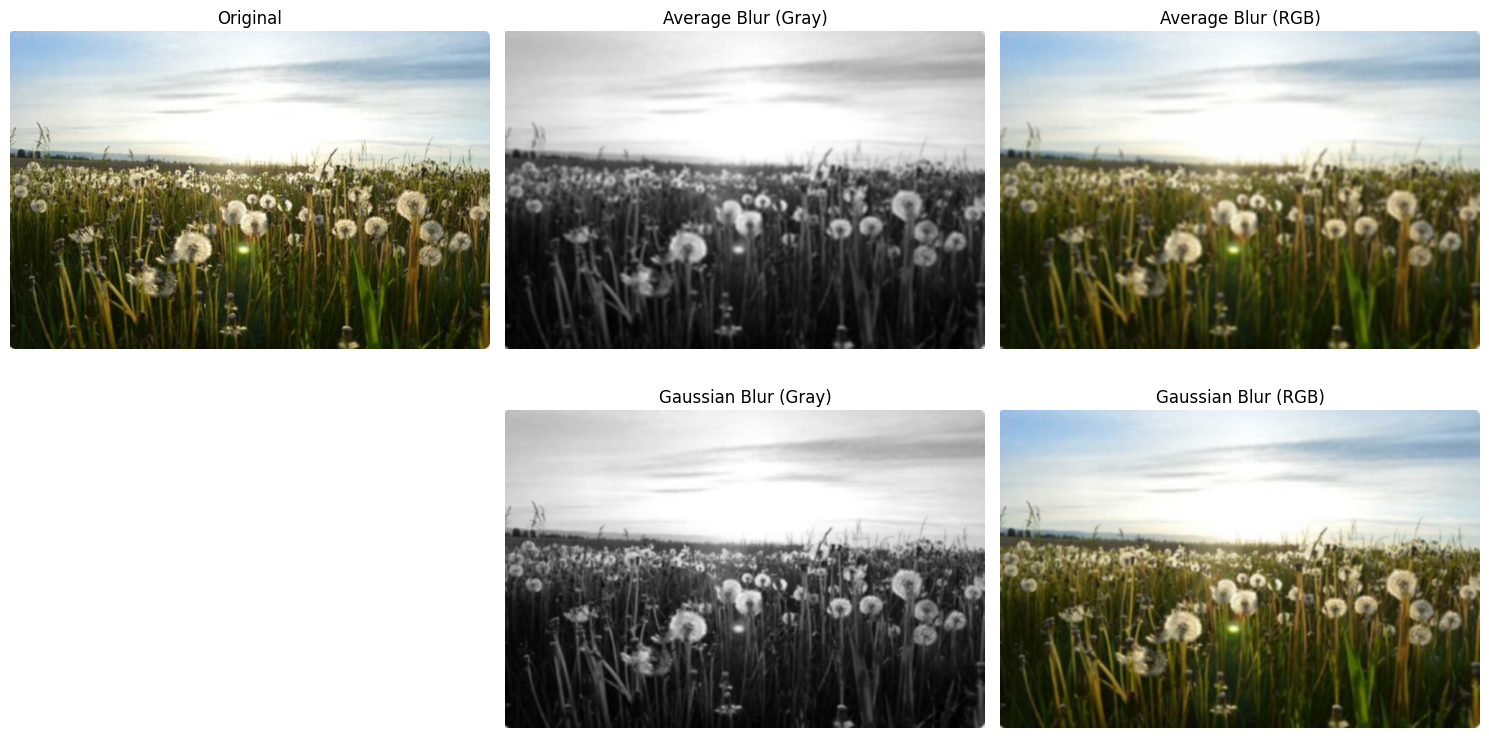

In [13]:
img = np.array(Image.open("Screenshot 2025-12-10 003215.png").convert("RGB"))
gray = np.mean(img, axis=2)
avg_gray = average_blur_gray(gray, 5)
avg_rgb = average_blur_rgb(img, 5)

gauss_gray = gaussian_blur_gray(gray, 5, 1.0)
gauss_rgb = gaussian_blur_rgb(img, 5, 1.0)
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.title("Original")
plt.imshow(img)
plt.axis("off")

plt.subplot(2, 3, 2)
plt.title("Average Blur (Gray)")
plt.imshow(avg_gray, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.title("Average Blur (RGB)")
plt.imshow(avg_rgb.astype(np.uint8))
plt.axis("off")

plt.subplot(2, 3, 5)
plt.title("Gaussian Blur (Gray)")
plt.imshow(gauss_gray, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.title("Gaussian Blur (RGB)")
plt.imshow(gauss_rgb.astype(np.uint8))
plt.axis("off")

plt.tight_layout()
plt.show()



### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [20]:
# sobel for the image
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)


In [19]:
img = np.array(Image.open("Screenshot 2025-12-10 003215.png").convert("RGB"))
gray = np.mean(img, axis=2)
Gx = convolve(gray, sobel_x) #computing the gradient in the x direction
Gy = convolve(gray, sobel_y) #computing the gradient in the y direction
gradient_mag = np.sqrt(Gx**2 + Gy**2) # gradient of the image
# normalization of the gradient
gradient_mag = (gradient_mag / gradient_mag.max()) * 255
gradient_mag = gradient_mag.astype(np.uint8)
threshold = 100
edge_map = np.zeros_like(gradient_mag)
edge_map[gradient_mag > threshold] = 255
edge_map = gradient_mag
Image.fromarray(edge_map).save("sobel_edges.png")


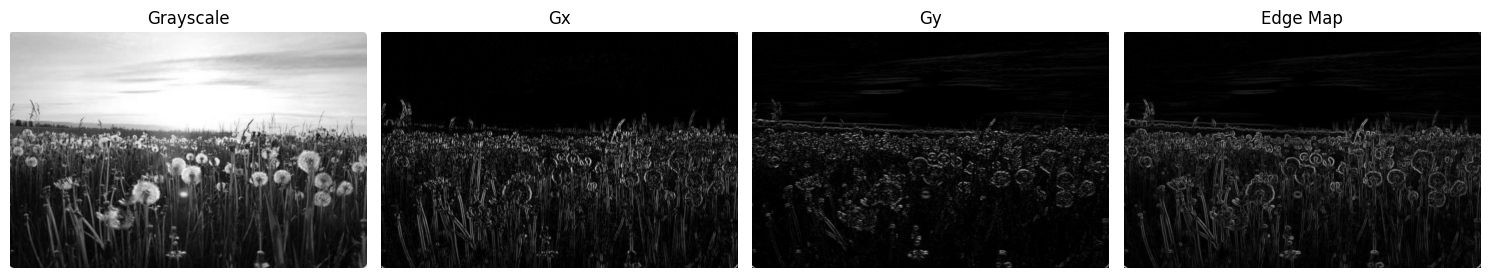

In [18]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 4, 1)
plt.title("Grayscale")
plt.imshow(gray, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Gx")
plt.imshow(np.abs(Gx), cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Gy")
plt.imshow(np.abs(Gy), cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Edge Map")
plt.imshow(edge_map, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

task 1

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [21]:
img = np.array(Image.open("Screenshot 2025-12-10 003215.png").convert("L"), dtype=np.float32)
laplacian_kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], dtype=np.float32)



In [28]:
lap = convolve(img, laplacian_kernel) #Computing the Laplacian
alpha = 0.5 # mere maan kiya h 0.5 lene ka
sharp_numpy = img - alpha * lap
sharp_numpy_alpha1 = img - lap
sharp_numpy_alpha1 = np.clip(sharp_numpy_alpha1, 0, 255).astype(np.uint8)
lap_cv2 = cv2.Laplacian(img, cv2.CV_32F, ksize=3)
sharp_cv2 = img - lap_cv2
sharp_cv2 = np.clip(sharp_cv2, 0, 255).astype(np.uint8)
print("NumPy and OpenCV outputs identical:",
      np.array_equal(sharp_numpy_alpha1, sharp_cv2))


NumPy and OpenCV outputs identical: False


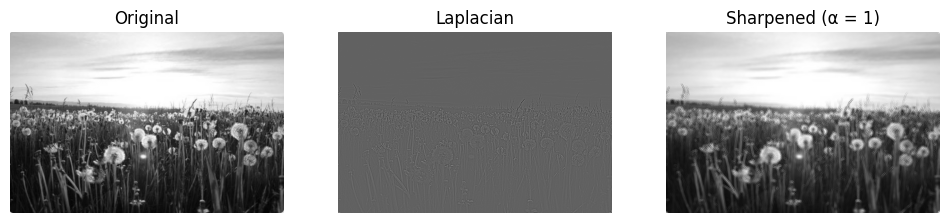

In [27]:
plt.figure(figsize=(12,4))
# displayin the original image
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis("off")
# displaying the laplacian
plt.subplot(1,3,2)
plt.title("Laplacian")
plt.imshow(lap, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Sharpened (α = 1)")
plt.imshow(sharp_numpy_alpha1, cmap="gray")
plt.axis("off")

plt.show()


task 2

In [29]:
def gaussian_kernel(ksize, sigma):
    ax = np.arange(-(ksize // 2), ksize // 2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel /= kernel.sum()
    return kernel.astype(np.float32)


In [30]:
blurred = convolve(img, gaussian_kernel(5, 1.0)) # calculating the blurred image of the image to create the mask
mask = img - blurred # mask for the unsharpening
alpha = 1.0
sharp_unsharp = img + alpha * mask
sharp_unsharp = np.clip(sharp_unsharp, 0, 255).astype(np.uint8)


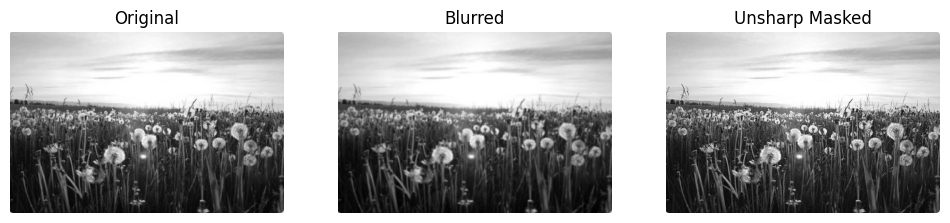

In [32]:
plt.figure(figsize=(12,4))
# displaying the original one
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis("off")
# displaying the blurred one
plt.subplot(1,3,2)
plt.title("Blurred")
plt.imshow(blurred, cmap="gray")
plt.axis("off")
# displaying the unsharpen filtered image
plt.subplot(1,3,3)
plt.title("Unsharp Masked")
plt.imshow(sharp_unsharp, cmap="gray")
plt.axis("off")

plt.show()


### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

In [33]:
img = np.array(Image.open("Screenshot 2025-12-10 003215.png").convert("L"), dtype=np.float32)


In [34]:
def gaussian_kernel(ksize, sigma):
    ax = np.arange(-(ksize//2), ksize//2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel /= kernel.sum()
    return kernel.astype(np.float32)
#Gaussian Blur (LPF)
sigma = 1.5
blurred = convolve(img, gaussian_kernel(5, sigma))
#Unsharp Masking (HPF)
alpha = 1.5
mask = img - blurred
unsharp = img + alpha * mask
#FFT Magnitude Spectrum Function
def magnitude_spectrum(image):
    F = np.fft.fft2(image)
    F_shift = np.fft.fftshift(F)
    magnitude = np.log(1 + np.abs(F_shift))
    return magnitude
spec_original = magnitude_spectrum(img)
spec_blurred = magnitude_spectrum(blurred)
spec_unsharp = magnitude_spectrum(unsharp)


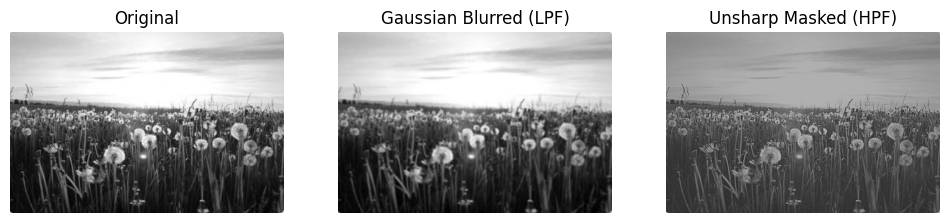

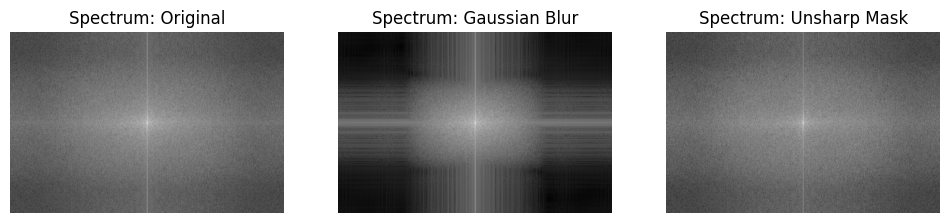

In [40]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.subplot(1,3,2)
plt.title("Gaussian Blurred (LPF)")
plt.imshow(blurred, cmap="gray")
plt.axis("off")
plt.subplot(1,3,3)
plt.title("Unsharp Masked (HPF)")
plt.imshow(unsharp, cmap="gray")
plt.axis("off")
plt.show()
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Spectrum: Original")
plt.imshow(spec_original, cmap="gray")
plt.axis("off")
plt.subplot(1,3,2)
plt.title("Spectrum: Gaussian Blur")
plt.imshow(spec_blurred, cmap="gray")
plt.axis("off")
plt.subplot(1,3,3)
plt.title("Spectrum: Unsharp Mask")
plt.imshow(spec_unsharp, cmap="gray")
plt.axis("off")
plt.show()



### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

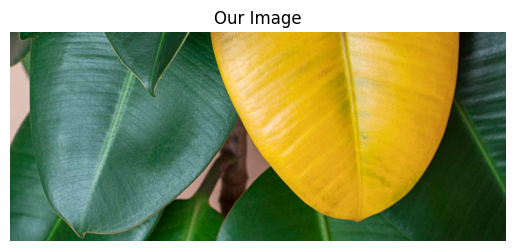

In [46]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [43]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

In [55]:
img = img_part5.astype(np.float32)
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]
RG_diff = R - G
kernel_x = np.array([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
], dtype=np.float32)

kernel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)
grad_x = convolve(RG_diff, kernel_x)
grad_y = convolve(RG_diff, kernel_y)
edge_map = np.sqrt(grad_x**2 + grad_y**2)
edge_map = (edge_map - edge_map.min()) / (edge_map.max() - edge_map.min())
edge_map = (edge_map * 255).astype(np.uint8)
threshold = 80
edge_binary = np.zeros_like(edge_map)
edge_binary[edge_map > threshold] = 255


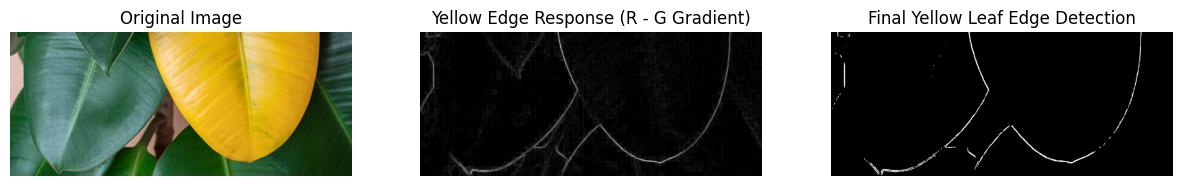

In [56]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_part5)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(edge_map, cmap="gray")
plt.title("Yellow Edge Response (R - G Gradient)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(edge_binary, cmap="gray")
plt.title("Final Yellow Leaf Edge Detection")
plt.axis("off")

plt.show()


### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
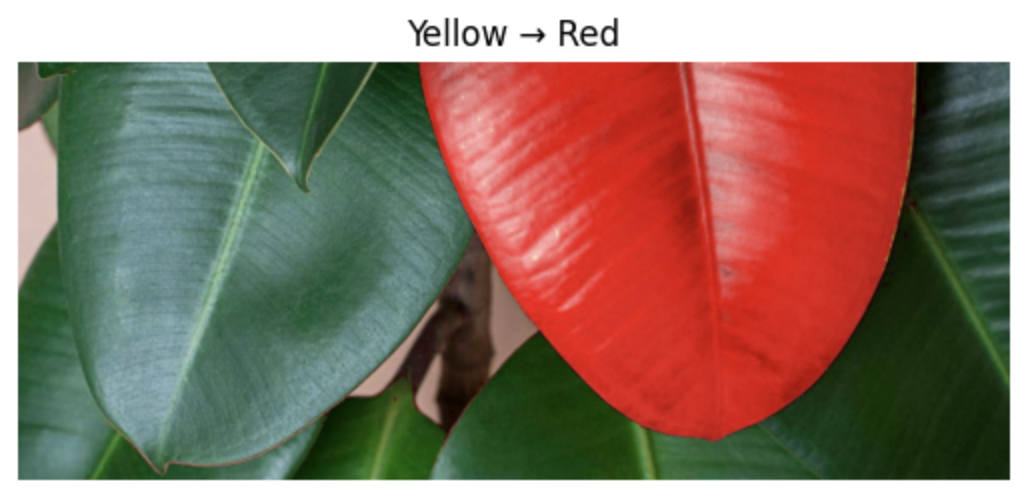

Also, we can change to a less brighter colour
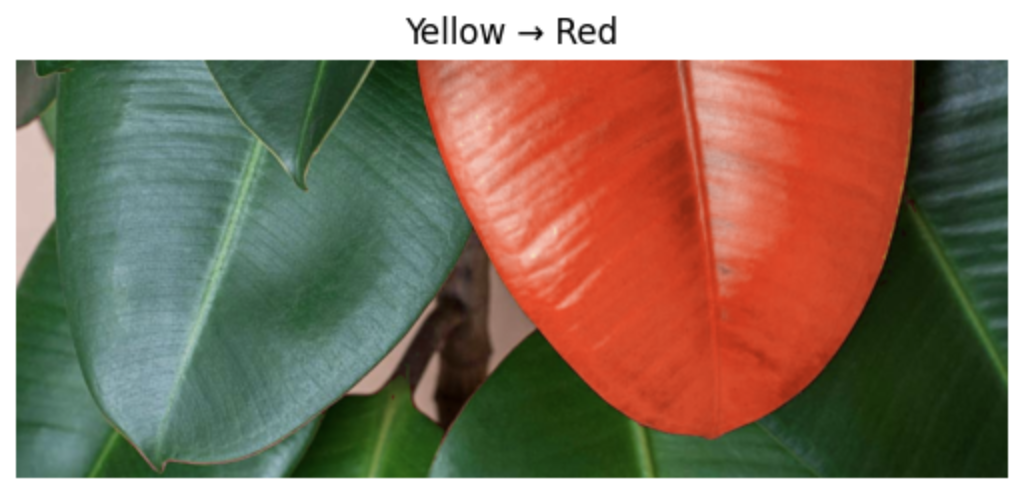

In [ ]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.